In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("train.csv")
df.head(10)

id        Date  Count   Hour  Hotness  Humidity  Wind Speed  Visibility  \
0   1  05/08/2018    222   6:00    300.3        83        5.04        1080   
1   2  21/01/2018    170  23:00    272.6        32        2.16        2000   
2   3  11/05/2018    486   6:00    285.0        83        1.44         321   
3   4  05/07/2018    929  13:00    301.1        67        3.96        1772   
4   5  02/01/2018     58   5:00    269.9        67        2.16        1384   
5   6  09/08/2018   1494  22:00    300.5        82        1.44        1228   
6   7  15/09/2018    881   1:00    294.8        79        5.04        2000   
7   8  12/06/2018   1202  12:00    297.0        51        6.48        2000   
8   9  20/09/2018    886   0:00    293.1        58        1.08        2000   
9  10  15/03/2018    214  16:00    283.7        98        4.32         196   

   Solar Radiation  Rainfall  Snowfall Seasons Holiday Working Day  
0             0.00       0.0       0.0  Summer      NO         YES  
1             0.00       0.0       0.0  Winter      NO         YES  
2             0.01       0.0       0.0  Spring      NO         YES  
3             1.43       0.0       0.0  Summer      NO         YES  
4             0.00       0.0       0.0  Winter      NO         YES  
5             0.00       0.0       0.0  Summer      NO         YES  
6             0.00       0.0       0.0  Autumn      NO         YES  
7             2.29       0.0       0.0  Summer      NO         YES  
8             0.00       0.0       0.0  Autumn      NO         YES  
9             0.14       0.0       0.0  Spring      NO         YES

In [3]:
df.describe()

id        Count      Hotness     Humidity   Wind Speed  \
count  4986.000000  4986.000000  4986.000000  4986.000000  4986.000000   
mean   2493.500000   705.851986   285.977778    58.247493     6.159495   
std    1439.478551   646.444092    11.838222    20.373339     3.679312   
min       1.000000     0.000000   255.200000     0.000000     0.000000   
25%    1247.250000   191.000000   276.700000    43.000000     3.240000   
50%    2493.500000   505.000000   286.700000    57.000000     5.400000   
75%    3739.750000  1066.750000   295.400000    74.000000     8.280000   
max    4986.000000  3556.000000   312.400000    98.000000    26.280000   

        Visibility  Solar Radiation     Rainfall    Snowfall  
count  4986.000000      4986.000000  4986.000000  4986.00000  
mean   1432.546731         0.576897     0.154673     0.06775  
std     605.976182         0.874589     1.121118     0.40789  
min      33.000000         0.000000     0.000000     0.00000  
25%     942.250000         0.000000     0.000000     0.00000  
50%    1678.000000         0.010000     0.000000     0.00000  
75%    1999.000000         0.950000     0.000000     0.00000  
max    2000.000000         3.520000    29.500000     8.80000

In [4]:
df.dtypes

id                   int64
Date                object
Count                int64
Hour                object
Hotness            float64
Humidity             int64
Wind Speed         float64
Visibility           int64
Solar Radiation    float64
Rainfall           float64
Snowfall           float64
Seasons             object
Holiday             object
Working Day         object
dtype: object

In [5]:
df.isnull().sum()

id                 0
Date               0
Count              0
Hour               0
Hotness            0
Humidity           0
Wind Speed         0
Visibility         0
Solar Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Working Day        0
dtype: int64

In [6]:
#checking how many unique values exist
df.apply(lambda x:len(x.unique()))

id                 4986
Date                365
Count              1813
Hour                 24
Hotness             533
Humidity             88
Wind Speed           60
Visibility         1543
Solar Radiation     340
Rainfall             47
Snowfall             45
Seasons               4
Holiday               2
Working Day           2
dtype: int64

In [7]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from statsmodels.graphics.gofplots import qqplot
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

<AxesSubplot:>

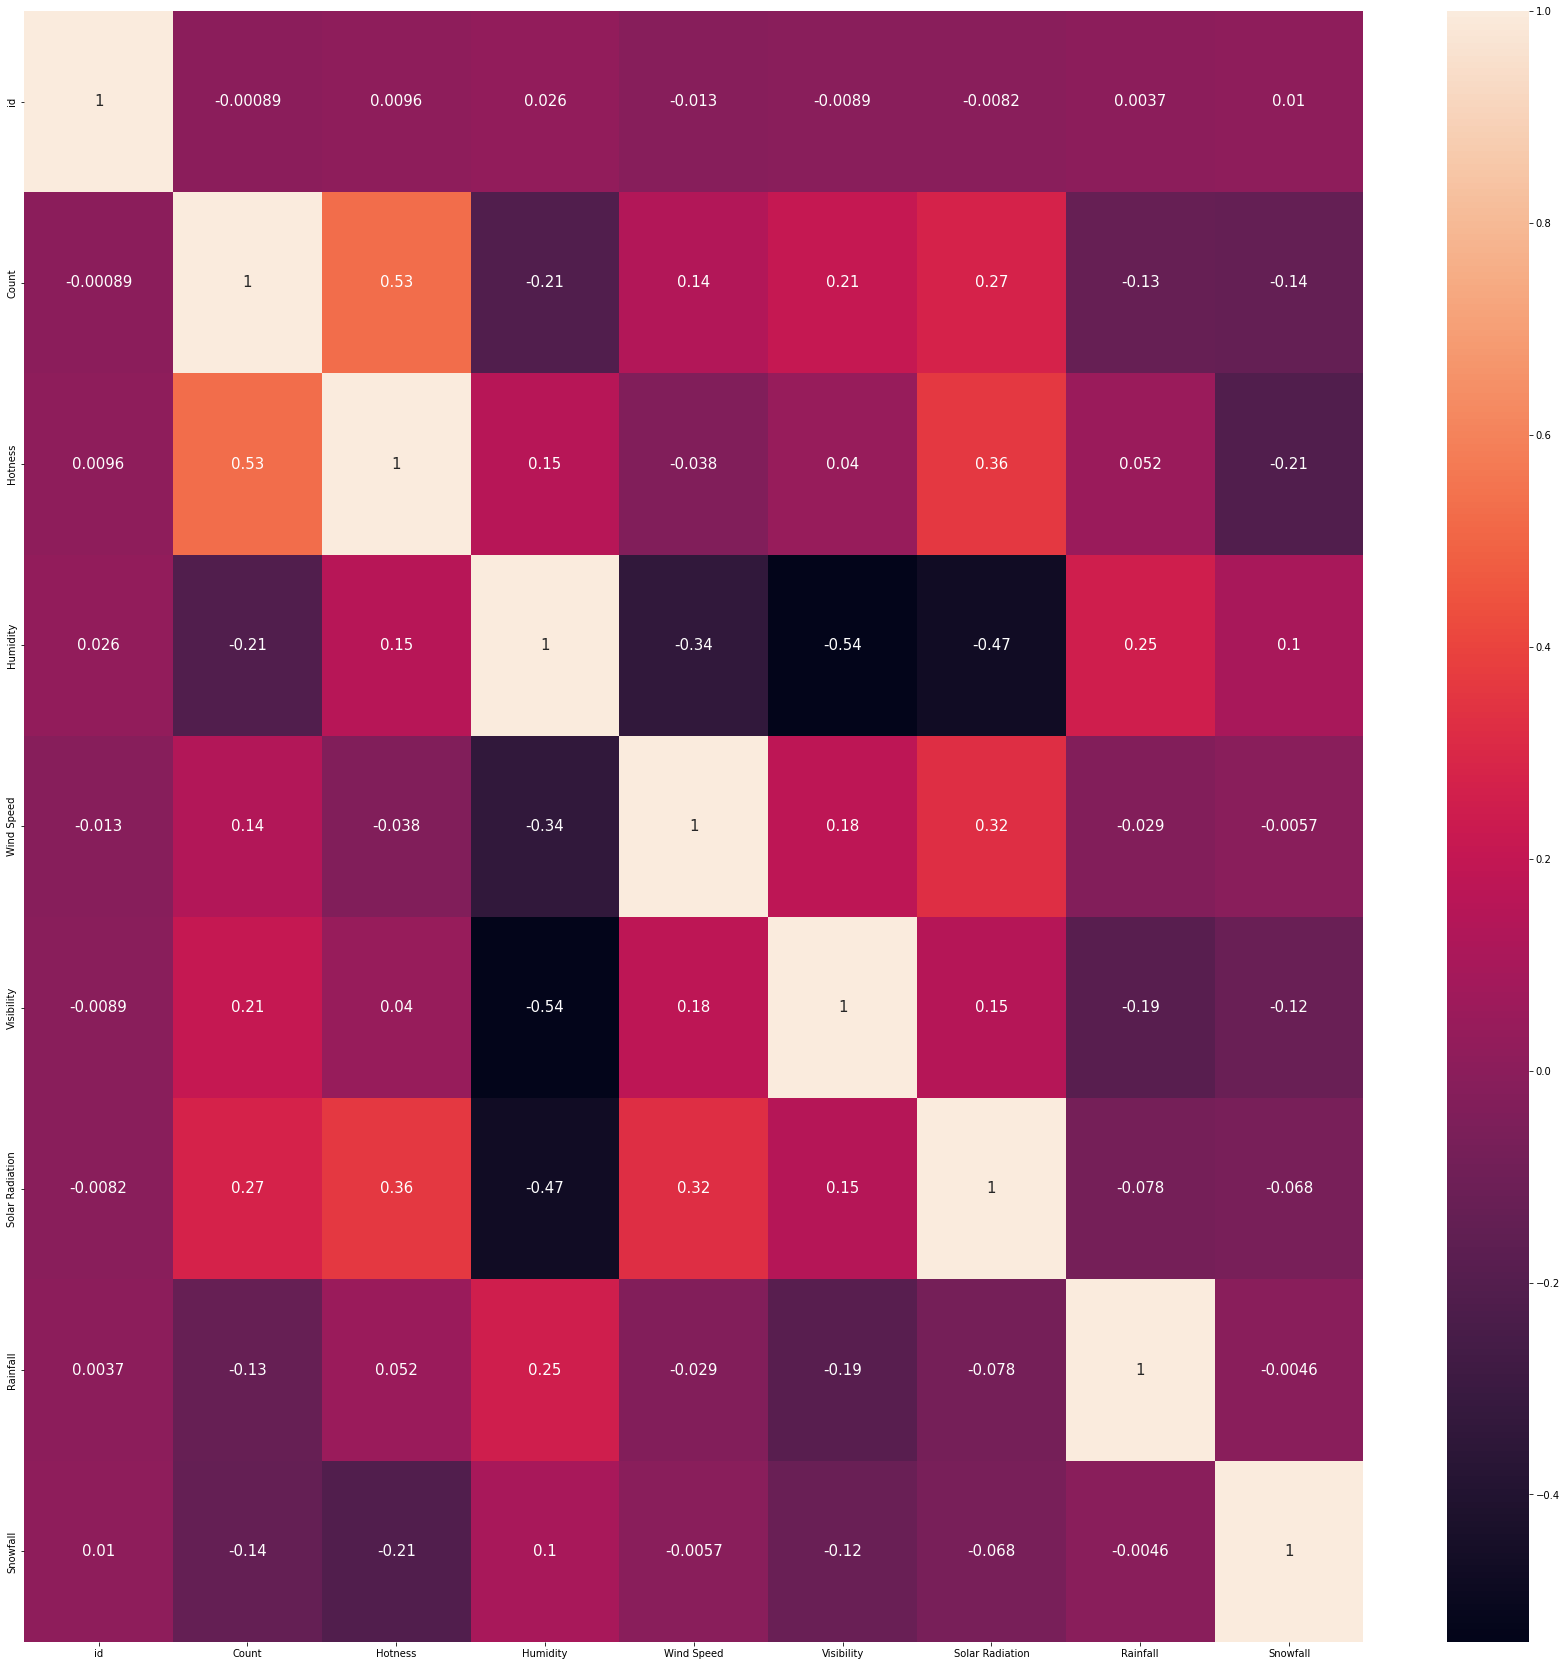

In [8]:
corrm = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrm, annot=True, annot_kws={'size':15})

In [9]:
# fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
# sns.distplot(df['Hour'],ax=ax1)
# ax1.set(title='distribution of count')
# qqplot(df['Hour'],ax=ax2,line='r')
# ax2.set(title = 'theorectical quantiles')

In [10]:
def func(df):
 df['Hour'] = df['Hour'].map({
    "0:00":  0,   
    "1:00":  1,
    "2:00":  2,
    "3:00":  3,
    "4:00":  4,
    "5:00":  5,
    "6:00":  6,
    "7:00":  7,
    "8:00":  8,
    "9:00":  9,
    "10:00": 10,
    "11:00": 11,
    "12:00": 12,
    "13:00": 13,
    "14:00": 14,
    "15:00": 15,
    "16:00": 16,
    "17:00": 17,
    "18:00": 18,
    "19:00": 19,
    "20:00": 20,
    "21:00": 21,
    "22:00": 22,
    "23:00": 23

})
 return df

In [11]:
def func1(df):
 df['Seasons'] = df['Seasons'].map({
    "Summer":1,
    "Winter":2,
    "Autumn":3,
    "Spring":4
})
 return df

In [12]:
df.head()

id        Date  Count   Hour  Hotness  Humidity  Wind Speed  Visibility  \
0   1  05/08/2018    222   6:00    300.3        83        5.04        1080   
1   2  21/01/2018    170  23:00    272.6        32        2.16        2000   
2   3  11/05/2018    486   6:00    285.0        83        1.44         321   
3   4  05/07/2018    929  13:00    301.1        67        3.96        1772   
4   5  02/01/2018     58   5:00    269.9        67        2.16        1384   

   Solar Radiation  Rainfall  Snowfall Seasons Holiday Working Day  
0             0.00       0.0       0.0  Summer      NO         YES  
1             0.00       0.0       0.0  Winter      NO         YES  
2             0.01       0.0       0.0  Spring      NO         YES  
3             1.43       0.0       0.0  Summer      NO         YES  
4             0.00       0.0       0.0  Winter      NO         YES

In [13]:

def one_hot_encod(dframe,column):
  dframe = pd.concat([dframe,pd.get_dummies(dframe[column],prefix = column,drop_first=True)],axis=1)
  dframe = dframe.drop([column],axis=1)
  return dframe


def preprocess(df):
  df2=df
  df2['Date']=pd.to_datetime(df2['Date'],format="%d/%m/%Y")
  #extracting month and day features from date
  df2['week_day']=df2['Date'].dt.dayofweek
  df2['month']=df2['Date'].dt.month
  df2 = df2.drop(columns=['Date'],axis=1)
  cols = ['Holiday','Working Day']
  for col in cols:
    df2 = one_hot_encod(df2,col)
  df2 = df2.drop(['id'],axis=1)
  #df2 = df2.drop(['week_day','id'],axis=1)
  # df2 = df2.drop(['Seasons'],axis=1)
  df2 = func(df2)
  df2 = func1(df2)
  return df2

In [14]:
x = df.drop(['Count'],axis=1)
y = df['Count']
x = preprocess(x)
# scaler = StandardScaler()
# scaler.fit(x)
x.head()

Hour  Hotness  Humidity  Wind Speed  Visibility  Solar Radiation  Rainfall  \
0     6    300.3        83        5.04        1080             0.00       0.0   
1    23    272.6        32        2.16        2000             0.00       0.0   
2     6    285.0        83        1.44         321             0.01       0.0   
3    13    301.1        67        3.96        1772             1.43       0.0   
4     5    269.9        67        2.16        1384             0.00       0.0   

   Snowfall  Seasons  week_day  month  Holiday_YES  Working Day_YES  
0       0.0        1         6      8            0                1  
1       0.0        2         6      1            0                1  
2       0.0        4         4      5            0                1  
3       0.0        1         3      7            0                1  
4       0.0        2         1      1            0                1

In [15]:
# corrm = x.corr()
# plt.figure(figsize=(50,50))
# sns.heatmap(corrm, annot=True, annot_kws={'size':15})

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [17]:
#!pip install catboost

In [18]:
import catboost as cb

In [19]:
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [37]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [38]:
grid = {'iterations': [200, 300, 400 , 500],
        'learning_rate': [0.013, 0.085],
        'depth': [2, 4, 6, 8 , 10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3 , 5]}
model.grid_search(grid, train_dataset)

0:	learn: 945.8457676	test: 961.2017409	best: 961.2017409 (0)	total: 1.57ms	remaining: 313ms
1:	learn: 937.4087700	test: 952.9877389	best: 952.9877389 (1)	total: 3.5ms	remaining: 347ms
2:	learn: 929.5223353	test: 945.3993565	best: 945.3993565 (2)	total: 5.28ms	remaining: 347ms
3:	learn: 920.9987635	test: 937.0846287	best: 937.0846287 (3)	total: 7.78ms	remaining: 381ms
4:	learn: 912.4421554	test: 928.6320270	best: 928.6320270 (4)	total: 9.15ms	remaining: 357ms
5:	learn: 904.0762871	test: 920.3909464	best: 920.3909464 (5)	total: 10.7ms	remaining: 345ms
6:	learn: 895.8005722	test: 912.3650502	best: 912.3650502 (6)	total: 11.6ms	remaining: 321ms
7:	learn: 887.8260362	test: 904.4973122	best: 904.4973122 (7)	total: 12.6ms	remaining: 302ms
8:	learn: 880.7641813	test: 897.6943384	best: 897.6943384 (8)	total: 13.5ms	remaining: 286ms
9:	learn: 873.3970642	test: 890.4321256	best: 890.4321256 (9)	total: 14.5ms	remaining: 276ms
10:	learn: 865.7838390	test: 882.9337447	best: 882.9337447 (10)	total: 

155:	learn: 438.6686926	test: 462.9705673	best: 462.9705673 (155)	total: 162ms	remaining: 45.7ms
156:	learn: 437.7877300	test: 462.0469370	best: 462.0469370 (156)	total: 163ms	remaining: 44.8ms
157:	learn: 436.9420678	test: 461.1479266	best: 461.1479266 (157)	total: 165ms	remaining: 43.8ms
158:	learn: 435.8905688	test: 460.1392696	best: 460.1392696 (158)	total: 166ms	remaining: 42.9ms
159:	learn: 435.0516296	test: 459.2842350	best: 459.2842350 (159)	total: 168ms	remaining: 41.9ms
160:	learn: 434.2562972	test: 458.4645009	best: 458.4645009 (160)	total: 169ms	remaining: 40.9ms
161:	learn: 433.4589142	test: 457.6585505	best: 457.6585505 (161)	total: 170ms	remaining: 39.9ms
162:	learn: 432.6266980	test: 456.7538961	best: 456.7538961 (162)	total: 171ms	remaining: 38.9ms
163:	learn: 431.8210224	test: 455.9429661	best: 455.9429661 (163)	total: 173ms	remaining: 37.9ms
164:	learn: 431.0357908	test: 455.1527152	best: 455.1527152 (164)	total: 174ms	remaining: 36.9ms
165:	learn: 430.1769750	test: 

93:	learn: 323.4346683	test: 343.2789711	best: 343.2789711 (93)	total: 102ms	remaining: 115ms
94:	learn: 322.6529008	test: 342.4658725	best: 342.4658725 (94)	total: 103ms	remaining: 114ms
95:	learn: 322.2400297	test: 342.0734391	best: 342.0734391 (95)	total: 104ms	remaining: 113ms
96:	learn: 321.8079927	test: 341.7316186	best: 341.7316186 (96)	total: 106ms	remaining: 112ms
97:	learn: 321.2582710	test: 341.0917358	best: 341.0917358 (97)	total: 107ms	remaining: 111ms
98:	learn: 320.7664572	test: 340.4914504	best: 340.4914504 (98)	total: 108ms	remaining: 110ms
99:	learn: 320.4147517	test: 340.0694354	best: 340.0694354 (99)	total: 109ms	remaining: 109ms
100:	learn: 319.7984856	test: 339.4144741	best: 339.4144741 (100)	total: 110ms	remaining: 108ms
101:	learn: 319.3112638	test: 338.8121142	best: 338.8121142 (101)	total: 111ms	remaining: 107ms
102:	learn: 318.9113715	test: 338.4555501	best: 338.4555501 (102)	total: 113ms	remaining: 106ms
103:	learn: 318.5121949	test: 338.0404635	best: 338.04

55:	learn: 627.9450416	test: 650.4047300	best: 650.4047300 (55)	total: 55.9ms	remaining: 144ms
56:	learn: 624.3943004	test: 646.9395174	best: 646.9395174 (56)	total: 57.2ms	remaining: 144ms
57:	learn: 620.6974712	test: 643.3153735	best: 643.3153735 (57)	total: 58.5ms	remaining: 143ms
58:	learn: 617.3237739	test: 639.9529511	best: 639.9529511 (58)	total: 59.8ms	remaining: 143ms
59:	learn: 613.6703885	test: 636.3321643	best: 636.3321643 (59)	total: 61.1ms	remaining: 143ms
60:	learn: 610.3946997	test: 633.0755514	best: 633.0755514 (60)	total: 62.3ms	remaining: 142ms
61:	learn: 606.9314257	test: 629.7653492	best: 629.7653492 (61)	total: 63.4ms	remaining: 141ms
62:	learn: 603.8214415	test: 626.6305073	best: 626.6305073 (62)	total: 64.7ms	remaining: 141ms
63:	learn: 600.4476068	test: 623.3933319	best: 623.3933319 (63)	total: 65.8ms	remaining: 140ms
64:	learn: 597.8325485	test: 620.8951922	best: 620.8951922 (64)	total: 67ms	remaining: 139ms
65:	learn: 594.7772846	test: 617.9074521	best: 617.9

17:	learn: 475.6413710	test: 503.2676371	best: 503.2676371 (17)	total: 18.5ms	remaining: 187ms
18:	learn: 467.0608923	test: 494.2828135	best: 494.2828135 (18)	total: 19.8ms	remaining: 189ms
19:	learn: 459.1876745	test: 485.9169504	best: 485.9169504 (19)	total: 21.2ms	remaining: 190ms
20:	learn: 450.9286850	test: 477.7292776	best: 477.7292776 (20)	total: 22.4ms	remaining: 191ms
21:	learn: 444.4263888	test: 471.2383399	best: 471.2383399 (21)	total: 23.6ms	remaining: 191ms
22:	learn: 437.7084082	test: 464.2240016	best: 464.2240016 (22)	total: 24.7ms	remaining: 190ms
23:	learn: 431.5933387	test: 457.9667808	best: 457.9667808 (23)	total: 25.8ms	remaining: 189ms
24:	learn: 426.3262175	test: 452.7077648	best: 452.7077648 (24)	total: 26.9ms	remaining: 188ms
25:	learn: 421.5705376	test: 447.4740355	best: 447.4740355 (25)	total: 27.9ms	remaining: 187ms
26:	learn: 416.8660246	test: 442.4349135	best: 442.4349135 (26)	total: 29ms	remaining: 186ms
27:	learn: 412.5202736	test: 438.1245375	best: 438.1

183:	learn: 281.4506553	test: 301.6006431	best: 301.6006431 (183)	total: 190ms	remaining: 16.5ms
184:	learn: 281.2341559	test: 301.5582456	best: 301.5582456 (184)	total: 192ms	remaining: 15.5ms
185:	learn: 280.9350482	test: 301.1767164	best: 301.1767164 (185)	total: 193ms	remaining: 14.5ms
186:	learn: 280.7944753	test: 301.0383590	best: 301.0383590 (186)	total: 194ms	remaining: 13.5ms
187:	learn: 280.6573681	test: 301.0178182	best: 301.0178182 (187)	total: 195ms	remaining: 12.5ms
188:	learn: 280.1720616	test: 300.7492784	best: 300.7492784 (188)	total: 197ms	remaining: 11.4ms
189:	learn: 279.9680555	test: 300.5691774	best: 300.5691774 (189)	total: 198ms	remaining: 10.4ms
190:	learn: 279.1989109	test: 300.1725305	best: 300.1725305 (190)	total: 199ms	remaining: 9.36ms
191:	learn: 278.7512476	test: 299.8785542	best: 299.8785542 (191)	total: 200ms	remaining: 8.33ms
192:	learn: 278.5253733	test: 299.5958390	best: 299.5958390 (192)	total: 201ms	remaining: 7.29ms
193:	learn: 278.2540600	test: 

113:	learn: 489.1211862	test: 513.1740011	best: 513.1740011 (113)	total: 147ms	remaining: 111ms
114:	learn: 487.7241940	test: 511.7867765	best: 511.7867765 (114)	total: 151ms	remaining: 111ms
115:	learn: 486.3307266	test: 510.4247780	best: 510.4247780 (115)	total: 152ms	remaining: 110ms
116:	learn: 484.8509231	test: 508.9422787	best: 508.9422787 (116)	total: 153ms	remaining: 109ms
117:	learn: 483.2380818	test: 507.3824094	best: 507.3824094 (117)	total: 154ms	remaining: 107ms
118:	learn: 481.9260641	test: 506.0896217	best: 506.0896217 (118)	total: 156ms	remaining: 106ms
119:	learn: 480.5388406	test: 504.7056988	best: 504.7056988 (119)	total: 157ms	remaining: 105ms
120:	learn: 479.1596426	test: 503.3382372	best: 503.3382372 (120)	total: 158ms	remaining: 103ms
121:	learn: 477.7563435	test: 501.9671932	best: 501.9671932 (121)	total: 160ms	remaining: 102ms
122:	learn: 476.5048529	test: 500.7416152	best: 500.7416152 (122)	total: 161ms	remaining: 101ms
123:	learn: 475.1553925	test: 499.395370

55:	learn: 350.9062547	test: 373.0774090	best: 373.0774090 (55)	total: 58.5ms	remaining: 150ms
56:	learn: 349.9125147	test: 372.0129223	best: 372.0129223 (56)	total: 60.4ms	remaining: 151ms
57:	learn: 349.0151170	test: 370.9327228	best: 370.9327228 (57)	total: 62.9ms	remaining: 154ms
58:	learn: 347.8851884	test: 369.5872286	best: 369.5872286 (58)	total: 64.1ms	remaining: 153ms
59:	learn: 347.0613980	test: 368.8707642	best: 368.8707642 (59)	total: 65.2ms	remaining: 152ms
60:	learn: 346.1409514	test: 367.8836901	best: 367.8836901 (60)	total: 66.4ms	remaining: 151ms
61:	learn: 345.2782390	test: 367.2140762	best: 367.2140762 (61)	total: 67.5ms	remaining: 150ms
62:	learn: 344.4556111	test: 366.1334445	best: 366.1334445 (62)	total: 68.6ms	remaining: 149ms
63:	learn: 343.3901736	test: 364.9726133	best: 364.9726133 (63)	total: 69.7ms	remaining: 148ms
64:	learn: 342.5404188	test: 364.1168376	best: 364.1168376 (64)	total: 70.9ms	remaining: 147ms
65:	learn: 341.9373381	test: 363.5467641	best: 363

16:	learn: 823.7457168	test: 841.8941830	best: 841.8941830 (16)	total: 17.6ms	remaining: 189ms
17:	learn: 817.4380929	test: 835.8615556	best: 835.8615556 (17)	total: 18.9ms	remaining: 191ms
18:	learn: 810.6474192	test: 829.1366695	best: 829.1366695 (18)	total: 20.4ms	remaining: 194ms
19:	learn: 803.9565940	test: 822.6105457	best: 822.6105457 (19)	total: 21.6ms	remaining: 195ms
20:	learn: 797.4731517	test: 816.2008594	best: 816.2008594 (20)	total: 22.8ms	remaining: 194ms
21:	learn: 791.2653809	test: 810.2358739	best: 810.2358739 (21)	total: 23.9ms	remaining: 194ms
22:	learn: 784.9870287	test: 803.9727121	best: 803.9727121 (22)	total: 25ms	remaining: 193ms
23:	learn: 778.6764487	test: 797.8134861	best: 797.8134861 (23)	total: 26.1ms	remaining: 192ms
24:	learn: 772.6056472	test: 791.8322413	best: 791.8322413 (24)	total: 27.9ms	remaining: 195ms
25:	learn: 767.1510318	test: 786.6092342	best: 786.6092342 (25)	total: 29.1ms	remaining: 194ms
26:	learn: 761.1833372	test: 780.8107272	best: 780.8

161:	learn: 434.6332602	test: 458.6414134	best: 458.6414134 (161)	total: 191ms	remaining: 44.9ms
162:	learn: 433.8026240	test: 457.7362219	best: 457.7362219 (162)	total: 192ms	remaining: 43.7ms
163:	learn: 432.9979209	test: 456.9173970	best: 456.9173970 (163)	total: 194ms	remaining: 42.5ms
164:	learn: 432.2059135	test: 456.1192256	best: 456.1192256 (164)	total: 195ms	remaining: 41.4ms
165:	learn: 431.3843595	test: 455.3243288	best: 455.3243288 (165)	total: 196ms	remaining: 40.2ms
166:	learn: 430.6136332	test: 454.5604385	best: 454.5604385 (166)	total: 197ms	remaining: 39ms
167:	learn: 429.8963651	test: 453.8436496	best: 453.8436496 (167)	total: 199ms	remaining: 37.8ms
168:	learn: 429.1203357	test: 453.0410554	best: 453.0410554 (168)	total: 200ms	remaining: 36.6ms
169:	learn: 428.4189952	test: 452.3121624	best: 452.3121624 (169)	total: 201ms	remaining: 35.4ms
170:	learn: 427.5014138	test: 451.4273602	best: 451.4273602 (170)	total: 202ms	remaining: 34.2ms
171:	learn: 426.8798533	test: 45

124:	learn: 308.1053274	test: 330.2112291	best: 330.2112291 (124)	total: 124ms	remaining: 74.6ms
125:	learn: 307.8299982	test: 329.9653109	best: 329.9653109 (125)	total: 126ms	remaining: 73.8ms
126:	learn: 307.4160147	test: 329.7242309	best: 329.7242309 (126)	total: 127ms	remaining: 73ms
127:	learn: 307.0562950	test: 329.4075687	best: 329.4075687 (127)	total: 128ms	remaining: 72.2ms
128:	learn: 306.7536066	test: 329.1391704	best: 329.1391704 (128)	total: 130ms	remaining: 71.3ms
129:	learn: 306.1352699	test: 328.7159157	best: 328.7159157 (129)	total: 131ms	remaining: 70.5ms
130:	learn: 305.6840962	test: 328.1131834	best: 328.1131834 (130)	total: 132ms	remaining: 69.5ms
131:	learn: 304.4877035	test: 326.5027844	best: 326.5027844 (131)	total: 133ms	remaining: 68.6ms
132:	learn: 304.1252513	test: 326.2119852	best: 326.2119852 (132)	total: 134ms	remaining: 67.7ms
133:	learn: 303.8670439	test: 326.0184964	best: 326.0184964 (133)	total: 136ms	remaining: 66.8ms
134:	learn: 303.4286717	test: 32

80:	learn: 553.5894883	test: 576.9829383	best: 576.9829383 (80)	total: 87.5ms	remaining: 129ms
81:	learn: 551.4097410	test: 574.8662920	best: 574.8662920 (81)	total: 88.7ms	remaining: 128ms
82:	learn: 548.9421228	test: 572.3860940	best: 572.3860940 (82)	total: 89.9ms	remaining: 127ms
83:	learn: 546.4923824	test: 570.0353229	best: 570.0353229 (83)	total: 91.2ms	remaining: 126ms
84:	learn: 544.2132626	test: 567.8243913	best: 567.8243913 (84)	total: 92.5ms	remaining: 125ms
85:	learn: 541.9094586	test: 565.5726986	best: 565.5726986 (85)	total: 93.6ms	remaining: 124ms
86:	learn: 539.6348376	test: 563.2607621	best: 563.2607621 (86)	total: 94.7ms	remaining: 123ms
87:	learn: 537.4093037	test: 560.9973253	best: 560.9973253 (87)	total: 95.8ms	remaining: 122ms
88:	learn: 534.9949823	test: 558.6314123	best: 558.6314123 (88)	total: 96.9ms	remaining: 121ms
89:	learn: 532.8581729	test: 556.5204723	best: 556.5204723 (89)	total: 98.1ms	remaining: 120ms
90:	learn: 530.9213915	test: 554.6429205	best: 554

34:	learn: 392.3436063	test: 416.7239340	best: 416.7239340 (34)	total: 36.1ms	remaining: 170ms
35:	learn: 389.7533014	test: 413.7684618	best: 413.7684618 (35)	total: 37.4ms	remaining: 170ms
36:	learn: 386.7643033	test: 410.7457789	best: 410.7457789 (36)	total: 38.7ms	remaining: 170ms
37:	learn: 383.1698519	test: 407.1949691	best: 407.1949691 (37)	total: 40.1ms	remaining: 171ms
38:	learn: 380.8431274	test: 404.5512541	best: 404.5512541 (38)	total: 41.4ms	remaining: 171ms
39:	learn: 378.6849208	test: 402.2253162	best: 402.2253162 (39)	total: 42.6ms	remaining: 170ms
40:	learn: 376.8039883	test: 400.0564738	best: 400.0564738 (40)	total: 43.6ms	remaining: 169ms
41:	learn: 374.8936185	test: 397.7475942	best: 397.7475942 (41)	total: 44.7ms	remaining: 168ms
42:	learn: 372.0164182	test: 395.1929798	best: 395.1929798 (42)	total: 45.8ms	remaining: 167ms
43:	learn: 370.2824053	test: 393.3770770	best: 393.3770770 (43)	total: 47.2ms	remaining: 167ms
44:	learn: 368.7556670	test: 391.8787608	best: 391

193:	learn: 282.4125804	test: 304.2079668	best: 304.2079668 (193)	total: 208ms	remaining: 6.42ms
194:	learn: 282.1165447	test: 303.9443990	best: 303.9443990 (194)	total: 209ms	remaining: 5.36ms
195:	learn: 281.7635634	test: 303.4681014	best: 303.4681014 (195)	total: 210ms	remaining: 4.29ms
196:	learn: 281.1962489	test: 303.2049847	best: 303.2049847 (196)	total: 212ms	remaining: 3.22ms
197:	learn: 281.0520700	test: 303.0317983	best: 303.0317983 (197)	total: 213ms	remaining: 2.15ms
198:	learn: 280.7869771	test: 302.8992022	best: 302.8992022 (198)	total: 214ms	remaining: 1.08ms
199:	learn: 280.3496627	test: 302.4941784	best: 302.4941784 (199)	total: 215ms	remaining: 0us

bestTest = 302.4941784
bestIteration = 199

9:	loss: 302.4941784	best: 296.5461591 (1)	total: 2.46s	remaining: 46.8s
0:	learn: 945.8457676	test: 961.2017409	best: 961.2017409 (0)	total: 1.12ms	remaining: 336ms
1:	learn: 937.4087700	test: 952.9877389	best: 952.9877389 (1)	total: 2.31ms	remaining: 345ms
2:	learn: 929.522335

153:	learn: 440.3818910	test: 464.7300354	best: 464.7300354 (153)	total: 160ms	remaining: 152ms
154:	learn: 439.5425390	test: 463.8974345	best: 463.8974345 (154)	total: 161ms	remaining: 151ms
155:	learn: 438.6686926	test: 462.9705673	best: 462.9705673 (155)	total: 163ms	remaining: 150ms
156:	learn: 437.7877300	test: 462.0469370	best: 462.0469370 (156)	total: 164ms	remaining: 149ms
157:	learn: 436.9420678	test: 461.1479266	best: 461.1479266 (157)	total: 165ms	remaining: 149ms
158:	learn: 435.8905688	test: 460.1392696	best: 460.1392696 (158)	total: 167ms	remaining: 148ms
159:	learn: 435.0516296	test: 459.2842350	best: 459.2842350 (159)	total: 168ms	remaining: 147ms
160:	learn: 434.2562972	test: 458.4645009	best: 458.4645009 (160)	total: 169ms	remaining: 146ms
161:	learn: 433.4589142	test: 457.6585505	best: 457.6585505 (161)	total: 170ms	remaining: 145ms
162:	learn: 432.6266980	test: 456.7538961	best: 456.7538961 (162)	total: 171ms	remaining: 144ms
163:	learn: 431.8210224	test: 455.942966

14:	learn: 507.8570166	test: 535.1858676	best: 535.1858676 (14)	total: 15.3ms	remaining: 292ms
15:	learn: 496.0813733	test: 523.4631224	best: 523.4631224 (15)	total: 16.7ms	remaining: 296ms
16:	learn: 485.3255118	test: 513.0014769	best: 513.0014769 (16)	total: 18.1ms	remaining: 301ms
17:	learn: 475.5646662	test: 503.1931451	best: 503.1931451 (17)	total: 19.4ms	remaining: 304ms
18:	learn: 466.9789199	test: 494.2014905	best: 494.2014905 (18)	total: 20.7ms	remaining: 306ms
19:	learn: 459.1047961	test: 485.8346329	best: 485.8346329 (19)	total: 21.9ms	remaining: 306ms
20:	learn: 450.8425147	test: 477.6438146	best: 477.6438146 (20)	total: 23ms	remaining: 306ms
21:	learn: 444.3415558	test: 471.1538917	best: 471.1538917 (21)	total: 24.2ms	remaining: 306ms
22:	learn: 437.6236065	test: 464.1392148	best: 464.1392148 (22)	total: 25.4ms	remaining: 306ms
23:	learn: 431.5089104	test: 457.8822896	best: 457.8822896 (23)	total: 26.6ms	remaining: 306ms
24:	learn: 426.2395565	test: 452.6212083	best: 452.6

177:	learn: 283.5461562	test: 302.5404043	best: 302.5404043 (177)	total: 187ms	remaining: 128ms
178:	learn: 283.3487857	test: 302.3340621	best: 302.3340621 (178)	total: 188ms	remaining: 127ms
179:	learn: 283.1353828	test: 302.1716797	best: 302.1716797 (179)	total: 189ms	remaining: 126ms
180:	learn: 282.9764454	test: 302.1516307	best: 302.1516307 (180)	total: 191ms	remaining: 125ms
181:	learn: 282.6688884	test: 301.8004579	best: 301.8004579 (181)	total: 192ms	remaining: 124ms
182:	learn: 282.5126504	test: 301.7417866	best: 301.7417866 (182)	total: 193ms	remaining: 123ms
183:	learn: 282.0242286	test: 301.4207880	best: 301.4207880 (183)	total: 194ms	remaining: 122ms
184:	learn: 281.6897376	test: 301.0522020	best: 301.0522020 (184)	total: 195ms	remaining: 121ms
185:	learn: 281.3988245	test: 300.6904977	best: 300.6904977 (185)	total: 196ms	remaining: 120ms
186:	learn: 281.1389481	test: 300.4704589	best: 300.4704589 (186)	total: 197ms	remaining: 119ms
187:	learn: 280.8648790	test: 300.125496

42:	learn: 680.0376604	test: 701.3200076	best: 701.3200076 (42)	total: 42.9ms	remaining: 256ms
43:	learn: 675.7727384	test: 697.1044682	best: 697.1044682 (43)	total: 44.1ms	remaining: 257ms
44:	learn: 671.7073845	test: 693.1909628	best: 693.1909628 (44)	total: 45.4ms	remaining: 257ms
45:	learn: 667.4088857	test: 688.9461367	best: 688.9461367 (45)	total: 46.7ms	remaining: 258ms
46:	learn: 663.0952665	test: 684.6593039	best: 684.6593039 (46)	total: 47.9ms	remaining: 258ms
47:	learn: 658.9198349	test: 680.6255440	best: 680.6255440 (47)	total: 49.2ms	remaining: 258ms
48:	learn: 654.6100904	test: 676.4285236	best: 676.4285236 (48)	total: 50.3ms	remaining: 258ms
49:	learn: 650.4958660	test: 672.2907932	best: 672.2907932 (49)	total: 51.5ms	remaining: 258ms
50:	learn: 646.6919916	test: 668.6708395	best: 668.6708395 (50)	total: 52.7ms	remaining: 257ms
51:	learn: 642.7105794	test: 664.6889319	best: 664.6889319 (51)	total: 53.9ms	remaining: 257ms
52:	learn: 638.8008998	test: 660.8738519	best: 660

204:	learn: 404.9319717	test: 428.4454529	best: 428.4454529 (204)	total: 215ms	remaining: 99.7ms
205:	learn: 404.4370471	test: 427.8910696	best: 427.8910696 (205)	total: 216ms	remaining: 98.7ms
206:	learn: 403.7321169	test: 427.2021204	best: 427.2021204 (206)	total: 218ms	remaining: 97.8ms
207:	learn: 403.2269958	test: 426.6991019	best: 426.6991019 (207)	total: 219ms	remaining: 96.9ms
208:	learn: 402.7405175	test: 426.1514136	best: 426.1514136 (208)	total: 220ms	remaining: 95.9ms
209:	learn: 402.2181379	test: 425.6089576	best: 425.6089576 (209)	total: 221ms	remaining: 94.9ms
210:	learn: 401.7332991	test: 425.0725861	best: 425.0725861 (210)	total: 223ms	remaining: 93.9ms
211:	learn: 401.2519295	test: 424.5778630	best: 424.5778630 (211)	total: 224ms	remaining: 92.9ms
212:	learn: 400.7704945	test: 424.0757813	best: 424.0757813 (212)	total: 225ms	remaining: 91.8ms
213:	learn: 400.3296261	test: 423.5878168	best: 423.5878168 (213)	total: 226ms	remaining: 90.8ms
214:	learn: 399.8743692	test: 

64:	learn: 343.8310119	test: 363.8979258	best: 363.8979258 (64)	total: 65.7ms	remaining: 237ms
65:	learn: 343.1444630	test: 363.2407992	best: 363.2407992 (65)	total: 67.1ms	remaining: 238ms
66:	learn: 342.4630697	test: 362.3664816	best: 362.3664816 (66)	total: 68.6ms	remaining: 238ms
67:	learn: 341.8244675	test: 361.6850368	best: 361.6850368 (67)	total: 69.8ms	remaining: 238ms
68:	learn: 341.0782352	test: 360.8645775	best: 360.8645775 (68)	total: 71.1ms	remaining: 238ms
69:	learn: 340.1591449	test: 360.0882070	best: 360.0882070 (69)	total: 72.3ms	remaining: 237ms
70:	learn: 339.4988503	test: 359.4985554	best: 359.4985554 (70)	total: 74.4ms	remaining: 240ms
71:	learn: 338.8718930	test: 358.7853523	best: 358.7853523 (71)	total: 75.5ms	remaining: 239ms
72:	learn: 338.1468004	test: 357.9452021	best: 357.9452021 (72)	total: 76.6ms	remaining: 238ms
73:	learn: 337.5356663	test: 357.1702844	best: 357.1702844 (73)	total: 77.7ms	remaining: 237ms
74:	learn: 336.9418294	test: 356.7382746	best: 356

229:	learn: 268.1705514	test: 290.7853887	best: 290.7853887 (229)	total: 238ms	remaining: 72.4ms
230:	learn: 267.8373146	test: 290.5217723	best: 290.5217723 (230)	total: 239ms	remaining: 71.5ms
231:	learn: 267.6638417	test: 290.3020485	best: 290.3020485 (231)	total: 241ms	remaining: 70.6ms
232:	learn: 267.4329017	test: 290.1521280	best: 290.1521280 (232)	total: 242ms	remaining: 69.6ms
233:	learn: 267.2888755	test: 289.9902167	best: 289.9902167 (233)	total: 243ms	remaining: 68.6ms
234:	learn: 266.9531064	test: 289.6797205	best: 289.6797205 (234)	total: 244ms	remaining: 67.6ms
235:	learn: 266.8348749	test: 289.5300902	best: 289.5300902 (235)	total: 245ms	remaining: 66.5ms
236:	learn: 266.6223749	test: 289.4549629	best: 289.4549629 (236)	total: 247ms	remaining: 65.6ms
237:	learn: 266.4773184	test: 289.3377797	best: 289.3377797 (237)	total: 248ms	remaining: 64.5ms
238:	learn: 266.3426787	test: 289.2540705	best: 289.2540705 (238)	total: 249ms	remaining: 63.5ms
239:	learn: 266.1677785	test: 

93:	learn: 523.8300416	test: 547.6840022	best: 547.6840022 (93)	total: 93.3ms	remaining: 204ms
94:	learn: 521.8690285	test: 545.7896058	best: 545.7896058 (94)	total: 94.6ms	remaining: 204ms
95:	learn: 519.8467354	test: 543.8425399	best: 543.8425399 (95)	total: 96ms	remaining: 204ms
96:	learn: 517.8724412	test: 541.8835533	best: 541.8835533 (96)	total: 97.3ms	remaining: 204ms
97:	learn: 515.9249258	test: 539.9546567	best: 539.9546567 (97)	total: 98.4ms	remaining: 203ms
98:	learn: 514.0998469	test: 538.1727670	best: 538.1727670 (98)	total: 99.5ms	remaining: 202ms
99:	learn: 512.0503333	test: 536.1773406	best: 536.1773406 (99)	total: 101ms	remaining: 201ms
100:	learn: 510.5252476	test: 534.7536965	best: 534.7536965 (100)	total: 102ms	remaining: 201ms
101:	learn: 508.7062683	test: 532.9251198	best: 532.9251198 (101)	total: 103ms	remaining: 200ms
102:	learn: 506.8169597	test: 530.9988237	best: 530.9988237 (102)	total: 105ms	remaining: 200ms
103:	learn: 505.1193571	test: 529.2207037	best: 52

253:	learn: 382.8296323	test: 405.3877367	best: 405.3877367 (253)	total: 265ms	remaining: 48ms
254:	learn: 382.5254517	test: 405.0708472	best: 405.0708472 (254)	total: 267ms	remaining: 47.1ms
255:	learn: 382.2292027	test: 404.7673427	best: 404.7673427 (255)	total: 268ms	remaining: 46.1ms
256:	learn: 381.8105395	test: 404.2695981	best: 404.2695981 (256)	total: 269ms	remaining: 45.1ms
257:	learn: 381.4937583	test: 403.9523028	best: 403.9523028 (257)	total: 271ms	remaining: 44.1ms
258:	learn: 381.1811402	test: 403.6236345	best: 403.6236345 (258)	total: 272ms	remaining: 43.1ms
259:	learn: 380.8570411	test: 403.2887649	best: 403.2887649 (259)	total: 273ms	remaining: 42.1ms
260:	learn: 380.5284111	test: 402.8986711	best: 402.8986711 (260)	total: 275ms	remaining: 41ms
261:	learn: 380.2151937	test: 402.5542429	best: 402.5542429 (261)	total: 276ms	remaining: 40ms
262:	learn: 379.7179914	test: 402.0765779	best: 402.0765779 (262)	total: 277ms	remaining: 39ms
263:	learn: 379.4133215	test: 401.8197

111:	learn: 313.9396149	test: 334.6100567	best: 334.6100567 (111)	total: 113ms	remaining: 190ms
112:	learn: 313.5472240	test: 334.2693751	best: 334.2693751 (112)	total: 114ms	remaining: 189ms
113:	learn: 313.1917592	test: 334.0607388	best: 334.0607388 (113)	total: 116ms	remaining: 189ms
114:	learn: 312.5302389	test: 333.5217047	best: 333.5217047 (114)	total: 117ms	remaining: 188ms
115:	learn: 311.8755260	test: 332.8618308	best: 332.8618308 (115)	total: 118ms	remaining: 187ms
116:	learn: 310.5668244	test: 331.0991984	best: 331.0991984 (116)	total: 119ms	remaining: 186ms
117:	learn: 310.0440911	test: 330.5019466	best: 330.5019466 (117)	total: 120ms	remaining: 185ms
118:	learn: 309.2664234	test: 329.9046775	best: 329.9046775 (118)	total: 121ms	remaining: 184ms
119:	learn: 308.7906469	test: 329.3484365	best: 329.3484365 (119)	total: 122ms	remaining: 183ms
120:	learn: 308.3622730	test: 328.9318188	best: 328.9318188 (120)	total: 123ms	remaining: 183ms
121:	learn: 308.0756397	test: 328.546298

278:	learn: 258.8707535	test: 284.3112281	best: 284.3112281 (278)	total: 283ms	remaining: 21.3ms
279:	learn: 258.7244576	test: 284.1980931	best: 284.1980931 (279)	total: 285ms	remaining: 20.3ms
280:	learn: 258.6131189	test: 284.1605400	best: 284.1605400 (280)	total: 286ms	remaining: 19.3ms
281:	learn: 258.5339929	test: 284.1309502	best: 284.1309502 (281)	total: 287ms	remaining: 18.3ms
282:	learn: 258.1516596	test: 283.7677480	best: 283.7677480 (282)	total: 289ms	remaining: 17.3ms
283:	learn: 257.8715189	test: 283.5403024	best: 283.5403024 (283)	total: 290ms	remaining: 16.3ms
284:	learn: 257.8095453	test: 283.5246920	best: 283.5246920 (284)	total: 291ms	remaining: 15.3ms
285:	learn: 257.5721404	test: 283.3341174	best: 283.3341174 (285)	total: 292ms	remaining: 14.3ms
286:	learn: 257.4166565	test: 283.2520416	best: 283.2520416 (286)	total: 293ms	remaining: 13.3ms
287:	learn: 257.2734766	test: 283.1091174	best: 283.1091174 (287)	total: 294ms	remaining: 12.3ms
288:	learn: 257.1565050	test: 

141:	learn: 453.9409591	test: 478.1121499	best: 478.1121499 (141)	total: 145ms	remaining: 161ms
142:	learn: 452.8830249	test: 476.9814893	best: 476.9814893 (142)	total: 146ms	remaining: 161ms
143:	learn: 451.7845182	test: 475.8276386	best: 475.8276386 (143)	total: 148ms	remaining: 160ms
144:	learn: 450.5016596	test: 474.6315732	best: 474.6315732 (144)	total: 149ms	remaining: 160ms
145:	learn: 449.5437063	test: 473.6534099	best: 473.6534099 (145)	total: 150ms	remaining: 159ms
146:	learn: 448.5021049	test: 472.6090208	best: 472.6090208 (146)	total: 152ms	remaining: 158ms
147:	learn: 447.5075134	test: 471.6390592	best: 471.6390592 (147)	total: 153ms	remaining: 157ms
148:	learn: 446.3793036	test: 470.5321789	best: 470.5321789 (148)	total: 154ms	remaining: 156ms
149:	learn: 445.4346056	test: 469.5718364	best: 469.5718364 (149)	total: 155ms	remaining: 155ms
150:	learn: 444.2409195	test: 468.4306081	best: 468.4306081 (150)	total: 156ms	remaining: 154ms
151:	learn: 443.3052358	test: 467.461150

3:	learn: 763.2622652	test: 783.9552082	best: 783.9552082 (3)	total: 4.77ms	remaining: 353ms
4:	learn: 723.5747229	test: 744.7850514	best: 744.7850514 (4)	total: 6.08ms	remaining: 359ms
5:	learn: 688.6683059	test: 710.4628180	best: 710.4628180 (5)	total: 7.33ms	remaining: 359ms
6:	learn: 657.6579632	test: 680.5988794	best: 680.5988794 (6)	total: 8.71ms	remaining: 365ms
7:	learn: 631.1331219	test: 654.2300883	best: 654.2300883 (7)	total: 9.95ms	remaining: 363ms
8:	learn: 607.0368578	test: 631.3741067	best: 631.3741067 (8)	total: 11.1ms	remaining: 358ms
9:	learn: 586.4296073	test: 610.8746857	best: 610.8746857 (9)	total: 12.2ms	remaining: 353ms
10:	learn: 566.7216466	test: 591.1093566	best: 591.1093566 (10)	total: 13.3ms	remaining: 350ms
11:	learn: 549.2030413	test: 574.0807818	best: 574.0807818 (11)	total: 14.4ms	remaining: 347ms
12:	learn: 534.4548908	test: 560.6948610	best: 560.6948610 (12)	total: 15.5ms	remaining: 343ms
13:	learn: 521.0549949	test: 548.0760594	best: 548.0760594 (13)	

162:	learn: 291.6380196	test: 313.4013040	best: 313.4013040 (162)	total: 177ms	remaining: 148ms
163:	learn: 291.1755359	test: 312.9185073	best: 312.9185073 (163)	total: 178ms	remaining: 148ms
164:	learn: 290.9038840	test: 312.8445792	best: 312.8445792 (164)	total: 179ms	remaining: 147ms
165:	learn: 290.5118746	test: 312.4743244	best: 312.4743244 (165)	total: 181ms	remaining: 146ms
166:	learn: 290.0655969	test: 312.1694617	best: 312.1694617 (166)	total: 182ms	remaining: 145ms
167:	learn: 289.4779523	test: 311.2930280	best: 311.2930280 (167)	total: 183ms	remaining: 144ms
168:	learn: 289.2856060	test: 311.0723892	best: 311.0723892 (168)	total: 185ms	remaining: 143ms
169:	learn: 288.9857865	test: 310.7033147	best: 310.7033147 (169)	total: 186ms	remaining: 142ms
170:	learn: 288.7883391	test: 310.4746837	best: 310.4746837 (170)	total: 187ms	remaining: 141ms
171:	learn: 288.5711679	test: 310.2655634	best: 310.2655634 (171)	total: 188ms	remaining: 140ms
172:	learn: 288.2302041	test: 309.940601

16:	learn: 823.9659210	test: 842.1093678	best: 842.1093678 (16)	total: 17.6ms	remaining: 293ms
17:	learn: 817.6654914	test: 836.0835184	best: 836.0835184 (17)	total: 19ms	remaining: 298ms
18:	learn: 810.8847936	test: 829.3685456	best: 829.3685456 (18)	total: 20.5ms	remaining: 303ms
19:	learn: 804.2030021	test: 822.8512174	best: 822.8512174 (19)	total: 21.9ms	remaining: 306ms
20:	learn: 797.7269487	test: 816.4486676	best: 816.4486676 (20)	total: 23.1ms	remaining: 307ms
21:	learn: 791.5246671	test: 810.4888988	best: 810.4888988 (21)	total: 24.2ms	remaining: 306ms
22:	learn: 785.2543569	test: 804.2339621	best: 804.2339621 (22)	total: 25.6ms	remaining: 308ms
23:	learn: 778.9533879	test: 798.0841422	best: 798.0841422 (23)	total: 26.7ms	remaining: 307ms
24:	learn: 772.8988523	test: 792.1193182	best: 792.1193182 (24)	total: 28.1ms	remaining: 309ms
25:	learn: 767.4503582	test: 786.9022171	best: 786.9022171 (25)	total: 29.3ms	remaining: 309ms
26:	learn: 761.4890253	test: 781.1098740	best: 781.1

169:	learn: 428.8159975	test: 452.4266607	best: 452.4266607 (169)	total: 188ms	remaining: 144ms
170:	learn: 427.9106486	test: 451.5541813	best: 451.5541813 (170)	total: 190ms	remaining: 143ms
171:	learn: 427.2876794	test: 450.9124313	best: 450.9124313 (171)	total: 191ms	remaining: 142ms
172:	learn: 426.4773565	test: 450.0654048	best: 450.0654048 (172)	total: 193ms	remaining: 141ms
173:	learn: 425.8073651	test: 449.3672065	best: 449.3672065 (173)	total: 194ms	remaining: 140ms
174:	learn: 425.1050433	test: 448.6084580	best: 448.6084580 (174)	total: 195ms	remaining: 139ms
175:	learn: 424.4313297	test: 447.8670276	best: 447.8670276 (175)	total: 196ms	remaining: 138ms
176:	learn: 423.7465364	test: 447.1572257	best: 447.1572257 (176)	total: 198ms	remaining: 137ms
177:	learn: 423.0301018	test: 446.4216095	best: 446.4216095 (177)	total: 199ms	remaining: 136ms
178:	learn: 422.2692416	test: 445.6066234	best: 445.6066234 (178)	total: 200ms	remaining: 135ms
179:	learn: 421.3225996	test: 444.723776

19:	learn: 460.9840524	test: 487.5848813	best: 487.5848813 (19)	total: 22ms	remaining: 307ms
20:	learn: 454.2572949	test: 480.9718373	best: 480.9718373 (20)	total: 23.3ms	remaining: 309ms
21:	learn: 448.5395479	test: 475.3306972	best: 475.3306972 (21)	total: 24.8ms	remaining: 313ms
22:	learn: 441.3640209	test: 467.8348260	best: 467.8348260 (22)	total: 26.1ms	remaining: 315ms
23:	learn: 435.7871849	test: 462.1295118	best: 462.1295118 (23)	total: 27.3ms	remaining: 314ms
24:	learn: 430.1125803	test: 456.4335744	best: 456.4335744 (24)	total: 28.5ms	remaining: 314ms
25:	learn: 425.0828886	test: 450.9550725	best: 450.9550725 (25)	total: 29.6ms	remaining: 312ms
26:	learn: 420.6631465	test: 446.0194317	best: 446.0194317 (26)	total: 30.8ms	remaining: 311ms
27:	learn: 416.2299282	test: 441.2414407	best: 441.2414407 (27)	total: 31.9ms	remaining: 310ms
28:	learn: 413.1573720	test: 437.8070563	best: 437.8070563 (28)	total: 33.1ms	remaining: 309ms
29:	learn: 407.9226984	test: 432.6257664	best: 432.6

175:	learn: 288.0954847	test: 309.5108655	best: 309.5108655 (175)	total: 194ms	remaining: 137ms
176:	learn: 287.5304496	test: 308.8257042	best: 308.8257042 (176)	total: 196ms	remaining: 136ms
177:	learn: 287.2432176	test: 308.4845320	best: 308.4845320 (177)	total: 197ms	remaining: 135ms
178:	learn: 286.9571438	test: 308.2479734	best: 308.2479734 (178)	total: 198ms	remaining: 134ms
179:	learn: 286.6436488	test: 307.9590889	best: 307.9590889 (179)	total: 199ms	remaining: 133ms
180:	learn: 286.3708587	test: 307.8710806	best: 307.8710806 (180)	total: 201ms	remaining: 132ms
181:	learn: 286.2236896	test: 307.7372226	best: 307.7372226 (181)	total: 202ms	remaining: 131ms
182:	learn: 285.7618913	test: 307.3260136	best: 307.3260136 (182)	total: 203ms	remaining: 130ms
183:	learn: 285.5609712	test: 307.0836311	best: 307.0836311 (183)	total: 204ms	remaining: 129ms
184:	learn: 285.3148664	test: 306.7926359	best: 306.7926359 (184)	total: 205ms	remaining: 128ms
185:	learn: 285.0711726	test: 306.488978

37:	learn: 702.6866921	test: 723.6874023	best: 723.6874023 (37)	total: 39.4ms	remaining: 375ms
38:	learn: 697.9449818	test: 719.1508243	best: 719.1508243 (38)	total: 40.7ms	remaining: 377ms
39:	learn: 693.7056268	test: 714.9089173	best: 714.9089173 (39)	total: 42.1ms	remaining: 379ms
40:	learn: 689.0089819	test: 710.2702084	best: 710.2702084 (40)	total: 43.3ms	remaining: 379ms
41:	learn: 684.2691744	test: 705.6001023	best: 705.6001023 (41)	total: 44.6ms	remaining: 380ms
42:	learn: 679.6722453	test: 701.1037879	best: 701.1037879 (42)	total: 45.7ms	remaining: 380ms
43:	learn: 675.3003838	test: 696.8327859	best: 696.8327859 (43)	total: 46.8ms	remaining: 379ms
44:	learn: 671.2377455	test: 692.9205916	best: 692.9205916 (44)	total: 47.9ms	remaining: 378ms
45:	learn: 666.9455967	test: 688.6810833	best: 688.6810833 (45)	total: 49ms	remaining: 377ms
46:	learn: 662.9434375	test: 684.6365679	best: 684.6365679 (46)	total: 50.1ms	remaining: 376ms
47:	learn: 658.7669559	test: 680.6005081	best: 680.6

200:	learn: 406.5838341	test: 430.2021333	best: 430.2021333 (200)	total: 211ms	remaining: 209ms
201:	learn: 406.0519292	test: 429.6736618	best: 429.6736618 (201)	total: 212ms	remaining: 208ms
202:	learn: 405.5435327	test: 429.1617261	best: 429.1617261 (202)	total: 214ms	remaining: 207ms
203:	learn: 405.0417809	test: 428.6325055	best: 428.6325055 (203)	total: 215ms	remaining: 206ms
204:	learn: 404.5361210	test: 428.0802130	best: 428.0802130 (204)	total: 216ms	remaining: 205ms
205:	learn: 404.0380021	test: 427.5225873	best: 427.5225873 (205)	total: 217ms	remaining: 205ms
206:	learn: 403.3191765	test: 426.8216507	best: 426.8216507 (206)	total: 218ms	remaining: 204ms
207:	learn: 402.8233522	test: 426.3262803	best: 426.3262803 (207)	total: 219ms	remaining: 203ms
208:	learn: 402.2858493	test: 425.7434706	best: 425.7434706 (208)	total: 220ms	remaining: 202ms
209:	learn: 401.7823730	test: 425.2217436	best: 425.2217436 (209)	total: 222ms	remaining: 201ms
210:	learn: 401.2893783	test: 424.676164

363:	learn: 354.6771793	test: 376.0934507	best: 376.0934507 (363)	total: 384ms	remaining: 38ms
364:	learn: 354.5113457	test: 375.9636367	best: 375.9636367 (364)	total: 386ms	remaining: 37ms
365:	learn: 354.3649975	test: 375.7845597	best: 375.7845597 (365)	total: 387ms	remaining: 36ms
366:	learn: 354.2355808	test: 375.6302829	best: 375.6302829 (366)	total: 388ms	remaining: 34.9ms
367:	learn: 354.0783184	test: 375.4691264	best: 375.4691264 (367)	total: 390ms	remaining: 33.9ms
368:	learn: 353.9315203	test: 375.3435838	best: 375.3435838 (368)	total: 391ms	remaining: 32.8ms
369:	learn: 353.7713004	test: 375.1761162	best: 375.1761162 (369)	total: 392ms	remaining: 31.8ms
370:	learn: 353.6132484	test: 374.9818894	best: 374.9818894 (370)	total: 393ms	remaining: 30.7ms
371:	learn: 353.4497028	test: 374.8065440	best: 374.8065440 (371)	total: 394ms	remaining: 29.7ms
372:	learn: 353.3132889	test: 374.6589470	best: 374.6589470 (372)	total: 395ms	remaining: 28.6ms
373:	learn: 353.1545335	test: 374.50

124:	learn: 306.7769368	test: 326.1442403	best: 326.1442403 (124)	total: 126ms	remaining: 277ms
125:	learn: 306.4577437	test: 325.7818609	best: 325.7818609 (125)	total: 127ms	remaining: 277ms
126:	learn: 306.0591220	test: 325.4286532	best: 325.4286532 (126)	total: 128ms	remaining: 276ms
127:	learn: 305.6204391	test: 324.9295220	best: 324.9295220 (127)	total: 130ms	remaining: 276ms
128:	learn: 304.9174880	test: 324.4205158	best: 324.4205158 (128)	total: 131ms	remaining: 276ms
129:	learn: 304.3888120	test: 323.6851624	best: 323.6851624 (129)	total: 132ms	remaining: 275ms
130:	learn: 304.0260967	test: 323.3724482	best: 323.3724482 (130)	total: 133ms	remaining: 274ms
131:	learn: 302.9280186	test: 321.8619048	best: 321.8619048 (131)	total: 135ms	remaining: 273ms
132:	learn: 302.6383757	test: 321.6328940	best: 321.6328940 (132)	total: 136ms	remaining: 273ms
133:	learn: 302.3459713	test: 321.5319967	best: 321.5319967 (133)	total: 137ms	remaining: 272ms
134:	learn: 301.9359083	test: 321.034643

291:	learn: 255.7817771	test: 281.9579062	best: 281.9579062 (291)	total: 298ms	remaining: 110ms
292:	learn: 255.6695611	test: 281.7707972	best: 281.7707972 (292)	total: 300ms	remaining: 109ms
293:	learn: 255.6148781	test: 281.7677905	best: 281.7677905 (293)	total: 301ms	remaining: 109ms
294:	learn: 255.3886095	test: 281.5793043	best: 281.5793043 (294)	total: 303ms	remaining: 108ms
295:	learn: 255.3170545	test: 281.5434609	best: 281.5434609 (295)	total: 304ms	remaining: 107ms
296:	learn: 255.2700499	test: 281.4765757	best: 281.4765757 (296)	total: 305ms	remaining: 106ms
297:	learn: 255.1018772	test: 281.2721981	best: 281.2721981 (297)	total: 306ms	remaining: 105ms
298:	learn: 254.8656990	test: 280.9741586	best: 280.9741586 (298)	total: 307ms	remaining: 104ms
299:	learn: 254.7799388	test: 280.9983610	best: 280.9741586 (298)	total: 308ms	remaining: 103ms
300:	learn: 254.6118060	test: 280.8425997	best: 280.8425997 (300)	total: 309ms	remaining: 102ms
301:	learn: 254.5176515	test: 280.776499

50:	learn: 646.6919916	test: 668.6708395	best: 668.6708395 (50)	total: 53.1ms	remaining: 363ms
51:	learn: 642.7105794	test: 664.6889319	best: 664.6889319 (51)	total: 54.4ms	remaining: 364ms
52:	learn: 638.8008998	test: 660.8738519	best: 660.8738519 (52)	total: 55.7ms	remaining: 365ms
53:	learn: 635.0493912	test: 657.2379283	best: 657.2379283 (53)	total: 57ms	remaining: 365ms
54:	learn: 631.7872905	test: 654.1590281	best: 654.1590281 (54)	total: 58.2ms	remaining: 365ms
55:	learn: 627.9450416	test: 650.4047300	best: 650.4047300 (55)	total: 59.3ms	remaining: 365ms
56:	learn: 624.3943004	test: 646.9395174	best: 646.9395174 (56)	total: 60.5ms	remaining: 364ms
57:	learn: 620.6974712	test: 643.3153735	best: 643.3153735 (57)	total: 61.7ms	remaining: 364ms
58:	learn: 617.3237739	test: 639.9529511	best: 639.9529511 (58)	total: 62.8ms	remaining: 363ms
59:	learn: 613.6703885	test: 636.3321643	best: 636.3321643 (59)	total: 63.9ms	remaining: 362ms
60:	learn: 610.3946997	test: 633.0755514	best: 633.0

208:	learn: 402.7405175	test: 426.1514136	best: 426.1514136 (208)	total: 224ms	remaining: 205ms
209:	learn: 402.2181379	test: 425.6089576	best: 425.6089576 (209)	total: 226ms	remaining: 204ms
210:	learn: 401.7332991	test: 425.0725861	best: 425.0725861 (210)	total: 227ms	remaining: 204ms
211:	learn: 401.2519295	test: 424.5778630	best: 424.5778630 (211)	total: 229ms	remaining: 203ms
212:	learn: 400.7704945	test: 424.0757813	best: 424.0757813 (212)	total: 230ms	remaining: 202ms
213:	learn: 400.3296261	test: 423.5878168	best: 423.5878168 (213)	total: 231ms	remaining: 201ms
214:	learn: 399.8743692	test: 423.1035564	best: 423.1035564 (214)	total: 232ms	remaining: 200ms
215:	learn: 399.1817221	test: 422.4737309	best: 422.4737309 (215)	total: 233ms	remaining: 199ms
216:	learn: 398.6929453	test: 421.9722403	best: 421.9722403 (216)	total: 234ms	remaining: 198ms
217:	learn: 398.1956657	test: 421.4327463	best: 421.4327463 (217)	total: 235ms	remaining: 197ms
218:	learn: 397.5874952	test: 420.869449

372:	learn: 353.6318680	test: 374.8244590	best: 374.8244590 (372)	total: 397ms	remaining: 28.7ms
373:	learn: 353.4990286	test: 374.6674478	best: 374.6674478 (373)	total: 398ms	remaining: 27.7ms
374:	learn: 353.3488431	test: 374.4894302	best: 374.4894302 (374)	total: 400ms	remaining: 26.6ms
375:	learn: 353.2133262	test: 374.3334864	best: 374.3334864 (375)	total: 401ms	remaining: 25.6ms
376:	learn: 353.0750623	test: 374.1910417	best: 374.1910417 (376)	total: 402ms	remaining: 24.5ms
377:	learn: 352.9432785	test: 374.0719123	best: 374.0719123 (377)	total: 403ms	remaining: 23.5ms
378:	learn: 352.7943121	test: 373.9162570	best: 373.9162570 (378)	total: 405ms	remaining: 22.4ms
379:	learn: 352.6270360	test: 373.7385057	best: 373.7385057 (379)	total: 406ms	remaining: 21.4ms
380:	learn: 352.4745777	test: 373.5515995	best: 373.5515995 (380)	total: 407ms	remaining: 20.3ms
381:	learn: 352.3303801	test: 373.3860254	best: 373.3860254 (381)	total: 408ms	remaining: 19.2ms
382:	learn: 352.2058536	test: 

124:	learn: 306.7232712	test: 326.0323051	best: 326.0323051 (124)	total: 135ms	remaining: 298ms
125:	learn: 306.3379018	test: 325.6911469	best: 325.6911469 (125)	total: 137ms	remaining: 297ms
126:	learn: 305.9368180	test: 325.4562795	best: 325.4562795 (126)	total: 138ms	remaining: 297ms
127:	learn: 305.5757127	test: 325.0780037	best: 325.0780037 (127)	total: 139ms	remaining: 296ms
128:	learn: 305.3047727	test: 324.9851374	best: 324.9851374 (128)	total: 141ms	remaining: 297ms
129:	learn: 304.1815559	test: 323.4453458	best: 323.4453458 (129)	total: 143ms	remaining: 296ms
130:	learn: 303.7213453	test: 322.8395704	best: 322.8395704 (130)	total: 144ms	remaining: 296ms
131:	learn: 302.7772607	test: 321.7893573	best: 321.7893573 (131)	total: 145ms	remaining: 295ms
132:	learn: 302.4408229	test: 321.5521481	best: 321.5521481 (132)	total: 147ms	remaining: 294ms
133:	learn: 302.1423239	test: 321.3181521	best: 321.3181521 (133)	total: 148ms	remaining: 293ms
134:	learn: 301.7298477	test: 320.813113

283:	learn: 257.3368675	test: 281.7282548	best: 281.7282548 (283)	total: 307ms	remaining: 125ms
284:	learn: 257.2375106	test: 281.6216139	best: 281.6216139 (284)	total: 308ms	remaining: 124ms
285:	learn: 257.0959247	test: 281.4511330	best: 281.4511330 (285)	total: 309ms	remaining: 123ms
286:	learn: 257.0282027	test: 281.2769841	best: 281.2769841 (286)	total: 311ms	remaining: 122ms
287:	learn: 256.9474482	test: 281.2431700	best: 281.2431700 (287)	total: 312ms	remaining: 121ms
288:	learn: 256.7386879	test: 281.1412736	best: 281.1412736 (288)	total: 313ms	remaining: 120ms
289:	learn: 256.5079275	test: 280.8262059	best: 280.8262059 (289)	total: 314ms	remaining: 119ms
290:	learn: 256.3317032	test: 280.7549675	best: 280.7549675 (290)	total: 315ms	remaining: 118ms
291:	learn: 256.2156051	test: 280.5641702	best: 280.5641702 (291)	total: 316ms	remaining: 117ms
292:	learn: 256.0964528	test: 280.4743847	best: 280.4743847 (292)	total: 318ms	remaining: 116ms
293:	learn: 256.0314802	test: 280.426445

46:	learn: 663.1872300	test: 684.6712208	best: 684.6712208 (46)	total: 47.1ms	remaining: 354ms
47:	learn: 659.0120559	test: 680.6385186	best: 680.6385186 (47)	total: 48.4ms	remaining: 355ms
48:	learn: 654.6932662	test: 676.4319197	best: 676.4319197 (48)	total: 49.7ms	remaining: 356ms
49:	learn: 650.5608108	test: 672.2753940	best: 672.2753940 (49)	total: 51.1ms	remaining: 357ms
50:	learn: 646.7436253	test: 668.6432803	best: 668.6432803 (50)	total: 52.3ms	remaining: 358ms
51:	learn: 642.7436069	test: 664.6424165	best: 664.6424165 (51)	total: 53.5ms	remaining: 358ms
52:	learn: 638.8189496	test: 660.8126428	best: 660.8126428 (52)	total: 54.7ms	remaining: 358ms
53:	learn: 635.0772606	test: 657.1867246	best: 657.1867246 (53)	total: 55.8ms	remaining: 358ms
54:	learn: 631.8029477	test: 654.0954107	best: 654.0954107 (54)	total: 57.2ms	remaining: 359ms
55:	learn: 628.2890719	test: 650.5788371	best: 650.5788371 (55)	total: 58.4ms	remaining: 358ms
56:	learn: 624.7473063	test: 647.1221779	best: 647

204:	learn: 404.9259207	test: 428.1521282	best: 428.1521282 (204)	total: 218ms	remaining: 208ms
205:	learn: 404.4368254	test: 427.6046812	best: 427.6046812 (205)	total: 220ms	remaining: 207ms
206:	learn: 403.7164728	test: 426.9032632	best: 426.9032632 (206)	total: 221ms	remaining: 206ms
207:	learn: 403.1829920	test: 426.3602310	best: 426.3602310 (207)	total: 222ms	remaining: 205ms
208:	learn: 402.6570775	test: 425.7899570	best: 425.7899570 (208)	total: 224ms	remaining: 204ms
209:	learn: 402.1452004	test: 425.2608884	best: 425.2608884 (209)	total: 225ms	remaining: 204ms
210:	learn: 401.6574126	test: 424.7501019	best: 424.7501019 (210)	total: 226ms	remaining: 203ms
211:	learn: 401.1844048	test: 424.2644701	best: 424.2644701 (211)	total: 227ms	remaining: 202ms
212:	learn: 400.7111720	test: 423.7704140	best: 423.7704140 (212)	total: 229ms	remaining: 201ms
213:	learn: 400.2614702	test: 423.2716128	best: 423.2716128 (213)	total: 230ms	remaining: 200ms
214:	learn: 399.7921353	test: 422.749390

361:	learn: 355.2596791	test: 376.4458049	best: 376.4458049 (361)	total: 391ms	remaining: 41.1ms
362:	learn: 355.1045014	test: 376.2649908	best: 376.2649908 (362)	total: 393ms	remaining: 40ms
363:	learn: 354.9552892	test: 376.0932356	best: 376.0932356 (363)	total: 394ms	remaining: 39ms
364:	learn: 354.7882735	test: 375.9626473	best: 375.9626473 (364)	total: 395ms	remaining: 37.9ms
365:	learn: 354.6350726	test: 375.7766115	best: 375.7766115 (365)	total: 396ms	remaining: 36.8ms
366:	learn: 354.4605656	test: 375.5937842	best: 375.5937842 (366)	total: 398ms	remaining: 35.8ms
367:	learn: 354.3055137	test: 375.4351033	best: 375.4351033 (367)	total: 399ms	remaining: 34.7ms
368:	learn: 354.1605753	test: 375.3113175	best: 375.3113175 (368)	total: 400ms	remaining: 33.6ms
369:	learn: 353.9992113	test: 375.1415348	best: 375.1415348 (369)	total: 401ms	remaining: 32.5ms
370:	learn: 353.8345360	test: 374.9411527	best: 374.9411527 (370)	total: 402ms	remaining: 31.5ms
371:	learn: 353.6868841	test: 374.

121:	learn: 308.0756397	test: 328.5462986	best: 328.5462986 (121)	total: 122ms	remaining: 278ms
122:	learn: 307.6474093	test: 328.1247983	best: 328.1247983 (122)	total: 124ms	remaining: 278ms
123:	learn: 307.3141315	test: 327.8903673	best: 327.8903673 (123)	total: 125ms	remaining: 278ms
124:	learn: 307.0188436	test: 327.6289374	best: 327.6289374 (124)	total: 126ms	remaining: 278ms
125:	learn: 306.7091261	test: 327.2813450	best: 327.2813450 (125)	total: 127ms	remaining: 277ms
126:	learn: 306.2442940	test: 326.9951588	best: 326.9951588 (126)	total: 128ms	remaining: 276ms
127:	learn: 305.9099284	test: 326.7007267	best: 326.7007267 (127)	total: 130ms	remaining: 275ms
128:	learn: 305.5203705	test: 326.3041571	best: 326.3041571 (128)	total: 131ms	remaining: 274ms
129:	learn: 304.8444620	test: 325.8242362	best: 325.8242362 (129)	total: 132ms	remaining: 274ms
130:	learn: 304.4746529	test: 325.5285789	best: 325.5285789 (130)	total: 133ms	remaining: 273ms
131:	learn: 303.9660412	test: 324.816568

287:	learn: 257.2734766	test: 283.1091174	best: 283.1091174 (287)	total: 293ms	remaining: 114ms
288:	learn: 257.1565050	test: 282.9602873	best: 282.9602873 (288)	total: 295ms	remaining: 113ms
289:	learn: 257.0312374	test: 282.7950719	best: 282.7950719 (289)	total: 296ms	remaining: 112ms
290:	learn: 256.9380807	test: 282.7686053	best: 282.7686053 (290)	total: 297ms	remaining: 111ms
291:	learn: 256.7505560	test: 282.6848177	best: 282.6848177 (291)	total: 299ms	remaining: 111ms
292:	learn: 256.6453640	test: 282.5795394	best: 282.5795394 (292)	total: 301ms	remaining: 110ms
293:	learn: 256.5828623	test: 282.5251628	best: 282.5251628 (293)	total: 302ms	remaining: 109ms
294:	learn: 256.4771125	test: 282.4242192	best: 282.4242192 (294)	total: 304ms	remaining: 108ms
295:	learn: 256.3494017	test: 282.2625116	best: 282.2625116 (295)	total: 305ms	remaining: 107ms
296:	learn: 256.2786957	test: 282.2089535	best: 282.2089535 (296)	total: 306ms	remaining: 106ms
297:	learn: 256.0599304	test: 282.035996

38:	learn: 698.5222676	test: 719.6412650	best: 719.6412650 (38)	total: 39.4ms	remaining: 364ms
39:	learn: 694.2700319	test: 715.3847981	best: 715.3847981 (39)	total: 40.7ms	remaining: 366ms
40:	learn: 689.5675760	test: 710.7385697	best: 710.7385697 (40)	total: 41.9ms	remaining: 367ms
41:	learn: 685.1917263	test: 706.3932315	best: 706.3932315 (41)	total: 43ms	remaining: 367ms
42:	learn: 680.5792995	test: 701.8811830	best: 701.8811830 (42)	total: 44.4ms	remaining: 369ms
43:	learn: 675.9559957	test: 697.2654292	best: 697.2654292 (43)	total: 45.6ms	remaining: 369ms
44:	learn: 671.8863709	test: 693.3473756	best: 693.3473756 (44)	total: 46.8ms	remaining: 369ms
45:	learn: 667.5776410	test: 689.0924231	best: 689.0924231 (45)	total: 47.9ms	remaining: 369ms
46:	learn: 663.5801051	test: 685.0539970	best: 685.0539970 (46)	total: 49.1ms	remaining: 369ms
47:	learn: 659.4122574	test: 681.0283379	best: 681.0283379 (47)	total: 50.2ms	remaining: 368ms
48:	learn: 655.0969888	test: 676.8251658	best: 676.8

201:	learn: 406.7627519	test: 430.2803627	best: 430.2803627 (201)	total: 211ms	remaining: 207ms
202:	learn: 406.2496421	test: 429.7613665	best: 429.7613665 (202)	total: 212ms	remaining: 206ms
203:	learn: 405.7438186	test: 429.2272606	best: 429.2272606 (203)	total: 214ms	remaining: 205ms
204:	learn: 405.2097391	test: 428.6156787	best: 428.6156787 (204)	total: 216ms	remaining: 205ms
205:	learn: 404.7387009	test: 428.1138492	best: 428.1138492 (205)	total: 217ms	remaining: 205ms
206:	learn: 404.0269746	test: 427.4169611	best: 427.4169611 (206)	total: 219ms	remaining: 204ms
207:	learn: 403.5015306	test: 426.9007339	best: 426.9007339 (207)	total: 220ms	remaining: 203ms
208:	learn: 403.0270066	test: 426.3642745	best: 426.3642745 (208)	total: 222ms	remaining: 202ms
209:	learn: 402.5155496	test: 425.8330533	best: 425.8330533 (209)	total: 223ms	remaining: 202ms
210:	learn: 402.0306180	test: 425.3019964	best: 425.3019964 (210)	total: 224ms	remaining: 201ms
211:	learn: 401.5587053	test: 424.816245

360:	learn: 356.1891569	test: 377.3402143	best: 377.3402143 (360)	total: 382ms	remaining: 41.3ms
361:	learn: 356.0532623	test: 377.2149000	best: 377.2149000 (361)	total: 383ms	remaining: 40.3ms
362:	learn: 355.8992110	test: 377.0354320	best: 377.0354320 (362)	total: 385ms	remaining: 39.2ms
363:	learn: 355.7550168	test: 376.8689250	best: 376.8689250 (363)	total: 386ms	remaining: 38.2ms
364:	learn: 355.4309331	test: 376.5975872	best: 376.5975872 (364)	total: 387ms	remaining: 37.1ms
365:	learn: 355.2813310	test: 376.4153362	best: 376.4153362 (365)	total: 388ms	remaining: 36.1ms
366:	learn: 355.1097048	test: 376.2343073	best: 376.2343073 (366)	total: 390ms	remaining: 35ms
367:	learn: 354.9544384	test: 376.0752826	best: 376.0752826 (367)	total: 391ms	remaining: 34ms
368:	learn: 354.8079309	test: 375.9499297	best: 375.9499297 (368)	total: 392ms	remaining: 32.9ms
369:	learn: 354.6478018	test: 375.7817070	best: 375.7817070 (369)	total: 393ms	remaining: 31.8ms
370:	learn: 354.4875858	test: 375.

120:	learn: 310.5741440	test: 332.9505202	best: 332.9505202 (120)	total: 121ms	remaining: 279ms
121:	learn: 310.2690139	test: 332.7117831	best: 332.7117831 (121)	total: 124ms	remaining: 282ms
122:	learn: 308.8564077	test: 330.8476604	best: 330.8476604 (122)	total: 125ms	remaining: 282ms
123:	learn: 308.5387911	test: 330.6546428	best: 330.6546428 (123)	total: 126ms	remaining: 281ms
124:	learn: 308.1053274	test: 330.2112291	best: 330.2112291 (124)	total: 128ms	remaining: 281ms
125:	learn: 307.8299982	test: 329.9653109	best: 329.9653109 (125)	total: 129ms	remaining: 280ms
126:	learn: 307.4160147	test: 329.7242309	best: 329.7242309 (126)	total: 130ms	remaining: 280ms
127:	learn: 307.0562950	test: 329.4075687	best: 329.4075687 (127)	total: 131ms	remaining: 279ms
128:	learn: 306.7536066	test: 329.1391704	best: 329.1391704 (128)	total: 132ms	remaining: 278ms
129:	learn: 306.1352699	test: 328.7159157	best: 328.7159157 (129)	total: 134ms	remaining: 277ms
130:	learn: 305.6840962	test: 328.113183

261:	learn: 264.3513897	test: 289.0971867	best: 289.0971867 (261)	total: 290ms	remaining: 153ms
262:	learn: 264.3014600	test: 289.0946697	best: 289.0946697 (262)	total: 291ms	remaining: 152ms
263:	learn: 263.9928747	test: 288.8256941	best: 288.8256941 (263)	total: 293ms	remaining: 151ms
264:	learn: 263.8815323	test: 288.7106539	best: 288.7106539 (264)	total: 295ms	remaining: 150ms
265:	learn: 263.7881164	test: 288.7280558	best: 288.7106539 (264)	total: 296ms	remaining: 149ms
266:	learn: 263.6500220	test: 288.6420300	best: 288.6420300 (266)	total: 297ms	remaining: 148ms
267:	learn: 263.5186309	test: 288.4108004	best: 288.4108004 (267)	total: 299ms	remaining: 147ms
268:	learn: 263.3548811	test: 288.2080286	best: 288.2080286 (268)	total: 300ms	remaining: 146ms
269:	learn: 263.0626104	test: 288.0324621	best: 288.0324621 (269)	total: 301ms	remaining: 145ms
270:	learn: 262.8174475	test: 287.7571215	best: 287.7571215 (270)	total: 303ms	remaining: 144ms
271:	learn: 262.7224242	test: 287.762195

18:	learn: 810.8847936	test: 829.3685456	best: 829.3685456 (18)	total: 19.8ms	remaining: 398ms
19:	learn: 804.2030021	test: 822.8512174	best: 822.8512174 (19)	total: 21.2ms	remaining: 403ms
20:	learn: 797.7269487	test: 816.4486676	best: 816.4486676 (20)	total: 22.5ms	remaining: 406ms
21:	learn: 791.5246671	test: 810.4888988	best: 810.4888988 (21)	total: 24ms	remaining: 413ms
22:	learn: 785.2543569	test: 804.2339621	best: 804.2339621 (22)	total: 25.3ms	remaining: 414ms
23:	learn: 778.9533879	test: 798.0841422	best: 798.0841422 (23)	total: 26.5ms	remaining: 415ms
24:	learn: 772.8988523	test: 792.1193182	best: 792.1193182 (24)	total: 27.6ms	remaining: 415ms
25:	learn: 767.4503582	test: 786.9022171	best: 786.9022171 (25)	total: 28.8ms	remaining: 414ms
26:	learn: 761.4890253	test: 781.1098740	best: 781.1098740 (26)	total: 29.9ms	remaining: 413ms
27:	learn: 755.5692703	test: 775.3230671	best: 775.3230671 (27)	total: 31ms	remaining: 412ms
28:	learn: 750.8963549	test: 770.7980677	best: 770.798

171:	learn: 427.2876794	test: 450.9124313	best: 450.9124313 (171)	total: 191ms	remaining: 253ms
172:	learn: 426.4773565	test: 450.0654048	best: 450.0654048 (172)	total: 193ms	remaining: 253ms
173:	learn: 425.8073651	test: 449.3672065	best: 449.3672065 (173)	total: 194ms	remaining: 252ms
174:	learn: 425.1050433	test: 448.6084580	best: 448.6084580 (174)	total: 195ms	remaining: 251ms
175:	learn: 424.4313297	test: 447.8670276	best: 447.8670276 (175)	total: 197ms	remaining: 250ms
176:	learn: 423.7465364	test: 447.1572257	best: 447.1572257 (176)	total: 198ms	remaining: 249ms
177:	learn: 423.0301018	test: 446.4216095	best: 446.4216095 (177)	total: 199ms	remaining: 248ms
178:	learn: 422.2692416	test: 445.6066234	best: 445.6066234 (178)	total: 200ms	remaining: 247ms
179:	learn: 421.3225996	test: 444.7237760	best: 444.7237760 (179)	total: 202ms	remaining: 246ms
180:	learn: 420.6484482	test: 444.0559250	best: 444.0559250 (180)	total: 203ms	remaining: 246ms
181:	learn: 420.0073239	test: 443.378073

322:	learn: 363.9627581	test: 385.2346921	best: 385.2346921 (322)	total: 364ms	remaining: 86.8ms
323:	learn: 363.5911787	test: 384.9234386	best: 384.9234386 (323)	total: 365ms	remaining: 85.7ms
324:	learn: 363.3932719	test: 384.7081546	best: 384.7081546 (324)	total: 367ms	remaining: 84.7ms
325:	learn: 363.1989963	test: 384.5086224	best: 384.5086224 (325)	total: 368ms	remaining: 83.6ms
326:	learn: 362.9734308	test: 384.2760202	best: 384.2760202 (326)	total: 369ms	remaining: 82.5ms
327:	learn: 362.7692653	test: 384.0628398	best: 384.0628398 (327)	total: 371ms	remaining: 81.4ms
328:	learn: 362.5827929	test: 383.8589367	best: 383.8589367 (328)	total: 372ms	remaining: 80.3ms
329:	learn: 362.3778813	test: 383.6143553	best: 383.6143553 (329)	total: 373ms	remaining: 79.1ms
330:	learn: 362.1609873	test: 383.3966441	best: 383.3966441 (330)	total: 374ms	remaining: 78ms
331:	learn: 361.8859590	test: 383.0670654	best: 383.0670654 (331)	total: 375ms	remaining: 76.9ms
332:	learn: 361.6922139	test: 38

70:	learn: 340.0353009	test: 361.8989947	best: 361.8989947 (70)	total: 76.7ms	remaining: 355ms
71:	learn: 339.3933393	test: 361.1418154	best: 361.1418154 (71)	total: 78ms	remaining: 355ms
72:	learn: 338.7269253	test: 360.2967393	best: 360.2967393 (72)	total: 79.3ms	remaining: 355ms
73:	learn: 338.1408944	test: 359.5562136	best: 359.5562136 (73)	total: 80.6ms	remaining: 355ms
74:	learn: 337.2522731	test: 358.6142748	best: 358.6142748 (74)	total: 81.8ms	remaining: 355ms
75:	learn: 336.6572626	test: 358.1022306	best: 358.1022306 (75)	total: 82.9ms	remaining: 353ms
76:	learn: 335.7094113	test: 357.2186205	best: 357.2186205 (76)	total: 84ms	remaining: 352ms
77:	learn: 335.0976729	test: 356.4740946	best: 356.4740946 (77)	total: 85.2ms	remaining: 352ms
78:	learn: 334.3321008	test: 355.5362103	best: 355.5362103 (78)	total: 86.3ms	remaining: 351ms
79:	learn: 332.9801050	test: 354.3162324	best: 354.3162324 (79)	total: 87.5ms	remaining: 350ms
80:	learn: 332.4598637	test: 354.0905539	best: 354.090

231:	learn: 272.1198455	test: 295.4961884	best: 295.4961884 (231)	total: 247ms	remaining: 179ms
232:	learn: 271.7885028	test: 295.2983233	best: 295.2983233 (232)	total: 248ms	remaining: 178ms
233:	learn: 271.6649657	test: 295.2829217	best: 295.2829217 (233)	total: 250ms	remaining: 177ms
234:	learn: 271.3765826	test: 295.0075952	best: 295.0075952 (234)	total: 251ms	remaining: 176ms
235:	learn: 271.2787618	test: 294.8992708	best: 294.8992708 (235)	total: 252ms	remaining: 175ms
236:	learn: 271.1767937	test: 294.7219679	best: 294.7219679 (236)	total: 253ms	remaining: 174ms
237:	learn: 270.8471853	test: 294.4332794	best: 294.4332794 (237)	total: 254ms	remaining: 173ms
238:	learn: 270.6691093	test: 294.1635501	best: 294.1635501 (238)	total: 256ms	remaining: 172ms
239:	learn: 270.2547161	test: 293.4999429	best: 293.4999429 (239)	total: 257ms	remaining: 171ms
240:	learn: 270.1891713	test: 293.4591966	best: 293.4591966 (240)	total: 258ms	remaining: 170ms
241:	learn: 270.0553063	test: 293.357231

398:	learn: 247.7860287	test: 275.5455839	best: 275.5455839 (398)	total: 419ms	remaining: 1.05ms
399:	learn: 247.6341144	test: 275.4135342	best: 275.4135342 (399)	total: 421ms	remaining: 0us

bestTest = 275.4135342
bestIteration = 399

29:	loss: 275.4135342	best: 269.3866487 (23)	total: 10.7s	remaining: 1m
0:	learn: 945.8457676	test: 961.2017409	best: 961.2017409 (0)	total: 1.07ms	remaining: 533ms
1:	learn: 937.4087700	test: 952.9877389	best: 952.9877389 (1)	total: 2.33ms	remaining: 581ms
2:	learn: 929.5223353	test: 945.3993565	best: 945.3993565 (2)	total: 3.5ms	remaining: 580ms
3:	learn: 920.9987635	test: 937.0846287	best: 937.0846287 (3)	total: 4.6ms	remaining: 570ms
4:	learn: 912.4421554	test: 928.6320270	best: 928.6320270 (4)	total: 6.16ms	remaining: 609ms
5:	learn: 904.0762871	test: 920.3909464	best: 920.3909464 (5)	total: 7.37ms	remaining: 607ms
6:	learn: 895.8005722	test: 912.3650502	best: 912.3650502 (6)	total: 8.58ms	remaining: 605ms
7:	learn: 887.8260362	test: 904.4973122	bes

161:	learn: 433.4589142	test: 457.6585505	best: 457.6585505 (161)	total: 168ms	remaining: 351ms
162:	learn: 432.6266980	test: 456.7538961	best: 456.7538961 (162)	total: 170ms	remaining: 351ms
163:	learn: 431.8210224	test: 455.9429661	best: 455.9429661 (163)	total: 171ms	remaining: 350ms
164:	learn: 431.0357908	test: 455.1527152	best: 455.1527152 (164)	total: 172ms	remaining: 350ms
165:	learn: 430.1769750	test: 454.2455587	best: 454.2455587 (165)	total: 174ms	remaining: 350ms
166:	learn: 429.4004164	test: 453.4777042	best: 453.4777042 (166)	total: 175ms	remaining: 350ms
167:	learn: 428.6319823	test: 452.7019313	best: 452.7019313 (167)	total: 176ms	remaining: 349ms
168:	learn: 427.8567889	test: 451.9011150	best: 451.9011150 (168)	total: 178ms	remaining: 348ms
169:	learn: 427.1465785	test: 451.1637897	best: 451.1637897 (169)	total: 179ms	remaining: 347ms
170:	learn: 426.2395982	test: 450.2917406	best: 450.2917406 (170)	total: 180ms	remaining: 346ms
171:	learn: 425.6106692	test: 449.643542

316:	learn: 363.9601196	test: 385.9670454	best: 385.9670454 (316)	total: 339ms	remaining: 196ms
317:	learn: 363.7298482	test: 385.7425747	best: 385.7425747 (317)	total: 341ms	remaining: 195ms
318:	learn: 363.4836115	test: 385.5238198	best: 385.5238198 (318)	total: 342ms	remaining: 194ms
319:	learn: 363.3150283	test: 385.3577801	best: 385.3577801 (319)	total: 344ms	remaining: 193ms
320:	learn: 363.0788005	test: 385.1016250	best: 385.1016250 (320)	total: 345ms	remaining: 192ms
321:	learn: 362.9072590	test: 384.9053833	best: 384.9053833 (321)	total: 346ms	remaining: 191ms
322:	learn: 362.7165674	test: 384.6864576	best: 384.6864576 (322)	total: 347ms	remaining: 190ms
323:	learn: 362.3431064	test: 384.3753236	best: 384.3753236 (323)	total: 348ms	remaining: 189ms
324:	learn: 362.1477517	test: 384.1583461	best: 384.1583461 (324)	total: 349ms	remaining: 188ms
325:	learn: 361.9524936	test: 383.9568914	best: 383.9568914 (325)	total: 350ms	remaining: 187ms
326:	learn: 361.7328261	test: 383.730797

479:	learn: 338.9356244	test: 359.5118719	best: 359.5118719 (479)	total: 512ms	remaining: 21.3ms
480:	learn: 338.8272839	test: 359.4067133	best: 359.4067133 (480)	total: 514ms	remaining: 20.3ms
481:	learn: 338.7135188	test: 359.2874601	best: 359.2874601 (481)	total: 515ms	remaining: 19.2ms
482:	learn: 338.5617572	test: 359.1268587	best: 359.1268587 (482)	total: 517ms	remaining: 18.2ms
483:	learn: 338.4253880	test: 358.9801558	best: 358.9801558 (483)	total: 518ms	remaining: 17.1ms
484:	learn: 338.3243716	test: 358.8738665	best: 358.8738665 (484)	total: 519ms	remaining: 16ms
485:	learn: 338.2187946	test: 358.7573366	best: 358.7573366 (485)	total: 520ms	remaining: 15ms
486:	learn: 338.1377169	test: 358.6659348	best: 358.6659348 (486)	total: 521ms	remaining: 13.9ms
487:	learn: 338.0519669	test: 358.5657701	best: 358.5657701 (487)	total: 522ms	remaining: 12.8ms
488:	learn: 337.9254101	test: 358.3958413	best: 358.3958413 (488)	total: 523ms	remaining: 11.8ms
489:	learn: 337.8096998	test: 358.

138:	learn: 299.8076589	test: 318.7887207	best: 318.7887207 (138)	total: 143ms	remaining: 372ms
139:	learn: 299.5448576	test: 318.6258507	best: 318.6258507 (139)	total: 145ms	remaining: 372ms
140:	learn: 298.6725870	test: 317.3930461	best: 317.3930461 (140)	total: 146ms	remaining: 372ms
141:	learn: 298.2425093	test: 316.7824086	best: 316.7824086 (141)	total: 147ms	remaining: 371ms
142:	learn: 297.8531556	test: 316.3375290	best: 316.3375290 (142)	total: 148ms	remaining: 370ms
143:	learn: 297.5044400	test: 316.1594154	best: 316.1594154 (143)	total: 149ms	remaining: 370ms
144:	learn: 296.9387455	test: 315.8022934	best: 315.8022934 (144)	total: 151ms	remaining: 369ms
145:	learn: 296.6044541	test: 315.4989346	best: 315.4989346 (145)	total: 152ms	remaining: 368ms
146:	learn: 296.2662002	test: 315.2320641	best: 315.2320641 (146)	total: 153ms	remaining: 368ms
147:	learn: 296.0173795	test: 314.9293756	best: 314.9293756 (147)	total: 154ms	remaining: 367ms
148:	learn: 295.7436322	test: 314.616857

304:	learn: 253.7637416	test: 280.0619744	best: 280.0619744 (304)	total: 315ms	remaining: 201ms
305:	learn: 253.6030112	test: 279.9301534	best: 279.9301534 (305)	total: 316ms	remaining: 201ms
306:	learn: 253.5090228	test: 279.9236096	best: 279.9236096 (306)	total: 318ms	remaining: 200ms
307:	learn: 253.3901179	test: 279.8036882	best: 279.8036882 (307)	total: 319ms	remaining: 199ms
308:	learn: 253.3146408	test: 279.8277694	best: 279.8036882 (307)	total: 320ms	remaining: 198ms
309:	learn: 253.0820436	test: 279.6389757	best: 279.6389757 (309)	total: 321ms	remaining: 197ms
310:	learn: 252.9847030	test: 279.5405493	best: 279.5405493 (310)	total: 322ms	remaining: 196ms
311:	learn: 252.8490657	test: 279.4780649	best: 279.4780649 (311)	total: 324ms	remaining: 195ms
312:	learn: 252.4330982	test: 279.0403480	best: 279.0403480 (312)	total: 325ms	remaining: 194ms
313:	learn: 252.2553003	test: 278.8290793	best: 278.8290793 (313)	total: 327ms	remaining: 194ms
314:	learn: 252.0288168	test: 278.424041

470:	learn: 233.4730780	test: 263.7790806	best: 263.7790806 (470)	total: 487ms	remaining: 30ms
471:	learn: 233.2667036	test: 263.5439334	best: 263.5439334 (471)	total: 488ms	remaining: 29ms
472:	learn: 233.2437274	test: 263.5493552	best: 263.5439334 (471)	total: 489ms	remaining: 27.9ms
473:	learn: 233.1951402	test: 263.6008928	best: 263.5439334 (471)	total: 491ms	remaining: 26.9ms
474:	learn: 233.0729295	test: 263.5609652	best: 263.5439334 (471)	total: 492ms	remaining: 25.9ms
475:	learn: 232.9889026	test: 263.4701141	best: 263.4701141 (475)	total: 493ms	remaining: 24.9ms
476:	learn: 232.8674613	test: 263.3664510	best: 263.3664510 (476)	total: 494ms	remaining: 23.8ms
477:	learn: 232.8369828	test: 263.3095553	best: 263.3095553 (477)	total: 495ms	remaining: 22.8ms
478:	learn: 232.7853513	test: 263.2660142	best: 263.2660142 (478)	total: 497ms	remaining: 21.8ms
479:	learn: 232.7157854	test: 263.1767510	best: 263.1767510 (479)	total: 498ms	remaining: 20.8ms
480:	learn: 232.6589451	test: 263.

129:	learn: 466.8497222	test: 491.2394620	best: 491.2394620 (129)	total: 132ms	remaining: 377ms
130:	learn: 465.6065628	test: 490.0483105	best: 490.0483105 (130)	total: 134ms	remaining: 376ms
131:	learn: 464.4075415	test: 488.8635526	best: 488.8635526 (131)	total: 135ms	remaining: 376ms
132:	learn: 463.2236737	test: 487.7234098	best: 487.7234098 (132)	total: 136ms	remaining: 376ms
133:	learn: 462.1138646	test: 486.6143465	best: 486.6143465 (133)	total: 137ms	remaining: 375ms
134:	learn: 460.9942668	test: 485.4936704	best: 485.4936704 (134)	total: 139ms	remaining: 375ms
135:	learn: 459.8757898	test: 484.3374832	best: 484.3374832 (135)	total: 140ms	remaining: 374ms
136:	learn: 458.8138891	test: 483.2849303	best: 483.2849303 (136)	total: 141ms	remaining: 373ms
137:	learn: 457.6818354	test: 482.1606294	best: 482.1606294 (137)	total: 142ms	remaining: 372ms
138:	learn: 456.4919150	test: 480.9366586	best: 480.9366586 (138)	total: 143ms	remaining: 371ms
139:	learn: 455.4590002	test: 479.857109

292:	learn: 370.4170303	test: 392.4949857	best: 392.4949857 (292)	total: 304ms	remaining: 215ms
293:	learn: 370.0505187	test: 392.1237923	best: 392.1237923 (293)	total: 305ms	remaining: 214ms
294:	learn: 369.8520544	test: 391.9037373	best: 391.9037373 (294)	total: 307ms	remaining: 213ms
295:	learn: 369.6356037	test: 391.6783888	best: 391.6783888 (295)	total: 308ms	remaining: 212ms
296:	learn: 369.4074119	test: 391.4091427	best: 391.4091427 (296)	total: 309ms	remaining: 211ms
297:	learn: 369.1432752	test: 391.0891446	best: 391.0891446 (297)	total: 311ms	remaining: 211ms
298:	learn: 368.8965593	test: 390.8213814	best: 390.8213814 (298)	total: 312ms	remaining: 210ms
299:	learn: 368.6995712	test: 390.5997565	best: 390.5997565 (299)	total: 313ms	remaining: 209ms
300:	learn: 368.4481349	test: 390.3365392	best: 390.3365392 (300)	total: 314ms	remaining: 208ms
301:	learn: 368.1721826	test: 390.0352252	best: 390.0352252 (301)	total: 315ms	remaining: 207ms
302:	learn: 367.9082488	test: 389.809018

455:	learn: 342.1710669	test: 362.5323236	best: 362.5323236 (455)	total: 477ms	remaining: 46ms
456:	learn: 342.0593552	test: 362.3915813	best: 362.3915813 (456)	total: 478ms	remaining: 45ms
457:	learn: 341.9504962	test: 362.2692627	best: 362.2692627 (457)	total: 479ms	remaining: 44ms
458:	learn: 341.8462648	test: 362.1710382	best: 362.1710382 (458)	total: 481ms	remaining: 42.9ms
459:	learn: 341.7452082	test: 362.0814967	best: 362.0814967 (459)	total: 482ms	remaining: 41.9ms
460:	learn: 341.6070140	test: 361.9122469	best: 361.9122469 (460)	total: 483ms	remaining: 40.9ms
461:	learn: 341.5050958	test: 361.8068690	best: 361.8068690 (461)	total: 484ms	remaining: 39.8ms
462:	learn: 341.3868206	test: 361.6907405	best: 361.6907405 (462)	total: 485ms	remaining: 38.8ms
463:	learn: 341.2302263	test: 361.5462799	best: 361.5462799 (463)	total: 486ms	remaining: 37.7ms
464:	learn: 341.1361567	test: 361.4514115	best: 361.4514115 (464)	total: 488ms	remaining: 36.7ms
465:	learn: 340.9911331	test: 361.28

115:	learn: 311.4881442	test: 330.8242687	best: 330.8242687 (115)	total: 118ms	remaining: 389ms
116:	learn: 310.1746094	test: 329.0524945	best: 329.0524945 (116)	total: 119ms	remaining: 390ms
117:	learn: 309.7054625	test: 328.7666740	best: 328.7666740 (117)	total: 120ms	remaining: 390ms
118:	learn: 309.0275694	test: 328.2507436	best: 328.2507436 (118)	total: 122ms	remaining: 389ms
119:	learn: 308.4907507	test: 327.6227050	best: 327.6227050 (119)	total: 123ms	remaining: 389ms
120:	learn: 308.1591524	test: 327.3540334	best: 327.3540334 (120)	total: 124ms	remaining: 388ms
121:	learn: 307.7173586	test: 326.9663612	best: 326.9663612 (121)	total: 125ms	remaining: 388ms
122:	learn: 307.3141098	test: 326.4881995	best: 326.4881995 (122)	total: 126ms	remaining: 387ms
123:	learn: 307.0082758	test: 326.0841033	best: 326.0841033 (123)	total: 127ms	remaining: 386ms
124:	learn: 306.7232712	test: 326.0323051	best: 326.0323051 (124)	total: 128ms	remaining: 385ms
125:	learn: 306.3379018	test: 325.691146

251:	learn: 263.5314044	test: 287.0400931	best: 287.0400931 (251)	total: 288ms	remaining: 283ms
252:	learn: 263.2099428	test: 286.9752531	best: 286.9752531 (252)	total: 289ms	remaining: 282ms
253:	learn: 263.0434906	test: 286.7281081	best: 286.7281081 (253)	total: 290ms	remaining: 281ms
254:	learn: 262.6863174	test: 286.2670224	best: 286.2670224 (254)	total: 291ms	remaining: 280ms
255:	learn: 262.5933388	test: 286.1646731	best: 286.1646731 (255)	total: 292ms	remaining: 278ms
256:	learn: 262.4027160	test: 286.0092992	best: 286.0092992 (256)	total: 293ms	remaining: 277ms
257:	learn: 262.2579550	test: 285.7798133	best: 285.7798133 (257)	total: 294ms	remaining: 276ms
258:	learn: 261.7469010	test: 285.6698531	best: 285.6698531 (258)	total: 295ms	remaining: 275ms
259:	learn: 261.4650952	test: 285.4690065	best: 285.4690065 (259)	total: 296ms	remaining: 274ms
260:	learn: 261.3160478	test: 285.2726606	best: 285.2726606 (260)	total: 297ms	remaining: 272ms
261:	learn: 261.2412517	test: 285.262052

404:	learn: 241.1319512	test: 268.9506322	best: 268.9506322 (404)	total: 457ms	remaining: 107ms
405:	learn: 241.1012617	test: 268.9515675	best: 268.9506322 (404)	total: 458ms	remaining: 106ms
406:	learn: 241.0494882	test: 268.8925232	best: 268.8925232 (406)	total: 459ms	remaining: 105ms
407:	learn: 240.9094384	test: 268.7617621	best: 268.7617621 (407)	total: 460ms	remaining: 104ms
408:	learn: 240.8467372	test: 268.7564639	best: 268.7564639 (408)	total: 461ms	remaining: 103ms
409:	learn: 240.7317239	test: 268.6505671	best: 268.6505671 (409)	total: 462ms	remaining: 101ms
410:	learn: 240.7035422	test: 268.6663192	best: 268.6505671 (409)	total: 463ms	remaining: 100ms
411:	learn: 240.6380529	test: 268.6117558	best: 268.6117558 (411)	total: 464ms	remaining: 99.2ms
412:	learn: 240.5488186	test: 268.5375080	best: 268.5375080 (412)	total: 465ms	remaining: 98ms
413:	learn: 240.3678658	test: 268.4077826	best: 268.4077826 (413)	total: 466ms	remaining: 96.9ms
414:	learn: 240.3217968	test: 268.38468

51:	learn: 642.7436069	test: 664.6424165	best: 664.6424165 (51)	total: 62.9ms	remaining: 542ms
52:	learn: 638.8189496	test: 660.8126428	best: 660.8126428 (52)	total: 64.2ms	remaining: 541ms
53:	learn: 635.0772606	test: 657.1867246	best: 657.1867246 (53)	total: 65.4ms	remaining: 541ms
54:	learn: 631.8029477	test: 654.0954107	best: 654.0954107 (54)	total: 66.5ms	remaining: 538ms
55:	learn: 628.2890719	test: 650.5788371	best: 650.5788371 (55)	total: 67.6ms	remaining: 536ms
56:	learn: 624.7473063	test: 647.1221779	best: 647.1221779 (56)	total: 68.6ms	remaining: 533ms
57:	learn: 621.0901275	test: 643.4609019	best: 643.4609019 (57)	total: 69.7ms	remaining: 531ms
58:	learn: 617.7152855	test: 640.0973621	best: 640.0973621 (58)	total: 70.8ms	remaining: 529ms
59:	learn: 614.0465440	test: 636.4589345	best: 636.4589345 (59)	total: 71.8ms	remaining: 527ms
60:	learn: 610.7490191	test: 633.1791197	best: 633.1791197 (60)	total: 72.9ms	remaining: 524ms
61:	learn: 607.2883162	test: 629.8694290	best: 629

205:	learn: 404.4368254	test: 427.6046812	best: 427.6046812 (205)	total: 232ms	remaining: 332ms
206:	learn: 403.7164728	test: 426.9032632	best: 426.9032632 (206)	total: 234ms	remaining: 331ms
207:	learn: 403.1829920	test: 426.3602310	best: 426.3602310 (207)	total: 235ms	remaining: 330ms
208:	learn: 402.6570775	test: 425.7899570	best: 425.7899570 (208)	total: 236ms	remaining: 329ms
209:	learn: 402.1452004	test: 425.2608884	best: 425.2608884 (209)	total: 237ms	remaining: 328ms
210:	learn: 401.6574126	test: 424.7501019	best: 424.7501019 (210)	total: 238ms	remaining: 326ms
211:	learn: 401.1844048	test: 424.2644701	best: 424.2644701 (211)	total: 239ms	remaining: 325ms
212:	learn: 400.7111720	test: 423.7704140	best: 423.7704140 (212)	total: 240ms	remaining: 324ms
213:	learn: 400.2614702	test: 423.2716128	best: 423.2716128 (213)	total: 242ms	remaining: 323ms
214:	learn: 399.7921353	test: 422.7493901	best: 422.7493901 (214)	total: 243ms	remaining: 322ms
215:	learn: 399.0812841	test: 422.105332

351:	learn: 356.9675270	test: 378.3580238	best: 378.3580238 (351)	total: 405ms	remaining: 170ms
352:	learn: 356.7980659	test: 378.1644739	best: 378.1644739 (352)	total: 406ms	remaining: 169ms
353:	learn: 356.6149522	test: 377.9858637	best: 377.9858637 (353)	total: 407ms	remaining: 168ms
354:	learn: 356.4375287	test: 377.7601872	best: 377.7601872 (354)	total: 409ms	remaining: 167ms
355:	learn: 356.2577637	test: 377.5339460	best: 377.5339460 (355)	total: 410ms	remaining: 166ms
356:	learn: 356.0881010	test: 377.3110950	best: 377.3110950 (356)	total: 411ms	remaining: 165ms
357:	learn: 355.9027443	test: 377.0775938	best: 377.0775938 (357)	total: 412ms	remaining: 163ms
358:	learn: 355.7167342	test: 376.9043486	best: 376.9043486 (358)	total: 413ms	remaining: 162ms
359:	learn: 355.5209295	test: 376.7379533	best: 376.7379533 (359)	total: 414ms	remaining: 161ms
360:	learn: 355.3964175	test: 376.5723027	best: 376.5723027 (360)	total: 415ms	remaining: 160ms
361:	learn: 355.2596791	test: 376.445804

1:	learn: 848.4276190	test: 866.2562351	best: 866.2562351 (1)	total: 2.71ms	remaining: 675ms
2:	learn: 805.7102940	test: 825.2562880	best: 825.2562880 (2)	total: 3.95ms	remaining: 655ms
3:	learn: 762.8784856	test: 783.5862662	best: 783.5862662 (3)	total: 5.13ms	remaining: 636ms
4:	learn: 723.1267222	test: 744.3516169	best: 744.3516169 (4)	total: 6.42ms	remaining: 635ms
5:	learn: 688.1872411	test: 709.9971443	best: 709.9971443 (5)	total: 7.5ms	remaining: 618ms
6:	learn: 657.1474238	test: 680.1055429	best: 680.1055429 (6)	total: 8.56ms	remaining: 603ms
7:	learn: 630.6265018	test: 653.7412511	best: 653.7412511 (7)	total: 9.6ms	remaining: 590ms
8:	learn: 606.4846528	test: 630.8445833	best: 630.8445833 (8)	total: 10.7ms	remaining: 585ms
9:	learn: 585.9064323	test: 610.3737313	best: 610.3737313 (9)	total: 11.8ms	remaining: 577ms
10:	learn: 566.1861082	test: 590.5938183	best: 590.5938183 (10)	total: 12.8ms	remaining: 570ms
11:	learn: 548.6765136	test: 573.5721658	best: 573.5721658 (11)	total:

151:	learn: 294.7137878	test: 314.4084194	best: 314.4084194 (151)	total: 172ms	remaining: 395ms
152:	learn: 294.2134788	test: 314.0975709	best: 314.0975709 (152)	total: 174ms	remaining: 394ms
153:	learn: 293.8182181	test: 313.8659039	best: 313.8659039 (153)	total: 175ms	remaining: 394ms
154:	learn: 293.5699441	test: 313.7002647	best: 313.7002647 (154)	total: 177ms	remaining: 393ms
155:	learn: 293.3553193	test: 313.6345559	best: 313.6345559 (155)	total: 178ms	remaining: 392ms
156:	learn: 292.7115869	test: 312.8787612	best: 312.8787612 (156)	total: 179ms	remaining: 391ms
157:	learn: 292.3552281	test: 312.4582208	best: 312.4582208 (157)	total: 180ms	remaining: 389ms
158:	learn: 291.9726354	test: 312.1156540	best: 312.1156540 (158)	total: 181ms	remaining: 388ms
159:	learn: 291.7003298	test: 311.8522707	best: 311.8522707 (159)	total: 182ms	remaining: 387ms
160:	learn: 291.4861318	test: 311.6993185	best: 311.6993185 (160)	total: 183ms	remaining: 385ms
161:	learn: 290.7557028	test: 310.958194

311:	learn: 253.7042692	test: 280.2061915	best: 280.2061915 (311)	total: 345ms	remaining: 208ms
312:	learn: 253.3499484	test: 279.8824101	best: 279.8824101 (312)	total: 347ms	remaining: 207ms
313:	learn: 253.2471412	test: 279.7496668	best: 279.7496668 (313)	total: 348ms	remaining: 206ms
314:	learn: 253.0479724	test: 279.6639627	best: 279.6639627 (314)	total: 349ms	remaining: 205ms
315:	learn: 252.8578918	test: 279.4517875	best: 279.4517875 (315)	total: 350ms	remaining: 204ms
316:	learn: 252.6393842	test: 279.2814775	best: 279.2814775 (316)	total: 352ms	remaining: 203ms
317:	learn: 252.5517098	test: 279.2012447	best: 279.2012447 (317)	total: 353ms	remaining: 202ms
318:	learn: 252.3563882	test: 278.9842339	best: 278.9842339 (318)	total: 354ms	remaining: 201ms
319:	learn: 252.1689653	test: 278.9164472	best: 278.9164472 (319)	total: 355ms	remaining: 200ms
320:	learn: 252.0726440	test: 278.7813695	best: 278.7813695 (320)	total: 356ms	remaining: 199ms
321:	learn: 252.0089211	test: 278.758751

465:	learn: 234.5537414	test: 265.5773517	best: 265.5773517 (465)	total: 516ms	remaining: 37.6ms
466:	learn: 234.5236600	test: 265.5502409	best: 265.5502409 (466)	total: 517ms	remaining: 36.5ms
467:	learn: 234.3840198	test: 265.4259003	best: 265.4259003 (467)	total: 518ms	remaining: 35.4ms
468:	learn: 234.3530336	test: 265.4032646	best: 265.4032646 (468)	total: 520ms	remaining: 34.4ms
469:	learn: 234.2712459	test: 265.3214094	best: 265.3214094 (469)	total: 521ms	remaining: 33.3ms
470:	learn: 234.1531777	test: 265.2155949	best: 265.2155949 (470)	total: 523ms	remaining: 32.2ms
471:	learn: 234.1198043	test: 265.1930798	best: 265.1930798 (471)	total: 524ms	remaining: 31.1ms
472:	learn: 233.9466914	test: 265.3311890	best: 265.1930798 (471)	total: 525ms	remaining: 30ms
473:	learn: 233.9029402	test: 265.3190191	best: 265.1930798 (471)	total: 526ms	remaining: 28.9ms
474:	learn: 233.8350367	test: 265.2150375	best: 265.1930798 (471)	total: 527ms	remaining: 27.7ms
475:	learn: 233.7772598	test: 26

127:	learn: 470.4691433	test: 494.6715823	best: 494.6715823 (127)	total: 128ms	remaining: 371ms
128:	learn: 469.1279898	test: 493.2911873	best: 493.2911873 (128)	total: 129ms	remaining: 371ms
129:	learn: 467.6033631	test: 491.8377245	best: 491.8377245 (129)	total: 130ms	remaining: 371ms
130:	learn: 466.3855264	test: 490.6063912	best: 490.6063912 (130)	total: 132ms	remaining: 371ms
131:	learn: 465.2094133	test: 489.4394669	best: 489.4394669 (131)	total: 133ms	remaining: 371ms
132:	learn: 464.0392974	test: 488.3100445	best: 488.3100445 (132)	total: 134ms	remaining: 370ms
133:	learn: 462.5851386	test: 486.9433815	best: 486.9433815 (133)	total: 135ms	remaining: 369ms
134:	learn: 461.4612941	test: 485.8189325	best: 485.8189325 (134)	total: 137ms	remaining: 371ms
135:	learn: 460.3378364	test: 484.6578657	best: 484.6578657 (135)	total: 138ms	remaining: 370ms
136:	learn: 459.2691388	test: 483.5959814	best: 483.5959814 (136)	total: 139ms	remaining: 369ms
137:	learn: 458.1612431	test: 482.494916

289:	learn: 371.9189120	test: 393.9300712	best: 393.9300712 (289)	total: 300ms	remaining: 217ms
290:	learn: 371.6803349	test: 393.6444635	best: 393.6444635 (290)	total: 301ms	remaining: 216ms
291:	learn: 371.3971713	test: 393.3512393	best: 393.3512393 (291)	total: 302ms	remaining: 215ms
292:	learn: 371.1014657	test: 393.0869745	best: 393.0869745 (292)	total: 303ms	remaining: 214ms
293:	learn: 370.7297090	test: 392.7108281	best: 392.7108281 (293)	total: 305ms	remaining: 214ms
294:	learn: 370.3360564	test: 392.3330159	best: 392.3330159 (294)	total: 306ms	remaining: 213ms
295:	learn: 370.0895436	test: 392.0671118	best: 392.0671118 (295)	total: 307ms	remaining: 212ms
296:	learn: 369.8620720	test: 391.7978643	best: 391.7978643 (296)	total: 308ms	remaining: 211ms
297:	learn: 369.6073498	test: 391.4874712	best: 391.4874712 (297)	total: 309ms	remaining: 210ms
298:	learn: 369.3301922	test: 391.2194095	best: 391.2194095 (298)	total: 311ms	remaining: 209ms
299:	learn: 369.0490588	test: 390.913307

452:	learn: 342.9050983	test: 363.2426010	best: 363.2426010 (452)	total: 472ms	remaining: 48.9ms
453:	learn: 342.8092244	test: 363.1513040	best: 363.1513040 (453)	total: 473ms	remaining: 47.9ms
454:	learn: 342.7039345	test: 363.0386691	best: 363.0386691 (454)	total: 474ms	remaining: 46.9ms
455:	learn: 342.5896809	test: 362.9269737	best: 362.9269737 (455)	total: 476ms	remaining: 45.9ms
456:	learn: 342.4779867	test: 362.7870259	best: 362.7870259 (456)	total: 477ms	remaining: 44.9ms
457:	learn: 342.3715659	test: 362.6666522	best: 362.6666522 (457)	total: 478ms	remaining: 43.8ms
458:	learn: 342.2697760	test: 362.5702802	best: 362.5702802 (458)	total: 479ms	remaining: 42.8ms
459:	learn: 342.1674021	test: 362.4536748	best: 362.4536748 (459)	total: 480ms	remaining: 41.7ms
460:	learn: 342.0345177	test: 362.2915659	best: 362.2915659 (460)	total: 481ms	remaining: 40.7ms
461:	learn: 341.9334833	test: 362.1862985	best: 362.1862985 (461)	total: 482ms	remaining: 39.7ms
462:	learn: 341.8164143	test: 

111:	learn: 315.1894242	test: 337.1364360	best: 337.1364360 (111)	total: 114ms	remaining: 394ms
112:	learn: 314.7429197	test: 336.7398669	best: 336.7398669 (112)	total: 115ms	remaining: 394ms
113:	learn: 314.4205188	test: 336.4528935	best: 336.4528935 (113)	total: 118ms	remaining: 398ms
114:	learn: 313.9299235	test: 335.8782110	best: 335.8782110 (114)	total: 119ms	remaining: 398ms
115:	learn: 313.3302617	test: 335.4704201	best: 335.4704201 (115)	total: 120ms	remaining: 397ms
116:	learn: 312.7226305	test: 334.8454384	best: 334.8454384 (116)	total: 121ms	remaining: 396ms
117:	learn: 312.2429451	test: 334.5447985	best: 334.5447985 (117)	total: 122ms	remaining: 396ms
118:	learn: 311.5467721	test: 334.0268697	best: 334.0268697 (118)	total: 123ms	remaining: 395ms
119:	learn: 311.0088688	test: 333.4055216	best: 333.4055216 (119)	total: 125ms	remaining: 395ms
120:	learn: 310.5741440	test: 332.9505202	best: 332.9505202 (120)	total: 126ms	remaining: 394ms
121:	learn: 310.2690139	test: 332.711783

277:	learn: 261.4754143	test: 286.8489079	best: 286.8489079 (277)	total: 287ms	remaining: 229ms
278:	learn: 261.3186127	test: 286.6558847	best: 286.6558847 (278)	total: 288ms	remaining: 228ms
279:	learn: 261.1475685	test: 286.5105316	best: 286.5105316 (279)	total: 289ms	remaining: 227ms
280:	learn: 261.0820042	test: 286.4771823	best: 286.4771823 (280)	total: 291ms	remaining: 227ms
281:	learn: 260.8085731	test: 286.2478059	best: 286.2478059 (281)	total: 292ms	remaining: 226ms
282:	learn: 260.2057501	test: 286.2101967	best: 286.2101967 (282)	total: 293ms	remaining: 225ms
283:	learn: 260.1371127	test: 286.1816360	best: 286.1816360 (283)	total: 294ms	remaining: 224ms
284:	learn: 260.0546419	test: 286.1085980	best: 286.1085980 (284)	total: 295ms	remaining: 223ms
285:	learn: 259.9325828	test: 285.9504219	best: 285.9504219 (285)	total: 296ms	remaining: 222ms
286:	learn: 259.8021873	test: 285.8072387	best: 285.8072387 (286)	total: 298ms	remaining: 221ms
287:	learn: 259.5574377	test: 285.616563

443:	learn: 238.9870291	test: 269.3501878	best: 269.3501878 (443)	total: 458ms	remaining: 57.8ms
444:	learn: 238.9171119	test: 269.2649444	best: 269.2649444 (444)	total: 460ms	remaining: 56.8ms
445:	learn: 238.8706559	test: 269.2645812	best: 269.2645812 (445)	total: 461ms	remaining: 55.8ms
446:	learn: 238.7266078	test: 269.1660235	best: 269.1660235 (446)	total: 462ms	remaining: 54.8ms
447:	learn: 238.6369243	test: 269.1674951	best: 269.1660235 (446)	total: 463ms	remaining: 53.8ms
448:	learn: 238.2990437	test: 268.8430649	best: 268.8430649 (448)	total: 465ms	remaining: 52.8ms
449:	learn: 238.2807751	test: 268.8434568	best: 268.8430649 (448)	total: 466ms	remaining: 51.7ms
450:	learn: 238.2580362	test: 268.8194600	best: 268.8194600 (450)	total: 467ms	remaining: 50.7ms
451:	learn: 238.2249715	test: 268.7908646	best: 268.7908646 (451)	total: 468ms	remaining: 49.7ms
452:	learn: 238.0249340	test: 268.6198502	best: 268.6198502 (452)	total: 469ms	remaining: 48.7ms
453:	learn: 237.9013169	test: 

104:	learn: 504.3290408	test: 528.0904365	best: 528.0904365 (104)	total: 105ms	remaining: 396ms
105:	learn: 502.7072461	test: 526.3976828	best: 526.3976828 (105)	total: 107ms	remaining: 396ms
106:	learn: 501.0176556	test: 524.6924388	best: 524.6924388 (106)	total: 108ms	remaining: 397ms
107:	learn: 499.3397918	test: 523.0713217	best: 523.0713217 (107)	total: 109ms	remaining: 397ms
108:	learn: 497.6341874	test: 521.4393201	best: 521.4393201 (108)	total: 111ms	remaining: 397ms
109:	learn: 496.1290493	test: 519.9724564	best: 519.9724564 (109)	total: 112ms	remaining: 397ms
110:	learn: 494.5429115	test: 518.4009506	best: 518.4009506 (110)	total: 113ms	remaining: 396ms
111:	learn: 492.9220454	test: 516.7615021	best: 516.7615021 (111)	total: 114ms	remaining: 396ms
112:	learn: 491.4369049	test: 515.2401276	best: 515.2401276 (112)	total: 115ms	remaining: 395ms
113:	learn: 489.9190321	test: 513.7240282	best: 513.7240282 (113)	total: 116ms	remaining: 394ms
114:	learn: 488.5300126	test: 512.345641

265:	learn: 379.7208933	test: 401.7008083	best: 401.7008083 (265)	total: 278ms	remaining: 244ms
266:	learn: 379.4031576	test: 401.3223939	best: 401.3223939 (266)	total: 279ms	remaining: 244ms
267:	learn: 379.0931592	test: 400.9524427	best: 400.9524427 (267)	total: 281ms	remaining: 243ms
268:	learn: 378.7672969	test: 400.6167060	best: 400.6167060 (268)	total: 282ms	remaining: 242ms
269:	learn: 378.4813980	test: 400.3086601	best: 400.3086601 (269)	total: 283ms	remaining: 241ms
270:	learn: 378.2115344	test: 400.0245944	best: 400.0245944 (270)	total: 284ms	remaining: 240ms
271:	learn: 377.9369390	test: 399.7476574	best: 399.7476574 (271)	total: 286ms	remaining: 239ms
272:	learn: 377.6423976	test: 399.3943028	best: 399.3943028 (272)	total: 287ms	remaining: 238ms
273:	learn: 377.4281752	test: 399.1705858	best: 399.1705858 (273)	total: 288ms	remaining: 237ms
274:	learn: 377.2063908	test: 398.9353334	best: 398.9353334 (274)	total: 289ms	remaining: 237ms
275:	learn: 376.8623273	test: 398.583651

427:	learn: 346.1963497	test: 366.6290704	best: 366.6290704 (427)	total: 449ms	remaining: 75.5ms
428:	learn: 346.0634181	test: 366.4923088	best: 366.4923088 (428)	total: 450ms	remaining: 74.5ms
429:	learn: 345.9568683	test: 366.4008284	best: 366.4008284 (429)	total: 452ms	remaining: 73.5ms
430:	learn: 345.8083228	test: 366.2608714	best: 366.2608714 (430)	total: 453ms	remaining: 72.6ms
431:	learn: 345.7194275	test: 366.1606824	best: 366.1606824 (431)	total: 455ms	remaining: 71.6ms
432:	learn: 345.6322142	test: 366.0747386	best: 366.0747386 (432)	total: 456ms	remaining: 70.6ms
433:	learn: 345.5320175	test: 365.9517299	best: 365.9517299 (433)	total: 457ms	remaining: 69.6ms
434:	learn: 345.4040911	test: 365.8031582	best: 365.8031582 (434)	total: 459ms	remaining: 68.5ms
435:	learn: 345.2948714	test: 365.6834973	best: 365.6834973 (435)	total: 461ms	remaining: 67.7ms
436:	learn: 345.1513718	test: 365.5006138	best: 365.5006138 (436)	total: 462ms	remaining: 66.7ms
437:	learn: 345.0498710	test: 

84:	learn: 330.0328243	test: 351.3074649	best: 351.3074649 (84)	total: 86ms	remaining: 420ms
85:	learn: 329.4763913	test: 350.9192421	best: 350.9192421 (85)	total: 87.3ms	remaining: 420ms
86:	learn: 329.0337026	test: 350.4050463	best: 350.4050463 (86)	total: 88.7ms	remaining: 421ms
87:	learn: 328.4168966	test: 349.8501980	best: 349.8501980 (87)	total: 90ms	remaining: 421ms
88:	learn: 327.3257525	test: 348.8962917	best: 348.8962917 (88)	total: 91.3ms	remaining: 421ms
89:	learn: 326.8393887	test: 348.4340065	best: 348.4340065 (89)	total: 92.4ms	remaining: 421ms
90:	learn: 326.1284820	test: 347.8333755	best: 347.8333755 (90)	total: 93.6ms	remaining: 421ms
91:	learn: 325.6707374	test: 347.5486619	best: 347.5486619 (91)	total: 94.7ms	remaining: 420ms
92:	learn: 325.2866036	test: 347.1653060	best: 347.1653060 (92)	total: 95.9ms	remaining: 420ms
93:	learn: 324.4130920	test: 346.2308108	best: 346.2308108 (93)	total: 97.1ms	remaining: 419ms
94:	learn: 323.8518153	test: 345.6831557	best: 345.683

241:	learn: 270.0553063	test: 293.3572314	best: 293.3572314 (241)	total: 257ms	remaining: 274ms
242:	learn: 269.7729717	test: 293.0590628	best: 293.0590628 (242)	total: 258ms	remaining: 273ms
243:	learn: 269.5796673	test: 292.8737466	best: 292.8737466 (243)	total: 260ms	remaining: 272ms
244:	learn: 269.2813322	test: 292.6596701	best: 292.6596701 (244)	total: 261ms	remaining: 272ms
245:	learn: 269.1727807	test: 292.5688352	best: 292.5688352 (245)	total: 263ms	remaining: 271ms
246:	learn: 269.0101570	test: 292.3846137	best: 292.3846137 (246)	total: 264ms	remaining: 270ms
247:	learn: 268.7768089	test: 292.1609056	best: 292.1609056 (247)	total: 265ms	remaining: 269ms
248:	learn: 268.5869054	test: 291.9912439	best: 291.9912439 (248)	total: 266ms	remaining: 268ms
249:	learn: 268.2847868	test: 291.7234225	best: 291.7234225 (249)	total: 267ms	remaining: 267ms
250:	learn: 267.9880591	test: 291.5787329	best: 291.5787329 (250)	total: 268ms	remaining: 266ms
251:	learn: 267.7792778	test: 291.315892

407:	learn: 246.6728350	test: 274.4749493	best: 274.4749493 (407)	total: 428ms	remaining: 96.4ms
408:	learn: 246.4960012	test: 274.3489578	best: 274.3489578 (408)	total: 429ms	remaining: 95.4ms
409:	learn: 246.3803814	test: 274.2712265	best: 274.2712265 (409)	total: 430ms	remaining: 94.5ms
410:	learn: 246.2865488	test: 274.1391819	best: 274.1391819 (410)	total: 432ms	remaining: 93.4ms
411:	learn: 246.1276701	test: 273.9593708	best: 273.9593708 (411)	total: 433ms	remaining: 92.5ms
412:	learn: 246.0714851	test: 273.9644407	best: 273.9593708 (411)	total: 434ms	remaining: 91.5ms
413:	learn: 245.9185458	test: 273.8595497	best: 273.8595497 (413)	total: 435ms	remaining: 90.4ms
414:	learn: 245.8904894	test: 273.8489093	best: 273.8489093 (414)	total: 436ms	remaining: 89.4ms
415:	learn: 245.7030367	test: 273.6686246	best: 273.6686246 (415)	total: 438ms	remaining: 88.4ms
416:	learn: 245.6418848	test: 273.6391513	best: 273.6391513 (416)	total: 439ms	remaining: 87.3ms
417:	learn: 245.3147690	test: 

46:	learn: 628.8814054	test: 648.9794306	best: 648.9794306 (46)	total: 74.1ms	remaining: 241ms
47:	learn: 624.1957835	test: 644.3401265	best: 644.3401265 (47)	total: 77.5ms	remaining: 246ms
48:	learn: 620.0624748	test: 640.2711880	best: 640.2711880 (48)	total: 79.6ms	remaining: 245ms
49:	learn: 615.4205260	test: 635.5625343	best: 635.5625343 (49)	total: 81.5ms	remaining: 245ms
50:	learn: 610.5106826	test: 630.6642041	best: 630.6642041 (50)	total: 83.3ms	remaining: 243ms
51:	learn: 605.6469307	test: 625.9343319	best: 625.9343319 (51)	total: 85ms	remaining: 242ms
52:	learn: 600.8586874	test: 621.3089914	best: 621.3089914 (52)	total: 86.7ms	remaining: 241ms
53:	learn: 596.4832440	test: 616.9959865	best: 616.9959865 (53)	total: 88.6ms	remaining: 240ms
54:	learn: 591.6797246	test: 612.2392602	best: 612.2392602 (54)	total: 90.3ms	remaining: 238ms
55:	learn: 587.5439878	test: 608.0509802	best: 608.0509802 (55)	total: 92.1ms	remaining: 237ms
56:	learn: 583.8168715	test: 604.3170374	best: 604.3

154:	learn: 366.0334596	test: 386.0922670	best: 386.0922670 (154)	total: 246ms	remaining: 71.5ms
155:	learn: 365.0602607	test: 385.1540415	best: 385.1540415 (155)	total: 248ms	remaining: 70ms
156:	learn: 364.2279977	test: 384.2755877	best: 384.2755877 (156)	total: 251ms	remaining: 68.6ms
157:	learn: 363.2287088	test: 383.2191736	best: 383.2191736 (157)	total: 252ms	remaining: 67.1ms
158:	learn: 361.8932509	test: 381.9292050	best: 381.9292050 (158)	total: 254ms	remaining: 65.5ms
159:	learn: 360.8881726	test: 380.9226980	best: 380.9226980 (159)	total: 256ms	remaining: 63.9ms
160:	learn: 359.9864245	test: 379.9941413	best: 379.9941413 (160)	total: 257ms	remaining: 62.4ms
161:	learn: 359.2379000	test: 379.2076137	best: 379.2076137 (161)	total: 259ms	remaining: 60.8ms
162:	learn: 358.3553278	test: 378.2561905	best: 378.2561905 (162)	total: 261ms	remaining: 59.3ms
163:	learn: 357.6452114	test: 377.5647526	best: 377.5647526 (163)	total: 263ms	remaining: 57.7ms
164:	learn: 356.8506515	test: 37

51:	learn: 281.7297752	test: 298.0757853	best: 298.0757853 (51)	total: 99.3ms	remaining: 283ms
52:	learn: 280.6852774	test: 297.1917821	best: 297.1917821 (52)	total: 101ms	remaining: 281ms
53:	learn: 279.7957234	test: 296.5195870	best: 296.5195870 (53)	total: 103ms	remaining: 279ms
54:	learn: 278.4612807	test: 295.2764084	best: 295.2764084 (54)	total: 105ms	remaining: 277ms
55:	learn: 277.2816045	test: 294.5187987	best: 294.5187987 (55)	total: 107ms	remaining: 276ms
56:	learn: 276.2883137	test: 293.4892370	best: 293.4892370 (56)	total: 109ms	remaining: 273ms
57:	learn: 273.6730424	test: 290.9341783	best: 290.9341783 (57)	total: 111ms	remaining: 271ms
58:	learn: 271.5109174	test: 288.8557615	best: 288.8557615 (58)	total: 112ms	remaining: 268ms
59:	learn: 270.7905409	test: 288.2944334	best: 288.2944334 (59)	total: 114ms	remaining: 266ms
60:	learn: 269.1567133	test: 287.1426134	best: 287.1426134 (60)	total: 116ms	remaining: 264ms
61:	learn: 268.3709129	test: 286.3827898	best: 286.3827898 

162:	learn: 197.6526206	test: 225.8168879	best: 225.8168879 (162)	total: 272ms	remaining: 61.8ms
163:	learn: 197.0487150	test: 225.3622244	best: 225.3622244 (163)	total: 275ms	remaining: 60.4ms
164:	learn: 196.7909824	test: 225.1534036	best: 225.1534036 (164)	total: 277ms	remaining: 58.8ms
165:	learn: 196.6031936	test: 225.0754763	best: 225.0754763 (165)	total: 279ms	remaining: 57.1ms
166:	learn: 196.3005107	test: 224.9586259	best: 224.9586259 (166)	total: 281ms	remaining: 55.4ms
167:	learn: 196.0496336	test: 224.6825593	best: 224.6825593 (167)	total: 282ms	remaining: 53.8ms
168:	learn: 195.8470965	test: 224.5380747	best: 224.5380747 (168)	total: 284ms	remaining: 52.1ms
169:	learn: 195.5113477	test: 224.3914554	best: 224.3914554 (169)	total: 286ms	remaining: 50.4ms
170:	learn: 195.2167200	test: 224.2852493	best: 224.2852493 (170)	total: 287ms	remaining: 48.7ms
171:	learn: 194.9130340	test: 223.9555909	best: 223.9555909 (171)	total: 289ms	remaining: 47.1ms
172:	learn: 194.6675920	test: 

60:	learn: 568.1091366	test: 588.6999397	best: 588.6999397 (60)	total: 110ms	remaining: 250ms
61:	learn: 563.8394472	test: 584.4322884	best: 584.4322884 (61)	total: 112ms	remaining: 248ms
62:	learn: 559.7947109	test: 580.4616251	best: 580.4616251 (62)	total: 114ms	remaining: 247ms
63:	learn: 555.7088565	test: 576.3716258	best: 576.3716258 (63)	total: 115ms	remaining: 245ms
64:	learn: 551.8559952	test: 572.5532005	best: 572.5532005 (64)	total: 117ms	remaining: 243ms
65:	learn: 548.0038483	test: 568.7655249	best: 568.7655249 (65)	total: 119ms	remaining: 242ms
66:	learn: 544.3894047	test: 565.1630065	best: 565.1630065 (66)	total: 121ms	remaining: 240ms
67:	learn: 540.6887097	test: 561.5189893	best: 561.5189893 (67)	total: 122ms	remaining: 238ms
68:	learn: 537.1312693	test: 558.0305544	best: 558.0305544 (68)	total: 124ms	remaining: 236ms
69:	learn: 533.8037206	test: 554.7674840	best: 554.7674840 (69)	total: 126ms	remaining: 235ms
70:	learn: 530.5096373	test: 551.4008216	best: 551.4008216 (

168:	learn: 353.6589967	test: 373.5011416	best: 373.5011416 (168)	total: 284ms	remaining: 52.1ms
169:	learn: 352.8142176	test: 372.6459450	best: 372.6459450 (169)	total: 286ms	remaining: 50.5ms
170:	learn: 352.0158321	test: 371.9274287	best: 371.9274287 (170)	total: 288ms	remaining: 48.9ms
171:	learn: 351.2487806	test: 371.1920975	best: 371.1920975 (171)	total: 290ms	remaining: 47.2ms
172:	learn: 350.5248251	test: 370.5044333	best: 370.5044333 (172)	total: 292ms	remaining: 45.5ms
173:	learn: 349.6837288	test: 369.6701264	best: 369.6701264 (173)	total: 293ms	remaining: 43.8ms
174:	learn: 348.9533675	test: 368.8797361	best: 368.8797361 (174)	total: 295ms	remaining: 42.2ms
175:	learn: 348.1799853	test: 368.0274743	best: 368.0274743 (175)	total: 297ms	remaining: 40.5ms
176:	learn: 347.4774748	test: 367.3205646	best: 367.3205646 (176)	total: 299ms	remaining: 38.8ms
177:	learn: 346.6558034	test: 366.5030935	best: 366.5030935 (177)	total: 301ms	remaining: 37.2ms
178:	learn: 345.9435952	test: 

78:	learn: 251.5354373	test: 271.3495596	best: 271.3495596 (78)	total: 120ms	remaining: 184ms
79:	learn: 250.9190585	test: 270.6206127	best: 270.6206127 (79)	total: 122ms	remaining: 183ms
80:	learn: 249.4249336	test: 268.7804394	best: 268.7804394 (80)	total: 124ms	remaining: 182ms
81:	learn: 248.6511062	test: 268.5815506	best: 268.5815506 (81)	total: 126ms	remaining: 181ms
82:	learn: 247.8154292	test: 267.9168925	best: 267.9168925 (82)	total: 128ms	remaining: 180ms
83:	learn: 245.7099195	test: 265.5190912	best: 265.5190912 (83)	total: 130ms	remaining: 179ms
84:	learn: 245.0894716	test: 264.9045429	best: 264.9045429 (84)	total: 131ms	remaining: 178ms
85:	learn: 244.2227370	test: 264.3566786	best: 264.3566786 (85)	total: 133ms	remaining: 176ms
86:	learn: 242.0298550	test: 262.2520457	best: 262.2520457 (86)	total: 135ms	remaining: 175ms
87:	learn: 240.3948411	test: 260.7141855	best: 260.7141855 (87)	total: 137ms	remaining: 174ms
88:	learn: 239.8497084	test: 260.3435262	best: 260.3435262 (

188:	learn: 189.1453850	test: 218.1958847	best: 218.1958847 (188)	total: 295ms	remaining: 17.1ms
189:	learn: 188.9622950	test: 218.0321923	best: 218.0321923 (189)	total: 296ms	remaining: 15.6ms
190:	learn: 188.5350176	test: 217.6262787	best: 217.6262787 (190)	total: 298ms	remaining: 14.1ms
191:	learn: 188.2422738	test: 217.9778620	best: 217.6262787 (190)	total: 300ms	remaining: 12.5ms
192:	learn: 188.0100923	test: 217.9388449	best: 217.6262787 (190)	total: 302ms	remaining: 10.9ms
193:	learn: 187.7595140	test: 217.8270086	best: 217.6262787 (190)	total: 304ms	remaining: 9.39ms
194:	learn: 187.4622953	test: 217.6369426	best: 217.6262787 (190)	total: 305ms	remaining: 7.83ms
195:	learn: 187.2511860	test: 217.6922337	best: 217.6262787 (190)	total: 307ms	remaining: 6.26ms
196:	learn: 187.0639261	test: 217.6711965	best: 217.6262787 (190)	total: 309ms	remaining: 4.7ms
197:	learn: 186.8799985	test: 217.4776676	best: 217.4776676 (197)	total: 310ms	remaining: 3.13ms
198:	learn: 186.6525022	test: 2

96:	learn: 455.5392446	test: 476.6142833	best: 476.6142833 (96)	total: 152ms	remaining: 161ms
97:	learn: 453.2348551	test: 474.3163776	best: 474.3163776 (97)	total: 154ms	remaining: 160ms
98:	learn: 450.7465762	test: 471.8687796	best: 471.8687796 (98)	total: 156ms	remaining: 159ms
99:	learn: 448.5917997	test: 469.6297011	best: 469.6297011 (99)	total: 158ms	remaining: 158ms
100:	learn: 446.2439360	test: 467.3459218	best: 467.3459218 (100)	total: 160ms	remaining: 156ms
101:	learn: 444.0814205	test: 465.1635695	best: 465.1635695 (101)	total: 161ms	remaining: 155ms
102:	learn: 441.9089704	test: 462.9095082	best: 462.9095082 (102)	total: 163ms	remaining: 153ms
103:	learn: 439.7217696	test: 460.6994377	best: 460.6994377 (103)	total: 165ms	remaining: 152ms
104:	learn: 437.6764255	test: 458.5927606	best: 458.5927606 (104)	total: 168ms	remaining: 152ms
105:	learn: 435.5459419	test: 456.4116840	best: 456.4116840 (105)	total: 170ms	remaining: 151ms
106:	learn: 433.4062160	test: 454.2281916	best: 

195:	learn: 334.8146499	test: 354.4428488	best: 354.4428488 (195)	total: 328ms	remaining: 6.7ms
196:	learn: 334.2746639	test: 353.9302771	best: 353.9302771 (196)	total: 330ms	remaining: 5.03ms
197:	learn: 333.7295449	test: 353.3727644	best: 353.3727644 (197)	total: 332ms	remaining: 3.35ms
198:	learn: 333.2004873	test: 352.7622531	best: 352.7622531 (198)	total: 334ms	remaining: 1.68ms
199:	learn: 332.5443080	test: 352.1497775	best: 352.1497775 (199)	total: 336ms	remaining: 0us

bestTest = 352.1497775
bestIteration = 199

44:	loss: 352.1497775	best: 217.3020038 (43)	total: 18.4s	remaining: 1m 3s
0:	learn: 894.8628193	test: 911.6063739	best: 911.6063739 (0)	total: 4.73ms	remaining: 941ms
1:	learn: 840.9310929	test: 858.6290977	best: 858.6290977 (1)	total: 6.53ms	remaining: 646ms
2:	learn: 787.9258838	test: 806.3439361	best: 806.3439361 (2)	total: 8.24ms	remaining: 541ms
3:	learn: 743.0737959	test: 762.0658953	best: 762.0658953 (3)	total: 9.89ms	remaining: 485ms
4:	learn: 703.3493757	test:

103:	learn: 228.8512589	test: 251.0028020	best: 251.0028020 (103)	total: 164ms	remaining: 152ms
104:	learn: 228.4049511	test: 250.7529197	best: 250.7529197 (104)	total: 166ms	remaining: 151ms
105:	learn: 227.6385812	test: 250.2361521	best: 250.2361521 (105)	total: 169ms	remaining: 150ms
106:	learn: 226.8433621	test: 249.5808284	best: 249.5808284 (106)	total: 171ms	remaining: 149ms
107:	learn: 226.0551195	test: 248.8854636	best: 248.8854636 (107)	total: 173ms	remaining: 147ms
108:	learn: 225.5550113	test: 248.5210377	best: 248.5210377 (108)	total: 175ms	remaining: 146ms
109:	learn: 224.9063278	test: 248.1337796	best: 248.1337796 (109)	total: 177ms	remaining: 145ms
110:	learn: 224.2751657	test: 247.6936761	best: 247.6936761 (110)	total: 179ms	remaining: 143ms
111:	learn: 223.8623830	test: 247.3145169	best: 247.3145169 (111)	total: 180ms	remaining: 142ms
112:	learn: 223.4101423	test: 247.0252343	best: 247.0252343 (112)	total: 182ms	remaining: 140ms
113:	learn: 222.9579036	test: 246.728357

12:	learn: 841.8932784	test: 858.2535243	best: 858.2535243 (12)	total: 20.2ms	remaining: 290ms
13:	learn: 834.7467813	test: 851.4088337	best: 851.4088337 (13)	total: 22.1ms	remaining: 294ms
14:	learn: 826.6182356	test: 843.3807853	best: 843.3807853 (14)	total: 24ms	remaining: 296ms
15:	learn: 819.0327674	test: 836.0720379	best: 836.0720379 (15)	total: 25.7ms	remaining: 295ms
16:	learn: 811.4887116	test: 828.7298521	best: 828.7298521 (16)	total: 27.3ms	remaining: 294ms
17:	learn: 804.0627890	test: 821.3896238	best: 821.3896238 (17)	total: 29ms	remaining: 294ms
18:	learn: 796.9763057	test: 814.4605321	best: 814.4605321 (18)	total: 30.7ms	remaining: 293ms
19:	learn: 789.9447302	test: 807.5735402	best: 807.5735402 (19)	total: 33.3ms	remaining: 299ms
20:	learn: 782.5695383	test: 800.3042180	best: 800.3042180 (20)	total: 36.5ms	remaining: 311ms
21:	learn: 775.0603613	test: 792.8704966	best: 792.8704966 (21)	total: 38.3ms	remaining: 310ms
22:	learn: 768.2009254	test: 786.0101633	best: 786.010

123:	learn: 404.8439428	test: 425.1492564	best: 425.1492564 (123)	total: 194ms	remaining: 119ms
124:	learn: 403.3275794	test: 423.6613517	best: 423.6613517 (124)	total: 198ms	remaining: 119ms
125:	learn: 401.9324492	test: 422.2297862	best: 422.2297862 (125)	total: 200ms	remaining: 118ms
126:	learn: 400.6112825	test: 420.9426615	best: 420.9426615 (126)	total: 202ms	remaining: 116ms
127:	learn: 399.3118949	test: 419.6112341	best: 419.6112341 (127)	total: 204ms	remaining: 115ms
128:	learn: 397.9291584	test: 418.1354529	best: 418.1354529 (128)	total: 205ms	remaining: 113ms
129:	learn: 396.4669606	test: 416.6014707	best: 416.6014707 (129)	total: 207ms	remaining: 111ms
130:	learn: 395.2071576	test: 415.2707569	best: 415.2707569 (130)	total: 209ms	remaining: 110ms
131:	learn: 393.8095765	test: 413.8921905	best: 413.8921905 (131)	total: 211ms	remaining: 109ms
132:	learn: 392.5293900	test: 412.5574574	best: 412.5574574 (132)	total: 212ms	remaining: 107ms
133:	learn: 391.2508371	test: 411.251468

29:	learn: 340.3861968	test: 358.0671656	best: 358.0671656 (29)	total: 46.9ms	remaining: 266ms
30:	learn: 336.6680755	test: 354.1819268	best: 354.1819268 (30)	total: 48.8ms	remaining: 266ms
31:	learn: 332.0437926	test: 349.2729413	best: 349.2729413 (31)	total: 50.7ms	remaining: 266ms
32:	learn: 329.2161034	test: 345.8294646	best: 345.8294646 (32)	total: 52.4ms	remaining: 265ms
33:	learn: 322.7354038	test: 339.3470337	best: 339.3470337 (33)	total: 54.2ms	remaining: 265ms
34:	learn: 319.9747692	test: 336.4747676	best: 336.4747676 (34)	total: 55.9ms	remaining: 264ms
35:	learn: 317.5269367	test: 333.7845577	best: 333.7845577 (35)	total: 57.8ms	remaining: 263ms
36:	learn: 315.5171416	test: 331.7767818	best: 331.7767818 (36)	total: 59.5ms	remaining: 262ms
37:	learn: 313.3515060	test: 329.1067412	best: 329.1067412 (37)	total: 61.2ms	remaining: 261ms
38:	learn: 311.2974305	test: 326.8267351	best: 326.8267351 (38)	total: 63.1ms	remaining: 261ms
39:	learn: 308.3075699	test: 324.5046840	best: 324

141:	learn: 207.6241680	test: 232.3574716	best: 232.3574716 (141)	total: 222ms	remaining: 90.6ms
142:	learn: 207.2356185	test: 231.9107307	best: 231.9107307 (142)	total: 224ms	remaining: 89.1ms
143:	learn: 206.2737978	test: 230.6990668	best: 230.6990668 (143)	total: 226ms	remaining: 87.7ms
144:	learn: 205.9587495	test: 230.4392589	best: 230.4392589 (144)	total: 228ms	remaining: 86.3ms
145:	learn: 205.6177469	test: 230.3236330	best: 230.3236330 (145)	total: 229ms	remaining: 84.8ms
146:	learn: 204.7636186	test: 229.1380205	best: 229.1380205 (146)	total: 231ms	remaining: 83.2ms
147:	learn: 204.3754456	test: 229.0790022	best: 229.0790022 (147)	total: 233ms	remaining: 81.7ms
148:	learn: 204.0248190	test: 228.7821139	best: 228.7821139 (148)	total: 234ms	remaining: 80.2ms
149:	learn: 203.6797732	test: 228.6551200	best: 228.6551200 (149)	total: 236ms	remaining: 78.7ms
150:	learn: 203.3177624	test: 228.3620893	best: 228.3620893 (150)	total: 238ms	remaining: 77.2ms
151:	learn: 203.0160370	test: 

51:	learn: 606.9192237	test: 626.6922299	best: 626.6922299 (51)	total: 79.2ms	remaining: 225ms
52:	learn: 602.1604873	test: 622.0942962	best: 622.0942962 (52)	total: 81.8ms	remaining: 227ms
53:	learn: 597.8532654	test: 617.8590233	best: 617.8590233 (53)	total: 83.6ms	remaining: 226ms
54:	learn: 593.1130185	test: 613.1653440	best: 613.1653440 (54)	total: 85.3ms	remaining: 225ms
55:	learn: 589.0201473	test: 609.0205296	best: 609.0205296 (55)	total: 87.1ms	remaining: 224ms
56:	learn: 585.3366652	test: 605.3318191	best: 605.3318191 (56)	total: 88.7ms	remaining: 223ms
57:	learn: 581.1592015	test: 601.1383677	best: 601.1383677 (57)	total: 90.4ms	remaining: 221ms
58:	learn: 577.2086203	test: 597.1983077	best: 597.1983077 (58)	total: 92.1ms	remaining: 220ms
59:	learn: 573.1207858	test: 593.1213826	best: 593.1213826 (59)	total: 93.9ms	remaining: 219ms
60:	learn: 569.4616899	test: 589.6003866	best: 589.6003866 (60)	total: 95.8ms	remaining: 218ms
61:	learn: 565.3691370	test: 585.5585371	best: 585

162:	learn: 360.2237071	test: 380.0319233	best: 380.0319233 (162)	total: 254ms	remaining: 57.7ms
163:	learn: 359.5469021	test: 379.3188524	best: 379.3188524 (163)	total: 256ms	remaining: 56.2ms
164:	learn: 358.7329034	test: 378.4149540	best: 378.4149540 (164)	total: 258ms	remaining: 54.8ms
165:	learn: 357.8260209	test: 377.5478453	best: 377.5478453 (165)	total: 260ms	remaining: 53.3ms
166:	learn: 356.9569966	test: 376.6676602	best: 376.6676602 (166)	total: 262ms	remaining: 51.8ms
167:	learn: 356.0931411	test: 375.8632363	best: 375.8632363 (167)	total: 264ms	remaining: 50.2ms
168:	learn: 355.2019956	test: 374.9032925	best: 374.9032925 (168)	total: 265ms	remaining: 48.7ms
169:	learn: 354.3580867	test: 374.0475170	best: 374.0475170 (169)	total: 267ms	remaining: 47.2ms
170:	learn: 353.5546655	test: 373.3171503	best: 373.3171503 (170)	total: 269ms	remaining: 45.6ms
171:	learn: 352.6928219	test: 372.4673184	best: 372.4673184 (171)	total: 271ms	remaining: 44.1ms
172:	learn: 351.8463066	test: 

71:	learn: 264.3075446	test: 283.0728796	best: 283.0728796 (71)	total: 108ms	remaining: 193ms
72:	learn: 263.3061402	test: 282.1685615	best: 282.1685615 (72)	total: 110ms	remaining: 192ms
73:	learn: 262.7559484	test: 281.7798955	best: 281.7798955 (73)	total: 113ms	remaining: 192ms
74:	learn: 260.9007736	test: 280.0032896	best: 280.0032896 (74)	total: 114ms	remaining: 191ms
75:	learn: 260.0541450	test: 279.4758452	best: 279.4758452 (75)	total: 116ms	remaining: 190ms
76:	learn: 259.4232354	test: 278.9195347	best: 278.9195347 (76)	total: 118ms	remaining: 188ms
77:	learn: 258.9641633	test: 278.4515914	best: 278.4515914 (77)	total: 120ms	remaining: 187ms
78:	learn: 257.8271551	test: 277.4316686	best: 277.4316686 (78)	total: 121ms	remaining: 186ms
79:	learn: 256.3109601	test: 275.9723320	best: 275.9723320 (79)	total: 123ms	remaining: 185ms
80:	learn: 255.3396064	test: 275.0322090	best: 275.0322090 (80)	total: 125ms	remaining: 183ms
81:	learn: 254.2057385	test: 273.5913485	best: 273.5913485 (

181:	learn: 195.3318547	test: 222.1069391	best: 222.1069391 (181)	total: 289ms	remaining: 28.6ms
182:	learn: 195.1430704	test: 221.9783756	best: 221.9783756 (182)	total: 292ms	remaining: 27.1ms
183:	learn: 194.8700029	test: 221.8167084	best: 221.8167084 (183)	total: 293ms	remaining: 25.5ms
184:	learn: 194.5916433	test: 221.6521484	best: 221.6521484 (184)	total: 295ms	remaining: 23.9ms
185:	learn: 193.8828175	test: 221.1647308	best: 221.1647308 (185)	total: 297ms	remaining: 22.4ms
186:	learn: 193.7044559	test: 221.1488067	best: 221.1488067 (186)	total: 299ms	remaining: 20.8ms
187:	learn: 193.4799842	test: 221.0821828	best: 221.0821828 (187)	total: 301ms	remaining: 19.2ms
188:	learn: 193.2509120	test: 220.8348775	best: 220.8348775 (188)	total: 303ms	remaining: 17.6ms
189:	learn: 192.9687302	test: 220.5683435	best: 220.5683435 (189)	total: 304ms	remaining: 16ms
190:	learn: 192.5893895	test: 220.2090374	best: 220.2090374 (190)	total: 306ms	remaining: 14.4ms
191:	learn: 192.0978050	test: 22

83:	learn: 489.8520078	test: 511.1167159	best: 511.1167159 (83)	total: 132ms	remaining: 339ms
84:	learn: 486.8875181	test: 508.1248992	best: 508.1248992 (84)	total: 134ms	remaining: 339ms
85:	learn: 484.2639568	test: 505.4975268	best: 505.4975268 (85)	total: 136ms	remaining: 338ms
86:	learn: 481.4411923	test: 502.6942556	best: 502.6942556 (86)	total: 138ms	remaining: 337ms
87:	learn: 478.8229776	test: 500.1370074	best: 500.1370074 (87)	total: 140ms	remaining: 336ms
88:	learn: 476.2760442	test: 497.5722601	best: 497.5722601 (88)	total: 141ms	remaining: 335ms
89:	learn: 473.4074547	test: 494.7583036	best: 494.7583036 (89)	total: 143ms	remaining: 333ms
90:	learn: 470.7430341	test: 492.0393912	best: 492.0393912 (90)	total: 145ms	remaining: 332ms
91:	learn: 468.0150820	test: 489.2695942	best: 489.2695942 (91)	total: 146ms	remaining: 331ms
92:	learn: 465.5822859	test: 486.7878745	best: 486.7878745 (92)	total: 148ms	remaining: 330ms
93:	learn: 462.9157464	test: 484.0185931	best: 484.0185931 (

192:	learn: 337.3907069	test: 356.8562916	best: 356.8562916 (192)	total: 306ms	remaining: 170ms
193:	learn: 336.2971564	test: 355.8240292	best: 355.8240292 (193)	total: 308ms	remaining: 168ms
194:	learn: 335.2433013	test: 354.7985792	best: 354.7985792 (194)	total: 310ms	remaining: 167ms
195:	learn: 334.6926343	test: 354.2396230	best: 354.2396230 (195)	total: 312ms	remaining: 166ms
196:	learn: 334.1483950	test: 353.7221376	best: 353.7221376 (196)	total: 314ms	remaining: 164ms
197:	learn: 333.6021860	test: 353.1635104	best: 353.1635104 (197)	total: 316ms	remaining: 163ms
198:	learn: 333.0643492	test: 352.5379319	best: 352.5379319 (198)	total: 318ms	remaining: 161ms
199:	learn: 332.4088940	test: 351.9248551	best: 351.9248551 (199)	total: 319ms	remaining: 160ms
200:	learn: 331.8824332	test: 351.3673433	best: 351.3673433 (200)	total: 321ms	remaining: 158ms
201:	learn: 331.2812448	test: 350.8238378	best: 350.8238378 (201)	total: 323ms	remaining: 157ms
202:	learn: 330.6165134	test: 350.220138

1:	learn: 840.6102301	test: 858.3218226	best: 858.3218226 (1)	total: 20.8ms	remaining: 3.1s
2:	learn: 787.5392752	test: 805.9705920	best: 805.9705920 (2)	total: 22.7ms	remaining: 2.25s
3:	learn: 742.6475163	test: 761.6480869	best: 761.6480869 (3)	total: 24.6ms	remaining: 1.82s
4:	learn: 702.8591840	test: 722.4451097	best: 722.4451097 (4)	total: 26.4ms	remaining: 1.56s
5:	learn: 664.9108609	test: 684.5950864	best: 684.5950864 (5)	total: 28.1ms	remaining: 1.38s
6:	learn: 629.7571251	test: 650.1877313	best: 650.1877313 (6)	total: 29.8ms	remaining: 1.25s
7:	learn: 598.9880526	test: 619.8522031	best: 619.8522031 (7)	total: 31.7ms	remaining: 1.16s
8:	learn: 570.0477048	test: 591.6073889	best: 591.6073889 (8)	total: 33.4ms	remaining: 1.08s
9:	learn: 545.7662890	test: 566.6114325	best: 566.6114325 (9)	total: 35.2ms	remaining: 1.02s
10:	learn: 521.4369341	test: 542.4731351	best: 542.4731351 (10)	total: 37.1ms	remaining: 974ms
11:	learn: 501.5969259	test: 523.2829403	best: 523.2829403 (11)	total

111:	learn: 222.5744797	test: 244.5489591	best: 244.5489591 (111)	total: 193ms	remaining: 325ms
112:	learn: 222.2253449	test: 244.3551838	best: 244.3551838 (112)	total: 195ms	remaining: 324ms
113:	learn: 221.9029455	test: 244.0677059	best: 244.0677059 (113)	total: 198ms	remaining: 322ms
114:	learn: 220.9359022	test: 243.2702611	best: 243.2702611 (114)	total: 199ms	remaining: 321ms
115:	learn: 220.3768853	test: 243.0192557	best: 243.0192557 (115)	total: 202ms	remaining: 320ms
116:	learn: 219.8616865	test: 242.5963347	best: 242.5963347 (116)	total: 204ms	remaining: 320ms
117:	learn: 218.9994328	test: 241.7974089	best: 241.7974089 (117)	total: 206ms	remaining: 318ms
118:	learn: 218.5478030	test: 241.6152268	best: 241.6152268 (118)	total: 208ms	remaining: 316ms
119:	learn: 218.1954828	test: 241.3666409	best: 241.3666409 (119)	total: 210ms	remaining: 314ms
120:	learn: 217.6540279	test: 241.1811646	best: 241.1811646 (120)	total: 212ms	remaining: 313ms
121:	learn: 217.1377217	test: 240.786933

221:	learn: 180.4761931	test: 214.5822493	best: 214.5822493 (221)	total: 369ms	remaining: 130ms
222:	learn: 180.2225038	test: 214.4245361	best: 214.4245361 (222)	total: 371ms	remaining: 128ms
223:	learn: 180.0302553	test: 214.3233627	best: 214.3233627 (223)	total: 373ms	remaining: 127ms
224:	learn: 179.6485807	test: 213.9756283	best: 213.9756283 (224)	total: 375ms	remaining: 125ms
225:	learn: 179.5168809	test: 213.9246028	best: 213.9246028 (225)	total: 376ms	remaining: 123ms
226:	learn: 179.3629108	test: 213.8890831	best: 213.8890831 (226)	total: 379ms	remaining: 122ms
227:	learn: 179.2068526	test: 213.7409498	best: 213.7409498 (227)	total: 381ms	remaining: 120ms
228:	learn: 178.8518419	test: 213.4988877	best: 213.4988877 (228)	total: 383ms	remaining: 119ms
229:	learn: 178.7061099	test: 213.4814844	best: 213.4814844 (229)	total: 385ms	remaining: 117ms
230:	learn: 178.4200089	test: 213.1226072	best: 213.1226072 (230)	total: 387ms	remaining: 116ms
231:	learn: 178.2785558	test: 213.037754

30:	learn: 715.7464080	test: 734.4677138	best: 734.4677138 (30)	total: 47.9ms	remaining: 415ms
31:	learn: 709.4180454	test: 728.2132224	best: 728.2132224 (31)	total: 49.8ms	remaining: 417ms
32:	learn: 703.5262735	test: 722.4307486	best: 722.4307486 (32)	total: 51.9ms	remaining: 420ms
33:	learn: 697.8025219	test: 716.7650161	best: 716.7650161 (33)	total: 53.7ms	remaining: 420ms
34:	learn: 692.0271876	test: 711.0165418	best: 711.0165418 (34)	total: 55.4ms	remaining: 419ms
35:	learn: 686.1681149	test: 705.2253162	best: 705.2253162 (35)	total: 58.2ms	remaining: 426ms
36:	learn: 680.4021785	test: 699.5385852	best: 699.5385852 (36)	total: 59.9ms	remaining: 426ms
37:	learn: 674.8319106	test: 694.0364526	best: 694.0364526 (37)	total: 61.6ms	remaining: 425ms
38:	learn: 669.4638564	test: 688.8456404	best: 688.8456404 (38)	total: 63.5ms	remaining: 425ms
39:	learn: 664.2279281	test: 683.7651027	best: 683.7651027 (39)	total: 66ms	remaining: 429ms
40:	learn: 659.0589037	test: 678.6889150	best: 678.6

139:	learn: 383.4560321	test: 403.4683938	best: 403.4683938 (139)	total: 222ms	remaining: 254ms
140:	learn: 382.1648938	test: 402.2561256	best: 402.2561256 (140)	total: 224ms	remaining: 252ms
141:	learn: 380.7869758	test: 400.9160298	best: 400.9160298 (141)	total: 226ms	remaining: 251ms
142:	learn: 379.6203486	test: 399.7454279	best: 399.7454279 (142)	total: 228ms	remaining: 250ms
143:	learn: 378.6054529	test: 398.7041809	best: 398.7041809 (143)	total: 229ms	remaining: 248ms
144:	learn: 377.3429957	test: 397.4320538	best: 397.4320538 (144)	total: 231ms	remaining: 247ms
145:	learn: 376.2927161	test: 396.3970238	best: 396.3970238 (145)	total: 233ms	remaining: 246ms
146:	learn: 375.2184845	test: 395.2598413	best: 395.2598413 (146)	total: 234ms	remaining: 244ms
147:	learn: 374.2286486	test: 394.2881482	best: 394.2881482 (147)	total: 236ms	remaining: 243ms
148:	learn: 373.1517239	test: 393.2033166	best: 393.2033166 (148)	total: 238ms	remaining: 241ms
149:	learn: 372.0286187	test: 392.095515

251:	learn: 307.0954382	test: 326.5646045	best: 326.5646045 (251)	total: 397ms	remaining: 75.5ms
252:	learn: 306.8349497	test: 326.2578887	best: 326.2578887 (252)	total: 399ms	remaining: 74ms
253:	learn: 306.6480170	test: 326.0584642	best: 326.0584642 (253)	total: 400ms	remaining: 72.5ms
254:	learn: 306.3183557	test: 325.7002271	best: 325.7002271 (254)	total: 402ms	remaining: 70.9ms
255:	learn: 306.0032277	test: 325.3927896	best: 325.3927896 (255)	total: 404ms	remaining: 69.4ms
256:	learn: 305.7462460	test: 325.1165455	best: 325.1165455 (256)	total: 405ms	remaining: 67.8ms
257:	learn: 305.4312108	test: 324.8041074	best: 324.8041074 (257)	total: 407ms	remaining: 66.3ms
258:	learn: 304.8407258	test: 324.0583544	best: 324.0583544 (258)	total: 409ms	remaining: 64.7ms
259:	learn: 304.1951742	test: 323.4538515	best: 323.4538515 (259)	total: 410ms	remaining: 63.1ms
260:	learn: 303.8492177	test: 323.1397172	best: 323.1397172 (260)	total: 412ms	remaining: 61.6ms
261:	learn: 303.4252587	test: 32

63:	learn: 267.8652073	test: 286.4113047	best: 286.4113047 (63)	total: 95.3ms	remaining: 352ms
64:	learn: 266.2124024	test: 284.6027703	best: 284.6027703 (64)	total: 97.2ms	remaining: 352ms
65:	learn: 265.0586446	test: 283.8303160	best: 283.8303160 (65)	total: 99.2ms	remaining: 352ms
66:	learn: 262.9515436	test: 281.3667589	best: 281.3667589 (66)	total: 101ms	remaining: 351ms
67:	learn: 261.7120378	test: 280.2356596	best: 280.2356596 (67)	total: 103ms	remaining: 350ms
68:	learn: 260.9020754	test: 279.6218932	best: 279.6218932 (68)	total: 106ms	remaining: 354ms
69:	learn: 259.9762692	test: 278.7949500	best: 278.7949500 (69)	total: 108ms	remaining: 353ms
70:	learn: 258.7811044	test: 277.6270914	best: 277.6270914 (70)	total: 109ms	remaining: 353ms
71:	learn: 257.9380944	test: 276.7893651	best: 276.7893651 (71)	total: 111ms	remaining: 352ms
72:	learn: 256.9367506	test: 275.7973490	best: 275.7973490 (72)	total: 113ms	remaining: 351ms
73:	learn: 256.3889858	test: 275.4001358	best: 275.400135

174:	learn: 193.5367883	test: 221.6312144	best: 221.6312144 (174)	total: 270ms	remaining: 193ms
175:	learn: 192.9887352	test: 221.0849522	best: 221.0849522 (175)	total: 272ms	remaining: 192ms
176:	learn: 192.4941165	test: 220.7753960	best: 220.7753960 (176)	total: 274ms	remaining: 190ms
177:	learn: 192.2346476	test: 220.4936615	best: 220.4936615 (177)	total: 275ms	remaining: 189ms
178:	learn: 191.9344905	test: 220.2532937	best: 220.2532937 (178)	total: 277ms	remaining: 187ms
179:	learn: 191.7468592	test: 220.0758373	best: 220.0758373 (179)	total: 279ms	remaining: 186ms
180:	learn: 191.5337371	test: 219.9501693	best: 219.9501693 (180)	total: 281ms	remaining: 184ms
181:	learn: 191.3863257	test: 219.8385467	best: 219.8385467 (181)	total: 282ms	remaining: 183ms
182:	learn: 190.8207156	test: 219.0612672	best: 219.0612672 (182)	total: 284ms	remaining: 182ms
183:	learn: 190.3949762	test: 219.0065448	best: 219.0065448 (183)	total: 286ms	remaining: 180ms
184:	learn: 190.1721028	test: 218.819528

285:	learn: 169.7998127	test: 208.1167891	best: 208.1167891 (285)	total: 444ms	remaining: 21.7ms
286:	learn: 169.6766944	test: 208.0457975	best: 208.0457975 (286)	total: 446ms	remaining: 20.2ms
287:	learn: 169.4538086	test: 207.9486199	best: 207.9486199 (287)	total: 448ms	remaining: 18.7ms
288:	learn: 169.3641397	test: 207.9224591	best: 207.9224591 (288)	total: 449ms	remaining: 17.1ms
289:	learn: 169.1915850	test: 207.7524127	best: 207.7524127 (289)	total: 451ms	remaining: 15.6ms
290:	learn: 169.1150911	test: 207.7149148	best: 207.7149148 (290)	total: 453ms	remaining: 14ms
291:	learn: 168.9928590	test: 207.5989067	best: 207.5989067 (291)	total: 455ms	remaining: 12.5ms
292:	learn: 168.8089613	test: 207.5700290	best: 207.5700290 (292)	total: 456ms	remaining: 10.9ms
293:	learn: 168.7021565	test: 207.4856757	best: 207.4856757 (293)	total: 458ms	remaining: 9.35ms
294:	learn: 168.3308796	test: 207.0164462	best: 207.0164462 (294)	total: 460ms	remaining: 7.8ms
295:	learn: 168.1913079	test: 207

94:	learn: 460.4992557	test: 481.5653522	best: 481.5653522 (94)	total: 146ms	remaining: 315ms
95:	learn: 458.0983571	test: 479.1611321	best: 479.1611321 (95)	total: 148ms	remaining: 315ms
96:	learn: 455.5392446	test: 476.6142833	best: 476.6142833 (96)	total: 150ms	remaining: 314ms
97:	learn: 453.2348551	test: 474.3163776	best: 474.3163776 (97)	total: 152ms	remaining: 313ms
98:	learn: 450.7465762	test: 471.8687796	best: 471.8687796 (98)	total: 154ms	remaining: 312ms
99:	learn: 448.5917997	test: 469.6297011	best: 469.6297011 (99)	total: 155ms	remaining: 311ms
100:	learn: 446.2439360	test: 467.3459218	best: 467.3459218 (100)	total: 157ms	remaining: 310ms
101:	learn: 444.0814205	test: 465.1635695	best: 465.1635695 (101)	total: 159ms	remaining: 308ms
102:	learn: 441.9089704	test: 462.9095082	best: 462.9095082 (102)	total: 161ms	remaining: 307ms
103:	learn: 439.7217696	test: 460.6994377	best: 460.6994377 (103)	total: 163ms	remaining: 306ms
104:	learn: 437.6764255	test: 458.5927606	best: 458.

203:	learn: 330.3523745	test: 349.9735724	best: 349.9735724 (203)	total: 320ms	remaining: 151ms
204:	learn: 329.8822517	test: 349.5144781	best: 349.5144781 (204)	total: 322ms	remaining: 149ms
205:	learn: 329.3916203	test: 348.9547169	best: 348.9547169 (205)	total: 324ms	remaining: 148ms
206:	learn: 328.6115088	test: 348.2082662	best: 348.2082662 (206)	total: 326ms	remaining: 146ms
207:	learn: 328.1251605	test: 347.6639123	best: 347.6639123 (207)	total: 327ms	remaining: 145ms
208:	learn: 327.5251044	test: 347.1164088	best: 347.1164088 (208)	total: 329ms	remaining: 143ms
209:	learn: 327.2171659	test: 346.7485304	best: 346.7485304 (209)	total: 331ms	remaining: 142ms
210:	learn: 326.2341816	test: 345.8030835	best: 345.8030835 (210)	total: 333ms	remaining: 140ms
211:	learn: 325.7139653	test: 345.3790374	best: 345.3790374 (211)	total: 334ms	remaining: 139ms
212:	learn: 325.3414610	test: 344.9735941	best: 344.9735941 (212)	total: 336ms	remaining: 137ms
213:	learn: 324.8706689	test: 344.481360

13:	learn: 468.1374207	test: 490.2915497	best: 490.2915497 (13)	total: 21.7ms	remaining: 444ms
14:	learn: 453.1818283	test: 475.1350426	best: 475.1350426 (14)	total: 23.6ms	remaining: 449ms
15:	learn: 437.4505418	test: 459.4525010	best: 459.4525010 (15)	total: 25.6ms	remaining: 455ms
16:	learn: 424.5015666	test: 446.0356670	best: 446.0356670 (16)	total: 27.3ms	remaining: 455ms
17:	learn: 412.8688850	test: 433.9554663	best: 433.9554663 (17)	total: 29.1ms	remaining: 455ms
18:	learn: 402.6072163	test: 424.0271931	best: 424.0271931 (18)	total: 30.8ms	remaining: 455ms
19:	learn: 393.9842683	test: 414.6501316	best: 414.6501316 (19)	total: 32.5ms	remaining: 454ms
20:	learn: 384.9564324	test: 405.4293070	best: 405.4293070 (20)	total: 34.1ms	remaining: 453ms
21:	learn: 377.4282237	test: 398.3432289	best: 398.3432289 (21)	total: 35.9ms	remaining: 454ms
22:	learn: 370.6715076	test: 391.1414910	best: 391.1414910 (22)	total: 37.7ms	remaining: 454ms
23:	learn: 364.9140572	test: 385.3394742	best: 385

124:	learn: 216.7230131	test: 241.6335155	best: 241.6335155 (124)	total: 196ms	remaining: 274ms
125:	learn: 214.9669416	test: 239.6879889	best: 239.6879889 (125)	total: 198ms	remaining: 273ms
126:	learn: 214.7453089	test: 239.4833201	best: 239.4833201 (126)	total: 200ms	remaining: 272ms
127:	learn: 214.1696632	test: 239.0270925	best: 239.0270925 (127)	total: 202ms	remaining: 271ms
128:	learn: 213.6871373	test: 238.6702752	best: 238.6702752 (128)	total: 203ms	remaining: 269ms
129:	learn: 212.7868266	test: 237.7553470	best: 237.7553470 (129)	total: 205ms	remaining: 268ms
130:	learn: 212.3702169	test: 237.5230647	best: 237.5230647 (130)	total: 207ms	remaining: 267ms
131:	learn: 211.8703762	test: 237.1330441	best: 237.1330441 (131)	total: 208ms	remaining: 265ms
132:	learn: 211.4839449	test: 236.7307006	best: 236.7307006 (132)	total: 210ms	remaining: 264ms
133:	learn: 211.1546506	test: 236.5161636	best: 236.5161636 (133)	total: 212ms	remaining: 262ms
134:	learn: 210.3987111	test: 235.707039

232:	learn: 179.0120470	test: 212.1038178	best: 212.0850862 (230)	total: 370ms	remaining: 106ms
233:	learn: 178.8615430	test: 212.0410121	best: 212.0410121 (233)	total: 372ms	remaining: 105ms
234:	learn: 178.5473679	test: 212.0196259	best: 212.0196259 (234)	total: 374ms	remaining: 103ms
235:	learn: 178.3682514	test: 211.8959285	best: 211.8959285 (235)	total: 375ms	remaining: 102ms
236:	learn: 178.2373157	test: 211.8244772	best: 211.8244772 (236)	total: 377ms	remaining: 100ms
237:	learn: 178.0887849	test: 211.7196944	best: 211.7196944 (237)	total: 379ms	remaining: 98.7ms
238:	learn: 177.8670043	test: 211.6950065	best: 211.6950065 (238)	total: 381ms	remaining: 97.1ms
239:	learn: 177.5514595	test: 211.3855806	best: 211.3855806 (239)	total: 382ms	remaining: 95.6ms
240:	learn: 177.2919002	test: 211.2433941	best: 211.2433941 (240)	total: 384ms	remaining: 94.1ms
241:	learn: 177.2116499	test: 211.2205117	best: 211.2205117 (241)	total: 386ms	remaining: 92.6ms
242:	learn: 176.8749811	test: 210.9

27:	learn: 735.3864074	test: 753.7659917	best: 753.7659917 (27)	total: 61.7ms	remaining: 599ms
28:	learn: 729.1703955	test: 747.6520316	best: 747.6520316 (28)	total: 64.5ms	remaining: 603ms
29:	learn: 722.8614571	test: 741.4715649	best: 741.4715649 (29)	total: 67.1ms	remaining: 604ms
30:	learn: 716.7384432	test: 735.4194892	best: 735.4194892 (30)	total: 72.7ms	remaining: 631ms
31:	learn: 710.4150139	test: 729.1701392	best: 729.1701392 (31)	total: 74.8ms	remaining: 627ms
32:	learn: 704.6585298	test: 723.5264212	best: 723.5264212 (32)	total: 77.2ms	remaining: 625ms
33:	learn: 698.9331352	test: 717.8577823	best: 717.8577823 (33)	total: 79.7ms	remaining: 623ms
34:	learn: 693.1966320	test: 712.1453579	best: 712.1453579 (34)	total: 82.1ms	remaining: 621ms
35:	learn: 687.3521305	test: 706.3678357	best: 706.3678357 (35)	total: 84.3ms	remaining: 618ms
36:	learn: 681.6032777	test: 700.6994706	best: 700.6994706 (36)	total: 86.1ms	remaining: 612ms
37:	learn: 676.0419343	test: 695.2052830	best: 695

123:	learn: 404.8439428	test: 425.1492564	best: 425.1492564 (123)	total: 235ms	remaining: 334ms
124:	learn: 403.3275794	test: 423.6613517	best: 423.6613517 (124)	total: 238ms	remaining: 333ms
125:	learn: 401.9324492	test: 422.2297862	best: 422.2297862 (125)	total: 240ms	remaining: 331ms
126:	learn: 400.6112825	test: 420.9426615	best: 420.9426615 (126)	total: 241ms	remaining: 329ms
127:	learn: 399.3118949	test: 419.6112341	best: 419.6112341 (127)	total: 243ms	remaining: 327ms
128:	learn: 397.9291584	test: 418.1354529	best: 418.1354529 (128)	total: 245ms	remaining: 325ms
129:	learn: 396.4669606	test: 416.6014707	best: 416.6014707 (129)	total: 247ms	remaining: 323ms
130:	learn: 395.2071576	test: 415.2707569	best: 415.2707569 (130)	total: 249ms	remaining: 321ms
131:	learn: 393.8095765	test: 413.8921905	best: 413.8921905 (131)	total: 251ms	remaining: 319ms
132:	learn: 392.5293900	test: 412.5574574	best: 412.5574574 (132)	total: 252ms	remaining: 317ms
133:	learn: 391.2508371	test: 411.251468

235:	learn: 314.0101195	test: 333.0702065	best: 333.0702065 (235)	total: 410ms	remaining: 111ms
236:	learn: 313.6585262	test: 332.7455038	best: 332.7455038 (236)	total: 412ms	remaining: 110ms
237:	learn: 313.3952638	test: 332.4639260	best: 332.4639260 (237)	total: 414ms	remaining: 108ms
238:	learn: 313.0173418	test: 332.0699134	best: 332.0699134 (238)	total: 416ms	remaining: 106ms
239:	learn: 312.7009195	test: 331.7338047	best: 331.7338047 (239)	total: 418ms	remaining: 104ms
240:	learn: 312.3613762	test: 331.3352115	best: 331.3352115 (240)	total: 420ms	remaining: 103ms
241:	learn: 311.9934084	test: 330.9135776	best: 330.9135776 (241)	total: 421ms	remaining: 101ms
242:	learn: 311.6180202	test: 330.5561974	best: 330.5561974 (242)	total: 423ms	remaining: 99.2ms
243:	learn: 311.2545078	test: 330.1722540	best: 330.1722540 (243)	total: 425ms	remaining: 97.4ms
244:	learn: 310.8480057	test: 329.7298933	best: 329.7298933 (244)	total: 426ms	remaining: 95.7ms
245:	learn: 310.6676788	test: 329.560

45:	learn: 296.9542628	test: 312.7063671	best: 312.7063671 (45)	total: 70.1ms	remaining: 387ms
46:	learn: 292.0590559	test: 307.9299970	best: 307.9299970 (46)	total: 73.7ms	remaining: 397ms
47:	learn: 290.1824743	test: 306.1674402	best: 306.1674402 (47)	total: 75.5ms	remaining: 396ms
48:	learn: 289.0765223	test: 305.0566058	best: 305.0566058 (48)	total: 77.2ms	remaining: 395ms
49:	learn: 286.5091230	test: 302.7210986	best: 302.7210986 (49)	total: 78.9ms	remaining: 395ms
50:	learn: 284.6323764	test: 301.1829062	best: 301.1829062 (50)	total: 80.5ms	remaining: 393ms
51:	learn: 282.9463786	test: 299.6095400	best: 299.6095400 (51)	total: 82.3ms	remaining: 392ms
52:	learn: 281.6632029	test: 298.3988614	best: 298.3988614 (52)	total: 84.2ms	remaining: 392ms
53:	learn: 280.9439374	test: 297.7579484	best: 297.7579484 (53)	total: 86ms	remaining: 392ms
54:	learn: 279.6222761	test: 296.5251264	best: 296.5251264 (54)	total: 87.7ms	remaining: 391ms
55:	learn: 278.3375143	test: 295.6429691	best: 295.6

156:	learn: 200.7684705	test: 226.0926373	best: 226.0926373 (156)	total: 246ms	remaining: 224ms
157:	learn: 200.4083566	test: 225.9553513	best: 225.9553513 (157)	total: 249ms	remaining: 223ms
158:	learn: 200.1715523	test: 225.8051738	best: 225.8051738 (158)	total: 251ms	remaining: 222ms
159:	learn: 199.5411954	test: 225.1363871	best: 225.1363871 (159)	total: 253ms	remaining: 221ms
160:	learn: 199.3095014	test: 224.8595077	best: 224.8595077 (160)	total: 254ms	remaining: 220ms
161:	learn: 198.9734568	test: 225.1736699	best: 224.8595077 (160)	total: 256ms	remaining: 218ms
162:	learn: 198.8134469	test: 225.1408311	best: 224.8595077 (160)	total: 258ms	remaining: 217ms
163:	learn: 198.1347356	test: 224.4755762	best: 224.4755762 (163)	total: 260ms	remaining: 216ms
164:	learn: 197.9152319	test: 224.3589664	best: 224.3589664 (164)	total: 262ms	remaining: 214ms
165:	learn: 197.6770944	test: 224.0721994	best: 224.0721994 (165)	total: 265ms	remaining: 214ms
166:	learn: 197.3218216	test: 223.937456

263:	learn: 175.0477267	test: 208.8365603	best: 208.8365603 (263)	total: 419ms	remaining: 57.1ms
264:	learn: 174.8854698	test: 208.7673383	best: 208.7673383 (264)	total: 421ms	remaining: 55.5ms
265:	learn: 174.7413872	test: 208.6537599	best: 208.6537599 (265)	total: 422ms	remaining: 54ms
266:	learn: 174.6247449	test: 208.6306032	best: 208.6306032 (266)	total: 424ms	remaining: 52.4ms
267:	learn: 174.5135635	test: 208.5950313	best: 208.5950313 (267)	total: 426ms	remaining: 50.9ms
268:	learn: 174.3422065	test: 208.4916334	best: 208.4916334 (268)	total: 428ms	remaining: 49.3ms
269:	learn: 174.2295284	test: 208.4856823	best: 208.4856823 (269)	total: 430ms	remaining: 47.7ms
270:	learn: 173.8994030	test: 208.3276915	best: 208.3276915 (270)	total: 431ms	remaining: 46.2ms
271:	learn: 173.8463208	test: 208.3574464	best: 208.3276915 (270)	total: 433ms	remaining: 44.6ms
272:	learn: 173.6592480	test: 208.4974864	best: 208.3276915 (270)	total: 435ms	remaining: 43ms
273:	learn: 173.5505926	test: 208.

72:	learn: 525.6734473	test: 546.1628713	best: 546.1628713 (72)	total: 111ms	remaining: 347ms
73:	learn: 522.0822854	test: 542.5777251	best: 542.5777251 (73)	total: 113ms	remaining: 346ms
74:	learn: 519.0138446	test: 539.5584809	best: 539.5584809 (74)	total: 115ms	remaining: 346ms
75:	learn: 515.6739949	test: 536.2467163	best: 536.2467163 (75)	total: 117ms	remaining: 345ms
76:	learn: 512.3885646	test: 533.0128760	best: 533.0128760 (76)	total: 119ms	remaining: 344ms
77:	learn: 509.1582652	test: 529.8122750	best: 529.8122750 (77)	total: 120ms	remaining: 343ms
78:	learn: 506.1065643	test: 526.7528069	best: 526.7528069 (78)	total: 122ms	remaining: 342ms
79:	learn: 503.1002416	test: 523.8176585	best: 523.8176585 (79)	total: 124ms	remaining: 341ms
80:	learn: 500.4216918	test: 521.0669833	best: 521.0669833 (80)	total: 126ms	remaining: 340ms
81:	learn: 497.7434408	test: 518.5235173	best: 518.5235173 (81)	total: 127ms	remaining: 339ms
82:	learn: 494.6356893	test: 515.2941930	best: 515.2941930 (

183:	learn: 344.3728354	test: 363.8963652	best: 363.8963652 (183)	total: 287ms	remaining: 181ms
184:	learn: 343.6850626	test: 363.1309850	best: 363.1309850 (184)	total: 289ms	remaining: 180ms
185:	learn: 343.0484500	test: 362.4963552	best: 362.4963552 (185)	total: 291ms	remaining: 178ms
186:	learn: 342.5032677	test: 361.9118632	best: 361.9118632 (186)	total: 292ms	remaining: 177ms
187:	learn: 341.8974323	test: 361.2643417	best: 361.2643417 (187)	total: 294ms	remaining: 175ms
188:	learn: 341.2337694	test: 360.5203027	best: 360.5203027 (188)	total: 296ms	remaining: 174ms
189:	learn: 340.6498535	test: 359.8921922	best: 359.8921922 (189)	total: 298ms	remaining: 172ms
190:	learn: 340.1248594	test: 359.3332249	best: 359.3332249 (190)	total: 299ms	remaining: 171ms
191:	learn: 339.5562181	test: 358.7257493	best: 358.7257493 (191)	total: 301ms	remaining: 169ms
192:	learn: 338.8314767	test: 358.0373846	best: 358.0373846 (192)	total: 303ms	remaining: 168ms
193:	learn: 337.7643173	test: 357.029581

294:	learn: 295.1178642	test: 313.8514281	best: 313.8514281 (294)	total: 461ms	remaining: 7.81ms
295:	learn: 294.9417899	test: 313.6979039	best: 313.6979039 (295)	total: 463ms	remaining: 6.25ms
296:	learn: 294.6236946	test: 313.3319920	best: 313.3319920 (296)	total: 465ms	remaining: 4.69ms
297:	learn: 294.4305687	test: 313.1116031	best: 313.1116031 (297)	total: 467ms	remaining: 3.13ms
298:	learn: 294.1445987	test: 312.8367352	best: 312.8367352 (298)	total: 468ms	remaining: 1.57ms
299:	learn: 293.8597954	test: 312.5710272	best: 312.5710272 (299)	total: 470ms	remaining: 0us

bestTest = 312.5710272
bestIteration = 299

58:	loss: 312.5710272	best: 205.8192683 (57)	total: 24.8s	remaining: 59.2s
0:	learn: 895.8292300	test: 912.5200355	best: 912.5200355 (0)	total: 2.23ms	remaining: 668ms
1:	learn: 842.4553825	test: 860.0977052	best: 860.0977052 (1)	total: 4.06ms	remaining: 605ms
2:	learn: 789.7807053	test: 808.1455406	best: 808.1455406 (2)	total: 5.85ms	remaining: 579ms
3:	learn: 745.1179750	

101:	learn: 235.1690306	test: 256.4992355	best: 256.4992355 (101)	total: 163ms	remaining: 316ms
102:	learn: 232.9405729	test: 253.8267232	best: 253.8267232 (102)	total: 165ms	remaining: 315ms
103:	learn: 232.2637058	test: 253.4472470	best: 253.4472470 (103)	total: 166ms	remaining: 314ms
104:	learn: 231.4958948	test: 252.9418083	best: 252.9418083 (104)	total: 168ms	remaining: 313ms
105:	learn: 230.1607979	test: 251.5800129	best: 251.5800129 (105)	total: 170ms	remaining: 312ms
106:	learn: 229.6248270	test: 251.2260229	best: 251.2260229 (106)	total: 172ms	remaining: 311ms
107:	learn: 229.3221462	test: 251.0070551	best: 251.0070551 (107)	total: 174ms	remaining: 309ms
108:	learn: 228.2709704	test: 250.0230902	best: 250.0230902 (108)	total: 176ms	remaining: 308ms
109:	learn: 227.6540382	test: 249.6238397	best: 249.6238397 (109)	total: 178ms	remaining: 307ms
110:	learn: 226.9866108	test: 249.1343026	best: 249.1343026 (110)	total: 181ms	remaining: 309ms
111:	learn: 226.2854008	test: 248.592877

194:	learn: 191.5420218	test: 219.9331856	best: 219.9331856 (194)	total: 336ms	remaining: 181ms
195:	learn: 191.4122620	test: 219.8979994	best: 219.8979994 (195)	total: 339ms	remaining: 180ms
196:	learn: 191.1954662	test: 219.8704758	best: 219.8704758 (196)	total: 341ms	remaining: 178ms
197:	learn: 190.9999193	test: 219.7029025	best: 219.7029025 (197)	total: 343ms	remaining: 177ms
198:	learn: 190.7946676	test: 219.7077249	best: 219.7029025 (197)	total: 344ms	remaining: 175ms
199:	learn: 190.6295618	test: 219.6049335	best: 219.6049335 (199)	total: 346ms	remaining: 173ms
200:	learn: 190.4063641	test: 219.3550923	best: 219.3550923 (200)	total: 348ms	remaining: 171ms
201:	learn: 190.1600387	test: 219.1989637	best: 219.1989637 (201)	total: 350ms	remaining: 170ms
202:	learn: 190.0241895	test: 219.1078452	best: 219.1078452 (202)	total: 351ms	remaining: 168ms
203:	learn: 189.8038518	test: 218.9553091	best: 218.9553091 (203)	total: 354ms	remaining: 166ms
204:	learn: 189.2356443	test: 218.576089

290:	learn: 173.5978300	test: 208.5548800	best: 208.5548800 (290)	total: 512ms	remaining: 15.8ms
291:	learn: 173.4756340	test: 208.4391913	best: 208.4391913 (291)	total: 515ms	remaining: 14.1ms
292:	learn: 173.2760430	test: 208.3931274	best: 208.3931274 (292)	total: 517ms	remaining: 12.3ms
293:	learn: 173.2286431	test: 208.3745631	best: 208.3745631 (293)	total: 518ms	remaining: 10.6ms
294:	learn: 173.1522659	test: 208.3749094	best: 208.3745631 (293)	total: 520ms	remaining: 8.81ms
295:	learn: 172.9583782	test: 208.3324383	best: 208.3324383 (295)	total: 522ms	remaining: 7.05ms
296:	learn: 172.9014581	test: 208.2606251	best: 208.2606251 (296)	total: 524ms	remaining: 5.29ms
297:	learn: 172.7183867	test: 208.1381209	best: 208.1381209 (297)	total: 526ms	remaining: 3.53ms
298:	learn: 172.6296026	test: 208.0167605	best: 208.0167605 (298)	total: 527ms	remaining: 1.76ms
299:	learn: 172.4514996	test: 207.9584672	best: 207.9584672 (299)	total: 529ms	remaining: 0us

bestTest = 207.9584672
bestItera

166:	learn: 355.0691274	test: 374.9360430	best: 374.9360430 (166)	total: 324ms	remaining: 453ms
167:	learn: 354.2211006	test: 374.0320942	best: 374.0320942 (167)	total: 326ms	remaining: 451ms
168:	learn: 353.4448942	test: 373.2458697	best: 373.2458697 (168)	total: 328ms	remaining: 448ms
169:	learn: 352.5938854	test: 372.3850709	best: 372.3850709 (169)	total: 330ms	remaining: 446ms
170:	learn: 351.7985872	test: 371.6709822	best: 371.6709822 (170)	total: 332ms	remaining: 444ms
171:	learn: 351.0291345	test: 370.9314433	best: 370.9314433 (171)	total: 334ms	remaining: 442ms
172:	learn: 350.1799234	test: 370.1099582	best: 370.1099582 (172)	total: 335ms	remaining: 440ms
173:	learn: 349.3466753	test: 369.2814099	best: 369.2814099 (173)	total: 337ms	remaining: 438ms
174:	learn: 348.6181336	test: 368.4917359	best: 368.4917359 (174)	total: 339ms	remaining: 435ms
175:	learn: 347.8543698	test: 367.6488814	best: 367.6488814 (175)	total: 340ms	remaining: 433ms
176:	learn: 347.1524694	test: 366.942001

257:	learn: 305.3071923	test: 324.4425896	best: 324.4425896 (257)	total: 499ms	remaining: 275ms
258:	learn: 305.0219154	test: 324.1903837	best: 324.1903837 (258)	total: 504ms	remaining: 275ms
259:	learn: 304.3742906	test: 323.5834054	best: 323.5834054 (259)	total: 506ms	remaining: 273ms
260:	learn: 304.0247983	test: 323.2651092	best: 323.2651092 (260)	total: 509ms	remaining: 271ms
261:	learn: 303.7482759	test: 323.0036725	best: 323.0036725 (261)	total: 510ms	remaining: 269ms
262:	learn: 303.3250134	test: 322.6338947	best: 322.6338947 (262)	total: 512ms	remaining: 267ms
263:	learn: 302.9619017	test: 322.2494553	best: 322.2494553 (263)	total: 515ms	remaining: 265ms
264:	learn: 302.6805852	test: 322.0005468	best: 322.0005468 (264)	total: 517ms	remaining: 263ms
265:	learn: 302.3542400	test: 321.6974052	best: 321.6974052 (265)	total: 518ms	remaining: 261ms
266:	learn: 302.1093410	test: 321.4621165	best: 321.4621165 (266)	total: 520ms	remaining: 259ms
267:	learn: 301.8195023	test: 321.147805

19:	learn: 393.5715096	test: 414.2600425	best: 414.2600425 (19)	total: 35.7ms	remaining: 678ms
20:	learn: 384.5673966	test: 405.0639524	best: 405.0639524 (20)	total: 37.7ms	remaining: 680ms
21:	learn: 376.9675894	test: 397.9292585	best: 397.9292585 (21)	total: 40ms	remaining: 688ms
22:	learn: 370.2132919	test: 390.7369769	best: 390.7369769 (22)	total: 42.4ms	remaining: 695ms
23:	learn: 364.4741161	test: 384.9556181	best: 384.9556181 (23)	total: 44.4ms	remaining: 696ms
24:	learn: 358.8247727	test: 378.9164548	best: 378.9164548 (24)	total: 47ms	remaining: 705ms
25:	learn: 354.0403182	test: 373.5457887	best: 373.5457887 (25)	total: 48.8ms	remaining: 702ms
26:	learn: 346.6957079	test: 366.3536395	best: 366.3536395 (26)	total: 50.6ms	remaining: 699ms
27:	learn: 342.5614881	test: 362.0578605	best: 362.0578605 (27)	total: 52.4ms	remaining: 696ms
28:	learn: 339.1469805	test: 358.4296912	best: 358.4296912 (28)	total: 54.5ms	remaining: 698ms
29:	learn: 335.9729422	test: 355.3785142	best: 355.378

193:	learn: 188.1415030	test: 219.7293204	best: 219.7293204 (193)	total: 383ms	remaining: 407ms
194:	learn: 187.7606181	test: 219.4052415	best: 219.4052415 (194)	total: 385ms	remaining: 405ms
195:	learn: 187.5556939	test: 219.2289828	best: 219.2289828 (195)	total: 387ms	remaining: 403ms
196:	learn: 187.3342370	test: 219.1804386	best: 219.1804386 (196)	total: 390ms	remaining: 401ms
197:	learn: 187.1611329	test: 219.1040372	best: 219.1040372 (197)	total: 392ms	remaining: 399ms
198:	learn: 187.0383691	test: 219.0651770	best: 219.0651770 (198)	total: 393ms	remaining: 397ms
199:	learn: 186.9159080	test: 219.0039504	best: 219.0039504 (199)	total: 395ms	remaining: 395ms
200:	learn: 186.6577916	test: 218.7214045	best: 218.7214045 (200)	total: 397ms	remaining: 393ms
201:	learn: 186.5085442	test: 218.7834238	best: 218.7214045 (200)	total: 399ms	remaining: 391ms
202:	learn: 186.0857424	test: 218.7524931	best: 218.7214045 (200)	total: 403ms	remaining: 391ms
203:	learn: 185.0931404	test: 217.762701

367:	learn: 156.3662329	test: 202.8891170	best: 202.8891170 (367)	total: 728ms	remaining: 63.3ms
368:	learn: 156.2444505	test: 202.8088469	best: 202.8088469 (368)	total: 730ms	remaining: 61.3ms
369:	learn: 156.1987454	test: 202.8414091	best: 202.8088469 (368)	total: 732ms	remaining: 59.3ms
370:	learn: 156.1150758	test: 202.8367048	best: 202.8088469 (368)	total: 734ms	remaining: 57.3ms
371:	learn: 156.0436632	test: 202.8164662	best: 202.8088469 (368)	total: 735ms	remaining: 55.3ms
372:	learn: 155.9414631	test: 202.8097116	best: 202.8088469 (368)	total: 737ms	remaining: 53.3ms
373:	learn: 155.7706270	test: 202.5809281	best: 202.5809281 (373)	total: 739ms	remaining: 51.4ms
374:	learn: 155.6882099	test: 202.5614405	best: 202.5614405 (374)	total: 741ms	remaining: 49.4ms
375:	learn: 155.6104311	test: 202.5709358	best: 202.5614405 (374)	total: 743ms	remaining: 47.4ms
376:	learn: 155.4770739	test: 202.5356920	best: 202.5356920 (376)	total: 747ms	remaining: 45.6ms
377:	learn: 155.3373319	test: 

65:	learn: 548.0038483	test: 568.7655249	best: 568.7655249 (65)	total: 110ms	remaining: 555ms
66:	learn: 544.3894047	test: 565.1630065	best: 565.1630065 (66)	total: 112ms	remaining: 555ms
67:	learn: 540.6887097	test: 561.5189893	best: 561.5189893 (67)	total: 113ms	remaining: 554ms
68:	learn: 537.1312693	test: 558.0305544	best: 558.0305544 (68)	total: 115ms	remaining: 552ms
69:	learn: 533.8037206	test: 554.7674840	best: 554.7674840 (69)	total: 117ms	remaining: 550ms
70:	learn: 530.5096373	test: 551.4008216	best: 551.4008216 (70)	total: 118ms	remaining: 547ms
71:	learn: 527.0848404	test: 548.0327780	best: 548.0327780 (71)	total: 120ms	remaining: 545ms
72:	learn: 524.0485701	test: 545.0593824	best: 545.0593824 (72)	total: 121ms	remaining: 543ms
73:	learn: 520.4231936	test: 541.4397675	best: 541.4397675 (73)	total: 123ms	remaining: 541ms
74:	learn: 517.3316234	test: 538.3559572	best: 538.3559572 (74)	total: 124ms	remaining: 539ms
75:	learn: 513.9526961	test: 535.0062389	best: 535.0062389 (

158:	learn: 362.1676519	test: 382.3587049	best: 382.3587049 (158)	total: 284ms	remaining: 431ms
159:	learn: 361.1508199	test: 381.3389894	best: 381.3389894 (159)	total: 287ms	remaining: 431ms
160:	learn: 360.2506091	test: 380.4157954	best: 380.4157954 (160)	total: 289ms	remaining: 430ms
161:	learn: 359.5018544	test: 379.6274511	best: 379.6274511 (161)	total: 291ms	remaining: 428ms
162:	learn: 358.6105072	test: 378.6659140	best: 378.6659140 (162)	total: 292ms	remaining: 425ms
163:	learn: 357.9338699	test: 377.9544225	best: 377.9544225 (163)	total: 294ms	remaining: 423ms
164:	learn: 357.1275378	test: 377.0591401	best: 377.0591401 (164)	total: 297ms	remaining: 423ms
165:	learn: 356.2773168	test: 376.2360180	best: 376.2360180 (165)	total: 299ms	remaining: 422ms
166:	learn: 355.4098760	test: 375.3615615	best: 375.3615615 (166)	total: 301ms	remaining: 420ms
167:	learn: 354.5720101	test: 374.4690390	best: 374.4690390 (167)	total: 303ms	remaining: 418ms
168:	learn: 353.6589967	test: 373.501141

251:	learn: 307.0954382	test: 326.5646045	best: 326.5646045 (251)	total: 457ms	remaining: 268ms
252:	learn: 306.8349497	test: 326.2578887	best: 326.2578887 (252)	total: 459ms	remaining: 267ms
253:	learn: 306.6480170	test: 326.0584642	best: 326.0584642 (253)	total: 461ms	remaining: 265ms
254:	learn: 306.3183557	test: 325.7002271	best: 325.7002271 (254)	total: 462ms	remaining: 263ms
255:	learn: 306.0032277	test: 325.3927896	best: 325.3927896 (255)	total: 464ms	remaining: 261ms
256:	learn: 305.7462460	test: 325.1165455	best: 325.1165455 (256)	total: 466ms	remaining: 259ms
257:	learn: 305.4312108	test: 324.8041074	best: 324.8041074 (257)	total: 467ms	remaining: 257ms
258:	learn: 304.8407258	test: 324.0583544	best: 324.0583544 (258)	total: 469ms	remaining: 255ms
259:	learn: 304.1951742	test: 323.4538515	best: 323.4538515 (259)	total: 471ms	remaining: 254ms
260:	learn: 303.8492177	test: 323.1397172	best: 323.1397172 (260)	total: 473ms	remaining: 252ms
261:	learn: 303.4252587	test: 322.806823

354:	learn: 278.0111281	test: 298.4107622	best: 298.4107622 (354)	total: 631ms	remaining: 80ms
355:	learn: 277.8317060	test: 298.2436344	best: 298.2436344 (355)	total: 633ms	remaining: 78.2ms
356:	learn: 277.7047233	test: 298.1072289	best: 298.1072289 (356)	total: 635ms	remaining: 76.5ms
357:	learn: 277.5422887	test: 297.9090845	best: 297.9090845 (357)	total: 640ms	remaining: 75.1ms
358:	learn: 277.3708412	test: 297.7521857	best: 297.7521857 (358)	total: 642ms	remaining: 73.3ms
359:	learn: 277.1978145	test: 297.5868092	best: 297.5868092 (359)	total: 644ms	remaining: 71.5ms
360:	learn: 277.0436613	test: 297.4246239	best: 297.4246239 (360)	total: 645ms	remaining: 69.7ms
361:	learn: 276.8410815	test: 297.2698160	best: 297.2698160 (361)	total: 647ms	remaining: 68ms
362:	learn: 276.6722590	test: 297.0856730	best: 297.0856730 (362)	total: 649ms	remaining: 66.2ms
363:	learn: 276.5012228	test: 296.9291555	best: 296.9291555 (363)	total: 651ms	remaining: 64.4ms
364:	learn: 276.2861078	test: 296.

55:	learn: 276.8628329	test: 294.8333818	best: 294.8333818 (55)	total: 88.2ms	remaining: 542ms
56:	learn: 275.8253686	test: 293.7713419	best: 293.7713419 (56)	total: 90.1ms	remaining: 542ms
57:	learn: 273.2438967	test: 291.2605437	best: 291.2605437 (57)	total: 92.3ms	remaining: 544ms
58:	learn: 272.3620987	test: 290.4726634	best: 290.4726634 (58)	total: 94ms	remaining: 543ms
59:	learn: 271.6949659	test: 289.9657378	best: 289.9657378 (59)	total: 95.8ms	remaining: 543ms
60:	learn: 270.8251014	test: 289.2884793	best: 289.2884793 (60)	total: 97.5ms	remaining: 542ms
61:	learn: 269.8592756	test: 288.2208769	best: 288.2208769 (61)	total: 99.3ms	remaining: 541ms
62:	learn: 269.1585318	test: 287.4898300	best: 287.4898300 (62)	total: 101ms	remaining: 542ms
63:	learn: 267.8652073	test: 286.4113047	best: 286.4113047 (63)	total: 104ms	remaining: 546ms
64:	learn: 266.2124024	test: 284.6027703	best: 284.6027703 (64)	total: 107ms	remaining: 549ms
65:	learn: 265.0586446	test: 283.8303160	best: 283.8303

191:	learn: 188.2422738	test: 217.9778620	best: 217.6262787 (190)	total: 435ms	remaining: 471ms
192:	learn: 188.0100923	test: 217.9388449	best: 217.6262787 (190)	total: 437ms	remaining: 469ms
193:	learn: 187.7595140	test: 217.8270086	best: 217.6262787 (190)	total: 439ms	remaining: 466ms
194:	learn: 187.4622953	test: 217.6369426	best: 217.6262787 (190)	total: 441ms	remaining: 464ms
195:	learn: 187.2511860	test: 217.6922337	best: 217.6262787 (190)	total: 444ms	remaining: 462ms
196:	learn: 187.0639261	test: 217.6711965	best: 217.6262787 (190)	total: 448ms	remaining: 461ms
197:	learn: 186.8799985	test: 217.4776676	best: 217.4776676 (197)	total: 450ms	remaining: 459ms
198:	learn: 186.6525022	test: 217.3401992	best: 217.3401992 (198)	total: 452ms	remaining: 457ms
199:	learn: 186.4761292	test: 217.3020038	best: 217.3020038 (199)	total: 457ms	remaining: 457ms
200:	learn: 186.2507853	test: 217.0856132	best: 217.0856132 (200)	total: 460ms	remaining: 456ms
201:	learn: 185.8063532	test: 216.660224

289:	learn: 169.1915850	test: 207.7524127	best: 207.7524127 (289)	total: 611ms	remaining: 232ms
290:	learn: 169.1150911	test: 207.7149148	best: 207.7149148 (290)	total: 612ms	remaining: 229ms
291:	learn: 168.9928590	test: 207.5989067	best: 207.5989067 (291)	total: 614ms	remaining: 227ms
292:	learn: 168.8089613	test: 207.5700290	best: 207.5700290 (292)	total: 616ms	remaining: 225ms
293:	learn: 168.7021565	test: 207.4856757	best: 207.4856757 (293)	total: 618ms	remaining: 223ms
294:	learn: 168.3308796	test: 207.0164462	best: 207.0164462 (294)	total: 620ms	remaining: 221ms
295:	learn: 168.1913079	test: 207.0431193	best: 207.0164462 (294)	total: 621ms	remaining: 218ms
296:	learn: 168.0300234	test: 206.9999968	best: 206.9999968 (296)	total: 623ms	remaining: 216ms
297:	learn: 167.8361005	test: 206.8333774	best: 206.8333774 (297)	total: 627ms	remaining: 215ms
298:	learn: 167.5237991	test: 206.4174865	best: 206.4174865 (298)	total: 629ms	remaining: 213ms
299:	learn: 167.3187970	test: 206.465398

394:	learn: 153.9266603	test: 201.4579223	best: 201.4579223 (394)	total: 785ms	remaining: 9.94ms
395:	learn: 153.7945548	test: 201.4297789	best: 201.4297789 (395)	total: 787ms	remaining: 7.95ms
396:	learn: 153.7126616	test: 201.4181278	best: 201.4181278 (396)	total: 791ms	remaining: 5.98ms
397:	learn: 153.6522976	test: 201.3747939	best: 201.3747939 (397)	total: 793ms	remaining: 3.98ms
398:	learn: 153.5678955	test: 201.3729776	best: 201.3729776 (398)	total: 795ms	remaining: 1.99ms
399:	learn: 153.3924943	test: 201.2079324	best: 201.2079324 (399)	total: 797ms	remaining: 0us

bestTest = 201.2079324
bestIteration = 399

63:	loss: 201.2079324	best: 201.1920554 (61)	total: 28.7s	remaining: 1m 1s
0:	learn: 945.2295018	test: 960.5412895	best: 960.5412895 (0)	total: 3.52ms	remaining: 1.4s
1:	learn: 936.1619166	test: 951.6376952	best: 951.6376952 (1)	total: 5.39ms	remaining: 1.07s
2:	learn: 927.0283115	test: 942.6202457	best: 942.6202457 (2)	total: 7.15ms	remaining: 946ms
3:	learn: 917.8423830	t

86:	learn: 481.4145851	test: 502.5684352	best: 502.5684352 (86)	total: 161ms	remaining: 579ms
87:	learn: 478.7965614	test: 500.0117509	best: 500.0117509 (87)	total: 163ms	remaining: 577ms
88:	learn: 476.2566244	test: 497.4545821	best: 497.4545821 (88)	total: 165ms	remaining: 577ms
89:	learn: 473.3913002	test: 494.6443358	best: 494.6443358 (89)	total: 167ms	remaining: 576ms
90:	learn: 470.7399445	test: 491.9404013	best: 491.9404013 (90)	total: 169ms	remaining: 574ms
91:	learn: 468.1560153	test: 489.3409257	best: 489.3409257 (91)	total: 174ms	remaining: 583ms
92:	learn: 465.7238731	test: 486.8603414	best: 486.8603414 (92)	total: 176ms	remaining: 581ms
93:	learn: 463.0631060	test: 484.0976852	best: 484.0976852 (93)	total: 178ms	remaining: 579ms
94:	learn: 460.4992557	test: 481.5653522	best: 481.5653522 (94)	total: 180ms	remaining: 577ms
95:	learn: 458.0983571	test: 479.1611321	best: 479.1611321 (95)	total: 182ms	remaining: 575ms
96:	learn: 455.5392446	test: 476.6142833	best: 476.6142833 (

195:	learn: 334.8146499	test: 354.4428488	best: 354.4428488 (195)	total: 338ms	remaining: 351ms
196:	learn: 334.2746639	test: 353.9302771	best: 353.9302771 (196)	total: 341ms	remaining: 351ms
197:	learn: 333.7295449	test: 353.3727644	best: 353.3727644 (197)	total: 343ms	remaining: 350ms
198:	learn: 333.2004873	test: 352.7622531	best: 352.7622531 (198)	total: 345ms	remaining: 349ms
199:	learn: 332.5443080	test: 352.1497775	best: 352.1497775 (199)	total: 347ms	remaining: 347ms
200:	learn: 331.9904866	test: 351.5684282	best: 351.5684282 (200)	total: 349ms	remaining: 345ms
201:	learn: 331.5418501	test: 351.1512154	best: 351.1512154 (201)	total: 351ms	remaining: 344ms
202:	learn: 330.8800071	test: 350.5461029	best: 350.5461029 (202)	total: 353ms	remaining: 342ms
203:	learn: 330.3523745	test: 349.9735724	best: 349.9735724 (203)	total: 354ms	remaining: 340ms
204:	learn: 329.8822517	test: 349.5144781	best: 349.5144781 (204)	total: 356ms	remaining: 339ms
205:	learn: 329.3916203	test: 348.954716

303:	learn: 291.9261801	test: 311.5399845	best: 311.5399845 (303)	total: 510ms	remaining: 161ms
304:	learn: 291.6980989	test: 311.3210784	best: 311.3210784 (304)	total: 512ms	remaining: 159ms
305:	learn: 291.4908676	test: 311.1368664	best: 311.1368664 (305)	total: 514ms	remaining: 158ms
306:	learn: 291.2757907	test: 310.8885167	best: 310.8885167 (306)	total: 515ms	remaining: 156ms
307:	learn: 290.8985173	test: 310.5094598	best: 310.5094598 (307)	total: 517ms	remaining: 154ms
308:	learn: 290.6309315	test: 310.2471117	best: 310.2471117 (308)	total: 519ms	remaining: 153ms
309:	learn: 290.4887490	test: 310.1074873	best: 310.1074873 (309)	total: 521ms	remaining: 151ms
310:	learn: 290.3047329	test: 309.8816466	best: 309.8816466 (310)	total: 522ms	remaining: 149ms
311:	learn: 290.0475893	test: 309.6054400	best: 309.6054400 (311)	total: 524ms	remaining: 148ms
312:	learn: 289.5810433	test: 309.1903164	best: 309.1903164 (312)	total: 528ms	remaining: 147ms
313:	learn: 289.3639681	test: 308.983593

12:	learn: 484.0797598	test: 505.7815939	best: 505.7815939 (12)	total: 20.3ms	remaining: 606ms
13:	learn: 468.1374207	test: 490.2915497	best: 490.2915497 (13)	total: 24.7ms	remaining: 681ms
14:	learn: 453.1818283	test: 475.1350426	best: 475.1350426 (14)	total: 26.5ms	remaining: 680ms
15:	learn: 437.4505418	test: 459.4525010	best: 459.4525010 (15)	total: 28.2ms	remaining: 677ms
16:	learn: 424.5015666	test: 446.0356670	best: 446.0356670 (16)	total: 29.8ms	remaining: 672ms
17:	learn: 412.8688850	test: 433.9554663	best: 433.9554663 (17)	total: 31.5ms	remaining: 669ms
18:	learn: 402.6072163	test: 424.0271931	best: 424.0271931 (18)	total: 33.3ms	remaining: 667ms
19:	learn: 393.9842683	test: 414.6501316	best: 414.6501316 (19)	total: 35.1ms	remaining: 668ms
20:	learn: 384.9564324	test: 405.4293070	best: 405.4293070 (20)	total: 36.9ms	remaining: 667ms
21:	learn: 377.4282237	test: 398.3432289	best: 398.3432289 (21)	total: 38.7ms	remaining: 665ms
22:	learn: 370.6715076	test: 391.1414910	best: 391

103:	learn: 228.8512589	test: 251.0028020	best: 251.0028020 (103)	total: 200ms	remaining: 568ms
104:	learn: 228.4049511	test: 250.7529197	best: 250.7529197 (104)	total: 202ms	remaining: 567ms
105:	learn: 227.6385812	test: 250.2361521	best: 250.2361521 (105)	total: 206ms	remaining: 572ms
106:	learn: 226.8433621	test: 249.5808284	best: 249.5808284 (106)	total: 209ms	remaining: 571ms
107:	learn: 226.0551195	test: 248.8854636	best: 248.8854636 (107)	total: 211ms	remaining: 570ms
108:	learn: 225.5550113	test: 248.5210377	best: 248.5210377 (108)	total: 213ms	remaining: 569ms
109:	learn: 224.9063278	test: 248.1337796	best: 248.1337796 (109)	total: 216ms	remaining: 570ms
110:	learn: 224.2751657	test: 247.6936761	best: 247.6936761 (110)	total: 219ms	remaining: 571ms
111:	learn: 223.8623830	test: 247.3145169	best: 247.3145169 (111)	total: 221ms	remaining: 569ms
112:	learn: 223.4101423	test: 247.0252343	best: 247.0252343 (112)	total: 224ms	remaining: 568ms
113:	learn: 222.9579036	test: 246.728357

220:	learn: 181.5026423	test: 213.2756013	best: 213.2756013 (220)	total: 534ms	remaining: 433ms
221:	learn: 181.3311034	test: 213.2144960	best: 213.2144960 (221)	total: 537ms	remaining: 430ms
222:	learn: 181.1356910	test: 213.1835290	best: 213.1835290 (222)	total: 538ms	remaining: 427ms
223:	learn: 180.8676214	test: 212.9172159	best: 212.9172159 (223)	total: 540ms	remaining: 424ms
224:	learn: 180.5697145	test: 212.7927898	best: 212.7927898 (224)	total: 542ms	remaining: 421ms
225:	learn: 180.4451423	test: 212.6865646	best: 212.6865646 (225)	total: 543ms	remaining: 418ms
226:	learn: 180.1524113	test: 212.6824914	best: 212.6824914 (226)	total: 545ms	remaining: 415ms
227:	learn: 179.9939099	test: 212.6771421	best: 212.6771421 (227)	total: 547ms	remaining: 412ms
228:	learn: 179.7133261	test: 212.3606873	best: 212.3606873 (228)	total: 548ms	remaining: 409ms
229:	learn: 179.5442952	test: 212.2391551	best: 212.2391551 (229)	total: 550ms	remaining: 407ms
230:	learn: 179.3292989	test: 212.085086

324:	learn: 162.8589198	test: 204.3510451	best: 204.3363872 (323)	total: 709ms	remaining: 164ms
325:	learn: 162.7486389	test: 204.3232188	best: 204.3232188 (325)	total: 711ms	remaining: 161ms
326:	learn: 162.6099477	test: 204.2173271	best: 204.2173271 (326)	total: 716ms	remaining: 160ms
327:	learn: 162.5000006	test: 204.1966997	best: 204.1966997 (327)	total: 718ms	remaining: 158ms
328:	learn: 162.4453243	test: 204.1633886	best: 204.1633886 (328)	total: 719ms	remaining: 155ms
329:	learn: 162.4053449	test: 204.1468952	best: 204.1468952 (329)	total: 721ms	remaining: 153ms
330:	learn: 162.2153119	test: 203.8810820	best: 203.8810820 (330)	total: 723ms	remaining: 151ms
331:	learn: 162.0373181	test: 203.8171654	best: 203.8171654 (331)	total: 725ms	remaining: 149ms
332:	learn: 161.9304310	test: 203.7695689	best: 203.7695689 (332)	total: 727ms	remaining: 146ms
333:	learn: 161.8569383	test: 203.7048647	best: 203.7048647 (333)	total: 729ms	remaining: 144ms
334:	learn: 161.7359154	test: 203.605380

23:	learn: 761.5386923	test: 779.5740427	best: 779.5740427 (23)	total: 39ms	remaining: 611ms
24:	learn: 754.9783351	test: 773.1279142	best: 773.1279142 (24)	total: 40.8ms	remaining: 612ms
25:	learn: 748.4182234	test: 766.6343966	best: 766.6343966 (25)	total: 43.1ms	remaining: 620ms
26:	learn: 741.8087608	test: 760.1571057	best: 760.1571057 (26)	total: 45ms	remaining: 622ms
27:	learn: 735.3864074	test: 753.7659917	best: 753.7659917 (27)	total: 46.7ms	remaining: 621ms
28:	learn: 729.1703955	test: 747.6520316	best: 747.6520316 (28)	total: 48.7ms	remaining: 623ms
29:	learn: 722.8614571	test: 741.4715649	best: 741.4715649 (29)	total: 50.7ms	remaining: 625ms
30:	learn: 716.7384432	test: 735.4194892	best: 735.4194892 (30)	total: 52.5ms	remaining: 625ms
31:	learn: 710.4150139	test: 729.1701392	best: 729.1701392 (31)	total: 54.3ms	remaining: 625ms
32:	learn: 704.6585298	test: 723.5264212	best: 723.5264212 (32)	total: 56.3ms	remaining: 626ms
33:	learn: 698.9331352	test: 717.8577823	best: 717.857

129:	learn: 396.4669606	test: 416.6014707	best: 416.6014707 (129)	total: 214ms	remaining: 445ms
130:	learn: 395.2071576	test: 415.2707569	best: 415.2707569 (130)	total: 216ms	remaining: 443ms
131:	learn: 393.8095765	test: 413.8921905	best: 413.8921905 (131)	total: 218ms	remaining: 442ms
132:	learn: 392.5293900	test: 412.5574574	best: 412.5574574 (132)	total: 220ms	remaining: 441ms
133:	learn: 391.2508371	test: 411.2514685	best: 411.2514685 (133)	total: 221ms	remaining: 439ms
134:	learn: 390.0765051	test: 410.0367992	best: 410.0367992 (134)	total: 223ms	remaining: 438ms
135:	learn: 388.9113294	test: 408.8737828	best: 408.8737828 (135)	total: 225ms	remaining: 436ms
136:	learn: 387.6097022	test: 407.6002410	best: 407.6002410 (136)	total: 226ms	remaining: 435ms
137:	learn: 386.3120635	test: 406.2769108	best: 406.2769108 (137)	total: 228ms	remaining: 433ms
138:	learn: 385.0408428	test: 404.9440541	best: 404.9440541 (138)	total: 230ms	remaining: 432ms
139:	learn: 383.7889108	test: 403.687949

231:	learn: 315.9810267	test: 335.0990428	best: 335.0990428 (231)	total: 388ms	remaining: 281ms
232:	learn: 315.6445154	test: 334.7254567	best: 334.7254567 (232)	total: 390ms	remaining: 280ms
233:	learn: 315.1553409	test: 334.2263303	best: 334.2263303 (233)	total: 400ms	remaining: 284ms
234:	learn: 314.3630308	test: 333.4453862	best: 333.4453862 (234)	total: 405ms	remaining: 285ms
235:	learn: 314.0101195	test: 333.0702065	best: 333.0702065 (235)	total: 408ms	remaining: 284ms
236:	learn: 313.6585262	test: 332.7455038	best: 332.7455038 (236)	total: 411ms	remaining: 283ms
237:	learn: 313.3952638	test: 332.4639260	best: 332.4639260 (237)	total: 414ms	remaining: 282ms
238:	learn: 313.0173418	test: 332.0699134	best: 332.0699134 (238)	total: 416ms	remaining: 280ms
239:	learn: 312.7009195	test: 331.7338047	best: 331.7338047 (239)	total: 419ms	remaining: 279ms
240:	learn: 312.3613762	test: 331.3352115	best: 331.3352115 (240)	total: 421ms	remaining: 278ms
241:	learn: 311.9934084	test: 330.913577

348:	learn: 281.4748048	test: 300.8682530	best: 300.8682530 (348)	total: 735ms	remaining: 107ms
349:	learn: 281.2634710	test: 300.6457190	best: 300.6457190 (349)	total: 737ms	remaining: 105ms
350:	learn: 280.9603980	test: 300.3835095	best: 300.3835095 (350)	total: 739ms	remaining: 103ms
351:	learn: 280.7639787	test: 300.2551043	best: 300.2551043 (351)	total: 741ms	remaining: 101ms
352:	learn: 280.2526092	test: 299.7776143	best: 299.7776143 (352)	total: 745ms	remaining: 99.2ms
353:	learn: 280.0035070	test: 299.5694412	best: 299.5694412 (353)	total: 747ms	remaining: 97ms
354:	learn: 279.7490593	test: 299.4037389	best: 299.4037389 (354)	total: 748ms	remaining: 94.9ms
355:	learn: 279.5643307	test: 299.2230420	best: 299.2230420 (355)	total: 750ms	remaining: 92.7ms
356:	learn: 279.4415333	test: 299.0876752	best: 299.0876752 (356)	total: 752ms	remaining: 90.6ms
357:	learn: 279.2780197	test: 298.8895995	best: 298.8895995 (357)	total: 754ms	remaining: 88.4ms
358:	learn: 279.0222083	test: 298.66

137:	learn: 209.3072855	test: 233.7264929	best: 233.7264929 (137)	total: 248ms	remaining: 471ms
138:	learn: 208.8826835	test: 233.4750443	best: 233.4750443 (138)	total: 250ms	remaining: 470ms
139:	learn: 208.4335920	test: 233.0413883	best: 233.0413883 (139)	total: 252ms	remaining: 468ms
140:	learn: 207.9182380	test: 232.6427943	best: 232.6427943 (140)	total: 254ms	remaining: 466ms
141:	learn: 207.6241680	test: 232.3574716	best: 232.3574716 (141)	total: 256ms	remaining: 464ms
142:	learn: 207.2356185	test: 231.9107307	best: 231.9107307 (142)	total: 257ms	remaining: 462ms
143:	learn: 206.2737978	test: 230.6990668	best: 230.6990668 (143)	total: 259ms	remaining: 460ms
144:	learn: 205.9587495	test: 230.4392589	best: 230.4392589 (144)	total: 261ms	remaining: 458ms
145:	learn: 205.6177469	test: 230.3236330	best: 230.3236330 (145)	total: 262ms	remaining: 456ms
146:	learn: 204.7636186	test: 229.1380205	best: 229.1380205 (146)	total: 264ms	remaining: 455ms
147:	learn: 204.3754456	test: 229.079002

241:	learn: 179.6874879	test: 212.1693626	best: 212.1693626 (241)	total: 426ms	remaining: 278ms
242:	learn: 179.3666225	test: 211.8427333	best: 211.8427333 (242)	total: 430ms	remaining: 278ms
243:	learn: 178.8653892	test: 211.3657040	best: 211.3657040 (243)	total: 433ms	remaining: 277ms
244:	learn: 178.7466665	test: 211.3584270	best: 211.3584270 (244)	total: 435ms	remaining: 275ms
245:	learn: 178.6196764	test: 211.3659122	best: 211.3584270 (244)	total: 438ms	remaining: 274ms
246:	learn: 178.5114846	test: 211.2712071	best: 211.2712071 (246)	total: 440ms	remaining: 273ms
247:	learn: 178.3265804	test: 211.0155687	best: 211.0155687 (247)	total: 443ms	remaining: 271ms
248:	learn: 178.2005438	test: 210.9712536	best: 210.9712536 (248)	total: 445ms	remaining: 270ms
249:	learn: 178.0635934	test: 210.9191142	best: 210.9191142 (249)	total: 448ms	remaining: 269ms
250:	learn: 177.9441323	test: 210.9089079	best: 210.9089079 (250)	total: 450ms	remaining: 267ms
251:	learn: 177.5204763	test: 210.506090

388:	learn: 158.4389114	test: 201.7532136	best: 201.7532136 (388)	total: 772ms	remaining: 21.8ms
389:	learn: 158.3505230	test: 201.7422917	best: 201.7422917 (389)	total: 774ms	remaining: 19.8ms
390:	learn: 158.1153115	test: 201.5876018	best: 201.5876018 (390)	total: 776ms	remaining: 17.9ms
391:	learn: 158.0377481	test: 201.5134498	best: 201.5134498 (391)	total: 778ms	remaining: 15.9ms
392:	learn: 157.9048846	test: 201.4882974	best: 201.4882974 (392)	total: 780ms	remaining: 13.9ms
393:	learn: 157.6592904	test: 201.2191650	best: 201.2191650 (393)	total: 781ms	remaining: 11.9ms
394:	learn: 157.5884337	test: 201.2033858	best: 201.2033858 (394)	total: 783ms	remaining: 9.91ms
395:	learn: 157.5292595	test: 201.2006849	best: 201.2006849 (395)	total: 785ms	remaining: 7.93ms
396:	learn: 157.5036061	test: 201.2028600	best: 201.2006849 (395)	total: 787ms	remaining: 5.95ms
397:	learn: 157.1773934	test: 200.9563540	best: 200.9563540 (397)	total: 795ms	remaining: 4ms
398:	learn: 157.0429253	test: 200

78:	learn: 506.1065643	test: 526.7528069	best: 526.7528069 (78)	total: 145ms	remaining: 589ms
79:	learn: 503.1002416	test: 523.8176585	best: 523.8176585 (79)	total: 147ms	remaining: 588ms
80:	learn: 500.4216918	test: 521.0669833	best: 521.0669833 (80)	total: 149ms	remaining: 586ms
81:	learn: 497.7434408	test: 518.5235173	best: 518.5235173 (81)	total: 153ms	remaining: 593ms
82:	learn: 494.6356893	test: 515.2941930	best: 515.2941930 (82)	total: 155ms	remaining: 591ms
83:	learn: 491.8871754	test: 512.6596638	best: 512.6596638 (83)	total: 156ms	remaining: 588ms
84:	learn: 488.9416169	test: 509.6825560	best: 509.6825560 (84)	total: 158ms	remaining: 586ms
85:	learn: 486.3001154	test: 507.0379801	best: 507.0379801 (85)	total: 160ms	remaining: 585ms
86:	learn: 483.4767906	test: 504.2343051	best: 504.2343051 (86)	total: 163ms	remaining: 585ms
87:	learn: 480.8398498	test: 501.6586508	best: 501.6586508 (87)	total: 164ms	remaining: 582ms
88:	learn: 478.2863480	test: 499.0869547	best: 499.0869547 (

183:	learn: 344.3728354	test: 363.8963652	best: 363.8963652 (183)	total: 320ms	remaining: 376ms
184:	learn: 343.6850626	test: 363.1309850	best: 363.1309850 (184)	total: 322ms	remaining: 374ms
185:	learn: 343.0484500	test: 362.4963552	best: 362.4963552 (185)	total: 324ms	remaining: 373ms
186:	learn: 342.5032677	test: 361.9118632	best: 361.9118632 (186)	total: 326ms	remaining: 371ms
187:	learn: 341.8974323	test: 361.2643417	best: 361.2643417 (187)	total: 328ms	remaining: 369ms
188:	learn: 341.2337694	test: 360.5203027	best: 360.5203027 (188)	total: 329ms	remaining: 368ms
189:	learn: 340.6498535	test: 359.8921922	best: 359.8921922 (189)	total: 331ms	remaining: 366ms
190:	learn: 340.1248594	test: 359.3332249	best: 359.3332249 (190)	total: 333ms	remaining: 364ms
191:	learn: 339.5562181	test: 358.7257493	best: 358.7257493 (191)	total: 335ms	remaining: 363ms
192:	learn: 338.8314767	test: 358.0373846	best: 358.0373846 (192)	total: 337ms	remaining: 361ms
193:	learn: 337.7643173	test: 357.029581

291:	learn: 295.7386362	test: 314.4662264	best: 314.4662264 (291)	total: 494ms	remaining: 183ms
292:	learn: 295.5607229	test: 314.2772238	best: 314.2772238 (292)	total: 496ms	remaining: 181ms
293:	learn: 295.2769179	test: 314.0247512	best: 314.0247512 (293)	total: 497ms	remaining: 179ms
294:	learn: 295.1178642	test: 313.8514281	best: 313.8514281 (294)	total: 499ms	remaining: 178ms
295:	learn: 294.9417899	test: 313.6979039	best: 313.6979039 (295)	total: 501ms	remaining: 176ms
296:	learn: 294.6236946	test: 313.3319920	best: 313.3319920 (296)	total: 503ms	remaining: 174ms
297:	learn: 294.4305687	test: 313.1116031	best: 313.1116031 (297)	total: 504ms	remaining: 173ms
298:	learn: 294.1445987	test: 312.8367352	best: 312.8367352 (298)	total: 506ms	remaining: 171ms
299:	learn: 293.8597954	test: 312.5710272	best: 312.5710272 (299)	total: 510ms	remaining: 170ms
300:	learn: 293.5464819	test: 312.3257594	best: 312.3257594 (300)	total: 512ms	remaining: 168ms
301:	learn: 293.2207210	test: 311.951065


bestTest = 291.4718146
bestIteration = 399

68:	loss: 291.4718146	best: 200.7556496 (65)	total: 32.8s	remaining: 1m 2s
0:	learn: 895.8292300	test: 912.5200355	best: 912.5200355 (0)	total: 5.29ms	remaining: 2.11s
1:	learn: 842.4553825	test: 860.0977052	best: 860.0977052 (1)	total: 7.14ms	remaining: 1.42s
2:	learn: 789.7807053	test: 808.1455406	best: 808.1455406 (2)	total: 9.04ms	remaining: 1.2s
3:	learn: 745.1179750	test: 764.0787991	best: 764.0787991 (3)	total: 11ms	remaining: 1.09s
4:	learn: 705.7023527	test: 725.2103755	best: 725.2103755 (4)	total: 12.9ms	remaining: 1.02s
5:	learn: 667.8214960	test: 687.4318316	best: 687.4318316 (5)	total: 14.9ms	remaining: 979ms
6:	learn: 632.6342191	test: 652.9753785	best: 652.9753785 (6)	total: 16.8ms	remaining: 941ms
7:	learn: 601.9795085	test: 622.7460030	best: 622.7460030 (7)	total: 18.5ms	remaining: 908ms
8:	learn: 573.3638391	test: 594.8018631	best: 594.8018631 (8)	total: 20.3ms	remaining: 884ms
9:	learn: 548.9267007	test: 569.6397954	best: 

114:	learn: 224.0536144	test: 246.8633281	best: 246.8633281 (114)	total: 347ms	remaining: 859ms
115:	learn: 223.0371614	test: 245.9234291	best: 245.9234291 (115)	total: 349ms	remaining: 854ms
116:	learn: 222.4232124	test: 245.4046138	best: 245.4046138 (116)	total: 355ms	remaining: 858ms
117:	learn: 221.9921774	test: 245.2725302	best: 245.2725302 (117)	total: 357ms	remaining: 853ms
118:	learn: 221.5005636	test: 244.6750470	best: 244.6750470 (118)	total: 359ms	remaining: 848ms
119:	learn: 221.1954101	test: 244.4478723	best: 244.4478723 (119)	total: 361ms	remaining: 842ms
120:	learn: 220.3330777	test: 243.7412246	best: 243.7412246 (120)	total: 363ms	remaining: 837ms
121:	learn: 219.9929013	test: 243.4240204	best: 243.4240204 (121)	total: 365ms	remaining: 831ms
122:	learn: 219.5242574	test: 243.0750862	best: 243.0750862 (122)	total: 369ms	remaining: 830ms
123:	learn: 219.0897151	test: 242.6495676	best: 242.6495676 (123)	total: 370ms	remaining: 824ms
124:	learn: 218.7956725	test: 242.393391

261:	learn: 178.0620600	test: 211.4855910	best: 211.4766960 (260)	total: 690ms	remaining: 363ms
262:	learn: 177.9203260	test: 211.3249469	best: 211.3249469 (262)	total: 709ms	remaining: 369ms
263:	learn: 177.7721250	test: 211.2136901	best: 211.2136901 (263)	total: 712ms	remaining: 367ms
264:	learn: 177.6393876	test: 211.1674102	best: 211.1674102 (264)	total: 714ms	remaining: 364ms
265:	learn: 177.3828678	test: 210.8622883	best: 210.8622883 (265)	total: 717ms	remaining: 361ms
266:	learn: 177.2817904	test: 210.7566417	best: 210.7566417 (266)	total: 720ms	remaining: 359ms
267:	learn: 177.1903465	test: 210.8458929	best: 210.7566417 (266)	total: 723ms	remaining: 356ms
268:	learn: 177.1110621	test: 210.8341371	best: 210.7566417 (266)	total: 727ms	remaining: 354ms
269:	learn: 176.9949866	test: 210.7021516	best: 210.7021516 (269)	total: 729ms	remaining: 351ms
270:	learn: 176.8781044	test: 210.6580733	best: 210.6580733 (270)	total: 731ms	remaining: 348ms
271:	learn: 176.7521502	test: 210.585258

384:	learn: 161.8520825	test: 202.5688281	best: 202.5620196 (383)	total: 1.03s	remaining: 40ms
385:	learn: 161.7776445	test: 202.5499054	best: 202.5499054 (385)	total: 1.04s	remaining: 37.6ms
386:	learn: 161.7103722	test: 202.5362578	best: 202.5362578 (386)	total: 1.04s	remaining: 34.9ms
387:	learn: 161.6291552	test: 202.4653812	best: 202.4653812 (387)	total: 1.04s	remaining: 32.2ms
388:	learn: 161.5721785	test: 202.4293339	best: 202.4293339 (388)	total: 1.04s	remaining: 29.5ms
389:	learn: 161.4541809	test: 202.3769815	best: 202.3769815 (389)	total: 1.05s	remaining: 26.9ms
390:	learn: 161.3760824	test: 202.3667870	best: 202.3667870 (390)	total: 1.05s	remaining: 24.2ms
391:	learn: 161.2166072	test: 202.3315146	best: 202.3315146 (391)	total: 1.05s	remaining: 21.5ms
392:	learn: 161.0472577	test: 202.2738744	best: 202.2738744 (392)	total: 1.05s	remaining: 18.8ms
393:	learn: 160.9028794	test: 202.2316452	best: 202.2316452 (393)	total: 1.06s	remaining: 16.1ms
394:	learn: 160.8471776	test: 20

133:	learn: 390.6564084	test: 410.7008361	best: 410.7008361 (133)	total: 297ms	remaining: 812ms
134:	learn: 389.4682204	test: 409.4709238	best: 409.4709238 (134)	total: 299ms	remaining: 809ms
135:	learn: 388.2384284	test: 408.2375342	best: 408.2375342 (135)	total: 302ms	remaining: 808ms
136:	learn: 386.8867124	test: 406.9200021	best: 406.9200021 (136)	total: 304ms	remaining: 805ms
137:	learn: 385.5822381	test: 405.5906849	best: 405.5906849 (137)	total: 306ms	remaining: 803ms
138:	learn: 384.3473191	test: 404.2724577	best: 404.2724577 (138)	total: 308ms	remaining: 800ms
139:	learn: 383.0771714	test: 402.9967101	best: 402.9967101 (139)	total: 315ms	remaining: 810ms
140:	learn: 381.7942945	test: 401.7935580	best: 401.7935580 (140)	total: 317ms	remaining: 807ms
141:	learn: 380.4259250	test: 400.4649929	best: 400.4649929 (141)	total: 319ms	remaining: 803ms
142:	learn: 379.2632316	test: 399.2982116	best: 399.2982116 (142)	total: 321ms	remaining: 802ms
143:	learn: 378.2499502	test: 398.259278

275:	learn: 299.2925584	test: 318.5895035	best: 318.5895035 (275)	total: 645ms	remaining: 523ms
276:	learn: 299.0618848	test: 318.4739278	best: 318.4739278 (276)	total: 651ms	remaining: 524ms
277:	learn: 298.6750143	test: 318.0681434	best: 318.0681434 (277)	total: 654ms	remaining: 522ms
278:	learn: 298.3572290	test: 317.8139830	best: 317.8139830 (278)	total: 656ms	remaining: 520ms
279:	learn: 298.1743578	test: 317.6172575	best: 317.6172575 (279)	total: 658ms	remaining: 517ms
280:	learn: 297.5452222	test: 316.9531588	best: 316.9531588 (280)	total: 660ms	remaining: 515ms
281:	learn: 296.9912883	test: 316.3535135	best: 316.3535135 (281)	total: 663ms	remaining: 513ms
282:	learn: 296.6754087	test: 316.0755618	best: 316.0755618 (282)	total: 666ms	remaining: 511ms
283:	learn: 296.4478894	test: 315.8879557	best: 315.8879557 (283)	total: 668ms	remaining: 508ms
284:	learn: 296.2503201	test: 315.6506078	best: 315.6506078 (284)	total: 670ms	remaining: 506ms
285:	learn: 295.8277947	test: 315.225287

362:	learn: 276.2390682	test: 296.5037368	best: 296.5037368 (362)	total: 816ms	remaining: 308ms
363:	learn: 276.0432617	test: 296.3365273	best: 296.3365273 (363)	total: 818ms	remaining: 306ms
364:	learn: 275.8243157	test: 296.1471668	best: 296.1471668 (364)	total: 820ms	remaining: 303ms
365:	learn: 275.6844422	test: 296.0167735	best: 296.0167735 (365)	total: 822ms	remaining: 301ms
366:	learn: 275.4703327	test: 295.8837108	best: 295.8837108 (366)	total: 827ms	remaining: 300ms
367:	learn: 275.2977825	test: 295.7266633	best: 295.7266633 (367)	total: 828ms	remaining: 297ms
368:	learn: 275.1628840	test: 295.6053555	best: 295.6053555 (368)	total: 830ms	remaining: 295ms
369:	learn: 275.0193250	test: 295.4409426	best: 295.4409426 (369)	total: 831ms	remaining: 292ms
370:	learn: 274.8878286	test: 295.2872709	best: 295.2872709 (370)	total: 833ms	remaining: 290ms
371:	learn: 274.6895509	test: 295.1105918	best: 295.1105918 (371)	total: 834ms	remaining: 287ms
372:	learn: 274.2187696	test: 294.668458

464:	learn: 258.6118550	test: 279.9056763	best: 279.9056763 (464)	total: 991ms	remaining: 74.6ms
465:	learn: 258.4387440	test: 279.7558107	best: 279.7558107 (465)	total: 993ms	remaining: 72.5ms
466:	learn: 258.1872507	test: 279.5083218	best: 279.5083218 (466)	total: 995ms	remaining: 70.3ms
467:	learn: 258.0693833	test: 279.3886198	best: 279.3886198 (467)	total: 997ms	remaining: 68.2ms
468:	learn: 257.9266614	test: 279.2540113	best: 279.2540113 (468)	total: 999ms	remaining: 66ms
469:	learn: 257.8443266	test: 279.1672928	best: 279.1672928 (469)	total: 1s	remaining: 63.9ms
470:	learn: 257.7153568	test: 279.0817304	best: 279.0817304 (470)	total: 1s	remaining: 61.7ms
471:	learn: 257.5850520	test: 278.9484921	best: 278.9484921 (471)	total: 1s	remaining: 59.6ms
472:	learn: 257.4572996	test: 278.8328760	best: 278.8328760 (472)	total: 1.01s	remaining: 57.4ms
473:	learn: 257.2543003	test: 278.6564289	best: 278.6564289 (473)	total: 1.01s	remaining: 55.6ms
474:	learn: 257.1674978	test: 278.6143444

137:	learn: 209.1744420	test: 235.2592221	best: 235.2592221 (137)	total: 258ms	remaining: 676ms
138:	learn: 208.8073520	test: 235.0592948	best: 235.0592948 (138)	total: 260ms	remaining: 674ms
139:	learn: 208.3823541	test: 234.7661558	best: 234.7661558 (139)	total: 262ms	remaining: 673ms
140:	learn: 207.9371625	test: 234.2309230	best: 234.2309230 (140)	total: 264ms	remaining: 672ms
141:	learn: 206.2608937	test: 232.4439546	best: 232.4439546 (141)	total: 266ms	remaining: 670ms
142:	learn: 205.9983407	test: 232.2870980	best: 232.2870980 (142)	total: 269ms	remaining: 672ms
143:	learn: 205.6889279	test: 232.1429222	best: 232.1429222 (143)	total: 271ms	remaining: 670ms
144:	learn: 205.4520805	test: 231.9420253	best: 231.9420253 (144)	total: 272ms	remaining: 667ms
145:	learn: 205.0731600	test: 231.6504878	best: 231.6504878 (145)	total: 275ms	remaining: 667ms
146:	learn: 204.3564341	test: 230.9184652	best: 230.9184652 (146)	total: 277ms	remaining: 665ms
147:	learn: 204.0167804	test: 230.748572

242:	learn: 175.8996314	test: 211.6054272	best: 211.6054272 (242)	total: 433ms	remaining: 458ms
243:	learn: 175.7501648	test: 211.5679402	best: 211.5679402 (243)	total: 436ms	remaining: 457ms
244:	learn: 175.6486355	test: 211.4504413	best: 211.4504413 (244)	total: 438ms	remaining: 455ms
245:	learn: 175.5408516	test: 211.3750383	best: 211.3750383 (245)	total: 439ms	remaining: 454ms
246:	learn: 175.3905785	test: 211.2164133	best: 211.2164133 (246)	total: 441ms	remaining: 452ms
247:	learn: 175.2779962	test: 211.1322426	best: 211.1322426 (247)	total: 443ms	remaining: 450ms
248:	learn: 175.0951893	test: 210.9397007	best: 210.9397007 (248)	total: 445ms	remaining: 448ms
249:	learn: 174.9647897	test: 210.9305231	best: 210.9305231 (249)	total: 447ms	remaining: 447ms
250:	learn: 174.6986304	test: 210.8666350	best: 210.8666350 (250)	total: 448ms	remaining: 445ms
251:	learn: 174.5165218	test: 210.7866632	best: 210.7866632 (251)	total: 450ms	remaining: 443ms
252:	learn: 174.3143146	test: 210.521390

349:	learn: 158.7830803	test: 203.9108985	best: 203.9108985 (349)	total: 607ms	remaining: 260ms
350:	learn: 158.6453927	test: 203.9247064	best: 203.9108985 (349)	total: 609ms	remaining: 259ms
351:	learn: 158.5379066	test: 203.8812755	best: 203.8812755 (351)	total: 611ms	remaining: 257ms
352:	learn: 158.4478460	test: 203.8649203	best: 203.8649203 (352)	total: 613ms	remaining: 255ms
353:	learn: 158.3498361	test: 203.7584837	best: 203.7584837 (353)	total: 615ms	remaining: 253ms
354:	learn: 158.1658689	test: 203.6103488	best: 203.6103488 (354)	total: 616ms	remaining: 252ms
355:	learn: 158.0145758	test: 203.6357852	best: 203.6103488 (354)	total: 618ms	remaining: 250ms
356:	learn: 157.6459745	test: 203.3346688	best: 203.3346688 (356)	total: 620ms	remaining: 248ms
357:	learn: 157.5255801	test: 203.2677535	best: 203.2677535 (357)	total: 622ms	remaining: 247ms
358:	learn: 157.3818086	test: 203.3117630	best: 203.2677535 (357)	total: 625ms	remaining: 245ms
359:	learn: 157.2061942	test: 203.240857

456:	learn: 145.4537067	test: 198.9736187	best: 198.9691066 (453)	total: 783ms	remaining: 73.7ms
457:	learn: 145.3446484	test: 198.8733706	best: 198.8733706 (457)	total: 785ms	remaining: 72ms
458:	learn: 145.2248177	test: 198.8272780	best: 198.8272780 (458)	total: 789ms	remaining: 70.5ms
459:	learn: 145.1297593	test: 198.8152255	best: 198.8152255 (459)	total: 791ms	remaining: 68.8ms
460:	learn: 145.0014160	test: 198.7248010	best: 198.7248010 (460)	total: 793ms	remaining: 67.1ms
461:	learn: 144.8446765	test: 198.7495321	best: 198.7248010 (460)	total: 795ms	remaining: 65.4ms
462:	learn: 144.8100564	test: 198.7504702	best: 198.7248010 (460)	total: 796ms	remaining: 63.6ms
463:	learn: 144.7033223	test: 198.7107971	best: 198.7107971 (463)	total: 798ms	remaining: 61.9ms
464:	learn: 144.6572143	test: 198.7125935	best: 198.7107971 (463)	total: 800ms	remaining: 60.2ms
465:	learn: 144.5547332	test: 198.6890132	best: 198.6890132 (465)	total: 801ms	remaining: 58.5ms
466:	learn: 144.4647558	test: 19

64:	learn: 551.8559952	test: 572.5532005	best: 572.5532005 (64)	total: 98.5ms	remaining: 659ms
65:	learn: 548.0038483	test: 568.7655249	best: 568.7655249 (65)	total: 100ms	remaining: 661ms
66:	learn: 544.3894047	test: 565.1630065	best: 565.1630065 (66)	total: 102ms	remaining: 662ms
67:	learn: 540.6887097	test: 561.5189893	best: 561.5189893 (67)	total: 104ms	remaining: 662ms
68:	learn: 537.1312693	test: 558.0305544	best: 558.0305544 (68)	total: 106ms	remaining: 662ms
69:	learn: 533.8037206	test: 554.7674840	best: 554.7674840 (69)	total: 108ms	remaining: 662ms
70:	learn: 530.5096373	test: 551.4008216	best: 551.4008216 (70)	total: 109ms	remaining: 661ms
71:	learn: 527.0848404	test: 548.0327780	best: 548.0327780 (71)	total: 111ms	remaining: 661ms
72:	learn: 524.0485701	test: 545.0593824	best: 545.0593824 (72)	total: 113ms	remaining: 660ms
73:	learn: 520.4231936	test: 541.4397675	best: 541.4397675 (73)	total: 115ms	remaining: 660ms
74:	learn: 517.3316234	test: 538.3559572	best: 538.3559572 

174:	learn: 348.9533675	test: 368.8797361	best: 368.8797361 (174)	total: 272ms	remaining: 505ms
175:	learn: 348.1799853	test: 368.0274743	best: 368.0274743 (175)	total: 274ms	remaining: 504ms
176:	learn: 347.4774748	test: 367.3205646	best: 367.3205646 (176)	total: 276ms	remaining: 503ms
177:	learn: 346.6558034	test: 366.5030935	best: 366.5030935 (177)	total: 277ms	remaining: 502ms
178:	learn: 345.9435952	test: 365.7665051	best: 365.7665051 (178)	total: 279ms	remaining: 500ms
179:	learn: 345.3252173	test: 365.1260404	best: 365.1260404 (179)	total: 281ms	remaining: 499ms
180:	learn: 344.7614990	test: 364.5227384	best: 364.5227384 (180)	total: 282ms	remaining: 498ms
181:	learn: 344.1119475	test: 363.8437360	best: 363.8437360 (181)	total: 284ms	remaining: 496ms
182:	learn: 343.5855614	test: 363.3203859	best: 363.3203859 (182)	total: 286ms	remaining: 495ms
183:	learn: 342.9864984	test: 362.6737504	best: 362.6737504 (183)	total: 288ms	remaining: 494ms
184:	learn: 342.2710323	test: 361.889126

286:	learn: 295.2849880	test: 314.6434912	best: 314.6434912 (286)	total: 448ms	remaining: 332ms
287:	learn: 294.9635564	test: 314.3221373	best: 314.3221373 (287)	total: 450ms	remaining: 331ms
288:	learn: 294.7313444	test: 314.0908860	best: 314.0908860 (288)	total: 452ms	remaining: 330ms
289:	learn: 294.3035182	test: 313.7075035	best: 313.7075035 (289)	total: 454ms	remaining: 329ms
290:	learn: 294.0193500	test: 313.4795191	best: 313.4795191 (290)	total: 456ms	remaining: 327ms
291:	learn: 293.8523928	test: 313.3390104	best: 313.3390104 (291)	total: 457ms	remaining: 326ms
292:	learn: 293.6765469	test: 313.1520208	best: 313.1520208 (292)	total: 461ms	remaining: 325ms
293:	learn: 293.4417508	test: 312.8786399	best: 312.8786399 (293)	total: 462ms	remaining: 324ms
294:	learn: 293.2849154	test: 312.7054222	best: 312.7054222 (294)	total: 464ms	remaining: 323ms
295:	learn: 292.9302609	test: 312.3925301	best: 312.3925301 (295)	total: 466ms	remaining: 321ms
296:	learn: 292.6930319	test: 312.160189

397:	learn: 269.4931062	test: 290.3795628	best: 290.3795628 (397)	total: 624ms	remaining: 160ms
398:	learn: 269.0452312	test: 289.9442441	best: 289.9442441 (398)	total: 626ms	remaining: 159ms
399:	learn: 268.9209878	test: 289.8235923	best: 289.8235923 (399)	total: 628ms	remaining: 157ms
400:	learn: 268.7672059	test: 289.6685313	best: 289.6685313 (400)	total: 630ms	remaining: 156ms
401:	learn: 268.5123946	test: 289.4752171	best: 289.4752171 (401)	total: 632ms	remaining: 154ms
402:	learn: 268.3198406	test: 289.2765275	best: 289.2765275 (402)	total: 634ms	remaining: 153ms
403:	learn: 268.1659993	test: 289.1397464	best: 289.1397464 (403)	total: 636ms	remaining: 151ms
404:	learn: 268.0717731	test: 289.0785429	best: 289.0785429 (404)	total: 637ms	remaining: 149ms
405:	learn: 267.9016361	test: 288.8902569	best: 288.8902569 (405)	total: 639ms	remaining: 148ms
406:	learn: 267.5137386	test: 288.5111349	best: 288.5111349 (406)	total: 641ms	remaining: 146ms
407:	learn: 267.2048508	test: 288.239582

3:	learn: 742.8081697	test: 761.8054574	best: 761.8054574 (3)	total: 6.7ms	remaining: 831ms
4:	learn: 703.0440444	test: 722.6235349	best: 722.6235349 (4)	total: 8.65ms	remaining: 856ms
5:	learn: 665.0995830	test: 684.7776187	best: 684.7776187 (5)	total: 10.6ms	remaining: 872ms
6:	learn: 629.9434802	test: 650.3666414	best: 650.3666414 (6)	total: 12.4ms	remaining: 872ms
7:	learn: 599.1819800	test: 620.0380119	best: 620.0380119 (7)	total: 14ms	remaining: 863ms
8:	learn: 570.2628446	test: 591.8128283	best: 591.8128283 (8)	total: 15.7ms	remaining: 856ms
9:	learn: 545.9714589	test: 566.8060760	best: 566.8060760 (9)	total: 17.4ms	remaining: 851ms
10:	learn: 521.6323752	test: 542.6581391	best: 542.6581391 (10)	total: 19ms	remaining: 847ms
11:	learn: 501.7854171	test: 523.4615427	best: 523.4615427 (11)	total: 20.8ms	remaining: 846ms
12:	learn: 483.7701852	test: 505.4860770	best: 505.4860770 (12)	total: 22.6ms	remaining: 847ms
13:	learn: 467.8401789	test: 490.0079127	best: 490.0079127 (13)	total

115:	learn: 219.8812252	test: 243.1837984	best: 243.1837984 (115)	total: 181ms	remaining: 600ms
116:	learn: 219.0758594	test: 242.3771686	best: 242.3771686 (116)	total: 183ms	remaining: 600ms
117:	learn: 218.0025646	test: 241.2780958	best: 241.2780958 (117)	total: 187ms	remaining: 605ms
118:	learn: 217.3816741	test: 240.9286765	best: 240.9286765 (118)	total: 189ms	remaining: 605ms
119:	learn: 217.0277844	test: 240.6366152	best: 240.6366152 (119)	total: 191ms	remaining: 604ms
120:	learn: 216.4421675	test: 240.1230618	best: 240.1230618 (120)	total: 192ms	remaining: 602ms
121:	learn: 215.9700574	test: 239.8520094	best: 239.8520094 (121)	total: 194ms	remaining: 601ms
122:	learn: 215.4965729	test: 239.4529962	best: 239.4529962 (122)	total: 196ms	remaining: 601ms
123:	learn: 215.1059766	test: 239.3242230	best: 239.3242230 (123)	total: 198ms	remaining: 600ms
124:	learn: 214.7174219	test: 239.1377343	best: 239.1377343 (124)	total: 200ms	remaining: 599ms
125:	learn: 212.9910678	test: 237.258995

227:	learn: 180.4223495	test: 213.5273952	best: 213.4877364 (223)	total: 357ms	remaining: 426ms
228:	learn: 180.3069675	test: 213.3879017	best: 213.3879017 (228)	total: 359ms	remaining: 424ms
229:	learn: 180.0072302	test: 213.0706058	best: 213.0706058 (229)	total: 361ms	remaining: 423ms
230:	learn: 179.7884386	test: 213.0523762	best: 213.0523762 (230)	total: 362ms	remaining: 422ms
231:	learn: 179.6756912	test: 213.0232767	best: 213.0232767 (231)	total: 364ms	remaining: 420ms
232:	learn: 179.3516212	test: 212.5623801	best: 212.5623801 (232)	total: 366ms	remaining: 419ms
233:	learn: 179.1004669	test: 212.4594406	best: 212.4594406 (233)	total: 367ms	remaining: 418ms
234:	learn: 178.9660672	test: 212.3570126	best: 212.3570126 (234)	total: 369ms	remaining: 416ms
235:	learn: 178.7563347	test: 212.3608364	best: 212.3570126 (234)	total: 371ms	remaining: 415ms
236:	learn: 178.4740046	test: 212.2369082	best: 212.2369082 (236)	total: 373ms	remaining: 414ms
237:	learn: 178.1972009	test: 211.956546

339:	learn: 161.9126601	test: 204.2511414	best: 204.2511414 (339)	total: 532ms	remaining: 250ms
340:	learn: 161.7325748	test: 204.2007582	best: 204.2007582 (340)	total: 534ms	remaining: 249ms
341:	learn: 161.6049053	test: 204.2050801	best: 204.2007582 (340)	total: 536ms	remaining: 248ms
342:	learn: 161.4883653	test: 204.1200480	best: 204.1200480 (342)	total: 538ms	remaining: 246ms
343:	learn: 161.3317513	test: 204.0581273	best: 204.0581273 (343)	total: 540ms	remaining: 245ms
344:	learn: 161.2658088	test: 204.0464657	best: 204.0464657 (344)	total: 542ms	remaining: 244ms
345:	learn: 160.9926450	test: 204.0130401	best: 204.0130401 (345)	total: 544ms	remaining: 242ms
346:	learn: 160.8693339	test: 203.9744014	best: 203.9744014 (346)	total: 545ms	remaining: 241ms
347:	learn: 160.7506727	test: 203.9308868	best: 203.9308868 (347)	total: 547ms	remaining: 239ms
348:	learn: 160.6226422	test: 203.8933986	best: 203.8933986 (348)	total: 549ms	remaining: 238ms
349:	learn: 160.3405527	test: 203.822060

451:	learn: 147.2388017	test: 199.6632409	best: 199.6567812 (449)	total: 707ms	remaining: 75.1ms
452:	learn: 147.1810819	test: 199.6375136	best: 199.6375136 (452)	total: 709ms	remaining: 73.6ms
453:	learn: 147.1063289	test: 199.5583305	best: 199.5583305 (453)	total: 711ms	remaining: 72ms
454:	learn: 147.0356442	test: 199.6580474	best: 199.5583305 (453)	total: 713ms	remaining: 70.5ms
455:	learn: 146.9768643	test: 199.6891711	best: 199.5583305 (453)	total: 714ms	remaining: 68.9ms
456:	learn: 146.9035217	test: 199.5917220	best: 199.5583305 (453)	total: 716ms	remaining: 67.4ms
457:	learn: 146.5807334	test: 199.5473278	best: 199.5473278 (457)	total: 718ms	remaining: 65.8ms
458:	learn: 146.4350003	test: 199.5348783	best: 199.5348783 (458)	total: 719ms	remaining: 64.3ms
459:	learn: 146.2967253	test: 199.5154289	best: 199.5154289 (459)	total: 721ms	remaining: 62.7ms
460:	learn: 146.1780155	test: 199.5474629	best: 199.5154289 (459)	total: 723ms	remaining: 61.2ms
461:	learn: 146.0616738	test: 19

62:	learn: 560.0652365	test: 580.7300753	best: 580.7300753 (62)	total: 94.5ms	remaining: 656ms
63:	learn: 555.9771895	test: 576.6379188	best: 576.6379188 (63)	total: 96.4ms	remaining: 657ms
64:	learn: 552.1263826	test: 572.8212521	best: 572.8212521 (64)	total: 98.3ms	remaining: 658ms
65:	learn: 548.2724293	test: 569.0317819	best: 569.0317819 (65)	total: 103ms	remaining: 676ms
66:	learn: 544.6593793	test: 565.4304667	best: 565.4304667 (66)	total: 105ms	remaining: 676ms
67:	learn: 540.9588186	test: 561.7866339	best: 561.7866339 (67)	total: 106ms	remaining: 675ms
68:	learn: 537.4048605	test: 558.3007150	best: 558.3007150 (68)	total: 108ms	remaining: 675ms
69:	learn: 534.0768862	test: 555.0372390	best: 555.0372390 (69)	total: 110ms	remaining: 676ms
70:	learn: 530.7810392	test: 551.6687359	best: 551.6687359 (70)	total: 112ms	remaining: 675ms
71:	learn: 527.1325349	test: 547.9780056	best: 547.9780056 (71)	total: 114ms	remaining: 675ms
72:	learn: 524.0983955	test: 545.0061526	best: 545.006152

170:	learn: 352.0000670	test: 372.0361668	best: 372.0361668 (170)	total: 270ms	remaining: 519ms
171:	learn: 351.2223273	test: 371.2934251	best: 371.2934251 (171)	total: 272ms	remaining: 518ms
172:	learn: 350.3697423	test: 370.4727517	best: 370.4727517 (172)	total: 274ms	remaining: 518ms
173:	learn: 349.5434470	test: 369.6544909	best: 369.6544909 (173)	total: 276ms	remaining: 516ms
174:	learn: 348.8038955	test: 368.8547692	best: 368.8547692 (174)	total: 277ms	remaining: 515ms
175:	learn: 348.0227567	test: 367.9943043	best: 367.9943043 (175)	total: 279ms	remaining: 514ms
176:	learn: 347.3155641	test: 367.2830576	best: 367.2830576 (176)	total: 281ms	remaining: 513ms
177:	learn: 346.7008482	test: 366.6963742	best: 366.6963742 (177)	total: 283ms	remaining: 511ms
178:	learn: 345.9519026	test: 365.8557726	best: 365.8557726 (178)	total: 284ms	remaining: 510ms
179:	learn: 345.3220304	test: 365.1554689	best: 365.1554689 (179)	total: 286ms	remaining: 509ms
180:	learn: 344.7654795	test: 364.559992

274:	learn: 300.8008490	test: 319.9330446	best: 319.9330446 (274)	total: 444ms	remaining: 363ms
275:	learn: 300.5285884	test: 319.6886279	best: 319.6886279 (275)	total: 446ms	remaining: 362ms
276:	learn: 300.2859454	test: 319.5648113	best: 319.5648113 (276)	total: 448ms	remaining: 360ms
277:	learn: 300.0034553	test: 319.2868537	best: 319.2868537 (277)	total: 450ms	remaining: 359ms
278:	learn: 299.6732317	test: 319.0226947	best: 319.0226947 (278)	total: 451ms	remaining: 358ms
279:	learn: 299.4022472	test: 318.7831743	best: 318.7831743 (279)	total: 453ms	remaining: 356ms
280:	learn: 298.7816775	test: 318.1297099	best: 318.1297099 (280)	total: 455ms	remaining: 354ms
281:	learn: 298.3168472	test: 317.7127127	best: 317.7127127 (281)	total: 456ms	remaining: 353ms
282:	learn: 297.9924774	test: 317.4293155	best: 317.4293155 (282)	total: 458ms	remaining: 351ms
283:	learn: 297.7587526	test: 317.2354032	best: 317.2354032 (283)	total: 462ms	remaining: 352ms
284:	learn: 297.5638578	test: 317.001265

385:	learn: 272.8427037	test: 293.8334165	best: 293.8334165 (385)	total: 619ms	remaining: 183ms
386:	learn: 272.6393412	test: 293.6097321	best: 293.6097321 (386)	total: 621ms	remaining: 181ms
387:	learn: 272.4632310	test: 293.4413464	best: 293.4413464 (387)	total: 624ms	remaining: 180ms
388:	learn: 272.2235030	test: 293.1807440	best: 293.1807440 (388)	total: 626ms	remaining: 179ms
389:	learn: 272.0765753	test: 293.0102746	best: 293.0102746 (389)	total: 628ms	remaining: 177ms
390:	learn: 271.9079904	test: 292.8144846	best: 292.8144846 (390)	total: 630ms	remaining: 176ms
391:	learn: 271.7794680	test: 292.7129836	best: 292.7129836 (391)	total: 631ms	remaining: 174ms
392:	learn: 271.6235379	test: 292.5705345	best: 292.5705345 (392)	total: 633ms	remaining: 172ms
393:	learn: 271.4300499	test: 292.3755833	best: 292.3755833 (393)	total: 635ms	remaining: 171ms
394:	learn: 271.2106678	test: 292.1743861	best: 292.1743861 (394)	total: 637ms	remaining: 169ms
395:	learn: 271.0150064	test: 292.033583

495:	learn: 254.6394983	test: 276.5808595	best: 276.5808595 (495)	total: 794ms	remaining: 6.4ms
496:	learn: 254.5372855	test: 276.5000123	best: 276.5000123 (496)	total: 796ms	remaining: 4.8ms
497:	learn: 254.2303483	test: 276.2113554	best: 276.2113554 (497)	total: 798ms	remaining: 3.2ms
498:	learn: 254.0691316	test: 276.0751580	best: 276.0751580 (498)	total: 800ms	remaining: 1.6ms
499:	learn: 253.9457671	test: 275.9905846	best: 275.9905846 (499)	total: 801ms	remaining: 0us

bestTest = 275.9905846
bestIteration = 499

74:	loss: 275.9905846	best: 197.6961915 (71)	total: 38.7s	remaining: 1m 4s
0:	learn: 894.8628193	test: 911.6063739	best: 911.6063739 (0)	total: 3.22ms	remaining: 1.61s
1:	learn: 840.9310929	test: 858.6290977	best: 858.6290977 (1)	total: 5.05ms	remaining: 1.26s
2:	learn: 787.9258838	test: 806.3439361	best: 806.3439361 (2)	total: 6.73ms	remaining: 1.11s
3:	learn: 743.0737959	test: 762.0658953	best: 762.0658953 (3)	total: 8.43ms	remaining: 1.04s
4:	learn: 703.3493757	test: 72

105:	learn: 227.6385812	test: 250.2361521	best: 250.2361521 (105)	total: 166ms	remaining: 615ms
106:	learn: 226.8433621	test: 249.5808284	best: 249.5808284 (106)	total: 167ms	remaining: 615ms
107:	learn: 226.0551195	test: 248.8854636	best: 248.8854636 (107)	total: 169ms	remaining: 615ms
108:	learn: 225.5550113	test: 248.5210377	best: 248.5210377 (108)	total: 171ms	remaining: 614ms
109:	learn: 224.9063278	test: 248.1337796	best: 248.1337796 (109)	total: 173ms	remaining: 614ms
110:	learn: 224.2751657	test: 247.6936761	best: 247.6936761 (110)	total: 175ms	remaining: 613ms
111:	learn: 223.8623830	test: 247.3145169	best: 247.3145169 (111)	total: 177ms	remaining: 612ms
112:	learn: 223.4101423	test: 247.0252343	best: 247.0252343 (112)	total: 178ms	remaining: 610ms
113:	learn: 222.9579036	test: 246.7283575	best: 246.7283575 (113)	total: 180ms	remaining: 610ms
114:	learn: 222.4793293	test: 246.3389399	best: 246.3389399 (114)	total: 182ms	remaining: 609ms
115:	learn: 222.0429058	test: 246.245611

213:	learn: 183.0231065	test: 214.5850933	best: 214.5850933 (213)	total: 340ms	remaining: 455ms
214:	learn: 182.7720306	test: 214.4953957	best: 214.4953957 (214)	total: 342ms	remaining: 454ms
215:	learn: 182.6335554	test: 214.4490109	best: 214.4490109 (215)	total: 344ms	remaining: 453ms
216:	learn: 182.3782852	test: 214.1851740	best: 214.1851740 (216)	total: 346ms	remaining: 451ms
217:	learn: 182.1478189	test: 213.9015731	best: 213.9015731 (217)	total: 348ms	remaining: 450ms
218:	learn: 181.9539658	test: 213.6660977	best: 213.6660977 (218)	total: 350ms	remaining: 449ms
219:	learn: 181.7966706	test: 213.4651594	best: 213.4651594 (219)	total: 351ms	remaining: 447ms
220:	learn: 181.5026423	test: 213.2756013	best: 213.2756013 (220)	total: 353ms	remaining: 446ms
221:	learn: 181.3311034	test: 213.2144960	best: 213.2144960 (221)	total: 355ms	remaining: 444ms
222:	learn: 181.1356910	test: 213.1835290	best: 213.1835290 (222)	total: 357ms	remaining: 443ms
223:	learn: 180.8676214	test: 212.917215

324:	learn: 162.8589198	test: 204.3510451	best: 204.3363872 (323)	total: 515ms	remaining: 277ms
325:	learn: 162.7486389	test: 204.3232188	best: 204.3232188 (325)	total: 517ms	remaining: 276ms
326:	learn: 162.6099477	test: 204.2173271	best: 204.2173271 (326)	total: 519ms	remaining: 274ms
327:	learn: 162.5000006	test: 204.1966997	best: 204.1966997 (327)	total: 520ms	remaining: 273ms
328:	learn: 162.4453243	test: 204.1633886	best: 204.1633886 (328)	total: 522ms	remaining: 271ms
329:	learn: 162.4053449	test: 204.1468952	best: 204.1468952 (329)	total: 524ms	remaining: 270ms
330:	learn: 162.2153119	test: 203.8810820	best: 203.8810820 (330)	total: 527ms	remaining: 269ms
331:	learn: 162.0373181	test: 203.8171654	best: 203.8171654 (331)	total: 529ms	remaining: 268ms
332:	learn: 161.9304310	test: 203.7695689	best: 203.7695689 (332)	total: 531ms	remaining: 266ms
333:	learn: 161.8569383	test: 203.7048647	best: 203.7048647 (333)	total: 532ms	remaining: 265ms
334:	learn: 161.7359154	test: 203.605380

436:	learn: 150.1745267	test: 199.9122437	best: 199.9122437 (436)	total: 691ms	remaining: 99.6ms
437:	learn: 150.1012513	test: 199.8507269	best: 199.8507269 (437)	total: 693ms	remaining: 98ms
438:	learn: 150.0891155	test: 199.8663628	best: 199.8507269 (437)	total: 694ms	remaining: 96.5ms
439:	learn: 150.0149145	test: 199.8876173	best: 199.8507269 (437)	total: 696ms	remaining: 94.9ms
440:	learn: 149.9062779	test: 199.7935012	best: 199.7935012 (440)	total: 698ms	remaining: 93.4ms
441:	learn: 149.8283788	test: 199.7726921	best: 199.7726921 (441)	total: 700ms	remaining: 91.8ms
442:	learn: 149.5101003	test: 199.7469549	best: 199.7469549 (442)	total: 702ms	remaining: 90.3ms
443:	learn: 149.4280061	test: 199.8087841	best: 199.7469549 (442)	total: 703ms	remaining: 88.7ms
444:	learn: 149.3012932	test: 199.7152072	best: 199.7152072 (444)	total: 705ms	remaining: 87.2ms
445:	learn: 149.0911617	test: 199.7279528	best: 199.7152072 (444)	total: 707ms	remaining: 85.6ms
446:	learn: 148.9485601	test: 19

34:	learn: 693.1966320	test: 712.1453579	best: 712.1453579 (34)	total: 68.7ms	remaining: 912ms
35:	learn: 687.3521305	test: 706.3678357	best: 706.3678357 (35)	total: 70.3ms	remaining: 907ms
36:	learn: 681.6032777	test: 700.6994706	best: 700.6994706 (36)	total: 72.3ms	remaining: 905ms
37:	learn: 676.0419343	test: 695.2052830	best: 695.2052830 (37)	total: 74.1ms	remaining: 901ms
38:	learn: 670.6817111	test: 690.0213124	best: 690.0213124 (38)	total: 76ms	remaining: 898ms
39:	learn: 665.8244626	test: 685.2368701	best: 685.2368701 (39)	total: 77.7ms	remaining: 894ms
40:	learn: 660.6645822	test: 680.1691115	best: 680.1691115 (40)	total: 79.4ms	remaining: 889ms
41:	learn: 655.4324928	test: 674.8222789	best: 674.8222789 (41)	total: 81.1ms	remaining: 884ms
42:	learn: 650.3083271	test: 669.9012143	best: 669.9012143 (42)	total: 82.8ms	remaining: 880ms
43:	learn: 645.1828797	test: 664.8350333	best: 664.8350333 (43)	total: 84.6ms	remaining: 876ms
44:	learn: 640.2091220	test: 659.8691580	best: 659.8

144:	learn: 377.8573174	test: 397.7454121	best: 397.7454121 (144)	total: 245ms	remaining: 599ms
145:	learn: 376.6221235	test: 396.5402966	best: 396.5402966 (145)	total: 246ms	remaining: 598ms
146:	learn: 375.5501914	test: 395.4079241	best: 395.4079241 (146)	total: 248ms	remaining: 597ms
147:	learn: 374.5593047	test: 394.4350610	best: 394.4350610 (147)	total: 250ms	remaining: 595ms
148:	learn: 373.4849996	test: 393.3532565	best: 393.3532565 (148)	total: 252ms	remaining: 593ms
149:	learn: 372.3796237	test: 392.2590355	best: 392.2590355 (149)	total: 253ms	remaining: 591ms
150:	learn: 371.4309465	test: 391.2899073	best: 391.2899073 (150)	total: 255ms	remaining: 590ms
151:	learn: 370.3219161	test: 390.1997064	best: 390.1997064 (151)	total: 257ms	remaining: 588ms
152:	learn: 369.1984067	test: 389.1177590	best: 389.1177590 (152)	total: 259ms	remaining: 586ms
153:	learn: 367.8097075	test: 387.7745162	best: 387.7745162 (153)	total: 260ms	remaining: 585ms
154:	learn: 366.7667486	test: 386.755068

258:	learn: 306.1698503	test: 324.7797954	best: 324.7797954 (258)	total: 422ms	remaining: 393ms
259:	learn: 305.5759293	test: 324.2175614	best: 324.2175614 (259)	total: 424ms	remaining: 391ms
260:	learn: 305.3283972	test: 323.9494561	best: 323.9494561 (260)	total: 428ms	remaining: 392ms
261:	learn: 305.0534239	test: 323.6807994	best: 323.6807994 (261)	total: 430ms	remaining: 390ms
262:	learn: 304.6351582	test: 323.3093748	best: 323.3093748 (262)	total: 431ms	remaining: 389ms
263:	learn: 304.2797612	test: 322.9332038	best: 322.9332038 (263)	total: 433ms	remaining: 387ms
264:	learn: 304.0399771	test: 322.6821518	best: 322.6821518 (264)	total: 435ms	remaining: 386ms
265:	learn: 303.7135662	test: 322.3745175	best: 322.3745175 (265)	total: 437ms	remaining: 384ms
266:	learn: 303.4053785	test: 322.0177897	best: 322.0177897 (266)	total: 439ms	remaining: 383ms
267:	learn: 303.1165757	test: 321.7007253	best: 321.7007253 (267)	total: 440ms	remaining: 381ms
268:	learn: 302.8668180	test: 321.455406

366:	learn: 277.6163002	test: 297.3725472	best: 297.3725472 (366)	total: 594ms	remaining: 215ms
367:	learn: 277.4629277	test: 297.2364053	best: 297.2364053 (367)	total: 596ms	remaining: 214ms
368:	learn: 277.2373733	test: 297.0261714	best: 297.0261714 (368)	total: 598ms	remaining: 212ms
369:	learn: 277.0986153	test: 296.8689298	best: 296.8689298 (369)	total: 600ms	remaining: 211ms
370:	learn: 276.9698852	test: 296.7173942	best: 296.7173942 (370)	total: 602ms	remaining: 209ms
371:	learn: 276.5112572	test: 296.2882058	best: 296.2882058 (371)	total: 603ms	remaining: 208ms
372:	learn: 276.0311031	test: 295.8392642	best: 295.8392642 (372)	total: 605ms	remaining: 206ms
373:	learn: 275.7800623	test: 295.6147432	best: 295.6147432 (373)	total: 607ms	remaining: 204ms
374:	learn: 275.6492791	test: 295.4774582	best: 295.4774582 (374)	total: 609ms	remaining: 203ms
375:	learn: 275.3870996	test: 295.2431842	best: 295.2431842 (375)	total: 610ms	remaining: 201ms
376:	learn: 275.2444517	test: 295.095399

477:	learn: 258.0883789	test: 278.6635634	best: 278.6635634 (477)	total: 769ms	remaining: 35.4ms
478:	learn: 257.9874338	test: 278.5477541	best: 278.5477541 (478)	total: 771ms	remaining: 33.8ms
479:	learn: 257.8515968	test: 278.4544389	best: 278.4544389 (479)	total: 773ms	remaining: 32.2ms
480:	learn: 257.7704584	test: 278.4100771	best: 278.4100771 (480)	total: 775ms	remaining: 30.6ms
481:	learn: 257.4037244	test: 277.9726520	best: 277.9726520 (481)	total: 777ms	remaining: 29ms
482:	learn: 257.3153425	test: 277.8868845	best: 277.8868845 (482)	total: 779ms	remaining: 27.4ms
483:	learn: 257.2033214	test: 277.7345697	best: 277.7345697 (483)	total: 783ms	remaining: 25.9ms
484:	learn: 257.0751540	test: 277.6063220	best: 277.6063220 (484)	total: 785ms	remaining: 24.3ms
485:	learn: 256.8658829	test: 277.4583626	best: 277.4583626 (485)	total: 787ms	remaining: 22.7ms
486:	learn: 256.7301441	test: 277.3337662	best: 277.3337662 (486)	total: 788ms	remaining: 21ms
487:	learn: 256.4084638	test: 276.

83:	learn: 245.8159752	test: 264.8190228	best: 264.8190228 (83)	total: 129ms	remaining: 640ms
84:	learn: 245.2019019	test: 264.2048831	best: 264.2048831 (84)	total: 131ms	remaining: 641ms
85:	learn: 244.6364368	test: 263.6974541	best: 263.6974541 (85)	total: 133ms	remaining: 641ms
86:	learn: 243.7305394	test: 263.0527703	best: 263.0527703 (86)	total: 135ms	remaining: 640ms
87:	learn: 242.5998288	test: 261.9336513	best: 261.9336513 (87)	total: 137ms	remaining: 640ms
88:	learn: 241.7633328	test: 261.0743660	best: 261.0743660 (88)	total: 138ms	remaining: 639ms
89:	learn: 240.9385686	test: 260.3675974	best: 260.3675974 (89)	total: 140ms	remaining: 638ms
90:	learn: 240.3128141	test: 259.9838939	best: 259.9838939 (90)	total: 142ms	remaining: 637ms
91:	learn: 239.8137446	test: 259.4938857	best: 259.4938857 (91)	total: 144ms	remaining: 637ms
92:	learn: 239.1426931	test: 258.7481127	best: 258.7481127 (92)	total: 145ms	remaining: 636ms
93:	learn: 238.5380591	test: 258.3078536	best: 258.3078536 (

196:	learn: 189.0278912	test: 218.7676311	best: 218.7676311 (196)	total: 305ms	remaining: 470ms
197:	learn: 188.8979142	test: 218.7085125	best: 218.7085125 (197)	total: 307ms	remaining: 469ms
198:	learn: 188.7489690	test: 218.5808422	best: 218.5808422 (198)	total: 309ms	remaining: 468ms
199:	learn: 188.5660501	test: 218.5451738	best: 218.5451738 (199)	total: 311ms	remaining: 467ms
200:	learn: 188.2795859	test: 218.3446505	best: 218.3446505 (200)	total: 313ms	remaining: 465ms
201:	learn: 187.9850913	test: 217.9751491	best: 217.9751491 (201)	total: 315ms	remaining: 464ms
202:	learn: 187.7283390	test: 217.8237404	best: 217.8237404 (202)	total: 316ms	remaining: 463ms
203:	learn: 187.5260863	test: 217.7080902	best: 217.7080902 (203)	total: 318ms	remaining: 462ms
204:	learn: 187.3806237	test: 217.5240226	best: 217.5240226 (204)	total: 320ms	remaining: 460ms
205:	learn: 187.1525520	test: 217.3923820	best: 217.3923820 (205)	total: 324ms	remaining: 463ms
206:	learn: 186.8894975	test: 217.119056

307:	learn: 168.5299660	test: 205.4705758	best: 205.4705758 (307)	total: 481ms	remaining: 300ms
308:	learn: 168.4448509	test: 205.4171694	best: 205.4171694 (308)	total: 483ms	remaining: 298ms
309:	learn: 168.1834052	test: 205.4064578	best: 205.4064578 (309)	total: 485ms	remaining: 297ms
310:	learn: 168.0521453	test: 205.2808914	best: 205.2808914 (310)	total: 487ms	remaining: 296ms
311:	learn: 167.9090502	test: 205.1325887	best: 205.1325887 (311)	total: 489ms	remaining: 294ms
312:	learn: 167.8460371	test: 205.1469547	best: 205.1325887 (311)	total: 490ms	remaining: 293ms
313:	learn: 167.6418225	test: 204.8626762	best: 204.8626762 (313)	total: 492ms	remaining: 291ms
314:	learn: 167.4915887	test: 204.8612290	best: 204.8612290 (314)	total: 494ms	remaining: 290ms
315:	learn: 167.3615583	test: 204.6880147	best: 204.6880147 (315)	total: 495ms	remaining: 288ms
316:	learn: 167.3221125	test: 204.6818830	best: 204.6818830 (316)	total: 497ms	remaining: 287ms
317:	learn: 167.1351064	test: 204.746927

417:	learn: 155.3474176	test: 200.4456480	best: 200.4397515 (407)	total: 654ms	remaining: 128ms
418:	learn: 155.2592085	test: 200.4231597	best: 200.4231597 (418)	total: 656ms	remaining: 127ms
419:	learn: 155.1768304	test: 200.3968598	best: 200.3968598 (419)	total: 658ms	remaining: 125ms
420:	learn: 155.0125895	test: 200.3416231	best: 200.3416231 (420)	total: 660ms	remaining: 124ms
421:	learn: 154.9156442	test: 200.2561623	best: 200.2561623 (421)	total: 662ms	remaining: 122ms
422:	learn: 154.7801012	test: 200.1090510	best: 200.1090510 (422)	total: 664ms	remaining: 121ms
423:	learn: 154.6688285	test: 200.0825453	best: 200.0825453 (423)	total: 665ms	remaining: 119ms
424:	learn: 154.6048326	test: 200.0686367	best: 200.0686367 (424)	total: 667ms	remaining: 118ms
425:	learn: 154.4515947	test: 200.0944121	best: 200.0686367 (424)	total: 669ms	remaining: 116ms
426:	learn: 154.3039292	test: 200.0966901	best: 200.0686367 (424)	total: 671ms	remaining: 115ms
427:	learn: 154.2283221	test: 200.157857

12:	learn: 842.6449255	test: 859.2184454	best: 859.2184454 (12)	total: 38.5ms	remaining: 1.44s
13:	learn: 835.5228398	test: 852.3966975	best: 852.3966975 (13)	total: 40.5ms	remaining: 1.41s
14:	learn: 827.4226079	test: 844.3963016	best: 844.3963016 (14)	total: 42.3ms	remaining: 1.37s
15:	learn: 819.8536495	test: 837.1025216	best: 837.1025216 (15)	total: 44ms	remaining: 1.33s
16:	learn: 812.3600175	test: 829.8133202	best: 829.8133202 (16)	total: 45.7ms	remaining: 1.3s
17:	learn: 804.9798565	test: 822.5169481	best: 822.5169481 (17)	total: 47.4ms	remaining: 1.27s
18:	learn: 797.9270827	test: 815.6187899	best: 815.6187899 (18)	total: 49.1ms	remaining: 1.24s
19:	learn: 790.9226092	test: 808.7565031	best: 808.7565031 (19)	total: 50.8ms	remaining: 1.22s
20:	learn: 783.5512049	test: 801.4902439	best: 801.4902439 (20)	total: 52.6ms	remaining: 1.2s
21:	learn: 776.0785890	test: 794.0925984	best: 794.0925984 (21)	total: 54.3ms	remaining: 1.18s
22:	learn: 769.1772578	test: 787.2032204	best: 787.203

126:	learn: 401.7554837	test: 422.0158637	best: 422.0158637 (126)	total: 215ms	remaining: 631ms
127:	learn: 400.4573381	test: 420.6644853	best: 420.6644853 (127)	total: 217ms	remaining: 630ms
128:	learn: 399.0558380	test: 419.1711847	best: 419.1711847 (128)	total: 219ms	remaining: 629ms
129:	learn: 397.5985238	test: 417.6441140	best: 417.6441140 (129)	total: 220ms	remaining: 627ms
130:	learn: 396.3289270	test: 416.3044519	best: 416.3044519 (130)	total: 222ms	remaining: 626ms
131:	learn: 394.8699017	test: 414.8664341	best: 414.8664341 (131)	total: 224ms	remaining: 624ms
132:	learn: 393.4599683	test: 413.3549681	best: 413.3549681 (132)	total: 226ms	remaining: 623ms
133:	learn: 392.2269316	test: 412.1347225	best: 412.1347225 (133)	total: 227ms	remaining: 621ms
134:	learn: 391.0605206	test: 410.9354594	best: 410.9354594 (134)	total: 229ms	remaining: 619ms
135:	learn: 389.8940273	test: 409.7718805	best: 409.7718805 (135)	total: 231ms	remaining: 618ms
136:	learn: 388.6099635	test: 408.508682

236:	learn: 314.5193022	test: 333.6339424	best: 333.6339424 (236)	total: 389ms	remaining: 431ms
237:	learn: 314.2505236	test: 333.3456588	best: 333.3456588 (237)	total: 391ms	remaining: 430ms
238:	learn: 313.8678741	test: 332.9530470	best: 332.9530470 (238)	total: 393ms	remaining: 429ms
239:	learn: 313.0851491	test: 332.1636509	best: 332.1636509 (239)	total: 395ms	remaining: 428ms
240:	learn: 312.7412531	test: 331.7605910	best: 331.7605910 (240)	total: 397ms	remaining: 427ms
241:	learn: 312.3722817	test: 331.3384208	best: 331.3384208 (241)	total: 399ms	remaining: 425ms
242:	learn: 312.0549891	test: 330.9798159	best: 330.9798159 (242)	total: 401ms	remaining: 424ms
243:	learn: 311.7083436	test: 330.6292099	best: 330.6292099 (243)	total: 402ms	remaining: 422ms
244:	learn: 311.2944598	test: 330.1799579	best: 330.1799579 (244)	total: 404ms	remaining: 420ms
245:	learn: 311.1095003	test: 330.0095641	best: 330.0095641 (245)	total: 406ms	remaining: 419ms
246:	learn: 310.7327244	test: 329.625559

341:	learn: 284.1267329	test: 303.3980111	best: 303.3980111 (341)	total: 563ms	remaining: 260ms
342:	learn: 283.8930398	test: 303.1668174	best: 303.1668174 (342)	total: 565ms	remaining: 259ms
343:	learn: 283.6322167	test: 302.8639104	best: 302.8639104 (343)	total: 567ms	remaining: 257ms
344:	learn: 283.2872432	test: 302.6078331	best: 302.6078331 (344)	total: 569ms	remaining: 256ms
345:	learn: 282.8442688	test: 302.1827301	best: 302.1827301 (345)	total: 571ms	remaining: 254ms
346:	learn: 282.6575110	test: 301.9970856	best: 301.9970856 (346)	total: 572ms	remaining: 252ms
347:	learn: 282.4451796	test: 301.7647259	best: 301.7647259 (347)	total: 574ms	remaining: 251ms
348:	learn: 282.1780274	test: 301.4770707	best: 301.4770707 (348)	total: 576ms	remaining: 249ms
349:	learn: 281.9635370	test: 301.2536131	best: 301.2536131 (349)	total: 580ms	remaining: 249ms
350:	learn: 281.6902053	test: 301.0189665	best: 301.0189665 (350)	total: 582ms	remaining: 247ms
351:	learn: 281.4926920	test: 300.890571

445:	learn: 264.0395541	test: 284.2119132	best: 284.2119132 (445)	total: 738ms	remaining: 89.3ms
446:	learn: 263.9043204	test: 284.1440834	best: 284.1440834 (446)	total: 740ms	remaining: 87.7ms
447:	learn: 263.7955821	test: 284.0613502	best: 284.0613502 (447)	total: 744ms	remaining: 86.3ms
448:	learn: 263.6458102	test: 283.9871824	best: 283.9871824 (448)	total: 746ms	remaining: 84.7ms
449:	learn: 263.5363661	test: 283.8586250	best: 283.8586250 (449)	total: 747ms	remaining: 83ms
450:	learn: 263.4149333	test: 283.7387914	best: 283.7387914 (450)	total: 749ms	remaining: 81.4ms
451:	learn: 263.0478240	test: 283.3155162	best: 283.3155162 (451)	total: 751ms	remaining: 79.7ms
452:	learn: 262.8384190	test: 283.1296264	best: 283.1296264 (452)	total: 752ms	remaining: 78.1ms
453:	learn: 262.6971614	test: 283.0076550	best: 283.0076550 (453)	total: 754ms	remaining: 76.4ms
454:	learn: 262.6002548	test: 282.8978137	best: 282.8978137 (454)	total: 756ms	remaining: 74.8ms
455:	learn: 262.4976195	test: 28

54:	learn: 283.0088725	test: 299.8888189	best: 299.8888189 (54)	total: 83.7ms	remaining: 677ms
55:	learn: 282.0641104	test: 299.1717379	best: 299.1717379 (55)	total: 85.6ms	remaining: 679ms
56:	learn: 280.9627083	test: 298.1578024	best: 298.1578024 (56)	total: 87.5ms	remaining: 680ms
57:	learn: 278.6666842	test: 295.9852572	best: 295.9852572 (57)	total: 89.3ms	remaining: 681ms
58:	learn: 277.8223104	test: 295.1959364	best: 295.1959364 (58)	total: 91ms	remaining: 680ms
59:	learn: 276.9020723	test: 294.2097533	best: 294.2097533 (59)	total: 92.7ms	remaining: 679ms
60:	learn: 276.0872630	test: 293.5750207	best: 293.5750207 (60)	total: 94.5ms	remaining: 680ms
61:	learn: 275.3898992	test: 292.9285701	best: 292.9285701 (61)	total: 96.2ms	remaining: 679ms
62:	learn: 274.5138310	test: 291.8524869	best: 291.8524869 (62)	total: 98ms	remaining: 679ms
63:	learn: 272.9464453	test: 290.4122503	best: 290.4122503 (63)	total: 99.7ms	remaining: 679ms
64:	learn: 271.5360829	test: 289.0661776	best: 289.066

163:	learn: 201.3561113	test: 227.5669522	best: 227.5669522 (163)	total: 260ms	remaining: 533ms
164:	learn: 201.1027619	test: 227.5480638	best: 227.5480638 (164)	total: 262ms	remaining: 532ms
165:	learn: 200.8899612	test: 227.4765493	best: 227.4765493 (165)	total: 264ms	remaining: 531ms
166:	learn: 200.6286710	test: 227.2721596	best: 227.2721596 (166)	total: 266ms	remaining: 530ms
167:	learn: 200.3515265	test: 226.9959677	best: 226.9959677 (167)	total: 268ms	remaining: 529ms
168:	learn: 200.0605003	test: 226.8625363	best: 226.8625363 (168)	total: 272ms	remaining: 532ms
169:	learn: 199.4742620	test: 226.3617966	best: 226.3617966 (169)	total: 273ms	remaining: 531ms
170:	learn: 199.1633039	test: 226.0769644	best: 226.0769644 (170)	total: 275ms	remaining: 530ms
171:	learn: 198.4992765	test: 225.0518333	best: 225.0518333 (171)	total: 277ms	remaining: 528ms
172:	learn: 198.3034196	test: 224.8739729	best: 224.8739729 (172)	total: 279ms	remaining: 527ms
173:	learn: 198.0707265	test: 224.677104

272:	learn: 176.4391838	test: 210.5484315	best: 210.5484315 (272)	total: 433ms	remaining: 360ms
273:	learn: 176.1653535	test: 210.2176402	best: 210.2176402 (273)	total: 435ms	remaining: 359ms
274:	learn: 176.0457952	test: 210.1985729	best: 210.1985729 (274)	total: 437ms	remaining: 358ms
275:	learn: 175.9241714	test: 210.1245919	best: 210.1245919 (275)	total: 439ms	remaining: 356ms
276:	learn: 175.8395822	test: 210.0371345	best: 210.0371345 (276)	total: 440ms	remaining: 355ms
277:	learn: 175.7410103	test: 209.9770693	best: 209.9770693 (277)	total: 442ms	remaining: 353ms
278:	learn: 175.6195359	test: 209.9421476	best: 209.9421476 (278)	total: 444ms	remaining: 352ms
279:	learn: 175.5379657	test: 209.9385988	best: 209.9385988 (279)	total: 446ms	remaining: 350ms
280:	learn: 175.3648506	test: 209.8308558	best: 209.8308558 (280)	total: 447ms	remaining: 349ms
281:	learn: 175.2530225	test: 209.7519083	best: 209.7519083 (281)	total: 449ms	remaining: 347ms
282:	learn: 175.1450466	test: 209.702147

385:	learn: 161.7776445	test: 202.5499054	best: 202.5499054 (385)	total: 609ms	remaining: 180ms
386:	learn: 161.7103722	test: 202.5362578	best: 202.5362578 (386)	total: 611ms	remaining: 178ms
387:	learn: 161.6291552	test: 202.4653812	best: 202.4653812 (387)	total: 613ms	remaining: 177ms
388:	learn: 161.5721785	test: 202.4293339	best: 202.4293339 (388)	total: 615ms	remaining: 175ms
389:	learn: 161.4541809	test: 202.3769815	best: 202.3769815 (389)	total: 616ms	remaining: 174ms
390:	learn: 161.3760824	test: 202.3667870	best: 202.3667870 (390)	total: 618ms	remaining: 172ms
391:	learn: 161.2166072	test: 202.3315146	best: 202.3315146 (391)	total: 620ms	remaining: 171ms
392:	learn: 161.0472577	test: 202.2738744	best: 202.2738744 (392)	total: 622ms	remaining: 169ms
393:	learn: 160.9028794	test: 202.2316452	best: 202.2316452 (393)	total: 625ms	remaining: 168ms
394:	learn: 160.8471776	test: 202.2003175	best: 202.2003175 (394)	total: 627ms	remaining: 167ms
395:	learn: 160.7685538	test: 202.198127

495:	learn: 152.2148399	test: 199.0710395	best: 199.0710395 (495)	total: 782ms	remaining: 6.31ms
496:	learn: 152.2123106	test: 199.0742783	best: 199.0710395 (495)	total: 784ms	remaining: 4.73ms
497:	learn: 152.1543210	test: 199.0394604	best: 199.0394604 (497)	total: 789ms	remaining: 3.17ms
498:	learn: 152.0269344	test: 199.0713133	best: 199.0394604 (497)	total: 791ms	remaining: 1.58ms
499:	learn: 151.9665030	test: 199.0782938	best: 199.0394604 (497)	total: 792ms	remaining: 0us

bestTest = 199.0394604
bestIteration = 497

79:	loss: 199.0394604	best: 197.5706025 (75)	total: 43s	remaining: 1m 4s
0:	learn: 944.6104696	test: 959.8730602	best: 959.8730602 (0)	total: 3.95ms	remaining: 786ms
1:	learn: 934.9297972	test: 950.2465957	best: 950.2465957 (1)	total: 6.79ms	remaining: 672ms
2:	learn: 925.8165978	test: 941.2051379	best: 941.2051379 (2)	total: 9.57ms	remaining: 629ms
3:	learn: 916.3012535	test: 931.9160208	best: 931.9160208 (3)	total: 12.8ms	remaining: 625ms
4:	learn: 906.5324270	test: 

130:	learn: 363.5486549	test: 384.4656953	best: 384.4656953 (130)	total: 347ms	remaining: 183ms
131:	learn: 362.0278442	test: 382.8563809	best: 382.8563809 (131)	total: 350ms	remaining: 180ms
132:	learn: 360.5480924	test: 381.3414236	best: 381.3414236 (132)	total: 353ms	remaining: 178ms
133:	learn: 359.1204660	test: 379.9914887	best: 379.9914887 (133)	total: 356ms	remaining: 175ms
134:	learn: 357.6639621	test: 378.5146954	best: 378.5146954 (134)	total: 358ms	remaining: 173ms
135:	learn: 356.3351037	test: 377.1784593	best: 377.1784593 (135)	total: 362ms	remaining: 170ms
136:	learn: 354.9596913	test: 375.8213245	best: 375.8213245 (136)	total: 365ms	remaining: 168ms
137:	learn: 353.7517452	test: 374.6419222	best: 374.6419222 (137)	total: 368ms	remaining: 165ms
138:	learn: 352.5160361	test: 373.4425147	best: 373.4425147 (138)	total: 371ms	remaining: 163ms
139:	learn: 351.3054973	test: 372.1918172	best: 372.1918172 (139)	total: 374ms	remaining: 160ms
140:	learn: 350.2992624	test: 371.180689

61:	learn: 227.7599782	test: 251.4629415	best: 251.4629415 (61)	total: 167ms	remaining: 371ms
62:	learn: 225.2750011	test: 248.6490354	best: 248.6490354 (62)	total: 170ms	remaining: 369ms
63:	learn: 224.2047681	test: 247.8236568	best: 247.8236568 (63)	total: 173ms	remaining: 367ms
64:	learn: 223.1803594	test: 247.2288189	best: 247.2288189 (64)	total: 176ms	remaining: 365ms
65:	learn: 222.1754369	test: 246.3452639	best: 246.3452639 (65)	total: 179ms	remaining: 363ms
66:	learn: 220.1755285	test: 244.8471341	best: 244.8471341 (66)	total: 182ms	remaining: 361ms
67:	learn: 219.0742980	test: 244.2503172	best: 244.2503172 (67)	total: 185ms	remaining: 358ms
68:	learn: 218.5526994	test: 243.6097269	best: 243.6097269 (68)	total: 187ms	remaining: 356ms
69:	learn: 218.1070302	test: 243.2539216	best: 243.2539216 (69)	total: 190ms	remaining: 354ms
70:	learn: 217.5073175	test: 242.8293997	best: 242.8293997 (70)	total: 193ms	remaining: 351ms
71:	learn: 215.9361591	test: 241.5443950	best: 241.5443950 (

193:	learn: 142.2502238	test: 195.4440012	best: 195.4440012 (193)	total: 520ms	remaining: 16.1ms
194:	learn: 141.9617971	test: 195.2796259	best: 195.2796259 (194)	total: 523ms	remaining: 13.4ms
195:	learn: 141.7572376	test: 195.2672610	best: 195.2672610 (195)	total: 525ms	remaining: 10.7ms
196:	learn: 141.2360384	test: 195.2146008	best: 195.2146008 (196)	total: 528ms	remaining: 8.04ms
197:	learn: 140.9985033	test: 195.1097431	best: 195.1097431 (197)	total: 531ms	remaining: 5.36ms
198:	learn: 140.7612087	test: 195.0574333	best: 195.0574333 (198)	total: 534ms	remaining: 2.68ms
199:	learn: 140.3358751	test: 194.9324721	best: 194.9324721 (199)	total: 537ms	remaining: 0us

bestTest = 194.9324721
bestIteration = 199

81:	loss: 194.9324721	best: 194.9324721 (81)	total: 44.1s	remaining: 1m 3s
0:	learn: 944.6273010	test: 959.8869748	best: 959.8869748 (0)	total: 3.4ms	remaining: 677ms
1:	learn: 934.9712892	test: 950.2838806	best: 950.2838806 (1)	total: 6.22ms	remaining: 616ms
2:	learn: 925.86315

121:	learn: 377.8571244	test: 399.5468254	best: 399.5468254 (121)	total: 336ms	remaining: 215ms
122:	learn: 375.9727585	test: 397.6929661	best: 397.6929661 (122)	total: 339ms	remaining: 212ms
123:	learn: 374.3632107	test: 395.9229853	best: 395.9229853 (123)	total: 342ms	remaining: 210ms
124:	learn: 372.9232812	test: 394.4048699	best: 394.4048699 (124)	total: 345ms	remaining: 207ms
125:	learn: 371.3769056	test: 392.7898337	best: 392.7898337 (125)	total: 348ms	remaining: 204ms
126:	learn: 369.3831826	test: 390.7617085	best: 390.7617085 (126)	total: 351ms	remaining: 202ms
127:	learn: 367.8244235	test: 389.1311414	best: 389.1311414 (127)	total: 353ms	remaining: 199ms
128:	learn: 366.1537961	test: 387.3316482	best: 387.3316482 (128)	total: 356ms	remaining: 196ms
129:	learn: 364.7802548	test: 385.9739846	best: 385.9739846 (129)	total: 359ms	remaining: 193ms
130:	learn: 363.0976438	test: 384.2798454	best: 384.2798454 (130)	total: 362ms	remaining: 191ms
131:	learn: 361.6288073	test: 382.712916

36:	learn: 275.0904791	test: 295.6055223	best: 295.6055223 (36)	total: 117ms	remaining: 517ms
37:	learn: 272.3310633	test: 292.7710130	best: 292.7710130 (37)	total: 121ms	remaining: 514ms
38:	learn: 268.0313166	test: 288.4566587	best: 288.4566587 (38)	total: 123ms	remaining: 510ms
39:	learn: 265.5025339	test: 286.2450735	best: 286.2450735 (39)	total: 126ms	remaining: 505ms
40:	learn: 263.5027155	test: 284.7113558	best: 284.7113558 (40)	total: 129ms	remaining: 501ms
41:	learn: 261.1067677	test: 282.5911562	best: 282.5911562 (41)	total: 132ms	remaining: 497ms
42:	learn: 258.9021081	test: 280.6329880	best: 280.6329880 (42)	total: 135ms	remaining: 493ms
43:	learn: 255.3900718	test: 277.3933232	best: 277.3933232 (43)	total: 138ms	remaining: 489ms
44:	learn: 251.5143978	test: 273.6499828	best: 273.6499828 (44)	total: 141ms	remaining: 485ms
45:	learn: 248.7700132	test: 270.7961893	best: 270.7961893 (45)	total: 144ms	remaining: 482ms
46:	learn: 246.9751720	test: 269.2590999	best: 269.2590999 (

172:	learn: 149.0574989	test: 197.5157783	best: 197.5157783 (172)	total: 478ms	remaining: 74.6ms
173:	learn: 148.7735064	test: 197.3347867	best: 197.3347867 (173)	total: 481ms	remaining: 71.9ms
174:	learn: 148.4075649	test: 197.1812380	best: 197.1812380 (174)	total: 484ms	remaining: 69.1ms
175:	learn: 147.8663677	test: 196.8685784	best: 196.8685784 (175)	total: 487ms	remaining: 66.4ms
176:	learn: 147.6865002	test: 196.8056557	best: 196.8056557 (176)	total: 490ms	remaining: 63.7ms
177:	learn: 147.4842560	test: 196.7127441	best: 196.7127441 (177)	total: 493ms	remaining: 60.9ms
178:	learn: 147.2150627	test: 196.7125025	best: 196.7125025 (178)	total: 496ms	remaining: 58.2ms
179:	learn: 146.8448258	test: 196.6822766	best: 196.6822766 (179)	total: 499ms	remaining: 55.4ms
180:	learn: 146.4619803	test: 196.3711602	best: 196.3711602 (180)	total: 502ms	remaining: 52.7ms
181:	learn: 146.1743678	test: 196.3002859	best: 196.3002859 (181)	total: 505ms	remaining: 49.9ms
182:	learn: 145.9439877	test: 

104:	learn: 410.3657092	test: 431.8721487	best: 431.8721487 (104)	total: 272ms	remaining: 246ms
105:	learn: 408.1788659	test: 429.6627049	best: 429.6627049 (105)	total: 275ms	remaining: 244ms
106:	learn: 406.0837737	test: 427.5661734	best: 427.5661734 (106)	total: 278ms	remaining: 242ms
107:	learn: 403.9590730	test: 425.3826429	best: 425.3826429 (107)	total: 281ms	remaining: 240ms
108:	learn: 401.9490893	test: 423.4039500	best: 423.4039500 (108)	total: 284ms	remaining: 237ms
109:	learn: 399.8316837	test: 421.3278494	best: 421.3278494 (109)	total: 287ms	remaining: 235ms
110:	learn: 397.9247309	test: 419.3399318	best: 419.3399318 (110)	total: 290ms	remaining: 233ms
111:	learn: 395.9663242	test: 417.4253655	best: 417.4253655 (111)	total: 293ms	remaining: 230ms
112:	learn: 394.1681946	test: 415.5133285	best: 415.5133285 (112)	total: 296ms	remaining: 228ms
113:	learn: 392.1311064	test: 413.3763172	best: 413.3763172 (113)	total: 299ms	remaining: 226ms
114:	learn: 390.2892221	test: 411.558666

36:	learn: 269.8603121	test: 288.9102160	best: 288.9102160 (36)	total: 94.8ms	remaining: 417ms
37:	learn: 265.3176610	test: 284.0666243	best: 284.0666243 (37)	total: 97.9ms	remaining: 417ms
38:	learn: 262.8771922	test: 281.8324985	best: 281.8324985 (38)	total: 101ms	remaining: 416ms
39:	learn: 260.4166261	test: 279.4873415	best: 279.4873415 (39)	total: 104ms	remaining: 414ms
40:	learn: 258.4952302	test: 278.0934401	best: 278.0934401 (40)	total: 106ms	remaining: 412ms
41:	learn: 255.8155378	test: 275.5175574	best: 275.5175574 (41)	total: 109ms	remaining: 411ms
42:	learn: 253.6842918	test: 273.7586776	best: 273.7586776 (42)	total: 112ms	remaining: 410ms
43:	learn: 251.0282966	test: 271.4690800	best: 271.4690800 (43)	total: 115ms	remaining: 408ms
44:	learn: 249.1853618	test: 269.6247508	best: 269.6247508 (44)	total: 118ms	remaining: 406ms
45:	learn: 246.0158766	test: 266.6006814	best: 266.6006814 (45)	total: 122ms	remaining: 407ms
46:	learn: 244.0627733	test: 264.5864595	best: 264.5864595

171:	learn: 151.3109374	test: 198.0074332	best: 198.0074332 (171)	total: 450ms	remaining: 73.3ms
172:	learn: 150.9483388	test: 197.8170999	best: 197.8170999 (172)	total: 453ms	remaining: 70.7ms
173:	learn: 150.6191799	test: 197.8137662	best: 197.8137662 (173)	total: 456ms	remaining: 68.1ms
174:	learn: 150.2341884	test: 197.6526305	best: 197.6526305 (174)	total: 459ms	remaining: 65.5ms
175:	learn: 149.9217116	test: 197.4915951	best: 197.4915951 (175)	total: 462ms	remaining: 63ms
176:	learn: 149.3713623	test: 197.0161460	best: 197.0161460 (176)	total: 465ms	remaining: 60.4ms
177:	learn: 149.1183473	test: 196.9750953	best: 196.9750953 (177)	total: 468ms	remaining: 57.8ms
178:	learn: 148.8522655	test: 196.9775502	best: 196.9750953 (177)	total: 470ms	remaining: 55.2ms
179:	learn: 148.2745121	test: 196.5899701	best: 196.5899701 (179)	total: 473ms	remaining: 52.6ms
180:	learn: 147.9781380	test: 196.4156685	best: 196.4156685 (180)	total: 476ms	remaining: 50ms
181:	learn: 147.6596040	test: 196.

104:	learn: 415.2265024	test: 436.4778520	best: 436.4778520 (104)	total: 273ms	remaining: 247ms
105:	learn: 413.0199374	test: 434.2481766	best: 434.2481766 (105)	total: 276ms	remaining: 245ms
106:	learn: 411.0306813	test: 432.2272751	best: 432.2272751 (106)	total: 279ms	remaining: 242ms
107:	learn: 408.9273585	test: 430.1202105	best: 430.1202105 (107)	total: 282ms	remaining: 240ms
108:	learn: 406.8497261	test: 428.1097106	best: 428.1097106 (108)	total: 284ms	remaining: 237ms
109:	learn: 404.6991301	test: 425.9974045	best: 425.9974045 (109)	total: 288ms	remaining: 236ms
110:	learn: 402.8083084	test: 424.0481651	best: 424.0481651 (110)	total: 291ms	remaining: 233ms
111:	learn: 400.8279855	test: 422.1163419	best: 422.1163419 (111)	total: 294ms	remaining: 231ms
112:	learn: 398.9506594	test: 420.1571609	best: 420.1571609 (112)	total: 297ms	remaining: 228ms
113:	learn: 396.9638971	test: 418.1431796	best: 418.1431796 (113)	total: 300ms	remaining: 226ms
114:	learn: 395.0083818	test: 416.222330

36:	learn: 273.4351220	test: 294.2939655	best: 294.2939655 (36)	total: 95.6ms	remaining: 421ms
37:	learn: 270.6283616	test: 291.5471172	best: 291.5471172 (37)	total: 98.9ms	remaining: 422ms
38:	learn: 268.0450552	test: 288.8737317	best: 288.8737317 (38)	total: 102ms	remaining: 420ms
39:	learn: 264.4039671	test: 285.3474539	best: 285.3474539 (39)	total: 105ms	remaining: 418ms
40:	learn: 262.6275182	test: 283.9674012	best: 283.9674012 (40)	total: 108ms	remaining: 417ms
41:	learn: 260.7579421	test: 282.1351625	best: 282.1351625 (41)	total: 110ms	remaining: 415ms
42:	learn: 258.8005372	test: 280.5921403	best: 280.5921403 (42)	total: 113ms	remaining: 414ms
43:	learn: 256.2681145	test: 278.3262118	best: 278.3262118 (43)	total: 116ms	remaining: 412ms
44:	learn: 254.4379994	test: 276.4848089	best: 276.4848089 (44)	total: 119ms	remaining: 410ms
45:	learn: 251.4498800	test: 273.4112200	best: 273.4112200 (45)	total: 122ms	remaining: 408ms
46:	learn: 249.6572005	test: 271.9715901	best: 271.9715901

170:	learn: 156.6305150	test: 200.8491051	best: 200.8491051 (170)	total: 452ms	remaining: 76.6ms
171:	learn: 156.3678835	test: 200.7359621	best: 200.7359621 (171)	total: 455ms	remaining: 74ms
172:	learn: 156.1353537	test: 200.6931825	best: 200.6931825 (172)	total: 461ms	remaining: 71.9ms
173:	learn: 155.8804659	test: 200.5681597	best: 200.5681597 (173)	total: 463ms	remaining: 69.2ms
174:	learn: 155.6029755	test: 200.4778689	best: 200.4778689 (174)	total: 466ms	remaining: 66.6ms
175:	learn: 155.1140050	test: 200.0653200	best: 200.0653200 (175)	total: 469ms	remaining: 64ms
176:	learn: 154.7610238	test: 199.9451383	best: 199.9451383 (176)	total: 472ms	remaining: 61.4ms
177:	learn: 154.6316318	test: 199.8630709	best: 199.8630709 (177)	total: 475ms	remaining: 58.7ms
178:	learn: 154.2900524	test: 199.8752466	best: 199.8630709 (177)	total: 478ms	remaining: 56.1ms
179:	learn: 153.9683610	test: 199.7612327	best: 199.7612327 (179)	total: 481ms	remaining: 53.4ms
180:	learn: 153.5933280	test: 199.

96:	learn: 435.3931144	test: 456.8281720	best: 456.8281720 (96)	total: 266ms	remaining: 282ms
97:	learn: 433.1317188	test: 454.6060202	best: 454.6060202 (97)	total: 268ms	remaining: 279ms
98:	learn: 430.6423504	test: 452.0178851	best: 452.0178851 (98)	total: 271ms	remaining: 277ms
99:	learn: 428.0646087	test: 449.4116582	best: 449.4116582 (99)	total: 274ms	remaining: 274ms
100:	learn: 425.7146501	test: 447.0788048	best: 447.0788048 (100)	total: 281ms	remaining: 275ms
101:	learn: 423.3120397	test: 444.7654473	best: 444.7654473 (101)	total: 284ms	remaining: 273ms
102:	learn: 420.8879452	test: 442.2912279	best: 442.2912279 (102)	total: 288ms	remaining: 271ms
103:	learn: 418.5248705	test: 439.9596133	best: 439.9596133 (103)	total: 291ms	remaining: 268ms
104:	learn: 416.1918157	test: 437.5812131	best: 437.5812131 (104)	total: 294ms	remaining: 266ms
105:	learn: 413.9964170	test: 435.3649745	best: 435.3649745 (105)	total: 297ms	remaining: 264ms
106:	learn: 411.8743821	test: 433.2410403	best: 

8:	learn: 558.4324560	test: 577.4205653	best: 577.4205653 (8)	total: 27ms	remaining: 572ms
9:	learn: 530.2962101	test: 549.5265201	best: 549.5265201 (9)	total: 31.4ms	remaining: 596ms
10:	learn: 507.2183746	test: 525.9193696	best: 525.9193696 (10)	total: 33.8ms	remaining: 581ms
11:	learn: 482.8090393	test: 501.9670766	best: 501.9670766 (11)	total: 36.9ms	remaining: 579ms
12:	learn: 461.4303532	test: 480.7223424	best: 480.7223424 (12)	total: 39.5ms	remaining: 568ms
13:	learn: 443.9386804	test: 463.1480772	best: 463.1480772 (13)	total: 42.2ms	remaining: 561ms
14:	learn: 427.6554188	test: 447.0550784	best: 447.0550784 (14)	total: 45.4ms	remaining: 560ms
15:	learn: 411.0804462	test: 430.4772717	best: 430.4772717 (15)	total: 48.3ms	remaining: 555ms
16:	learn: 397.9791692	test: 417.1869686	best: 417.1869686 (16)	total: 54.1ms	remaining: 583ms
17:	learn: 385.4561259	test: 404.6145644	best: 404.6145644 (17)	total: 57.1ms	remaining: 577ms
18:	learn: 375.2825408	test: 394.5605209	best: 394.56052

129:	learn: 175.4226288	test: 208.4809234	best: 208.4809234 (129)	total: 381ms	remaining: 205ms
130:	learn: 175.1135900	test: 208.3073015	best: 208.3073015 (130)	total: 387ms	remaining: 204ms
131:	learn: 174.7759363	test: 208.0240613	best: 208.0240613 (131)	total: 390ms	remaining: 201ms
132:	learn: 174.2545035	test: 207.7777648	best: 207.7777648 (132)	total: 393ms	remaining: 198ms
133:	learn: 173.9240192	test: 207.5632216	best: 207.5632216 (133)	total: 395ms	remaining: 195ms
134:	learn: 173.4250036	test: 207.5082423	best: 207.5082423 (134)	total: 399ms	remaining: 192ms
135:	learn: 172.7143581	test: 207.0693046	best: 207.0693046 (135)	total: 402ms	remaining: 189ms
136:	learn: 172.2520620	test: 206.8831414	best: 206.8831414 (136)	total: 405ms	remaining: 186ms
137:	learn: 172.0051471	test: 206.8013736	best: 206.8013736 (137)	total: 407ms	remaining: 183ms
138:	learn: 171.6219548	test: 206.6414070	best: 206.6414070 (138)	total: 410ms	remaining: 180ms
139:	learn: 171.2452505	test: 206.345212

48:	learn: 601.7528795	test: 621.9081900	best: 621.9081900 (48)	total: 137ms	remaining: 701ms
49:	learn: 596.7120377	test: 616.8817282	best: 616.8817282 (49)	total: 140ms	remaining: 701ms
50:	learn: 591.9437316	test: 612.2664913	best: 612.2664913 (50)	total: 143ms	remaining: 700ms
51:	learn: 586.9294429	test: 607.2907857	best: 607.2907857 (51)	total: 146ms	remaining: 698ms
52:	learn: 582.3130816	test: 602.6676114	best: 602.6676114 (52)	total: 149ms	remaining: 696ms
53:	learn: 577.6190088	test: 597.8541834	best: 597.8541834 (53)	total: 154ms	remaining: 700ms
54:	learn: 573.2661930	test: 593.5211981	best: 593.5211981 (54)	total: 157ms	remaining: 698ms
55:	learn: 568.9405566	test: 589.2179455	best: 589.2179455 (55)	total: 160ms	remaining: 696ms
56:	learn: 564.2662502	test: 584.6441187	best: 584.6441187 (56)	total: 163ms	remaining: 695ms
57:	learn: 559.9684467	test: 580.3775078	best: 580.3775078 (57)	total: 167ms	remaining: 696ms
58:	learn: 555.5802387	test: 576.0928390	best: 576.0928390 (

166:	learn: 320.5317723	test: 341.2471127	best: 341.2471127 (166)	total: 492ms	remaining: 392ms
167:	learn: 319.7100438	test: 340.3534876	best: 340.3534876 (167)	total: 496ms	remaining: 390ms
168:	learn: 318.7752867	test: 339.4410666	best: 339.4410666 (168)	total: 499ms	remaining: 387ms
169:	learn: 318.2530997	test: 338.8919282	best: 338.8919282 (169)	total: 502ms	remaining: 384ms
170:	learn: 317.4577086	test: 338.1006212	best: 338.1006212 (170)	total: 505ms	remaining: 381ms
171:	learn: 316.2323277	test: 336.8934506	best: 336.8934506 (171)	total: 508ms	remaining: 378ms
172:	learn: 315.0445851	test: 335.6734751	best: 335.6734751 (172)	total: 511ms	remaining: 375ms
173:	learn: 314.2211336	test: 334.8060345	best: 334.8060345 (173)	total: 515ms	remaining: 373ms
174:	learn: 313.3404223	test: 333.9550851	best: 333.9550851 (174)	total: 518ms	remaining: 370ms
175:	learn: 312.5234114	test: 333.1053037	best: 333.1053037 (175)	total: 521ms	remaining: 367ms
176:	learn: 311.2668196	test: 331.926536

288:	learn: 249.0322148	test: 271.6393553	best: 271.6393553 (288)	total: 847ms	remaining: 32.2ms
289:	learn: 248.4316534	test: 271.0759295	best: 271.0759295 (289)	total: 850ms	remaining: 29.3ms
290:	learn: 248.1111413	test: 270.8099102	best: 270.8099102 (290)	total: 854ms	remaining: 26.4ms
291:	learn: 247.7892117	test: 270.5650381	best: 270.5650381 (291)	total: 857ms	remaining: 23.5ms
292:	learn: 247.5892473	test: 270.3349665	best: 270.3349665 (292)	total: 860ms	remaining: 20.5ms
293:	learn: 247.3450544	test: 270.1249024	best: 270.1249024 (293)	total: 863ms	remaining: 17.6ms
294:	learn: 247.0873604	test: 269.8676773	best: 269.8676773 (294)	total: 866ms	remaining: 14.7ms
295:	learn: 246.5460296	test: 269.3714970	best: 269.3714970 (295)	total: 869ms	remaining: 11.7ms
296:	learn: 246.3221214	test: 269.1292986	best: 269.1292986 (296)	total: 872ms	remaining: 8.81ms
297:	learn: 246.0260665	test: 268.8821256	best: 268.8821256 (297)	total: 875ms	remaining: 5.88ms
298:	learn: 245.7217527	test: 

104:	learn: 185.0043395	test: 218.2751564	best: 218.2751564 (104)	total: 320ms	remaining: 593ms
105:	learn: 184.5077618	test: 217.8968699	best: 217.8968699 (105)	total: 324ms	remaining: 593ms
106:	learn: 183.8546157	test: 217.5594109	best: 217.5594109 (106)	total: 327ms	remaining: 589ms
107:	learn: 183.1855163	test: 217.2586394	best: 217.2586394 (107)	total: 330ms	remaining: 587ms
108:	learn: 182.3800704	test: 217.1588250	best: 217.1588250 (108)	total: 333ms	remaining: 583ms
109:	learn: 181.7106181	test: 216.8094152	best: 216.8094152 (109)	total: 337ms	remaining: 582ms
110:	learn: 181.0285207	test: 216.3791540	best: 216.3791540 (110)	total: 340ms	remaining: 579ms
111:	learn: 180.3603836	test: 215.5241515	best: 215.5241515 (111)	total: 342ms	remaining: 575ms
112:	learn: 179.8213932	test: 215.0370797	best: 215.0370797 (112)	total: 345ms	remaining: 571ms
113:	learn: 178.4589788	test: 214.0805616	best: 214.0805616 (113)	total: 348ms	remaining: 568ms
114:	learn: 177.9444659	test: 213.875521

205:	learn: 138.4119821	test: 194.2864568	best: 194.2864568 (205)	total: 672ms	remaining: 307ms
206:	learn: 138.1894960	test: 194.5847291	best: 194.2864568 (205)	total: 675ms	remaining: 303ms
207:	learn: 138.0459660	test: 194.4484685	best: 194.2864568 (205)	total: 678ms	remaining: 300ms
208:	learn: 137.8233776	test: 194.3168509	best: 194.2864568 (205)	total: 681ms	remaining: 296ms
209:	learn: 137.5323014	test: 194.0249359	best: 194.0249359 (209)	total: 684ms	remaining: 293ms
210:	learn: 137.3260810	test: 194.0265214	best: 194.0249359 (209)	total: 687ms	remaining: 290ms
211:	learn: 137.0352558	test: 193.9326544	best: 193.9326544 (211)	total: 690ms	remaining: 286ms
212:	learn: 136.7921119	test: 193.9189748	best: 193.9189748 (212)	total: 693ms	remaining: 283ms
213:	learn: 136.5910558	test: 193.8034344	best: 193.8034344 (213)	total: 696ms	remaining: 280ms
214:	learn: 136.3860128	test: 193.6914248	best: 193.6914248 (214)	total: 700ms	remaining: 277ms
215:	learn: 136.0995002	test: 193.574991

31:	learn: 699.5762071	test: 718.6849980	best: 718.6849980 (31)	total: 83.1ms	remaining: 696ms
32:	learn: 693.6961039	test: 713.0660995	best: 713.0660995 (32)	total: 86.3ms	remaining: 698ms
33:	learn: 687.7082228	test: 707.0950906	best: 707.0950906 (33)	total: 89.3ms	remaining: 699ms
34:	learn: 681.1537438	test: 700.6495814	best: 700.6495814 (34)	total: 92.3ms	remaining: 698ms
35:	learn: 675.0365533	test: 694.6558511	best: 694.6558511 (35)	total: 95.1ms	remaining: 698ms
36:	learn: 668.9049149	test: 688.5494590	best: 688.5494590 (36)	total: 98.4ms	remaining: 699ms
37:	learn: 663.2075585	test: 682.9138292	best: 682.9138292 (37)	total: 101ms	remaining: 699ms
38:	learn: 657.4166488	test: 677.0625345	best: 677.0625345 (38)	total: 105ms	remaining: 701ms
39:	learn: 651.2862645	test: 670.9497084	best: 670.9497084 (39)	total: 108ms	remaining: 700ms
40:	learn: 645.8079796	test: 665.5319890	best: 665.5319890 (40)	total: 111ms	remaining: 699ms
41:	learn: 640.0576587	test: 659.7751007	best: 659.775

150:	learn: 337.2634551	test: 358.4433000	best: 358.4433000 (150)	total: 438ms	remaining: 432ms
151:	learn: 335.8432229	test: 356.9712214	best: 356.9712214 (151)	total: 441ms	remaining: 429ms
152:	learn: 334.7665565	test: 355.9292307	best: 355.9292307 (152)	total: 444ms	remaining: 427ms
153:	learn: 333.6947325	test: 354.8136958	best: 354.8136958 (153)	total: 447ms	remaining: 424ms
154:	learn: 332.7350040	test: 353.8149582	best: 353.8149582 (154)	total: 450ms	remaining: 421ms
155:	learn: 331.7573416	test: 352.7618479	best: 352.7618479 (155)	total: 454ms	remaining: 419ms
156:	learn: 330.7439988	test: 351.6825644	best: 351.6825644 (156)	total: 457ms	remaining: 416ms
157:	learn: 329.7099004	test: 350.5994684	best: 350.5994684 (157)	total: 460ms	remaining: 413ms
158:	learn: 328.5021345	test: 349.3286490	best: 349.3286490 (158)	total: 463ms	remaining: 411ms
159:	learn: 327.4141896	test: 348.1046320	best: 348.1046320 (159)	total: 466ms	remaining: 408ms
160:	learn: 326.4149701	test: 347.091909

251:	learn: 263.7680581	test: 285.7738135	best: 285.7738135 (251)	total: 796ms	remaining: 152ms
252:	learn: 263.4188379	test: 285.4859772	best: 285.4859772 (252)	total: 801ms	remaining: 149ms
253:	learn: 263.0391027	test: 285.0980664	best: 285.0980664 (253)	total: 804ms	remaining: 146ms
254:	learn: 262.6953957	test: 284.7961874	best: 284.7961874 (254)	total: 806ms	remaining: 142ms
255:	learn: 261.9595926	test: 284.0733269	best: 284.0733269 (255)	total: 809ms	remaining: 139ms
256:	learn: 261.5470037	test: 283.6325406	best: 283.6325406 (256)	total: 813ms	remaining: 136ms
257:	learn: 261.1773149	test: 283.2626543	best: 283.2626543 (257)	total: 816ms	remaining: 133ms
258:	learn: 260.7793423	test: 282.9105848	best: 282.9105848 (258)	total: 819ms	remaining: 130ms
259:	learn: 260.5096899	test: 282.6151983	best: 282.6151983 (259)	total: 822ms	remaining: 126ms
260:	learn: 259.8800247	test: 282.0005399	best: 282.0005399 (260)	total: 825ms	remaining: 123ms
261:	learn: 259.6016673	test: 281.738030

66:	learn: 218.6897877	test: 243.8432648	best: 243.8432648 (66)	total: 203ms	remaining: 706ms
67:	learn: 217.8273247	test: 242.9925102	best: 242.9925102 (67)	total: 206ms	remaining: 704ms
68:	learn: 217.2038646	test: 242.2647998	best: 242.2647998 (68)	total: 209ms	remaining: 701ms
69:	learn: 215.2969245	test: 240.6475948	best: 240.6475948 (69)	total: 215ms	remaining: 707ms
70:	learn: 214.5932207	test: 240.0306472	best: 240.0306472 (70)	total: 218ms	remaining: 704ms
71:	learn: 213.5674385	test: 239.2674079	best: 239.2674079 (71)	total: 222ms	remaining: 702ms
72:	learn: 212.5333564	test: 238.7703607	best: 238.7703607 (72)	total: 225ms	remaining: 698ms
73:	learn: 210.7091945	test: 237.5769163	best: 237.5769163 (73)	total: 228ms	remaining: 695ms
74:	learn: 209.9293748	test: 236.8551115	best: 236.8551115 (74)	total: 231ms	remaining: 694ms
75:	learn: 209.3835267	test: 236.3271700	best: 236.3271700 (75)	total: 234ms	remaining: 690ms
76:	learn: 208.7026795	test: 235.8864606	best: 235.8864606 (

190:	learn: 143.3312516	test: 195.4223168	best: 195.4223168 (190)	total: 556ms	remaining: 317ms
191:	learn: 142.8981580	test: 195.5394284	best: 195.4223168 (190)	total: 559ms	remaining: 315ms
192:	learn: 142.4048250	test: 195.3503536	best: 195.3503536 (192)	total: 563ms	remaining: 312ms
193:	learn: 142.0128789	test: 194.7658145	best: 194.7658145 (193)	total: 566ms	remaining: 309ms
194:	learn: 141.7180167	test: 194.6686417	best: 194.6686417 (194)	total: 569ms	remaining: 306ms
195:	learn: 141.4185688	test: 194.5593589	best: 194.5593589 (195)	total: 572ms	remaining: 304ms
196:	learn: 141.2230528	test: 194.4527077	best: 194.4527077 (196)	total: 575ms	remaining: 301ms
197:	learn: 140.9712570	test: 194.4115742	best: 194.4115742 (197)	total: 578ms	remaining: 298ms
198:	learn: 140.6366471	test: 194.2121900	best: 194.2121900 (198)	total: 581ms	remaining: 295ms
199:	learn: 140.3150246	test: 194.0893917	best: 194.0893917 (199)	total: 583ms	remaining: 292ms
200:	learn: 140.0538781	test: 193.854756

14:	learn: 821.5515325	test: 838.4963226	best: 838.4963226 (14)	total: 40.1ms	remaining: 762ms
15:	learn: 813.9440773	test: 830.8983959	best: 830.8983959 (15)	total: 43.6ms	remaining: 774ms
16:	learn: 806.2220752	test: 823.2098333	best: 823.2098333 (16)	total: 46.4ms	remaining: 772ms
17:	learn: 797.8895367	test: 814.8764581	best: 814.8764581 (17)	total: 49.4ms	remaining: 774ms
18:	learn: 790.1055752	test: 807.3343608	best: 807.3343608 (18)	total: 51.6ms	remaining: 763ms
19:	learn: 782.8248742	test: 800.1548005	best: 800.1548005 (19)	total: 54.5ms	remaining: 763ms
20:	learn: 775.3682157	test: 792.8573973	best: 792.8573973 (20)	total: 57.3ms	remaining: 761ms
21:	learn: 767.3837396	test: 784.9032241	best: 784.9032241 (21)	total: 60.2ms	remaining: 761ms
22:	learn: 760.7573669	test: 778.4937162	best: 778.4937162 (22)	total: 63ms	remaining: 758ms
23:	learn: 753.4147508	test: 771.3197125	best: 771.3197125 (23)	total: 66ms	remaining: 759ms
24:	learn: 746.5062189	test: 764.6291703	best: 764.629

146:	learn: 343.1453756	test: 364.2490796	best: 364.2490796 (146)	total: 396ms	remaining: 412ms
147:	learn: 342.1195890	test: 363.2203192	best: 363.2203192 (147)	total: 399ms	remaining: 410ms
148:	learn: 340.9861399	test: 362.0242841	best: 362.0242841 (148)	total: 402ms	remaining: 407ms
149:	learn: 339.7614706	test: 360.8622271	best: 360.8622271 (149)	total: 405ms	remaining: 405ms
150:	learn: 338.3325296	test: 359.5132890	best: 359.5132890 (150)	total: 408ms	remaining: 402ms
151:	learn: 336.8935276	test: 358.0399081	best: 358.0399081 (151)	total: 411ms	remaining: 400ms
152:	learn: 335.8113214	test: 357.0169435	best: 357.0169435 (152)	total: 414ms	remaining: 397ms
153:	learn: 334.8333163	test: 356.0682505	best: 356.0682505 (153)	total: 417ms	remaining: 395ms
154:	learn: 333.8699433	test: 355.0641453	best: 355.0641453 (154)	total: 419ms	remaining: 392ms
155:	learn: 332.8632473	test: 353.9947564	best: 353.9947564 (155)	total: 423ms	remaining: 391ms
156:	learn: 331.8500039	test: 352.961499

277:	learn: 254.3658371	test: 276.5213518	best: 276.5213518 (277)	total: 752ms	remaining: 59.5ms
278:	learn: 254.0133634	test: 276.2143289	best: 276.2143289 (278)	total: 755ms	remaining: 56.9ms
279:	learn: 253.6997904	test: 275.9717462	best: 275.9717462 (279)	total: 758ms	remaining: 54.2ms
280:	learn: 253.4224084	test: 275.6745783	best: 275.6745783 (280)	total: 761ms	remaining: 51.5ms
281:	learn: 253.1305478	test: 275.4422274	best: 275.4422274 (281)	total: 764ms	remaining: 48.8ms
282:	learn: 252.8405635	test: 275.1919909	best: 275.1919909 (282)	total: 767ms	remaining: 46.1ms
283:	learn: 252.5811291	test: 274.9428675	best: 274.9428675 (283)	total: 770ms	remaining: 43.4ms
284:	learn: 251.9957107	test: 274.3322171	best: 274.3322171 (284)	total: 773ms	remaining: 40.7ms
285:	learn: 251.5384898	test: 273.9083018	best: 273.9083018 (285)	total: 776ms	remaining: 38ms
286:	learn: 251.2968931	test: 273.6733442	best: 273.6733442 (286)	total: 779ms	remaining: 35.3ms
287:	learn: 250.9769424	test: 27

110:	learn: 180.0632671	test: 214.1473440	best: 214.1473440 (110)	total: 288ms	remaining: 491ms
111:	learn: 179.6615759	test: 214.0613623	best: 214.0613623 (111)	total: 291ms	remaining: 489ms
112:	learn: 178.9596598	test: 213.7441280	best: 213.7441280 (112)	total: 294ms	remaining: 487ms
113:	learn: 177.9052773	test: 213.0206252	best: 213.0206252 (113)	total: 297ms	remaining: 484ms
114:	learn: 177.4284953	test: 212.5044162	best: 212.5044162 (114)	total: 300ms	remaining: 482ms
115:	learn: 176.5414905	test: 211.7665932	best: 211.7665932 (115)	total: 302ms	remaining: 480ms
116:	learn: 175.4826000	test: 210.7990151	best: 210.7990151 (116)	total: 305ms	remaining: 478ms
117:	learn: 174.9525439	test: 211.1718524	best: 210.7990151 (116)	total: 308ms	remaining: 475ms
118:	learn: 174.3959214	test: 210.7635011	best: 210.7635011 (118)	total: 311ms	remaining: 473ms
119:	learn: 173.7343929	test: 210.2644452	best: 210.2644452 (119)	total: 314ms	remaining: 471ms
120:	learn: 173.2229395	test: 210.191437

245:	learn: 131.8294098	test: 191.3548568	best: 191.3548568 (245)	total: 642ms	remaining: 141ms
246:	learn: 131.7230183	test: 191.3802378	best: 191.3548568 (245)	total: 645ms	remaining: 138ms
247:	learn: 131.5723916	test: 191.4210990	best: 191.3548568 (245)	total: 648ms	remaining: 136ms
248:	learn: 131.4456508	test: 191.3801880	best: 191.3548568 (245)	total: 650ms	remaining: 133ms
249:	learn: 131.1829453	test: 191.5843603	best: 191.3548568 (245)	total: 653ms	remaining: 131ms
250:	learn: 130.9690461	test: 191.4273277	best: 191.3548568 (245)	total: 656ms	remaining: 128ms
251:	learn: 130.6149473	test: 191.5048690	best: 191.3548568 (245)	total: 659ms	remaining: 126ms
252:	learn: 130.5074266	test: 191.4323177	best: 191.3548568 (245)	total: 662ms	remaining: 123ms
253:	learn: 130.2746344	test: 191.2455484	best: 191.2455484 (253)	total: 665ms	remaining: 120ms
254:	learn: 130.1352334	test: 191.1830145	best: 191.1830145 (254)	total: 668ms	remaining: 118ms
255:	learn: 130.0427606	test: 191.193408

77:	learn: 487.0424793	test: 508.3271822	best: 508.3271822 (77)	total: 210ms	remaining: 599ms
78:	learn: 483.8317644	test: 505.0787540	best: 505.0787540 (78)	total: 213ms	remaining: 597ms
79:	learn: 480.7404987	test: 502.0495554	best: 502.0495554 (79)	total: 216ms	remaining: 595ms
80:	learn: 477.4470526	test: 498.5789463	best: 498.5789463 (80)	total: 219ms	remaining: 593ms
81:	learn: 474.4435470	test: 495.6066590	best: 495.6066590 (81)	total: 222ms	remaining: 590ms
82:	learn: 471.7585931	test: 492.9947350	best: 492.9947350 (82)	total: 225ms	remaining: 589ms
83:	learn: 468.7971726	test: 490.0674619	best: 490.0674619 (83)	total: 228ms	remaining: 587ms
84:	learn: 465.5087255	test: 486.7835408	best: 486.7835408 (84)	total: 231ms	remaining: 585ms
85:	learn: 462.6890675	test: 483.8988126	best: 483.8988126 (85)	total: 234ms	remaining: 582ms
86:	learn: 459.8119208	test: 481.0861743	best: 481.0861743 (86)	total: 237ms	remaining: 580ms
87:	learn: 457.1898850	test: 478.4412527	best: 478.4412527 (

210:	learn: 287.9484317	test: 308.3172121	best: 308.3172121 (210)	total: 564ms	remaining: 238ms
211:	learn: 287.2355397	test: 307.5863422	best: 307.5863422 (211)	total: 567ms	remaining: 236ms
212:	learn: 286.6829202	test: 307.0256255	best: 307.0256255 (212)	total: 570ms	remaining: 233ms
213:	learn: 285.8806205	test: 306.2274015	best: 306.2274015 (213)	total: 574ms	remaining: 231ms
214:	learn: 285.0188572	test: 305.4104378	best: 305.4104378 (214)	total: 577ms	remaining: 228ms
215:	learn: 284.1421185	test: 304.4684033	best: 304.4684033 (215)	total: 579ms	remaining: 225ms
216:	learn: 283.6550807	test: 304.0478191	best: 304.0478191 (216)	total: 583ms	remaining: 223ms
217:	learn: 283.1226601	test: 303.5240453	best: 303.5240453 (217)	total: 588ms	remaining: 221ms
218:	learn: 282.2680326	test: 302.6710227	best: 302.6710227 (218)	total: 591ms	remaining: 219ms
219:	learn: 281.7829086	test: 302.2028584	best: 302.2028584 (219)	total: 594ms	remaining: 216ms
220:	learn: 281.0969468	test: 301.511106

41:	learn: 260.7579421	test: 282.1351625	best: 282.1351625 (41)	total: 106ms	remaining: 651ms
42:	learn: 258.8005372	test: 280.5921403	best: 280.5921403 (42)	total: 109ms	remaining: 652ms
43:	learn: 256.2681145	test: 278.3262118	best: 278.3262118 (43)	total: 112ms	remaining: 651ms
44:	learn: 254.4379994	test: 276.4848089	best: 276.4848089 (44)	total: 115ms	remaining: 651ms
45:	learn: 251.4498800	test: 273.4112200	best: 273.4112200 (45)	total: 118ms	remaining: 649ms
46:	learn: 249.6572005	test: 271.9715901	best: 271.9715901 (46)	total: 121ms	remaining: 649ms
47:	learn: 246.3778079	test: 268.8815699	best: 268.8815699 (47)	total: 124ms	remaining: 649ms
48:	learn: 244.6291339	test: 267.1047108	best: 267.1047108 (48)	total: 126ms	remaining: 647ms
49:	learn: 243.2443753	test: 265.9860966	best: 265.9860966 (49)	total: 129ms	remaining: 646ms
50:	learn: 242.0783373	test: 264.7759317	best: 264.7759317 (50)	total: 132ms	remaining: 644ms
51:	learn: 240.0575575	test: 262.6919805	best: 262.6919805 (

175:	learn: 155.1140050	test: 200.0653200	best: 200.0653200 (175)	total: 461ms	remaining: 325ms
176:	learn: 154.7610238	test: 199.9451383	best: 199.9451383 (176)	total: 464ms	remaining: 322ms
177:	learn: 154.6316318	test: 199.8630709	best: 199.8630709 (177)	total: 467ms	remaining: 320ms
178:	learn: 154.2900524	test: 199.8752466	best: 199.8630709 (177)	total: 470ms	remaining: 318ms
179:	learn: 153.9683610	test: 199.7612327	best: 199.7612327 (179)	total: 473ms	remaining: 315ms
180:	learn: 153.5933280	test: 199.5612901	best: 199.5612901 (180)	total: 475ms	remaining: 313ms
181:	learn: 153.3011863	test: 199.4169301	best: 199.4169301 (181)	total: 478ms	remaining: 310ms
182:	learn: 152.9465692	test: 199.1718744	best: 199.1718744 (182)	total: 482ms	remaining: 308ms
183:	learn: 152.5269565	test: 198.8887503	best: 198.8887503 (183)	total: 485ms	remaining: 305ms
184:	learn: 152.2543948	test: 198.8560623	best: 198.8560623 (184)	total: 487ms	remaining: 303ms
185:	learn: 152.0841942	test: 198.851266

5:	learn: 899.2498879	test: 915.0941711	best: 915.0941711 (5)	total: 21.5ms	remaining: 1.05s
6:	learn: 890.8403253	test: 906.9997648	best: 906.9997648 (6)	total: 24.6ms	remaining: 1.03s
7:	learn: 882.4558621	test: 898.7394452	best: 898.7394452 (7)	total: 28.1ms	remaining: 1.02s
8:	learn: 873.7937428	test: 890.2658183	best: 890.2658183 (8)	total: 30.9ms	remaining: 1000ms
9:	learn: 865.1792116	test: 881.8197555	best: 881.8197555 (9)	total: 33.9ms	remaining: 982ms
10:	learn: 856.9251094	test: 873.4967794	best: 873.4967794 (10)	total: 36.8ms	remaining: 968ms
11:	learn: 848.7131170	test: 865.4543785	best: 865.4543785 (11)	total: 39.5ms	remaining: 949ms
12:	learn: 840.0642564	test: 856.9292585	best: 856.9292585 (12)	total: 42.3ms	remaining: 935ms
13:	learn: 832.1943768	test: 849.3071881	best: 849.3071881 (13)	total: 45.2ms	remaining: 923ms
14:	learn: 824.1178910	test: 841.2559408	best: 841.2559408 (14)	total: 47.9ms	remaining: 910ms
15:	learn: 816.5862118	test: 833.7391272	best: 833.7391272 

134:	learn: 362.4485506	test: 383.5366381	best: 383.5366381 (134)	total: 376ms	remaining: 460ms
135:	learn: 361.1105101	test: 382.1936916	best: 382.1936916 (135)	total: 379ms	remaining: 457ms
136:	learn: 359.7432132	test: 380.8231342	best: 380.8231342 (136)	total: 382ms	remaining: 455ms
137:	learn: 358.3624473	test: 379.4322170	best: 379.4322170 (137)	total: 385ms	remaining: 452ms
138:	learn: 357.0693961	test: 378.1869426	best: 378.1869426 (138)	total: 388ms	remaining: 449ms
139:	learn: 355.8646789	test: 376.9454406	best: 376.9454406 (139)	total: 391ms	remaining: 446ms
140:	learn: 354.7617114	test: 375.8292062	best: 375.8292062 (140)	total: 394ms	remaining: 444ms
141:	learn: 353.5297655	test: 374.6366907	best: 374.6366907 (141)	total: 397ms	remaining: 441ms
142:	learn: 352.3244246	test: 373.5374945	best: 373.5374945 (142)	total: 400ms	remaining: 439ms
143:	learn: 350.6507920	test: 371.9093250	best: 371.9093250 (143)	total: 403ms	remaining: 436ms
144:	learn: 349.5261985	test: 370.723856

265:	learn: 263.4658691	test: 284.5725825	best: 284.5725825 (265)	total: 733ms	remaining: 93.7ms
266:	learn: 263.1570638	test: 284.3311196	best: 284.3311196 (266)	total: 736ms	remaining: 91ms
267:	learn: 262.7635773	test: 283.9365100	best: 283.9365100 (267)	total: 739ms	remaining: 88.2ms
268:	learn: 262.4724235	test: 283.6317999	best: 283.6317999 (268)	total: 742ms	remaining: 85.5ms
269:	learn: 262.0713339	test: 283.2618337	best: 283.2618337 (269)	total: 745ms	remaining: 82.8ms
270:	learn: 261.7894618	test: 283.0057801	best: 283.0057801 (270)	total: 748ms	remaining: 80.1ms
271:	learn: 261.4135070	test: 282.5993557	best: 282.5993557 (271)	total: 751ms	remaining: 77.3ms
272:	learn: 261.0686024	test: 282.2435445	best: 282.2435445 (272)	total: 754ms	remaining: 74.6ms
273:	learn: 260.5370313	test: 281.7026137	best: 281.7026137 (273)	total: 757ms	remaining: 71.8ms
274:	learn: 260.1738840	test: 281.3096077	best: 281.3096077 (274)	total: 760ms	remaining: 69.1ms
275:	learn: 259.8378939	test: 28

96:	learn: 195.6662885	test: 223.5200381	best: 223.5200381 (96)	total: 253ms	remaining: 530ms
97:	learn: 195.1052703	test: 223.1710462	best: 223.1710462 (97)	total: 257ms	remaining: 529ms
98:	learn: 194.6831213	test: 222.8370305	best: 222.8370305 (98)	total: 260ms	remaining: 527ms
99:	learn: 193.7645991	test: 222.1667103	best: 222.1667103 (99)	total: 262ms	remaining: 525ms
100:	learn: 193.3125246	test: 221.7872708	best: 221.7872708 (100)	total: 265ms	remaining: 523ms
101:	learn: 192.6940312	test: 221.1775262	best: 221.1775262 (101)	total: 268ms	remaining: 521ms
102:	learn: 191.6174124	test: 220.1945502	best: 220.1945502 (102)	total: 271ms	remaining: 519ms
103:	learn: 190.6557405	test: 219.5897668	best: 219.5897668 (103)	total: 276ms	remaining: 520ms
104:	learn: 189.9551767	test: 218.9797389	best: 218.9797389 (104)	total: 279ms	remaining: 518ms
105:	learn: 189.4149787	test: 218.2545823	best: 218.2545823 (105)	total: 282ms	remaining: 516ms
106:	learn: 188.7454167	test: 217.9863018	best: 

229:	learn: 145.8767174	test: 196.0423867	best: 196.0055720 (228)	total: 608ms	remaining: 185ms
230:	learn: 145.7582849	test: 196.0391890	best: 196.0055720 (228)	total: 611ms	remaining: 183ms
231:	learn: 145.5348110	test: 195.9548597	best: 195.9548597 (231)	total: 614ms	remaining: 180ms
232:	learn: 145.3704487	test: 195.8756500	best: 195.8756500 (232)	total: 617ms	remaining: 177ms
233:	learn: 145.1845655	test: 195.9063493	best: 195.8756500 (232)	total: 620ms	remaining: 175ms
234:	learn: 144.8815610	test: 195.7668546	best: 195.7668546 (234)	total: 623ms	remaining: 172ms
235:	learn: 144.7759446	test: 195.7228515	best: 195.7228515 (235)	total: 626ms	remaining: 170ms
236:	learn: 144.5230009	test: 195.6537218	best: 195.6537218 (236)	total: 629ms	remaining: 167ms
237:	learn: 144.3289597	test: 195.6012005	best: 195.6012005 (237)	total: 632ms	remaining: 165ms
238:	learn: 144.2050681	test: 195.6046910	best: 195.6012005 (237)	total: 638ms	remaining: 163ms
239:	learn: 144.1310544	test: 195.560607

57:	learn: 559.9684467	test: 580.3775078	best: 580.3775078 (57)	total: 164ms	remaining: 966ms
58:	learn: 555.5802387	test: 576.0928390	best: 576.0928390 (58)	total: 167ms	remaining: 967ms
59:	learn: 551.1950269	test: 571.6417963	best: 571.6417963 (59)	total: 170ms	remaining: 964ms
60:	learn: 546.7533348	test: 567.1385863	best: 567.1385863 (60)	total: 173ms	remaining: 961ms
61:	learn: 542.4002318	test: 562.8926210	best: 562.8926210 (61)	total: 176ms	remaining: 959ms
62:	learn: 538.2813265	test: 558.7936662	best: 558.7936662 (62)	total: 179ms	remaining: 956ms
63:	learn: 534.2124402	test: 554.7345082	best: 554.7345082 (63)	total: 182ms	remaining: 954ms
64:	learn: 529.9379926	test: 550.5047652	best: 550.5047652 (64)	total: 187ms	remaining: 962ms
65:	learn: 526.1297275	test: 546.8116325	best: 546.8116325 (65)	total: 190ms	remaining: 960ms
66:	learn: 522.0843745	test: 542.8115850	best: 542.8115850 (66)	total: 193ms	remaining: 962ms
67:	learn: 518.1075971	test: 538.8827237	best: 538.8827237 (

190:	learn: 300.3871230	test: 321.0087444	best: 321.0087444 (190)	total: 519ms	remaining: 568ms
191:	learn: 299.6921097	test: 320.3621508	best: 320.3621508 (191)	total: 523ms	remaining: 566ms
192:	learn: 299.0583514	test: 319.7710324	best: 319.7710324 (192)	total: 525ms	remaining: 563ms
193:	learn: 297.8875905	test: 318.6892210	best: 318.6892210 (193)	total: 528ms	remaining: 561ms
194:	learn: 297.2419990	test: 318.0827720	best: 318.0827720 (194)	total: 531ms	remaining: 558ms
195:	learn: 296.2701692	test: 317.1735369	best: 317.1735369 (195)	total: 534ms	remaining: 556ms
196:	learn: 295.7712071	test: 316.7028607	best: 316.7028607 (196)	total: 536ms	remaining: 553ms
197:	learn: 295.1753676	test: 316.1313066	best: 316.1313066 (197)	total: 539ms	remaining: 550ms
198:	learn: 294.5600094	test: 315.5377275	best: 315.5377275 (198)	total: 542ms	remaining: 547ms
199:	learn: 293.8281973	test: 314.7940760	best: 314.7940760 (199)	total: 545ms	remaining: 545ms
200:	learn: 292.9624124	test: 313.947692

322:	learn: 239.1509053	test: 262.5138838	best: 262.5138838 (322)	total: 877ms	remaining: 209ms
323:	learn: 238.5785553	test: 261.9654520	best: 261.9654520 (323)	total: 881ms	remaining: 207ms
324:	learn: 238.3575565	test: 261.7893117	best: 261.7893117 (324)	total: 884ms	remaining: 204ms
325:	learn: 238.1585724	test: 261.6074557	best: 261.6074557 (325)	total: 886ms	remaining: 201ms
326:	learn: 237.8774459	test: 261.3137472	best: 261.3137472 (326)	total: 889ms	remaining: 199ms
327:	learn: 237.7037633	test: 261.1625433	best: 261.1625433 (327)	total: 892ms	remaining: 196ms
328:	learn: 237.4881996	test: 260.9640444	best: 260.9640444 (328)	total: 895ms	remaining: 193ms
329:	learn: 237.3060100	test: 260.7686925	best: 260.7686925 (329)	total: 898ms	remaining: 191ms
330:	learn: 237.1688628	test: 260.6279834	best: 260.6279834 (330)	total: 901ms	remaining: 188ms
331:	learn: 236.8714322	test: 260.4585455	best: 260.4585455 (331)	total: 904ms	remaining: 185ms
332:	learn: 236.6727725	test: 260.296011

53:	learn: 236.8408960	test: 258.9637451	best: 258.9637451 (53)	total: 138ms	remaining: 886ms
54:	learn: 235.4172923	test: 258.0665966	best: 258.0665966 (54)	total: 141ms	remaining: 888ms
55:	learn: 234.7693160	test: 257.4745116	best: 257.4745116 (55)	total: 144ms	remaining: 886ms
56:	learn: 232.5009243	test: 255.2527840	best: 255.2527840 (56)	total: 147ms	remaining: 885ms
57:	learn: 231.5497676	test: 254.4892894	best: 254.4892894 (57)	total: 150ms	remaining: 883ms
58:	learn: 230.7885294	test: 253.7609687	best: 253.7609687 (58)	total: 153ms	remaining: 883ms
59:	learn: 229.3838306	test: 252.8380021	best: 252.8380021 (59)	total: 156ms	remaining: 882ms
60:	learn: 228.4630735	test: 252.0047653	best: 252.0047653 (60)	total: 158ms	remaining: 880ms
61:	learn: 227.7599782	test: 251.4629415	best: 251.4629415 (61)	total: 161ms	remaining: 880ms
62:	learn: 225.2750011	test: 248.6490354	best: 248.6490354 (62)	total: 164ms	remaining: 878ms
63:	learn: 224.2047681	test: 247.8236568	best: 247.8236568 (

184:	learn: 145.2057793	test: 196.9644167	best: 196.9644167 (184)	total: 493ms	remaining: 573ms
185:	learn: 144.7411006	test: 196.8230562	best: 196.8230562 (185)	total: 496ms	remaining: 571ms
186:	learn: 144.3300698	test: 196.5365750	best: 196.5365750 (186)	total: 499ms	remaining: 569ms
187:	learn: 144.1524758	test: 196.4695021	best: 196.4695021 (187)	total: 502ms	remaining: 566ms
188:	learn: 143.8889157	test: 196.3565308	best: 196.3565308 (188)	total: 506ms	remaining: 565ms
189:	learn: 143.6229048	test: 196.0010121	best: 196.0010121 (189)	total: 509ms	remaining: 562ms
190:	learn: 143.3649805	test: 195.9934635	best: 195.9934635 (190)	total: 512ms	remaining: 560ms
191:	learn: 143.0555116	test: 195.9090406	best: 195.9090406 (191)	total: 514ms	remaining: 557ms
192:	learn: 142.6593436	test: 195.7722322	best: 195.7722322 (192)	total: 517ms	remaining: 555ms
193:	learn: 142.2502238	test: 195.4440012	best: 195.4440012 (193)	total: 520ms	remaining: 552ms
194:	learn: 141.9617971	test: 195.279625

317:	learn: 113.4517691	test: 186.6350017	best: 186.5942137 (316)	total: 846ms	remaining: 218ms
318:	learn: 113.3745474	test: 186.6050385	best: 186.5942137 (316)	total: 850ms	remaining: 216ms
319:	learn: 113.3077824	test: 186.5724465	best: 186.5724465 (319)	total: 854ms	remaining: 214ms
320:	learn: 113.1165118	test: 186.6213978	best: 186.5724465 (319)	total: 857ms	remaining: 211ms
321:	learn: 112.9493566	test: 186.6112934	best: 186.5724465 (319)	total: 860ms	remaining: 208ms
322:	learn: 112.8580088	test: 186.5826311	best: 186.5724465 (319)	total: 863ms	remaining: 206ms
323:	learn: 112.6781766	test: 186.5265987	best: 186.5265987 (323)	total: 866ms	remaining: 203ms
324:	learn: 112.3360636	test: 186.4560481	best: 186.4560481 (324)	total: 868ms	remaining: 200ms
325:	learn: 112.0009183	test: 186.4951897	best: 186.4560481 (324)	total: 871ms	remaining: 198ms
326:	learn: 111.8493144	test: 186.5549046	best: 186.4560481 (324)	total: 874ms	remaining: 195ms
327:	learn: 111.7597162	test: 186.481741

47:	learn: 607.0537915	test: 627.3366311	best: 627.3366311 (47)	total: 121ms	remaining: 888ms
48:	learn: 601.9989378	test: 622.3025906	best: 622.3025906 (48)	total: 124ms	remaining: 890ms
49:	learn: 596.9551461	test: 617.2732139	best: 617.2732139 (49)	total: 127ms	remaining: 890ms
50:	learn: 591.9502763	test: 612.3729503	best: 612.3729503 (50)	total: 130ms	remaining: 889ms
51:	learn: 586.9334295	test: 607.3938380	best: 607.3938380 (51)	total: 133ms	remaining: 889ms
52:	learn: 582.3169847	test: 602.7708461	best: 602.7708461 (52)	total: 136ms	remaining: 889ms
53:	learn: 577.5992116	test: 597.9326279	best: 597.9326279 (53)	total: 139ms	remaining: 888ms
54:	learn: 572.9730359	test: 593.3362869	best: 593.3362869 (54)	total: 142ms	remaining: 888ms
55:	learn: 568.1557555	test: 588.4973044	best: 588.4973044 (55)	total: 144ms	remaining: 887ms
56:	learn: 563.5346538	test: 583.8697334	best: 583.8697334 (56)	total: 147ms	remaining: 887ms
57:	learn: 559.2745478	test: 579.7147181	best: 579.7147181 (

178:	learn: 309.8595105	test: 330.6162388	best: 330.6162388 (178)	total: 478ms	remaining: 590ms
179:	learn: 308.9344532	test: 329.6849777	best: 329.6849777 (179)	total: 481ms	remaining: 588ms
180:	learn: 308.1464971	test: 328.8637842	best: 328.8637842 (180)	total: 488ms	remaining: 590ms
181:	learn: 307.5021111	test: 328.1988765	best: 328.1988765 (181)	total: 491ms	remaining: 588ms
182:	learn: 306.6199690	test: 327.3135053	best: 327.3135053 (182)	total: 493ms	remaining: 585ms
183:	learn: 305.8755087	test: 326.5352682	best: 326.5352682 (183)	total: 496ms	remaining: 583ms
184:	learn: 305.0915072	test: 325.6704925	best: 325.6704925 (184)	total: 499ms	remaining: 580ms
185:	learn: 304.3864886	test: 324.8718571	best: 324.8718571 (185)	total: 502ms	remaining: 578ms
186:	learn: 304.0312420	test: 324.5052076	best: 324.5052076 (186)	total: 505ms	remaining: 576ms
187:	learn: 303.3259720	test: 323.8607548	best: 323.8607548 (187)	total: 508ms	remaining: 573ms
188:	learn: 302.5733576	test: 323.113386

309:	learn: 241.9772144	test: 265.3348241	best: 265.3348241 (309)	total: 832ms	remaining: 242ms
310:	learn: 241.6947939	test: 265.0607696	best: 265.0607696 (310)	total: 836ms	remaining: 239ms
311:	learn: 241.4534821	test: 264.8685565	best: 264.8685565 (311)	total: 838ms	remaining: 236ms
312:	learn: 241.2545307	test: 264.6549699	best: 264.6549699 (312)	total: 841ms	remaining: 234ms
313:	learn: 240.9595234	test: 264.4006402	best: 264.4006402 (313)	total: 844ms	remaining: 231ms
314:	learn: 240.7323379	test: 264.1516806	best: 264.1516806 (314)	total: 847ms	remaining: 229ms
315:	learn: 240.2837066	test: 263.7187303	best: 263.7187303 (315)	total: 850ms	remaining: 226ms
316:	learn: 239.7997562	test: 263.2179060	best: 263.2179060 (316)	total: 853ms	remaining: 223ms
317:	learn: 239.5477223	test: 262.9607098	best: 262.9607098 (317)	total: 855ms	remaining: 221ms
318:	learn: 239.3022531	test: 262.7631872	best: 262.7631872 (318)	total: 858ms	remaining: 218ms
319:	learn: 239.0659522	test: 262.550476

41:	learn: 261.1067677	test: 282.5911562	best: 282.5911562 (41)	total: 105ms	remaining: 898ms
42:	learn: 258.9021081	test: 280.6329880	best: 280.6329880 (42)	total: 109ms	remaining: 902ms
43:	learn: 255.3900718	test: 277.3933232	best: 277.3933232 (43)	total: 112ms	remaining: 903ms
44:	learn: 251.5143978	test: 273.6499828	best: 273.6499828 (44)	total: 115ms	remaining: 904ms
45:	learn: 248.7700132	test: 270.7961893	best: 270.7961893 (45)	total: 117ms	remaining: 904ms
46:	learn: 246.9751720	test: 269.2590999	best: 269.2590999 (46)	total: 121ms	remaining: 906ms
47:	learn: 245.1751856	test: 267.5130215	best: 267.5130215 (47)	total: 123ms	remaining: 905ms
48:	learn: 243.4117711	test: 265.6781529	best: 265.6781529 (48)	total: 126ms	remaining: 906ms
49:	learn: 241.8556608	test: 264.2168294	best: 264.2168294 (49)	total: 129ms	remaining: 906ms
50:	learn: 240.7197511	test: 263.2649055	best: 263.2649055 (50)	total: 132ms	remaining: 904ms
51:	learn: 239.2776035	test: 262.1381689	best: 262.1381689 (

170:	learn: 149.8597573	test: 197.9610298	best: 197.9610298 (170)	total: 460ms	remaining: 616ms
171:	learn: 149.4622887	test: 197.7582818	best: 197.7582818 (171)	total: 463ms	remaining: 614ms
172:	learn: 149.0574989	test: 197.5157783	best: 197.5157783 (172)	total: 466ms	remaining: 612ms
173:	learn: 148.7735064	test: 197.3347867	best: 197.3347867 (173)	total: 469ms	remaining: 609ms
174:	learn: 148.4075649	test: 197.1812380	best: 197.1812380 (174)	total: 472ms	remaining: 607ms
175:	learn: 147.8663677	test: 196.8685784	best: 196.8685784 (175)	total: 475ms	remaining: 604ms
176:	learn: 147.6865002	test: 196.8056557	best: 196.8056557 (176)	total: 478ms	remaining: 602ms
177:	learn: 147.4842560	test: 196.7127441	best: 196.7127441 (177)	total: 483ms	remaining: 603ms
178:	learn: 147.2150627	test: 196.7125025	best: 196.7125025 (178)	total: 486ms	remaining: 600ms
179:	learn: 146.8448258	test: 196.6822766	best: 196.6822766 (179)	total: 489ms	remaining: 598ms
180:	learn: 146.4619803	test: 196.371160

304:	learn: 116.9995060	test: 186.6021207	best: 186.4181218 (302)	total: 816ms	remaining: 254ms
305:	learn: 116.8227532	test: 186.4862457	best: 186.4181218 (302)	total: 819ms	remaining: 252ms
306:	learn: 116.6729223	test: 186.4970488	best: 186.4181218 (302)	total: 822ms	remaining: 249ms
307:	learn: 116.5760535	test: 186.4902945	best: 186.4181218 (302)	total: 825ms	remaining: 246ms
308:	learn: 116.4076905	test: 186.4585170	best: 186.4181218 (302)	total: 827ms	remaining: 244ms
309:	learn: 116.3073943	test: 186.5323833	best: 186.4181218 (302)	total: 830ms	remaining: 241ms
310:	learn: 116.0892843	test: 186.4069012	best: 186.4069012 (310)	total: 833ms	remaining: 238ms
311:	learn: 115.8252917	test: 186.3739193	best: 186.3739193 (311)	total: 836ms	remaining: 236ms
312:	learn: 115.7015684	test: 186.2643646	best: 186.2643646 (312)	total: 839ms	remaining: 233ms
313:	learn: 115.5498349	test: 186.3165684	best: 186.2643646 (312)	total: 842ms	remaining: 231ms
314:	learn: 115.4353136	test: 186.347440

25:	learn: 739.2990599	test: 757.6022511	best: 757.6022511 (25)	total: 82.9ms	remaining: 1.19s
26:	learn: 732.3817690	test: 750.7849147	best: 750.7849147 (26)	total: 86ms	remaining: 1.19s
27:	learn: 725.7483820	test: 744.4387703	best: 744.4387703 (27)	total: 88.8ms	remaining: 1.18s
28:	learn: 719.1413740	test: 737.9345441	best: 737.9345441 (28)	total: 91.6ms	remaining: 1.17s
29:	learn: 712.9373420	test: 731.8189730	best: 731.8189730 (29)	total: 94.4ms	remaining: 1.16s
30:	learn: 706.4663930	test: 725.3607011	best: 725.3607011 (30)	total: 97.3ms	remaining: 1.16s
31:	learn: 699.7405274	test: 718.7540086	best: 718.7540086 (31)	total: 100ms	remaining: 1.15s
32:	learn: 693.8630767	test: 713.1379301	best: 713.1379301 (32)	total: 103ms	remaining: 1.15s
33:	learn: 687.8797565	test: 707.1716152	best: 707.1716152 (33)	total: 106ms	remaining: 1.14s
34:	learn: 681.3326713	test: 700.7346510	best: 700.7346510 (34)	total: 109ms	remaining: 1.13s
35:	learn: 675.2276317	test: 694.7579154	best: 694.75791

156:	learn: 331.8500039	test: 352.9614991	best: 352.9614991 (156)	total: 442ms	remaining: 683ms
157:	learn: 330.8193635	test: 351.9446875	best: 351.9446875 (157)	total: 444ms	remaining: 681ms
158:	learn: 329.4832707	test: 350.5790948	best: 350.5790948 (158)	total: 447ms	remaining: 678ms
159:	learn: 328.2741715	test: 349.1381781	best: 349.1381781 (159)	total: 450ms	remaining: 675ms
160:	learn: 327.3438026	test: 348.2028608	best: 348.2028608 (160)	total: 453ms	remaining: 673ms
161:	learn: 326.3251338	test: 347.2496211	best: 347.2496211 (161)	total: 456ms	remaining: 670ms
162:	learn: 325.2332087	test: 346.1650446	best: 346.1650446 (162)	total: 459ms	remaining: 667ms
163:	learn: 324.2808263	test: 345.2468705	best: 345.2468705 (163)	total: 462ms	remaining: 665ms
164:	learn: 323.2637314	test: 344.2083515	best: 344.2083515 (164)	total: 465ms	remaining: 662ms
165:	learn: 322.4159275	test: 343.3560486	best: 343.3560486 (165)	total: 468ms	remaining: 659ms
166:	learn: 321.5006135	test: 342.383763

288:	learn: 250.2503222	test: 272.7058749	best: 272.7058749 (288)	total: 793ms	remaining: 305ms
289:	learn: 250.0627696	test: 272.5236598	best: 272.5236598 (289)	total: 798ms	remaining: 303ms
290:	learn: 249.7116710	test: 272.1999706	best: 272.1999706 (290)	total: 801ms	remaining: 300ms
291:	learn: 249.4066530	test: 271.9269326	best: 271.9269326 (291)	total: 804ms	remaining: 297ms
292:	learn: 248.8787415	test: 271.4408457	best: 271.4408457 (292)	total: 807ms	remaining: 295ms
293:	learn: 248.6448567	test: 271.2080360	best: 271.2080360 (293)	total: 810ms	remaining: 292ms
294:	learn: 248.3668077	test: 270.9378077	best: 270.9378077 (294)	total: 813ms	remaining: 289ms
295:	learn: 248.1375589	test: 270.7337356	best: 270.7337356 (295)	total: 816ms	remaining: 287ms
296:	learn: 247.6459563	test: 270.2756283	best: 270.2756283 (296)	total: 819ms	remaining: 284ms
297:	learn: 247.2911816	test: 270.0240562	best: 270.0240562 (297)	total: 822ms	remaining: 281ms
298:	learn: 247.0465600	test: 269.798620

20:	learn: 358.7138341	test: 376.3446748	best: 376.3446748 (20)	total: 52.8ms	remaining: 953ms
21:	learn: 347.8276578	test: 365.2572993	best: 365.2572993 (21)	total: 55.9ms	remaining: 961ms
22:	learn: 341.1264813	test: 358.9992257	best: 358.9992257 (22)	total: 58.7ms	remaining: 962ms
23:	learn: 334.2528951	test: 351.9931759	best: 351.9931759 (23)	total: 64.7ms	remaining: 1.01s
24:	learn: 328.7438835	test: 346.5130217	best: 346.5130217 (24)	total: 67.6ms	remaining: 1.01s
25:	learn: 321.7274439	test: 339.4696693	best: 339.4696693 (25)	total: 70.8ms	remaining: 1.02s
26:	learn: 316.5107129	test: 334.2912443	best: 334.2912443 (26)	total: 73.5ms	remaining: 1.01s
27:	learn: 308.7234540	test: 326.6691532	best: 326.6691532 (27)	total: 76.3ms	remaining: 1.01s
28:	learn: 303.6740566	test: 321.8726005	best: 321.8726005 (28)	total: 79.1ms	remaining: 1.01s
29:	learn: 300.0388840	test: 318.3568613	best: 318.3568613 (29)	total: 81.8ms	remaining: 1.01s
30:	learn: 296.3972272	test: 315.3655345	best: 315

154:	learn: 157.5182792	test: 200.1373271	best: 200.1373271 (154)	total: 408ms	remaining: 646ms
155:	learn: 157.2474015	test: 200.1260810	best: 200.1260810 (155)	total: 411ms	remaining: 644ms
156:	learn: 156.9442661	test: 199.9535143	best: 199.9535143 (156)	total: 414ms	remaining: 641ms
157:	learn: 156.3930809	test: 199.6259469	best: 199.6259469 (157)	total: 417ms	remaining: 639ms
158:	learn: 155.9111430	test: 199.4782695	best: 199.4782695 (158)	total: 420ms	remaining: 637ms
159:	learn: 155.6306754	test: 199.2929908	best: 199.2929908 (159)	total: 424ms	remaining: 635ms
160:	learn: 155.3849966	test: 199.1804396	best: 199.1804396 (160)	total: 427ms	remaining: 633ms
161:	learn: 155.1902249	test: 199.1067972	best: 199.1067972 (161)	total: 429ms	remaining: 631ms
162:	learn: 154.6925851	test: 198.8046262	best: 198.8046262 (162)	total: 432ms	remaining: 629ms
163:	learn: 154.4363838	test: 198.7136719	best: 198.7136719 (163)	total: 436ms	remaining: 627ms
164:	learn: 154.0630826	test: 198.719457

286:	learn: 123.7976796	test: 189.3562379	best: 189.3562379 (286)	total: 761ms	remaining: 300ms
287:	learn: 123.6029940	test: 189.2660387	best: 189.2660387 (287)	total: 765ms	remaining: 297ms
288:	learn: 123.4172104	test: 189.2731307	best: 189.2660387 (287)	total: 767ms	remaining: 295ms
289:	learn: 123.2092512	test: 189.2143989	best: 189.2143989 (289)	total: 770ms	remaining: 292ms
290:	learn: 123.1000048	test: 189.2161539	best: 189.2143989 (289)	total: 773ms	remaining: 290ms
291:	learn: 122.9530104	test: 189.1333590	best: 189.1333590 (291)	total: 776ms	remaining: 287ms
292:	learn: 122.7565852	test: 189.0165869	best: 189.0165869 (292)	total: 779ms	remaining: 284ms
293:	learn: 122.4378810	test: 188.9784012	best: 188.9784012 (293)	total: 782ms	remaining: 282ms
294:	learn: 122.3294104	test: 188.9799339	best: 188.9784012 (293)	total: 785ms	remaining: 279ms
295:	learn: 122.1198040	test: 188.9594768	best: 188.9594768 (295)	total: 787ms	remaining: 277ms
296:	learn: 121.9307105	test: 188.912830

19:	learn: 784.6818591	test: 802.2228416	best: 802.2228416 (19)	total: 50ms	remaining: 950ms
20:	learn: 777.3350586	test: 795.0326913	best: 795.0326913 (20)	total: 53.2ms	remaining: 960ms
21:	learn: 769.6796869	test: 787.4806867	best: 787.4806867 (21)	total: 56ms	remaining: 963ms
22:	learn: 763.1416805	test: 781.1599260	best: 781.1599260 (22)	total: 59ms	remaining: 967ms
23:	learn: 755.8337285	test: 774.0184209	best: 774.0184209 (23)	total: 61.9ms	remaining: 969ms
24:	learn: 748.9297993	test: 767.3335660	best: 767.3335660 (24)	total: 64.7ms	remaining: 970ms
25:	learn: 741.7766704	test: 760.3613373	best: 760.3613373 (25)	total: 67.6ms	remaining: 973ms
26:	learn: 734.6986931	test: 753.3701564	best: 753.3701564 (26)	total: 70.5ms	remaining: 973ms
27:	learn: 728.2476735	test: 747.0175290	best: 747.0175290 (27)	total: 73.5ms	remaining: 977ms
28:	learn: 721.6805376	test: 740.5485531	best: 740.5485531 (28)	total: 76.5ms	remaining: 979ms
29:	learn: 715.5033187	test: 734.4566493	best: 734.45664

149:	learn: 342.1089815	test: 363.0712932	best: 363.0712932 (149)	total: 405ms	remaining: 674ms
150:	learn: 340.8602418	test: 361.8612704	best: 361.8612704 (150)	total: 408ms	remaining: 673ms
151:	learn: 339.4546293	test: 360.3950247	best: 360.3950247 (151)	total: 411ms	remaining: 670ms
152:	learn: 338.2923798	test: 359.2480206	best: 359.2480206 (152)	total: 414ms	remaining: 668ms
153:	learn: 337.2831563	test: 358.1788848	best: 358.1788848 (153)	total: 417ms	remaining: 666ms
154:	learn: 336.3928272	test: 357.2103212	best: 357.2103212 (154)	total: 420ms	remaining: 664ms
155:	learn: 335.3637345	test: 356.1159403	best: 356.1159403 (155)	total: 423ms	remaining: 662ms
156:	learn: 334.3363128	test: 355.0686465	best: 355.0686465 (156)	total: 426ms	remaining: 659ms
157:	learn: 333.3039738	test: 353.9805512	best: 353.9805512 (157)	total: 429ms	remaining: 657ms
158:	learn: 332.1081658	test: 352.7201231	best: 352.7201231 (158)	total: 432ms	remaining: 654ms
159:	learn: 330.9443553	test: 351.332959

280:	learn: 254.4312132	test: 275.4853061	best: 275.4853061 (280)	total: 759ms	remaining: 321ms
281:	learn: 254.2259312	test: 275.2758042	best: 275.2758042 (281)	total: 762ms	remaining: 319ms
282:	learn: 253.9223607	test: 275.0035710	best: 275.0035710 (282)	total: 765ms	remaining: 316ms
283:	learn: 253.7139546	test: 274.8195973	best: 274.8195973 (283)	total: 768ms	remaining: 314ms
284:	learn: 253.4877918	test: 274.5872711	best: 274.5872711 (284)	total: 771ms	remaining: 311ms
285:	learn: 253.1837825	test: 274.4022955	best: 274.4022955 (285)	total: 774ms	remaining: 308ms
286:	learn: 252.6177411	test: 273.8138698	best: 273.8138698 (286)	total: 777ms	remaining: 306ms
287:	learn: 252.2205251	test: 273.4216025	best: 273.4216025 (287)	total: 780ms	remaining: 303ms
288:	learn: 251.8258515	test: 273.0687947	best: 273.0687947 (288)	total: 782ms	remaining: 301ms
289:	learn: 251.2212083	test: 272.5006717	best: 272.5006717 (289)	total: 785ms	remaining: 298ms
290:	learn: 250.9126430	test: 272.241790

12:	learn: 462.9504025	test: 482.8385924	best: 482.8385924 (12)	total: 34.4ms	remaining: 1.02s
13:	learn: 446.8382076	test: 466.9096997	best: 466.9096997 (13)	total: 37.6ms	remaining: 1.03s
14:	learn: 430.7423794	test: 450.9926159	best: 450.9926159 (14)	total: 40.4ms	remaining: 1.04s
15:	learn: 415.0711547	test: 435.4093314	best: 435.4093314 (15)	total: 43.3ms	remaining: 1.04s
16:	learn: 399.9901766	test: 420.0592039	best: 420.0592039 (16)	total: 46.4ms	remaining: 1.04s
17:	learn: 387.2325992	test: 407.2558261	best: 407.2558261 (17)	total: 49.4ms	remaining: 1.05s
18:	learn: 377.2347117	test: 397.3653150	best: 397.3653150 (18)	total: 51.6ms	remaining: 1.03s
19:	learn: 368.3555591	test: 388.1699403	best: 388.1699403 (19)	total: 54.4ms	remaining: 1.03s
20:	learn: 359.9511897	test: 379.3530731	best: 379.3530731 (20)	total: 57.2ms	remaining: 1.03s
21:	learn: 351.6083499	test: 370.8545250	best: 370.8545250 (21)	total: 62.5ms	remaining: 1.07s
22:	learn: 344.6833426	test: 364.1618561	best: 364

144:	learn: 165.4211944	test: 205.7139278	best: 205.7139278 (144)	total: 389ms	remaining: 683ms
145:	learn: 165.0413613	test: 205.5169842	best: 205.5169842 (145)	total: 392ms	remaining: 682ms
146:	learn: 164.7101267	test: 205.5414547	best: 205.5169842 (145)	total: 395ms	remaining: 679ms
147:	learn: 164.2221781	test: 205.2540748	best: 205.2540748 (147)	total: 398ms	remaining: 677ms
148:	learn: 163.6896073	test: 205.0241929	best: 205.0241929 (148)	total: 400ms	remaining: 675ms
149:	learn: 163.3467990	test: 204.7733493	best: 204.7733493 (149)	total: 403ms	remaining: 672ms
150:	learn: 162.8400051	test: 204.5419870	best: 204.5419870 (150)	total: 406ms	remaining: 670ms
151:	learn: 162.6100751	test: 204.4726297	best: 204.4726297 (151)	total: 409ms	remaining: 667ms
152:	learn: 162.2518280	test: 204.3223425	best: 204.3223425 (152)	total: 412ms	remaining: 665ms
153:	learn: 161.6833903	test: 203.8054276	best: 203.8054276 (153)	total: 415ms	remaining: 663ms
154:	learn: 161.4679526	test: 203.678305

277:	learn: 131.6178724	test: 191.7661422	best: 191.7661422 (277)	total: 745ms	remaining: 327ms
278:	learn: 131.4936186	test: 191.6978475	best: 191.6978475 (278)	total: 748ms	remaining: 325ms
279:	learn: 131.3713999	test: 191.5353824	best: 191.5353824 (279)	total: 751ms	remaining: 322ms
280:	learn: 131.0560954	test: 191.4212896	best: 191.4212896 (280)	total: 754ms	remaining: 319ms
281:	learn: 130.8745199	test: 191.3377657	best: 191.3377657 (281)	total: 757ms	remaining: 317ms
282:	learn: 130.7544850	test: 191.3668955	best: 191.3377657 (281)	total: 760ms	remaining: 314ms
283:	learn: 130.5538766	test: 191.3181034	best: 191.3181034 (283)	total: 763ms	remaining: 312ms
284:	learn: 130.3460940	test: 191.4600869	best: 191.3181034 (283)	total: 766ms	remaining: 309ms
285:	learn: 130.2096632	test: 191.4307555	best: 191.3181034 (283)	total: 768ms	remaining: 306ms
286:	learn: 130.0764979	test: 191.3938785	best: 191.3181034 (283)	total: 771ms	remaining: 304ms
287:	learn: 129.8748441	test: 191.279721

9:	learn: 865.1792116	test: 881.8197555	best: 881.8197555 (9)	total: 26ms	remaining: 1.01s
10:	learn: 856.9251094	test: 873.4967794	best: 873.4967794 (10)	total: 29.1ms	remaining: 1.03s
11:	learn: 848.7131170	test: 865.4543785	best: 865.4543785 (11)	total: 31.9ms	remaining: 1.03s
12:	learn: 840.0642564	test: 856.9292585	best: 856.9292585 (12)	total: 34.8ms	remaining: 1.03s
13:	learn: 832.1943768	test: 849.3071881	best: 849.3071881 (13)	total: 37.5ms	remaining: 1.03s
14:	learn: 824.1178910	test: 841.2559408	best: 841.2559408 (14)	total: 40.4ms	remaining: 1.04s
15:	learn: 816.5862118	test: 833.7391272	best: 833.7391272 (15)	total: 43.3ms	remaining: 1.04s
16:	learn: 809.2908601	test: 826.5771649	best: 826.5771649 (16)	total: 46.4ms	remaining: 1.04s
17:	learn: 801.0318063	test: 818.3146807	best: 818.3146807 (17)	total: 49.3ms	remaining: 1.04s
18:	learn: 793.2458582	test: 810.7691997	best: 810.7691997 (18)	total: 51.4ms	remaining: 1.03s
19:	learn: 785.6403561	test: 803.2532597	best: 803.253

142:	learn: 352.3244246	test: 373.5374945	best: 373.5374945 (142)	total: 382ms	remaining: 686ms
143:	learn: 350.6507920	test: 371.9093250	best: 371.9093250 (143)	total: 385ms	remaining: 685ms
144:	learn: 349.5261985	test: 370.7238562	best: 370.7238562 (144)	total: 388ms	remaining: 682ms
145:	learn: 348.3748742	test: 369.4919338	best: 369.4919338 (145)	total: 391ms	remaining: 680ms
146:	learn: 347.3131520	test: 368.4110652	best: 368.4110652 (146)	total: 394ms	remaining: 678ms
147:	learn: 346.0369670	test: 367.1743781	best: 367.1743781 (147)	total: 397ms	remaining: 676ms
148:	learn: 344.8573602	test: 365.9296664	best: 365.9296664 (148)	total: 400ms	remaining: 673ms
149:	learn: 343.5529835	test: 364.6188714	best: 364.6188714 (149)	total: 403ms	remaining: 671ms
150:	learn: 342.0313057	test: 363.1180999	best: 363.1180999 (150)	total: 406ms	remaining: 669ms
151:	learn: 340.6453598	test: 361.6694650	best: 361.6694650 (151)	total: 409ms	remaining: 667ms
152:	learn: 339.5757210	test: 360.640343

274:	learn: 260.1738840	test: 281.3096077	best: 281.3096077 (274)	total: 737ms	remaining: 335ms
275:	learn: 259.8378939	test: 281.0278795	best: 281.0278795 (275)	total: 741ms	remaining: 333ms
276:	learn: 259.3552289	test: 280.5708489	best: 280.5708489 (276)	total: 743ms	remaining: 330ms
277:	learn: 258.9185004	test: 280.1494533	best: 280.1494533 (277)	total: 746ms	remaining: 328ms
278:	learn: 258.5645852	test: 279.8484074	best: 279.8484074 (278)	total: 749ms	remaining: 325ms
279:	learn: 258.2842632	test: 279.5855822	best: 279.5855822 (279)	total: 752ms	remaining: 322ms
280:	learn: 257.9945669	test: 279.3225138	best: 279.3225138 (280)	total: 756ms	remaining: 320ms
281:	learn: 257.7512758	test: 279.1421520	best: 279.1421520 (281)	total: 761ms	remaining: 318ms
282:	learn: 257.4646520	test: 278.8835828	best: 278.8835828 (282)	total: 764ms	remaining: 316ms
283:	learn: 256.9796916	test: 278.3428856	best: 278.3428856 (283)	total: 767ms	remaining: 313ms
284:	learn: 256.3904248	test: 277.720715

397:	learn: 225.5444910	test: 249.3526378	best: 249.3526378 (397)	total: 1.09s	remaining: 5.47ms
398:	learn: 225.3849411	test: 249.2195746	best: 249.2195746 (398)	total: 1.09s	remaining: 2.74ms
399:	learn: 225.1700333	test: 249.0768212	best: 249.0768212 (399)	total: 1.09s	remaining: 0us

bestTest = 249.0768212
bestIteration = 399

108:	loss: 249.0768212	best: 183.4818704 (103)	total: 1m 8s	remaining: 56.9s
0:	learn: 892.2930404	test: 908.5003736	best: 908.5003736 (0)	total: 3.49ms	remaining: 1.39s
1:	learn: 836.0561405	test: 853.4549609	best: 853.4549609 (1)	total: 6.41ms	remaining: 1.27s
2:	learn: 786.3404124	test: 804.3382496	best: 804.3382496 (2)	total: 9.43ms	remaining: 1.25s
3:	learn: 740.8796625	test: 758.2760324	best: 758.2760324 (3)	total: 13.2ms	remaining: 1.31s
4:	learn: 694.7818522	test: 712.7338903	best: 712.7338903 (4)	total: 18.8ms	remaining: 1.48s
5:	learn: 658.0009858	test: 676.0046858	best: 676.0046858 (5)	total: 21.6ms	remaining: 1.42s
6:	learn: 620.6242520	test: 639.

121:	learn: 179.3439778	test: 211.3742795	best: 211.3742795 (121)	total: 341ms	remaining: 777ms
122:	learn: 178.8528740	test: 211.0890859	best: 211.0890859 (122)	total: 344ms	remaining: 775ms
123:	learn: 178.1718082	test: 210.3843464	best: 210.3843464 (123)	total: 347ms	remaining: 772ms
124:	learn: 177.6029705	test: 210.0368988	best: 210.0368988 (124)	total: 350ms	remaining: 769ms
125:	learn: 176.9724145	test: 209.6332590	best: 209.6332590 (125)	total: 352ms	remaining: 767ms
126:	learn: 176.7169510	test: 209.4681523	best: 209.4681523 (126)	total: 355ms	remaining: 764ms
127:	learn: 176.1421820	test: 209.0057181	best: 209.0057181 (127)	total: 358ms	remaining: 761ms
128:	learn: 175.6948874	test: 208.5915062	best: 208.5915062 (128)	total: 364ms	remaining: 766ms
129:	learn: 175.4226288	test: 208.4809234	best: 208.4809234 (129)	total: 367ms	remaining: 763ms
130:	learn: 175.1135900	test: 208.3073015	best: 208.3073015 (130)	total: 370ms	remaining: 760ms
131:	learn: 174.7759363	test: 208.024061

254:	learn: 141.0169544	test: 193.8180229	best: 193.8180229 (254)	total: 697ms	remaining: 396ms
255:	learn: 140.6656303	test: 193.6951964	best: 193.6951964 (255)	total: 699ms	remaining: 393ms
256:	learn: 140.4713016	test: 193.5886030	best: 193.5886030 (256)	total: 702ms	remaining: 391ms
257:	learn: 140.3436856	test: 193.5796060	best: 193.5796060 (257)	total: 705ms	remaining: 388ms
258:	learn: 140.1734628	test: 193.5394862	best: 193.5394862 (258)	total: 708ms	remaining: 386ms
259:	learn: 140.0197405	test: 193.5100947	best: 193.5100947 (259)	total: 711ms	remaining: 383ms
260:	learn: 139.8920906	test: 193.4693097	best: 193.4693097 (260)	total: 714ms	remaining: 380ms
261:	learn: 139.7922643	test: 193.4360290	best: 193.4360290 (261)	total: 717ms	remaining: 377ms
262:	learn: 139.6610899	test: 193.4117516	best: 193.4117516 (262)	total: 720ms	remaining: 375ms
263:	learn: 139.5531460	test: 193.4010955	best: 193.4010955 (263)	total: 722ms	remaining: 372ms
264:	learn: 139.4618520	test: 193.372838

387:	learn: 121.2332602	test: 187.9544920	best: 187.9544920 (387)	total: 1.05s	remaining: 32.5ms
388:	learn: 121.1338545	test: 187.9849607	best: 187.9544920 (387)	total: 1.05s	remaining: 29.8ms
389:	learn: 121.0830075	test: 187.9809875	best: 187.9544920 (387)	total: 1.06s	remaining: 27.1ms
390:	learn: 120.9388589	test: 187.9829211	best: 187.9544920 (387)	total: 1.06s	remaining: 24.4ms
391:	learn: 120.8578928	test: 187.9294044	best: 187.9294044 (391)	total: 1.06s	remaining: 21.7ms
392:	learn: 120.6896103	test: 187.8498772	best: 187.8498772 (392)	total: 1.06s	remaining: 19ms
393:	learn: 120.5520959	test: 187.8907477	best: 187.8498772 (392)	total: 1.07s	remaining: 16.3ms
394:	learn: 120.3761649	test: 187.8021635	best: 187.8021635 (394)	total: 1.07s	remaining: 13.6ms
395:	learn: 120.2869214	test: 187.7857224	best: 187.7857224 (395)	total: 1.07s	remaining: 10.8ms
396:	learn: 120.1897959	test: 187.8098319	best: 187.7857224 (395)	total: 1.08s	remaining: 8.13ms
397:	learn: 120.0514688	test: 18

118:	learn: 383.2765521	test: 404.5459545	best: 404.5459545 (118)	total: 316ms	remaining: 1.01s
119:	learn: 381.6627886	test: 402.8842753	best: 402.8842753 (119)	total: 320ms	remaining: 1.01s
120:	learn: 379.9425839	test: 401.1923350	best: 401.1923350 (120)	total: 323ms	remaining: 1.01s
121:	learn: 378.2008044	test: 399.4109240	best: 399.4109240 (121)	total: 326ms	remaining: 1.01s
122:	learn: 376.3085012	test: 397.5515130	best: 397.5515130 (122)	total: 328ms	remaining: 1.01s
123:	learn: 374.7133093	test: 395.7950881	best: 395.7950881 (123)	total: 331ms	remaining: 1s
124:	learn: 372.9454169	test: 394.0054091	best: 394.0054091 (124)	total: 334ms	remaining: 1s
125:	learn: 371.4127818	test: 392.4064811	best: 392.4064811 (125)	total: 337ms	remaining: 1s
126:	learn: 369.7297816	test: 390.7783984	best: 390.7783984 (126)	total: 340ms	remaining: 999ms
127:	learn: 368.1762502	test: 389.1308996	best: 389.1308996 (127)	total: 343ms	remaining: 997ms
128:	learn: 366.7410918	test: 387.6171938	best: 3

239:	learn: 269.3804056	test: 290.8495351	best: 290.8495351 (239)	total: 672ms	remaining: 728ms
240:	learn: 268.6924333	test: 290.1436123	best: 290.1436123 (240)	total: 675ms	remaining: 725ms
241:	learn: 268.2963902	test: 289.7651062	best: 289.7651062 (241)	total: 678ms	remaining: 722ms
242:	learn: 268.0347453	test: 289.4713700	best: 289.4713700 (242)	total: 680ms	remaining: 720ms
243:	learn: 267.6415954	test: 289.1436905	best: 289.1436905 (243)	total: 683ms	remaining: 717ms
244:	learn: 267.2451036	test: 288.7427612	best: 288.7427612 (244)	total: 686ms	remaining: 714ms
245:	learn: 266.8101463	test: 288.3605111	best: 288.3605111 (245)	total: 689ms	remaining: 712ms
246:	learn: 266.3593099	test: 287.8981816	best: 287.8981816 (246)	total: 692ms	remaining: 709ms
247:	learn: 265.8220786	test: 287.3874923	best: 287.3874923 (247)	total: 695ms	remaining: 706ms
248:	learn: 265.4309047	test: 286.9689988	best: 286.9689988 (248)	total: 698ms	remaining: 704ms
249:	learn: 264.7752918	test: 286.275330

368:	learn: 227.3425413	test: 251.8516056	best: 251.8516056 (368)	total: 1.03s	remaining: 364ms
369:	learn: 226.9812328	test: 251.4937185	best: 251.4937185 (369)	total: 1.03s	remaining: 362ms
370:	learn: 226.8018387	test: 251.3085872	best: 251.3085872 (370)	total: 1.03s	remaining: 359ms
371:	learn: 226.5404196	test: 251.0637580	best: 251.0637580 (371)	total: 1.03s	remaining: 356ms
372:	learn: 226.1738237	test: 250.7212409	best: 250.7212409 (372)	total: 1.04s	remaining: 353ms
373:	learn: 225.9311419	test: 250.5481635	best: 250.5481635 (373)	total: 1.04s	remaining: 351ms
374:	learn: 225.7842303	test: 250.4057505	best: 250.4057505 (374)	total: 1.04s	remaining: 348ms
375:	learn: 225.5940315	test: 250.3073834	best: 250.3073834 (375)	total: 1.05s	remaining: 345ms
376:	learn: 225.3666266	test: 250.0608674	best: 250.0608674 (376)	total: 1.05s	remaining: 343ms
377:	learn: 225.1285173	test: 249.8881198	best: 249.8881198 (377)	total: 1.05s	remaining: 340ms
378:	learn: 224.8637725	test: 249.635921

491:	learn: 203.8916418	test: 232.3018464	best: 232.3018464 (491)	total: 1.38s	remaining: 22.4ms
492:	learn: 203.7901717	test: 232.2099808	best: 232.2099808 (492)	total: 1.38s	remaining: 19.6ms
493:	learn: 203.6999732	test: 232.1481591	best: 232.1481591 (493)	total: 1.38s	remaining: 16.8ms
494:	learn: 203.5780580	test: 232.0402796	best: 232.0402796 (494)	total: 1.39s	remaining: 14ms
495:	learn: 203.4934266	test: 231.9956892	best: 231.9956892 (495)	total: 1.39s	remaining: 11.2ms
496:	learn: 203.3429580	test: 231.8838028	best: 231.8838028 (496)	total: 1.39s	remaining: 8.4ms
497:	learn: 203.1533142	test: 231.7242383	best: 231.7242383 (497)	total: 1.4s	remaining: 5.6ms
498:	learn: 203.0847350	test: 231.6975526	best: 231.6975526 (498)	total: 1.4s	remaining: 2.8ms
499:	learn: 202.9695376	test: 231.6354966	best: 231.6354966 (499)	total: 1.4s	remaining: 0us

bestTest = 231.6354966
bestIteration = 499

110:	loss: 231.6354966	best: 183.4818704 (103)	total: 1m 10s	remaining: 56.7s
0:	learn: 890.7

117:	learn: 176.1086872	test: 212.3012226	best: 212.3012226 (117)	total: 323ms	remaining: 1.05s
118:	learn: 175.6628219	test: 211.9240745	best: 211.9240745 (118)	total: 327ms	remaining: 1.04s
119:	learn: 174.8658244	test: 211.3853795	best: 211.3853795 (119)	total: 330ms	remaining: 1.04s
120:	learn: 174.0744669	test: 211.2729482	best: 211.2729482 (120)	total: 333ms	remaining: 1.04s
121:	learn: 173.2678051	test: 210.4079379	best: 210.4079379 (121)	total: 336ms	remaining: 1.04s
122:	learn: 172.5537033	test: 210.1679219	best: 210.1679219 (122)	total: 339ms	remaining: 1.04s
123:	learn: 172.1511477	test: 209.9340272	best: 209.9340272 (123)	total: 342ms	remaining: 1.04s
124:	learn: 171.6048148	test: 209.7758580	best: 209.7758580 (124)	total: 345ms	remaining: 1.03s
125:	learn: 171.1876472	test: 209.7998690	best: 209.7758580 (124)	total: 348ms	remaining: 1.03s
126:	learn: 170.6816865	test: 209.8815980	best: 209.7758580 (124)	total: 351ms	remaining: 1.03s
127:	learn: 170.3118927	test: 209.624650

246:	learn: 128.7134372	test: 190.9935333	best: 190.9935333 (246)	total: 676ms	remaining: 692ms
247:	learn: 128.2743674	test: 190.9354734	best: 190.9354734 (247)	total: 679ms	remaining: 690ms
248:	learn: 128.0908440	test: 190.8362384	best: 190.8362384 (248)	total: 682ms	remaining: 687ms
249:	learn: 127.9013134	test: 190.7561250	best: 190.7561250 (249)	total: 685ms	remaining: 685ms
250:	learn: 127.6583385	test: 190.7378909	best: 190.7378909 (250)	total: 687ms	remaining: 682ms
251:	learn: 127.3135620	test: 190.6734378	best: 190.6734378 (251)	total: 690ms	remaining: 679ms
252:	learn: 126.9581896	test: 190.6607903	best: 190.6607903 (252)	total: 693ms	remaining: 677ms
253:	learn: 126.6490767	test: 190.4892075	best: 190.4892075 (253)	total: 699ms	remaining: 677ms
254:	learn: 126.4403931	test: 190.4796382	best: 190.4796382 (254)	total: 702ms	remaining: 674ms
255:	learn: 126.2756029	test: 190.2934639	best: 190.2934639 (255)	total: 705ms	remaining: 672ms
256:	learn: 126.0440893	test: 190.256292

380:	learn: 103.4926070	test: 183.9942655	best: 183.9633597 (377)	total: 1.03s	remaining: 323ms
381:	learn: 103.3616239	test: 183.9376711	best: 183.9376711 (381)	total: 1.04s	remaining: 320ms
382:	learn: 103.2135850	test: 183.9193238	best: 183.9193238 (382)	total: 1.04s	remaining: 317ms
383:	learn: 103.0222444	test: 184.0156337	best: 183.9193238 (382)	total: 1.04s	remaining: 315ms
384:	learn: 102.9606460	test: 184.0012779	best: 183.9193238 (382)	total: 1.04s	remaining: 312ms
385:	learn: 102.8765407	test: 184.0162240	best: 183.9193238 (382)	total: 1.05s	remaining: 309ms
386:	learn: 102.7601295	test: 183.9759718	best: 183.9193238 (382)	total: 1.05s	remaining: 307ms
387:	learn: 102.6394136	test: 184.0148547	best: 183.9193238 (382)	total: 1.05s	remaining: 304ms
388:	learn: 102.4695993	test: 184.0223404	best: 183.9193238 (382)	total: 1.06s	remaining: 301ms
389:	learn: 102.3152661	test: 183.9112672	best: 183.9112672 (389)	total: 1.06s	remaining: 299ms
390:	learn: 102.1517281	test: 183.850328

10:	learn: 854.7262743	test: 871.2796222	best: 871.2796222 (10)	total: 28.4ms	remaining: 1.26s
11:	learn: 846.0612676	test: 862.6040174	best: 862.6040174 (11)	total: 31.5ms	remaining: 1.28s
12:	learn: 837.3809448	test: 854.0496748	best: 854.0496748 (12)	total: 34.3ms	remaining: 1.29s
13:	learn: 829.4233686	test: 846.3406171	best: 846.3406171 (13)	total: 37.1ms	remaining: 1.29s
14:	learn: 821.2509170	test: 838.1971387	best: 838.1971387 (14)	total: 40ms	remaining: 1.29s
15:	learn: 813.6332701	test: 830.5880526	best: 830.5880526 (15)	total: 42.8ms	remaining: 1.29s
16:	learn: 806.2092727	test: 823.2953834	best: 823.2953834 (16)	total: 45.7ms	remaining: 1.3s
17:	learn: 797.8620112	test: 814.9461798	best: 814.9461798 (17)	total: 48.5ms	remaining: 1.3s
18:	learn: 790.0751728	test: 807.4007420	best: 807.4007420 (18)	total: 50.7ms	remaining: 1.28s
19:	learn: 782.7887509	test: 800.2153008	best: 800.2153008 (19)	total: 53.9ms	remaining: 1.29s
20:	learn: 775.3278731	test: 792.9133540	best: 792.913

141:	learn: 348.5554113	test: 369.6722813	best: 369.6722813 (141)	total: 385ms	remaining: 972ms
142:	learn: 347.3857211	test: 368.5861456	best: 368.5861456 (142)	total: 389ms	remaining: 971ms
143:	learn: 345.6193113	test: 366.9316373	best: 366.9316373 (143)	total: 392ms	remaining: 968ms
144:	learn: 344.5628239	test: 365.8258055	best: 365.8258055 (144)	total: 395ms	remaining: 966ms
145:	learn: 343.3528222	test: 364.5508946	best: 364.5508946 (145)	total: 397ms	remaining: 963ms
146:	learn: 342.3139718	test: 363.4953900	best: 363.4953900 (146)	total: 400ms	remaining: 961ms
147:	learn: 341.1770155	test: 362.2997797	best: 362.2997797 (147)	total: 404ms	remaining: 962ms
148:	learn: 340.0339352	test: 361.0945159	best: 361.0945159 (148)	total: 407ms	remaining: 960ms
149:	learn: 338.7823354	test: 359.9172159	best: 359.9172159 (149)	total: 410ms	remaining: 957ms
150:	learn: 337.2634551	test: 358.4433000	best: 358.4433000 (150)	total: 413ms	remaining: 955ms
151:	learn: 335.8432229	test: 356.971221

273:	learn: 254.5109923	test: 276.7299382	best: 276.7299382 (273)	total: 741ms	remaining: 611ms
274:	learn: 254.1708209	test: 276.4731216	best: 276.4731216 (274)	total: 744ms	remaining: 609ms
275:	learn: 253.7078960	test: 276.0359389	best: 276.0359389 (275)	total: 747ms	remaining: 606ms
276:	learn: 253.2466109	test: 275.6037631	best: 275.6037631 (276)	total: 749ms	remaining: 603ms
277:	learn: 253.0592314	test: 275.4726967	best: 275.4726967 (277)	total: 752ms	remaining: 601ms
278:	learn: 252.6959938	test: 275.1545235	best: 275.1545235 (278)	total: 755ms	remaining: 598ms
279:	learn: 252.3946520	test: 274.8800852	best: 274.8800852 (279)	total: 758ms	remaining: 596ms
280:	learn: 251.7904761	test: 274.3140490	best: 274.3140490 (280)	total: 764ms	remaining: 596ms
281:	learn: 251.4910799	test: 274.0748447	best: 274.0748447 (281)	total: 768ms	remaining: 594ms
282:	learn: 251.1449285	test: 273.7246760	best: 273.7246760 (282)	total: 771ms	remaining: 591ms
283:	learn: 250.6475556	test: 273.260981

403:	learn: 219.5849173	test: 245.1110445	best: 245.1110445 (403)	total: 1.1s	remaining: 261ms
404:	learn: 219.3087229	test: 244.8565982	best: 244.8565982 (404)	total: 1.1s	remaining: 259ms
405:	learn: 219.1517745	test: 244.7475464	best: 244.7475464 (405)	total: 1.1s	remaining: 256ms
406:	learn: 219.0308686	test: 244.6344711	best: 244.6344711 (406)	total: 1.11s	remaining: 253ms
407:	learn: 218.8645017	test: 244.5338997	best: 244.5338997 (407)	total: 1.11s	remaining: 250ms
408:	learn: 218.5532730	test: 244.2217703	best: 244.2217703 (408)	total: 1.11s	remaining: 248ms
409:	learn: 218.3938724	test: 244.0473191	best: 244.0473191 (409)	total: 1.12s	remaining: 245ms
410:	learn: 218.0105387	test: 243.7498081	best: 243.7498081 (410)	total: 1.12s	remaining: 243ms
411:	learn: 217.8756686	test: 243.6448507	best: 243.6448507 (411)	total: 1.12s	remaining: 240ms
412:	learn: 217.7556537	test: 243.5268433	best: 243.5268433 (412)	total: 1.13s	remaining: 237ms
413:	learn: 217.5745215	test: 243.3996346	b

34:	learn: 283.1900710	test: 303.5463474	best: 303.5463474 (34)	total: 89.1ms	remaining: 1.18s
35:	learn: 277.5009897	test: 298.0284144	best: 298.0284144 (35)	total: 92.7ms	remaining: 1.19s
36:	learn: 275.0904791	test: 295.6055223	best: 295.6055223 (36)	total: 95.5ms	remaining: 1.19s
37:	learn: 272.3310633	test: 292.7710130	best: 292.7710130 (37)	total: 98.6ms	remaining: 1.2s
38:	learn: 268.0313166	test: 288.4566587	best: 288.4566587 (38)	total: 102ms	remaining: 1.2s
39:	learn: 265.5025339	test: 286.2450735	best: 286.2450735 (39)	total: 104ms	remaining: 1.2s
40:	learn: 263.5027155	test: 284.7113558	best: 284.7113558 (40)	total: 107ms	remaining: 1.2s
41:	learn: 261.1067677	test: 282.5911562	best: 282.5911562 (41)	total: 110ms	remaining: 1.2s
42:	learn: 258.9021081	test: 280.6329880	best: 280.6329880 (42)	total: 113ms	remaining: 1.2s
43:	learn: 255.3900718	test: 277.3933232	best: 277.3933232 (43)	total: 116ms	remaining: 1.2s
44:	learn: 251.5143978	test: 273.6499828	best: 273.6499828 (44)

166:	learn: 151.5232096	test: 198.7533709	best: 198.7533709 (166)	total: 445ms	remaining: 888ms
167:	learn: 151.2505511	test: 198.6794695	best: 198.6794695 (167)	total: 449ms	remaining: 887ms
168:	learn: 150.6962805	test: 198.4438695	best: 198.4438695 (168)	total: 452ms	remaining: 885ms
169:	learn: 150.1653549	test: 198.0498445	best: 198.0498445 (169)	total: 454ms	remaining: 882ms
170:	learn: 149.8597573	test: 197.9610298	best: 197.9610298 (170)	total: 457ms	remaining: 880ms
171:	learn: 149.4622887	test: 197.7582818	best: 197.7582818 (171)	total: 461ms	remaining: 879ms
172:	learn: 149.0574989	test: 197.5157783	best: 197.5157783 (172)	total: 464ms	remaining: 877ms
173:	learn: 148.7735064	test: 197.3347867	best: 197.3347867 (173)	total: 467ms	remaining: 874ms
174:	learn: 148.4075649	test: 197.1812380	best: 197.1812380 (174)	total: 469ms	remaining: 872ms
175:	learn: 147.8663677	test: 196.8685784	best: 196.8685784 (175)	total: 472ms	remaining: 870ms
176:	learn: 147.6865002	test: 196.805655

296:	learn: 118.6715932	test: 186.8187768	best: 186.8187768 (296)	total: 799ms	remaining: 546ms
297:	learn: 118.5652704	test: 186.8127467	best: 186.8127467 (297)	total: 802ms	remaining: 544ms
298:	learn: 118.2111155	test: 186.6219105	best: 186.6219105 (298)	total: 805ms	remaining: 541ms
299:	learn: 117.9480459	test: 186.5211464	best: 186.5211464 (299)	total: 807ms	remaining: 538ms
300:	learn: 117.8358222	test: 186.5174720	best: 186.5174720 (300)	total: 810ms	remaining: 536ms
301:	learn: 117.6408102	test: 186.4381677	best: 186.4381677 (301)	total: 813ms	remaining: 533ms
302:	learn: 117.4514400	test: 186.4181218	best: 186.4181218 (302)	total: 816ms	remaining: 530ms
303:	learn: 117.2672645	test: 186.5559091	best: 186.4181218 (302)	total: 819ms	remaining: 528ms
304:	learn: 116.9995060	test: 186.6021207	best: 186.4181218 (302)	total: 822ms	remaining: 525ms
305:	learn: 116.8227532	test: 186.4862457	best: 186.4181218 (302)	total: 824ms	remaining: 523ms
306:	learn: 116.6729223	test: 186.497048

428:	learn: 98.5041860	test: 183.0537425	best: 182.9954702 (419)	total: 1.15s	remaining: 191ms
429:	learn: 98.3951674	test: 183.0071935	best: 182.9954702 (419)	total: 1.16s	remaining: 188ms
430:	learn: 98.2918127	test: 182.9805271	best: 182.9805271 (430)	total: 1.16s	remaining: 185ms
431:	learn: 98.1455529	test: 182.9760816	best: 182.9760816 (431)	total: 1.16s	remaining: 183ms
432:	learn: 98.0621863	test: 183.0177687	best: 182.9760816 (431)	total: 1.16s	remaining: 180ms
433:	learn: 97.9478930	test: 182.9932385	best: 182.9760816 (431)	total: 1.17s	remaining: 177ms
434:	learn: 97.7752143	test: 182.8543778	best: 182.8543778 (434)	total: 1.17s	remaining: 175ms
435:	learn: 97.6779990	test: 182.8642274	best: 182.8543778 (434)	total: 1.17s	remaining: 172ms
436:	learn: 97.5619060	test: 182.9126434	best: 182.8543778 (434)	total: 1.17s	remaining: 169ms
437:	learn: 97.4355068	test: 182.9134089	best: 182.8543778 (434)	total: 1.18s	remaining: 167ms
438:	learn: 97.2770926	test: 182.8699952	best: 182

57:	learn: 559.3740026	test: 579.7697917	best: 579.7697917 (57)	total: 155ms	remaining: 1.18s
58:	learn: 555.3270781	test: 575.9601795	best: 575.9601795 (58)	total: 158ms	remaining: 1.18s
59:	learn: 550.9475094	test: 571.6332503	best: 571.6332503 (59)	total: 161ms	remaining: 1.18s
60:	learn: 546.5227747	test: 567.1447026	best: 567.1447026 (60)	total: 164ms	remaining: 1.18s
61:	learn: 542.1861202	test: 562.9146832	best: 562.9146832 (61)	total: 167ms	remaining: 1.18s
62:	learn: 538.0852215	test: 558.8352543	best: 558.8352543 (62)	total: 170ms	remaining: 1.18s
63:	learn: 534.0656633	test: 554.8443254	best: 554.8443254 (63)	total: 173ms	remaining: 1.18s
64:	learn: 529.8017741	test: 550.6268639	best: 550.6268639 (64)	total: 176ms	remaining: 1.18s
65:	learn: 525.9919301	test: 546.9314956	best: 546.9314956 (65)	total: 179ms	remaining: 1.18s
66:	learn: 522.0063243	test: 543.0204070	best: 543.0204070 (66)	total: 182ms	remaining: 1.17s
67:	learn: 518.3681827	test: 539.3845406	best: 539.3845406 (

184:	learn: 305.0761774	test: 325.9011945	best: 325.9011945 (184)	total: 506ms	remaining: 861ms
185:	learn: 304.4633485	test: 325.3028071	best: 325.3028071 (185)	total: 509ms	remaining: 859ms
186:	learn: 303.6338220	test: 324.5397708	best: 324.5397708 (186)	total: 511ms	remaining: 856ms
187:	learn: 302.8010366	test: 323.7288796	best: 323.7288796 (187)	total: 514ms	remaining: 854ms
188:	learn: 302.1356298	test: 323.0559071	best: 323.0559071 (188)	total: 517ms	remaining: 851ms
189:	learn: 301.4012701	test: 322.2945253	best: 322.2945253 (189)	total: 520ms	remaining: 849ms
190:	learn: 300.8237754	test: 321.6896601	best: 321.6896601 (190)	total: 523ms	remaining: 847ms
191:	learn: 300.2720375	test: 321.1426165	best: 321.1426165 (191)	total: 526ms	remaining: 844ms
192:	learn: 299.7477827	test: 320.6170744	best: 320.6170744 (192)	total: 530ms	remaining: 843ms
193:	learn: 298.5956835	test: 319.5541283	best: 319.5541283 (193)	total: 533ms	remaining: 841ms
194:	learn: 297.9603561	test: 318.953369

311:	learn: 243.5771981	test: 266.5161315	best: 266.5161315 (311)	total: 859ms	remaining: 518ms
312:	learn: 243.3303151	test: 266.2911238	best: 266.2911238 (312)	total: 862ms	remaining: 515ms
313:	learn: 242.7798451	test: 265.6972546	best: 265.6972546 (313)	total: 865ms	remaining: 513ms
314:	learn: 242.1192369	test: 265.1345684	best: 265.1345684 (314)	total: 868ms	remaining: 510ms
315:	learn: 241.8894537	test: 264.9581286	best: 264.9581286 (315)	total: 871ms	remaining: 507ms
316:	learn: 241.6269575	test: 264.7696453	best: 264.7696453 (316)	total: 874ms	remaining: 504ms
317:	learn: 241.1748229	test: 264.3137900	best: 264.3137900 (317)	total: 877ms	remaining: 502ms
318:	learn: 240.9818552	test: 264.1843314	best: 264.1843314 (318)	total: 880ms	remaining: 499ms
319:	learn: 240.7516926	test: 263.9697586	best: 263.9697586 (319)	total: 882ms	remaining: 496ms
320:	learn: 240.3678617	test: 263.6036159	best: 263.6036159 (320)	total: 885ms	remaining: 494ms
321:	learn: 240.1901464	test: 263.450988

441:	learn: 212.6227578	test: 238.5836539	best: 238.5836539 (441)	total: 1.21s	remaining: 159ms
442:	learn: 212.4789777	test: 238.5154355	best: 238.5154355 (442)	total: 1.22s	remaining: 156ms
443:	learn: 212.3373557	test: 238.4443231	best: 238.4443231 (443)	total: 1.22s	remaining: 154ms
444:	learn: 212.1085281	test: 238.2068196	best: 238.2068196 (444)	total: 1.22s	remaining: 151ms
445:	learn: 211.9840176	test: 238.1081858	best: 238.1081858 (445)	total: 1.22s	remaining: 148ms
446:	learn: 211.8336602	test: 238.0273604	best: 238.0273604 (446)	total: 1.23s	remaining: 146ms
447:	learn: 211.5905397	test: 237.7929384	best: 237.7929384 (447)	total: 1.23s	remaining: 143ms
448:	learn: 211.3001018	test: 237.4464584	best: 237.4464584 (448)	total: 1.23s	remaining: 140ms
449:	learn: 211.1797857	test: 237.3285161	best: 237.3285161 (449)	total: 1.24s	remaining: 137ms
450:	learn: 211.0832647	test: 237.2363863	best: 237.2363863 (450)	total: 1.24s	remaining: 135ms
451:	learn: 210.9542192	test: 237.107796

73:	learn: 207.1678887	test: 232.4188718	best: 232.4188718 (73)	total: 198ms	remaining: 1.14s
74:	learn: 205.6732078	test: 230.9214395	best: 230.9214395 (74)	total: 201ms	remaining: 1.14s
75:	learn: 204.7619697	test: 230.0903935	best: 230.0903935 (75)	total: 204ms	remaining: 1.14s
76:	learn: 204.1359983	test: 229.6891370	best: 229.6891370 (76)	total: 207ms	remaining: 1.14s
77:	learn: 203.1750029	test: 229.0925434	best: 229.0925434 (77)	total: 209ms	remaining: 1.13s
78:	learn: 202.5492683	test: 228.6758777	best: 228.6758777 (78)	total: 212ms	remaining: 1.13s
79:	learn: 201.7504710	test: 228.0306927	best: 228.0306927 (79)	total: 215ms	remaining: 1.13s
80:	learn: 201.2600125	test: 227.8030046	best: 227.8030046 (80)	total: 218ms	remaining: 1.13s
81:	learn: 200.1783462	test: 227.5341646	best: 227.5341646 (81)	total: 221ms	remaining: 1.13s
82:	learn: 199.7399107	test: 227.3162337	best: 227.3162337 (82)	total: 224ms	remaining: 1.12s
83:	learn: 199.5928595	test: 227.2289813	best: 227.2289813 (

207:	learn: 140.1349257	test: 193.8546752	best: 193.8546752 (207)	total: 552ms	remaining: 775ms
208:	learn: 139.9470794	test: 193.7413412	best: 193.7413412 (208)	total: 555ms	remaining: 773ms
209:	learn: 139.6757366	test: 193.6105715	best: 193.6105715 (209)	total: 558ms	remaining: 771ms
210:	learn: 139.2694305	test: 193.3931796	best: 193.3931796 (210)	total: 561ms	remaining: 769ms
211:	learn: 138.9859876	test: 193.2835452	best: 193.2835452 (211)	total: 564ms	remaining: 766ms
212:	learn: 138.8007054	test: 193.2006405	best: 193.2006405 (212)	total: 567ms	remaining: 764ms
213:	learn: 138.5756376	test: 193.1210183	best: 193.1210183 (213)	total: 570ms	remaining: 761ms
214:	learn: 138.3107153	test: 192.9484804	best: 192.9484804 (214)	total: 573ms	remaining: 759ms
215:	learn: 138.1098526	test: 192.9125682	best: 192.9125682 (215)	total: 575ms	remaining: 757ms
216:	learn: 137.8671592	test: 192.7121359	best: 192.7121359 (216)	total: 578ms	remaining: 754ms
217:	learn: 137.7391707	test: 192.631317

340:	learn: 115.1114671	test: 187.0390213	best: 187.0390213 (340)	total: 905ms	remaining: 422ms
341:	learn: 114.9831463	test: 186.9745761	best: 186.9745761 (341)	total: 908ms	remaining: 419ms
342:	learn: 114.8592183	test: 186.9570139	best: 186.9570139 (342)	total: 911ms	remaining: 417ms
343:	learn: 114.7642039	test: 186.8782932	best: 186.8782932 (343)	total: 913ms	remaining: 414ms
344:	learn: 114.6473594	test: 186.8343927	best: 186.8343927 (344)	total: 916ms	remaining: 412ms
345:	learn: 114.5001629	test: 186.8032414	best: 186.8032414 (345)	total: 919ms	remaining: 409ms
346:	learn: 114.2903563	test: 186.8046704	best: 186.8032414 (345)	total: 922ms	remaining: 406ms
347:	learn: 114.1858964	test: 186.7396500	best: 186.7396500 (347)	total: 925ms	remaining: 404ms
348:	learn: 114.0188412	test: 186.7384149	best: 186.7384149 (348)	total: 928ms	remaining: 401ms
349:	learn: 113.9420399	test: 186.6699312	best: 186.6699312 (349)	total: 930ms	remaining: 399ms
350:	learn: 113.7734615	test: 186.604426

474:	learn: 97.6574359	test: 181.9525503	best: 181.9525503 (474)	total: 1.26s	remaining: 66.4ms
475:	learn: 97.4967492	test: 181.9037784	best: 181.9037784 (475)	total: 1.26s	remaining: 63.8ms
476:	learn: 97.3846085	test: 181.8971126	best: 181.8971126 (476)	total: 1.27s	remaining: 61.1ms
477:	learn: 97.3325691	test: 181.8980971	best: 181.8971126 (476)	total: 1.27s	remaining: 58.5ms
478:	learn: 97.2036400	test: 181.8524269	best: 181.8524269 (478)	total: 1.27s	remaining: 55.8ms
479:	learn: 97.1503174	test: 181.8654416	best: 181.8524269 (478)	total: 1.28s	remaining: 53.2ms
480:	learn: 97.0560086	test: 181.8651367	best: 181.8524269 (478)	total: 1.28s	remaining: 50.5ms
481:	learn: 96.9995946	test: 181.8664488	best: 181.8524269 (478)	total: 1.28s	remaining: 47.9ms
482:	learn: 96.9232535	test: 181.8291224	best: 181.8291224 (482)	total: 1.28s	remaining: 45.2ms
483:	learn: 96.8075566	test: 181.7617472	best: 181.7617472 (483)	total: 1.29s	remaining: 42.6ms
484:	learn: 96.6606536	test: 181.7025620

102:	learn: 419.8445843	test: 441.0986657	best: 441.0986657 (102)	total: 279ms	remaining: 1.08s
103:	learn: 417.5664613	test: 438.8662614	best: 438.8662614 (103)	total: 283ms	remaining: 1.08s
104:	learn: 415.2265024	test: 436.4778520	best: 436.4778520 (104)	total: 286ms	remaining: 1.07s
105:	learn: 413.0199374	test: 434.2481766	best: 434.2481766 (105)	total: 289ms	remaining: 1.07s
106:	learn: 411.0306813	test: 432.2272751	best: 432.2272751 (106)	total: 291ms	remaining: 1.07s
107:	learn: 408.9273585	test: 430.1202105	best: 430.1202105 (107)	total: 294ms	remaining: 1.07s
108:	learn: 406.8497261	test: 428.1097106	best: 428.1097106 (108)	total: 297ms	remaining: 1.07s
109:	learn: 404.6991301	test: 425.9974045	best: 425.9974045 (109)	total: 300ms	remaining: 1.06s
110:	learn: 402.8083084	test: 424.0481651	best: 424.0481651 (110)	total: 303ms	remaining: 1.06s
111:	learn: 400.8279855	test: 422.1163419	best: 422.1163419 (111)	total: 306ms	remaining: 1.06s
112:	learn: 398.9506594	test: 420.157160

234:	learn: 274.1372254	test: 294.4637873	best: 294.4637873 (234)	total: 636ms	remaining: 717ms
235:	learn: 273.3798823	test: 293.6878944	best: 293.6878944 (235)	total: 639ms	remaining: 715ms
236:	learn: 272.9045807	test: 293.2761862	best: 293.2761862 (236)	total: 642ms	remaining: 713ms
237:	learn: 272.4570999	test: 292.8714338	best: 292.8714338 (237)	total: 645ms	remaining: 710ms
238:	learn: 272.1134624	test: 292.5132306	best: 292.5132306 (238)	total: 648ms	remaining: 708ms
239:	learn: 271.6564626	test: 292.0546937	best: 292.0546937 (239)	total: 651ms	remaining: 705ms
240:	learn: 271.2826817	test: 291.7309867	best: 291.7309867 (240)	total: 654ms	remaining: 703ms
241:	learn: 270.9153716	test: 291.4344549	best: 291.4344549 (241)	total: 657ms	remaining: 700ms
242:	learn: 270.6385579	test: 291.1689046	best: 291.1689046 (242)	total: 660ms	remaining: 698ms
243:	learn: 270.2433877	test: 290.8379262	best: 290.8379262 (243)	total: 663ms	remaining: 696ms
244:	learn: 269.7243271	test: 290.325935

362:	learn: 232.6704080	test: 255.4882937	best: 255.4882937 (362)	total: 989ms	remaining: 373ms
363:	learn: 232.5244974	test: 255.3461492	best: 255.3461492 (363)	total: 992ms	remaining: 371ms
364:	learn: 232.2931842	test: 255.1715580	best: 255.1715580 (364)	total: 995ms	remaining: 368ms
365:	learn: 232.1370169	test: 255.0473103	best: 255.0473103 (365)	total: 998ms	remaining: 365ms
366:	learn: 231.9744109	test: 254.9258580	best: 254.9258580 (366)	total: 1s	remaining: 363ms
367:	learn: 231.8163891	test: 254.8188911	best: 254.8188911 (367)	total: 1s	remaining: 360ms
368:	learn: 231.6425796	test: 254.6847343	best: 254.6847343 (368)	total: 1.01s	remaining: 357ms
369:	learn: 231.4455323	test: 254.4909611	best: 254.4909611 (369)	total: 1.01s	remaining: 355ms
370:	learn: 231.2902926	test: 254.3476401	best: 254.3476401 (370)	total: 1.01s	remaining: 352ms
371:	learn: 231.0806517	test: 254.1743077	best: 254.1743077 (371)	total: 1.01s	remaining: 349ms
372:	learn: 230.7025593	test: 253.8117136	best

494:	learn: 207.6631826	test: 233.9928991	best: 233.9928991 (494)	total: 1.34s	remaining: 13.6ms
495:	learn: 207.5867088	test: 233.9297275	best: 233.9297275 (495)	total: 1.35s	remaining: 10.9ms
496:	learn: 207.4366293	test: 233.8234583	best: 233.8234583 (496)	total: 1.35s	remaining: 8.17ms
497:	learn: 207.1783436	test: 233.5485438	best: 233.5485438 (497)	total: 1.36s	remaining: 5.45ms
498:	learn: 207.1145076	test: 233.5202032	best: 233.5202032 (498)	total: 1.36s	remaining: 2.72ms
499:	learn: 206.9155088	test: 233.3652833	best: 233.3652833 (499)	total: 1.36s	remaining: 0us

bestTest = 233.3652833
bestIteration = 499

116:	loss: 233.3652833	best: 181.2888632 (115)	total: 1m 19s	remaining: 56.3s
0:	learn: 891.6857366	test: 907.9602174	best: 907.9602174 (0)	total: 6.9ms	remaining: 3.44s
1:	learn: 834.6498895	test: 852.1135701	best: 852.1135701 (1)	total: 9.48ms	remaining: 2.36s
2:	learn: 784.7863092	test: 802.8496633	best: 802.8496633 (2)	total: 12ms	remaining: 1.99s
3:	learn: 739.0737384	

124:	learn: 174.2092757	test: 210.9954944	best: 210.9954944 (124)	total: 334ms	remaining: 1s
125:	learn: 173.5255166	test: 210.4969911	best: 210.4969911 (125)	total: 337ms	remaining: 1s
126:	learn: 173.1067243	test: 210.2051356	best: 210.2051356 (126)	total: 340ms	remaining: 999ms
127:	learn: 172.5974840	test: 210.0300816	best: 210.0300816 (127)	total: 343ms	remaining: 996ms
128:	learn: 172.1532155	test: 209.8353386	best: 209.8353386 (128)	total: 346ms	remaining: 994ms
129:	learn: 171.7550783	test: 209.4749244	best: 209.4749244 (129)	total: 349ms	remaining: 992ms
130:	learn: 171.3501089	test: 209.1310047	best: 209.1310047 (130)	total: 352ms	remaining: 990ms
131:	learn: 170.8949636	test: 208.7396844	best: 208.7396844 (131)	total: 354ms	remaining: 988ms
132:	learn: 170.1933878	test: 208.1780660	best: 208.1780660 (132)	total: 357ms	remaining: 986ms
133:	learn: 169.4415432	test: 207.7331976	best: 207.7331976 (133)	total: 363ms	remaining: 992ms
134:	learn: 169.2015243	test: 207.7290106	best

255:	learn: 135.5858936	test: 192.5389274	best: 192.5389274 (255)	total: 688ms	remaining: 655ms
256:	learn: 135.4449853	test: 192.5254582	best: 192.5254582 (256)	total: 691ms	remaining: 653ms
257:	learn: 135.2882688	test: 192.5397537	best: 192.5254582 (256)	total: 693ms	remaining: 650ms
258:	learn: 135.0642347	test: 192.5822681	best: 192.5254582 (256)	total: 696ms	remaining: 648ms
259:	learn: 134.8831937	test: 192.6060166	best: 192.5254582 (256)	total: 699ms	remaining: 645ms
260:	learn: 134.7023253	test: 192.5658608	best: 192.5254582 (256)	total: 702ms	remaining: 643ms
261:	learn: 134.5513227	test: 192.4622491	best: 192.4622491 (261)	total: 705ms	remaining: 640ms
262:	learn: 134.3561376	test: 192.4309520	best: 192.4309520 (262)	total: 708ms	remaining: 638ms
263:	learn: 134.2390287	test: 192.3986035	best: 192.3986035 (263)	total: 711ms	remaining: 635ms
264:	learn: 133.9327202	test: 192.3972973	best: 192.3972973 (264)	total: 714ms	remaining: 633ms
265:	learn: 133.6822278	test: 192.321623

385:	learn: 115.2156113	test: 187.2004376	best: 187.1434187 (382)	total: 1.04s	remaining: 307ms
386:	learn: 115.0560495	test: 187.1594733	best: 187.1434187 (382)	total: 1.04s	remaining: 305ms
387:	learn: 114.9398798	test: 187.1006001	best: 187.1006001 (387)	total: 1.05s	remaining: 302ms
388:	learn: 114.8854476	test: 187.0827468	best: 187.0827468 (388)	total: 1.05s	remaining: 299ms
389:	learn: 114.6982441	test: 187.0475968	best: 187.0475968 (389)	total: 1.05s	remaining: 297ms
390:	learn: 114.5560623	test: 187.0988811	best: 187.0475968 (389)	total: 1.05s	remaining: 294ms
391:	learn: 114.3689386	test: 187.1074122	best: 187.0475968 (389)	total: 1.06s	remaining: 291ms
392:	learn: 114.2490967	test: 187.0808150	best: 187.0475968 (389)	total: 1.06s	remaining: 289ms
393:	learn: 114.1027764	test: 187.0294649	best: 187.0294649 (393)	total: 1.06s	remaining: 286ms
394:	learn: 113.9318970	test: 186.9077886	best: 186.9077886 (394)	total: 1.06s	remaining: 283ms
395:	learn: 113.8365621	test: 186.884956

16:	learn: 809.2908601	test: 826.5771649	best: 826.5771649 (16)	total: 43.8ms	remaining: 1.24s
17:	learn: 801.0318063	test: 818.3146807	best: 818.3146807 (17)	total: 48.3ms	remaining: 1.29s
18:	learn: 793.2458582	test: 810.7691997	best: 810.7691997 (18)	total: 50.7ms	remaining: 1.28s
19:	learn: 785.6403561	test: 803.2532597	best: 803.2532597 (19)	total: 53.6ms	remaining: 1.28s
20:	learn: 778.2107046	test: 795.9750094	best: 795.9750094 (20)	total: 56.3ms	remaining: 1.28s
21:	learn: 770.5885061	test: 788.4560401	best: 788.4560401 (21)	total: 59.2ms	remaining: 1.29s
22:	learn: 764.1340919	test: 782.2204688	best: 782.2204688 (22)	total: 62.2ms	remaining: 1.29s
23:	learn: 756.8578302	test: 775.1378370	best: 775.1378370 (23)	total: 65.3ms	remaining: 1.29s
24:	learn: 750.0710740	test: 768.5053050	best: 768.5053050 (24)	total: 68.4ms	remaining: 1.3s
25:	learn: 742.9554427	test: 761.5731737	best: 761.5731737 (25)	total: 74.3ms	remaining: 1.35s
26:	learn: 736.0558761	test: 754.7728042	best: 754.

145:	learn: 348.3748742	test: 369.4919338	best: 369.4919338 (145)	total: 399ms	remaining: 968ms
146:	learn: 347.3131520	test: 368.4110652	best: 368.4110652 (146)	total: 402ms	remaining: 966ms
147:	learn: 346.0369670	test: 367.1743781	best: 367.1743781 (147)	total: 405ms	remaining: 964ms
148:	learn: 344.8573602	test: 365.9296664	best: 365.9296664 (148)	total: 408ms	remaining: 961ms
149:	learn: 343.5529835	test: 364.6188714	best: 364.6188714 (149)	total: 411ms	remaining: 960ms
150:	learn: 342.0313057	test: 363.1180999	best: 363.1180999 (150)	total: 414ms	remaining: 958ms
151:	learn: 340.6453598	test: 361.6694650	best: 361.6694650 (151)	total: 417ms	remaining: 956ms
152:	learn: 339.5757210	test: 360.6403435	best: 360.6403435 (152)	total: 421ms	remaining: 954ms
153:	learn: 338.5884241	test: 359.6011481	best: 359.6011481 (153)	total: 424ms	remaining: 953ms
154:	learn: 337.6352535	test: 358.6085760	best: 358.6085760 (154)	total: 430ms	remaining: 956ms
155:	learn: 336.5871009	test: 357.494570

275:	learn: 259.8378939	test: 281.0278795	best: 281.0278795 (275)	total: 754ms	remaining: 612ms
276:	learn: 259.3552289	test: 280.5708489	best: 280.5708489 (276)	total: 757ms	remaining: 609ms
277:	learn: 258.9185004	test: 280.1494533	best: 280.1494533 (277)	total: 760ms	remaining: 607ms
278:	learn: 258.5645852	test: 279.8484074	best: 279.8484074 (278)	total: 763ms	remaining: 604ms
279:	learn: 258.2842632	test: 279.5855822	best: 279.5855822 (279)	total: 765ms	remaining: 601ms
280:	learn: 257.9945669	test: 279.3225138	best: 279.3225138 (280)	total: 768ms	remaining: 599ms
281:	learn: 257.7512758	test: 279.1421520	best: 279.1421520 (281)	total: 771ms	remaining: 596ms
282:	learn: 257.4646520	test: 278.8835828	best: 278.8835828 (282)	total: 774ms	remaining: 594ms
283:	learn: 256.9796916	test: 278.3428856	best: 278.3428856 (283)	total: 777ms	remaining: 591ms
284:	learn: 256.3904248	test: 277.7207154	best: 277.7207154 (284)	total: 780ms	remaining: 589ms
285:	learn: 255.9207542	test: 277.284462

406:	learn: 223.8829815	test: 247.9962873	best: 247.9962873 (406)	total: 1.11s	remaining: 253ms
407:	learn: 223.6643075	test: 247.9071450	best: 247.9071450 (407)	total: 1.11s	remaining: 250ms
408:	learn: 223.4669363	test: 247.7423958	best: 247.7423958 (408)	total: 1.11s	remaining: 248ms
409:	learn: 223.3188961	test: 247.5948964	best: 247.5948964 (409)	total: 1.11s	remaining: 245ms
410:	learn: 223.1254004	test: 247.4631966	best: 247.4631966 (410)	total: 1.12s	remaining: 242ms
411:	learn: 222.8980110	test: 247.2465579	best: 247.2465579 (411)	total: 1.12s	remaining: 240ms
412:	learn: 222.6058213	test: 246.9875727	best: 246.9875727 (412)	total: 1.12s	remaining: 237ms
413:	learn: 222.5085115	test: 246.9366388	best: 246.9366388 (413)	total: 1.13s	remaining: 234ms
414:	learn: 222.2769609	test: 246.7034929	best: 246.7034929 (414)	total: 1.13s	remaining: 232ms
415:	learn: 222.0101876	test: 246.4192864	best: 246.4192864 (415)	total: 1.13s	remaining: 229ms
416:	learn: 221.8227187	test: 246.292787

34:	learn: 281.9044694	test: 302.2638509	best: 302.2638509 (34)	total: 99ms	remaining: 1.31s
35:	learn: 276.4913421	test: 296.8747673	best: 296.8747673 (35)	total: 102ms	remaining: 1.32s
36:	learn: 273.7539946	test: 294.3488596	best: 294.3488596 (36)	total: 105ms	remaining: 1.32s
37:	learn: 269.0464804	test: 289.2788798	best: 289.2788798 (37)	total: 108ms	remaining: 1.31s
38:	learn: 265.7020945	test: 286.0600909	best: 286.0600909 (38)	total: 111ms	remaining: 1.31s
39:	learn: 263.9328803	test: 284.2661558	best: 284.2661558 (39)	total: 114ms	remaining: 1.31s
40:	learn: 261.9045426	test: 282.7540875	best: 282.7540875 (40)	total: 117ms	remaining: 1.31s
41:	learn: 259.5103661	test: 280.2887366	best: 280.2887366 (41)	total: 120ms	remaining: 1.3s
42:	learn: 257.3833963	test: 277.9726713	best: 277.9726713 (42)	total: 122ms	remaining: 1.3s
43:	learn: 254.8682706	test: 275.7012935	best: 275.7012935 (43)	total: 125ms	remaining: 1.3s
44:	learn: 253.0483051	test: 273.8738478	best: 273.8738478 (44)	

166:	learn: 161.4455430	test: 202.0312294	best: 202.0312294 (166)	total: 454ms	remaining: 905ms
167:	learn: 161.1379220	test: 201.7439281	best: 201.7439281 (167)	total: 457ms	remaining: 904ms
168:	learn: 160.8804243	test: 201.5924183	best: 201.5924183 (168)	total: 460ms	remaining: 901ms
169:	learn: 160.7068624	test: 201.5634210	best: 201.5634210 (169)	total: 463ms	remaining: 898ms
170:	learn: 160.1456670	test: 201.2004019	best: 201.2004019 (170)	total: 466ms	remaining: 896ms
171:	learn: 159.9422847	test: 201.0510703	best: 201.0510703 (171)	total: 469ms	remaining: 894ms
172:	learn: 159.7426856	test: 200.9346099	best: 200.9346099 (172)	total: 472ms	remaining: 892ms
173:	learn: 159.5894689	test: 200.9356797	best: 200.9346099 (172)	total: 475ms	remaining: 890ms
174:	learn: 159.4371542	test: 200.8321382	best: 200.8321382 (174)	total: 478ms	remaining: 887ms
175:	learn: 159.2758353	test: 200.8458615	best: 200.8321382 (174)	total: 481ms	remaining: 885ms
176:	learn: 158.9471736	test: 200.968966

298:	learn: 133.1972324	test: 191.2763488	best: 191.2763488 (298)	total: 807ms	remaining: 543ms
299:	learn: 133.1099384	test: 191.2312621	best: 191.2312621 (299)	total: 811ms	remaining: 541ms
300:	learn: 132.9450183	test: 191.2125001	best: 191.2125001 (300)	total: 814ms	remaining: 538ms
301:	learn: 132.8452742	test: 191.1358772	best: 191.1358772 (301)	total: 816ms	remaining: 535ms
302:	learn: 132.5450436	test: 190.8678786	best: 190.8678786 (302)	total: 819ms	remaining: 533ms
303:	learn: 132.3812949	test: 190.7331150	best: 190.7331150 (303)	total: 822ms	remaining: 530ms
304:	learn: 132.1377169	test: 190.7295999	best: 190.7295999 (304)	total: 825ms	remaining: 528ms
305:	learn: 132.0262626	test: 190.6763396	best: 190.6763396 (305)	total: 829ms	remaining: 525ms
306:	learn: 131.8380751	test: 190.6052513	best: 190.6052513 (306)	total: 833ms	remaining: 524ms
307:	learn: 131.6767588	test: 190.5940573	best: 190.5940573 (307)	total: 837ms	remaining: 522ms
308:	learn: 131.4969833	test: 190.523756

429:	learn: 116.7186916	test: 186.7430148	best: 186.7430148 (429)	total: 1.16s	remaining: 189ms
430:	learn: 116.6307765	test: 186.7549847	best: 186.7430148 (429)	total: 1.17s	remaining: 187ms
431:	learn: 116.5498203	test: 186.7771598	best: 186.7430148 (429)	total: 1.17s	remaining: 184ms
432:	learn: 116.3977922	test: 186.7608283	best: 186.7430148 (429)	total: 1.17s	remaining: 181ms
433:	learn: 116.1447213	test: 186.6775333	best: 186.6775333 (433)	total: 1.17s	remaining: 179ms
434:	learn: 116.0477751	test: 186.6801092	best: 186.6775333 (433)	total: 1.18s	remaining: 176ms
435:	learn: 115.8978127	test: 186.6769052	best: 186.6769052 (435)	total: 1.18s	remaining: 173ms
436:	learn: 115.6868528	test: 186.3695375	best: 186.3695375 (436)	total: 1.18s	remaining: 171ms
437:	learn: 115.5455176	test: 186.2964610	best: 186.2964610 (437)	total: 1.19s	remaining: 168ms
438:	learn: 115.4230460	test: 186.2334816	best: 186.2334816 (438)	total: 1.19s	remaining: 165ms
439:	learn: 115.2031252	test: 186.230512

27:	learn: 717.1669825	test: 735.9304813	best: 735.9304813 (27)	total: 168ms	remaining: 1.03s
28:	learn: 710.7270093	test: 729.6346416	best: 729.6346416 (28)	total: 174ms	remaining: 1.03s
29:	learn: 703.9146858	test: 722.9721140	best: 722.9721140 (29)	total: 179ms	remaining: 1.01s
30:	learn: 697.5486622	test: 716.6939769	best: 716.6939769 (30)	total: 185ms	remaining: 1.01s
31:	learn: 690.8914855	test: 710.0430826	best: 710.0430826 (31)	total: 191ms	remaining: 1s
32:	learn: 684.1796800	test: 703.4127412	best: 703.4127412 (32)	total: 198ms	remaining: 1s
33:	learn: 677.6193590	test: 697.0039980	best: 697.0039980 (33)	total: 204ms	remaining: 996ms
34:	learn: 671.3120753	test: 690.8932489	best: 690.8932489 (34)	total: 210ms	remaining: 989ms
35:	learn: 664.6560820	test: 684.3081752	best: 684.3081752 (35)	total: 217ms	remaining: 990ms
36:	learn: 658.7135510	test: 678.4899468	best: 678.4899468 (36)	total: 224ms	remaining: 989ms
37:	learn: 652.4421906	test: 672.3689930	best: 672.3689930 (37)	to

118:	learn: 362.2054962	test: 386.6429884	best: 386.6429884 (118)	total: 712ms	remaining: 485ms
119:	learn: 360.3537562	test: 384.7944875	best: 384.7944875 (119)	total: 719ms	remaining: 479ms
120:	learn: 358.3749034	test: 382.8754239	best: 382.8754239 (120)	total: 725ms	remaining: 474ms
121:	learn: 356.6116109	test: 381.0757119	best: 381.0757119 (121)	total: 732ms	remaining: 468ms
122:	learn: 354.8708001	test: 379.3903655	best: 379.3903655 (122)	total: 738ms	remaining: 462ms
123:	learn: 353.1146154	test: 377.7037844	best: 377.7037844 (123)	total: 745ms	remaining: 456ms
124:	learn: 351.6125898	test: 376.1756536	best: 376.1756536 (124)	total: 751ms	remaining: 450ms
125:	learn: 349.9191050	test: 374.5473114	best: 374.5473114 (125)	total: 756ms	remaining: 444ms
126:	learn: 348.2502560	test: 372.9013196	best: 372.9013196 (126)	total: 762ms	remaining: 438ms
127:	learn: 346.1381463	test: 370.9558243	best: 370.9558243 (127)	total: 769ms	remaining: 433ms
128:	learn: 344.1935500	test: 368.975975

10:	learn: 478.7872574	test: 501.1378306	best: 501.1378306 (10)	total: 64.7ms	remaining: 1.11s
11:	learn: 457.5700003	test: 480.0742061	best: 480.0742061 (11)	total: 71.1ms	remaining: 1.11s
12:	learn: 437.6853627	test: 460.1466088	best: 460.1466088 (12)	total: 77.7ms	remaining: 1.12s
13:	learn: 415.6364244	test: 438.9114152	best: 438.9114152 (13)	total: 84.4ms	remaining: 1.12s
14:	learn: 397.0122630	test: 420.4572605	best: 420.4572605 (14)	total: 92.3ms	remaining: 1.14s
15:	learn: 382.0716528	test: 405.8837331	best: 405.8837331 (15)	total: 98.9ms	remaining: 1.14s
16:	learn: 368.3791160	test: 391.3258924	best: 391.3258924 (16)	total: 105ms	remaining: 1.13s
17:	learn: 355.7734898	test: 378.8374381	best: 378.8374381 (17)	total: 110ms	remaining: 1.12s
18:	learn: 343.4159378	test: 366.4857645	best: 366.4857645 (18)	total: 117ms	remaining: 1.12s
19:	learn: 334.1277519	test: 357.3874667	best: 357.3874667 (19)	total: 124ms	remaining: 1.12s
20:	learn: 323.6474509	test: 346.7997156	best: 346.799

100:	learn: 148.1666323	test: 202.1236156	best: 202.1236156 (100)	total: 610ms	remaining: 598ms
101:	learn: 147.6450723	test: 202.1055864	best: 202.1055864 (101)	total: 617ms	remaining: 593ms
102:	learn: 146.7112995	test: 201.6837661	best: 201.6837661 (102)	total: 624ms	remaining: 588ms
103:	learn: 146.0230735	test: 201.0073299	best: 201.0073299 (103)	total: 630ms	remaining: 582ms
104:	learn: 144.6959242	test: 199.7612293	best: 199.7612293 (104)	total: 637ms	remaining: 576ms
105:	learn: 143.9866484	test: 199.4936671	best: 199.4936671 (105)	total: 643ms	remaining: 570ms
106:	learn: 143.2014147	test: 199.0374051	best: 199.0374051 (106)	total: 649ms	remaining: 564ms
107:	learn: 142.7589301	test: 198.8072144	best: 198.8072144 (107)	total: 655ms	remaining: 558ms
108:	learn: 142.1710531	test: 198.3532905	best: 198.3532905 (108)	total: 660ms	remaining: 551ms
109:	learn: 141.3500429	test: 198.0230391	best: 198.0230391 (109)	total: 666ms	remaining: 545ms
110:	learn: 140.9344935	test: 197.777114

190:	learn: 102.6975309	test: 183.7694349	best: 183.7694349 (190)	total: 1.16s	remaining: 54.4ms
191:	learn: 102.2957791	test: 183.6734778	best: 183.6734778 (191)	total: 1.16s	remaining: 48.4ms
192:	learn: 101.9836653	test: 183.4196713	best: 183.4196713 (192)	total: 1.17s	remaining: 42.4ms
193:	learn: 101.6169373	test: 183.2818373	best: 183.2818373 (193)	total: 1.17s	remaining: 36.3ms
194:	learn: 101.1069760	test: 183.2199942	best: 183.2199942 (194)	total: 1.18s	remaining: 30.3ms
195:	learn: 100.8352021	test: 183.1753635	best: 183.1753635 (195)	total: 1.19s	remaining: 24.2ms
196:	learn: 100.5643245	test: 183.0530154	best: 183.0530154 (196)	total: 1.19s	remaining: 18.2ms
197:	learn: 100.0444272	test: 182.9454569	best: 182.9454569 (197)	total: 1.2s	remaining: 12.1ms
198:	learn: 99.7242243	test: 182.5756763	best: 182.5756763 (198)	total: 1.2s	remaining: 6.05ms
199:	learn: 99.4629129	test: 182.5229873	best: 182.5229873 (199)	total: 1.21s	remaining: 0us

bestTest = 182.5229873
bestIteration

81:	learn: 456.3116826	test: 478.2255556	best: 478.2255556 (81)	total: 482ms	remaining: 694ms
82:	learn: 453.0799203	test: 475.0988852	best: 475.0988852 (82)	total: 488ms	remaining: 689ms
83:	learn: 450.2168265	test: 472.2285679	best: 472.2285679 (83)	total: 498ms	remaining: 687ms
84:	learn: 446.9981539	test: 469.0268532	best: 469.0268532 (84)	total: 504ms	remaining: 682ms
85:	learn: 443.9348999	test: 466.0824650	best: 466.0824650 (85)	total: 510ms	remaining: 677ms
86:	learn: 440.8327157	test: 462.9926848	best: 462.9926848 (86)	total: 516ms	remaining: 671ms
87:	learn: 437.8289483	test: 460.1152163	best: 460.1152163 (87)	total: 522ms	remaining: 664ms
88:	learn: 434.7564008	test: 456.9993872	best: 456.9993872 (88)	total: 529ms	remaining: 659ms
89:	learn: 431.8209244	test: 454.0237190	best: 454.0237190 (89)	total: 535ms	remaining: 653ms
90:	learn: 428.7196643	test: 450.9268137	best: 450.9268137 (90)	total: 546ms	remaining: 654ms
91:	learn: 425.9762080	test: 448.2920268	best: 448.2920268 (

172:	learn: 290.7265080	test: 314.9136360	best: 314.9136360 (172)	total: 1.03s	remaining: 161ms
173:	learn: 289.9115100	test: 314.2336217	best: 314.2336217 (173)	total: 1.04s	remaining: 155ms
174:	learn: 288.5821283	test: 312.9613653	best: 312.9613653 (174)	total: 1.04s	remaining: 149ms
175:	learn: 287.7826497	test: 312.2052282	best: 312.2052282 (175)	total: 1.05s	remaining: 143ms
176:	learn: 286.9079787	test: 311.2851602	best: 311.2851602 (176)	total: 1.06s	remaining: 137ms
177:	learn: 286.1179612	test: 310.5418991	best: 310.5418991 (177)	total: 1.06s	remaining: 131ms
178:	learn: 285.3772317	test: 309.7815956	best: 309.7815956 (178)	total: 1.07s	remaining: 125ms
179:	learn: 285.0655711	test: 309.4651773	best: 309.4651773 (179)	total: 1.07s	remaining: 119ms
180:	learn: 284.2061766	test: 308.6514402	best: 308.6514402 (180)	total: 1.08s	remaining: 113ms
181:	learn: 283.3903942	test: 307.8886667	best: 307.8886667 (181)	total: 1.08s	remaining: 107ms
182:	learn: 282.3143636	test: 306.863807

64:	learn: 183.3961517	test: 220.0009345	best: 220.0009345 (64)	total: 384ms	remaining: 798ms
65:	learn: 181.2894991	test: 217.9482227	best: 217.9482227 (65)	total: 392ms	remaining: 797ms
66:	learn: 179.8008439	test: 216.9660074	best: 216.9660074 (66)	total: 399ms	remaining: 791ms
67:	learn: 179.1002922	test: 216.7298442	best: 216.7298442 (67)	total: 405ms	remaining: 787ms
68:	learn: 177.7491752	test: 215.7246634	best: 215.7246634 (68)	total: 412ms	remaining: 782ms
69:	learn: 176.4989441	test: 215.9393817	best: 215.7246634 (68)	total: 417ms	remaining: 775ms
70:	learn: 174.1135076	test: 213.7808698	best: 213.7808698 (70)	total: 423ms	remaining: 769ms
71:	learn: 173.2864332	test: 213.3431706	best: 213.3431706 (71)	total: 429ms	remaining: 762ms
72:	learn: 172.4471283	test: 212.9387645	best: 212.9387645 (72)	total: 434ms	remaining: 756ms
73:	learn: 171.3304770	test: 212.0573827	best: 212.0573827 (73)	total: 440ms	remaining: 750ms
74:	learn: 169.4669398	test: 210.9535444	best: 210.9535444 (

156:	learn: 117.2326054	test: 187.1633960	best: 187.1633960 (156)	total: 929ms	remaining: 254ms
157:	learn: 116.6081778	test: 186.8180715	best: 186.8180715 (157)	total: 935ms	remaining: 249ms
158:	learn: 116.2970595	test: 186.7246366	best: 186.7246366 (158)	total: 942ms	remaining: 243ms
159:	learn: 115.9408898	test: 186.8130290	best: 186.7246366 (158)	total: 948ms	remaining: 237ms
160:	learn: 115.5148334	test: 186.8103919	best: 186.7246366 (158)	total: 955ms	remaining: 231ms
161:	learn: 115.0328815	test: 186.7147764	best: 186.7147764 (161)	total: 961ms	remaining: 225ms
162:	learn: 114.5635642	test: 186.7429872	best: 186.7147764 (161)	total: 968ms	remaining: 220ms
163:	learn: 114.1445468	test: 186.5528580	best: 186.5528580 (163)	total: 976ms	remaining: 214ms
164:	learn: 113.8096790	test: 186.4304869	best: 186.4304869 (164)	total: 981ms	remaining: 208ms
165:	learn: 113.5799508	test: 186.2932541	best: 186.2932541 (165)	total: 988ms	remaining: 202ms
166:	learn: 113.2518590	test: 186.244441

49:	learn: 588.1906604	test: 609.0302474	best: 609.0302474 (49)	total: 283ms	remaining: 848ms
50:	learn: 582.8867307	test: 603.6253027	best: 603.6253027 (50)	total: 289ms	remaining: 844ms
51:	learn: 577.8212076	test: 598.6745437	best: 598.6745437 (51)	total: 296ms	remaining: 842ms
52:	learn: 573.0463957	test: 593.8767122	best: 593.8767122 (52)	total: 303ms	remaining: 839ms
53:	learn: 568.5943112	test: 589.5423853	best: 589.5423853 (53)	total: 310ms	remaining: 838ms
54:	learn: 563.8438917	test: 584.8840606	best: 584.8840606 (54)	total: 316ms	remaining: 832ms
55:	learn: 559.0245108	test: 580.1181292	best: 580.1181292 (55)	total: 321ms	remaining: 826ms
56:	learn: 554.2404969	test: 575.3502805	best: 575.3502805 (56)	total: 327ms	remaining: 820ms
57:	learn: 549.7746082	test: 570.9918346	best: 570.9918346 (57)	total: 332ms	remaining: 814ms
58:	learn: 545.1035321	test: 566.3230551	best: 566.3230551 (58)	total: 338ms	remaining: 808ms
59:	learn: 540.7107009	test: 561.9659260	best: 561.9659260 (

140:	learn: 329.3322931	test: 352.9326707	best: 352.9326707 (140)	total: 828ms	remaining: 347ms
141:	learn: 327.6726537	test: 351.4108731	best: 351.4108731 (141)	total: 836ms	remaining: 341ms
142:	learn: 326.5203006	test: 350.3210504	best: 350.3210504 (142)	total: 843ms	remaining: 336ms
143:	learn: 324.7521886	test: 348.6974276	best: 348.6974276 (143)	total: 849ms	remaining: 330ms
144:	learn: 323.0652627	test: 347.1167330	best: 347.1167330 (144)	total: 857ms	remaining: 325ms
145:	learn: 321.8174810	test: 345.8938198	best: 345.8938198 (145)	total: 863ms	remaining: 319ms
146:	learn: 320.6361911	test: 344.7963089	best: 344.7963089 (146)	total: 868ms	remaining: 313ms
147:	learn: 319.4808576	test: 343.6466362	best: 343.6466362 (147)	total: 874ms	remaining: 307ms
148:	learn: 318.2678941	test: 342.5591087	best: 342.5591087 (148)	total: 880ms	remaining: 301ms
149:	learn: 316.7412993	test: 341.1272173	best: 341.1272173 (149)	total: 885ms	remaining: 295ms
150:	learn: 315.5756826	test: 339.922657

31:	learn: 252.0229235	test: 277.2230655	best: 277.2230655 (31)	total: 197ms	remaining: 1.04s
32:	learn: 248.4129001	test: 273.8495775	best: 273.8495775 (32)	total: 204ms	remaining: 1.03s
33:	learn: 244.4064170	test: 269.9684005	best: 269.9684005 (33)	total: 210ms	remaining: 1.03s
34:	learn: 239.7378840	test: 265.7711187	best: 265.7711187 (34)	total: 217ms	remaining: 1.02s
35:	learn: 237.0218171	test: 263.3511262	best: 263.3511262 (35)	total: 224ms	remaining: 1.02s
36:	learn: 233.5429390	test: 260.3885295	best: 260.3885295 (36)	total: 231ms	remaining: 1.02s
37:	learn: 229.4685221	test: 256.7705442	best: 256.7705442 (37)	total: 237ms	remaining: 1.01s
38:	learn: 226.1163945	test: 253.1716097	best: 253.1716097 (38)	total: 243ms	remaining: 1s
39:	learn: 223.4342413	test: 250.6971629	best: 250.6971629 (39)	total: 249ms	remaining: 997ms
40:	learn: 220.1740322	test: 247.8534507	best: 247.8534507 (40)	total: 255ms	remaining: 988ms
41:	learn: 218.1977924	test: 246.1150986	best: 246.1150986 (41)

123:	learn: 136.6998725	test: 193.1438769	best: 193.1438769 (123)	total: 746ms	remaining: 457ms
124:	learn: 136.1511462	test: 192.7603038	best: 192.7603038 (124)	total: 753ms	remaining: 452ms
125:	learn: 135.5733400	test: 192.4458800	best: 192.4458800 (125)	total: 759ms	remaining: 446ms
126:	learn: 134.9325626	test: 192.0992659	best: 192.0992659 (126)	total: 766ms	remaining: 440ms
127:	learn: 134.2516373	test: 192.0448684	best: 192.0448684 (127)	total: 773ms	remaining: 435ms
128:	learn: 133.6296717	test: 191.6538692	best: 191.6538692 (128)	total: 780ms	remaining: 429ms
129:	learn: 133.2055839	test: 191.6169758	best: 191.6169758 (129)	total: 785ms	remaining: 423ms
130:	learn: 132.7228313	test: 191.4028772	best: 191.4028772 (130)	total: 791ms	remaining: 417ms
131:	learn: 132.0797566	test: 191.0631916	best: 191.0631916 (131)	total: 797ms	remaining: 411ms
132:	learn: 131.5677063	test: 190.9250275	best: 190.9250275 (132)	total: 803ms	remaining: 404ms
133:	learn: 130.9731998	test: 190.813946

14:	learn: 818.7458933	test: 835.8615383	best: 835.8615383 (14)	total: 85.4ms	remaining: 1.05s
15:	learn: 810.7505856	test: 828.2379962	best: 828.2379962 (15)	total: 91.6ms	remaining: 1.05s
16:	learn: 802.9568072	test: 820.4662603	best: 820.4662603 (16)	total: 98.2ms	remaining: 1.06s
17:	learn: 795.0941509	test: 812.7989015	best: 812.7989015 (17)	total: 104ms	remaining: 1.05s
18:	learn: 787.7733817	test: 805.7150456	best: 805.7150456 (18)	total: 111ms	remaining: 1.06s
19:	learn: 780.2892703	test: 798.4923329	best: 798.4923329 (19)	total: 117ms	remaining: 1.06s
20:	learn: 772.3879549	test: 790.6165970	best: 790.6165970 (20)	total: 123ms	remaining: 1.05s
21:	learn: 764.7580048	test: 783.1382544	best: 783.1382544 (21)	total: 129ms	remaining: 1.04s
22:	learn: 757.4558826	test: 775.8796456	best: 775.8796456 (22)	total: 134ms	remaining: 1.03s
23:	learn: 750.1234001	test: 768.7497617	best: 768.7497617 (23)	total: 140ms	remaining: 1.03s
24:	learn: 742.5362938	test: 761.2927616	best: 761.292761

106:	learn: 394.4162234	test: 417.2887647	best: 417.2887647 (106)	total: 629ms	remaining: 546ms
107:	learn: 392.2707404	test: 415.0968693	best: 415.0968693 (107)	total: 635ms	remaining: 541ms
108:	learn: 389.9645170	test: 412.8082300	best: 412.8082300 (108)	total: 642ms	remaining: 536ms
109:	learn: 387.8091038	test: 410.6573110	best: 410.6573110 (109)	total: 649ms	remaining: 531ms
110:	learn: 385.6530729	test: 408.5416654	best: 408.5416654 (110)	total: 656ms	remaining: 526ms
111:	learn: 383.6263048	test: 406.5190224	best: 406.5190224 (111)	total: 662ms	remaining: 520ms
112:	learn: 381.4756171	test: 404.3239276	best: 404.3239276 (112)	total: 668ms	remaining: 514ms
113:	learn: 379.4296598	test: 402.2999864	best: 402.2999864 (113)	total: 674ms	remaining: 508ms
114:	learn: 377.5434510	test: 400.4574260	best: 400.4574260 (114)	total: 679ms	remaining: 502ms
115:	learn: 375.4773227	test: 398.3647402	best: 398.3647402 (115)	total: 685ms	remaining: 496ms
116:	learn: 373.5460988	test: 396.382937

199:	learn: 271.9758135	test: 296.0342742	best: 296.0342742 (199)	total: 1.18s	remaining: 0us

bestTest = 296.0342742
bestIteration = 199

126:	loss: 296.0342742	best: 181.2888632 (115)	total: 1m 32s	remaining: 53s
0:	learn: 891.6130914	test: 907.5179734	best: 907.5179734 (0)	total: 9.6ms	remaining: 1.91s
1:	learn: 830.5541884	test: 846.6216879	best: 846.6216879 (1)	total: 15.9ms	remaining: 1.57s
2:	learn: 775.5320891	test: 792.3501029	best: 792.3501029 (2)	total: 22.5ms	remaining: 1.47s
3:	learn: 727.4271634	test: 744.4190194	best: 744.4190194 (3)	total: 28.2ms	remaining: 1.38s
4:	learn: 683.9186390	test: 701.1899200	best: 701.1899200 (4)	total: 33.9ms	remaining: 1.32s
5:	learn: 642.5112504	test: 659.5723267	best: 659.5723267 (5)	total: 39.8ms	remaining: 1.28s
6:	learn: 610.3181375	test: 628.1809312	best: 628.1809312 (6)	total: 41.8ms	remaining: 1.15s
7:	learn: 577.5216261	test: 595.1423664	best: 595.1423664 (7)	total: 48.3ms	remaining: 1.16s
8:	learn: 547.7237904	test: 565.1391388	be

88:	learn: 166.3668279	test: 205.2983709	best: 205.2983709 (88)	total: 539ms	remaining: 672ms
89:	learn: 165.5784383	test: 204.5681601	best: 204.5681601 (89)	total: 546ms	remaining: 667ms
90:	learn: 164.9959789	test: 204.3123724	best: 204.3123724 (90)	total: 552ms	remaining: 661ms
91:	learn: 164.4103045	test: 204.1759404	best: 204.1759404 (91)	total: 558ms	remaining: 655ms
92:	learn: 163.3542920	test: 203.4862801	best: 203.4862801 (92)	total: 566ms	remaining: 652ms
93:	learn: 162.5897956	test: 202.9485200	best: 202.9485200 (93)	total: 573ms	remaining: 646ms
94:	learn: 161.9688890	test: 202.6561689	best: 202.6561689 (94)	total: 579ms	remaining: 640ms
95:	learn: 161.3545095	test: 202.2101860	best: 202.2101860 (95)	total: 585ms	remaining: 634ms
96:	learn: 160.6375629	test: 201.7302356	best: 201.7302356 (96)	total: 591ms	remaining: 627ms
97:	learn: 159.8291791	test: 201.4361815	best: 201.4361815 (97)	total: 597ms	remaining: 621ms
98:	learn: 159.2275670	test: 201.1818978	best: 201.1818978 (

180:	learn: 119.7933817	test: 185.7061787	best: 185.7061787 (180)	total: 1.09s	remaining: 114ms
181:	learn: 119.4743957	test: 185.6932716	best: 185.6932716 (181)	total: 1.09s	remaining: 108ms
182:	learn: 119.1860217	test: 185.6200893	best: 185.6200893 (182)	total: 1.1s	remaining: 102ms
183:	learn: 118.8539237	test: 185.4940154	best: 185.4940154 (183)	total: 1.11s	remaining: 96.2ms
184:	learn: 118.5447572	test: 185.4516596	best: 185.4516596 (184)	total: 1.11s	remaining: 90.2ms
185:	learn: 118.1672479	test: 185.1690667	best: 185.1690667 (185)	total: 1.12s	remaining: 84.2ms
186:	learn: 117.8954347	test: 185.0393466	best: 185.0393466 (186)	total: 1.12s	remaining: 78.2ms
187:	learn: 117.5760392	test: 184.9731376	best: 184.9731376 (187)	total: 1.13s	remaining: 72.2ms
188:	learn: 117.3677386	test: 184.8286298	best: 184.8286298 (188)	total: 1.14s	remaining: 66.1ms
189:	learn: 117.1925891	test: 184.8475509	best: 184.8286298 (188)	total: 1.14s	remaining: 60.2ms
190:	learn: 116.9974833	test: 184.

73:	learn: 494.0457148	test: 516.6049503	best: 516.6049503 (73)	total: 430ms	remaining: 731ms
74:	learn: 490.6846626	test: 513.3025800	best: 513.3025800 (74)	total: 436ms	remaining: 727ms
75:	learn: 487.0535672	test: 509.6836940	best: 509.6836940 (75)	total: 443ms	remaining: 722ms
76:	learn: 483.6054672	test: 506.1811165	best: 506.1811165 (76)	total: 449ms	remaining: 718ms
77:	learn: 480.0298154	test: 502.5291929	best: 502.5291929 (77)	total: 457ms	remaining: 715ms
78:	learn: 476.6423122	test: 499.1181494	best: 499.1181494 (78)	total: 463ms	remaining: 709ms
79:	learn: 473.3802129	test: 495.9968064	best: 495.9968064 (79)	total: 468ms	remaining: 703ms
80:	learn: 469.8925457	test: 492.5997519	best: 492.5997519 (80)	total: 474ms	remaining: 697ms
81:	learn: 466.4641737	test: 489.1229279	best: 489.1229279 (81)	total: 481ms	remaining: 692ms
82:	learn: 463.2570476	test: 485.9164018	best: 485.9164018 (82)	total: 487ms	remaining: 686ms
83:	learn: 460.3277745	test: 482.9832032	best: 482.9832032 (

165:	learn: 304.8521884	test: 328.9466661	best: 328.9466661 (165)	total: 972ms	remaining: 199ms
166:	learn: 303.4711116	test: 327.6047462	best: 327.6047462 (166)	total: 978ms	remaining: 193ms
167:	learn: 302.3880888	test: 326.5343030	best: 326.5343030 (167)	total: 984ms	remaining: 187ms
168:	learn: 301.4000346	test: 325.6495284	best: 325.6495284 (168)	total: 991ms	remaining: 182ms
169:	learn: 300.2403301	test: 324.5541638	best: 324.5541638 (169)	total: 997ms	remaining: 176ms
170:	learn: 298.9517081	test: 323.2935724	best: 323.2935724 (170)	total: 1s	remaining: 170ms
171:	learn: 297.5608836	test: 321.8785895	best: 321.8785895 (171)	total: 1.01s	remaining: 164ms
172:	learn: 296.3309837	test: 320.5005043	best: 320.5005043 (172)	total: 1.01s	remaining: 158ms
173:	learn: 295.1565648	test: 319.3701519	best: 319.3701519 (173)	total: 1.02s	remaining: 153ms
174:	learn: 294.2425079	test: 318.4277544	best: 318.4277544 (174)	total: 1.03s	remaining: 147ms
175:	learn: 293.3978800	test: 317.6143409	b

55:	learn: 201.3480351	test: 231.6438371	best: 231.6438371 (55)	total: 330ms	remaining: 849ms
56:	learn: 200.0681869	test: 231.0980320	best: 231.0980320 (56)	total: 337ms	remaining: 844ms
57:	learn: 198.8656438	test: 230.3791370	best: 230.3791370 (57)	total: 344ms	remaining: 842ms
58:	learn: 197.6946606	test: 229.5286242	best: 229.5286242 (58)	total: 350ms	remaining: 837ms
59:	learn: 196.5042672	test: 228.6230480	best: 228.6230480 (59)	total: 356ms	remaining: 832ms
60:	learn: 195.5738950	test: 228.1229464	best: 228.1229464 (60)	total: 362ms	remaining: 826ms
61:	learn: 194.3547514	test: 227.4153520	best: 227.4153520 (61)	total: 368ms	remaining: 820ms
62:	learn: 193.3267488	test: 226.8045851	best: 226.8045851 (62)	total: 374ms	remaining: 814ms
63:	learn: 192.6943369	test: 226.1846712	best: 226.1846712 (63)	total: 380ms	remaining: 808ms
64:	learn: 191.9203676	test: 225.5733478	best: 225.5733478 (64)	total: 386ms	remaining: 801ms
65:	learn: 190.3156925	test: 224.1738242	best: 224.1738242 (

145:	learn: 137.5553100	test: 193.7343629	best: 193.7343629 (145)	total: 880ms	remaining: 325ms
146:	learn: 137.0786955	test: 193.3725565	best: 193.3725565 (146)	total: 886ms	remaining: 319ms
147:	learn: 136.7106414	test: 193.1627379	best: 193.1627379 (147)	total: 893ms	remaining: 314ms
148:	learn: 136.4752322	test: 192.9597496	best: 192.9597496 (148)	total: 899ms	remaining: 308ms
149:	learn: 135.9733662	test: 192.8084647	best: 192.8084647 (149)	total: 906ms	remaining: 302ms
150:	learn: 135.6011092	test: 192.6512293	best: 192.6512293 (150)	total: 912ms	remaining: 296ms
151:	learn: 135.3476075	test: 192.6180766	best: 192.6180766 (151)	total: 917ms	remaining: 290ms
152:	learn: 135.0106205	test: 192.5610350	best: 192.5610350 (152)	total: 923ms	remaining: 284ms
153:	learn: 134.7458979	test: 192.5411310	best: 192.5411310 (153)	total: 928ms	remaining: 277ms
154:	learn: 134.5056181	test: 192.3319574	best: 192.3319574 (154)	total: 934ms	remaining: 271ms
155:	learn: 134.2588789	test: 192.293828

32:	learn: 684.1796800	test: 703.4127412	best: 703.4127412 (32)	total: 216ms	remaining: 1.75s
33:	learn: 677.6193590	test: 697.0039980	best: 697.0039980 (33)	total: 222ms	remaining: 1.74s
34:	learn: 671.3120753	test: 690.8932489	best: 690.8932489 (34)	total: 229ms	remaining: 1.73s
35:	learn: 664.6560820	test: 684.3081752	best: 684.3081752 (35)	total: 235ms	remaining: 1.73s
36:	learn: 658.7135510	test: 678.4899468	best: 678.4899468 (36)	total: 244ms	remaining: 1.74s
37:	learn: 652.4421906	test: 672.3689930	best: 672.3689930 (37)	total: 250ms	remaining: 1.72s
38:	learn: 646.3417581	test: 666.2224081	best: 666.2224081 (38)	total: 256ms	remaining: 1.71s
39:	learn: 640.5498570	test: 660.5823535	best: 660.5823535 (39)	total: 262ms	remaining: 1.7s
40:	learn: 634.4136721	test: 654.5477763	best: 654.5477763 (40)	total: 268ms	remaining: 1.69s
41:	learn: 628.6357698	test: 648.9023505	best: 648.9023505 (41)	total: 274ms	remaining: 1.68s
42:	learn: 622.8021151	test: 643.1151452	best: 643.1151452 (4

122:	learn: 354.8708001	test: 379.3903655	best: 379.3903655 (122)	total: 765ms	remaining: 1.1s
123:	learn: 353.1146154	test: 377.7037844	best: 377.7037844 (123)	total: 772ms	remaining: 1.09s
124:	learn: 351.6125898	test: 376.1756536	best: 376.1756536 (124)	total: 778ms	remaining: 1.09s
125:	learn: 349.9191050	test: 374.5473114	best: 374.5473114 (125)	total: 785ms	remaining: 1.08s
126:	learn: 348.2502560	test: 372.9013196	best: 372.9013196 (126)	total: 792ms	remaining: 1.08s
127:	learn: 346.1381463	test: 370.9558243	best: 370.9558243 (127)	total: 798ms	remaining: 1.07s
128:	learn: 344.1935500	test: 368.9759753	best: 368.9759753 (128)	total: 804ms	remaining: 1.06s
129:	learn: 342.2747470	test: 367.0579634	best: 367.0579634 (129)	total: 810ms	remaining: 1.06s
130:	learn: 340.6564839	test: 365.4432817	best: 365.4432817 (130)	total: 816ms	remaining: 1.05s
131:	learn: 339.1230987	test: 363.9776915	best: 363.9776915 (131)	total: 822ms	remaining: 1.04s
132:	learn: 337.5021483	test: 362.4391373

212:	learn: 252.9792415	test: 280.3672859	best: 280.3672859 (212)	total: 1.31s	remaining: 535ms
213:	learn: 252.1546284	test: 279.6273947	best: 279.6273947 (213)	total: 1.32s	remaining: 530ms
214:	learn: 251.3915245	test: 278.8735771	best: 278.8735771 (214)	total: 1.33s	remaining: 527ms
215:	learn: 250.9133414	test: 278.4537857	best: 278.4537857 (215)	total: 1.35s	remaining: 524ms
216:	learn: 250.3431307	test: 277.9594120	best: 277.9594120 (216)	total: 1.35s	remaining: 518ms
217:	learn: 249.8116612	test: 277.4518495	best: 277.4518495 (217)	total: 1.36s	remaining: 512ms
218:	learn: 249.1122607	test: 276.7914425	best: 276.7914425 (218)	total: 1.37s	remaining: 506ms
219:	learn: 248.5377615	test: 276.3092556	best: 276.3092556 (219)	total: 1.37s	remaining: 499ms
220:	learn: 247.9424091	test: 275.7489277	best: 275.7489277 (220)	total: 1.38s	remaining: 493ms
221:	learn: 247.3761107	test: 275.2415003	best: 275.2415003 (221)	total: 1.38s	remaining: 486ms
222:	learn: 246.8944932	test: 274.767845

299:	learn: 210.2505481	test: 242.1224631	best: 242.1224631 (299)	total: 1.85s	remaining: 0us

bestTest = 242.1224631
bestIteration = 299

130:	loss: 242.1224631	best: 181.2888632 (115)	total: 1m 37s	remaining: 51.6s
0:	learn: 888.5061203	test: 904.7566467	best: 904.7566467 (0)	total: 7.93ms	remaining: 2.37s
1:	learn: 826.1995752	test: 842.7828112	best: 842.7828112 (1)	total: 14.3ms	remaining: 2.12s
2:	learn: 771.8162495	test: 788.6785610	best: 788.6785610 (2)	total: 20.4ms	remaining: 2.02s
3:	learn: 724.2133990	test: 742.0846811	best: 742.0846811 (3)	total: 27ms	remaining: 2s
4:	learn: 678.0601529	test: 696.5783803	best: 696.5783803 (4)	total: 32.5ms	remaining: 1.92s
5:	learn: 636.5710031	test: 654.9328722	best: 654.9328722 (5)	total: 38.1ms	remaining: 1.86s
6:	learn: 599.8574299	test: 618.6830613	best: 618.6830613 (6)	total: 43.9ms	remaining: 1.84s
7:	learn: 566.9291368	test: 586.6993993	best: 586.6993993 (7)	total: 52.2ms	remaining: 1.9s
8:	learn: 536.3850163	test: 557.0505353	best:

89:	learn: 155.4895309	test: 206.0197119	best: 206.0197119 (89)	total: 543ms	remaining: 1.27s
90:	learn: 154.7406320	test: 205.4910007	best: 205.4910007 (90)	total: 549ms	remaining: 1.26s
91:	learn: 153.9296884	test: 205.3452577	best: 205.3452577 (91)	total: 556ms	remaining: 1.26s
92:	learn: 153.5171881	test: 205.2010577	best: 205.2010577 (92)	total: 562ms	remaining: 1.25s
93:	learn: 152.3988260	test: 204.1051269	best: 204.1051269 (93)	total: 568ms	remaining: 1.25s
94:	learn: 151.8017486	test: 203.6796944	best: 203.6796944 (94)	total: 575ms	remaining: 1.24s
95:	learn: 151.2320064	test: 203.7592698	best: 203.6796944 (94)	total: 581ms	remaining: 1.23s
96:	learn: 150.6703063	test: 203.5892479	best: 203.5892479 (96)	total: 586ms	remaining: 1.23s
97:	learn: 149.9848588	test: 203.0523657	best: 203.0523657 (97)	total: 592ms	remaining: 1.22s
98:	learn: 149.4518980	test: 202.6370969	best: 202.6370969 (98)	total: 598ms	remaining: 1.21s
99:	learn: 148.9306303	test: 202.6818748	best: 202.6370969 (

180:	learn: 106.2450841	test: 184.4312711	best: 184.4312711 (180)	total: 1.09s	remaining: 715ms
181:	learn: 105.9642486	test: 184.4478836	best: 184.4312711 (180)	total: 1.09s	remaining: 709ms
182:	learn: 105.5161510	test: 184.3798311	best: 184.3798311 (182)	total: 1.1s	remaining: 704ms
183:	learn: 104.9837553	test: 184.1377566	best: 184.1377566 (183)	total: 1.11s	remaining: 698ms
184:	learn: 104.6342455	test: 184.1317144	best: 184.1317144 (184)	total: 1.11s	remaining: 692ms
185:	learn: 104.3157272	test: 184.1379471	best: 184.1317144 (184)	total: 1.12s	remaining: 686ms
186:	learn: 103.8648120	test: 184.1184890	best: 184.1184890 (186)	total: 1.13s	remaining: 680ms
187:	learn: 103.5754204	test: 184.1146730	best: 184.1146730 (187)	total: 1.13s	remaining: 674ms
188:	learn: 103.2851131	test: 183.9314004	best: 183.9314004 (188)	total: 1.14s	remaining: 669ms
189:	learn: 102.8858371	test: 183.8467177	best: 183.8467177 (189)	total: 1.15s	remaining: 663ms
190:	learn: 102.6975309	test: 183.7694349

271:	learn: 80.0812354	test: 177.3605188	best: 177.3605188 (271)	total: 1.63s	remaining: 168ms
272:	learn: 79.7959706	test: 177.3230381	best: 177.3230381 (272)	total: 1.64s	remaining: 162ms
273:	learn: 79.6628136	test: 177.3530169	best: 177.3230381 (272)	total: 1.64s	remaining: 156ms
274:	learn: 79.4571990	test: 177.3744143	best: 177.3230381 (272)	total: 1.65s	remaining: 150ms
275:	learn: 79.3250253	test: 177.3443732	best: 177.3230381 (272)	total: 1.66s	remaining: 144ms
276:	learn: 79.1706033	test: 177.3222639	best: 177.3222639 (276)	total: 1.66s	remaining: 138ms
277:	learn: 78.9921519	test: 177.2545987	best: 177.2545987 (277)	total: 1.67s	remaining: 132ms
278:	learn: 78.8783402	test: 177.2035016	best: 177.2035016 (278)	total: 1.68s	remaining: 126ms
279:	learn: 78.6260684	test: 177.1916144	best: 177.1916144 (279)	total: 1.68s	remaining: 120ms
280:	learn: 78.3771458	test: 177.2077723	best: 177.1916144 (279)	total: 1.69s	remaining: 114ms
281:	learn: 78.1125345	test: 177.2602841	best: 177

64:	learn: 518.0982624	test: 539.5457179	best: 539.5457179 (64)	total: 379ms	remaining: 1.37s
65:	learn: 514.2785617	test: 535.8890962	best: 535.8890962 (65)	total: 385ms	remaining: 1.37s
66:	learn: 510.2400128	test: 531.8094552	best: 531.8094552 (66)	total: 392ms	remaining: 1.36s
67:	learn: 506.3449437	test: 528.0544456	best: 528.0544456 (67)	total: 398ms	remaining: 1.36s
68:	learn: 502.8616026	test: 524.6940820	best: 524.6940820 (68)	total: 405ms	remaining: 1.35s
69:	learn: 498.8086882	test: 520.6120188	best: 520.6120188 (69)	total: 411ms	remaining: 1.35s
70:	learn: 494.9639994	test: 516.7133767	best: 516.7133767 (70)	total: 416ms	remaining: 1.34s
71:	learn: 491.1013842	test: 512.8444872	best: 512.8444872 (71)	total: 422ms	remaining: 1.34s
72:	learn: 487.5616653	test: 509.3317587	best: 509.3317587 (72)	total: 428ms	remaining: 1.33s
73:	learn: 483.9415096	test: 505.6965314	best: 505.6965314 (73)	total: 434ms	remaining: 1.32s
74:	learn: 480.7130362	test: 502.5502924	best: 502.5502924 (

157:	learn: 306.6303195	test: 330.6998274	best: 330.6998274 (157)	total: 923ms	remaining: 830ms
158:	learn: 305.2425113	test: 329.1898511	best: 329.1898511 (158)	total: 930ms	remaining: 825ms
159:	learn: 304.1674773	test: 328.1431216	best: 328.1431216 (159)	total: 937ms	remaining: 820ms
160:	learn: 302.8940826	test: 326.8738671	best: 326.8738671 (160)	total: 943ms	remaining: 814ms
161:	learn: 301.8895261	test: 325.9935997	best: 325.9935997 (161)	total: 949ms	remaining: 809ms
162:	learn: 300.7794484	test: 324.9168844	best: 324.9168844 (162)	total: 956ms	remaining: 803ms
163:	learn: 299.7895035	test: 323.8685539	best: 323.8685539 (163)	total: 962ms	remaining: 797ms
164:	learn: 298.4148466	test: 322.5165397	best: 322.5165397 (164)	total: 968ms	remaining: 792ms
165:	learn: 297.3781864	test: 321.4829662	best: 321.4829662 (165)	total: 973ms	remaining: 786ms
166:	learn: 296.4364887	test: 320.4957681	best: 320.4957681 (166)	total: 979ms	remaining: 779ms
167:	learn: 295.5036704	test: 319.597912

247:	learn: 235.9717068	test: 263.5786006	best: 263.5786006 (247)	total: 1.47s	remaining: 308ms
248:	learn: 235.4837248	test: 263.2559279	best: 263.2559279 (248)	total: 1.48s	remaining: 302ms
249:	learn: 234.6947527	test: 262.5646037	best: 262.5646037 (249)	total: 1.48s	remaining: 296ms
250:	learn: 234.2896064	test: 262.1728453	best: 262.1728453 (250)	total: 1.49s	remaining: 291ms
251:	learn: 233.6836855	test: 261.6493279	best: 261.6493279 (251)	total: 1.5s	remaining: 285ms
252:	learn: 233.2848425	test: 261.2458421	best: 261.2458421 (252)	total: 1.5s	remaining: 279ms
253:	learn: 232.9194568	test: 260.8537619	best: 260.8537619 (253)	total: 1.51s	remaining: 273ms
254:	learn: 232.4585428	test: 260.3841444	best: 260.3841444 (254)	total: 1.51s	remaining: 267ms
255:	learn: 231.9014820	test: 259.8462757	best: 259.8462757 (255)	total: 1.52s	remaining: 261ms
256:	learn: 231.5455349	test: 259.5599257	best: 259.5599257 (256)	total: 1.52s	remaining: 255ms
257:	learn: 231.1531104	test: 259.2744629	

37:	learn: 230.5227870	test: 259.2870134	best: 259.2870134 (37)	total: 226ms	remaining: 1.56s
38:	learn: 226.7190399	test: 255.6384196	best: 255.6384196 (38)	total: 232ms	remaining: 1.55s
39:	learn: 224.4137123	test: 253.7377696	best: 253.7377696 (39)	total: 239ms	remaining: 1.55s
40:	learn: 220.7434405	test: 250.0996629	best: 250.0996629 (40)	total: 246ms	remaining: 1.55s
41:	learn: 219.1448709	test: 248.3588550	best: 248.3588550 (41)	total: 253ms	remaining: 1.55s
42:	learn: 217.2148995	test: 246.6591715	best: 246.6591715 (42)	total: 258ms	remaining: 1.54s
43:	learn: 215.3298271	test: 244.7236857	best: 244.7236857 (43)	total: 264ms	remaining: 1.54s
44:	learn: 212.9696315	test: 243.2114870	best: 243.2114870 (44)	total: 270ms	remaining: 1.53s
45:	learn: 211.1507225	test: 241.6417732	best: 241.6417732 (45)	total: 276ms	remaining: 1.52s
46:	learn: 209.3963476	test: 240.4168980	best: 240.4168980 (46)	total: 282ms	remaining: 1.52s
47:	learn: 207.4413844	test: 239.2355017	best: 239.2355017 (

130:	learn: 129.4715099	test: 192.3666177	best: 192.3666177 (130)	total: 778ms	remaining: 1s
131:	learn: 129.0432754	test: 192.1542172	best: 192.1542172 (131)	total: 784ms	remaining: 998ms
132:	learn: 128.6348368	test: 192.0604061	best: 192.0604061 (132)	total: 791ms	remaining: 993ms
133:	learn: 128.3225601	test: 191.8992985	best: 191.8992985 (133)	total: 798ms	remaining: 988ms
134:	learn: 127.6612867	test: 191.6358020	best: 191.6358020 (134)	total: 804ms	remaining: 983ms
135:	learn: 127.1486821	test: 191.2203643	best: 191.2203643 (135)	total: 810ms	remaining: 977ms
136:	learn: 126.7469591	test: 191.1150094	best: 191.1150094 (136)	total: 816ms	remaining: 971ms
137:	learn: 126.2909990	test: 190.9809760	best: 190.9809760 (137)	total: 822ms	remaining: 964ms
138:	learn: 125.4122831	test: 190.6873413	best: 190.6873413 (138)	total: 827ms	remaining: 958ms
139:	learn: 124.9007007	test: 190.5264448	best: 190.5264448 (139)	total: 833ms	remaining: 952ms
140:	learn: 124.5071836	test: 190.3696175	b

221:	learn: 94.5467535	test: 181.6826161	best: 181.6826161 (221)	total: 1.32s	remaining: 464ms
222:	learn: 94.3851879	test: 181.6148526	best: 181.6148526 (222)	total: 1.33s	remaining: 459ms
223:	learn: 94.1318335	test: 181.5025706	best: 181.5025706 (223)	total: 1.33s	remaining: 453ms
224:	learn: 93.8933830	test: 181.4830034	best: 181.4830034 (224)	total: 1.34s	remaining: 449ms
225:	learn: 93.6517476	test: 181.4471781	best: 181.4471781 (225)	total: 1.35s	remaining: 443ms
226:	learn: 93.3663337	test: 181.2581377	best: 181.2581377 (226)	total: 1.36s	remaining: 437ms
227:	learn: 93.1212722	test: 181.1926328	best: 181.1926328 (227)	total: 1.36s	remaining: 431ms
228:	learn: 92.8371133	test: 181.0656216	best: 181.0656216 (228)	total: 1.37s	remaining: 425ms
229:	learn: 92.5954914	test: 181.0329188	best: 181.0329188 (229)	total: 1.38s	remaining: 419ms
230:	learn: 92.3976740	test: 181.0218741	best: 181.0218741 (230)	total: 1.38s	remaining: 413ms
231:	learn: 92.2220442	test: 181.0292632	best: 181

11:	learn: 842.1098753	test: 858.6925385	best: 858.6925385 (11)	total: 67.9ms	remaining: 1.63s
12:	learn: 833.4933337	test: 850.2461858	best: 850.2461858 (12)	total: 74.5ms	remaining: 1.64s
13:	learn: 825.0168850	test: 841.6981712	best: 841.6981712 (13)	total: 81.1ms	remaining: 1.66s
14:	learn: 816.5683385	test: 833.4665010	best: 833.4665010 (14)	total: 87.3ms	remaining: 1.66s
15:	learn: 808.4695924	test: 825.7132070	best: 825.7132070 (15)	total: 93.5ms	remaining: 1.66s
16:	learn: 800.5726880	test: 817.8374826	best: 817.8374826 (16)	total: 99.8ms	remaining: 1.66s
17:	learn: 792.9567988	test: 810.4071928	best: 810.4071928 (17)	total: 107ms	remaining: 1.67s
18:	learn: 785.5367594	test: 803.1414699	best: 803.1414699 (18)	total: 112ms	remaining: 1.66s
19:	learn: 778.0255415	test: 795.7369577	best: 795.7369577 (19)	total: 118ms	remaining: 1.65s
20:	learn: 770.0410825	test: 787.7900670	best: 787.7900670 (20)	total: 124ms	remaining: 1.65s
21:	learn: 762.3264587	test: 780.2534623	best: 780.253

103:	learn: 396.4486996	test: 419.0554623	best: 419.0554623 (103)	total: 614ms	remaining: 1.16s
104:	learn: 394.0905904	test: 416.7589636	best: 416.7589636 (104)	total: 620ms	remaining: 1.15s
105:	learn: 391.8962828	test: 414.5393577	best: 414.5393577 (105)	total: 627ms	remaining: 1.15s
106:	learn: 389.7898609	test: 412.5280878	best: 412.5280878 (106)	total: 633ms	remaining: 1.14s
107:	learn: 387.4331335	test: 410.1573627	best: 410.1573627 (107)	total: 640ms	remaining: 1.14s
108:	learn: 385.5221037	test: 408.2835042	best: 408.2835042 (108)	total: 646ms	remaining: 1.13s
109:	learn: 383.4548787	test: 406.2939776	best: 406.2939776 (109)	total: 652ms	remaining: 1.13s
110:	learn: 381.4103221	test: 404.2903771	best: 404.2903771 (110)	total: 657ms	remaining: 1.12s
111:	learn: 378.9621780	test: 401.6998058	best: 401.6998058 (111)	total: 664ms	remaining: 1.11s
112:	learn: 376.8615296	test: 399.5776224	best: 399.5776224 (112)	total: 669ms	remaining: 1.11s
113:	learn: 374.9322973	test: 397.701675

196:	learn: 269.6661191	test: 295.5410325	best: 295.5410325 (196)	total: 1.16s	remaining: 609ms
197:	learn: 268.9919353	test: 294.9360605	best: 294.9360605 (197)	total: 1.17s	remaining: 603ms
198:	learn: 268.3447404	test: 294.2429353	best: 294.2429353 (198)	total: 1.18s	remaining: 599ms
199:	learn: 267.6934643	test: 293.7364427	best: 293.7364427 (199)	total: 1.19s	remaining: 594ms
200:	learn: 267.0197647	test: 293.0114801	best: 293.0114801 (200)	total: 1.19s	remaining: 588ms
201:	learn: 265.9274481	test: 291.9789973	best: 291.9789973 (201)	total: 1.2s	remaining: 582ms
202:	learn: 265.2668763	test: 291.2876476	best: 291.2876476 (202)	total: 1.21s	remaining: 576ms
203:	learn: 264.6098385	test: 290.6418945	best: 290.6418945 (203)	total: 1.21s	remaining: 570ms
204:	learn: 264.0636362	test: 290.1005842	best: 290.1005842 (204)	total: 1.22s	remaining: 564ms
205:	learn: 263.1868544	test: 289.3174304	best: 289.3174304 (205)	total: 1.22s	remaining: 558ms
206:	learn: 262.1285895	test: 288.2327507

283:	learn: 220.4169615	test: 250.3861875	best: 250.3861875 (283)	total: 1.71s	remaining: 96.2ms
284:	learn: 219.9680781	test: 249.9535419	best: 249.9535419 (284)	total: 1.72s	remaining: 90.3ms
285:	learn: 219.6731225	test: 249.6589263	best: 249.6589263 (285)	total: 1.72s	remaining: 84.3ms
286:	learn: 219.1941585	test: 249.1988276	best: 249.1988276 (286)	total: 1.73s	remaining: 78.3ms
287:	learn: 218.9543264	test: 248.9911767	best: 248.9911767 (287)	total: 1.73s	remaining: 72.3ms
288:	learn: 218.4396644	test: 248.5135560	best: 248.5135560 (288)	total: 1.74s	remaining: 66.3ms
289:	learn: 218.3932549	test: 248.4614509	best: 248.4614509 (289)	total: 1.74s	remaining: 60.1ms
290:	learn: 217.8321619	test: 247.9086800	best: 247.9086800 (290)	total: 1.75s	remaining: 54.1ms
291:	learn: 217.5041723	test: 247.6444575	best: 247.6444575 (291)	total: 1.75s	remaining: 48ms
292:	learn: 217.0307815	test: 247.1782064	best: 247.1782064 (292)	total: 1.76s	remaining: 42.1ms
293:	learn: 216.7961909	test: 24

71:	learn: 176.2267159	test: 213.7209033	best: 213.7209033 (71)	total: 450ms	remaining: 1.42s
72:	learn: 174.8966667	test: 212.6167797	best: 212.6167797 (72)	total: 457ms	remaining: 1.42s
73:	learn: 174.0825529	test: 212.1718065	best: 212.1718065 (73)	total: 464ms	remaining: 1.42s
74:	learn: 173.2608080	test: 211.6412543	best: 211.6412543 (74)	total: 472ms	remaining: 1.42s
75:	learn: 171.9907112	test: 211.6344810	best: 211.6344810 (75)	total: 482ms	remaining: 1.42s
76:	learn: 171.0099540	test: 210.5517027	best: 210.5517027 (76)	total: 492ms	remaining: 1.42s
77:	learn: 170.2942141	test: 210.3793857	best: 210.3793857 (77)	total: 499ms	remaining: 1.42s
78:	learn: 169.4968003	test: 209.9127147	best: 209.9127147 (78)	total: 508ms	remaining: 1.42s
79:	learn: 168.0372479	test: 208.6827485	best: 208.6827485 (79)	total: 516ms	remaining: 1.42s
80:	learn: 167.0941857	test: 208.0652212	best: 208.0652212 (80)	total: 524ms	remaining: 1.42s
81:	learn: 166.0813860	test: 207.6494512	best: 207.6494512 (

171:	learn: 114.2405523	test: 186.6383010	best: 186.5561367 (168)	total: 1.2s	remaining: 890ms
172:	learn: 113.9448522	test: 186.5698815	best: 186.5561367 (168)	total: 1.2s	remaining: 883ms
173:	learn: 113.4765293	test: 186.4752946	best: 186.4752946 (173)	total: 1.21s	remaining: 877ms
174:	learn: 113.0489771	test: 186.4432104	best: 186.4432104 (174)	total: 1.22s	remaining: 870ms
175:	learn: 112.7216156	test: 186.4959684	best: 186.4432104 (174)	total: 1.23s	remaining: 864ms
176:	learn: 112.3973067	test: 186.2985508	best: 186.2985508 (176)	total: 1.23s	remaining: 856ms
177:	learn: 112.0597813	test: 186.1668563	best: 186.1668563 (177)	total: 1.24s	remaining: 848ms
178:	learn: 111.6735434	test: 186.1345624	best: 186.1345624 (178)	total: 1.24s	remaining: 840ms
179:	learn: 111.1883438	test: 186.2069268	best: 186.1345624 (178)	total: 1.25s	remaining: 833ms
180:	learn: 110.8498877	test: 185.9175336	best: 185.9175336 (180)	total: 1.25s	remaining: 825ms
181:	learn: 110.5982545	test: 185.7603547	

269:	learn: 85.7733379	test: 180.8094064	best: 180.8094064 (269)	total: 1.94s	remaining: 215ms
270:	learn: 85.6169964	test: 180.8438287	best: 180.8094064 (269)	total: 1.94s	remaining: 208ms
271:	learn: 85.3978482	test: 180.8582833	best: 180.8094064 (269)	total: 1.95s	remaining: 201ms
272:	learn: 85.2946499	test: 180.8083368	best: 180.8083368 (272)	total: 1.96s	remaining: 194ms
273:	learn: 84.9891900	test: 180.7184015	best: 180.7184015 (273)	total: 1.96s	remaining: 186ms
274:	learn: 84.7890116	test: 180.8627985	best: 180.7184015 (273)	total: 1.97s	remaining: 179ms
275:	learn: 84.5479236	test: 180.8238892	best: 180.7184015 (273)	total: 1.98s	remaining: 172ms
276:	learn: 84.2715991	test: 180.7109865	best: 180.7109865 (276)	total: 1.98s	remaining: 165ms
277:	learn: 84.0793008	test: 180.6600833	best: 180.6600833 (277)	total: 1.99s	remaining: 157ms
278:	learn: 83.8673860	test: 180.5779191	best: 180.5779191 (278)	total: 2s	remaining: 150ms
279:	learn: 83.6077296	test: 180.4539378	best: 180.45

70:	learn: 500.5217810	test: 522.5675132	best: 522.5675132 (70)	total: 550ms	remaining: 1.77s
71:	learn: 496.8122194	test: 518.9518665	best: 518.9518665 (71)	total: 560ms	remaining: 1.77s
72:	learn: 492.9387643	test: 515.1596563	best: 515.1596563 (72)	total: 566ms	remaining: 1.76s
73:	learn: 489.0670941	test: 511.3198759	best: 511.3198759 (73)	total: 574ms	remaining: 1.75s
74:	learn: 485.7427149	test: 508.0618924	best: 508.0618924 (74)	total: 581ms	remaining: 1.74s
75:	learn: 482.1230966	test: 504.4549001	best: 504.4549001 (75)	total: 587ms	remaining: 1.73s
76:	learn: 478.6805785	test: 500.9371346	best: 500.9371346 (76)	total: 593ms	remaining: 1.72s
77:	learn: 475.2539595	test: 497.7294045	best: 497.7294045 (77)	total: 599ms	remaining: 1.7s
78:	learn: 471.9401709	test: 494.3676722	best: 494.3676722 (78)	total: 605ms	remaining: 1.69s
79:	learn: 468.7109748	test: 491.2719786	best: 491.2719786 (79)	total: 611ms	remaining: 1.68s
80:	learn: 465.2189396	test: 487.8660341	best: 487.8660341 (8

159:	learn: 309.8599968	test: 333.2335324	best: 333.2335324 (159)	total: 1.09s	remaining: 956ms
160:	learn: 308.5669255	test: 331.9389826	best: 331.9389826 (160)	total: 1.1s	remaining: 949ms
161:	learn: 307.5161329	test: 330.9505917	best: 330.9505917 (161)	total: 1.11s	remaining: 942ms
162:	learn: 306.3819799	test: 329.7928047	best: 329.7928047 (162)	total: 1.11s	remaining: 935ms
163:	learn: 305.3818898	test: 328.7291367	best: 328.7291367 (163)	total: 1.12s	remaining: 929ms
164:	learn: 303.9115142	test: 327.2645533	best: 327.2645533 (164)	total: 1.13s	remaining: 922ms
165:	learn: 302.6826110	test: 326.0609653	best: 326.0609653 (165)	total: 1.13s	remaining: 914ms
166:	learn: 301.7249426	test: 325.1655358	best: 325.1655358 (166)	total: 1.14s	remaining: 906ms
167:	learn: 300.7845074	test: 324.2138973	best: 324.2138973 (167)	total: 1.14s	remaining: 898ms
168:	learn: 299.7983442	test: 323.1996107	best: 323.1996107 (168)	total: 1.15s	remaining: 892ms
169:	learn: 298.7893095	test: 322.2218643

252:	learn: 238.8417021	test: 264.4869959	best: 264.4869959 (252)	total: 1.64s	remaining: 304ms
253:	learn: 238.1791511	test: 263.8523907	best: 263.8523907 (253)	total: 1.64s	remaining: 298ms
254:	learn: 237.6956943	test: 263.3533923	best: 263.3533923 (254)	total: 1.65s	remaining: 291ms
255:	learn: 237.0383578	test: 262.7227998	best: 262.7227998 (255)	total: 1.66s	remaining: 285ms
256:	learn: 236.6344669	test: 262.3990012	best: 262.3990012 (256)	total: 1.66s	remaining: 278ms
257:	learn: 236.1509205	test: 262.0257618	best: 262.0257618 (257)	total: 1.67s	remaining: 272ms
258:	learn: 235.4748179	test: 261.4467186	best: 261.4467186 (258)	total: 1.67s	remaining: 265ms
259:	learn: 235.1428926	test: 261.1672937	best: 261.1672937 (259)	total: 1.68s	remaining: 259ms
260:	learn: 234.6337026	test: 260.7198058	best: 260.7198058 (260)	total: 1.69s	remaining: 252ms
261:	learn: 234.0941126	test: 260.2259376	best: 260.2259376 (261)	total: 1.69s	remaining: 245ms
262:	learn: 233.6695140	test: 259.881560

44:	learn: 219.6054773	test: 245.8398590	best: 245.8398590 (44)	total: 261ms	remaining: 1.48s
45:	learn: 217.9207143	test: 244.5635617	best: 244.5635617 (45)	total: 268ms	remaining: 1.48s
46:	learn: 216.4139544	test: 243.3042351	best: 243.3042351 (46)	total: 274ms	remaining: 1.48s
47:	learn: 214.5944896	test: 241.5426170	best: 241.5426170 (47)	total: 280ms	remaining: 1.47s
48:	learn: 213.1730609	test: 240.0766620	best: 240.0766620 (48)	total: 287ms	remaining: 1.47s
49:	learn: 211.0816661	test: 238.5212773	best: 238.5212773 (49)	total: 293ms	remaining: 1.46s
50:	learn: 210.3843779	test: 238.0466644	best: 238.0466644 (50)	total: 298ms	remaining: 1.46s
51:	learn: 207.3323765	test: 235.2940570	best: 235.2940570 (51)	total: 304ms	remaining: 1.45s
52:	learn: 204.8022470	test: 233.7700467	best: 233.7700467 (52)	total: 310ms	remaining: 1.44s
53:	learn: 203.5322228	test: 233.0033811	best: 233.0033811 (53)	total: 315ms	remaining: 1.44s
54:	learn: 200.9216423	test: 230.9029665	best: 230.9029665 (

133:	learn: 138.3963314	test: 191.0339151	best: 191.0339151 (133)	total: 807ms	remaining: 1s
134:	learn: 137.8536675	test: 190.8442680	best: 190.8442680 (134)	total: 814ms	remaining: 995ms
135:	learn: 137.2657309	test: 190.5445697	best: 190.5445697 (135)	total: 821ms	remaining: 990ms
136:	learn: 136.7238697	test: 190.3111080	best: 190.3111080 (136)	total: 827ms	remaining: 984ms
137:	learn: 136.1973013	test: 190.0596015	best: 190.0596015 (137)	total: 834ms	remaining: 979ms
138:	learn: 135.8011227	test: 189.9296970	best: 189.9296970 (138)	total: 841ms	remaining: 974ms
139:	learn: 135.3964087	test: 189.7170839	best: 189.7170839 (139)	total: 847ms	remaining: 968ms
140:	learn: 134.8409238	test: 189.6546906	best: 189.6546906 (140)	total: 854ms	remaining: 963ms
141:	learn: 134.3840245	test: 189.7130342	best: 189.6546906 (140)	total: 861ms	remaining: 958ms
142:	learn: 133.9507455	test: 189.4982235	best: 189.4982235 (142)	total: 866ms	remaining: 951ms
143:	learn: 133.2565432	test: 189.3645557	b

221:	learn: 108.8123613	test: 181.8409105	best: 181.8409105 (221)	total: 1.35s	remaining: 476ms
222:	learn: 108.6190651	test: 181.7678555	best: 181.7678555 (222)	total: 1.36s	remaining: 470ms
223:	learn: 108.3289062	test: 181.7299131	best: 181.7299131 (223)	total: 1.37s	remaining: 464ms
224:	learn: 108.0710640	test: 181.8001433	best: 181.7299131 (223)	total: 1.38s	remaining: 458ms
225:	learn: 107.9437262	test: 181.7653606	best: 181.7299131 (223)	total: 1.38s	remaining: 452ms
226:	learn: 107.5976659	test: 181.6600522	best: 181.6600522 (226)	total: 1.39s	remaining: 446ms
227:	learn: 107.4530473	test: 181.6540464	best: 181.6540464 (227)	total: 1.39s	remaining: 440ms
228:	learn: 107.2564183	test: 181.8067730	best: 181.6540464 (227)	total: 1.4s	remaining: 434ms
229:	learn: 107.0092619	test: 181.6862411	best: 181.6540464 (227)	total: 1.41s	remaining: 428ms
230:	learn: 106.8274936	test: 181.6793436	best: 181.6540464 (227)	total: 1.41s	remaining: 422ms
231:	learn: 106.5241145	test: 181.5451223

26:	learn: 732.1116592	test: 751.4789367	best: 751.4789367 (26)	total: 208ms	remaining: 2.1s
27:	learn: 725.1905532	test: 744.5450823	best: 744.5450823 (27)	total: 215ms	remaining: 2.09s
28:	learn: 718.8935182	test: 738.4004149	best: 738.4004149 (28)	total: 222ms	remaining: 2.07s
29:	learn: 712.2939510	test: 731.9650482	best: 731.9650482 (29)	total: 227ms	remaining: 2.04s
30:	learn: 705.8798051	test: 725.6342192	best: 725.6342192 (30)	total: 234ms	remaining: 2.03s
31:	learn: 699.2681388	test: 719.0155417	best: 719.0155417 (31)	total: 241ms	remaining: 2.02s
32:	learn: 693.2228698	test: 713.0866691	best: 713.0866691 (32)	total: 247ms	remaining: 2s
33:	learn: 686.9561453	test: 707.1205588	best: 707.1205588 (33)	total: 254ms	remaining: 1.99s
34:	learn: 680.8466358	test: 701.2000754	best: 701.2000754 (34)	total: 260ms	remaining: 1.97s
35:	learn: 674.6742921	test: 695.1336767	best: 695.1336767 (35)	total: 266ms	remaining: 1.95s
36:	learn: 668.7966646	test: 689.3799649	best: 689.3799649 (36)	

116:	learn: 377.9864371	test: 401.3059670	best: 401.3059670 (116)	total: 755ms	remaining: 1.18s
117:	learn: 375.8835793	test: 399.2307658	best: 399.2307658 (117)	total: 761ms	remaining: 1.17s
118:	learn: 373.9610298	test: 397.3044437	best: 397.3044437 (118)	total: 768ms	remaining: 1.17s
119:	learn: 372.1407730	test: 395.3947786	best: 395.3947786 (119)	total: 775ms	remaining: 1.16s
120:	learn: 370.1335907	test: 393.3881218	best: 393.3881218 (120)	total: 782ms	remaining: 1.16s
121:	learn: 368.3512767	test: 391.6263085	best: 391.6263085 (121)	total: 789ms	remaining: 1.15s
122:	learn: 366.3591921	test: 389.6564734	best: 389.6564734 (122)	total: 795ms	remaining: 1.14s
123:	learn: 364.7127314	test: 388.0835606	best: 388.0835606 (123)	total: 801ms	remaining: 1.14s
124:	learn: 363.1720047	test: 386.5286625	best: 386.5286625 (124)	total: 807ms	remaining: 1.13s
125:	learn: 361.2153472	test: 384.6026547	best: 384.6026547 (125)	total: 813ms	remaining: 1.12s
126:	learn: 359.2121898	test: 382.640979

208:	learn: 266.0364251	test: 290.8318844	best: 290.8318844 (208)	total: 1.3s	remaining: 565ms
209:	learn: 265.3799607	test: 290.1630481	best: 290.1630481 (209)	total: 1.3s	remaining: 559ms
210:	learn: 264.8523673	test: 289.7048791	best: 289.7048791 (210)	total: 1.31s	remaining: 553ms
211:	learn: 263.9824388	test: 288.8425879	best: 288.8425879 (211)	total: 1.31s	remaining: 546ms
212:	learn: 263.3727806	test: 288.2865058	best: 288.2865058 (212)	total: 1.32s	remaining: 540ms
213:	learn: 262.7561808	test: 287.7161129	best: 287.7161129 (213)	total: 1.33s	remaining: 533ms
214:	learn: 261.9912931	test: 286.9317527	best: 286.9317527 (214)	total: 1.33s	remaining: 527ms
215:	learn: 261.3484107	test: 286.4238255	best: 286.4238255 (215)	total: 1.34s	remaining: 521ms
216:	learn: 260.7245546	test: 285.8249207	best: 285.8249207 (216)	total: 1.34s	remaining: 514ms
217:	learn: 259.9413484	test: 285.1816664	best: 285.1816664 (217)	total: 1.35s	remaining: 508ms
218:	learn: 259.0319451	test: 284.2651629	

18:	learn: 354.9173584	test: 377.8343040	best: 377.8343040 (18)	total: 127ms	remaining: 1.88s
19:	learn: 343.1410049	test: 366.0723967	best: 366.0723967 (19)	total: 133ms	remaining: 1.86s
20:	learn: 331.5130763	test: 354.5421360	best: 354.5421360 (20)	total: 139ms	remaining: 1.85s
21:	learn: 320.3262140	test: 343.5440761	best: 343.5440761 (21)	total: 145ms	remaining: 1.83s
22:	learn: 312.1576531	test: 335.1607759	best: 335.1607759 (22)	total: 152ms	remaining: 1.84s
23:	learn: 303.4145974	test: 326.5116368	best: 326.5116368 (23)	total: 158ms	remaining: 1.82s
24:	learn: 296.5979333	test: 319.8266155	best: 319.8266155 (24)	total: 164ms	remaining: 1.8s
25:	learn: 290.5425859	test: 313.8174643	best: 313.8174643 (25)	total: 170ms	remaining: 1.79s
26:	learn: 284.4054753	test: 307.8667491	best: 307.8667491 (26)	total: 176ms	remaining: 1.78s
27:	learn: 278.9529578	test: 302.4834514	best: 302.4834514 (27)	total: 182ms	remaining: 1.76s
28:	learn: 273.4584017	test: 297.2981342	best: 297.2981342 (2

122:	learn: 149.0045162	test: 198.0646042	best: 198.0646042 (122)	total: 872ms	remaining: 1.25s
123:	learn: 147.8779069	test: 197.5999610	best: 197.5999610 (123)	total: 878ms	remaining: 1.25s
124:	learn: 147.2901380	test: 197.4060475	best: 197.4060475 (124)	total: 884ms	remaining: 1.24s
125:	learn: 146.6178542	test: 197.3587679	best: 197.3587679 (125)	total: 890ms	remaining: 1.23s
126:	learn: 146.0789092	test: 197.0927166	best: 197.0927166 (126)	total: 901ms	remaining: 1.23s
127:	learn: 145.6528181	test: 196.6276481	best: 196.6276481 (127)	total: 916ms	remaining: 1.23s
128:	learn: 145.1535704	test: 196.4076954	best: 196.4076954 (128)	total: 929ms	remaining: 1.23s
129:	learn: 144.6220486	test: 196.3480127	best: 196.3480127 (129)	total: 935ms	remaining: 1.22s
130:	learn: 144.2641062	test: 196.3352160	best: 196.3352160 (130)	total: 943ms	remaining: 1.22s
131:	learn: 143.8637970	test: 196.0150877	best: 196.0150877 (131)	total: 949ms	remaining: 1.21s
132:	learn: 143.5176713	test: 195.906174

226:	learn: 113.2121027	test: 185.9470722	best: 185.9470722 (226)	total: 1.6s	remaining: 515ms
227:	learn: 112.9685810	test: 185.8237231	best: 185.8237231 (227)	total: 1.6s	remaining: 507ms
228:	learn: 112.7105297	test: 185.6939741	best: 185.6939741 (228)	total: 1.61s	remaining: 500ms
229:	learn: 112.3218671	test: 185.6802909	best: 185.6802909 (229)	total: 1.62s	remaining: 493ms
230:	learn: 112.0627021	test: 185.6561946	best: 185.6561946 (230)	total: 1.62s	remaining: 485ms
231:	learn: 111.8101268	test: 185.6471899	best: 185.6471899 (231)	total: 1.63s	remaining: 478ms
232:	learn: 111.5320667	test: 185.6535544	best: 185.6471899 (231)	total: 1.64s	remaining: 471ms
233:	learn: 111.3754599	test: 185.6454378	best: 185.6454378 (233)	total: 1.65s	remaining: 464ms
234:	learn: 111.1458941	test: 185.5757163	best: 185.5757163 (234)	total: 1.65s	remaining: 457ms
235:	learn: 110.9896054	test: 185.5296856	best: 185.5296856 (235)	total: 1.66s	remaining: 449ms
236:	learn: 110.7837309	test: 185.4374239	

13:	learn: 825.0785874	test: 841.8957049	best: 841.8957049 (13)	total: 90.3ms	remaining: 2.49s
14:	learn: 816.8905897	test: 833.9774297	best: 833.9774297 (14)	total: 96.1ms	remaining: 2.46s
15:	learn: 808.5251089	test: 825.7959873	best: 825.7959873 (15)	total: 102ms	remaining: 2.44s
16:	learn: 800.5713422	test: 817.8651224	best: 817.8651224 (16)	total: 107ms	remaining: 2.42s
17:	learn: 792.6254100	test: 810.1158301	best: 810.1158301 (17)	total: 113ms	remaining: 2.4s
18:	learn: 785.0941231	test: 802.8130066	best: 802.8130066 (18)	total: 119ms	remaining: 2.39s
19:	learn: 777.0269859	test: 794.8249788	best: 794.8249788 (19)	total: 125ms	remaining: 2.37s
20:	learn: 769.0192321	test: 786.8503398	best: 786.8503398 (20)	total: 130ms	remaining: 2.35s
21:	learn: 761.2195097	test: 779.1998605	best: 779.1998605 (21)	total: 136ms	remaining: 2.34s
22:	learn: 753.8649736	test: 771.8952332	best: 771.8952332 (22)	total: 142ms	remaining: 2.32s
23:	learn: 746.4374657	test: 764.6634523	best: 764.6634523 

124:	learn: 351.6125898	test: 376.1756536	best: 376.1756536 (124)	total: 851ms	remaining: 1.87s
125:	learn: 349.9191050	test: 374.5473114	best: 374.5473114 (125)	total: 857ms	remaining: 1.86s
126:	learn: 348.2502560	test: 372.9013196	best: 372.9013196 (126)	total: 863ms	remaining: 1.85s
127:	learn: 346.1381463	test: 370.9558243	best: 370.9558243 (127)	total: 870ms	remaining: 1.85s
128:	learn: 344.1935500	test: 368.9759753	best: 368.9759753 (128)	total: 878ms	remaining: 1.84s
129:	learn: 342.2747470	test: 367.0579634	best: 367.0579634 (129)	total: 885ms	remaining: 1.84s
130:	learn: 340.6564839	test: 365.4432817	best: 365.4432817 (130)	total: 891ms	remaining: 1.83s
131:	learn: 339.1230987	test: 363.9776915	best: 363.9776915 (131)	total: 899ms	remaining: 1.82s
132:	learn: 337.5021483	test: 362.4391373	best: 362.4391373 (132)	total: 905ms	remaining: 1.82s
133:	learn: 335.6677532	test: 360.3916178	best: 360.3916178 (133)	total: 911ms	remaining: 1.81s
134:	learn: 334.3337892	test: 359.015075

212:	learn: 252.9792415	test: 280.3672859	best: 280.3672859 (212)	total: 1.4s	remaining: 1.23s
213:	learn: 252.1546284	test: 279.6273947	best: 279.6273947 (213)	total: 1.4s	remaining: 1.22s
214:	learn: 251.3915245	test: 278.8735771	best: 278.8735771 (214)	total: 1.41s	remaining: 1.21s
215:	learn: 250.9133414	test: 278.4537857	best: 278.4537857 (215)	total: 1.42s	remaining: 1.21s
216:	learn: 250.3431307	test: 277.9594120	best: 277.9594120 (216)	total: 1.42s	remaining: 1.2s
217:	learn: 249.8116612	test: 277.4518495	best: 277.4518495 (217)	total: 1.43s	remaining: 1.19s
218:	learn: 249.1122607	test: 276.7914425	best: 276.7914425 (218)	total: 1.43s	remaining: 1.19s
219:	learn: 248.5377615	test: 276.3092556	best: 276.3092556 (219)	total: 1.44s	remaining: 1.18s
220:	learn: 247.9424091	test: 275.7489277	best: 275.7489277 (220)	total: 1.45s	remaining: 1.17s
221:	learn: 247.3761107	test: 275.2415003	best: 275.2415003 (221)	total: 1.45s	remaining: 1.17s
222:	learn: 246.8944932	test: 274.7678459	b

303:	learn: 208.9644512	test: 241.0100527	best: 241.0100527 (303)	total: 1.94s	remaining: 612ms
304:	learn: 208.5245528	test: 240.6545360	best: 240.6545360 (304)	total: 1.95s	remaining: 606ms
305:	learn: 208.2404582	test: 240.4293301	best: 240.4293301 (305)	total: 1.95s	remaining: 600ms
306:	learn: 207.9684213	test: 240.1869690	best: 240.1869690 (306)	total: 1.96s	remaining: 593ms
307:	learn: 207.5632679	test: 239.8469414	best: 239.8469414 (307)	total: 1.96s	remaining: 587ms
308:	learn: 207.2214468	test: 239.5250860	best: 239.5250860 (308)	total: 1.97s	remaining: 580ms
309:	learn: 206.8332216	test: 239.1619032	best: 239.1619032 (309)	total: 1.98s	remaining: 574ms
310:	learn: 206.6463738	test: 238.9641686	best: 238.9641686 (310)	total: 1.98s	remaining: 567ms
311:	learn: 206.3249486	test: 238.8046325	best: 238.8046325 (311)	total: 1.99s	remaining: 561ms
312:	learn: 206.0212915	test: 238.5444194	best: 238.5444194 (312)	total: 2s	remaining: 555ms
313:	learn: 205.7751666	test: 238.3505745	b

392:	learn: 186.0089069	test: 223.3818699	best: 223.3818699 (392)	total: 2.49s	remaining: 44.3ms
393:	learn: 185.8508332	test: 223.2713396	best: 223.2713396 (393)	total: 2.49s	remaining: 38ms
394:	learn: 185.7123010	test: 223.1750557	best: 223.1750557 (394)	total: 2.5s	remaining: 31.6ms
395:	learn: 185.6137884	test: 223.0762030	best: 223.0762030 (395)	total: 2.5s	remaining: 25.3ms
396:	learn: 185.4166161	test: 222.9646626	best: 222.9646626 (396)	total: 2.51s	remaining: 19ms
397:	learn: 185.2654696	test: 222.8377695	best: 222.8377695 (397)	total: 2.52s	remaining: 12.7ms
398:	learn: 185.1209711	test: 222.7490985	best: 222.7490985 (398)	total: 2.52s	remaining: 6.32ms
399:	learn: 184.9435255	test: 222.6301196	best: 222.6301196 (399)	total: 2.53s	remaining: 0us

bestTest = 222.6301196
bestIteration = 399

140:	loss: 222.6301196	best: 176.6834859 (131)	total: 1m 58s	remaining: 49.4s
0:	learn: 888.5061203	test: 904.7566467	best: 904.7566467 (0)	total: 6.74ms	remaining: 2.69s
1:	learn: 826.199

83:	learn: 160.0432287	test: 207.8204157	best: 207.8204157 (83)	total: 498ms	remaining: 1.88s
84:	learn: 159.4785033	test: 207.5074039	best: 207.5074039 (84)	total: 505ms	remaining: 1.87s
85:	learn: 159.0394601	test: 207.2211688	best: 207.2211688 (85)	total: 511ms	remaining: 1.87s
86:	learn: 158.2537324	test: 206.8346803	best: 206.8346803 (86)	total: 518ms	remaining: 1.86s
87:	learn: 157.0559394	test: 206.4384900	best: 206.4384900 (87)	total: 526ms	remaining: 1.86s
88:	learn: 156.2936135	test: 206.0463153	best: 206.0463153 (88)	total: 532ms	remaining: 1.86s
89:	learn: 155.4895309	test: 206.0197119	best: 206.0197119 (89)	total: 538ms	remaining: 1.85s
90:	learn: 154.7406320	test: 205.4910007	best: 205.4910007 (90)	total: 544ms	remaining: 1.84s
91:	learn: 153.9296884	test: 205.3452577	best: 205.3452577 (91)	total: 549ms	remaining: 1.84s
92:	learn: 153.5171881	test: 205.2010577	best: 205.2010577 (92)	total: 555ms	remaining: 1.83s
93:	learn: 152.3988260	test: 204.1051269	best: 204.1051269 (

174:	learn: 108.1939646	test: 184.7164397	best: 184.7164397 (174)	total: 1.04s	remaining: 1.34s
175:	learn: 107.7119132	test: 184.6279420	best: 184.6279420 (175)	total: 1.05s	remaining: 1.34s
176:	learn: 107.4791001	test: 184.6668867	best: 184.6279420 (175)	total: 1.06s	remaining: 1.33s
177:	learn: 107.0695564	test: 184.6762712	best: 184.6279420 (175)	total: 1.06s	remaining: 1.33s
178:	learn: 106.7187396	test: 184.6087729	best: 184.6087729 (178)	total: 1.07s	remaining: 1.32s
179:	learn: 106.6021005	test: 184.5867043	best: 184.5867043 (179)	total: 1.08s	remaining: 1.32s
180:	learn: 106.2450841	test: 184.4312711	best: 184.4312711 (180)	total: 1.08s	remaining: 1.31s
181:	learn: 105.9642486	test: 184.4478836	best: 184.4312711 (180)	total: 1.09s	remaining: 1.3s
182:	learn: 105.5161510	test: 184.3798311	best: 184.3798311 (182)	total: 1.09s	remaining: 1.3s
183:	learn: 104.9837553	test: 184.1377566	best: 184.1377566 (183)	total: 1.1s	remaining: 1.29s
184:	learn: 104.6342455	test: 184.1317144	b

288:	learn: 76.8246634	test: 177.0995542	best: 176.9123317 (286)	total: 1.76s	remaining: 678ms
289:	learn: 76.6218116	test: 177.0473999	best: 176.9123317 (286)	total: 1.77s	remaining: 672ms
290:	learn: 76.4601563	test: 177.0802902	best: 176.9123317 (286)	total: 1.78s	remaining: 666ms
291:	learn: 76.3530447	test: 176.9900796	best: 176.9123317 (286)	total: 1.78s	remaining: 660ms
292:	learn: 76.1689780	test: 176.9649316	best: 176.9123317 (286)	total: 1.79s	remaining: 654ms
293:	learn: 75.9839482	test: 176.9405038	best: 176.9123317 (286)	total: 1.8s	remaining: 648ms
294:	learn: 75.8145765	test: 176.8633387	best: 176.8633387 (294)	total: 1.8s	remaining: 642ms
295:	learn: 75.6538942	test: 176.8492110	best: 176.8492110 (295)	total: 1.81s	remaining: 636ms
296:	learn: 75.4056221	test: 176.7731361	best: 176.7731361 (296)	total: 1.81s	remaining: 630ms
297:	learn: 75.3166654	test: 176.7532545	best: 176.7532545 (297)	total: 1.82s	remaining: 623ms
298:	learn: 75.2158967	test: 176.7042696	best: 176.7

380:	learn: 62.4468078	test: 174.3439810	best: 174.3337832 (376)	total: 2.31s	remaining: 115ms
381:	learn: 62.2306264	test: 174.3394016	best: 174.3337832 (376)	total: 2.32s	remaining: 109ms
382:	learn: 62.1154237	test: 174.2980082	best: 174.2980082 (382)	total: 2.33s	remaining: 103ms
383:	learn: 62.0138354	test: 174.2651222	best: 174.2651222 (383)	total: 2.33s	remaining: 97.2ms
384:	learn: 61.9394110	test: 174.2349200	best: 174.2349200 (384)	total: 2.34s	remaining: 91.2ms
385:	learn: 61.8662579	test: 174.2354288	best: 174.2349200 (384)	total: 2.35s	remaining: 85.1ms
386:	learn: 61.6718671	test: 174.1599368	best: 174.1599368 (386)	total: 2.35s	remaining: 79ms
387:	learn: 61.5741477	test: 174.1236226	best: 174.1236226 (387)	total: 2.36s	remaining: 72.9ms
388:	learn: 61.3791942	test: 174.0610378	best: 174.0610378 (388)	total: 2.36s	remaining: 66.9ms
389:	learn: 61.2459186	test: 174.0535074	best: 174.0535074 (389)	total: 2.37s	remaining: 60.8ms
390:	learn: 61.1424050	test: 174.0643408	best

72:	learn: 487.5616653	test: 509.3317587	best: 509.3317587 (72)	total: 423ms	remaining: 1.9s
73:	learn: 483.9415096	test: 505.6965314	best: 505.6965314 (73)	total: 430ms	remaining: 1.89s
74:	learn: 480.7130362	test: 502.5502924	best: 502.5502924 (74)	total: 437ms	remaining: 1.89s
75:	learn: 477.1077566	test: 498.9619569	best: 498.9619569 (75)	total: 443ms	remaining: 1.89s
76:	learn: 473.5584192	test: 495.3280990	best: 495.3280990 (76)	total: 450ms	remaining: 1.89s
77:	learn: 469.9142338	test: 491.6018635	best: 491.6018635 (77)	total: 456ms	remaining: 1.88s
78:	learn: 466.6004341	test: 488.2882168	best: 488.2882168 (78)	total: 462ms	remaining: 1.88s
79:	learn: 463.3655917	test: 485.1908705	best: 485.1908705 (79)	total: 468ms	remaining: 1.87s
80:	learn: 459.8276162	test: 481.7356108	best: 481.7356108 (80)	total: 473ms	remaining: 1.86s
81:	learn: 456.3116826	test: 478.2255556	best: 478.2255556 (81)	total: 479ms	remaining: 1.86s
82:	learn: 453.0799203	test: 475.0988852	best: 475.0988852 (8

164:	learn: 298.4148466	test: 322.5165397	best: 322.5165397 (164)	total: 969ms	remaining: 1.38s
165:	learn: 297.3781864	test: 321.4829662	best: 321.4829662 (165)	total: 976ms	remaining: 1.38s
166:	learn: 296.4364887	test: 320.4957681	best: 320.4957681 (166)	total: 982ms	remaining: 1.37s
167:	learn: 295.5036704	test: 319.5979122	best: 319.5979122 (167)	total: 988ms	remaining: 1.36s
168:	learn: 294.5365828	test: 318.6122183	best: 318.6122183 (168)	total: 995ms	remaining: 1.36s
169:	learn: 293.6734130	test: 317.7654041	best: 317.7654041 (169)	total: 1s	remaining: 1.35s
170:	learn: 292.7364007	test: 316.7737981	best: 316.7737981 (170)	total: 1.01s	remaining: 1.35s
171:	learn: 291.6290943	test: 315.7374342	best: 315.7374342 (171)	total: 1.01s	remaining: 1.34s
172:	learn: 290.7265080	test: 314.9136360	best: 314.9136360 (172)	total: 1.02s	remaining: 1.33s
173:	learn: 289.9115100	test: 314.2336217	best: 314.2336217 (173)	total: 1.02s	remaining: 1.33s
174:	learn: 288.5821283	test: 312.9613653	b

257:	learn: 231.1531104	test: 259.2744629	best: 259.2744629 (257)	total: 1.52s	remaining: 835ms
258:	learn: 230.5645980	test: 258.6940302	best: 258.6940302 (258)	total: 1.52s	remaining: 830ms
259:	learn: 230.2363388	test: 258.4268404	best: 258.4268404 (259)	total: 1.53s	remaining: 824ms
260:	learn: 229.9189891	test: 258.1650651	best: 258.1650651 (260)	total: 1.54s	remaining: 819ms
261:	learn: 229.3217262	test: 257.7452045	best: 257.7452045 (261)	total: 1.54s	remaining: 813ms
262:	learn: 228.7615158	test: 257.2394341	best: 257.2394341 (262)	total: 1.55s	remaining: 807ms
263:	learn: 228.0403076	test: 256.5738151	best: 256.5738151 (263)	total: 1.55s	remaining: 801ms
264:	learn: 227.6935258	test: 256.3314565	best: 256.3314565 (264)	total: 1.56s	remaining: 796ms
265:	learn: 227.2957473	test: 256.0688371	best: 256.0688371 (265)	total: 1.57s	remaining: 790ms
266:	learn: 226.7992171	test: 255.6333084	best: 255.6333084 (266)	total: 1.57s	remaining: 784ms
267:	learn: 226.4325934	test: 255.363920

347:	learn: 200.2675306	test: 232.6783331	best: 232.6783331 (347)	total: 2.06s	remaining: 308ms
348:	learn: 200.0057209	test: 232.4824229	best: 232.4824229 (348)	total: 2.06s	remaining: 302ms
349:	learn: 199.6231671	test: 232.1348033	best: 232.1348033 (349)	total: 2.07s	remaining: 296ms
350:	learn: 199.3535138	test: 232.0555264	best: 232.0555264 (350)	total: 2.08s	remaining: 290ms
351:	learn: 199.0977044	test: 231.8363043	best: 231.8363043 (351)	total: 2.08s	remaining: 284ms
352:	learn: 198.7570530	test: 231.5854250	best: 231.5854250 (352)	total: 2.09s	remaining: 278ms
353:	learn: 198.5375660	test: 231.4239970	best: 231.4239970 (353)	total: 2.1s	remaining: 272ms
354:	learn: 198.3159139	test: 231.2855656	best: 231.2855656 (354)	total: 2.1s	remaining: 267ms
355:	learn: 198.1267233	test: 231.0946777	best: 231.0946777 (355)	total: 2.11s	remaining: 261ms
356:	learn: 197.8390036	test: 230.9273471	best: 230.9273471 (356)	total: 2.12s	remaining: 255ms
357:	learn: 197.6671393	test: 230.8242907	

37:	learn: 230.5227870	test: 259.2870134	best: 259.2870134 (37)	total: 229ms	remaining: 2.19s
38:	learn: 226.7190399	test: 255.6384196	best: 255.6384196 (38)	total: 236ms	remaining: 2.18s
39:	learn: 224.4137123	test: 253.7377696	best: 253.7377696 (39)	total: 242ms	remaining: 2.18s
40:	learn: 220.7434405	test: 250.0996629	best: 250.0996629 (40)	total: 248ms	remaining: 2.17s
41:	learn: 219.1448709	test: 248.3588550	best: 248.3588550 (41)	total: 255ms	remaining: 2.17s
42:	learn: 217.2148995	test: 246.6591715	best: 246.6591715 (42)	total: 261ms	remaining: 2.16s
43:	learn: 215.3298271	test: 244.7236857	best: 244.7236857 (43)	total: 267ms	remaining: 2.16s
44:	learn: 212.9696315	test: 243.2114870	best: 243.2114870 (44)	total: 273ms	remaining: 2.15s
45:	learn: 211.1507225	test: 241.6417732	best: 241.6417732 (45)	total: 279ms	remaining: 2.15s
46:	learn: 209.3963476	test: 240.4168980	best: 240.4168980 (46)	total: 285ms	remaining: 2.14s
47:	learn: 207.4413844	test: 239.2355017	best: 239.2355017 (

129:	learn: 129.8534709	test: 192.5642093	best: 192.5642093 (129)	total: 773ms	remaining: 1.61s
130:	learn: 129.4715099	test: 192.3666177	best: 192.3666177 (130)	total: 780ms	remaining: 1.6s
131:	learn: 129.0432754	test: 192.1542172	best: 192.1542172 (131)	total: 787ms	remaining: 1.6s
132:	learn: 128.6348368	test: 192.0604061	best: 192.0604061 (132)	total: 793ms	remaining: 1.59s
133:	learn: 128.3225601	test: 191.8992985	best: 191.8992985 (133)	total: 800ms	remaining: 1.59s
134:	learn: 127.6612867	test: 191.6358020	best: 191.6358020 (134)	total: 806ms	remaining: 1.58s
135:	learn: 127.1486821	test: 191.2203643	best: 191.2203643 (135)	total: 812ms	remaining: 1.57s
136:	learn: 126.7469591	test: 191.1150094	best: 191.1150094 (136)	total: 817ms	remaining: 1.57s
137:	learn: 126.2909990	test: 190.9809760	best: 190.9809760 (137)	total: 825ms	remaining: 1.56s
138:	learn: 125.4122831	test: 190.6873413	best: 190.6873413 (138)	total: 830ms	remaining: 1.56s
139:	learn: 124.9007007	test: 190.5264448	

220:	learn: 94.9657232	test: 181.7287668	best: 181.7287668 (220)	total: 1.32s	remaining: 1.07s
221:	learn: 94.5467535	test: 181.6826161	best: 181.6826161 (221)	total: 1.33s	remaining: 1.06s
222:	learn: 94.3851879	test: 181.6148526	best: 181.6148526 (222)	total: 1.33s	remaining: 1.06s
223:	learn: 94.1318335	test: 181.5025706	best: 181.5025706 (223)	total: 1.34s	remaining: 1.05s
224:	learn: 93.8933830	test: 181.4830034	best: 181.4830034 (224)	total: 1.35s	remaining: 1.05s
225:	learn: 93.6517476	test: 181.4471781	best: 181.4471781 (225)	total: 1.35s	remaining: 1.04s
226:	learn: 93.3663337	test: 181.2581377	best: 181.2581377 (226)	total: 1.36s	remaining: 1.03s
227:	learn: 93.1212722	test: 181.1926328	best: 181.1926328 (227)	total: 1.36s	remaining: 1.03s
228:	learn: 92.8371133	test: 181.0656216	best: 181.0656216 (228)	total: 1.37s	remaining: 1.02s
229:	learn: 92.5954914	test: 181.0329188	best: 181.0329188 (229)	total: 1.38s	remaining: 1.02s
230:	learn: 92.3976740	test: 181.0218741	best: 181

311:	learn: 75.6266312	test: 177.2115883	best: 177.1875818 (302)	total: 1.86s	remaining: 526ms
312:	learn: 75.5055054	test: 177.1712071	best: 177.1712071 (312)	total: 1.87s	remaining: 520ms
313:	learn: 75.3454257	test: 177.1439859	best: 177.1439859 (313)	total: 1.88s	remaining: 514ms
314:	learn: 75.2033499	test: 177.0505558	best: 177.0505558 (314)	total: 1.88s	remaining: 508ms
315:	learn: 74.9851561	test: 177.0438941	best: 177.0438941 (315)	total: 1.89s	remaining: 503ms
316:	learn: 74.7708288	test: 177.0113968	best: 177.0113968 (316)	total: 1.9s	remaining: 497ms
317:	learn: 74.6384321	test: 177.0090952	best: 177.0090952 (317)	total: 1.9s	remaining: 491ms
318:	learn: 74.4831046	test: 176.9789030	best: 176.9789030 (318)	total: 1.91s	remaining: 485ms
319:	learn: 74.2578125	test: 176.9307183	best: 176.9307183 (319)	total: 1.91s	remaining: 479ms
320:	learn: 74.0796689	test: 176.9251566	best: 176.9251566 (320)	total: 1.92s	remaining: 473ms
321:	learn: 73.9213164	test: 176.9382927	best: 176.9

2:	learn: 925.0015014	test: 940.4571228	best: 940.4571228 (2)	total: 18.2ms	remaining: 2.4s
3:	learn: 915.6620993	test: 931.3148929	best: 931.3148929 (3)	total: 24.3ms	remaining: 2.41s
4:	learn: 905.9096636	test: 921.6628195	best: 921.6628195 (4)	total: 31.1ms	remaining: 2.45s
5:	learn: 896.3223123	test: 912.0619647	best: 912.0619647 (5)	total: 37.5ms	remaining: 2.46s
6:	learn: 886.9874910	test: 902.8099873	best: 902.8099873 (6)	total: 44ms	remaining: 2.47s
7:	learn: 878.0566466	test: 894.0633853	best: 894.0633853 (7)	total: 50.3ms	remaining: 2.46s
8:	learn: 869.0165099	test: 885.2121795	best: 885.2121795 (8)	total: 55.9ms	remaining: 2.43s
9:	learn: 859.6887005	test: 875.9795068	best: 875.9795068 (9)	total: 62.1ms	remaining: 2.42s
10:	learn: 850.7668649	test: 867.1669358	best: 867.1669358 (10)	total: 67.7ms	remaining: 2.39s
11:	learn: 842.1098753	test: 858.6925385	best: 858.6925385 (11)	total: 73.6ms	remaining: 2.38s
12:	learn: 833.4933337	test: 850.2461858	best: 850.2461858 (12)	total

95:	learn: 416.2255207	test: 438.9577271	best: 438.9577271 (95)	total: 564ms	remaining: 1.79s
96:	learn: 413.7197538	test: 436.4820039	best: 436.4820039 (96)	total: 570ms	remaining: 1.78s
97:	learn: 411.0756232	test: 433.8385149	best: 433.8385149 (97)	total: 577ms	remaining: 1.78s
98:	learn: 408.8054969	test: 431.5495505	best: 431.5495505 (98)	total: 583ms	remaining: 1.77s
99:	learn: 406.1487962	test: 428.9327449	best: 428.9327449 (99)	total: 590ms	remaining: 1.77s
100:	learn: 403.6671731	test: 426.3484266	best: 426.3484266 (100)	total: 597ms	remaining: 1.77s
101:	learn: 401.1564538	test: 423.7775893	best: 423.7775893 (101)	total: 602ms	remaining: 1.76s
102:	learn: 398.9198815	test: 421.5549833	best: 421.5549833 (102)	total: 608ms	remaining: 1.75s
103:	learn: 396.4486996	test: 419.0554623	best: 419.0554623 (103)	total: 614ms	remaining: 1.75s
104:	learn: 394.0905904	test: 416.7589636	best: 416.7589636 (104)	total: 620ms	remaining: 1.74s
105:	learn: 391.8962828	test: 414.5393577	best: 41

187:	learn: 276.8093122	test: 302.4366856	best: 302.4366856 (187)	total: 1.11s	remaining: 1.25s
188:	learn: 275.9559298	test: 301.6306367	best: 301.6306367 (188)	total: 1.11s	remaining: 1.24s
189:	learn: 274.8677413	test: 300.5603070	best: 300.5603070 (189)	total: 1.12s	remaining: 1.24s
190:	learn: 274.1994054	test: 299.9006488	best: 299.9006488 (190)	total: 1.13s	remaining: 1.23s
191:	learn: 273.4585527	test: 299.1870961	best: 299.1870961 (191)	total: 1.13s	remaining: 1.23s
192:	learn: 272.8958055	test: 298.6203831	best: 298.6203831 (192)	total: 1.14s	remaining: 1.22s
193:	learn: 271.9582301	test: 297.7447353	best: 297.7447353 (193)	total: 1.15s	remaining: 1.22s
194:	learn: 271.2701306	test: 297.0586282	best: 297.0586282 (194)	total: 1.15s	remaining: 1.21s
195:	learn: 270.5006086	test: 296.3114912	best: 296.3114912 (195)	total: 1.16s	remaining: 1.2s
196:	learn: 269.6661191	test: 295.5410325	best: 295.5410325 (196)	total: 1.16s	remaining: 1.2s
197:	learn: 268.9919353	test: 294.9360605	

280:	learn: 221.5750682	test: 251.3710586	best: 251.3710586 (280)	total: 1.65s	remaining: 701ms
281:	learn: 221.2542488	test: 251.1160119	best: 251.1160119 (281)	total: 1.66s	remaining: 695ms
282:	learn: 221.0005644	test: 250.8701730	best: 250.8701730 (282)	total: 1.67s	remaining: 689ms
283:	learn: 220.4169615	test: 250.3861875	best: 250.3861875 (283)	total: 1.67s	remaining: 684ms
284:	learn: 219.9680781	test: 249.9535419	best: 249.9535419 (284)	total: 1.68s	remaining: 678ms
285:	learn: 219.6731225	test: 249.6589263	best: 249.6589263 (285)	total: 1.69s	remaining: 672ms
286:	learn: 219.1941585	test: 249.1988276	best: 249.1988276 (286)	total: 1.69s	remaining: 666ms
287:	learn: 218.9543264	test: 248.9911767	best: 248.9911767 (287)	total: 1.7s	remaining: 661ms
288:	learn: 218.4396644	test: 248.5135560	best: 248.5135560 (288)	total: 1.7s	remaining: 655ms
289:	learn: 218.3932549	test: 248.4614509	best: 248.4614509 (289)	total: 1.71s	remaining: 647ms
290:	learn: 217.8321619	test: 247.9086800	

371:	learn: 194.1309665	test: 227.8484951	best: 227.8484951 (371)	total: 2.2s	remaining: 165ms
372:	learn: 193.7949086	test: 227.5679154	best: 227.5679154 (372)	total: 2.2s	remaining: 159ms
373:	learn: 193.6064689	test: 227.4172731	best: 227.4172731 (373)	total: 2.21s	remaining: 154ms
374:	learn: 193.3010926	test: 227.1095842	best: 227.1095842 (374)	total: 2.22s	remaining: 148ms
375:	learn: 193.1601921	test: 227.0037849	best: 227.0037849 (375)	total: 2.22s	remaining: 142ms
376:	learn: 192.9770500	test: 226.8763867	best: 226.8763867 (376)	total: 2.23s	remaining: 136ms
377:	learn: 192.8905066	test: 226.7891655	best: 226.7891655 (377)	total: 2.23s	remaining: 130ms
378:	learn: 192.6474297	test: 226.5881762	best: 226.5881762 (378)	total: 2.24s	remaining: 124ms
379:	learn: 192.3284601	test: 226.3539710	best: 226.3539710 (379)	total: 2.24s	remaining: 118ms
380:	learn: 192.1325255	test: 226.2107057	best: 226.2107057 (380)	total: 2.25s	remaining: 112ms
381:	learn: 191.9715598	test: 226.1233131	

61:	learn: 186.6977420	test: 221.2818568	best: 221.2818568 (61)	total: 376ms	remaining: 2.05s
62:	learn: 185.7587552	test: 220.7483104	best: 220.7483104 (62)	total: 383ms	remaining: 2.05s
63:	learn: 184.3945934	test: 219.7595598	best: 219.7595598 (63)	total: 395ms	remaining: 2.07s
64:	learn: 183.5630875	test: 219.0749856	best: 219.0749856 (64)	total: 401ms	remaining: 2.07s
65:	learn: 183.1139841	test: 218.7493188	best: 218.7493188 (65)	total: 408ms	remaining: 2.06s
66:	learn: 181.0980306	test: 217.0382393	best: 217.0382393 (66)	total: 414ms	remaining: 2.06s
67:	learn: 180.4933338	test: 216.6732811	best: 216.6732811 (67)	total: 420ms	remaining: 2.05s
68:	learn: 178.5940287	test: 214.9148450	best: 214.9148450 (68)	total: 426ms	remaining: 2.04s
69:	learn: 177.6870932	test: 214.9478060	best: 214.9148450 (68)	total: 431ms	remaining: 2.03s
70:	learn: 176.9711967	test: 214.2335588	best: 214.2335588 (70)	total: 437ms	remaining: 2.03s
71:	learn: 176.2267159	test: 213.7209033	best: 213.7209033 (

152:	learn: 122.0633878	test: 188.3430714	best: 188.3430714 (152)	total: 922ms	remaining: 1.49s
153:	learn: 121.4701146	test: 188.1753848	best: 188.1753848 (153)	total: 929ms	remaining: 1.48s
154:	learn: 120.8884674	test: 188.1093107	best: 188.1093107 (154)	total: 935ms	remaining: 1.48s
155:	learn: 120.5442098	test: 188.1722781	best: 188.1093107 (154)	total: 942ms	remaining: 1.47s
156:	learn: 120.1389292	test: 188.1227377	best: 188.1093107 (154)	total: 948ms	remaining: 1.47s
157:	learn: 119.6400268	test: 188.0003165	best: 188.0003165 (157)	total: 954ms	remaining: 1.46s
158:	learn: 119.1441712	test: 187.8577705	best: 187.8577705 (158)	total: 960ms	remaining: 1.46s
159:	learn: 118.9198762	test: 187.8176605	best: 187.8176605 (159)	total: 966ms	remaining: 1.45s
160:	learn: 118.5898055	test: 187.5928761	best: 187.5928761 (160)	total: 973ms	remaining: 1.44s
161:	learn: 118.2713544	test: 187.5110123	best: 187.5110123 (161)	total: 978ms	remaining: 1.44s
162:	learn: 117.6429298	test: 187.120559

244:	learn: 91.3486359	test: 181.4920688	best: 181.4920688 (244)	total: 1.47s	remaining: 930ms
245:	learn: 91.2096722	test: 181.4413970	best: 181.4413970 (245)	total: 1.48s	remaining: 924ms
246:	learn: 90.9482729	test: 181.4648541	best: 181.4413970 (245)	total: 1.48s	remaining: 919ms
247:	learn: 90.7911304	test: 181.3412686	best: 181.3412686 (247)	total: 1.49s	remaining: 913ms
248:	learn: 90.5696880	test: 181.2378392	best: 181.2378392 (248)	total: 1.5s	remaining: 907ms
249:	learn: 90.3341887	test: 181.1909310	best: 181.1909310 (249)	total: 1.5s	remaining: 901ms
250:	learn: 90.1661954	test: 181.1002391	best: 181.1002391 (250)	total: 1.51s	remaining: 895ms
251:	learn: 89.9625308	test: 181.0095606	best: 181.0095606 (251)	total: 1.51s	remaining: 889ms
252:	learn: 89.8151831	test: 180.9954099	best: 180.9954099 (252)	total: 1.52s	remaining: 883ms
253:	learn: 89.6121967	test: 181.0398640	best: 180.9954099 (252)	total: 1.52s	remaining: 877ms
254:	learn: 89.3260634	test: 180.9208839	best: 180.9

335:	learn: 73.7245218	test: 178.2453497	best: 178.2453497 (335)	total: 2.01s	remaining: 384ms
336:	learn: 73.5707863	test: 178.2419768	best: 178.2419768 (336)	total: 2.02s	remaining: 378ms
337:	learn: 73.3779351	test: 178.2964060	best: 178.2419768 (336)	total: 2.03s	remaining: 372ms
338:	learn: 73.2992653	test: 178.2897874	best: 178.2419768 (336)	total: 2.03s	remaining: 366ms
339:	learn: 73.0903855	test: 178.0569089	best: 178.0569089 (339)	total: 2.04s	remaining: 360ms
340:	learn: 72.9560604	test: 178.0401217	best: 178.0401217 (340)	total: 2.04s	remaining: 354ms
341:	learn: 72.8755675	test: 178.0470164	best: 178.0401217 (340)	total: 2.05s	remaining: 348ms
342:	learn: 72.6857783	test: 177.9826170	best: 177.9826170 (342)	total: 2.06s	remaining: 342ms
343:	learn: 72.4160971	test: 178.0457917	best: 177.9826170 (342)	total: 2.06s	remaining: 336ms
344:	learn: 72.2396344	test: 178.0763235	best: 177.9826170 (342)	total: 2.07s	remaining: 330ms
345:	learn: 72.0965119	test: 178.0250636	best: 177

26:	learn: 728.8821493	test: 747.8697762	best: 747.8697762 (26)	total: 158ms	remaining: 2.19s
27:	learn: 721.8518823	test: 740.8290960	best: 740.8290960 (27)	total: 165ms	remaining: 2.19s
28:	learn: 715.5058009	test: 734.6309298	best: 734.6309298 (28)	total: 171ms	remaining: 2.19s
29:	learn: 708.8224229	test: 728.1047749	best: 728.1047749 (29)	total: 176ms	remaining: 2.17s
30:	learn: 702.4245229	test: 721.7887305	best: 721.7887305 (30)	total: 182ms	remaining: 2.16s
31:	learn: 695.7913305	test: 715.1506527	best: 715.1506527 (31)	total: 188ms	remaining: 2.17s
32:	learn: 689.9129830	test: 709.4073828	best: 709.4073828 (32)	total: 194ms	remaining: 2.16s
33:	learn: 683.5427281	test: 703.3354008	best: 703.3354008 (33)	total: 200ms	remaining: 2.16s
34:	learn: 677.3470834	test: 697.3303444	best: 697.3303444 (34)	total: 209ms	remaining: 2.17s
35:	learn: 670.7368280	test: 690.8078737	best: 690.8078737 (35)	total: 214ms	remaining: 2.17s
36:	learn: 664.9298225	test: 685.1784632	best: 685.1784632 (

118:	learn: 369.5879866	test: 392.4593028	best: 392.4593028 (118)	total: 703ms	remaining: 1.66s
119:	learn: 367.7557019	test: 390.6460363	best: 390.6460363 (119)	total: 709ms	remaining: 1.66s
120:	learn: 365.7640308	test: 388.6652305	best: 388.6652305 (120)	total: 716ms	remaining: 1.65s
121:	learn: 364.1332619	test: 387.1330753	best: 387.1330753 (121)	total: 723ms	remaining: 1.65s
122:	learn: 362.3644106	test: 385.3736872	best: 385.3736872 (122)	total: 729ms	remaining: 1.64s
123:	learn: 360.6985557	test: 383.7861244	best: 383.7861244 (123)	total: 735ms	remaining: 1.64s
124:	learn: 359.2353822	test: 382.3051891	best: 382.3051891 (124)	total: 741ms	remaining: 1.63s
125:	learn: 357.2311360	test: 380.3311486	best: 380.3311486 (125)	total: 747ms	remaining: 1.62s
126:	learn: 355.5379210	test: 378.6675195	best: 378.6675195 (126)	total: 753ms	remaining: 1.62s
127:	learn: 353.8408204	test: 376.9547476	best: 376.9547476 (127)	total: 760ms	remaining: 1.61s
128:	learn: 352.2224549	test: 375.325695

211:	learn: 263.2618511	test: 287.8174188	best: 287.8174188 (211)	total: 1.25s	remaining: 1.11s
212:	learn: 262.3625565	test: 286.8265630	best: 286.8265630 (212)	total: 1.25s	remaining: 1.1s
213:	learn: 261.8279476	test: 286.3178679	best: 286.3178679 (213)	total: 1.26s	remaining: 1.1s
214:	learn: 260.9641036	test: 285.5085563	best: 285.5085563 (214)	total: 1.27s	remaining: 1.09s
215:	learn: 260.0623685	test: 284.6264552	best: 284.6264552 (215)	total: 1.27s	remaining: 1.09s
216:	learn: 259.5837813	test: 284.1515123	best: 284.1515123 (216)	total: 1.28s	remaining: 1.08s
217:	learn: 259.1607595	test: 283.7773737	best: 283.7773737 (217)	total: 1.29s	remaining: 1.07s
218:	learn: 258.3784831	test: 282.9494263	best: 282.9494263 (218)	total: 1.29s	remaining: 1.07s
219:	learn: 257.7210055	test: 282.2573192	best: 282.2573192 (219)	total: 1.3s	remaining: 1.06s
220:	learn: 256.9199888	test: 281.4582633	best: 281.4582633 (220)	total: 1.3s	remaining: 1.06s
221:	learn: 256.0152894	test: 280.5461303	be

303:	learn: 218.0190599	test: 245.8322526	best: 245.8322526 (303)	total: 1.8s	remaining: 568ms
304:	learn: 217.8275730	test: 245.6911652	best: 245.6911652 (304)	total: 1.8s	remaining: 562ms
305:	learn: 217.5679740	test: 245.4750135	best: 245.4750135 (305)	total: 1.81s	remaining: 556ms
306:	learn: 217.1221683	test: 245.0954435	best: 245.0954435 (306)	total: 1.82s	remaining: 551ms
307:	learn: 216.7778486	test: 244.7918625	best: 244.7918625 (307)	total: 1.82s	remaining: 545ms
308:	learn: 216.4483393	test: 244.5250929	best: 244.5250929 (308)	total: 1.83s	remaining: 539ms
309:	learn: 215.8944000	test: 244.0230293	best: 244.0230293 (309)	total: 1.83s	remaining: 533ms
310:	learn: 215.5423376	test: 243.6770143	best: 243.6770143 (310)	total: 1.84s	remaining: 527ms
311:	learn: 215.1263071	test: 243.2788030	best: 243.2788030 (311)	total: 1.85s	remaining: 521ms
312:	learn: 214.9343273	test: 243.0694842	best: 243.0694842 (312)	total: 1.85s	remaining: 515ms
313:	learn: 214.7157787	test: 242.8517331	

393:	learn: 193.4036105	test: 225.5972697	best: 225.5972697 (393)	total: 2.34s	remaining: 35.6ms
394:	learn: 193.2528462	test: 225.4558142	best: 225.4558142 (394)	total: 2.35s	remaining: 29.7ms
395:	learn: 193.1341401	test: 225.3706331	best: 225.3706331 (395)	total: 2.35s	remaining: 23.8ms
396:	learn: 192.9646078	test: 225.2191462	best: 225.2191462 (396)	total: 2.36s	remaining: 17.8ms
397:	learn: 192.8597792	test: 225.1103665	best: 225.1103665 (397)	total: 2.37s	remaining: 11.9ms
398:	learn: 192.6238856	test: 224.9695463	best: 224.9695463 (398)	total: 2.37s	remaining: 5.95ms
399:	learn: 192.3726751	test: 224.8044934	best: 224.8044934 (399)	total: 2.38s	remaining: 0us

bestTest = 224.8044934
bestIteration = 399

146:	loss: 224.8044934	best: 174.0010689 (141)	total: 2m 12s	remaining: 47.9s
0:	learn: 891.6130914	test: 907.5179734	best: 907.5179734 (0)	total: 6.27ms	remaining: 2.5s
1:	learn: 830.5541884	test: 846.6216879	best: 846.6216879 (1)	total: 12.4ms	remaining: 2.47s
2:	learn: 775.53

84:	learn: 169.2428940	test: 207.2637156	best: 207.2637156 (84)	total: 504ms	remaining: 1.87s
85:	learn: 168.8179076	test: 207.1558889	best: 207.1558889 (85)	total: 510ms	remaining: 1.86s
86:	learn: 168.1734369	test: 206.8934101	best: 206.8934101 (86)	total: 517ms	remaining: 1.86s
87:	learn: 167.1461207	test: 206.0027005	best: 206.0027005 (87)	total: 523ms	remaining: 1.85s
88:	learn: 166.3668279	test: 205.2983709	best: 205.2983709 (88)	total: 529ms	remaining: 1.85s
89:	learn: 165.5784383	test: 204.5681601	best: 204.5681601 (89)	total: 536ms	remaining: 1.85s
90:	learn: 164.9959789	test: 204.3123724	best: 204.3123724 (90)	total: 542ms	remaining: 1.84s
91:	learn: 164.4103045	test: 204.1759404	best: 204.1759404 (91)	total: 547ms	remaining: 1.83s
92:	learn: 163.3542920	test: 203.4862801	best: 203.4862801 (92)	total: 553ms	remaining: 1.82s
93:	learn: 162.5897956	test: 202.9485200	best: 202.9485200 (93)	total: 559ms	remaining: 1.82s
94:	learn: 161.9688890	test: 202.6561689	best: 202.6561689 (

175:	learn: 121.2842042	test: 186.5220584	best: 186.5220584 (175)	total: 1.05s	remaining: 1.33s
176:	learn: 120.8272133	test: 186.4828095	best: 186.4828095 (176)	total: 1.06s	remaining: 1.33s
177:	learn: 120.6608318	test: 186.3509255	best: 186.3509255 (177)	total: 1.06s	remaining: 1.33s
178:	learn: 120.3334183	test: 186.0595125	best: 186.0595125 (178)	total: 1.07s	remaining: 1.32s
179:	learn: 120.0334682	test: 185.9331366	best: 185.9331366 (179)	total: 1.08s	remaining: 1.32s
180:	learn: 119.7933817	test: 185.7061787	best: 185.7061787 (180)	total: 1.08s	remaining: 1.31s
181:	learn: 119.4743957	test: 185.6932716	best: 185.6932716 (181)	total: 1.09s	remaining: 1.3s
182:	learn: 119.1860217	test: 185.6200893	best: 185.6200893 (182)	total: 1.09s	remaining: 1.3s
183:	learn: 118.8539237	test: 185.4940154	best: 185.4940154 (183)	total: 1.1s	remaining: 1.29s
184:	learn: 118.5447572	test: 185.4516596	best: 185.4516596 (184)	total: 1.11s	remaining: 1.29s
185:	learn: 118.1672479	test: 185.1690667	b

266:	learn: 99.2817652	test: 180.0421313	best: 180.0421313 (266)	total: 1.6s	remaining: 795ms
267:	learn: 99.0883681	test: 179.9335998	best: 179.9335998 (267)	total: 1.6s	remaining: 790ms
268:	learn: 98.9080259	test: 179.8798388	best: 179.8798388 (268)	total: 1.61s	remaining: 784ms
269:	learn: 98.7018247	test: 179.8668244	best: 179.8668244 (269)	total: 1.62s	remaining: 779ms
270:	learn: 98.5817577	test: 179.7791376	best: 179.7791376 (270)	total: 1.62s	remaining: 773ms
271:	learn: 98.4728040	test: 179.7775507	best: 179.7775507 (271)	total: 1.63s	remaining: 767ms
272:	learn: 98.2613724	test: 179.7789161	best: 179.7775507 (271)	total: 1.64s	remaining: 762ms
273:	learn: 98.0357970	test: 179.7199007	best: 179.7199007 (273)	total: 1.64s	remaining: 756ms
274:	learn: 97.8065169	test: 179.6834605	best: 179.6834605 (274)	total: 1.65s	remaining: 749ms
275:	learn: 97.5980548	test: 179.5512108	best: 179.5512108 (275)	total: 1.66s	remaining: 744ms
276:	learn: 97.3438519	test: 179.5607915	best: 179.5

355:	learn: 84.3378700	test: 177.5700172	best: 177.5700172 (355)	total: 2.14s	remaining: 265ms
356:	learn: 84.1228492	test: 177.5163288	best: 177.5163288 (356)	total: 2.15s	remaining: 259ms
357:	learn: 84.0553753	test: 177.5333729	best: 177.5163288 (356)	total: 2.15s	remaining: 253ms
358:	learn: 83.8025670	test: 177.6223324	best: 177.5163288 (356)	total: 2.16s	remaining: 247ms
359:	learn: 83.7007142	test: 177.6253660	best: 177.5163288 (356)	total: 2.17s	remaining: 241ms
360:	learn: 83.6185227	test: 177.6520415	best: 177.5163288 (356)	total: 2.17s	remaining: 235ms
361:	learn: 83.4490200	test: 177.5993176	best: 177.5163288 (356)	total: 2.18s	remaining: 229ms
362:	learn: 83.3194938	test: 177.5344525	best: 177.5163288 (356)	total: 2.18s	remaining: 223ms
363:	learn: 83.2566639	test: 177.5272276	best: 177.5163288 (356)	total: 2.19s	remaining: 217ms
364:	learn: 83.0196433	test: 177.4749529	best: 177.4749529 (364)	total: 2.2s	remaining: 211ms
365:	learn: 82.8911251	test: 177.4560521	best: 177.

46:	learn: 612.0409001	test: 633.3183107	best: 633.3183107 (46)	total: 272ms	remaining: 2.04s
47:	learn: 606.6505398	test: 627.9862736	best: 627.9862736 (47)	total: 278ms	remaining: 2.04s
48:	learn: 601.5056538	test: 622.7369372	best: 622.7369372 (48)	total: 283ms	remaining: 2.02s
49:	learn: 596.3894985	test: 617.7304415	best: 617.7304415 (49)	total: 289ms	remaining: 2.02s
50:	learn: 591.1160499	test: 612.4131205	best: 612.4131205 (50)	total: 296ms	remaining: 2.02s
51:	learn: 586.1946358	test: 607.5770965	best: 607.5770965 (51)	total: 302ms	remaining: 2.02s
52:	learn: 581.7367009	test: 603.1496815	best: 603.1496815 (52)	total: 308ms	remaining: 2.02s
53:	learn: 577.1053873	test: 598.5537651	best: 598.5537651 (53)	total: 314ms	remaining: 2.01s
54:	learn: 572.3414456	test: 593.8686820	best: 593.8686820 (54)	total: 319ms	remaining: 2s
55:	learn: 567.6143818	test: 589.2007623	best: 589.2007623 (55)	total: 325ms	remaining: 2s
56:	learn: 562.7098263	test: 584.2914325	best: 584.2914325 (56)	to

137:	learn: 341.1843363	test: 364.8243244	best: 364.8243244 (137)	total: 812ms	remaining: 1.54s
138:	learn: 339.7590155	test: 363.4680106	best: 363.4680106 (138)	total: 819ms	remaining: 1.54s
139:	learn: 337.9953466	test: 361.7374439	best: 361.7374439 (139)	total: 826ms	remaining: 1.53s
140:	learn: 336.4294809	test: 360.1927428	best: 360.1927428 (140)	total: 832ms	remaining: 1.53s
141:	learn: 334.8085688	test: 358.6458890	best: 358.6458890 (141)	total: 838ms	remaining: 1.52s
142:	learn: 333.4811638	test: 357.3351079	best: 357.3351079 (142)	total: 845ms	remaining: 1.52s
143:	learn: 331.8492330	test: 355.7838296	best: 355.7838296 (143)	total: 851ms	remaining: 1.51s
144:	learn: 330.3558548	test: 354.2533430	best: 354.2533430 (144)	total: 857ms	remaining: 1.51s
145:	learn: 329.0775180	test: 353.0537981	best: 353.0537981 (145)	total: 862ms	remaining: 1.5s
146:	learn: 327.9192011	test: 351.8612544	best: 351.8612544 (146)	total: 866ms	remaining: 1.49s
147:	learn: 326.7749976	test: 350.7210769

227:	learn: 253.2546009	test: 278.8970371	best: 278.8970371 (227)	total: 1.36s	remaining: 1.03s
228:	learn: 252.5126840	test: 278.1905710	best: 278.1905710 (228)	total: 1.37s	remaining: 1.02s
229:	learn: 251.6870908	test: 277.4237834	best: 277.4237834 (229)	total: 1.38s	remaining: 1.02s
230:	learn: 251.0120570	test: 276.7847645	best: 276.7847645 (230)	total: 1.38s	remaining: 1.01s
231:	learn: 250.5512754	test: 276.3874760	best: 276.3874760 (231)	total: 1.39s	remaining: 1s
232:	learn: 249.8883993	test: 275.7667380	best: 275.7667380 (232)	total: 1.39s	remaining: 1000ms
233:	learn: 249.3181299	test: 275.2250387	best: 275.2250387 (233)	total: 1.4s	remaining: 993ms
234:	learn: 248.6010987	test: 274.5666247	best: 274.5666247 (234)	total: 1.41s	remaining: 987ms
235:	learn: 247.8299660	test: 273.8842161	best: 273.8842161 (235)	total: 1.41s	remaining: 981ms
236:	learn: 247.3874315	test: 273.4812678	best: 273.4812678 (236)	total: 1.42s	remaining: 976ms
237:	learn: 246.6325352	test: 272.7304147	b

318:	learn: 215.6350268	test: 244.7631966	best: 244.7631966 (318)	total: 1.91s	remaining: 485ms
319:	learn: 215.3757118	test: 244.5172895	best: 244.5172895 (319)	total: 1.92s	remaining: 479ms
320:	learn: 215.1302211	test: 244.3230818	best: 244.3230818 (320)	total: 1.92s	remaining: 473ms
321:	learn: 214.7084946	test: 243.9843211	best: 243.9843211 (321)	total: 1.93s	remaining: 467ms
322:	learn: 214.4981595	test: 243.8346936	best: 243.8346936 (322)	total: 1.93s	remaining: 461ms
323:	learn: 214.2381621	test: 243.6122653	best: 243.6122653 (323)	total: 1.94s	remaining: 455ms
324:	learn: 213.9910218	test: 243.4170846	best: 243.4170846 (324)	total: 1.95s	remaining: 449ms
325:	learn: 213.5692940	test: 243.0583421	best: 243.0583421 (325)	total: 1.95s	remaining: 443ms
326:	learn: 213.2803118	test: 242.7533373	best: 242.7533373 (326)	total: 1.96s	remaining: 437ms
327:	learn: 213.1299010	test: 242.6505930	best: 242.6505930 (327)	total: 1.96s	remaining: 431ms
328:	learn: 212.8830530	test: 242.451718

9:	learn: 519.0912503	test: 539.9478262	best: 539.9478262 (9)	total: 57.4ms	remaining: 2.24s
10:	learn: 493.1341737	test: 513.3781708	best: 513.3781708 (10)	total: 63.9ms	remaining: 2.26s
11:	learn: 472.3805090	test: 492.6882893	best: 492.6882893 (11)	total: 70.3ms	remaining: 2.27s
12:	learn: 452.4059601	test: 472.9612802	best: 472.9612802 (12)	total: 77ms	remaining: 2.29s
13:	learn: 429.7657284	test: 451.2229345	best: 451.2229345 (13)	total: 83.5ms	remaining: 2.3s
14:	learn: 411.7421197	test: 434.1336780	best: 434.1336780 (14)	total: 89.6ms	remaining: 2.3s
15:	learn: 395.6586805	test: 418.4182540	best: 418.4182540 (15)	total: 95.6ms	remaining: 2.29s
16:	learn: 381.7618012	test: 403.6824964	best: 403.6824964 (16)	total: 101ms	remaining: 2.28s
17:	learn: 368.1112655	test: 390.0878831	best: 390.0878831 (17)	total: 108ms	remaining: 2.29s
18:	learn: 354.9173584	test: 377.8343040	best: 377.8343040 (18)	total: 114ms	remaining: 2.28s
19:	learn: 343.1410049	test: 366.0723967	best: 366.0723967 

100:	learn: 161.7837459	test: 205.0243825	best: 205.0243825 (100)	total: 601ms	remaining: 1.78s
101:	learn: 161.0483662	test: 204.6022707	best: 204.6022707 (101)	total: 608ms	remaining: 1.77s
102:	learn: 160.4215231	test: 204.2109884	best: 204.2109884 (102)	total: 614ms	remaining: 1.77s
103:	learn: 159.7172042	test: 203.6157357	best: 203.6157357 (103)	total: 621ms	remaining: 1.77s
104:	learn: 158.9904396	test: 202.8846986	best: 202.8846986 (104)	total: 627ms	remaining: 1.76s
105:	learn: 158.2519293	test: 202.6436645	best: 202.6436645 (105)	total: 633ms	remaining: 1.76s
106:	learn: 157.4953156	test: 202.3134441	best: 202.3134441 (106)	total: 639ms	remaining: 1.75s
107:	learn: 157.0433218	test: 202.1828936	best: 202.1828936 (107)	total: 645ms	remaining: 1.74s
108:	learn: 156.4755092	test: 201.8822794	best: 201.8822794 (108)	total: 650ms	remaining: 1.74s
109:	learn: 155.7246515	test: 201.3766046	best: 201.3766046 (109)	total: 656ms	remaining: 1.73s
110:	learn: 155.0190718	test: 200.901895

189:	learn: 123.5912216	test: 188.9904365	best: 188.9904365 (189)	total: 1.15s	remaining: 1.26s
190:	learn: 123.2082281	test: 188.9102930	best: 188.9102930 (190)	total: 1.15s	remaining: 1.26s
191:	learn: 122.9232620	test: 188.8082847	best: 188.8082847 (191)	total: 1.16s	remaining: 1.25s
192:	learn: 122.6615295	test: 188.6496589	best: 188.6496589 (192)	total: 1.16s	remaining: 1.25s
193:	learn: 122.3985198	test: 188.5202002	best: 188.5202002 (193)	total: 1.17s	remaining: 1.24s
194:	learn: 122.3123997	test: 188.4752030	best: 188.4752030 (194)	total: 1.18s	remaining: 1.24s
195:	learn: 121.8842298	test: 188.4484737	best: 188.4484737 (195)	total: 1.18s	remaining: 1.23s
196:	learn: 121.6411894	test: 188.2642423	best: 188.2642423 (196)	total: 1.19s	remaining: 1.23s
197:	learn: 121.2845499	test: 188.1414857	best: 188.1414857 (197)	total: 1.19s	remaining: 1.22s
198:	learn: 120.9943208	test: 188.0462199	best: 188.0462199 (198)	total: 1.2s	remaining: 1.21s
199:	learn: 120.7433969	test: 187.8638291

281:	learn: 101.1254981	test: 183.4765141	best: 183.4355135 (280)	total: 1.69s	remaining: 708ms
282:	learn: 100.8787978	test: 183.4252233	best: 183.4252233 (282)	total: 1.7s	remaining: 702ms
283:	learn: 100.7020317	test: 183.3685147	best: 183.3685147 (283)	total: 1.71s	remaining: 696ms
284:	learn: 100.5581896	test: 183.3386791	best: 183.3386791 (284)	total: 1.71s	remaining: 691ms
285:	learn: 100.3500589	test: 183.3322513	best: 183.3322513 (285)	total: 1.72s	remaining: 685ms
286:	learn: 100.1160624	test: 183.4299884	best: 183.3322513 (285)	total: 1.73s	remaining: 679ms
287:	learn: 99.9338318	test: 183.4274580	best: 183.3322513 (285)	total: 1.73s	remaining: 674ms
288:	learn: 99.8042762	test: 183.4350799	best: 183.3322513 (285)	total: 1.74s	remaining: 668ms
289:	learn: 99.6299893	test: 183.3677336	best: 183.3322513 (285)	total: 1.74s	remaining: 662ms
290:	learn: 99.4108171	test: 183.3843966	best: 183.3322513 (285)	total: 1.75s	remaining: 656ms
291:	learn: 99.2897322	test: 183.3814535	best

372:	learn: 87.2576656	test: 181.5290090	best: 181.5052216 (352)	total: 2.23s	remaining: 162ms
373:	learn: 87.2061627	test: 181.5386194	best: 181.5052216 (352)	total: 2.24s	remaining: 156ms
374:	learn: 87.0785502	test: 181.5422154	best: 181.5052216 (352)	total: 2.25s	remaining: 150ms
375:	learn: 87.0022755	test: 181.5035776	best: 181.5035776 (375)	total: 2.25s	remaining: 144ms
376:	learn: 86.9154853	test: 181.4904525	best: 181.4904525 (376)	total: 2.27s	remaining: 138ms
377:	learn: 86.7380327	test: 181.5024555	best: 181.4904525 (376)	total: 2.27s	remaining: 132ms
378:	learn: 86.5999058	test: 181.4934257	best: 181.4904525 (376)	total: 2.28s	remaining: 126ms
379:	learn: 86.4208293	test: 181.5044881	best: 181.4904525 (376)	total: 2.29s	remaining: 120ms
380:	learn: 86.3024354	test: 181.4910659	best: 181.4904525 (376)	total: 2.29s	remaining: 114ms
381:	learn: 86.1788040	test: 181.4823697	best: 181.4823697 (381)	total: 2.3s	remaining: 108ms
382:	learn: 86.1073145	test: 181.4314523	best: 181.

59:	learn: 537.2812360	test: 558.3906200	best: 558.3906200 (59)	total: 365ms	remaining: 2.68s
60:	learn: 533.1066696	test: 554.3178245	best: 554.3178245 (60)	total: 372ms	remaining: 2.67s
61:	learn: 528.8227279	test: 550.0532281	best: 550.0532281 (61)	total: 378ms	remaining: 2.67s
62:	learn: 524.8823745	test: 546.1971205	best: 546.1971205 (62)	total: 385ms	remaining: 2.67s
63:	learn: 520.5021759	test: 541.9037010	best: 541.9037010 (63)	total: 391ms	remaining: 2.66s
64:	learn: 516.6592450	test: 538.1570096	best: 538.1570096 (64)	total: 397ms	remaining: 2.66s
65:	learn: 512.5809554	test: 534.0750090	best: 534.0750090 (65)	total: 403ms	remaining: 2.65s
66:	learn: 508.3486398	test: 529.9956023	best: 529.9956023 (66)	total: 409ms	remaining: 2.64s
67:	learn: 504.4194751	test: 526.1007086	best: 526.1007086 (67)	total: 415ms	remaining: 2.63s
68:	learn: 500.5138309	test: 522.2889673	best: 522.2889673 (68)	total: 420ms	remaining: 2.63s
69:	learn: 496.7707709	test: 518.5604820	best: 518.5604820 (

151:	learn: 311.4062878	test: 336.7214618	best: 336.7214618 (151)	total: 914ms	remaining: 2.09s
152:	learn: 309.9006594	test: 335.2950630	best: 335.2950630 (152)	total: 920ms	remaining: 2.09s
153:	learn: 309.0273800	test: 334.4568290	best: 334.4568290 (153)	total: 927ms	remaining: 2.08s
154:	learn: 307.5581436	test: 333.0367330	best: 333.0367330 (154)	total: 933ms	remaining: 2.08s
155:	learn: 306.3452142	test: 331.7247681	best: 331.7247681 (155)	total: 940ms	remaining: 2.07s
156:	learn: 305.1604608	test: 330.5678647	best: 330.5678647 (156)	total: 946ms	remaining: 2.07s
157:	learn: 304.2842459	test: 329.7446672	best: 329.7446672 (157)	total: 952ms	remaining: 2.06s
158:	learn: 302.8530698	test: 328.4724141	best: 328.4724141 (158)	total: 958ms	remaining: 2.05s
159:	learn: 301.4010572	test: 326.9920055	best: 326.9920055 (159)	total: 964ms	remaining: 2.05s
160:	learn: 299.7794380	test: 325.5403606	best: 325.5403606 (160)	total: 970ms	remaining: 2.04s
161:	learn: 298.3444959	test: 324.100504

239:	learn: 237.3432391	test: 266.0843847	best: 266.0843847 (239)	total: 1.46s	remaining: 1.58s
240:	learn: 236.6535895	test: 265.3980481	best: 265.3980481 (240)	total: 1.47s	remaining: 1.57s
241:	learn: 235.9994871	test: 264.8921880	best: 264.8921880 (241)	total: 1.47s	remaining: 1.57s
242:	learn: 235.6187976	test: 264.6150995	best: 264.6150995 (242)	total: 1.48s	remaining: 1.56s
243:	learn: 235.1673757	test: 264.1968800	best: 264.1968800 (243)	total: 1.49s	remaining: 1.56s
244:	learn: 234.8100657	test: 263.8604029	best: 263.8604029 (244)	total: 1.49s	remaining: 1.55s
245:	learn: 234.4840545	test: 263.5338602	best: 263.5338602 (245)	total: 1.5s	remaining: 1.55s
246:	learn: 234.0055752	test: 263.1826114	best: 263.1826114 (246)	total: 1.5s	remaining: 1.54s
247:	learn: 233.5981934	test: 262.8079338	best: 262.8079338 (247)	total: 1.51s	remaining: 1.53s
248:	learn: 233.1750057	test: 262.3978839	best: 262.3978839 (248)	total: 1.51s	remaining: 1.53s
249:	learn: 232.6354450	test: 261.9746768	

330:	learn: 200.8508884	test: 234.6763171	best: 234.6763171 (330)	total: 2s	remaining: 1.02s
331:	learn: 200.6589833	test: 234.5764286	best: 234.5764286 (331)	total: 2s	remaining: 1.01s
332:	learn: 200.4231848	test: 234.3544921	best: 234.3544921 (332)	total: 2.01s	remaining: 1.01s
333:	learn: 200.3139491	test: 234.2711931	best: 234.2711931 (333)	total: 2.02s	remaining: 1s
334:	learn: 199.9819444	test: 233.8712430	best: 233.8712430 (334)	total: 2.03s	remaining: 999ms
335:	learn: 199.6522387	test: 233.6602051	best: 233.6602051 (335)	total: 2.03s	remaining: 993ms
336:	learn: 199.4951207	test: 233.5794545	best: 233.5794545 (336)	total: 2.04s	remaining: 987ms
337:	learn: 199.0310506	test: 233.2121200	best: 233.2121200 (337)	total: 2.05s	remaining: 981ms
338:	learn: 198.6132501	test: 232.7886608	best: 232.7886608 (338)	total: 2.05s	remaining: 975ms
339:	learn: 198.4249142	test: 232.6842207	best: 232.6842207 (339)	total: 2.06s	remaining: 969ms
340:	learn: 198.0938998	test: 232.4903006	best: 2

421:	learn: 180.9202519	test: 219.9427865	best: 219.9427865 (421)	total: 2.55s	remaining: 471ms
422:	learn: 180.7902168	test: 219.8680968	best: 219.8680968 (422)	total: 2.55s	remaining: 465ms
423:	learn: 180.5971379	test: 219.7040780	best: 219.7040780 (423)	total: 2.56s	remaining: 459ms
424:	learn: 180.2994138	test: 219.4987313	best: 219.4987313 (424)	total: 2.57s	remaining: 453ms
425:	learn: 179.9958050	test: 219.2228313	best: 219.2228313 (425)	total: 2.57s	remaining: 447ms
426:	learn: 179.8369403	test: 219.1198230	best: 219.1198230 (426)	total: 2.58s	remaining: 441ms
427:	learn: 179.7255359	test: 219.0605905	best: 219.0605905 (427)	total: 2.58s	remaining: 435ms
428:	learn: 179.6393046	test: 218.9887588	best: 218.9887588 (428)	total: 2.59s	remaining: 428ms
429:	learn: 179.5635646	test: 218.9213221	best: 218.9213221 (429)	total: 2.59s	remaining: 422ms
430:	learn: 179.4064358	test: 218.7857042	best: 218.7857042 (430)	total: 2.6s	remaining: 416ms
431:	learn: 179.2685092	test: 218.6563097

7:	learn: 566.9291368	test: 586.6993993	best: 586.6993993 (7)	total: 49.2ms	remaining: 3.03s
8:	learn: 536.3850163	test: 557.0505353	best: 557.0505353 (8)	total: 55.7ms	remaining: 3.04s
9:	learn: 505.6529249	test: 527.3381150	best: 527.3381150 (9)	total: 62.7ms	remaining: 3.07s
10:	learn: 478.7872574	test: 501.1378306	best: 501.1378306 (10)	total: 69ms	remaining: 3.07s
11:	learn: 457.5700003	test: 480.0742061	best: 480.0742061 (11)	total: 75.5ms	remaining: 3.07s
12:	learn: 437.6853627	test: 460.1466088	best: 460.1466088 (12)	total: 81.2ms	remaining: 3.04s
13:	learn: 415.6364244	test: 438.9114152	best: 438.9114152 (13)	total: 86.9ms	remaining: 3.02s
14:	learn: 397.0122630	test: 420.4572605	best: 420.4572605 (14)	total: 92.8ms	remaining: 3s
15:	learn: 382.0716528	test: 405.8837331	best: 405.8837331 (15)	total: 98.3ms	remaining: 2.97s
16:	learn: 368.3791160	test: 391.3258924	best: 391.3258924 (16)	total: 104ms	remaining: 2.97s
17:	learn: 355.7734898	test: 378.8374381	best: 378.8374381 (17

100:	learn: 148.1666323	test: 202.1236156	best: 202.1236156 (100)	total: 605ms	remaining: 2.39s
101:	learn: 147.6450723	test: 202.1055864	best: 202.1055864 (101)	total: 611ms	remaining: 2.38s
102:	learn: 146.7112995	test: 201.6837661	best: 201.6837661 (102)	total: 618ms	remaining: 2.38s
103:	learn: 146.0230735	test: 201.0073299	best: 201.0073299 (103)	total: 624ms	remaining: 2.38s
104:	learn: 144.6959242	test: 199.7612293	best: 199.7612293 (104)	total: 631ms	remaining: 2.38s
105:	learn: 143.9866484	test: 199.4936671	best: 199.4936671 (105)	total: 637ms	remaining: 2.37s
106:	learn: 143.2014147	test: 199.0374051	best: 199.0374051 (106)	total: 643ms	remaining: 2.36s
107:	learn: 142.7589301	test: 198.8072144	best: 198.8072144 (107)	total: 649ms	remaining: 2.35s
108:	learn: 142.1710531	test: 198.3532905	best: 198.3532905 (108)	total: 655ms	remaining: 2.35s
109:	learn: 141.3500429	test: 198.0230391	best: 198.0230391 (109)	total: 661ms	remaining: 2.34s
110:	learn: 140.9344935	test: 197.777114

191:	learn: 102.2957791	test: 183.6734778	best: 183.6734778 (191)	total: 1.15s	remaining: 1.84s
192:	learn: 101.9836653	test: 183.4196713	best: 183.4196713 (192)	total: 1.16s	remaining: 1.84s
193:	learn: 101.6169373	test: 183.2818373	best: 183.2818373 (193)	total: 1.16s	remaining: 1.83s
194:	learn: 101.1069760	test: 183.2199942	best: 183.2199942 (194)	total: 1.17s	remaining: 1.83s
195:	learn: 100.8352021	test: 183.1753635	best: 183.1753635 (195)	total: 1.18s	remaining: 1.82s
196:	learn: 100.5643245	test: 183.0530154	best: 183.0530154 (196)	total: 1.18s	remaining: 1.82s
197:	learn: 100.0444272	test: 182.9454569	best: 182.9454569 (197)	total: 1.19s	remaining: 1.82s
198:	learn: 99.7242243	test: 182.5756763	best: 182.5756763 (198)	total: 1.2s	remaining: 1.81s
199:	learn: 99.4629129	test: 182.5229873	best: 182.5229873 (199)	total: 1.2s	remaining: 1.8s
200:	learn: 99.2138234	test: 182.5177557	best: 182.5177557 (200)	total: 1.21s	remaining: 1.8s
201:	learn: 98.7468553	test: 182.4678423	best: 

282:	learn: 77.9648074	test: 177.3277654	best: 177.1916144 (279)	total: 1.69s	remaining: 1.3s
283:	learn: 77.7477263	test: 177.1604292	best: 177.1604292 (283)	total: 1.7s	remaining: 1.29s
284:	learn: 77.5493444	test: 177.0732060	best: 177.0732060 (284)	total: 1.71s	remaining: 1.29s
285:	learn: 77.3418926	test: 176.9761409	best: 176.9761409 (285)	total: 1.72s	remaining: 1.28s
286:	learn: 77.1586876	test: 176.9123317	best: 176.9123317 (286)	total: 1.72s	remaining: 1.28s
287:	learn: 76.9765520	test: 177.0001133	best: 176.9123317 (286)	total: 1.73s	remaining: 1.27s
288:	learn: 76.8246634	test: 177.0995542	best: 176.9123317 (286)	total: 1.74s	remaining: 1.27s
289:	learn: 76.6218116	test: 177.0473999	best: 176.9123317 (286)	total: 1.74s	remaining: 1.26s
290:	learn: 76.4601563	test: 177.0802902	best: 176.9123317 (286)	total: 1.75s	remaining: 1.25s
291:	learn: 76.3530447	test: 176.9900796	best: 176.9123317 (286)	total: 1.75s	remaining: 1.25s
292:	learn: 76.1689780	test: 176.9649316	best: 176.9

373:	learn: 63.4562533	test: 174.4925190	best: 174.4507310 (366)	total: 2.24s	remaining: 756ms
374:	learn: 63.4001699	test: 174.4653021	best: 174.4507310 (366)	total: 2.25s	remaining: 750ms
375:	learn: 63.1949658	test: 174.3834693	best: 174.3834693 (375)	total: 2.26s	remaining: 744ms
376:	learn: 63.0427155	test: 174.3337832	best: 174.3337832 (376)	total: 2.26s	remaining: 739ms
377:	learn: 62.8606803	test: 174.3694435	best: 174.3337832 (376)	total: 2.27s	remaining: 733ms
378:	learn: 62.7017622	test: 174.3627367	best: 174.3337832 (376)	total: 2.28s	remaining: 727ms
379:	learn: 62.6486519	test: 174.3637689	best: 174.3337832 (376)	total: 2.28s	remaining: 721ms
380:	learn: 62.4468078	test: 174.3439810	best: 174.3337832 (376)	total: 2.29s	remaining: 715ms
381:	learn: 62.2306264	test: 174.3394016	best: 174.3337832 (376)	total: 2.29s	remaining: 709ms
382:	learn: 62.1154237	test: 174.2980082	best: 174.2980082 (382)	total: 2.3s	remaining: 702ms
383:	learn: 62.0138354	test: 174.2651222	best: 174.

464:	learn: 51.8442704	test: 173.1820966	best: 173.1766535 (429)	total: 2.79s	remaining: 210ms
465:	learn: 51.8122164	test: 173.1756221	best: 173.1756221 (465)	total: 2.8s	remaining: 204ms
466:	learn: 51.6847769	test: 173.2119215	best: 173.1756221 (465)	total: 2.8s	remaining: 198ms
467:	learn: 51.5229738	test: 173.1805551	best: 173.1756221 (465)	total: 2.81s	remaining: 192ms
468:	learn: 51.4448472	test: 173.1797688	best: 173.1756221 (465)	total: 2.82s	remaining: 186ms
469:	learn: 51.3464746	test: 173.1200747	best: 173.1200747 (469)	total: 2.82s	remaining: 180ms
470:	learn: 51.3055565	test: 173.1196630	best: 173.1196630 (470)	total: 2.83s	remaining: 174ms
471:	learn: 51.2488954	test: 173.1221502	best: 173.1196630 (470)	total: 2.83s	remaining: 168ms
472:	learn: 51.1173567	test: 173.0936009	best: 173.0936009 (472)	total: 2.84s	remaining: 162ms
473:	learn: 51.0621594	test: 173.0871285	best: 173.0871285 (473)	total: 2.85s	remaining: 156ms
474:	learn: 51.0003086	test: 173.0886210	best: 173.0

52:	learn: 571.7152706	test: 592.4802748	best: 592.4802748 (52)	total: 323ms	remaining: 2.73s
53:	learn: 567.2414939	test: 588.1340710	best: 588.1340710 (53)	total: 330ms	remaining: 2.73s
54:	learn: 562.6229982	test: 583.5127462	best: 583.5127462 (54)	total: 336ms	remaining: 2.72s
55:	learn: 557.7824584	test: 578.7214265	best: 578.7214265 (55)	total: 343ms	remaining: 2.72s
56:	learn: 553.0079118	test: 573.9658648	best: 573.9658648 (56)	total: 350ms	remaining: 2.72s
57:	learn: 548.6230336	test: 569.7116452	best: 569.7116452 (57)	total: 355ms	remaining: 2.71s
58:	learn: 543.9448139	test: 565.0348406	best: 565.0348406 (58)	total: 362ms	remaining: 2.71s
59:	learn: 539.5088847	test: 560.5875712	best: 560.5875712 (59)	total: 373ms	remaining: 2.74s
60:	learn: 535.0424170	test: 556.1467948	best: 556.1467948 (60)	total: 381ms	remaining: 2.74s
61:	learn: 530.9277471	test: 552.1616944	best: 552.1616944 (61)	total: 387ms	remaining: 2.73s
62:	learn: 526.4916749	test: 547.7864573	best: 547.7864573 (

143:	learn: 323.0804034	test: 346.9366655	best: 346.9366655 (143)	total: 867ms	remaining: 2.14s
144:	learn: 321.6399366	test: 345.5000607	best: 345.5000607 (144)	total: 873ms	remaining: 2.14s
145:	learn: 320.4560817	test: 344.4144794	best: 344.4144794 (145)	total: 880ms	remaining: 2.13s
146:	learn: 319.3644963	test: 343.2944662	best: 343.2944662 (146)	total: 884ms	remaining: 2.12s
147:	learn: 318.2523693	test: 342.2143600	best: 342.2143600 (147)	total: 892ms	remaining: 2.12s
148:	learn: 317.3105651	test: 341.3678010	best: 341.3678010 (148)	total: 898ms	remaining: 2.12s
149:	learn: 315.9523620	test: 340.0935480	best: 340.0935480 (149)	total: 903ms	remaining: 2.11s
150:	learn: 315.3126375	test: 339.4783616	best: 339.4783616 (150)	total: 905ms	remaining: 2.09s
151:	learn: 314.0808777	test: 338.2504577	best: 338.2504577 (151)	total: 911ms	remaining: 2.08s
152:	learn: 312.9734032	test: 337.2129956	best: 337.2129956 (152)	total: 917ms	remaining: 2.08s
153:	learn: 311.6867189	test: 335.887196

236:	learn: 241.5290580	test: 268.4743670	best: 268.4743670 (236)	total: 1.41s	remaining: 1.57s
237:	learn: 240.9653893	test: 267.9801561	best: 267.9801561 (237)	total: 1.42s	remaining: 1.56s
238:	learn: 240.4582020	test: 267.5674228	best: 267.5674228 (238)	total: 1.43s	remaining: 1.56s
239:	learn: 240.0059320	test: 267.1458962	best: 267.1458962 (239)	total: 1.43s	remaining: 1.55s
240:	learn: 239.5289517	test: 266.7117950	best: 266.7117950 (240)	total: 1.44s	remaining: 1.55s
241:	learn: 238.7935142	test: 266.0418748	best: 266.0418748 (241)	total: 1.45s	remaining: 1.54s
242:	learn: 238.1090457	test: 265.3531875	best: 265.3531875 (242)	total: 1.45s	remaining: 1.54s
243:	learn: 237.4511852	test: 264.8344715	best: 264.8344715 (243)	total: 1.46s	remaining: 1.53s
244:	learn: 237.0166911	test: 264.5013503	best: 264.5013503 (244)	total: 1.47s	remaining: 1.52s
245:	learn: 236.6343408	test: 264.2242577	best: 264.2242577 (245)	total: 1.47s	remaining: 1.52s
246:	learn: 236.2861343	test: 263.889824

328:	learn: 205.8114376	test: 237.3885410	best: 237.3885410 (328)	total: 1.96s	remaining: 1.02s
329:	learn: 205.5868573	test: 237.2442100	best: 237.2442100 (329)	total: 1.97s	remaining: 1.01s
330:	learn: 205.0589723	test: 236.8272511	best: 236.8272511 (330)	total: 1.97s	remaining: 1.01s
331:	learn: 204.7485068	test: 236.5637701	best: 236.5637701 (331)	total: 1.98s	remaining: 1s
332:	learn: 204.4856115	test: 236.4207179	best: 236.4207179 (332)	total: 1.99s	remaining: 996ms
333:	learn: 204.2507581	test: 236.2171106	best: 236.2171106 (333)	total: 1.99s	remaining: 990ms
334:	learn: 204.0444156	test: 236.0744302	best: 236.0744302 (334)	total: 2s	remaining: 984ms
335:	learn: 203.9103699	test: 235.9286942	best: 235.9286942 (335)	total: 2s	remaining: 978ms
336:	learn: 203.5674757	test: 235.5286427	best: 235.5286427 (336)	total: 2.01s	remaining: 972ms
337:	learn: 203.2224935	test: 235.2464176	best: 235.2464176 (337)	total: 2.02s	remaining: 966ms
338:	learn: 203.0266947	test: 235.1369889	best: 2

419:	learn: 183.5188387	test: 220.2204272	best: 220.2204272 (419)	total: 2.5s	remaining: 477ms
420:	learn: 183.3569484	test: 220.0954391	best: 220.0954391 (420)	total: 2.51s	remaining: 471ms
421:	learn: 183.1889861	test: 220.0268633	best: 220.0268633 (421)	total: 2.52s	remaining: 465ms
422:	learn: 183.0453449	test: 219.8775228	best: 219.8775228 (422)	total: 2.52s	remaining: 459ms
423:	learn: 182.8671800	test: 219.7761947	best: 219.7761947 (423)	total: 2.53s	remaining: 453ms
424:	learn: 182.7232077	test: 219.7007430	best: 219.7007430 (424)	total: 2.54s	remaining: 448ms
425:	learn: 182.5212220	test: 219.5235103	best: 219.5235103 (425)	total: 2.54s	remaining: 442ms
426:	learn: 182.4224857	test: 219.4665228	best: 219.4665228 (426)	total: 2.55s	remaining: 436ms
427:	learn: 182.0985445	test: 219.1821151	best: 219.1821151 (427)	total: 2.55s	remaining: 430ms
428:	learn: 181.9382557	test: 219.0766312	best: 219.0766312 (428)	total: 2.56s	remaining: 424ms
429:	learn: 181.8352337	test: 219.0256885

10:	learn: 479.9136718	test: 501.9952664	best: 501.9952664 (10)	total: 62.6ms	remaining: 2.78s
11:	learn: 458.4864262	test: 480.9515100	best: 480.9515100 (11)	total: 68.9ms	remaining: 2.8s
12:	learn: 438.4726702	test: 461.0234398	best: 461.0234398 (12)	total: 76.1ms	remaining: 2.85s
13:	learn: 416.6137871	test: 439.9781503	best: 439.9781503 (13)	total: 82.4ms	remaining: 2.86s
14:	learn: 398.2289015	test: 421.8029808	best: 421.8029808 (14)	total: 88.8ms	remaining: 2.87s
15:	learn: 383.5196211	test: 407.1607229	best: 407.1607229 (15)	total: 94.9ms	remaining: 2.87s
16:	learn: 369.2955663	test: 392.9079151	best: 392.9079151 (16)	total: 101ms	remaining: 2.86s
17:	learn: 357.0412048	test: 380.9315076	best: 380.9315076 (17)	total: 106ms	remaining: 2.85s
18:	learn: 344.9075651	test: 368.5698141	best: 368.5698141 (18)	total: 112ms	remaining: 2.85s
19:	learn: 332.8064550	test: 356.7035595	best: 356.7035595 (19)	total: 119ms	remaining: 2.85s
20:	learn: 320.6987186	test: 344.7397868	best: 344.7397

102:	learn: 148.7707066	test: 200.4842833	best: 200.4842833 (102)	total: 608ms	remaining: 2.34s
103:	learn: 147.7945738	test: 199.6842781	best: 199.6842781 (103)	total: 614ms	remaining: 2.34s
104:	learn: 146.9233168	test: 199.2330154	best: 199.2330154 (104)	total: 621ms	remaining: 2.34s
105:	learn: 146.2509184	test: 198.8789444	best: 198.8789444 (105)	total: 632ms	remaining: 2.35s
106:	learn: 145.3469874	test: 198.7244979	best: 198.7244979 (106)	total: 638ms	remaining: 2.34s
107:	learn: 144.5259726	test: 198.4365332	best: 198.4365332 (107)	total: 644ms	remaining: 2.34s
108:	learn: 143.9218241	test: 198.2399854	best: 198.2399854 (108)	total: 650ms	remaining: 2.33s
109:	learn: 143.2550154	test: 197.9534347	best: 197.9534347 (109)	total: 655ms	remaining: 2.32s
110:	learn: 142.5536941	test: 197.6775145	best: 197.6775145 (110)	total: 661ms	remaining: 2.32s
111:	learn: 141.9868813	test: 197.4479844	best: 197.4479844 (111)	total: 667ms	remaining: 2.31s
112:	learn: 140.9668998	test: 197.107052

193:	learn: 103.1982727	test: 184.2902891	best: 184.1827141 (192)	total: 1.15s	remaining: 1.82s
194:	learn: 102.8534581	test: 184.1979225	best: 184.1827141 (192)	total: 1.16s	remaining: 1.81s
195:	learn: 102.5753547	test: 183.7831189	best: 183.7831189 (195)	total: 1.17s	remaining: 1.81s
196:	learn: 102.1997920	test: 183.7567072	best: 183.7567072 (196)	total: 1.17s	remaining: 1.8s
197:	learn: 101.9254531	test: 183.7355964	best: 183.7355964 (197)	total: 1.18s	remaining: 1.8s
198:	learn: 101.7963304	test: 183.6976212	best: 183.6976212 (198)	total: 1.19s	remaining: 1.79s
199:	learn: 101.3540624	test: 183.3214448	best: 183.3214448 (199)	total: 1.19s	remaining: 1.79s
200:	learn: 101.0344925	test: 183.3163416	best: 183.3163416 (200)	total: 1.2s	remaining: 1.78s
201:	learn: 100.7999054	test: 183.2468717	best: 183.2468717 (201)	total: 1.2s	remaining: 1.77s
202:	learn: 100.2671433	test: 183.1767291	best: 183.1767291 (202)	total: 1.21s	remaining: 1.77s
203:	learn: 99.8766647	test: 183.1757850	bes

284:	learn: 80.8305735	test: 177.8990796	best: 177.8794203 (283)	total: 1.7s	remaining: 1.28s
285:	learn: 80.5672732	test: 177.8575926	best: 177.8575926 (285)	total: 1.7s	remaining: 1.27s
286:	learn: 80.4753656	test: 177.8639635	best: 177.8575926 (285)	total: 1.71s	remaining: 1.27s
287:	learn: 80.2844613	test: 177.8782137	best: 177.8575926 (285)	total: 1.72s	remaining: 1.26s
288:	learn: 80.1063156	test: 177.8188886	best: 177.8188886 (288)	total: 1.72s	remaining: 1.26s
289:	learn: 79.9868919	test: 177.7926782	best: 177.7926782 (289)	total: 1.73s	remaining: 1.25s
290:	learn: 79.7956170	test: 177.7315436	best: 177.7315436 (290)	total: 1.73s	remaining: 1.25s
291:	learn: 79.5565541	test: 177.6611059	best: 177.6611059 (291)	total: 1.74s	remaining: 1.24s
292:	learn: 79.3883202	test: 177.6196633	best: 177.6196633 (292)	total: 1.75s	remaining: 1.23s
293:	learn: 79.1566784	test: 177.5768222	best: 177.5768222 (293)	total: 1.75s	remaining: 1.23s
294:	learn: 78.9986227	test: 177.5597475	best: 177.5

376:	learn: 65.4968859	test: 175.1934715	best: 175.1308413 (367)	total: 2.25s	remaining: 733ms
377:	learn: 65.4108782	test: 175.1456205	best: 175.1308413 (367)	total: 2.25s	remaining: 727ms
378:	learn: 65.3636939	test: 175.1507675	best: 175.1308413 (367)	total: 2.26s	remaining: 722ms
379:	learn: 65.2798522	test: 175.1302109	best: 175.1302109 (379)	total: 2.27s	remaining: 716ms
380:	learn: 65.1786840	test: 175.0758711	best: 175.0758711 (380)	total: 2.27s	remaining: 710ms
381:	learn: 65.0652371	test: 175.0255188	best: 175.0255188 (381)	total: 2.28s	remaining: 704ms
382:	learn: 64.8289985	test: 175.1007963	best: 175.0255188 (381)	total: 2.29s	remaining: 698ms
383:	learn: 64.6877829	test: 175.0005625	best: 175.0005625 (383)	total: 2.29s	remaining: 692ms
384:	learn: 64.5649665	test: 175.0137214	best: 175.0005625 (383)	total: 2.3s	remaining: 686ms
385:	learn: 64.5128151	test: 175.0189923	best: 175.0005625 (383)	total: 2.3s	remaining: 680ms
386:	learn: 64.3650675	test: 174.9852131	best: 174.9

465:	learn: 55.3557016	test: 173.4805548	best: 173.4522356 (459)	total: 2.79s	remaining: 204ms
466:	learn: 55.2210418	test: 173.4045383	best: 173.4045383 (466)	total: 2.8s	remaining: 198ms
467:	learn: 55.1377188	test: 173.4360075	best: 173.4045383 (466)	total: 2.8s	remaining: 192ms
468:	learn: 55.0754989	test: 173.4026102	best: 173.4026102 (468)	total: 2.81s	remaining: 186ms
469:	learn: 54.9861895	test: 173.4010059	best: 173.4010059 (469)	total: 2.82s	remaining: 180ms
470:	learn: 54.9173778	test: 173.3978236	best: 173.3978236 (470)	total: 2.82s	remaining: 174ms
471:	learn: 54.8866067	test: 173.3993997	best: 173.3978236 (470)	total: 2.83s	remaining: 168ms
472:	learn: 54.7537775	test: 173.3284620	best: 173.3284620 (472)	total: 2.83s	remaining: 162ms
473:	learn: 54.5614202	test: 173.2902480	best: 173.2902480 (473)	total: 2.84s	remaining: 156ms
474:	learn: 54.4704237	test: 173.2954275	best: 173.2902480 (473)	total: 2.85s	remaining: 150ms
475:	learn: 54.3129418	test: 173.1716820	best: 173.1

57:	learn: 549.7746082	test: 570.9918346	best: 570.9918346 (57)	total: 335ms	remaining: 2.55s
58:	learn: 545.1035321	test: 566.3230551	best: 566.3230551 (58)	total: 341ms	remaining: 2.55s
59:	learn: 540.7107009	test: 561.9659260	best: 561.9659260 (59)	total: 348ms	remaining: 2.55s
60:	learn: 536.2575878	test: 557.5349369	best: 557.5349369 (60)	total: 354ms	remaining: 2.55s
61:	learn: 532.1425791	test: 553.5482363	best: 553.5482363 (61)	total: 361ms	remaining: 2.55s
62:	learn: 527.7960682	test: 549.2517330	best: 549.2517330 (62)	total: 367ms	remaining: 2.54s
63:	learn: 523.4634909	test: 545.0053196	best: 545.0053196 (63)	total: 373ms	remaining: 2.54s
64:	learn: 519.4077031	test: 541.1281746	best: 541.1281746 (64)	total: 378ms	remaining: 2.53s
65:	learn: 515.1063954	test: 536.8814057	best: 536.8814057 (65)	total: 384ms	remaining: 2.52s
66:	learn: 511.4219576	test: 533.2716722	best: 533.2716722 (66)	total: 390ms	remaining: 2.52s
67:	learn: 507.7266509	test: 529.7038321	best: 529.7038321 (

149:	learn: 316.7412993	test: 341.1272173	best: 341.1272173 (149)	total: 878ms	remaining: 2.05s
150:	learn: 315.5756826	test: 339.9226570	best: 339.9226570 (150)	total: 884ms	remaining: 2.04s
151:	learn: 314.3441465	test: 338.7290362	best: 338.7290362 (151)	total: 892ms	remaining: 2.04s
152:	learn: 312.6695601	test: 337.2047635	best: 337.2047635 (152)	total: 898ms	remaining: 2.04s
153:	learn: 311.3760966	test: 335.9074190	best: 335.9074190 (153)	total: 905ms	remaining: 2.03s
154:	learn: 310.3520602	test: 335.0132476	best: 335.0132476 (154)	total: 911ms	remaining: 2.03s
155:	learn: 308.7183432	test: 333.4500782	best: 333.4500782 (155)	total: 917ms	remaining: 2.02s
156:	learn: 308.2594885	test: 332.9866893	best: 332.9866893 (156)	total: 918ms	remaining: 2s
157:	learn: 306.9080533	test: 331.6661904	best: 331.6661904 (157)	total: 924ms	remaining: 2s
158:	learn: 305.9688624	test: 330.7803950	best: 330.7803950 (158)	total: 929ms	remaining: 1.99s
159:	learn: 304.6094821	test: 329.4417957	best

241:	learn: 237.3097792	test: 265.4289963	best: 265.4289963 (241)	total: 1.43s	remaining: 1.52s
242:	learn: 236.7676917	test: 264.9833938	best: 264.9833938 (242)	total: 1.43s	remaining: 1.51s
243:	learn: 236.3727802	test: 264.6336484	best: 264.6336484 (243)	total: 1.44s	remaining: 1.51s
244:	learn: 235.9821518	test: 264.3072369	best: 264.3072369 (244)	total: 1.45s	remaining: 1.5s
245:	learn: 235.4404411	test: 263.8201851	best: 263.8201851 (245)	total: 1.45s	remaining: 1.5s
246:	learn: 234.9285140	test: 263.3522192	best: 263.3522192 (246)	total: 1.46s	remaining: 1.49s
247:	learn: 234.4873951	test: 262.9648825	best: 262.9648825 (247)	total: 1.46s	remaining: 1.49s
248:	learn: 233.8822903	test: 262.3890298	best: 262.3890298 (248)	total: 1.47s	remaining: 1.48s
249:	learn: 233.5667637	test: 262.1016086	best: 262.1016086 (249)	total: 1.48s	remaining: 1.48s
250:	learn: 233.2645096	test: 261.8363378	best: 261.8363378 (250)	total: 1.48s	remaining: 1.47s
251:	learn: 232.9061929	test: 261.5326783	

334:	learn: 203.8982684	test: 235.5594289	best: 235.5594289 (334)	total: 1.97s	remaining: 970ms
335:	learn: 203.7868575	test: 235.4684478	best: 235.4684478 (335)	total: 1.98s	remaining: 965ms
336:	learn: 203.4382971	test: 235.0389349	best: 235.0389349 (336)	total: 1.98s	remaining: 959ms
337:	learn: 203.1012200	test: 234.7217546	best: 234.7217546 (337)	total: 1.99s	remaining: 954ms
338:	learn: 202.9050921	test: 234.6161943	best: 234.6161943 (338)	total: 2s	remaining: 948ms
339:	learn: 202.4337471	test: 234.2174481	best: 234.2174481 (339)	total: 2s	remaining: 942ms
340:	learn: 202.0041321	test: 233.7596618	best: 233.7596618 (340)	total: 2.01s	remaining: 937ms
341:	learn: 201.8200935	test: 233.6214185	best: 233.6214185 (341)	total: 2.01s	remaining: 931ms
342:	learn: 201.4922045	test: 233.4040910	best: 233.4040910 (342)	total: 2.02s	remaining: 925ms
343:	learn: 201.2041558	test: 233.0831996	best: 233.0831996 (343)	total: 2.03s	remaining: 919ms
344:	learn: 200.8857312	test: 232.8230793	best

426:	learn: 183.4028878	test: 219.8444796	best: 219.8444796 (426)	total: 2.53s	remaining: 432ms
427:	learn: 183.0877877	test: 219.5613602	best: 219.5613602 (427)	total: 2.54s	remaining: 427ms
428:	learn: 182.9365489	test: 219.4142229	best: 219.4142229 (428)	total: 2.54s	remaining: 421ms
429:	learn: 182.8383429	test: 219.3678261	best: 219.3678261 (429)	total: 2.55s	remaining: 415ms
430:	learn: 182.5684627	test: 219.1552440	best: 219.1552440 (430)	total: 2.56s	remaining: 409ms
431:	learn: 182.4296665	test: 219.1093172	best: 219.1093172 (431)	total: 2.56s	remaining: 403ms
432:	learn: 182.2977695	test: 219.0113355	best: 219.0113355 (432)	total: 2.57s	remaining: 398ms
433:	learn: 182.1039366	test: 218.8414538	best: 218.8414538 (433)	total: 2.58s	remaining: 392ms
434:	learn: 181.9237072	test: 218.6991773	best: 218.6991773 (434)	total: 2.58s	remaining: 386ms
435:	learn: 181.8577360	test: 218.6450961	best: 218.6450961 (435)	total: 2.59s	remaining: 380ms
436:	learn: 181.7611912	test: 218.576498

17:	learn: 362.6444986	test: 385.4271181	best: 385.4271181 (17)	total: 102ms	remaining: 2.74s
18:	learn: 350.7907053	test: 373.3070908	best: 373.3070908 (18)	total: 109ms	remaining: 2.76s
19:	learn: 338.7781762	test: 361.3453007	best: 361.3453007 (19)	total: 117ms	remaining: 2.81s
20:	learn: 326.3004236	test: 349.0256699	best: 349.0256699 (20)	total: 124ms	remaining: 2.82s
21:	learn: 315.8938500	test: 338.3904068	best: 338.3904068 (21)	total: 130ms	remaining: 2.83s
22:	learn: 308.2720649	test: 330.6295116	best: 330.6295116 (22)	total: 136ms	remaining: 2.82s
23:	learn: 298.2018199	test: 320.7274082	best: 320.7274082 (23)	total: 142ms	remaining: 2.81s
24:	learn: 291.7281139	test: 314.2194800	best: 314.2194800 (24)	total: 148ms	remaining: 2.8s
25:	learn: 285.4281741	test: 308.1564457	best: 308.1564457 (25)	total: 153ms	remaining: 2.8s
26:	learn: 278.1835128	test: 301.3022575	best: 301.3022575 (26)	total: 159ms	remaining: 2.79s
27:	learn: 271.3024467	test: 294.4688137	best: 294.4688137 (27

108:	learn: 145.5329198	test: 197.9074214	best: 197.9074214 (108)	total: 647ms	remaining: 2.32s
109:	learn: 144.9806458	test: 197.4470729	best: 197.4470729 (109)	total: 654ms	remaining: 2.32s
110:	learn: 144.1877554	test: 197.1807901	best: 197.1807901 (110)	total: 661ms	remaining: 2.31s
111:	learn: 143.6801446	test: 197.0297485	best: 197.0297485 (111)	total: 667ms	remaining: 2.31s
112:	learn: 143.0338760	test: 196.7418283	best: 196.7418283 (112)	total: 673ms	remaining: 2.31s
113:	learn: 142.5520571	test: 196.5462489	best: 196.5462489 (113)	total: 679ms	remaining: 2.3s
114:	learn: 142.0236106	test: 196.2878498	best: 196.2878498 (114)	total: 685ms	remaining: 2.29s
115:	learn: 141.4604647	test: 196.0961439	best: 196.0961439 (115)	total: 691ms	remaining: 2.29s
116:	learn: 140.9399779	test: 195.8239858	best: 195.8239858 (116)	total: 696ms	remaining: 2.28s
117:	learn: 140.3144574	test: 195.4248875	best: 195.4248875 (117)	total: 703ms	remaining: 2.27s
118:	learn: 139.7685613	test: 195.2045210

200:	learn: 103.8682804	test: 183.4021884	best: 183.4021884 (200)	total: 1.19s	remaining: 1.77s
201:	learn: 103.4670510	test: 183.4028077	best: 183.4021884 (200)	total: 1.2s	remaining: 1.77s
202:	learn: 103.0594633	test: 183.2910756	best: 183.2910756 (202)	total: 1.21s	remaining: 1.76s
203:	learn: 102.5401362	test: 183.1897430	best: 183.1897430 (203)	total: 1.21s	remaining: 1.76s
204:	learn: 102.1579556	test: 183.0301450	best: 183.0301450 (204)	total: 1.22s	remaining: 1.75s
205:	learn: 101.8459830	test: 182.9773943	best: 182.9773943 (205)	total: 1.22s	remaining: 1.75s
206:	learn: 101.5594849	test: 182.8925249	best: 182.8925249 (206)	total: 1.23s	remaining: 1.74s
207:	learn: 101.2757471	test: 182.9064316	best: 182.8925249 (206)	total: 1.24s	remaining: 1.74s
208:	learn: 100.8397817	test: 182.8968036	best: 182.8925249 (206)	total: 1.24s	remaining: 1.73s
209:	learn: 100.5866835	test: 182.9092577	best: 182.8925249 (206)	total: 1.25s	remaining: 1.72s
210:	learn: 100.3562168	test: 182.8516421

292:	learn: 81.1791630	test: 179.8021130	best: 179.7855432 (291)	total: 1.74s	remaining: 1.23s
293:	learn: 81.0099644	test: 179.7528383	best: 179.7528383 (293)	total: 1.75s	remaining: 1.22s
294:	learn: 80.7974119	test: 179.6816888	best: 179.6816888 (294)	total: 1.75s	remaining: 1.22s
295:	learn: 80.6635924	test: 179.6402323	best: 179.6402323 (295)	total: 1.76s	remaining: 1.21s
296:	learn: 80.4112944	test: 179.6946588	best: 179.6402323 (295)	total: 1.76s	remaining: 1.21s
297:	learn: 80.2019078	test: 179.7002999	best: 179.6402323 (295)	total: 1.77s	remaining: 1.2s
298:	learn: 80.0049754	test: 179.7163548	best: 179.6402323 (295)	total: 1.78s	remaining: 1.19s
299:	learn: 79.7858441	test: 179.6898517	best: 179.6402323 (295)	total: 1.78s	remaining: 1.19s
300:	learn: 79.6423421	test: 179.7639860	best: 179.6402323 (295)	total: 1.79s	remaining: 1.18s
301:	learn: 79.4490369	test: 179.6984068	best: 179.6402323 (295)	total: 1.8s	remaining: 1.18s
302:	learn: 79.2390314	test: 179.5816748	best: 179.5

383:	learn: 66.7649689	test: 177.3737045	best: 177.1102797 (378)	total: 2.29s	remaining: 691ms
384:	learn: 66.6853159	test: 177.3241704	best: 177.1102797 (378)	total: 2.29s	remaining: 685ms
385:	learn: 66.5091225	test: 177.3575234	best: 177.1102797 (378)	total: 2.3s	remaining: 679ms
386:	learn: 66.3738520	test: 177.3450680	best: 177.1102797 (378)	total: 2.31s	remaining: 674ms
387:	learn: 66.2570154	test: 177.3494518	best: 177.1102797 (378)	total: 2.31s	remaining: 668ms
388:	learn: 66.1762915	test: 177.3400125	best: 177.1102797 (378)	total: 2.32s	remaining: 662ms
389:	learn: 66.0585272	test: 177.3144527	best: 177.1102797 (378)	total: 2.32s	remaining: 656ms
390:	learn: 65.9001846	test: 177.2954188	best: 177.1102797 (378)	total: 2.33s	remaining: 650ms
391:	learn: 65.7766709	test: 177.2656025	best: 177.1102797 (378)	total: 2.34s	remaining: 644ms
392:	learn: 65.6690689	test: 177.3205677	best: 177.1102797 (378)	total: 2.34s	remaining: 638ms
393:	learn: 65.5492837	test: 177.3162800	best: 177.

471:	learn: 57.1600505	test: 175.3920488	best: 175.3920488 (471)	total: 2.83s	remaining: 168ms
472:	learn: 57.0217646	test: 175.4125388	best: 175.3920488 (471)	total: 2.84s	remaining: 162ms
473:	learn: 56.8493551	test: 175.2786209	best: 175.2786209 (473)	total: 2.84s	remaining: 156ms
474:	learn: 56.8053547	test: 175.2503158	best: 175.2503158 (474)	total: 2.85s	remaining: 150ms
475:	learn: 56.7107753	test: 175.2409853	best: 175.2409853 (475)	total: 2.86s	remaining: 144ms
476:	learn: 56.5656967	test: 175.2035688	best: 175.2035688 (476)	total: 2.86s	remaining: 138ms
477:	learn: 56.5261857	test: 175.1937701	best: 175.1937701 (477)	total: 2.87s	remaining: 132ms
478:	learn: 56.4217109	test: 175.1799447	best: 175.1799447 (478)	total: 2.87s	remaining: 126ms
479:	learn: 56.3598064	test: 175.2001554	best: 175.1799447 (478)	total: 2.88s	remaining: 120ms
480:	learn: 56.3336809	test: 175.1856299	best: 175.1799447 (478)	total: 2.88s	remaining: 114ms
481:	learn: 56.2792722	test: 175.2030464	best: 175

63:	learn: 527.6284966	test: 549.1840400	best: 549.1840400 (63)	total: 376ms	remaining: 2.56s
64:	learn: 523.6060239	test: 545.3439492	best: 545.3439492 (64)	total: 383ms	remaining: 2.56s
65:	learn: 519.8074181	test: 541.7117815	best: 541.7117815 (65)	total: 390ms	remaining: 2.56s
66:	learn: 515.7272904	test: 537.6823272	best: 537.6823272 (66)	total: 396ms	remaining: 2.56s
67:	learn: 512.0065475	test: 534.0873876	best: 534.0873876 (67)	total: 404ms	remaining: 2.56s
68:	learn: 508.3294591	test: 530.4663853	best: 530.4663853 (68)	total: 409ms	remaining: 2.56s
69:	learn: 504.2836933	test: 526.3866007	best: 526.3866007 (69)	total: 415ms	remaining: 2.55s
70:	learn: 500.5217810	test: 522.5675132	best: 522.5675132 (70)	total: 421ms	remaining: 2.54s
71:	learn: 496.8122194	test: 518.9518665	best: 518.9518665 (71)	total: 427ms	remaining: 2.54s
72:	learn: 492.9387643	test: 515.1596563	best: 515.1596563 (72)	total: 433ms	remaining: 2.53s
73:	learn: 489.0670941	test: 511.3198759	best: 511.3198759 (

155:	learn: 314.2036443	test: 337.6739863	best: 337.6739863 (155)	total: 920ms	remaining: 2.03s
156:	learn: 313.2546418	test: 336.7404993	best: 336.7404993 (156)	total: 927ms	remaining: 2.02s
157:	learn: 312.3047942	test: 335.7860641	best: 335.7860641 (157)	total: 933ms	remaining: 2.02s
158:	learn: 311.0011962	test: 334.3380786	best: 334.3380786 (158)	total: 944ms	remaining: 2.02s
159:	learn: 309.8599968	test: 333.2335324	best: 333.2335324 (159)	total: 951ms	remaining: 2.02s
160:	learn: 308.5669255	test: 331.9389826	best: 331.9389826 (160)	total: 957ms	remaining: 2.01s
161:	learn: 307.5161329	test: 330.9505917	best: 330.9505917 (161)	total: 962ms	remaining: 2.01s
162:	learn: 306.3819799	test: 329.7928047	best: 329.7928047 (162)	total: 968ms	remaining: 2s
163:	learn: 305.3818898	test: 328.7291367	best: 328.7291367 (163)	total: 974ms	remaining: 2s
164:	learn: 303.9115142	test: 327.2645533	best: 327.2645533 (164)	total: 982ms	remaining: 1.99s
165:	learn: 302.6826110	test: 326.0609653	best

245:	learn: 242.2417233	test: 267.6769183	best: 267.6769183 (245)	total: 1.46s	remaining: 1.51s
246:	learn: 241.8809709	test: 267.3095148	best: 267.3095148 (246)	total: 1.47s	remaining: 1.5s
247:	learn: 241.5500479	test: 266.9756351	best: 266.9756351 (247)	total: 1.48s	remaining: 1.5s
248:	learn: 240.9863160	test: 266.4658732	best: 266.4658732 (248)	total: 1.48s	remaining: 1.49s
249:	learn: 240.3018188	test: 265.8518945	best: 265.8518945 (249)	total: 1.49s	remaining: 1.49s
250:	learn: 239.8763862	test: 265.4353810	best: 265.4353810 (250)	total: 1.5s	remaining: 1.48s
251:	learn: 239.2614764	test: 264.9190123	best: 264.9190123 (251)	total: 1.5s	remaining: 1.48s
252:	learn: 238.8417021	test: 264.4869959	best: 264.4869959 (252)	total: 1.51s	remaining: 1.47s
253:	learn: 238.1791511	test: 263.8523907	best: 263.8523907 (253)	total: 1.51s	remaining: 1.47s
254:	learn: 237.6956943	test: 263.3533923	best: 263.3533923 (254)	total: 1.52s	remaining: 1.46s
255:	learn: 237.0383578	test: 262.7227998	be

336:	learn: 207.6853845	test: 236.7332877	best: 236.7332877 (336)	total: 2.01s	remaining: 973ms
337:	learn: 207.4296503	test: 236.5605025	best: 236.5605025 (337)	total: 2.02s	remaining: 967ms
338:	learn: 207.2492262	test: 236.4391126	best: 236.4391126 (338)	total: 2.02s	remaining: 962ms
339:	learn: 206.7730747	test: 236.0282130	best: 236.0282130 (339)	total: 2.03s	remaining: 956ms
340:	learn: 206.3278628	test: 235.5550710	best: 235.5550710 (340)	total: 2.04s	remaining: 950ms
341:	learn: 206.1640376	test: 235.4229978	best: 235.4229978 (341)	total: 2.04s	remaining: 944ms
342:	learn: 205.8941880	test: 235.2148774	best: 235.2148774 (342)	total: 2.05s	remaining: 938ms
343:	learn: 205.7092755	test: 235.1070857	best: 235.1070857 (343)	total: 2.06s	remaining: 932ms
344:	learn: 205.4534363	test: 234.9028778	best: 234.9028778 (344)	total: 2.06s	remaining: 927ms
345:	learn: 204.9912834	test: 234.4827176	best: 234.4827176 (345)	total: 2.07s	remaining: 921ms
346:	learn: 204.5573671	test: 234.139011

426:	learn: 187.4011464	test: 221.0811862	best: 221.0811862 (426)	total: 2.56s	remaining: 437ms
427:	learn: 187.1013840	test: 220.8043753	best: 220.8043753 (427)	total: 2.56s	remaining: 431ms
428:	learn: 186.9503686	test: 220.6586379	best: 220.6586379 (428)	total: 2.57s	remaining: 425ms
429:	learn: 186.8799564	test: 220.6246754	best: 220.6246754 (429)	total: 2.58s	remaining: 419ms
430:	learn: 186.6013827	test: 220.4041621	best: 220.4041621 (430)	total: 2.58s	remaining: 413ms
431:	learn: 186.4545705	test: 220.2935537	best: 220.2935537 (431)	total: 2.59s	remaining: 407ms
432:	learn: 186.3292444	test: 220.1937429	best: 220.1937429 (432)	total: 2.59s	remaining: 401ms
433:	learn: 186.1431554	test: 220.0332028	best: 220.0332028 (433)	total: 2.6s	remaining: 395ms
434:	learn: 185.9029266	test: 219.8488137	best: 219.8488137 (434)	total: 2.61s	remaining: 389ms
435:	learn: 185.8022627	test: 219.8048814	best: 219.8048814 (435)	total: 2.61s	remaining: 383ms
436:	learn: 185.6815952	test: 219.7226413

17:	learn: 369.8713609	test: 389.9265320	best: 389.9265320 (17)	total: 101ms	remaining: 2.69s
18:	learn: 355.6838632	test: 375.9101049	best: 375.9101049 (18)	total: 107ms	remaining: 2.72s
19:	learn: 344.8278212	test: 364.8171006	best: 364.8171006 (19)	total: 114ms	remaining: 2.74s
20:	learn: 335.7203129	test: 355.9043165	best: 355.9043165 (20)	total: 121ms	remaining: 2.75s
21:	learn: 324.3389019	test: 345.2922782	best: 345.2922782 (21)	total: 127ms	remaining: 2.77s
22:	learn: 316.4324111	test: 337.8194389	best: 337.8194389 (22)	total: 134ms	remaining: 2.78s
23:	learn: 307.5353198	test: 328.7546677	best: 328.7546677 (23)	total: 139ms	remaining: 2.77s
24:	learn: 300.5750532	test: 321.4904471	best: 321.4904471 (24)	total: 145ms	remaining: 2.76s
25:	learn: 294.6350808	test: 315.8199968	best: 315.8199968 (25)	total: 151ms	remaining: 2.76s
26:	learn: 289.6182879	test: 310.6530068	best: 310.6530068 (26)	total: 157ms	remaining: 2.75s
27:	learn: 281.7551448	test: 303.3233177	best: 303.3233177 (

109:	learn: 151.9350981	test: 197.1694397	best: 197.1694397 (109)	total: 647ms	remaining: 2.29s
110:	learn: 151.3229313	test: 196.9314475	best: 196.9314475 (110)	total: 653ms	remaining: 2.29s
111:	learn: 150.3565816	test: 196.3175066	best: 196.3175066 (111)	total: 660ms	remaining: 2.29s
112:	learn: 149.8956281	test: 196.2205076	best: 196.2205076 (112)	total: 666ms	remaining: 2.28s
113:	learn: 149.3696583	test: 195.7806720	best: 195.7806720 (113)	total: 672ms	remaining: 2.28s
114:	learn: 148.6738392	test: 195.2190260	best: 195.2190260 (114)	total: 679ms	remaining: 2.27s
115:	learn: 148.2099720	test: 194.8778465	best: 194.8778465 (115)	total: 685ms	remaining: 2.27s
116:	learn: 147.5017228	test: 194.4464093	best: 194.4464093 (116)	total: 691ms	remaining: 2.26s
117:	learn: 146.7181037	test: 193.7191703	best: 193.7191703 (117)	total: 697ms	remaining: 2.25s
118:	learn: 146.0657149	test: 193.7863554	best: 193.7191703 (117)	total: 702ms	remaining: 2.25s
119:	learn: 145.3406169	test: 193.287943

201:	learn: 113.9838597	test: 183.9032687	best: 183.9032687 (201)	total: 1.19s	remaining: 1.76s
202:	learn: 113.8040516	test: 183.7867291	best: 183.7867291 (202)	total: 1.2s	remaining: 1.75s
203:	learn: 113.5575967	test: 183.6694590	best: 183.6694590 (203)	total: 1.21s	remaining: 1.75s
204:	learn: 113.2906573	test: 183.4700959	best: 183.4700959 (204)	total: 1.22s	remaining: 1.75s
205:	learn: 113.0414372	test: 183.4028329	best: 183.4028329 (205)	total: 1.22s	remaining: 1.75s
206:	learn: 112.8542154	test: 183.4306668	best: 183.4028329 (205)	total: 1.23s	remaining: 1.74s
207:	learn: 112.5879002	test: 183.4016359	best: 183.4016359 (207)	total: 1.24s	remaining: 1.74s
208:	learn: 112.2998728	test: 183.3710921	best: 183.3710921 (208)	total: 1.24s	remaining: 1.73s
209:	learn: 112.0438746	test: 183.2602263	best: 183.2602263 (209)	total: 1.25s	remaining: 1.72s
210:	learn: 111.7303711	test: 183.2145202	best: 183.2145202 (210)	total: 1.25s	remaining: 1.72s
211:	learn: 111.5103999	test: 183.0865770

292:	learn: 94.5750294	test: 178.8064415	best: 178.8064415 (292)	total: 1.74s	remaining: 1.23s
293:	learn: 94.4542476	test: 178.8202294	best: 178.8064415 (292)	total: 1.75s	remaining: 1.22s
294:	learn: 94.2605517	test: 178.8406375	best: 178.8064415 (292)	total: 1.75s	remaining: 1.22s
295:	learn: 94.0677551	test: 178.7984898	best: 178.7984898 (295)	total: 1.76s	remaining: 1.21s
296:	learn: 93.8506475	test: 178.7493852	best: 178.7493852 (296)	total: 1.77s	remaining: 1.21s
297:	learn: 93.6503490	test: 178.7418465	best: 178.7418465 (297)	total: 1.77s	remaining: 1.2s
298:	learn: 93.4513254	test: 178.7193137	best: 178.7193137 (298)	total: 1.78s	remaining: 1.2s
299:	learn: 93.3106734	test: 178.6183743	best: 178.6183743 (299)	total: 1.78s	remaining: 1.19s
300:	learn: 93.0087673	test: 178.6656526	best: 178.6183743 (299)	total: 1.79s	remaining: 1.18s
301:	learn: 92.7927046	test: 178.6127327	best: 178.6127327 (301)	total: 1.8s	remaining: 1.18s
302:	learn: 92.6202514	test: 178.5561477	best: 178.55

382:	learn: 80.3244380	test: 177.0902323	best: 177.0132939 (379)	total: 2.29s	remaining: 700ms
383:	learn: 80.2003497	test: 177.0968044	best: 177.0132939 (379)	total: 2.3s	remaining: 695ms
384:	learn: 80.0823604	test: 177.1083181	best: 177.0132939 (379)	total: 2.31s	remaining: 689ms
385:	learn: 79.8953909	test: 177.1371577	best: 177.0132939 (379)	total: 2.31s	remaining: 683ms
386:	learn: 79.8226949	test: 177.0914111	best: 177.0132939 (379)	total: 2.32s	remaining: 677ms
387:	learn: 79.6399868	test: 177.0794382	best: 177.0132939 (379)	total: 2.32s	remaining: 671ms
388:	learn: 79.5368641	test: 177.0307832	best: 177.0132939 (379)	total: 2.33s	remaining: 665ms
389:	learn: 79.3671260	test: 177.0482694	best: 177.0132939 (379)	total: 2.33s	remaining: 659ms
390:	learn: 79.1982203	test: 177.0140353	best: 177.0132939 (379)	total: 2.34s	remaining: 653ms
391:	learn: 79.0227496	test: 177.0574878	best: 177.0132939 (379)	total: 2.35s	remaining: 647ms
392:	learn: 78.9176071	test: 177.0530870	best: 177.

474:	learn: 70.1702454	test: 175.2392420	best: 175.2392420 (474)	total: 2.84s	remaining: 150ms
475:	learn: 70.0947751	test: 175.1835797	best: 175.1835797 (475)	total: 2.85s	remaining: 144ms
476:	learn: 69.9071429	test: 175.1236881	best: 175.1236881 (476)	total: 2.86s	remaining: 138ms
477:	learn: 69.7985284	test: 175.1129724	best: 175.1129724 (477)	total: 2.86s	remaining: 132ms
478:	learn: 69.7520324	test: 175.1134003	best: 175.1129724 (477)	total: 2.87s	remaining: 126ms
479:	learn: 69.6307137	test: 175.0750947	best: 175.0750947 (479)	total: 2.88s	remaining: 120ms
480:	learn: 69.5310829	test: 175.0933990	best: 175.0750947 (479)	total: 2.88s	remaining: 114ms
481:	learn: 69.4995946	test: 175.0632704	best: 175.0632704 (481)	total: 2.89s	remaining: 108ms
482:	learn: 69.3605300	test: 175.0071529	best: 175.0071529 (482)	total: 2.89s	remaining: 102ms
483:	learn: 69.3101372	test: 175.0169878	best: 175.0071529 (482)	total: 2.9s	remaining: 95.9ms
484:	learn: 69.2350861	test: 174.9782272	best: 174

66:	learn: 520.7754447	test: 543.2260160	best: 543.2260160 (66)	total: 394ms	remaining: 2.54s
67:	learn: 516.6019170	test: 539.0654605	best: 539.0654605 (67)	total: 400ms	remaining: 2.54s
68:	learn: 512.9306522	test: 535.4354252	best: 535.4354252 (68)	total: 407ms	remaining: 2.54s
69:	learn: 508.8957685	test: 531.3656224	best: 531.3656224 (69)	total: 419ms	remaining: 2.57s
70:	learn: 505.1964865	test: 527.6085268	best: 527.6085268 (70)	total: 425ms	remaining: 2.57s
71:	learn: 501.4985397	test: 524.0052114	best: 524.0052114 (71)	total: 431ms	remaining: 2.56s
72:	learn: 497.8972668	test: 520.4356511	best: 520.4356511 (72)	total: 437ms	remaining: 2.56s
73:	learn: 494.0457148	test: 516.6049503	best: 516.6049503 (73)	total: 443ms	remaining: 2.55s
74:	learn: 490.6846626	test: 513.3025800	best: 513.3025800 (74)	total: 449ms	remaining: 2.54s
75:	learn: 487.0535672	test: 509.6836940	best: 509.6836940 (75)	total: 454ms	remaining: 2.54s
76:	learn: 483.6054672	test: 506.1811165	best: 506.1811165 (

156:	learn: 315.0915915	test: 339.3931456	best: 339.3931456 (156)	total: 939ms	remaining: 2.05s
157:	learn: 313.9671785	test: 338.2151208	best: 338.2151208 (157)	total: 945ms	remaining: 2.04s
158:	learn: 312.9162968	test: 337.1793380	best: 337.1793380 (158)	total: 951ms	remaining: 2.04s
159:	learn: 311.8861931	test: 336.1207012	best: 336.1207012 (159)	total: 958ms	remaining: 2.04s
160:	learn: 310.4768380	test: 334.7616410	best: 334.7616410 (160)	total: 964ms	remaining: 2.03s
161:	learn: 309.5042454	test: 333.8071480	best: 333.8071480 (161)	total: 971ms	remaining: 2.02s
162:	learn: 308.5313924	test: 332.8377972	best: 332.8377972 (162)	total: 976ms	remaining: 2.02s
163:	learn: 307.3865695	test: 331.6750558	best: 331.6750558 (163)	total: 982ms	remaining: 2.01s
164:	learn: 306.2268970	test: 330.3477747	best: 330.3477747 (164)	total: 988ms	remaining: 2s
165:	learn: 304.8521884	test: 328.9466661	best: 328.9466661 (165)	total: 994ms	remaining: 2s
166:	learn: 303.4711116	test: 327.6047462	best

247:	learn: 241.8804187	test: 268.3114591	best: 268.3114591 (247)	total: 1.48s	remaining: 1.51s
248:	learn: 241.4755641	test: 267.9088600	best: 267.9088600 (248)	total: 1.49s	remaining: 1.5s
249:	learn: 241.1784853	test: 267.7002453	best: 267.7002453 (249)	total: 1.5s	remaining: 1.5s
250:	learn: 240.8975872	test: 267.4714469	best: 267.4714469 (250)	total: 1.5s	remaining: 1.49s
251:	learn: 240.4137341	test: 266.9890177	best: 266.9890177 (251)	total: 1.51s	remaining: 1.49s
252:	learn: 239.9522040	test: 266.5774748	best: 266.5774748 (252)	total: 1.52s	remaining: 1.48s
253:	learn: 239.5230686	test: 266.1641488	best: 266.1641488 (253)	total: 1.52s	remaining: 1.47s
254:	learn: 239.1107026	test: 265.7978375	best: 265.7978375 (254)	total: 1.53s	remaining: 1.47s
255:	learn: 238.7064735	test: 265.3859660	best: 265.3859660 (255)	total: 1.53s	remaining: 1.46s
256:	learn: 238.2505098	test: 264.9377272	best: 264.9377272 (256)	total: 1.54s	remaining: 1.46s
257:	learn: 237.9144158	test: 264.6219053	be

339:	learn: 209.9822239	test: 239.9060657	best: 239.9060657 (339)	total: 2.03s	remaining: 956ms
340:	learn: 209.8141992	test: 239.7713535	best: 239.7713535 (340)	total: 2.04s	remaining: 950ms
341:	learn: 209.4634108	test: 239.4232161	best: 239.4232161 (341)	total: 2.04s	remaining: 944ms
342:	learn: 209.2868453	test: 239.2549271	best: 239.2549271 (342)	total: 2.05s	remaining: 939ms
343:	learn: 208.9162658	test: 238.9052871	best: 238.9052871 (343)	total: 2.06s	remaining: 933ms
344:	learn: 208.6948472	test: 238.6985909	best: 238.6985909 (344)	total: 2.06s	remaining: 927ms
345:	learn: 208.3404732	test: 238.4717187	best: 238.4717187 (345)	total: 2.07s	remaining: 921ms
346:	learn: 207.9028850	test: 238.0374234	best: 238.0374234 (346)	total: 2.08s	remaining: 915ms
347:	learn: 207.4508747	test: 237.6106362	best: 237.6106362 (347)	total: 2.08s	remaining: 909ms
348:	learn: 207.2934203	test: 237.4601874	best: 237.4601874 (348)	total: 2.09s	remaining: 905ms
349:	learn: 206.9700191	test: 237.177822

428:	learn: 190.1363365	test: 223.7144948	best: 223.7144948 (428)	total: 2.57s	remaining: 426ms
429:	learn: 189.9454765	test: 223.5276915	best: 223.5276915 (429)	total: 2.58s	remaining: 420ms
430:	learn: 189.7684767	test: 223.3975081	best: 223.3975081 (430)	total: 2.59s	remaining: 414ms
431:	learn: 189.6693640	test: 223.3529235	best: 223.3529235 (431)	total: 2.59s	remaining: 408ms
432:	learn: 189.4668572	test: 223.1675605	best: 223.1675605 (432)	total: 2.6s	remaining: 402ms
433:	learn: 189.3777868	test: 223.1479248	best: 223.1479248 (433)	total: 2.6s	remaining: 396ms
434:	learn: 189.1921039	test: 223.0202063	best: 223.0202063 (434)	total: 2.61s	remaining: 390ms
435:	learn: 188.9820464	test: 222.8398537	best: 222.8398537 (435)	total: 2.62s	remaining: 384ms
436:	learn: 188.8381983	test: 222.7744164	best: 222.7744164 (436)	total: 2.62s	remaining: 378ms
437:	learn: 188.6135337	test: 222.5938586	best: 222.5938586 (437)	total: 2.63s	remaining: 372ms
438:	learn: 188.4689473	test: 222.4875480	

19:	learn: 343.1410049	test: 366.0723967	best: 366.0723967 (19)	total: 117ms	remaining: 2.81s
20:	learn: 331.5130763	test: 354.5421360	best: 354.5421360 (20)	total: 124ms	remaining: 2.82s
21:	learn: 320.3262140	test: 343.5440761	best: 343.5440761 (21)	total: 131ms	remaining: 2.83s
22:	learn: 312.1576531	test: 335.1607759	best: 335.1607759 (22)	total: 137ms	remaining: 2.83s
23:	learn: 303.4145974	test: 326.5116368	best: 326.5116368 (23)	total: 143ms	remaining: 2.83s
24:	learn: 296.5979333	test: 319.8266155	best: 319.8266155 (24)	total: 149ms	remaining: 2.83s
25:	learn: 290.5425859	test: 313.8174643	best: 313.8174643 (25)	total: 155ms	remaining: 2.82s
26:	learn: 284.4054753	test: 307.8667491	best: 307.8667491 (26)	total: 160ms	remaining: 2.81s
27:	learn: 278.9529578	test: 302.4834514	best: 302.4834514 (27)	total: 166ms	remaining: 2.8s
28:	learn: 273.4584017	test: 297.2981342	best: 297.2981342 (28)	total: 172ms	remaining: 2.8s
29:	learn: 268.5001718	test: 292.4987416	best: 292.4987416 (29

111:	learn: 154.5891043	test: 200.7096645	best: 200.7096645 (111)	total: 663ms	remaining: 2.29s
112:	learn: 154.1657511	test: 200.5785259	best: 200.5785259 (112)	total: 669ms	remaining: 2.29s
113:	learn: 153.5671198	test: 200.3323222	best: 200.3323222 (113)	total: 676ms	remaining: 2.29s
114:	learn: 152.6232781	test: 199.6096862	best: 199.6096862 (114)	total: 682ms	remaining: 2.28s
115:	learn: 152.2379627	test: 199.5203880	best: 199.5203880 (115)	total: 689ms	remaining: 2.28s
116:	learn: 151.8145863	test: 199.4037109	best: 199.4037109 (116)	total: 695ms	remaining: 2.27s
117:	learn: 151.4166712	test: 199.0674207	best: 199.0674207 (117)	total: 701ms	remaining: 2.27s
118:	learn: 150.7318673	test: 198.6967318	best: 198.6967318 (118)	total: 707ms	remaining: 2.26s
119:	learn: 150.2911395	test: 198.6253587	best: 198.6253587 (119)	total: 713ms	remaining: 2.26s
120:	learn: 149.8295394	test: 198.3096926	best: 198.3096926 (120)	total: 719ms	remaining: 2.25s
121:	learn: 149.3545244	test: 198.189497

202:	learn: 119.7120036	test: 187.6659890	best: 187.6659890 (202)	total: 1.21s	remaining: 1.77s
203:	learn: 119.4392891	test: 187.6337895	best: 187.6337895 (203)	total: 1.22s	remaining: 1.77s
204:	learn: 119.2564290	test: 187.5283368	best: 187.5283368 (204)	total: 1.22s	remaining: 1.76s
205:	learn: 118.9505084	test: 187.4608532	best: 187.4608532 (205)	total: 1.23s	remaining: 1.76s
206:	learn: 118.4518502	test: 187.2747929	best: 187.2747929 (206)	total: 1.24s	remaining: 1.75s
207:	learn: 118.2993993	test: 187.3733589	best: 187.2747929 (206)	total: 1.24s	remaining: 1.75s
208:	learn: 118.0500936	test: 187.3376562	best: 187.2747929 (206)	total: 1.25s	remaining: 1.74s
209:	learn: 117.7445824	test: 187.3020659	best: 187.2747929 (206)	total: 1.25s	remaining: 1.73s
210:	learn: 117.4929323	test: 187.2650191	best: 187.2650191 (210)	total: 1.26s	remaining: 1.73s
211:	learn: 117.1161052	test: 187.2053363	best: 187.2053363 (211)	total: 1.27s	remaining: 1.72s
212:	learn: 116.8516267	test: 187.158660

292:	learn: 99.1957473	test: 183.3551857	best: 183.3322513 (285)	total: 1.75s	remaining: 1.24s
293:	learn: 99.1111204	test: 183.3636886	best: 183.3322513 (285)	total: 1.76s	remaining: 1.23s
294:	learn: 98.9222928	test: 183.3154331	best: 183.3154331 (294)	total: 1.77s	remaining: 1.23s
295:	learn: 98.7483171	test: 183.2142540	best: 183.2142540 (295)	total: 1.77s	remaining: 1.22s
296:	learn: 98.6172707	test: 183.2716219	best: 183.2142540 (295)	total: 1.78s	remaining: 1.22s
297:	learn: 98.4903334	test: 183.2666983	best: 183.2142540 (295)	total: 1.79s	remaining: 1.21s
298:	learn: 98.2669722	test: 183.1634326	best: 183.1634326 (298)	total: 1.79s	remaining: 1.21s
299:	learn: 98.0641539	test: 183.1162472	best: 183.1162472 (299)	total: 1.8s	remaining: 1.2s
300:	learn: 97.9236728	test: 183.1429756	best: 183.1162472 (299)	total: 1.8s	remaining: 1.19s
301:	learn: 97.7365674	test: 183.0924886	best: 183.0924886 (301)	total: 1.81s	remaining: 1.19s
302:	learn: 97.5368242	test: 183.0750311	best: 183.07

382:	learn: 86.1073145	test: 181.4314523	best: 181.4314523 (382)	total: 2.3s	remaining: 702ms
383:	learn: 85.9605092	test: 181.3999079	best: 181.3999079 (383)	total: 2.31s	remaining: 696ms
384:	learn: 85.8425526	test: 181.3758491	best: 181.3758491 (384)	total: 2.31s	remaining: 691ms
385:	learn: 85.8041560	test: 181.3740681	best: 181.3740681 (385)	total: 2.32s	remaining: 685ms
386:	learn: 85.7231055	test: 181.4031838	best: 181.3740681 (385)	total: 2.32s	remaining: 679ms
387:	learn: 85.5579379	test: 181.3008159	best: 181.3008159 (387)	total: 2.33s	remaining: 673ms
388:	learn: 85.4399037	test: 181.2636088	best: 181.2636088 (388)	total: 2.34s	remaining: 667ms
389:	learn: 85.3927235	test: 181.2570172	best: 181.2570172 (389)	total: 2.34s	remaining: 661ms
390:	learn: 85.3223692	test: 181.2751688	best: 181.2570172 (389)	total: 2.35s	remaining: 655ms
391:	learn: 85.1953179	test: 181.2645188	best: 181.2570172 (389)	total: 2.35s	remaining: 649ms
392:	learn: 85.0513242	test: 181.1982774	best: 181.

474:	learn: 76.3232802	test: 180.2562758	best: 180.2373347 (461)	total: 2.85s	remaining: 150ms
475:	learn: 76.1249495	test: 180.2198711	best: 180.2198711 (475)	total: 2.85s	remaining: 144ms
476:	learn: 76.0108296	test: 180.1123479	best: 180.1123479 (476)	total: 2.86s	remaining: 138ms
477:	learn: 75.9470878	test: 180.0834450	best: 180.0834450 (477)	total: 2.87s	remaining: 132ms
478:	learn: 75.8584796	test: 180.0524071	best: 180.0524071 (478)	total: 2.87s	remaining: 126ms
479:	learn: 75.7835361	test: 180.0506987	best: 180.0506987 (479)	total: 2.88s	remaining: 120ms
480:	learn: 75.6816408	test: 179.9916221	best: 179.9916221 (480)	total: 2.88s	remaining: 114ms
481:	learn: 75.5438588	test: 179.9889989	best: 179.9889989 (481)	total: 2.89s	remaining: 108ms
482:	learn: 75.4251479	test: 179.9441325	best: 179.9441325 (482)	total: 2.9s	remaining: 102ms
483:	learn: 75.3047959	test: 179.9482008	best: 179.9441325 (482)	total: 2.9s	remaining: 96ms
484:	learn: 75.1773417	test: 179.9325537	best: 179.93

65:	learn: 504.3427119	test: 527.6989716	best: 527.6989716 (65)	total: 1.35s	remaining: 2.74s
66:	learn: 499.9681219	test: 523.5349703	best: 523.5349703 (66)	total: 1.37s	remaining: 2.73s
67:	learn: 496.0809527	test: 519.6075826	best: 519.6075826 (67)	total: 1.4s	remaining: 2.71s
68:	learn: 492.0915625	test: 515.8184120	best: 515.8184120 (68)	total: 1.42s	remaining: 2.7s
69:	learn: 487.6341626	test: 511.4301402	best: 511.4301402 (69)	total: 1.44s	remaining: 2.68s
70:	learn: 483.6486896	test: 507.6303969	best: 507.6303969 (70)	total: 1.46s	remaining: 2.66s
71:	learn: 479.5858061	test: 503.6608659	best: 503.6608659 (71)	total: 1.49s	remaining: 2.64s
72:	learn: 475.8061154	test: 500.0189773	best: 500.0189773 (72)	total: 1.51s	remaining: 2.62s
73:	learn: 472.0907925	test: 496.3056398	best: 496.3056398 (73)	total: 1.53s	remaining: 2.6s
74:	learn: 468.4543744	test: 492.8077436	best: 492.8077436 (74)	total: 1.55s	remaining: 2.58s
75:	learn: 464.8305944	test: 489.2002900	best: 489.2002900 (75)

153:	learn: 287.9850281	test: 319.1519872	best: 319.1519872 (153)	total: 3.36s	remaining: 1s
154:	learn: 286.5779693	test: 317.5934980	best: 317.5934980 (154)	total: 3.39s	remaining: 983ms
155:	learn: 285.1561175	test: 316.1758511	best: 316.1758511 (155)	total: 3.41s	remaining: 961ms
156:	learn: 283.7326235	test: 315.0325652	best: 315.0325652 (156)	total: 3.43s	remaining: 940ms
157:	learn: 282.2457497	test: 313.6448221	best: 313.6448221 (157)	total: 3.45s	remaining: 918ms
158:	learn: 280.8618422	test: 312.3858695	best: 312.3858695 (158)	total: 3.47s	remaining: 896ms
159:	learn: 279.3933632	test: 311.0686338	best: 311.0686338 (159)	total: 3.5s	remaining: 874ms
160:	learn: 278.2047598	test: 309.9631393	best: 309.9631393 (160)	total: 3.52s	remaining: 852ms
161:	learn: 276.9483933	test: 308.6997575	best: 308.6997575 (161)	total: 3.54s	remaining: 830ms
162:	learn: 275.3014852	test: 307.0436785	best: 307.0436785 (162)	total: 3.56s	remaining: 809ms
163:	learn: 273.8330737	test: 305.6112099	be

45:	learn: 180.0879130	test: 227.7775974	best: 227.7775974 (45)	total: 1.06s	remaining: 3.55s
46:	learn: 178.2709921	test: 226.6334800	best: 226.6334800 (46)	total: 1.08s	remaining: 3.53s
47:	learn: 176.6905950	test: 225.4453926	best: 225.4453926 (47)	total: 1.11s	remaining: 3.52s
48:	learn: 174.9673947	test: 224.4190053	best: 224.4190053 (48)	total: 1.14s	remaining: 3.5s
49:	learn: 172.6938832	test: 222.1163075	best: 222.1163075 (49)	total: 1.16s	remaining: 3.47s
50:	learn: 170.5819421	test: 220.2464682	best: 220.2464682 (50)	total: 1.18s	remaining: 3.44s
51:	learn: 168.9722444	test: 219.5311493	best: 219.5311493 (51)	total: 1.2s	remaining: 3.42s
52:	learn: 168.2173164	test: 218.8495145	best: 218.8495145 (52)	total: 1.22s	remaining: 3.39s
53:	learn: 167.2153402	test: 218.4605339	best: 218.4605339 (53)	total: 1.24s	remaining: 3.35s
54:	learn: 165.4588605	test: 216.8623982	best: 216.8623982 (54)	total: 1.26s	remaining: 3.33s
55:	learn: 163.5582723	test: 215.8200165	best: 215.8200165 (55

138:	learn: 91.7124066	test: 186.1280631	best: 186.1032863 (137)	total: 3.18s	remaining: 1.4s
139:	learn: 91.3111902	test: 186.1811074	best: 186.1032863 (137)	total: 3.21s	remaining: 1.38s
140:	learn: 90.8819487	test: 186.1113642	best: 186.1032863 (137)	total: 3.23s	remaining: 1.35s
141:	learn: 90.4211103	test: 185.9066607	best: 185.9066607 (141)	total: 3.25s	remaining: 1.33s
142:	learn: 89.6752398	test: 185.9198639	best: 185.9066607 (141)	total: 3.27s	remaining: 1.3s
143:	learn: 89.2263384	test: 185.9068609	best: 185.9066607 (141)	total: 3.3s	remaining: 1.28s
144:	learn: 88.6513627	test: 185.7715499	best: 185.7715499 (144)	total: 3.32s	remaining: 1.26s
145:	learn: 88.2898397	test: 185.5695252	best: 185.5695252 (145)	total: 3.34s	remaining: 1.23s
146:	learn: 87.6896920	test: 185.4408623	best: 185.4408623 (146)	total: 3.36s	remaining: 1.21s
147:	learn: 87.1292702	test: 185.3405685	best: 185.3405685 (147)	total: 3.38s	remaining: 1.19s
148:	learn: 86.7793844	test: 185.2388117	best: 185.23

24:	learn: 737.0243896	test: 756.6976892	best: 756.6976892 (24)	total: 559ms	remaining: 3.91s
25:	learn: 729.4564217	test: 749.2472358	best: 749.2472358 (25)	total: 584ms	remaining: 3.91s
26:	learn: 722.4539238	test: 742.4902393	best: 742.4902393 (26)	total: 611ms	remaining: 3.91s
27:	learn: 715.1661997	test: 735.1747070	best: 735.1747070 (27)	total: 631ms	remaining: 3.88s
28:	learn: 707.7891488	test: 727.8640680	best: 727.8640680 (28)	total: 651ms	remaining: 3.84s
29:	learn: 700.8483698	test: 720.9937802	best: 720.9937802 (29)	total: 671ms	remaining: 3.8s
30:	learn: 693.8436824	test: 714.0786018	best: 714.0786018 (30)	total: 692ms	remaining: 3.77s
31:	learn: 687.2003343	test: 707.6424081	best: 707.6424081 (31)	total: 713ms	remaining: 3.74s
32:	learn: 680.1854604	test: 700.7962113	best: 700.7962113 (32)	total: 734ms	remaining: 3.71s
33:	learn: 673.9053420	test: 694.6169603	best: 694.6169603 (33)	total: 755ms	remaining: 3.69s
34:	learn: 667.2302248	test: 688.3172220	best: 688.3172220 (3

115:	learn: 356.4486063	test: 384.8726035	best: 384.8726035 (115)	total: 2.47s	remaining: 1.79s
116:	learn: 354.0021356	test: 382.5459386	best: 382.5459386 (116)	total: 2.5s	remaining: 1.77s
117:	learn: 352.0632731	test: 380.5633327	best: 380.5633327 (117)	total: 2.52s	remaining: 1.75s
118:	learn: 350.1236462	test: 378.6291888	best: 378.6291888 (118)	total: 2.54s	remaining: 1.73s
119:	learn: 347.9789025	test: 376.3184913	best: 376.3184913 (119)	total: 2.57s	remaining: 1.71s
120:	learn: 345.6600518	test: 374.1138612	best: 374.1138612 (120)	total: 2.59s	remaining: 1.69s
121:	learn: 344.0467028	test: 372.6315746	best: 372.6315746 (121)	total: 2.61s	remaining: 1.67s
122:	learn: 342.0693652	test: 370.7590870	best: 370.7590870 (122)	total: 2.63s	remaining: 1.65s
123:	learn: 340.1651597	test: 368.9400224	best: 368.9400224 (123)	total: 2.65s	remaining: 1.62s
124:	learn: 338.0202169	test: 366.9221474	best: 366.9221474 (124)	total: 2.68s	remaining: 1.61s
125:	learn: 335.6489041	test: 364.5548917

6:	learn: 593.6339527	test: 618.3107523	best: 618.3107523 (6)	total: 162ms	remaining: 4.46s
7:	learn: 557.8106872	test: 583.6399306	best: 583.6399306 (7)	total: 184ms	remaining: 4.43s
8:	learn: 527.8958770	test: 554.1926217	best: 554.1926217 (8)	total: 209ms	remaining: 4.43s
9:	learn: 500.0371735	test: 527.0710433	best: 527.0710433 (9)	total: 231ms	remaining: 4.39s
10:	learn: 475.9179327	test: 503.1720263	best: 503.1720263 (10)	total: 251ms	remaining: 4.32s
11:	learn: 451.8937270	test: 480.2259248	best: 480.2259248 (11)	total: 272ms	remaining: 4.26s
12:	learn: 431.2756382	test: 459.6685133	best: 459.6685133 (12)	total: 293ms	remaining: 4.21s
13:	learn: 410.7001287	test: 439.6251930	best: 439.6251930 (13)	total: 314ms	remaining: 4.17s
14:	learn: 393.4949778	test: 422.2250310	best: 422.2250310 (14)	total: 335ms	remaining: 4.13s
15:	learn: 374.0056796	test: 403.8004347	best: 403.8004347 (15)	total: 356ms	remaining: 4.09s
16:	learn: 356.7114690	test: 386.9825432	best: 386.9825432 (16)	tota

102:	learn: 119.9950041	test: 192.4547528	best: 192.4547528 (102)	total: 2.31s	remaining: 2.18s
103:	learn: 119.2586765	test: 192.4937980	best: 192.4547528 (102)	total: 2.34s	remaining: 2.16s
104:	learn: 118.6135264	test: 192.2564985	best: 192.2564985 (104)	total: 2.36s	remaining: 2.13s
105:	learn: 118.1227484	test: 192.1870294	best: 192.1870294 (105)	total: 2.38s	remaining: 2.11s
106:	learn: 117.5460270	test: 192.0847685	best: 192.0847685 (106)	total: 2.41s	remaining: 2.09s
107:	learn: 116.1968744	test: 191.7723480	best: 191.7723480 (107)	total: 2.43s	remaining: 2.07s
108:	learn: 114.9232137	test: 191.5064597	best: 191.5064597 (108)	total: 2.45s	remaining: 2.04s
109:	learn: 114.0246613	test: 191.3889504	best: 191.3889504 (109)	total: 2.47s	remaining: 2.02s
110:	learn: 113.2239267	test: 191.1904101	best: 191.1904101 (110)	total: 2.49s	remaining: 2s
111:	learn: 112.3017205	test: 190.6669595	best: 190.6669595 (111)	total: 2.52s	remaining: 1.98s
112:	learn: 111.4373961	test: 190.0150630	b

193:	learn: 70.6762475	test: 178.5901571	best: 178.5154504 (190)	total: 4.43s	remaining: 137ms
194:	learn: 70.3377309	test: 178.5205359	best: 178.5154504 (190)	total: 4.45s	remaining: 114ms
195:	learn: 69.9985493	test: 178.4046263	best: 178.4046263 (195)	total: 4.48s	remaining: 91.4ms
196:	learn: 69.7735887	test: 178.3682635	best: 178.3682635 (196)	total: 4.5s	remaining: 68.5ms
197:	learn: 69.4044915	test: 178.3049664	best: 178.3049664 (197)	total: 4.52s	remaining: 45.7ms
198:	learn: 69.0758759	test: 178.0945001	best: 178.0945001 (198)	total: 4.54s	remaining: 22.8ms
199:	learn: 68.8592839	test: 178.0995407	best: 178.0945001 (198)	total: 4.56s	remaining: 0us

bestTest = 178.0945001
bestIteration = 198

163:	loss: 178.0945001	best: 172.6283783 (151)	total: 3m 9s	remaining: 41.6s
0:	learn: 944.5024218	test: 959.7228791	best: 959.7228791 (0)	total: 22.4ms	remaining: 4.47s
1:	learn: 934.8244876	test: 950.2599735	best: 950.2599735 (1)	total: 43.6ms	remaining: 4.32s
2:	learn: 924.8535922	test

82:	learn: 444.6786150	test: 469.3824144	best: 469.3824144 (82)	total: 1.72s	remaining: 2.43s
83:	learn: 441.2575698	test: 466.0493935	best: 466.0493935 (83)	total: 1.75s	remaining: 2.41s
84:	learn: 438.2871616	test: 463.1884194	best: 463.1884194 (84)	total: 1.77s	remaining: 2.4s
85:	learn: 435.3780803	test: 460.3142382	best: 460.3142382 (85)	total: 1.8s	remaining: 2.38s
86:	learn: 432.2327387	test: 457.2214055	best: 457.2214055 (86)	total: 1.82s	remaining: 2.36s
87:	learn: 429.1134374	test: 454.1475338	best: 454.1475338 (87)	total: 1.84s	remaining: 2.34s
88:	learn: 425.7192023	test: 450.7369344	best: 450.7369344 (88)	total: 1.86s	remaining: 2.32s
89:	learn: 422.5635955	test: 447.7377205	best: 447.7377205 (89)	total: 1.88s	remaining: 2.3s
90:	learn: 419.7401751	test: 444.8961009	best: 444.8961009 (90)	total: 1.9s	remaining: 2.28s
91:	learn: 416.5045346	test: 441.7367416	best: 441.7367416 (91)	total: 1.94s	remaining: 2.28s
92:	learn: 413.9237395	test: 439.2502652	best: 439.2502652 (92)	

169:	learn: 274.5521252	test: 304.3448628	best: 304.3448628 (169)	total: 3.63s	remaining: 640ms
170:	learn: 273.5397314	test: 303.4101224	best: 303.4101224 (170)	total: 3.65s	remaining: 620ms
171:	learn: 272.5774082	test: 302.5243585	best: 302.5243585 (171)	total: 3.67s	remaining: 597ms
172:	learn: 271.4238710	test: 301.3596060	best: 301.3596060 (172)	total: 3.69s	remaining: 576ms
173:	learn: 270.1926946	test: 300.1413102	best: 300.1413102 (173)	total: 3.71s	remaining: 554ms
174:	learn: 269.2607212	test: 299.2621944	best: 299.2621944 (174)	total: 3.73s	remaining: 533ms
175:	learn: 268.2737711	test: 298.2950658	best: 298.2950658 (175)	total: 3.75s	remaining: 512ms
176:	learn: 267.0624010	test: 297.2391498	best: 297.2391498 (176)	total: 3.77s	remaining: 490ms
177:	learn: 266.0495394	test: 296.3774580	best: 296.3774580 (177)	total: 3.8s	remaining: 469ms
178:	learn: 265.0141764	test: 295.3676481	best: 295.3676481 (178)	total: 3.82s	remaining: 448ms
179:	learn: 264.2388615	test: 294.6641992

63:	learn: 156.2092032	test: 211.0146273	best: 211.0146273 (63)	total: 1.46s	remaining: 3.1s
64:	learn: 155.0406383	test: 210.6337763	best: 210.6337763 (64)	total: 1.48s	remaining: 3.08s
65:	learn: 154.0926655	test: 210.2212078	best: 210.2212078 (65)	total: 1.5s	remaining: 3.06s
66:	learn: 152.9831516	test: 209.3219666	best: 209.3219666 (66)	total: 1.53s	remaining: 3.04s
67:	learn: 151.6875501	test: 208.4137478	best: 208.4137478 (67)	total: 1.55s	remaining: 3.02s
68:	learn: 150.6141292	test: 207.8063375	best: 207.8063375 (68)	total: 1.57s	remaining: 2.99s
69:	learn: 149.7063782	test: 207.0986344	best: 207.0986344 (69)	total: 1.6s	remaining: 2.96s
70:	learn: 147.9233632	test: 206.3287694	best: 206.3287694 (70)	total: 1.62s	remaining: 2.94s
71:	learn: 147.0483409	test: 205.9777499	best: 205.9777499 (71)	total: 1.64s	remaining: 2.91s
72:	learn: 146.0893816	test: 205.1284407	best: 205.1284407 (72)	total: 1.66s	remaining: 2.89s
73:	learn: 144.8629595	test: 204.4181462	best: 204.4181462 (73)

157:	learn: 87.9202324	test: 185.5763191	best: 185.5763191 (157)	total: 3.57s	remaining: 950ms
158:	learn: 87.5148032	test: 185.6201045	best: 185.5763191 (157)	total: 3.6s	remaining: 928ms
159:	learn: 87.0003394	test: 185.5424652	best: 185.5424652 (159)	total: 3.62s	remaining: 905ms
160:	learn: 86.5556583	test: 185.4033405	best: 185.4033405 (160)	total: 3.64s	remaining: 883ms
161:	learn: 86.0985894	test: 185.2156576	best: 185.2156576 (161)	total: 3.67s	remaining: 860ms
162:	learn: 85.8001859	test: 185.2197693	best: 185.2156576 (161)	total: 3.69s	remaining: 837ms
163:	learn: 85.1955338	test: 185.2156248	best: 185.2156248 (163)	total: 3.71s	remaining: 815ms
164:	learn: 84.7990398	test: 185.2074097	best: 185.2074097 (164)	total: 3.73s	remaining: 792ms
165:	learn: 84.3533281	test: 185.1487739	best: 185.1487739 (165)	total: 3.75s	remaining: 769ms
166:	learn: 84.0438986	test: 185.0339316	best: 185.0339316 (166)	total: 3.78s	remaining: 746ms
167:	learn: 83.7156862	test: 184.9854847	best: 184.

43:	learn: 622.8238871	test: 644.0812503	best: 644.0812503 (43)	total: 983ms	remaining: 3.48s
44:	learn: 616.8926902	test: 638.2703597	best: 638.2703597 (44)	total: 1.01s	remaining: 3.47s
45:	learn: 611.5934097	test: 632.9944868	best: 632.9944868 (45)	total: 1.03s	remaining: 3.44s
46:	learn: 606.0811876	test: 627.5889728	best: 627.5889728 (46)	total: 1.05s	remaining: 3.43s
47:	learn: 600.8033506	test: 622.4363877	best: 622.4363877 (47)	total: 1.07s	remaining: 3.41s
48:	learn: 595.3894322	test: 616.9948211	best: 616.9948211 (48)	total: 1.1s	remaining: 3.38s
49:	learn: 589.9955546	test: 611.6557218	best: 611.6557218 (49)	total: 1.12s	remaining: 3.35s
50:	learn: 584.8341232	test: 606.5613901	best: 606.5613901 (50)	total: 1.14s	remaining: 3.33s
51:	learn: 580.4612392	test: 602.4332808	best: 602.4332808 (51)	total: 1.16s	remaining: 3.3s
52:	learn: 575.4088777	test: 597.4504951	best: 597.4504951 (52)	total: 1.19s	remaining: 3.29s
53:	learn: 570.4107485	test: 592.4914043	best: 592.4914043 (53

133:	learn: 332.1592705	test: 359.1340799	best: 359.1340799 (133)	total: 2.9s	remaining: 1.43s
134:	learn: 330.6700806	test: 357.6838964	best: 357.6838964 (134)	total: 2.91s	remaining: 1.4s
135:	learn: 329.1272029	test: 356.1333016	best: 356.1333016 (135)	total: 2.93s	remaining: 1.38s
136:	learn: 327.4524847	test: 354.4721539	best: 354.4721539 (136)	total: 2.96s	remaining: 1.36s
137:	learn: 326.0479700	test: 353.1993989	best: 353.1993989 (137)	total: 2.98s	remaining: 1.34s
138:	learn: 324.4473655	test: 351.5783477	best: 351.5783477 (138)	total: 3s	remaining: 1.32s
139:	learn: 323.0567786	test: 350.2927947	best: 350.2927947 (139)	total: 3.02s	remaining: 1.29s
140:	learn: 321.5569486	test: 348.7254391	best: 348.7254391 (140)	total: 3.04s	remaining: 1.27s
141:	learn: 320.0797810	test: 347.2297745	best: 347.2297745 (141)	total: 3.06s	remaining: 1.25s
142:	learn: 318.3894167	test: 345.6692712	best: 345.6692712 (142)	total: 3.08s	remaining: 1.23s
143:	learn: 316.5911133	test: 343.9443112	bes

18:	learn: 339.6144194	test: 366.1222705	best: 366.1222705 (18)	total: 436ms	remaining: 4.15s
19:	learn: 328.4395878	test: 355.2849763	best: 355.2849763 (19)	total: 460ms	remaining: 4.14s
20:	learn: 318.6074957	test: 345.8086829	best: 345.8086829 (20)	total: 482ms	remaining: 4.11s
21:	learn: 309.7725059	test: 337.0510551	best: 337.0510551 (21)	total: 507ms	remaining: 4.1s
22:	learn: 300.6035619	test: 328.0905557	best: 328.0905557 (22)	total: 528ms	remaining: 4.06s
23:	learn: 293.4084057	test: 321.3465522	best: 321.3465522 (23)	total: 549ms	remaining: 4.03s
24:	learn: 284.2258887	test: 312.6537511	best: 312.6537511 (24)	total: 571ms	remaining: 4s
25:	learn: 277.0390834	test: 306.0060822	best: 306.0060822 (25)	total: 592ms	remaining: 3.96s
26:	learn: 271.3987350	test: 300.7455189	best: 300.7455189 (26)	total: 614ms	remaining: 3.93s
27:	learn: 264.1617876	test: 293.8102881	best: 293.8102881 (27)	total: 622ms	remaining: 3.82s
28:	learn: 258.3420953	test: 289.0564630	best: 289.0564630 (28)	

109:	learn: 127.7500924	test: 188.8082199	best: 188.8082199 (109)	total: 2.52s	remaining: 2.06s
110:	learn: 127.1074681	test: 188.5361820	best: 188.5361820 (110)	total: 2.55s	remaining: 2.04s
111:	learn: 126.6119348	test: 188.2275025	best: 188.2275025 (111)	total: 2.57s	remaining: 2.02s
112:	learn: 125.8166433	test: 187.9776267	best: 187.9776267 (112)	total: 2.6s	remaining: 2s
113:	learn: 125.0968026	test: 187.8484183	best: 187.8484183 (113)	total: 2.62s	remaining: 1.97s
114:	learn: 124.4146913	test: 187.5966168	best: 187.5966168 (114)	total: 2.64s	remaining: 1.95s
115:	learn: 123.8860128	test: 187.2305758	best: 187.2305758 (115)	total: 2.66s	remaining: 1.93s
116:	learn: 123.2825576	test: 187.0015804	best: 187.0015804 (116)	total: 2.68s	remaining: 1.9s
117:	learn: 122.7162602	test: 186.6782953	best: 186.6782953 (117)	total: 2.7s	remaining: 1.88s
118:	learn: 122.2931599	test: 186.6560132	best: 186.6560132 (118)	total: 2.72s	remaining: 1.85s
119:	learn: 121.7292460	test: 186.2305188	best

195:	learn: 88.6554742	test: 177.6990560	best: 177.6990560 (195)	total: 4.51s	remaining: 92.1ms
196:	learn: 88.3669231	test: 177.7117025	best: 177.6990560 (195)	total: 4.54s	remaining: 69.1ms
197:	learn: 88.1430740	test: 177.6133133	best: 177.6133133 (197)	total: 4.56s	remaining: 46.1ms
198:	learn: 87.8866111	test: 177.5144553	best: 177.5144553 (198)	total: 4.58s	remaining: 23ms
199:	learn: 87.6058503	test: 177.5732679	best: 177.5144553 (198)	total: 4.62s	remaining: 0us

bestTest = 177.5144553
bestIteration = 198

167:	loss: 177.5144553	best: 172.6283783 (151)	total: 3m 27s	remaining: 39.5s
0:	learn: 945.0475453	test: 960.2528027	best: 960.2528027 (0)	total: 22.5ms	remaining: 4.48s
1:	learn: 935.9498282	test: 951.3719526	best: 951.3719526 (1)	total: 44ms	remaining: 4.35s
2:	learn: 927.2240310	test: 943.0965160	best: 943.0965160 (2)	total: 65.7ms	remaining: 4.32s
3:	learn: 917.8705016	test: 933.6408089	best: 933.6408089 (3)	total: 93.1ms	remaining: 4.56s
4:	learn: 908.3125244	test: 924.

82:	learn: 463.3300689	test: 487.4890831	best: 487.4890831 (82)	total: 1.8s	remaining: 2.53s
83:	learn: 460.0837502	test: 484.2294566	best: 484.2294566 (83)	total: 1.82s	remaining: 2.52s
84:	learn: 456.8719678	test: 481.0892977	best: 481.0892977 (84)	total: 1.85s	remaining: 2.5s
85:	learn: 453.6000223	test: 477.8596430	best: 477.8596430 (85)	total: 1.87s	remaining: 2.48s
86:	learn: 450.5136953	test: 474.8890416	best: 474.8890416 (86)	total: 1.89s	remaining: 2.46s
87:	learn: 447.5474068	test: 471.9421196	best: 471.9421196 (87)	total: 1.91s	remaining: 2.44s
88:	learn: 444.5785058	test: 469.0547638	best: 469.0547638 (88)	total: 1.94s	remaining: 2.42s
89:	learn: 441.6106566	test: 466.1143517	best: 466.1143517 (89)	total: 1.96s	remaining: 2.39s
90:	learn: 438.4976793	test: 463.0473257	best: 463.0473257 (90)	total: 1.98s	remaining: 2.37s
91:	learn: 435.3827316	test: 459.9317294	best: 459.9317294 (91)	total: 2.01s	remaining: 2.35s
92:	learn: 432.7597769	test: 457.3701565	best: 457.3701565 (92

176:	learn: 281.3982684	test: 308.7346568	best: 308.7346568 (176)	total: 3.93s	remaining: 510ms
177:	learn: 280.1989935	test: 307.7059023	best: 307.7059023 (177)	total: 3.95s	remaining: 488ms
178:	learn: 278.9751207	test: 306.5885783	best: 306.5885783 (178)	total: 3.98s	remaining: 466ms
179:	learn: 278.0238526	test: 305.7126836	best: 305.7126836 (179)	total: 4s	remaining: 445ms
180:	learn: 277.0600476	test: 304.7564190	best: 304.7564190 (180)	total: 4.02s	remaining: 422ms
181:	learn: 275.8720229	test: 303.6306214	best: 303.6306214 (181)	total: 4.04s	remaining: 400ms
182:	learn: 275.1278889	test: 302.9481905	best: 302.9481905 (182)	total: 4.06s	remaining: 378ms
183:	learn: 274.2822375	test: 302.2669640	best: 302.2669640 (183)	total: 4.08s	remaining: 355ms
184:	learn: 273.1210187	test: 301.1768918	best: 301.1768918 (184)	total: 4.11s	remaining: 333ms
185:	learn: 272.1815037	test: 300.3209051	best: 300.3209051 (185)	total: 4.13s	remaining: 311ms
186:	learn: 271.0093440	test: 299.2019940	b

62:	learn: 173.6540801	test: 214.3663896	best: 214.3663896 (62)	total: 1.44s	remaining: 3.14s
63:	learn: 172.7036841	test: 213.7051923	best: 213.7051923 (63)	total: 1.47s	remaining: 3.12s
64:	learn: 171.7075750	test: 213.4086751	best: 213.4086751 (64)	total: 1.49s	remaining: 3.1s
65:	learn: 170.4395710	test: 212.2536054	best: 212.2536054 (65)	total: 1.52s	remaining: 3.08s
66:	learn: 169.4230565	test: 211.7818382	best: 211.7818382 (66)	total: 1.54s	remaining: 3.05s
67:	learn: 168.2250733	test: 210.5359839	best: 210.5359839 (67)	total: 1.56s	remaining: 3.03s
68:	learn: 167.2743731	test: 209.7064024	best: 209.7064024 (68)	total: 1.58s	remaining: 3s
69:	learn: 166.0803507	test: 209.3846986	best: 209.3846986 (69)	total: 1.6s	remaining: 2.98s
70:	learn: 164.6052208	test: 208.1570173	best: 208.1570173 (70)	total: 1.62s	remaining: 2.95s
71:	learn: 163.5461863	test: 207.8444587	best: 207.8444587 (71)	total: 1.65s	remaining: 2.93s
72:	learn: 162.4418803	test: 206.9091489	best: 206.9091489 (72)	t

158:	learn: 109.8790669	test: 184.7684333	best: 184.7684333 (158)	total: 3.66s	remaining: 944ms
159:	learn: 109.4657463	test: 184.5637416	best: 184.5637416 (159)	total: 3.69s	remaining: 922ms
160:	learn: 109.0635514	test: 184.4238960	best: 184.4238960 (160)	total: 3.71s	remaining: 899ms
161:	learn: 108.6568973	test: 184.4061012	best: 184.4061012 (161)	total: 3.73s	remaining: 876ms
162:	learn: 108.2851861	test: 184.2949848	best: 184.2949848 (162)	total: 3.76s	remaining: 853ms
163:	learn: 107.7175409	test: 184.0943228	best: 184.0943228 (163)	total: 3.78s	remaining: 830ms
164:	learn: 107.4450233	test: 183.9646267	best: 183.9646267 (164)	total: 3.8s	remaining: 806ms
165:	learn: 107.1307078	test: 183.9193343	best: 183.9193343 (165)	total: 3.82s	remaining: 783ms
166:	learn: 106.6496073	test: 183.8424788	best: 183.8424788 (166)	total: 3.84s	remaining: 760ms
167:	learn: 106.3393465	test: 183.7556828	best: 183.7556828 (167)	total: 3.87s	remaining: 737ms
168:	learn: 106.0289369	test: 183.6538737

44:	learn: 605.0895773	test: 626.9495483	best: 626.9495483 (44)	total: 1s	remaining: 5.67s
45:	learn: 599.8411660	test: 621.6795257	best: 621.6795257 (45)	total: 1.01s	remaining: 5.57s
46:	learn: 594.6720227	test: 616.6470634	best: 616.6470634 (46)	total: 1.03s	remaining: 5.56s
47:	learn: 589.6246114	test: 611.6907364	best: 611.6907364 (47)	total: 1.04s	remaining: 5.44s
48:	learn: 584.5233402	test: 606.8029599	best: 606.8029599 (48)	total: 1.06s	remaining: 5.44s
49:	learn: 579.2763377	test: 601.6510197	best: 601.6510197 (49)	total: 1.09s	remaining: 5.44s
50:	learn: 574.2518284	test: 596.7479464	best: 596.7479464 (50)	total: 1.11s	remaining: 5.42s
51:	learn: 568.9260128	test: 591.5051173	best: 591.5051173 (51)	total: 1.13s	remaining: 5.41s
52:	learn: 563.6764548	test: 586.4741320	best: 586.4741320 (52)	total: 1.16s	remaining: 5.4s
53:	learn: 558.7384019	test: 581.4089117	best: 581.4089117 (53)	total: 1.18s	remaining: 5.39s
54:	learn: 554.0490939	test: 576.7715580	best: 576.7715580 (54)	

136:	learn: 312.8358360	test: 342.4088156	best: 342.4088156 (136)	total: 3.18s	remaining: 3.79s
137:	learn: 311.2958835	test: 341.0254467	best: 341.0254467 (137)	total: 3.21s	remaining: 3.76s
138:	learn: 309.3962563	test: 339.2268775	best: 339.2268775 (138)	total: 3.23s	remaining: 3.74s
139:	learn: 307.5552621	test: 337.4775886	best: 337.4775886 (139)	total: 3.25s	remaining: 3.71s
140:	learn: 306.3565268	test: 336.2904273	best: 336.2904273 (140)	total: 3.27s	remaining: 3.69s
141:	learn: 305.0095933	test: 334.9156647	best: 334.9156647 (141)	total: 3.3s	remaining: 3.67s
142:	learn: 303.5405869	test: 333.5340913	best: 333.5340913 (142)	total: 3.32s	remaining: 3.64s
143:	learn: 301.7223206	test: 331.7613682	best: 331.7613682 (143)	total: 3.34s	remaining: 3.62s
144:	learn: 300.0337909	test: 330.3822943	best: 330.3822943 (144)	total: 3.36s	remaining: 3.59s
145:	learn: 298.5032854	test: 328.9128303	best: 328.9128303 (145)	total: 3.38s	remaining: 3.57s
146:	learn: 297.2136831	test: 327.7264777

230:	learn: 214.5483962	test: 253.0621286	best: 253.0621286 (230)	total: 5.31s	remaining: 1.59s
231:	learn: 213.7414800	test: 252.4266806	best: 252.4266806 (231)	total: 5.34s	remaining: 1.56s
232:	learn: 213.0532252	test: 251.7871399	best: 251.7871399 (232)	total: 5.36s	remaining: 1.54s
233:	learn: 212.3772906	test: 251.2412747	best: 251.2412747 (233)	total: 5.39s	remaining: 1.52s
234:	learn: 211.7813858	test: 250.8202710	best: 250.8202710 (234)	total: 5.42s	remaining: 1.5s
235:	learn: 211.1183168	test: 250.2928752	best: 250.2928752 (235)	total: 5.44s	remaining: 1.47s
236:	learn: 210.7010383	test: 249.9105273	best: 249.9105273 (236)	total: 5.46s	remaining: 1.45s
237:	learn: 210.2365288	test: 249.5079054	best: 249.5079054 (237)	total: 5.48s	remaining: 1.43s
238:	learn: 209.6961036	test: 249.0882960	best: 249.0882960 (238)	total: 5.5s	remaining: 1.4s
239:	learn: 209.1578865	test: 248.6657722	best: 248.6657722 (239)	total: 5.53s	remaining: 1.38s
240:	learn: 208.6217132	test: 248.2312334	b

23:	learn: 285.3664320	test: 319.5057447	best: 319.5057447 (23)	total: 557ms	remaining: 6.4s
24:	learn: 275.3291019	test: 310.6448260	best: 310.6448260 (24)	total: 583ms	remaining: 6.41s
25:	learn: 268.8449377	test: 304.2988815	best: 304.2988815 (25)	total: 608ms	remaining: 6.41s
26:	learn: 261.3357414	test: 297.1405256	best: 297.1405256 (26)	total: 630ms	remaining: 6.37s
27:	learn: 252.5696357	test: 288.9817271	best: 288.9817271 (27)	total: 652ms	remaining: 6.34s
28:	learn: 247.0415203	test: 283.7740822	best: 283.7740822 (28)	total: 674ms	remaining: 6.3s
29:	learn: 239.0179235	test: 276.7603096	best: 276.7603096 (29)	total: 696ms	remaining: 6.27s
30:	learn: 231.7236211	test: 270.2754414	best: 270.2754414 (30)	total: 718ms	remaining: 6.23s
31:	learn: 226.9131037	test: 265.8922306	best: 265.8922306 (31)	total: 740ms	remaining: 6.2s
32:	learn: 220.8467533	test: 260.5690418	best: 260.5690418 (32)	total: 769ms	remaining: 6.22s
33:	learn: 217.1542580	test: 257.7497732	best: 257.7497732 (33)

115:	learn: 106.2909289	test: 188.9774785	best: 188.9774785 (115)	total: 2.72s	remaining: 4.31s
116:	learn: 105.2652157	test: 189.0688476	best: 188.9774785 (115)	total: 2.74s	remaining: 4.29s
117:	learn: 104.8492192	test: 188.7866512	best: 188.7866512 (117)	total: 2.76s	remaining: 4.26s
118:	learn: 103.9031965	test: 188.7740446	best: 188.7740446 (118)	total: 2.79s	remaining: 4.25s
119:	learn: 103.3867450	test: 188.3620539	best: 188.3620539 (119)	total: 2.81s	remaining: 4.22s
120:	learn: 102.7007551	test: 188.2328895	best: 188.2328895 (120)	total: 2.84s	remaining: 4.2s
121:	learn: 102.1464919	test: 188.1138277	best: 188.1138277 (121)	total: 2.86s	remaining: 4.17s
122:	learn: 101.5127780	test: 188.1147135	best: 188.1138277 (121)	total: 2.88s	remaining: 4.14s
123:	learn: 100.7758004	test: 188.0495180	best: 188.0495180 (123)	total: 2.9s	remaining: 4.12s
124:	learn: 99.9140810	test: 188.0404879	best: 188.0404879 (124)	total: 2.94s	remaining: 4.11s
125:	learn: 99.2431540	test: 187.9670387	be

206:	learn: 63.4632762	test: 180.7335450	best: 180.7335450 (206)	total: 5.06s	remaining: 2.27s
207:	learn: 63.1943100	test: 180.6363097	best: 180.6363097 (207)	total: 5.09s	remaining: 2.25s
208:	learn: 62.7790219	test: 180.5696070	best: 180.5696070 (208)	total: 5.12s	remaining: 2.23s
209:	learn: 62.5513004	test: 180.6611334	best: 180.5696070 (208)	total: 5.15s	remaining: 2.21s
210:	learn: 62.2473027	test: 180.6430758	best: 180.5696070 (208)	total: 5.2s	remaining: 2.19s
211:	learn: 61.8828760	test: 180.6574216	best: 180.5696070 (208)	total: 5.23s	remaining: 2.17s
212:	learn: 61.5850380	test: 180.6015340	best: 180.5696070 (208)	total: 5.26s	remaining: 2.15s
213:	learn: 61.2365532	test: 180.5127362	best: 180.5127362 (213)	total: 5.29s	remaining: 2.13s
214:	learn: 60.8926404	test: 180.4008060	best: 180.4008060 (214)	total: 5.33s	remaining: 2.11s
215:	learn: 60.6462562	test: 180.3947744	best: 180.3947744 (215)	total: 5.36s	remaining: 2.08s
216:	learn: 60.1968896	test: 180.3238901	best: 180.

295:	learn: 43.2817255	test: 177.5789731	best: 177.5789731 (295)	total: 7.46s	remaining: 101ms
296:	learn: 43.1782725	test: 177.5624441	best: 177.5624441 (296)	total: 7.5s	remaining: 75.7ms
297:	learn: 43.0040267	test: 177.5366049	best: 177.5366049 (297)	total: 7.52s	remaining: 50.5ms
298:	learn: 42.7961056	test: 177.4995326	best: 177.4995326 (298)	total: 7.55s	remaining: 25.3ms
299:	learn: 42.6252645	test: 177.4942815	best: 177.4942815 (299)	total: 7.58s	remaining: 0us

bestTest = 177.4942815
bestIteration = 299

171:	loss: 177.4942815	best: 172.6283783 (151)	total: 3m 51s	remaining: 37.6s
0:	learn: 944.3578714	test: 959.6004695	best: 959.6004695 (0)	total: 25.1ms	remaining: 7.5s
1:	learn: 934.5916822	test: 950.0501608	best: 950.0501608 (1)	total: 50.9ms	remaining: 7.59s
2:	learn: 924.4878216	test: 940.3365383	best: 940.3365383 (2)	total: 83.8ms	remaining: 8.29s
3:	learn: 914.2317129	test: 930.2056521	best: 930.2056521 (3)	total: 110ms	remaining: 8.12s
4:	learn: 904.3823249	test: 920.

84:	learn: 437.5877803	test: 463.8572172	best: 463.8572172 (84)	total: 2.21s	remaining: 5.6s
85:	learn: 434.3491280	test: 460.7483377	best: 460.7483377 (85)	total: 2.24s	remaining: 5.57s
86:	learn: 431.2024374	test: 457.6717547	best: 457.6717547 (86)	total: 2.26s	remaining: 5.54s
87:	learn: 427.7570466	test: 454.2638311	best: 454.2638311 (87)	total: 2.3s	remaining: 5.53s
88:	learn: 424.8170720	test: 451.4085676	best: 451.4085676 (88)	total: 2.33s	remaining: 5.53s
89:	learn: 421.6213225	test: 448.2843517	best: 448.2843517 (89)	total: 2.35s	remaining: 5.49s
90:	learn: 418.4101972	test: 445.1614700	best: 445.1614700 (90)	total: 2.38s	remaining: 5.46s
91:	learn: 415.5249250	test: 442.3401559	best: 442.3401559 (91)	total: 2.4s	remaining: 5.43s
92:	learn: 412.7980113	test: 439.6515429	best: 439.6515429 (92)	total: 2.42s	remaining: 5.39s
93:	learn: 410.2716827	test: 437.2061008	best: 437.2061008 (93)	total: 2.43s	remaining: 5.32s
94:	learn: 407.6536194	test: 434.6892394	best: 434.6892394 (94)

174:	learn: 263.6759375	test: 295.7424186	best: 295.7424186 (174)	total: 4.84s	remaining: 3.45s
175:	learn: 262.7311158	test: 294.8842358	best: 294.8842358 (175)	total: 4.88s	remaining: 3.44s
176:	learn: 261.5926265	test: 293.7856228	best: 293.7856228 (176)	total: 4.92s	remaining: 3.42s
177:	learn: 260.3680815	test: 292.6481160	best: 292.6481160 (177)	total: 5.03s	remaining: 3.45s
178:	learn: 259.4997796	test: 291.8373186	best: 291.8373186 (178)	total: 5.07s	remaining: 3.43s
179:	learn: 258.5123693	test: 290.8777713	best: 290.8777713 (179)	total: 5.11s	remaining: 3.41s
180:	learn: 257.3890878	test: 289.8469656	best: 289.8469656 (180)	total: 5.15s	remaining: 3.38s
181:	learn: 256.5665166	test: 289.1306145	best: 289.1306145 (181)	total: 5.22s	remaining: 3.38s
182:	learn: 255.6265236	test: 288.1680635	best: 288.1680635 (182)	total: 5.24s	remaining: 3.35s
183:	learn: 254.4920676	test: 287.1426982	best: 287.1426982 (183)	total: 5.27s	remaining: 3.32s
184:	learn: 253.7410554	test: 286.401236

261:	learn: 202.0949176	test: 241.8492453	best: 241.8492453 (261)	total: 7.71s	remaining: 1.12s
262:	learn: 201.6945024	test: 241.5875049	best: 241.5875049 (262)	total: 7.75s	remaining: 1.09s
263:	learn: 201.2834535	test: 241.2673557	best: 241.2673557 (263)	total: 7.77s	remaining: 1.06s
264:	learn: 200.8898189	test: 240.9911153	best: 240.9911153 (264)	total: 7.81s	remaining: 1.03s
265:	learn: 200.5767177	test: 240.7899768	best: 240.7899768 (265)	total: 7.86s	remaining: 1s
266:	learn: 200.0833690	test: 240.4182949	best: 240.4182949 (266)	total: 7.92s	remaining: 979ms
267:	learn: 199.5442032	test: 239.8999724	best: 239.8999724 (267)	total: 7.97s	remaining: 952ms
268:	learn: 199.0238425	test: 239.4567806	best: 239.4567806 (268)	total: 8.01s	remaining: 923ms
269:	learn: 198.7098025	test: 239.2422540	best: 239.2422540 (269)	total: 8.03s	remaining: 892ms
270:	learn: 198.3632064	test: 238.9439308	best: 238.9439308 (270)	total: 8.09s	remaining: 865ms
271:	learn: 198.0703526	test: 238.6807189	b

53:	learn: 170.8297215	test: 220.1381743	best: 220.1381743 (53)	total: 1.44s	remaining: 6.57s
54:	learn: 169.2109153	test: 219.2317564	best: 219.2317564 (54)	total: 1.48s	remaining: 6.58s
55:	learn: 167.5791880	test: 217.7166497	best: 217.7166497 (55)	total: 1.51s	remaining: 6.57s
56:	learn: 166.4556491	test: 216.9868351	best: 216.9868351 (56)	total: 1.54s	remaining: 6.56s
57:	learn: 164.3821751	test: 215.0782345	best: 215.0782345 (57)	total: 1.58s	remaining: 6.6s
58:	learn: 161.9169610	test: 213.2258558	best: 213.2258558 (58)	total: 1.62s	remaining: 6.63s
59:	learn: 160.0996810	test: 211.6419869	best: 211.6419869 (59)	total: 1.66s	remaining: 6.63s
60:	learn: 159.0908031	test: 211.0283028	best: 211.0283028 (60)	total: 1.69s	remaining: 6.63s
61:	learn: 157.9832314	test: 210.1860870	best: 210.1860870 (61)	total: 1.72s	remaining: 6.59s
62:	learn: 157.0770972	test: 209.7439863	best: 209.7439863 (62)	total: 1.75s	remaining: 6.59s
63:	learn: 155.4878612	test: 209.4191758	best: 209.4191758 (6

149:	learn: 88.3818697	test: 182.2051861	best: 182.2051861 (149)	total: 3.89s	remaining: 3.89s
150:	learn: 87.5771901	test: 182.1414381	best: 182.1414381 (150)	total: 3.94s	remaining: 3.89s
151:	learn: 87.1617554	test: 182.1316619	best: 182.1316619 (151)	total: 3.97s	remaining: 3.87s
152:	learn: 86.7334029	test: 182.0884339	best: 182.0884339 (152)	total: 4s	remaining: 3.84s
153:	learn: 86.0740330	test: 181.9918151	best: 181.9918151 (153)	total: 4.03s	remaining: 3.82s
154:	learn: 85.4829674	test: 182.0131381	best: 181.9918151 (153)	total: 4.06s	remaining: 3.8s
155:	learn: 84.9990150	test: 181.8854779	best: 181.8854779 (155)	total: 4.09s	remaining: 3.78s
156:	learn: 84.6507196	test: 181.9253113	best: 181.8854779 (155)	total: 4.12s	remaining: 3.75s
157:	learn: 84.3444669	test: 181.8383185	best: 181.8383185 (157)	total: 4.17s	remaining: 3.75s
158:	learn: 83.8514847	test: 181.4824775	best: 181.4824775 (158)	total: 4.21s	remaining: 3.73s
159:	learn: 83.1765453	test: 181.3279111	best: 181.327

236:	learn: 58.6288380	test: 175.8054042	best: 175.8054042 (236)	total: 7.28s	remaining: 1.93s
237:	learn: 58.4237708	test: 175.7728176	best: 175.7728176 (237)	total: 7.31s	remaining: 1.91s
238:	learn: 58.2131629	test: 175.7821645	best: 175.7728176 (237)	total: 7.34s	remaining: 1.87s
239:	learn: 57.9855858	test: 175.6874651	best: 175.6874651 (239)	total: 7.38s	remaining: 1.84s
240:	learn: 57.6652890	test: 175.6445180	best: 175.6445180 (240)	total: 7.42s	remaining: 1.82s
241:	learn: 57.4455851	test: 175.6252217	best: 175.6252217 (241)	total: 7.45s	remaining: 1.78s
242:	learn: 57.2061584	test: 175.5471348	best: 175.5471348 (242)	total: 7.49s	remaining: 1.75s
243:	learn: 57.0601136	test: 175.5359594	best: 175.5359594 (243)	total: 7.55s	remaining: 1.73s
244:	learn: 56.8619587	test: 175.6010572	best: 175.5359594 (243)	total: 7.61s	remaining: 1.71s
245:	learn: 56.5395743	test: 175.4498416	best: 175.4498416 (245)	total: 7.66s	remaining: 1.68s
246:	learn: 56.1426312	test: 175.4623095	best: 175

22:	learn: 753.8584565	test: 773.2357812	best: 773.2357812 (22)	total: 1.3s	remaining: 15.6s
23:	learn: 746.6795831	test: 766.1943224	best: 766.1943224 (23)	total: 1.37s	remaining: 15.7s
24:	learn: 739.2015890	test: 758.8608619	best: 758.8608619 (24)	total: 1.47s	remaining: 16.2s
25:	learn: 732.1083767	test: 751.9121469	best: 751.9121469 (25)	total: 1.55s	remaining: 16.3s
26:	learn: 724.9877748	test: 745.0309508	best: 745.0309508 (26)	total: 1.61s	remaining: 16.2s
27:	learn: 717.8668921	test: 738.0473469	best: 738.0473469 (27)	total: 1.75s	remaining: 17s
28:	learn: 710.8671282	test: 731.3410071	best: 731.3410071 (28)	total: 1.84s	remaining: 17.2s
29:	learn: 703.9195582	test: 724.6456788	best: 724.6456788 (29)	total: 1.91s	remaining: 17.2s
30:	learn: 696.8726149	test: 717.7171840	best: 717.7171840 (30)	total: 2s	remaining: 17.4s
31:	learn: 690.2719472	test: 711.2617204	best: 711.2617204 (31)	total: 2.08s	remaining: 17.4s
32:	learn: 683.7887322	test: 704.9352603	best: 704.9352603 (32)	to

112:	learn: 364.4994613	test: 390.8059947	best: 390.8059947 (112)	total: 5.27s	remaining: 8.72s
113:	learn: 362.4823422	test: 388.8673504	best: 388.8673504 (113)	total: 5.31s	remaining: 8.66s
114:	learn: 360.3118571	test: 386.8138686	best: 386.8138686 (114)	total: 5.36s	remaining: 8.63s
115:	learn: 358.1314589	test: 384.7432684	best: 384.7432684 (115)	total: 5.4s	remaining: 8.56s
116:	learn: 356.0386688	test: 382.8026331	best: 382.8026331 (116)	total: 5.43s	remaining: 8.5s
117:	learn: 354.1688048	test: 381.0300801	best: 381.0300801 (117)	total: 5.44s	remaining: 8.4s
118:	learn: 352.3853384	test: 379.3161587	best: 379.3161587 (118)	total: 5.48s	remaining: 8.33s
119:	learn: 350.5637087	test: 377.4255176	best: 377.4255176 (119)	total: 5.51s	remaining: 8.26s
120:	learn: 348.7408331	test: 375.6947849	best: 375.6947849 (120)	total: 5.53s	remaining: 8.18s
121:	learn: 346.9395764	test: 374.0129616	best: 374.0129616 (121)	total: 5.57s	remaining: 8.13s
122:	learn: 345.2824807	test: 372.3995989	b

203:	learn: 241.7014554	test: 273.7965902	best: 273.7965902 (203)	total: 8.46s	remaining: 3.98s
204:	learn: 240.7276464	test: 272.8471362	best: 272.8471362 (204)	total: 8.48s	remaining: 3.93s
205:	learn: 239.9314567	test: 272.0844579	best: 272.0844579 (205)	total: 8.52s	remaining: 3.89s
206:	learn: 239.2481860	test: 271.4105048	best: 271.4105048 (206)	total: 8.54s	remaining: 3.84s
207:	learn: 238.3711928	test: 270.5250285	best: 270.5250285 (207)	total: 8.57s	remaining: 3.79s
208:	learn: 237.2748178	test: 269.5553764	best: 269.5553764 (208)	total: 8.6s	remaining: 3.74s
209:	learn: 236.5744194	test: 268.9958946	best: 268.9958946 (209)	total: 8.62s	remaining: 3.7s
210:	learn: 235.7550075	test: 268.2580793	best: 268.2580793 (210)	total: 8.65s	remaining: 3.65s
211:	learn: 235.2068286	test: 267.7577568	best: 267.7577568 (211)	total: 8.69s	remaining: 3.6s
212:	learn: 234.5655469	test: 267.2199349	best: 267.2199349 (212)	total: 8.71s	remaining: 3.56s
213:	learn: 233.9432610	test: 266.5840300	b

289:	learn: 193.8903265	test: 233.4896759	best: 233.4896759 (289)	total: 10.9s	remaining: 374ms
290:	learn: 193.5458012	test: 233.2716985	best: 233.2716985 (290)	total: 10.9s	remaining: 337ms
291:	learn: 193.0136240	test: 232.9028309	best: 232.9028309 (291)	total: 10.9s	remaining: 299ms
292:	learn: 192.5633755	test: 232.5040673	best: 232.5040673 (292)	total: 10.9s	remaining: 261ms
293:	learn: 192.1545645	test: 232.1505697	best: 232.1505697 (293)	total: 11s	remaining: 224ms
294:	learn: 191.6962298	test: 231.7645784	best: 231.7645784 (294)	total: 11s	remaining: 186ms
295:	learn: 191.4100446	test: 231.5855101	best: 231.5855101 (295)	total: 11s	remaining: 149ms
296:	learn: 190.8648649	test: 231.0855651	best: 231.0855651 (296)	total: 11s	remaining: 111ms
297:	learn: 190.5632061	test: 230.8441699	best: 230.8441699 (297)	total: 11.1s	remaining: 74.2ms
298:	learn: 190.2306676	test: 230.6680786	best: 230.6680786 (298)	total: 11.1s	remaining: 37.1ms
299:	learn: 189.8044844	test: 230.4121755	best

76:	learn: 141.4710063	test: 203.8039191	best: 203.8039191 (76)	total: 2.64s	remaining: 7.66s
77:	learn: 140.4945339	test: 204.0205706	best: 203.8039191 (76)	total: 2.69s	remaining: 7.66s
78:	learn: 140.0321189	test: 203.6664598	best: 203.6664598 (78)	total: 2.7s	remaining: 7.55s
79:	learn: 138.9137322	test: 203.3921890	best: 203.3921890 (79)	total: 2.74s	remaining: 7.53s
80:	learn: 138.1019444	test: 202.8000226	best: 202.8000226 (80)	total: 2.79s	remaining: 7.54s
81:	learn: 137.2746194	test: 202.1005499	best: 202.1005499 (81)	total: 2.82s	remaining: 7.49s
82:	learn: 136.2741792	test: 201.1032051	best: 201.1032051 (82)	total: 2.84s	remaining: 7.43s
83:	learn: 135.3987955	test: 200.7015682	best: 200.7015682 (83)	total: 2.88s	remaining: 7.41s
84:	learn: 134.7174825	test: 200.3308505	best: 200.3308505 (84)	total: 2.92s	remaining: 7.38s
85:	learn: 134.2870716	test: 200.0989201	best: 200.0989201 (85)	total: 2.94s	remaining: 7.33s
86:	learn: 133.6261915	test: 199.6300427	best: 199.6300427 (8

168:	learn: 83.2970830	test: 184.9930357	best: 184.9854847 (167)	total: 5.41s	remaining: 4.2s
169:	learn: 82.9622257	test: 185.0704969	best: 184.9854847 (167)	total: 5.44s	remaining: 4.16s
170:	learn: 82.6287547	test: 184.9906713	best: 184.9854847 (167)	total: 5.47s	remaining: 4.12s
171:	learn: 82.3114464	test: 184.8898687	best: 184.8898687 (171)	total: 5.49s	remaining: 4.09s
172:	learn: 81.9838179	test: 184.7923882	best: 184.7923882 (172)	total: 5.52s	remaining: 4.05s
173:	learn: 81.6153141	test: 184.7371559	best: 184.7371559 (173)	total: 5.54s	remaining: 4.01s
174:	learn: 81.3326605	test: 184.7593545	best: 184.7371559 (173)	total: 5.57s	remaining: 3.98s
175:	learn: 80.8258329	test: 184.6417607	best: 184.6417607 (175)	total: 5.59s	remaining: 3.94s
176:	learn: 80.3595196	test: 184.6307291	best: 184.6307291 (176)	total: 5.61s	remaining: 3.9s
177:	learn: 80.0871938	test: 184.6551026	best: 184.6307291 (176)	total: 5.64s	remaining: 3.87s
178:	learn: 79.6987575	test: 184.5944287	best: 184.5

259:	learn: 58.1632154	test: 181.2103523	best: 181.1746333 (257)	total: 8.04s	remaining: 1.24s
260:	learn: 57.8956736	test: 181.1685092	best: 181.1685092 (260)	total: 8.07s	remaining: 1.21s
261:	learn: 57.7135950	test: 181.1586891	best: 181.1586891 (261)	total: 8.09s	remaining: 1.17s
262:	learn: 57.4913967	test: 181.1418738	best: 181.1418738 (262)	total: 8.12s	remaining: 1.14s
263:	learn: 57.3066826	test: 181.1638467	best: 181.1418738 (262)	total: 8.14s	remaining: 1.11s
264:	learn: 57.0698843	test: 181.1158904	best: 181.1158904 (264)	total: 8.17s	remaining: 1.08s
265:	learn: 56.8279698	test: 181.0924823	best: 181.0924823 (265)	total: 8.19s	remaining: 1.05s
266:	learn: 56.5500167	test: 181.0702077	best: 181.0702077 (266)	total: 8.21s	remaining: 1.01s
267:	learn: 56.4158541	test: 180.9283268	best: 180.9283268 (267)	total: 8.24s	remaining: 984ms
268:	learn: 56.2478530	test: 180.8168424	best: 180.8168424 (268)	total: 8.27s	remaining: 953ms
269:	learn: 55.9942882	test: 180.8194268	best: 180

52:	learn: 575.4088777	test: 597.4504951	best: 597.4504951 (52)	total: 1.27s	remaining: 5.93s
53:	learn: 570.4107485	test: 592.4914043	best: 592.4914043 (53)	total: 1.3s	remaining: 5.93s
54:	learn: 565.6622543	test: 588.1029394	best: 588.1029394 (54)	total: 1.34s	remaining: 5.95s
55:	learn: 561.1144902	test: 583.5052354	best: 583.5052354 (55)	total: 1.37s	remaining: 5.96s
56:	learn: 556.2592647	test: 578.7132446	best: 578.7132446 (56)	total: 1.41s	remaining: 6s
57:	learn: 551.4968963	test: 574.0083662	best: 574.0083662 (57)	total: 1.45s	remaining: 6.04s
58:	learn: 546.7319308	test: 569.3207610	best: 569.3207610 (58)	total: 1.46s	remaining: 5.98s
59:	learn: 542.1992633	test: 564.8653470	best: 564.8653470 (59)	total: 1.5s	remaining: 6s
60:	learn: 537.7049909	test: 560.3961428	best: 560.3961428 (60)	total: 1.53s	remaining: 6s
61:	learn: 533.3429529	test: 556.1310703	best: 556.1310703 (61)	total: 1.56s	remaining: 6s
62:	learn: 528.9371363	test: 551.7683110	best: 551.7683110 (62)	total: 1.6

145:	learn: 313.7010708	test: 341.2642368	best: 341.2642368 (145)	total: 3.48s	remaining: 3.68s
146:	learn: 312.4317339	test: 339.9781816	best: 339.9781816 (146)	total: 3.51s	remaining: 3.65s
147:	learn: 311.1456815	test: 338.6905891	best: 338.6905891 (147)	total: 3.54s	remaining: 3.64s
148:	learn: 309.4972154	test: 337.0863144	best: 337.0863144 (148)	total: 3.57s	remaining: 3.61s
149:	learn: 307.9778963	test: 335.6474856	best: 335.6474856 (149)	total: 3.59s	remaining: 3.59s
150:	learn: 306.4371455	test: 334.2042116	best: 334.2042116 (150)	total: 3.61s	remaining: 3.56s
151:	learn: 305.1822795	test: 333.0172402	best: 333.0172402 (151)	total: 3.63s	remaining: 3.54s
152:	learn: 303.6336343	test: 331.5901264	best: 331.5901264 (152)	total: 3.68s	remaining: 3.54s
153:	learn: 302.5060465	test: 330.5003787	best: 330.5003787 (153)	total: 3.72s	remaining: 3.52s
154:	learn: 301.1639771	test: 329.0099736	best: 329.0099736 (154)	total: 3.76s	remaining: 3.52s
155:	learn: 299.7765345	test: 327.607258

231:	learn: 228.4917490	test: 261.2248532	best: 261.2248532 (231)	total: 5.67s	remaining: 1.66s
232:	learn: 227.7237972	test: 260.4625809	best: 260.4625809 (232)	total: 5.69s	remaining: 1.64s
233:	learn: 227.0440945	test: 259.9015730	best: 259.9015730 (233)	total: 5.71s	remaining: 1.61s
234:	learn: 226.5820138	test: 259.4769654	best: 259.4769654 (234)	total: 5.74s	remaining: 1.59s
235:	learn: 226.1364122	test: 259.1454806	best: 259.1454806 (235)	total: 5.77s	remaining: 1.56s
236:	learn: 225.5505958	test: 258.7051711	best: 258.7051711 (236)	total: 5.79s	remaining: 1.54s
237:	learn: 225.0745557	test: 258.2859012	best: 258.2859012 (237)	total: 5.81s	remaining: 1.51s
238:	learn: 224.5512780	test: 257.8042577	best: 257.8042577 (238)	total: 5.83s	remaining: 1.49s
239:	learn: 223.9117617	test: 257.3295742	best: 257.3295742 (239)	total: 5.85s	remaining: 1.46s
240:	learn: 223.4903960	test: 256.9954264	best: 256.9954264 (240)	total: 5.88s	remaining: 1.44s
241:	learn: 223.0696750	test: 256.666411

23:	learn: 293.4084057	test: 321.3465522	best: 321.3465522 (23)	total: 557ms	remaining: 6.4s
24:	learn: 284.2258887	test: 312.6537511	best: 312.6537511 (24)	total: 581ms	remaining: 6.39s
25:	learn: 277.0390834	test: 306.0060822	best: 306.0060822 (25)	total: 607ms	remaining: 6.4s
26:	learn: 271.3987350	test: 300.7455189	best: 300.7455189 (26)	total: 630ms	remaining: 6.37s
27:	learn: 264.1617876	test: 293.8102881	best: 293.8102881 (27)	total: 636ms	remaining: 6.18s
28:	learn: 258.3420953	test: 289.0564630	best: 289.0564630 (28)	total: 657ms	remaining: 6.14s
29:	learn: 253.3110580	test: 284.4793195	best: 284.4793195 (29)	total: 678ms	remaining: 6.11s
30:	learn: 247.6884098	test: 279.3532172	best: 279.3532172 (30)	total: 699ms	remaining: 6.07s
31:	learn: 243.1309553	test: 274.5749400	best: 274.5749400 (31)	total: 720ms	remaining: 6.03s
32:	learn: 237.5675774	test: 269.7755345	best: 269.7755345 (32)	total: 740ms	remaining: 5.99s
33:	learn: 233.8684623	test: 267.0898790	best: 267.0898790 (33

117:	learn: 122.7162602	test: 186.6782953	best: 186.6782953 (117)	total: 3s	remaining: 4.63s
118:	learn: 122.2931599	test: 186.6560132	best: 186.6560132 (118)	total: 3.03s	remaining: 4.61s
119:	learn: 121.7292460	test: 186.2305188	best: 186.2305188 (119)	total: 3.05s	remaining: 4.58s
120:	learn: 120.9361169	test: 185.9815063	best: 185.9815063 (120)	total: 3.08s	remaining: 4.55s
121:	learn: 120.0855819	test: 185.7613537	best: 185.7613537 (121)	total: 3.1s	remaining: 4.52s
122:	learn: 119.5284144	test: 185.5321470	best: 185.5321470 (122)	total: 3.12s	remaining: 4.49s
123:	learn: 118.7945546	test: 185.3040696	best: 185.3040696 (123)	total: 3.15s	remaining: 4.46s
124:	learn: 118.2783630	test: 185.3086672	best: 185.3040696 (123)	total: 3.18s	remaining: 4.46s
125:	learn: 117.8561616	test: 185.2313374	best: 185.2313374 (125)	total: 3.21s	remaining: 4.43s
126:	learn: 117.1764174	test: 185.0148523	best: 185.0148523 (126)	total: 3.23s	remaining: 4.41s
127:	learn: 116.7087505	test: 184.8904355	be

203:	learn: 86.3939982	test: 177.2285724	best: 177.2285724 (203)	total: 5.13s	remaining: 2.42s
204:	learn: 86.1187767	test: 177.1853174	best: 177.1853174 (204)	total: 5.16s	remaining: 2.39s
205:	learn: 85.8822813	test: 177.1507069	best: 177.1507069 (205)	total: 5.19s	remaining: 2.37s
206:	learn: 85.5738533	test: 176.9930037	best: 176.9930037 (206)	total: 5.21s	remaining: 2.34s
207:	learn: 85.1509569	test: 176.8677508	best: 176.8677508 (207)	total: 5.24s	remaining: 2.32s
208:	learn: 84.8333533	test: 176.9686063	best: 176.8677508 (207)	total: 5.26s	remaining: 2.29s
209:	learn: 84.5662986	test: 176.9387207	best: 176.8677508 (207)	total: 5.29s	remaining: 2.27s
210:	learn: 84.2030140	test: 176.8549423	best: 176.8549423 (210)	total: 5.31s	remaining: 2.24s
211:	learn: 83.9196485	test: 176.9061532	best: 176.8549423 (210)	total: 5.34s	remaining: 2.21s
212:	learn: 83.7503629	test: 176.9005842	best: 176.8549423 (210)	total: 5.36s	remaining: 2.19s
213:	learn: 83.3963118	test: 176.8180382	best: 176

294:	learn: 65.4564876	test: 173.6818095	best: 173.6818095 (294)	total: 7.57s	remaining: 128ms
295:	learn: 65.4172501	test: 173.6882697	best: 173.6818095 (294)	total: 7.6s	remaining: 103ms
296:	learn: 65.2607806	test: 173.6248047	best: 173.6248047 (296)	total: 7.62s	remaining: 77ms
297:	learn: 65.1133675	test: 173.6475004	best: 173.6248047 (296)	total: 7.64s	remaining: 51.3ms
298:	learn: 64.9484770	test: 173.6174209	best: 173.6174209 (298)	total: 7.67s	remaining: 25.6ms
299:	learn: 64.7502677	test: 173.6390065	best: 173.6174209 (298)	total: 7.69s	remaining: 0us

bestTest = 173.6174209
bestIteration = 298

177:	loss: 173.6174209	best: 172.6283783 (151)	total: 4m 46s	remaining: 35.4s
0:	learn: 945.0475453	test: 960.2528027	best: 960.2528027 (0)	total: 21.4ms	remaining: 6.41s
1:	learn: 935.9498282	test: 951.3719526	best: 951.3719526 (1)	total: 43.1ms	remaining: 6.42s
2:	learn: 927.2240310	test: 943.0965160	best: 943.0965160 (2)	total: 63.6ms	remaining: 6.3s
3:	learn: 917.8705016	test: 933

82:	learn: 463.3300689	test: 487.4890831	best: 487.4890831 (82)	total: 2.25s	remaining: 5.9s
83:	learn: 460.0837502	test: 484.2294566	best: 484.2294566 (83)	total: 2.28s	remaining: 5.87s
84:	learn: 456.8719678	test: 481.0892977	best: 481.0892977 (84)	total: 2.31s	remaining: 5.84s
85:	learn: 453.6000223	test: 477.8596430	best: 477.8596430 (85)	total: 2.34s	remaining: 5.81s
86:	learn: 450.5136953	test: 474.8890416	best: 474.8890416 (86)	total: 2.36s	remaining: 5.78s
87:	learn: 447.5474068	test: 471.9421196	best: 471.9421196 (87)	total: 2.38s	remaining: 5.74s
88:	learn: 444.5785058	test: 469.0547638	best: 469.0547638 (88)	total: 2.41s	remaining: 5.71s
89:	learn: 441.6106566	test: 466.1143517	best: 466.1143517 (89)	total: 2.43s	remaining: 5.67s
90:	learn: 438.4976793	test: 463.0473257	best: 463.0473257 (90)	total: 2.47s	remaining: 5.67s
91:	learn: 435.3827316	test: 459.9317294	best: 459.9317294 (91)	total: 2.5s	remaining: 5.66s
92:	learn: 432.7597769	test: 457.3701565	best: 457.3701565 (92

172:	learn: 285.2705384	test: 312.3064839	best: 312.3064839 (172)	total: 5.13s	remaining: 3.77s
173:	learn: 284.3029354	test: 311.4620225	best: 311.4620225 (173)	total: 5.17s	remaining: 3.74s
174:	learn: 283.3017501	test: 310.4687330	best: 310.4687330 (174)	total: 5.2s	remaining: 3.71s
175:	learn: 282.4759207	test: 309.6843704	best: 309.6843704 (175)	total: 5.23s	remaining: 3.68s
176:	learn: 281.3982684	test: 308.7346568	best: 308.7346568 (176)	total: 5.26s	remaining: 3.65s
177:	learn: 280.1989935	test: 307.7059023	best: 307.7059023 (177)	total: 5.29s	remaining: 3.63s
178:	learn: 278.9751207	test: 306.5885783	best: 306.5885783 (178)	total: 5.32s	remaining: 3.6s
179:	learn: 278.0238526	test: 305.7126836	best: 305.7126836 (179)	total: 5.35s	remaining: 3.57s
180:	learn: 277.0600476	test: 304.7564190	best: 304.7564190 (180)	total: 5.4s	remaining: 3.55s
181:	learn: 275.8720229	test: 303.6306214	best: 303.6306214 (181)	total: 5.44s	remaining: 3.53s
182:	learn: 275.1278889	test: 302.9481905	b

258:	learn: 219.6246013	test: 251.9912940	best: 251.9912940 (258)	total: 8.06s	remaining: 1.27s
259:	learn: 219.1306725	test: 251.5714062	best: 251.5714062 (259)	total: 8.09s	remaining: 1.24s
260:	learn: 218.6863153	test: 251.1739229	best: 251.1739229 (260)	total: 8.11s	remaining: 1.21s
261:	learn: 218.0909553	test: 250.6727141	best: 250.6727141 (261)	total: 8.14s	remaining: 1.18s
262:	learn: 217.6288676	test: 250.2314939	best: 250.2314939 (262)	total: 8.19s	remaining: 1.15s
263:	learn: 217.1856582	test: 249.8546066	best: 249.8546066 (263)	total: 8.23s	remaining: 1.12s
264:	learn: 217.0479463	test: 249.7082377	best: 249.7082377 (264)	total: 8.24s	remaining: 1.09s
265:	learn: 216.7657308	test: 249.4304572	best: 249.4304572 (265)	total: 8.27s	remaining: 1.06s
266:	learn: 216.3486913	test: 249.0489856	best: 249.0489856 (266)	total: 8.3s	remaining: 1.02s
267:	learn: 216.0063605	test: 248.7137892	best: 248.7137892 (267)	total: 8.33s	remaining: 994ms
268:	learn: 215.6780289	test: 248.4086780

44:	learn: 202.9722494	test: 235.6963247	best: 235.6963247 (44)	total: 1.08s	remaining: 6.15s
45:	learn: 200.6273328	test: 233.6825321	best: 233.6825321 (45)	total: 1.11s	remaining: 6.15s
46:	learn: 198.5702108	test: 232.4326755	best: 232.4326755 (46)	total: 1.14s	remaining: 6.16s
47:	learn: 195.6947970	test: 229.8766241	best: 229.8766241 (47)	total: 1.18s	remaining: 6.22s
48:	learn: 193.9065817	test: 228.3024024	best: 228.3024024 (48)	total: 1.22s	remaining: 6.26s
49:	learn: 192.1783603	test: 227.0681793	best: 227.0681793 (49)	total: 1.25s	remaining: 6.27s
50:	learn: 189.7940681	test: 225.2139874	best: 225.2139874 (50)	total: 1.29s	remaining: 6.3s
51:	learn: 188.3666627	test: 224.1337695	best: 224.1337695 (51)	total: 1.35s	remaining: 6.42s
52:	learn: 187.2955923	test: 223.7286995	best: 223.7286995 (52)	total: 1.38s	remaining: 6.43s
53:	learn: 185.6817812	test: 223.0286535	best: 223.0286535 (53)	total: 1.41s	remaining: 6.42s
54:	learn: 183.9278781	test: 221.4898765	best: 221.4898765 (5

136:	learn: 119.6857287	test: 187.1814597	best: 187.1814597 (136)	total: 3.85s	remaining: 4.58s
137:	learn: 119.2145691	test: 186.9344989	best: 186.9344989 (137)	total: 3.88s	remaining: 4.55s
138:	learn: 118.8304675	test: 186.7913120	best: 186.7913120 (138)	total: 3.91s	remaining: 4.53s
139:	learn: 118.4079683	test: 186.7369769	best: 186.7369769 (139)	total: 3.93s	remaining: 4.49s
140:	learn: 117.9558633	test: 186.5572283	best: 186.5572283 (140)	total: 3.96s	remaining: 4.46s
141:	learn: 117.5092546	test: 186.6035842	best: 186.5572283 (140)	total: 4s	remaining: 4.46s
142:	learn: 116.9969640	test: 186.2053334	best: 186.2053334 (142)	total: 4.04s	remaining: 4.44s
143:	learn: 116.4890237	test: 186.0798332	best: 186.0798332 (143)	total: 4.09s	remaining: 4.43s
144:	learn: 116.0805861	test: 186.0148723	best: 186.0148723 (144)	total: 4.12s	remaining: 4.4s
145:	learn: 115.6843938	test: 185.9863184	best: 185.9863184 (145)	total: 4.14s	remaining: 4.37s
146:	learn: 115.2561918	test: 185.8788133	be

226:	learn: 88.8261211	test: 180.1222196	best: 180.1222196 (226)	total: 6.2s	remaining: 2s
227:	learn: 88.4860126	test: 180.0276100	best: 180.0276100 (227)	total: 6.23s	remaining: 1.97s
228:	learn: 88.2638434	test: 179.9675442	best: 179.9675442 (228)	total: 6.25s	remaining: 1.94s
229:	learn: 88.0549337	test: 179.8335144	best: 179.8335144 (229)	total: 6.27s	remaining: 1.91s
230:	learn: 87.7267938	test: 179.8343648	best: 179.8335144 (229)	total: 6.29s	remaining: 1.88s
231:	learn: 87.5323253	test: 179.7637619	best: 179.7637619 (231)	total: 6.32s	remaining: 1.85s
232:	learn: 87.2822263	test: 179.7728543	best: 179.7637619 (231)	total: 6.34s	remaining: 1.82s
233:	learn: 87.0478209	test: 179.8172153	best: 179.7637619 (231)	total: 6.36s	remaining: 1.79s
234:	learn: 86.8872729	test: 179.7736342	best: 179.7637619 (231)	total: 6.38s	remaining: 1.76s
235:	learn: 86.7523786	test: 179.7396108	best: 179.7396108 (235)	total: 6.42s	remaining: 1.74s
236:	learn: 86.6136139	test: 179.7414572	best: 179.739

21:	learn: 757.4955725	test: 776.9193138	best: 776.9193138 (21)	total: 487ms	remaining: 8.36s
22:	learn: 749.3970535	test: 768.7612449	best: 768.7612449 (22)	total: 511ms	remaining: 8.37s
23:	learn: 741.5537112	test: 761.0958938	best: 761.0958938 (23)	total: 535ms	remaining: 8.38s
24:	learn: 734.1161149	test: 753.9135754	best: 753.9135754 (24)	total: 560ms	remaining: 8.4s
25:	learn: 726.8751688	test: 746.6362761	best: 746.6362761 (25)	total: 584ms	remaining: 8.39s
26:	learn: 719.5348898	test: 739.2816095	best: 739.2816095 (26)	total: 606ms	remaining: 8.37s
27:	learn: 713.1724355	test: 733.1201301	best: 733.1201301 (27)	total: 608ms	remaining: 8.07s
28:	learn: 705.9445518	test: 725.9817823	best: 725.9817823 (28)	total: 631ms	remaining: 8.07s
29:	learn: 699.2046155	test: 719.4113450	best: 719.4113450 (29)	total: 654ms	remaining: 8.07s
30:	learn: 692.0687881	test: 712.3776355	best: 712.3776355 (30)	total: 677ms	remaining: 8.06s
31:	learn: 685.5401913	test: 705.9665913	best: 705.9665913 (3

111:	learn: 360.5416946	test: 387.9767354	best: 387.9767354 (111)	total: 2.58s	remaining: 6.63s
112:	learn: 358.1793354	test: 385.7158190	best: 385.7158190 (112)	total: 2.6s	remaining: 6.62s
113:	learn: 355.9683834	test: 383.5613977	best: 383.5613977 (113)	total: 2.63s	remaining: 6.59s
114:	learn: 354.0523437	test: 381.7048560	best: 381.7048560 (114)	total: 2.65s	remaining: 6.57s
115:	learn: 352.0938559	test: 379.8438357	best: 379.8438357 (115)	total: 2.68s	remaining: 6.56s
116:	learn: 350.2635573	test: 378.0945038	best: 378.0945038 (116)	total: 2.71s	remaining: 6.55s
117:	learn: 348.1691896	test: 375.9769947	best: 375.9769947 (117)	total: 2.73s	remaining: 6.52s
118:	learn: 346.0533577	test: 373.9905113	best: 373.9905113 (118)	total: 2.75s	remaining: 6.5s
119:	learn: 344.2827000	test: 372.2962647	best: 372.2962647 (119)	total: 2.77s	remaining: 6.47s
120:	learn: 342.1560569	test: 370.5623290	best: 370.5623290 (120)	total: 2.8s	remaining: 6.46s
121:	learn: 339.9736038	test: 368.4523268	b

204:	learn: 232.5285044	test: 268.3888108	best: 268.3888108 (204)	total: 4.91s	remaining: 4.67s
205:	learn: 231.6461571	test: 267.5357734	best: 267.5357734 (205)	total: 4.94s	remaining: 4.65s
206:	learn: 230.9937878	test: 266.9738352	best: 266.9738352 (206)	total: 4.97s	remaining: 4.63s
207:	learn: 230.1117525	test: 266.3854138	best: 266.3854138 (207)	total: 5s	remaining: 4.62s
208:	learn: 229.2247119	test: 265.5166954	best: 265.5166954 (208)	total: 5.04s	remaining: 4.61s
209:	learn: 228.5889468	test: 264.8693856	best: 264.8693856 (209)	total: 5.07s	remaining: 4.59s
210:	learn: 228.0460389	test: 264.3572902	best: 264.3572902 (210)	total: 5.11s	remaining: 4.58s
211:	learn: 227.2673248	test: 263.6281352	best: 263.6281352 (211)	total: 5.14s	remaining: 4.56s
212:	learn: 226.5157844	test: 263.1535721	best: 263.1535721 (212)	total: 5.17s	remaining: 4.54s
213:	learn: 225.8622660	test: 262.5895320	best: 262.5895320 (213)	total: 5.19s	remaining: 4.51s
214:	learn: 225.1316307	test: 261.9611150	b

298:	learn: 182.2992671	test: 227.6794018	best: 227.6794018 (298)	total: 7.24s	remaining: 2.45s
299:	learn: 181.8348025	test: 227.3498887	best: 227.3498887 (299)	total: 7.27s	remaining: 2.42s
300:	learn: 181.4801970	test: 227.0950996	best: 227.0950996 (300)	total: 7.3s	remaining: 2.4s
301:	learn: 181.1005125	test: 226.9318713	best: 226.9318713 (301)	total: 7.32s	remaining: 2.38s
302:	learn: 180.8608059	test: 226.7830115	best: 226.7830115 (302)	total: 7.34s	remaining: 2.35s
303:	learn: 180.5340362	test: 226.6678252	best: 226.6678252 (303)	total: 7.37s	remaining: 2.33s
304:	learn: 180.2734457	test: 226.4931311	best: 226.4931311 (304)	total: 7.39s	remaining: 2.3s
305:	learn: 179.9650553	test: 226.3233951	best: 226.3233951 (305)	total: 7.41s	remaining: 2.28s
306:	learn: 179.6282159	test: 226.0611956	best: 226.0611956 (306)	total: 7.43s	remaining: 2.25s
307:	learn: 179.2944862	test: 225.7680565	best: 225.7680565 (307)	total: 7.46s	remaining: 2.23s
308:	learn: 178.8252762	test: 225.3191728	b

392:	learn: 155.9471241	test: 209.5457787	best: 209.5457787 (392)	total: 9.6s	remaining: 171ms
393:	learn: 155.6844026	test: 209.3804599	best: 209.3804599 (393)	total: 9.63s	remaining: 147ms
394:	learn: 155.5468640	test: 209.2988733	best: 209.2988733 (394)	total: 9.65s	remaining: 122ms
395:	learn: 155.3221964	test: 209.1588772	best: 209.1588772 (395)	total: 9.68s	remaining: 97.8ms
396:	learn: 155.1330138	test: 209.0444987	best: 209.0444987 (396)	total: 9.71s	remaining: 73.3ms
397:	learn: 154.9210625	test: 208.9275840	best: 208.9275840 (397)	total: 9.73s	remaining: 48.9ms
398:	learn: 154.6001533	test: 208.7915683	best: 208.7915683 (398)	total: 9.76s	remaining: 24.5ms
399:	learn: 154.4545697	test: 208.7219895	best: 208.7219895 (399)	total: 9.79s	remaining: 0us

bestTest = 208.7219895
bestIteration = 399

180:	loss: 208.7219895	best: 172.6283783 (151)	total: 5m 14s	remaining: 33s
0:	learn: 888.3716261	test: 904.7991551	best: 904.7991551 (0)	total: 65ms	remaining: 25.9s
1:	learn: 830.61820

80:	learn: 135.1786851	test: 199.5933767	best: 199.5933767 (80)	total: 3.27s	remaining: 12.9s
81:	learn: 134.7365252	test: 199.5477911	best: 199.5477911 (81)	total: 3.3s	remaining: 12.8s
82:	learn: 133.5563432	test: 199.4487985	best: 199.4487985 (82)	total: 3.33s	remaining: 12.7s
83:	learn: 132.5569676	test: 198.6500375	best: 198.6500375 (83)	total: 3.36s	remaining: 12.6s
84:	learn: 131.9201873	test: 198.3981543	best: 198.3981543 (84)	total: 3.38s	remaining: 12.5s
85:	learn: 130.8178008	test: 198.1005945	best: 198.1005945 (85)	total: 3.41s	remaining: 12.4s
86:	learn: 129.8143197	test: 197.8615111	best: 197.8615111 (86)	total: 3.44s	remaining: 12.4s
87:	learn: 129.2707250	test: 197.5572785	best: 197.5572785 (87)	total: 3.46s	remaining: 12.3s
88:	learn: 128.6547653	test: 197.2020532	best: 197.2020532 (88)	total: 3.49s	remaining: 12.2s
89:	learn: 127.5174374	test: 196.8762713	best: 196.8762713 (89)	total: 3.51s	remaining: 12.1s
90:	learn: 126.5600235	test: 196.3127622	best: 196.3127622 (9

169:	learn: 76.8489445	test: 183.1793216	best: 183.1793216 (169)	total: 6.5s	remaining: 8.79s
170:	learn: 76.4804888	test: 183.2087267	best: 183.1793216 (169)	total: 6.52s	remaining: 8.73s
171:	learn: 76.3129610	test: 183.2169596	best: 183.1793216 (169)	total: 6.55s	remaining: 8.68s
172:	learn: 75.8135457	test: 183.0394363	best: 183.0394363 (172)	total: 6.59s	remaining: 8.64s
173:	learn: 75.4398352	test: 183.0185268	best: 183.0185268 (173)	total: 6.62s	remaining: 8.6s
174:	learn: 75.1637143	test: 182.9633085	best: 182.9633085 (174)	total: 6.65s	remaining: 8.56s
175:	learn: 74.8753885	test: 182.9863038	best: 182.9633085 (174)	total: 6.7s	remaining: 8.52s
176:	learn: 74.5615214	test: 182.9810226	best: 182.9633085 (174)	total: 6.74s	remaining: 8.49s
177:	learn: 74.1213519	test: 182.9465132	best: 182.9465132 (177)	total: 6.78s	remaining: 8.46s
178:	learn: 73.9042424	test: 182.8409432	best: 182.8409432 (178)	total: 6.8s	remaining: 8.4s
179:	learn: 73.2621487	test: 182.6843383	best: 182.6843

258:	learn: 50.4071493	test: 178.6816887	best: 178.6816887 (258)	total: 9.65s	remaining: 5.25s
259:	learn: 50.2253566	test: 178.6285899	best: 178.6285899 (259)	total: 9.75s	remaining: 5.25s
260:	learn: 50.0006970	test: 178.6554330	best: 178.6285899 (259)	total: 9.85s	remaining: 5.24s
261:	learn: 49.7559484	test: 178.6424931	best: 178.6285899 (259)	total: 9.89s	remaining: 5.21s
262:	learn: 49.6114275	test: 178.5644051	best: 178.5644051 (262)	total: 9.94s	remaining: 5.18s
263:	learn: 49.2789510	test: 178.6111543	best: 178.5644051 (262)	total: 9.98s	remaining: 5.14s
264:	learn: 49.1949972	test: 178.6155454	best: 178.5644051 (262)	total: 10s	remaining: 5.1s
265:	learn: 48.9603986	test: 178.3606859	best: 178.3606859 (265)	total: 10s	remaining: 5.05s
266:	learn: 48.7260988	test: 178.4187203	best: 178.3606859 (265)	total: 10.1s	remaining: 5.02s
267:	learn: 48.4713580	test: 178.3860185	best: 178.3606859 (265)	total: 10.1s	remaining: 4.98s
268:	learn: 48.2142442	test: 178.2435824	best: 178.2435

347:	learn: 36.4829191	test: 176.6401456	best: 176.6401456 (347)	total: 13s	remaining: 1.94s
348:	learn: 36.3528143	test: 176.6982412	best: 176.6401456 (347)	total: 13s	remaining: 1.9s
349:	learn: 36.2067415	test: 176.6611671	best: 176.6401456 (347)	total: 13s	remaining: 1.86s
350:	learn: 36.1016654	test: 176.6333646	best: 176.6333646 (350)	total: 13.1s	remaining: 1.82s
351:	learn: 35.8794949	test: 176.6039652	best: 176.6039652 (351)	total: 13.1s	remaining: 1.79s
352:	learn: 35.7041182	test: 176.5988505	best: 176.5988505 (352)	total: 13.1s	remaining: 1.75s
353:	learn: 35.6418123	test: 176.6569106	best: 176.5988505 (352)	total: 13.2s	remaining: 1.71s
354:	learn: 35.5336382	test: 176.6556392	best: 176.5988505 (352)	total: 13.2s	remaining: 1.68s
355:	learn: 35.3877840	test: 176.6795050	best: 176.5988505 (352)	total: 13.3s	remaining: 1.64s
356:	learn: 35.2834378	test: 176.6586960	best: 176.5988505 (352)	total: 13.3s	remaining: 1.6s
357:	learn: 35.1792195	test: 176.6496975	best: 176.5988505

36:	learn: 654.5578641	test: 675.9090611	best: 675.9090611 (36)	total: 1.79s	remaining: 17.5s
37:	learn: 648.0188696	test: 669.3441696	best: 669.3441696 (37)	total: 1.83s	remaining: 17.4s
38:	learn: 641.9737046	test: 663.3440746	best: 663.3440746 (38)	total: 1.88s	remaining: 17.4s
39:	learn: 635.9392504	test: 657.2330535	best: 657.2330535 (39)	total: 1.9s	remaining: 17.1s
40:	learn: 630.2319787	test: 651.6520366	best: 651.6520366 (40)	total: 1.95s	remaining: 17.1s
41:	learn: 624.6080225	test: 646.1960737	best: 646.1960737 (41)	total: 1.99s	remaining: 17s
42:	learn: 618.9763335	test: 640.7072529	best: 640.7072529 (42)	total: 2.04s	remaining: 16.9s
43:	learn: 613.1677385	test: 634.8964854	best: 634.8964854 (43)	total: 2.08s	remaining: 16.9s
44:	learn: 607.3015855	test: 629.1370559	best: 629.1370559 (44)	total: 2.13s	remaining: 16.8s
45:	learn: 601.9721069	test: 623.8398432	best: 623.8398432 (45)	total: 2.19s	remaining: 16.9s
46:	learn: 596.5144979	test: 618.4505011	best: 618.4505011 (46)

124:	learn: 338.0202169	test: 366.9221474	best: 366.9221474 (124)	total: 4.78s	remaining: 10.5s
125:	learn: 335.6489041	test: 364.5548917	best: 364.5548917 (125)	total: 4.8s	remaining: 10.4s
126:	learn: 333.4731050	test: 362.5119401	best: 362.5119401 (126)	total: 4.84s	remaining: 10.4s
127:	learn: 331.3314300	test: 360.6295852	best: 360.6295852 (127)	total: 4.86s	remaining: 10.3s
128:	learn: 329.6070824	test: 359.0160190	best: 359.0160190 (128)	total: 4.89s	remaining: 10.3s
129:	learn: 327.6731412	test: 357.1725054	best: 357.1725054 (129)	total: 4.92s	remaining: 10.2s
130:	learn: 325.6152927	test: 355.2914408	best: 355.2914408 (130)	total: 4.94s	remaining: 10.2s
131:	learn: 323.4978847	test: 353.1357356	best: 353.1357356 (131)	total: 4.96s	remaining: 10.1s
132:	learn: 322.1665728	test: 351.8479935	best: 351.8479935 (132)	total: 4.99s	remaining: 10s
133:	learn: 320.6811574	test: 350.4228968	best: 350.4228968 (133)	total: 5.02s	remaining: 9.97s
134:	learn: 318.9704463	test: 348.8099737	b

214:	learn: 229.0213592	test: 264.1419324	best: 264.1419324 (214)	total: 7.16s	remaining: 6.16s
215:	learn: 228.1792390	test: 263.4281353	best: 263.4281353 (215)	total: 7.19s	remaining: 6.13s
216:	learn: 227.5150931	test: 262.8592541	best: 262.8592541 (216)	total: 7.22s	remaining: 6.09s
217:	learn: 226.7034874	test: 262.2080568	best: 262.2080568 (217)	total: 7.25s	remaining: 6.06s
218:	learn: 226.0094477	test: 261.7209138	best: 261.7209138 (218)	total: 7.28s	remaining: 6.02s
219:	learn: 225.3375347	test: 261.0771978	best: 261.0771978 (219)	total: 7.3s	remaining: 5.98s
220:	learn: 224.7822114	test: 260.6624886	best: 260.6624886 (220)	total: 7.33s	remaining: 5.94s
221:	learn: 224.0903702	test: 260.0357166	best: 260.0357166 (221)	total: 7.36s	remaining: 5.9s
222:	learn: 223.3625022	test: 259.4454803	best: 259.4454803 (222)	total: 7.39s	remaining: 5.87s
223:	learn: 222.8743297	test: 258.9974662	best: 258.9974662 (223)	total: 7.42s	remaining: 5.83s
224:	learn: 222.4037186	test: 258.5438006	

304:	learn: 184.1153171	test: 227.7290109	best: 227.7290109 (304)	total: 9.78s	remaining: 3.04s
305:	learn: 183.7637138	test: 227.4816888	best: 227.4816888 (305)	total: 9.8s	remaining: 3.01s
306:	learn: 183.4827769	test: 227.3290804	best: 227.3290804 (306)	total: 9.83s	remaining: 2.98s
307:	learn: 183.1514152	test: 227.0903663	best: 227.0903663 (307)	total: 9.85s	remaining: 2.94s
308:	learn: 182.8160740	test: 226.8916021	best: 226.8916021 (308)	total: 9.87s	remaining: 2.91s
309:	learn: 182.4294385	test: 226.5740527	best: 226.5740527 (309)	total: 9.9s	remaining: 2.87s
310:	learn: 182.2108345	test: 226.3938883	best: 226.3938883 (310)	total: 9.92s	remaining: 2.84s
311:	learn: 181.8052177	test: 226.1092836	best: 226.1092836 (311)	total: 9.94s	remaining: 2.8s
312:	learn: 181.2560386	test: 225.7642780	best: 225.7642780 (312)	total: 9.96s	remaining: 2.77s
313:	learn: 181.0445521	test: 225.5963544	best: 225.5963544 (313)	total: 9.99s	remaining: 2.73s
314:	learn: 180.6347725	test: 225.2992619	b

394:	learn: 160.4834542	test: 210.6561620	best: 210.6561620 (394)	total: 11.9s	remaining: 150ms
395:	learn: 160.3667928	test: 210.5760161	best: 210.5760161 (395)	total: 11.9s	remaining: 120ms
396:	learn: 160.0819899	test: 210.5078929	best: 210.5078929 (396)	total: 11.9s	remaining: 90ms
397:	learn: 159.8911586	test: 210.4660783	best: 210.4660783 (397)	total: 11.9s	remaining: 60ms
398:	learn: 159.5823443	test: 210.3654382	best: 210.3654382 (398)	total: 12s	remaining: 30ms
399:	learn: 159.4172547	test: 210.2525050	best: 210.2525050 (399)	total: 12s	remaining: 0us

bestTest = 210.252505
bestIteration = 399

182:	loss: 210.2525050	best: 172.6283783 (151)	total: 5m 41s	remaining: 31.7s
0:	learn: 889.0152930	test: 905.3170294	best: 905.3170294 (0)	total: 24.1ms	remaining: 9.6s
1:	learn: 828.5670559	test: 846.7589678	best: 846.7589678 (1)	total: 47.7ms	remaining: 9.49s
2:	learn: 772.1284296	test: 792.6199843	best: 792.6199843 (2)	total: 82.8ms	remaining: 11s
3:	learn: 718.5258012	test: 739.929

83:	learn: 135.1515328	test: 199.2159204	best: 199.2159204 (83)	total: 2.3s	remaining: 8.67s
84:	learn: 134.3523943	test: 198.4354044	best: 198.4354044 (84)	total: 2.33s	remaining: 8.65s
85:	learn: 133.4195223	test: 198.2105948	best: 198.2105948 (85)	total: 2.36s	remaining: 8.63s
86:	learn: 132.7707509	test: 198.1523258	best: 198.1523258 (86)	total: 2.39s	remaining: 8.59s
87:	learn: 131.9731360	test: 197.8724380	best: 197.8724380 (87)	total: 2.41s	remaining: 8.56s
88:	learn: 130.7272736	test: 197.2851695	best: 197.2851695 (88)	total: 2.44s	remaining: 8.51s
89:	learn: 129.8199332	test: 196.8902518	best: 196.8902518 (89)	total: 2.46s	remaining: 8.47s
90:	learn: 128.8186855	test: 196.2156254	best: 196.2156254 (90)	total: 2.48s	remaining: 8.43s
91:	learn: 128.0632465	test: 195.7770856	best: 195.7770856 (91)	total: 2.5s	remaining: 8.38s
92:	learn: 127.4740482	test: 195.3543055	best: 195.3543055 (92)	total: 2.53s	remaining: 8.36s
93:	learn: 126.4470870	test: 195.1963066	best: 195.1963066 (93

172:	learn: 77.9364299	test: 180.0253154	best: 180.0253154 (172)	total: 4.44s	remaining: 5.82s
173:	learn: 77.5412532	test: 179.9465850	best: 179.9465850 (173)	total: 4.46s	remaining: 5.8s
174:	learn: 77.1220459	test: 179.6850770	best: 179.6850770 (174)	total: 4.49s	remaining: 5.77s
175:	learn: 76.7522019	test: 179.6623606	best: 179.6623606 (175)	total: 4.51s	remaining: 5.75s
176:	learn: 76.2988987	test: 179.5770398	best: 179.5770398 (176)	total: 4.54s	remaining: 5.71s
177:	learn: 76.0299841	test: 179.6214507	best: 179.5770398 (176)	total: 4.56s	remaining: 5.68s
178:	learn: 75.6769803	test: 179.5393212	best: 179.5393212 (178)	total: 4.58s	remaining: 5.66s
179:	learn: 75.2780665	test: 179.3995882	best: 179.3995882 (179)	total: 4.6s	remaining: 5.63s
180:	learn: 74.9998538	test: 179.4392811	best: 179.3995882 (179)	total: 4.62s	remaining: 5.59s
181:	learn: 74.7149799	test: 179.2450391	best: 179.2450391 (181)	total: 4.65s	remaining: 5.57s
182:	learn: 74.3647738	test: 179.1747687	best: 179.1

263:	learn: 52.2695504	test: 174.6327189	best: 174.6327189 (263)	total: 6.54s	remaining: 3.37s
264:	learn: 51.9376105	test: 174.5216709	best: 174.5216709 (264)	total: 6.57s	remaining: 3.35s
265:	learn: 51.8181461	test: 174.5092255	best: 174.5092255 (265)	total: 6.59s	remaining: 3.32s
266:	learn: 51.6501769	test: 174.4481722	best: 174.4481722 (266)	total: 6.62s	remaining: 3.3s
267:	learn: 51.4867938	test: 174.3906966	best: 174.3906966 (267)	total: 6.64s	remaining: 3.27s
268:	learn: 51.3002228	test: 174.3330334	best: 174.3330334 (268)	total: 6.66s	remaining: 3.24s
269:	learn: 51.0604629	test: 174.4203898	best: 174.3330334 (268)	total: 6.68s	remaining: 3.22s
270:	learn: 50.8553741	test: 174.2955684	best: 174.2955684 (270)	total: 6.7s	remaining: 3.19s
271:	learn: 50.7125411	test: 174.2647469	best: 174.2647469 (271)	total: 6.72s	remaining: 3.16s
272:	learn: 50.6131465	test: 174.2785834	best: 174.2647469 (271)	total: 6.75s	remaining: 3.14s
273:	learn: 50.5057883	test: 174.2532558	best: 174.2

351:	learn: 38.0587220	test: 172.4414723	best: 172.3992885 (349)	total: 9.58s	remaining: 1.31s
352:	learn: 37.9318554	test: 172.3965774	best: 172.3965774 (352)	total: 9.63s	remaining: 1.28s
353:	learn: 37.8312195	test: 172.3931758	best: 172.3931758 (353)	total: 9.67s	remaining: 1.26s
354:	learn: 37.7469493	test: 172.3804703	best: 172.3804703 (354)	total: 9.7s	remaining: 1.23s
355:	learn: 37.5719104	test: 172.4097860	best: 172.3804703 (354)	total: 9.74s	remaining: 1.2s
356:	learn: 37.3424998	test: 172.4043571	best: 172.3804703 (354)	total: 9.77s	remaining: 1.18s
357:	learn: 37.2002224	test: 172.4547866	best: 172.3804703 (354)	total: 9.84s	remaining: 1.15s
358:	learn: 37.1243059	test: 172.4929929	best: 172.3804703 (354)	total: 9.9s	remaining: 1.13s
359:	learn: 36.9742561	test: 172.3533581	best: 172.3533581 (359)	total: 9.94s	remaining: 1.1s
360:	learn: 36.8604758	test: 172.3014885	best: 172.3014885 (360)	total: 9.99s	remaining: 1.08s
361:	learn: 36.7880530	test: 172.2850956	best: 172.285

43:	learn: 615.4654746	test: 637.7784616	best: 637.7784616 (43)	total: 1.23s	remaining: 9.93s
44:	learn: 609.6407326	test: 632.0728951	best: 632.0728951 (44)	total: 1.26s	remaining: 9.95s
45:	learn: 604.3662011	test: 626.7703701	best: 626.7703701 (45)	total: 1.27s	remaining: 9.76s
46:	learn: 598.9489463	test: 621.4723043	best: 621.4723043 (46)	total: 1.29s	remaining: 9.73s
47:	learn: 593.6619137	test: 616.1917131	best: 616.1917131 (47)	total: 1.3s	remaining: 9.55s
48:	learn: 588.4378825	test: 611.1749871	best: 611.1749871 (48)	total: 1.33s	remaining: 9.52s
49:	learn: 583.1814291	test: 606.0005073	best: 606.0005073 (49)	total: 1.36s	remaining: 9.51s
50:	learn: 578.1700817	test: 600.9390681	best: 600.9390681 (50)	total: 1.4s	remaining: 9.59s
51:	learn: 572.8785527	test: 595.7397803	best: 595.7397803 (51)	total: 1.44s	remaining: 9.65s
52:	learn: 567.8341296	test: 590.9564341	best: 590.9564341 (52)	total: 1.47s	remaining: 9.62s
53:	learn: 562.8545469	test: 585.8849977	best: 585.8849977 (53

134:	learn: 324.4498657	test: 352.1673449	best: 352.1673449 (134)	total: 3.92s	remaining: 7.7s
135:	learn: 322.7487234	test: 350.5072176	best: 350.5072176 (135)	total: 3.96s	remaining: 7.68s
136:	learn: 320.8223897	test: 348.6365848	best: 348.6365848 (136)	total: 3.98s	remaining: 7.64s
137:	learn: 319.3551133	test: 347.2415511	best: 347.2415511 (137)	total: 4s	remaining: 7.6s
138:	learn: 317.4548232	test: 345.3979007	best: 345.3979007 (138)	total: 4.03s	remaining: 7.56s
139:	learn: 316.0525186	test: 344.0844711	best: 344.0844711 (139)	total: 4.06s	remaining: 7.54s
140:	learn: 314.1825172	test: 342.2609915	best: 342.2609915 (140)	total: 4.08s	remaining: 7.5s
141:	learn: 312.7499522	test: 340.9199800	best: 340.9199800 (141)	total: 4.11s	remaining: 7.46s
142:	learn: 311.1656994	test: 339.5648911	best: 339.5648911 (142)	total: 4.13s	remaining: 7.43s
143:	learn: 309.6365606	test: 337.9571598	best: 337.9571598 (143)	total: 4.16s	remaining: 7.39s
144:	learn: 308.1552809	test: 336.5347007	best

222:	learn: 227.5668835	test: 261.0924908	best: 261.0924908 (222)	total: 6.79s	remaining: 5.39s
223:	learn: 227.0598115	test: 260.6380832	best: 260.6380832 (223)	total: 6.86s	remaining: 5.39s
224:	learn: 226.4017174	test: 260.0375529	best: 260.0375529 (224)	total: 6.91s	remaining: 5.37s
225:	learn: 225.8369654	test: 259.6388491	best: 259.6388491 (225)	total: 6.94s	remaining: 5.34s
226:	learn: 225.0224557	test: 258.9912249	best: 258.9912249 (226)	total: 6.97s	remaining: 5.31s
227:	learn: 224.4607160	test: 258.5723596	best: 258.5723596 (227)	total: 7s	remaining: 5.28s
228:	learn: 223.8930935	test: 258.1070282	best: 258.1070282 (228)	total: 7.05s	remaining: 5.26s
229:	learn: 223.1957114	test: 257.4325661	best: 257.4325661 (229)	total: 7.1s	remaining: 5.25s
230:	learn: 222.4867772	test: 256.7667181	best: 256.7667181 (230)	total: 7.14s	remaining: 5.23s
231:	learn: 221.8207497	test: 256.1472342	best: 256.1472342 (231)	total: 7.17s	remaining: 5.19s
232:	learn: 221.3570433	test: 255.8672722	be

312:	learn: 185.2074594	test: 226.7649893	best: 226.7649893 (312)	total: 9.95s	remaining: 2.76s
313:	learn: 184.9772912	test: 226.5405457	best: 226.5405457 (313)	total: 9.97s	remaining: 2.73s
314:	learn: 184.6167723	test: 226.3286893	best: 226.3286893 (314)	total: 9.99s	remaining: 2.7s
315:	learn: 184.3235387	test: 226.1350970	best: 226.1350970 (315)	total: 10s	remaining: 2.66s
316:	learn: 184.0363566	test: 226.0236083	best: 226.0236083 (316)	total: 10s	remaining: 2.63s
317:	learn: 183.7755029	test: 225.8299325	best: 225.8299325 (317)	total: 10.1s	remaining: 2.6s
318:	learn: 183.5657104	test: 225.6863063	best: 225.6863063 (318)	total: 10.1s	remaining: 2.56s
319:	learn: 183.3006462	test: 225.4315462	best: 225.4315462 (319)	total: 10.1s	remaining: 2.53s
320:	learn: 182.8327149	test: 225.0792320	best: 225.0792320 (320)	total: 10.1s	remaining: 2.49s
321:	learn: 182.6301002	test: 224.9256406	best: 224.9256406 (321)	total: 10.2s	remaining: 2.46s
322:	learn: 182.3358711	test: 224.6630105	best

4:	learn: 675.1333631	test: 698.7694426	best: 698.7694426 (4)	total: 129ms	remaining: 10.2s
5:	learn: 635.2512154	test: 659.9033260	best: 659.9033260 (5)	total: 154ms	remaining: 10.1s
6:	learn: 596.3635965	test: 621.1242317	best: 621.1242317 (6)	total: 178ms	remaining: 9.99s
7:	learn: 560.9431547	test: 586.7609146	best: 586.7609146 (7)	total: 204ms	remaining: 9.99s
8:	learn: 528.0241828	test: 554.2840465	best: 554.2840465 (8)	total: 227ms	remaining: 9.88s
9:	learn: 497.0638385	test: 524.0839081	best: 524.0839081 (9)	total: 250ms	remaining: 9.74s
10:	learn: 472.7653992	test: 500.9824379	best: 500.9824379 (10)	total: 273ms	remaining: 9.64s
11:	learn: 449.2499967	test: 478.4410262	best: 478.4410262 (11)	total: 295ms	remaining: 9.53s
12:	learn: 424.7666890	test: 454.9022541	best: 454.9022541 (12)	total: 318ms	remaining: 9.45s
13:	learn: 404.9494381	test: 435.0525248	best: 435.0525248 (13)	total: 347ms	remaining: 9.55s
14:	learn: 387.5596104	test: 418.1350286	best: 418.1350286 (14)	total: 3

98:	learn: 124.3068729	test: 196.5311664	best: 196.5311664 (98)	total: 2.52s	remaining: 7.66s
99:	learn: 123.7532049	test: 196.2221311	best: 196.2221311 (99)	total: 2.55s	remaining: 7.64s
100:	learn: 122.9290946	test: 195.8585510	best: 195.8585510 (100)	total: 2.57s	remaining: 7.62s
101:	learn: 122.1589841	test: 195.4749158	best: 195.4749158 (101)	total: 2.6s	remaining: 7.6s
102:	learn: 121.2756651	test: 195.2690687	best: 195.2690687 (102)	total: 2.63s	remaining: 7.58s
103:	learn: 120.5297769	test: 194.6713115	best: 194.6713115 (103)	total: 2.65s	remaining: 7.54s
104:	learn: 119.7327877	test: 194.2955832	best: 194.2955832 (104)	total: 2.67s	remaining: 7.51s
105:	learn: 118.9762792	test: 193.9080451	best: 193.9080451 (105)	total: 2.69s	remaining: 7.47s
106:	learn: 118.2229508	test: 193.6852368	best: 193.6852368 (106)	total: 2.72s	remaining: 7.46s
107:	learn: 117.7582613	test: 193.3515423	best: 193.3515423 (107)	total: 2.75s	remaining: 7.42s
108:	learn: 117.0869119	test: 193.1537221	best

185:	learn: 77.2019912	test: 184.0681305	best: 184.0681305 (185)	total: 6s	remaining: 6.9s
186:	learn: 76.7427824	test: 183.8557683	best: 183.8557683 (186)	total: 6.04s	remaining: 6.88s
187:	learn: 76.4993306	test: 183.6766045	best: 183.6766045 (187)	total: 6.07s	remaining: 6.85s
188:	learn: 76.2617252	test: 183.6137297	best: 183.6137297 (188)	total: 6.09s	remaining: 6.8s
189:	learn: 75.9479563	test: 183.3540884	best: 183.3540884 (189)	total: 6.14s	remaining: 6.79s
190:	learn: 75.6043685	test: 183.3988587	best: 183.3540884 (189)	total: 6.18s	remaining: 6.76s
191:	learn: 75.3195001	test: 183.4312576	best: 183.3540884 (189)	total: 6.21s	remaining: 6.73s
192:	learn: 75.0589566	test: 183.3653840	best: 183.3540884 (189)	total: 6.25s	remaining: 6.7s
193:	learn: 74.6368655	test: 183.2872365	best: 183.2872365 (193)	total: 6.27s	remaining: 6.66s
194:	learn: 74.2965297	test: 183.2967862	best: 183.2872365 (193)	total: 6.3s	remaining: 6.63s
195:	learn: 74.0010007	test: 183.2225535	best: 183.222553

273:	learn: 55.1793312	test: 180.6741375	best: 180.6741375 (273)	total: 8.9s	remaining: 4.09s
274:	learn: 55.0454073	test: 180.6524552	best: 180.6524552 (274)	total: 8.92s	remaining: 4.05s
275:	learn: 54.8893852	test: 180.6749436	best: 180.6524552 (274)	total: 8.94s	remaining: 4.02s
276:	learn: 54.7594905	test: 180.6490611	best: 180.6490611 (276)	total: 8.98s	remaining: 3.99s
277:	learn: 54.5238675	test: 180.5742754	best: 180.5742754 (277)	total: 9s	remaining: 3.95s
278:	learn: 54.3613715	test: 180.5512655	best: 180.5512655 (278)	total: 9.03s	remaining: 3.91s
279:	learn: 54.1971069	test: 180.5049296	best: 180.5049296 (279)	total: 9.05s	remaining: 3.88s
280:	learn: 54.0128533	test: 180.4765840	best: 180.4765840 (280)	total: 9.08s	remaining: 3.84s
281:	learn: 53.7517555	test: 180.3984744	best: 180.3984744 (281)	total: 9.1s	remaining: 3.81s
282:	learn: 53.5283807	test: 180.2771981	best: 180.2771981 (282)	total: 9.13s	remaining: 3.77s
283:	learn: 53.3122410	test: 180.2566730	best: 180.2566

363:	learn: 41.6646302	test: 178.9609664	best: 178.9425968 (357)	total: 11.3s	remaining: 1.12s
364:	learn: 41.5863275	test: 178.9396437	best: 178.9396437 (364)	total: 11.4s	remaining: 1.09s
365:	learn: 41.4855346	test: 178.9297358	best: 178.9297358 (365)	total: 11.4s	remaining: 1.06s
366:	learn: 41.3817672	test: 178.9195057	best: 178.9195057 (366)	total: 11.4s	remaining: 1.02s
367:	learn: 41.2938067	test: 178.8995094	best: 178.8995094 (367)	total: 11.4s	remaining: 994ms
368:	learn: 41.2020122	test: 178.8717155	best: 178.8717155 (368)	total: 11.5s	remaining: 965ms
369:	learn: 41.1073122	test: 178.8822371	best: 178.8717155 (368)	total: 11.6s	remaining: 937ms
370:	learn: 40.9793370	test: 178.8273695	best: 178.8273695 (370)	total: 11.6s	remaining: 906ms
371:	learn: 40.9130504	test: 178.8116924	best: 178.8116924 (371)	total: 11.6s	remaining: 876ms
372:	learn: 40.8146099	test: 178.8270990	best: 178.8116924 (371)	total: 11.7s	remaining: 846ms
373:	learn: 40.7083450	test: 178.8068398	best: 178

49:	learn: 589.9955546	test: 611.6557218	best: 611.6557218 (49)	total: 1.99s	remaining: 13.9s
50:	learn: 584.8341232	test: 606.5613901	best: 606.5613901 (50)	total: 2.04s	remaining: 14s
51:	learn: 580.4612392	test: 602.4332808	best: 602.4332808 (51)	total: 2.09s	remaining: 14s
52:	learn: 575.4088777	test: 597.4504951	best: 597.4504951 (52)	total: 2.13s	remaining: 14s
53:	learn: 570.4107485	test: 592.4914043	best: 592.4914043 (53)	total: 2.18s	remaining: 14s
54:	learn: 565.6622543	test: 588.1029394	best: 588.1029394 (54)	total: 2.24s	remaining: 14s
55:	learn: 561.1144902	test: 583.5052354	best: 583.5052354 (55)	total: 2.29s	remaining: 14.1s
56:	learn: 556.2592647	test: 578.7132446	best: 578.7132446 (56)	total: 2.32s	remaining: 14s
57:	learn: 551.4968963	test: 574.0083662	best: 574.0083662 (57)	total: 2.4s	remaining: 14.2s
58:	learn: 546.7319308	test: 569.3207610	best: 569.3207610 (58)	total: 2.43s	remaining: 14s
59:	learn: 542.1992633	test: 564.8653470	best: 564.8653470 (59)	total: 2.46

139:	learn: 323.0567786	test: 350.2927947	best: 350.2927947 (139)	total: 5.33s	remaining: 9.9s
140:	learn: 321.5569486	test: 348.7254391	best: 348.7254391 (140)	total: 5.36s	remaining: 9.85s
141:	learn: 320.0797810	test: 347.2297745	best: 347.2297745 (141)	total: 5.38s	remaining: 9.79s
142:	learn: 318.3894167	test: 345.6692712	best: 345.6692712 (142)	total: 5.41s	remaining: 9.72s
143:	learn: 316.5911133	test: 343.9443112	best: 343.9443112 (143)	total: 5.44s	remaining: 9.66s
144:	learn: 315.2592806	test: 342.7971428	best: 342.7971428 (144)	total: 5.47s	remaining: 9.62s
145:	learn: 313.7010708	test: 341.2642368	best: 341.2642368 (145)	total: 5.49s	remaining: 9.55s
146:	learn: 312.4317339	test: 339.9781816	best: 339.9781816 (146)	total: 5.51s	remaining: 9.49s
147:	learn: 311.1456815	test: 338.6905891	best: 338.6905891 (147)	total: 5.54s	remaining: 9.44s
148:	learn: 309.4972154	test: 337.0863144	best: 337.0863144 (148)	total: 5.57s	remaining: 9.39s
149:	learn: 307.9778963	test: 335.6474856

227:	learn: 230.5967349	test: 263.0274601	best: 263.0274601 (227)	total: 8.03s	remaining: 6.06s
228:	learn: 230.0660675	test: 262.5745353	best: 262.5745353 (228)	total: 8.06s	remaining: 6.02s
229:	learn: 229.4889375	test: 262.1176888	best: 262.1176888 (229)	total: 8.09s	remaining: 5.98s
230:	learn: 228.9754301	test: 261.6358939	best: 261.6358939 (230)	total: 8.14s	remaining: 5.96s
231:	learn: 228.4917490	test: 261.2248532	best: 261.2248532 (231)	total: 8.22s	remaining: 5.96s
232:	learn: 227.7237972	test: 260.4625809	best: 260.4625809 (232)	total: 8.28s	remaining: 5.93s
233:	learn: 227.0440945	test: 259.9015730	best: 259.9015730 (233)	total: 8.3s	remaining: 5.89s
234:	learn: 226.5820138	test: 259.4769654	best: 259.4769654 (234)	total: 8.33s	remaining: 5.85s
235:	learn: 226.1364122	test: 259.1454806	best: 259.1454806 (235)	total: 8.36s	remaining: 5.81s
236:	learn: 225.5505958	test: 258.7051711	best: 258.7051711 (236)	total: 8.38s	remaining: 5.77s
237:	learn: 225.0745557	test: 258.2859012

320:	learn: 190.0200963	test: 228.7490894	best: 228.7490894 (320)	total: 10.4s	remaining: 2.56s
321:	learn: 189.7717752	test: 228.5715552	best: 228.5715552 (321)	total: 10.4s	remaining: 2.53s
322:	learn: 189.3361958	test: 228.1955710	best: 228.1955710 (322)	total: 10.5s	remaining: 2.5s
323:	learn: 189.0533622	test: 228.0408107	best: 228.0408107 (323)	total: 10.5s	remaining: 2.46s
324:	learn: 188.6165093	test: 227.6494124	best: 227.6494124 (324)	total: 10.5s	remaining: 2.43s
325:	learn: 188.1699016	test: 227.3088650	best: 227.3088650 (325)	total: 10.5s	remaining: 2.39s
326:	learn: 187.6904870	test: 226.8484054	best: 226.8484054 (326)	total: 10.6s	remaining: 2.36s
327:	learn: 187.3936296	test: 226.5960981	best: 226.5960981 (327)	total: 10.6s	remaining: 2.33s
328:	learn: 187.1389226	test: 226.4056561	best: 226.4056561 (328)	total: 10.6s	remaining: 2.29s
329:	learn: 186.8153082	test: 226.1977237	best: 226.1977237 (329)	total: 10.7s	remaining: 2.26s
330:	learn: 186.6101064	test: 226.0142437

6:	learn: 608.7791817	test: 633.4664786	best: 633.4664786 (6)	total: 168ms	remaining: 9.41s
7:	learn: 575.1730632	test: 601.5362206	best: 601.5362206 (7)	total: 193ms	remaining: 9.47s
8:	learn: 541.8064073	test: 568.5705171	best: 568.5705171 (8)	total: 217ms	remaining: 9.41s
9:	learn: 512.2309249	test: 539.5115717	best: 539.5115717 (9)	total: 241ms	remaining: 9.38s
10:	learn: 485.0415688	test: 511.4246092	best: 511.4246092 (10)	total: 265ms	remaining: 9.36s
11:	learn: 462.8773018	test: 490.2600699	best: 490.2600699 (11)	total: 287ms	remaining: 9.28s
12:	learn: 437.9268739	test: 465.4432879	best: 465.4432879 (12)	total: 309ms	remaining: 9.2s
13:	learn: 417.2539253	test: 444.3159562	best: 444.3159562 (13)	total: 332ms	remaining: 9.16s
14:	learn: 399.2964075	test: 425.7727535	best: 425.7727535 (14)	total: 355ms	remaining: 9.12s
15:	learn: 380.7043344	test: 407.3659385	best: 407.3659385 (15)	total: 381ms	remaining: 9.13s
16:	learn: 364.3523664	test: 391.1851864	best: 391.1851864 (16)	total

102:	learn: 133.0786037	test: 191.2520599	best: 191.2520599 (102)	total: 2.56s	remaining: 7.38s
103:	learn: 132.2383777	test: 191.0010830	best: 191.0010830 (103)	total: 2.58s	remaining: 7.36s
104:	learn: 131.3307589	test: 190.4012152	best: 190.4012152 (104)	total: 2.61s	remaining: 7.33s
105:	learn: 130.6779681	test: 189.9770420	best: 189.9770420 (105)	total: 2.63s	remaining: 7.3s
106:	learn: 129.8618678	test: 189.4078787	best: 189.4078787 (106)	total: 2.65s	remaining: 7.27s
107:	learn: 129.1840952	test: 189.2444783	best: 189.2444783 (107)	total: 2.68s	remaining: 7.24s
108:	learn: 128.3899798	test: 188.9803880	best: 188.9803880 (108)	total: 2.7s	remaining: 7.21s
109:	learn: 127.7500924	test: 188.8082199	best: 188.8082199 (109)	total: 2.73s	remaining: 7.19s
110:	learn: 127.1074681	test: 188.5361820	best: 188.5361820 (110)	total: 2.75s	remaining: 7.16s
111:	learn: 126.6119348	test: 188.2275025	best: 188.2275025 (111)	total: 2.78s	remaining: 7.14s
112:	learn: 125.8166433	test: 187.9776267	

190:	learn: 90.3562325	test: 178.2690867	best: 178.2690867 (190)	total: 4.75s	remaining: 5.2s
191:	learn: 89.9670231	test: 178.1753420	best: 178.1753420 (191)	total: 4.78s	remaining: 5.18s
192:	learn: 89.6671595	test: 178.0675936	best: 178.0675936 (192)	total: 4.81s	remaining: 5.15s
193:	learn: 89.3828218	test: 178.0362614	best: 178.0362614 (193)	total: 4.83s	remaining: 5.13s
194:	learn: 88.9985132	test: 177.9010383	best: 177.9010383 (194)	total: 4.86s	remaining: 5.11s
195:	learn: 88.6554742	test: 177.6990560	best: 177.6990560 (195)	total: 4.88s	remaining: 5.08s
196:	learn: 88.3669231	test: 177.7117025	best: 177.6990560 (195)	total: 4.91s	remaining: 5.06s
197:	learn: 88.1430740	test: 177.6133133	best: 177.6133133 (197)	total: 4.93s	remaining: 5.03s
198:	learn: 87.8866111	test: 177.5144553	best: 177.5144553 (198)	total: 4.97s	remaining: 5.02s
199:	learn: 87.6058503	test: 177.5732679	best: 177.5144553 (198)	total: 4.99s	remaining: 4.99s
200:	learn: 87.2030116	test: 177.5013977	best: 177.

281:	learn: 67.4957309	test: 174.0136517	best: 173.9778352 (280)	total: 7.26s	remaining: 3.04s
282:	learn: 67.3267551	test: 174.0185336	best: 173.9778352 (280)	total: 7.32s	remaining: 3.03s
283:	learn: 67.1592255	test: 173.8781175	best: 173.8781175 (283)	total: 7.37s	remaining: 3.01s
284:	learn: 66.9700063	test: 173.8763587	best: 173.8763587 (284)	total: 7.42s	remaining: 2.99s
285:	learn: 66.8103491	test: 173.8919789	best: 173.8763587 (284)	total: 7.44s	remaining: 2.96s
286:	learn: 66.6533223	test: 173.8529548	best: 173.8529548 (286)	total: 7.47s	remaining: 2.94s
287:	learn: 66.5071756	test: 173.8189703	best: 173.8189703 (287)	total: 7.5s	remaining: 2.92s
288:	learn: 66.3319140	test: 173.8522910	best: 173.8189703 (287)	total: 7.52s	remaining: 2.89s
289:	learn: 66.1628295	test: 173.8696013	best: 173.8189703 (287)	total: 7.55s	remaining: 2.86s
290:	learn: 65.9556883	test: 173.8761954	best: 173.8189703 (287)	total: 7.58s	remaining: 2.84s
291:	learn: 65.7856177	test: 173.8029403	best: 173.

368:	learn: 54.5080458	test: 172.2881488	best: 172.2718539 (366)	total: 9.68s	remaining: 813ms
369:	learn: 54.4445439	test: 172.3062665	best: 172.2718539 (366)	total: 9.7s	remaining: 787ms
370:	learn: 54.2408737	test: 172.2622344	best: 172.2622344 (370)	total: 9.73s	remaining: 760ms
371:	learn: 54.1850544	test: 172.2356248	best: 172.2356248 (371)	total: 9.76s	remaining: 734ms
372:	learn: 54.0505038	test: 172.1958041	best: 172.1958041 (372)	total: 9.78s	remaining: 708ms
373:	learn: 53.9553146	test: 172.1957964	best: 172.1957964 (373)	total: 9.8s	remaining: 682ms
374:	learn: 53.8249068	test: 172.1611665	best: 172.1611665 (374)	total: 9.83s	remaining: 655ms
375:	learn: 53.7033454	test: 172.1344413	best: 172.1344413 (375)	total: 9.85s	remaining: 629ms
376:	learn: 53.5831965	test: 172.1356775	best: 172.1344413 (375)	total: 9.88s	remaining: 603ms
377:	learn: 53.5383567	test: 172.1347590	best: 172.1344413 (375)	total: 9.91s	remaining: 577ms
378:	learn: 53.3642907	test: 172.0820875	best: 172.0

54:	learn: 573.7583357	test: 595.8843597	best: 595.8843597 (54)	total: 1.42s	remaining: 8.9s
55:	learn: 569.1866043	test: 591.2602097	best: 591.2602097 (55)	total: 1.44s	remaining: 8.87s
56:	learn: 564.4838813	test: 586.6394718	best: 586.6394718 (56)	total: 1.47s	remaining: 8.86s
57:	learn: 559.7617828	test: 581.9800305	best: 581.9800305 (57)	total: 1.49s	remaining: 8.81s
58:	learn: 554.9256190	test: 577.1764289	best: 577.1764289 (58)	total: 1.51s	remaining: 8.72s
59:	learn: 550.5085316	test: 572.8548508	best: 572.8548508 (59)	total: 1.53s	remaining: 8.68s
60:	learn: 546.0659426	test: 568.5069361	best: 568.5069361 (60)	total: 1.56s	remaining: 8.65s
61:	learn: 541.8838147	test: 564.4344212	best: 564.4344212 (61)	total: 1.58s	remaining: 8.62s
62:	learn: 537.7186177	test: 560.2852435	best: 560.2852435 (62)	total: 1.61s	remaining: 8.6s
63:	learn: 534.0019278	test: 556.9036388	best: 556.9036388 (63)	total: 1.64s	remaining: 8.59s
64:	learn: 529.7529908	test: 552.7191498	best: 552.7191498 (64

145:	learn: 321.3378703	test: 347.4554030	best: 347.4554030 (145)	total: 3.58s	remaining: 6.22s
146:	learn: 319.6263534	test: 345.7837486	best: 345.7837486 (146)	total: 3.6s	remaining: 6.2s
147:	learn: 318.0387252	test: 344.2305205	best: 344.2305205 (147)	total: 3.63s	remaining: 6.18s
148:	learn: 316.6280087	test: 342.8587646	best: 342.8587646 (148)	total: 3.66s	remaining: 6.16s
149:	learn: 315.3662991	test: 341.5648892	best: 341.5648892 (149)	total: 3.68s	remaining: 6.13s
150:	learn: 314.0256152	test: 340.2884630	best: 340.2884630 (150)	total: 3.7s	remaining: 6.11s
151:	learn: 312.4284001	test: 338.7292956	best: 338.7292956 (151)	total: 3.72s	remaining: 6.08s
152:	learn: 310.9830726	test: 337.2336529	best: 337.2336529 (152)	total: 3.75s	remaining: 6.05s
153:	learn: 309.7611739	test: 336.0117600	best: 336.0117600 (153)	total: 3.77s	remaining: 6.02s
154:	learn: 308.1904491	test: 334.4876396	best: 334.4876396 (154)	total: 3.8s	remaining: 6s
155:	learn: 306.7949066	test: 333.0917508	best:

238:	learn: 230.0387381	test: 261.1362713	best: 261.1362713 (238)	total: 5.79s	remaining: 3.9s
239:	learn: 229.5668267	test: 260.7335791	best: 260.7335791 (239)	total: 5.81s	remaining: 3.88s
240:	learn: 229.0423797	test: 260.2195655	best: 260.2195655 (240)	total: 5.83s	remaining: 3.85s
241:	learn: 228.3440055	test: 259.6472094	best: 259.6472094 (241)	total: 5.86s	remaining: 3.82s
242:	learn: 228.0015386	test: 259.3172111	best: 259.3172111 (242)	total: 5.86s	remaining: 3.79s
243:	learn: 227.1675807	test: 258.4944480	best: 258.4944480 (243)	total: 5.88s	remaining: 3.76s
244:	learn: 226.7219278	test: 258.1203577	best: 258.1203577 (244)	total: 5.91s	remaining: 3.74s
245:	learn: 226.2404685	test: 257.6696356	best: 257.6696356 (245)	total: 5.93s	remaining: 3.71s
246:	learn: 225.7303829	test: 257.2235238	best: 257.2235238 (246)	total: 5.95s	remaining: 3.68s
247:	learn: 225.1011824	test: 256.6843319	best: 256.6843319 (247)	total: 5.97s	remaining: 3.66s
248:	learn: 224.5911661	test: 256.2756112

331:	learn: 191.5217800	test: 227.4468648	best: 227.4468648 (331)	total: 7.91s	remaining: 1.62s
332:	learn: 191.1965499	test: 227.0825067	best: 227.0825067 (332)	total: 7.93s	remaining: 1.6s
333:	learn: 190.9663865	test: 226.8996339	best: 226.8996339 (333)	total: 7.96s	remaining: 1.57s
334:	learn: 190.7066449	test: 226.6620679	best: 226.6620679 (334)	total: 7.99s	remaining: 1.55s
335:	learn: 190.4636764	test: 226.4814251	best: 226.4814251 (335)	total: 8.01s	remaining: 1.52s
336:	learn: 190.2017193	test: 226.2461671	best: 226.2461671 (336)	total: 8.03s	remaining: 1.5s
337:	learn: 190.0113886	test: 226.1012725	best: 226.1012725 (337)	total: 8.06s	remaining: 1.48s
338:	learn: 189.7799076	test: 225.9212347	best: 225.9212347 (338)	total: 8.08s	remaining: 1.45s
339:	learn: 189.4161313	test: 225.5790737	best: 225.5790737 (339)	total: 8.1s	remaining: 1.43s
340:	learn: 189.0567233	test: 225.2870140	best: 225.2870140 (340)	total: 8.13s	remaining: 1.41s
341:	learn: 188.8510674	test: 225.1051892	b

20:	learn: 325.1915171	test: 351.2311711	best: 351.2311711 (20)	total: 495ms	remaining: 8.94s
21:	learn: 316.3911926	test: 342.4511549	best: 342.4511549 (21)	total: 519ms	remaining: 8.91s
22:	learn: 306.8943002	test: 333.4269677	best: 333.4269677 (22)	total: 542ms	remaining: 8.89s
23:	learn: 297.9329277	test: 325.2220541	best: 325.2220541 (23)	total: 565ms	remaining: 8.86s
24:	learn: 289.3668998	test: 316.7485266	best: 316.7485266 (24)	total: 586ms	remaining: 8.79s
25:	learn: 281.9672248	test: 309.9975472	best: 309.9975472 (25)	total: 608ms	remaining: 8.75s
26:	learn: 276.1851760	test: 304.6135931	best: 304.6135931 (26)	total: 629ms	remaining: 8.69s
27:	learn: 268.3872535	test: 297.0883938	best: 297.0883938 (27)	total: 651ms	remaining: 8.64s
28:	learn: 263.4901324	test: 292.4617945	best: 292.4617945 (28)	total: 672ms	remaining: 8.6s
29:	learn: 257.8002895	test: 287.1749842	best: 287.1749842 (29)	total: 700ms	remaining: 8.63s
30:	learn: 252.5207261	test: 281.5229523	best: 281.5229523 (3

114:	learn: 131.8275810	test: 191.0115251	best: 191.0115251 (114)	total: 2.63s	remaining: 6.53s
115:	learn: 131.3509455	test: 190.8786194	best: 190.8786194 (115)	total: 2.66s	remaining: 6.5s
116:	learn: 130.8446066	test: 190.7442756	best: 190.7442756 (116)	total: 2.68s	remaining: 6.48s
117:	learn: 130.0336252	test: 190.5202071	best: 190.5202071 (117)	total: 2.71s	remaining: 6.46s
118:	learn: 129.4503136	test: 190.3278243	best: 190.3278243 (118)	total: 2.73s	remaining: 6.44s
119:	learn: 128.8272265	test: 190.1976906	best: 190.1976906 (119)	total: 2.75s	remaining: 6.41s
120:	learn: 128.2083343	test: 190.0430079	best: 190.0430079 (120)	total: 2.77s	remaining: 6.39s
121:	learn: 127.5182218	test: 189.4749014	best: 189.4749014 (121)	total: 2.79s	remaining: 6.36s
122:	learn: 126.9906764	test: 189.3067340	best: 189.3067340 (122)	total: 2.81s	remaining: 6.33s
123:	learn: 126.5105372	test: 189.1805142	best: 189.1805142 (123)	total: 2.84s	remaining: 6.31s
124:	learn: 126.1941777	test: 189.0732524

207:	learn: 93.6437285	test: 180.7834330	best: 180.7068294 (205)	total: 4.78s	remaining: 4.41s
208:	learn: 93.4138760	test: 180.6858350	best: 180.6858350 (208)	total: 4.8s	remaining: 4.39s
209:	learn: 93.1557384	test: 180.5039886	best: 180.5039886 (209)	total: 4.83s	remaining: 4.37s
210:	learn: 92.8356707	test: 180.3801467	best: 180.3801467 (210)	total: 4.85s	remaining: 4.35s
211:	learn: 92.5963101	test: 180.4450690	best: 180.3801467 (210)	total: 4.88s	remaining: 4.32s
212:	learn: 92.2455560	test: 180.3859727	best: 180.3801467 (210)	total: 4.9s	remaining: 4.3s
213:	learn: 92.0470215	test: 180.3694243	best: 180.3694243 (213)	total: 4.92s	remaining: 4.28s
214:	learn: 91.8296756	test: 180.4611251	best: 180.3694243 (213)	total: 4.94s	remaining: 4.25s
215:	learn: 91.5733539	test: 180.4960817	best: 180.3694243 (213)	total: 4.96s	remaining: 4.22s
216:	learn: 91.2999223	test: 180.4550833	best: 180.3694243 (213)	total: 4.99s	remaining: 4.2s
217:	learn: 90.9571384	test: 180.3047781	best: 180.304

294:	learn: 75.6873553	test: 178.3508283	best: 178.3508283 (294)	total: 6.74s	remaining: 2.4s
295:	learn: 75.4884615	test: 178.2463146	best: 178.2463146 (295)	total: 6.76s	remaining: 2.37s
296:	learn: 75.2726143	test: 178.1617175	best: 178.1617175 (296)	total: 6.78s	remaining: 2.35s
297:	learn: 74.9922442	test: 178.1170727	best: 178.1170727 (297)	total: 6.8s	remaining: 2.33s
298:	learn: 74.7670684	test: 178.0667348	best: 178.0667348 (298)	total: 6.83s	remaining: 2.31s
299:	learn: 74.5169862	test: 178.0562614	best: 178.0562614 (299)	total: 6.84s	remaining: 2.28s
300:	learn: 74.3078427	test: 178.0175526	best: 178.0175526 (300)	total: 6.87s	remaining: 2.26s
301:	learn: 74.2546464	test: 177.9951475	best: 177.9951475 (301)	total: 6.89s	remaining: 2.23s
302:	learn: 74.1198385	test: 177.9463180	best: 177.9463180 (302)	total: 6.91s	remaining: 2.21s
303:	learn: 73.9008170	test: 178.0219685	best: 177.9463180 (302)	total: 6.93s	remaining: 2.19s
304:	learn: 73.7001001	test: 177.9810264	best: 177.9

388:	learn: 61.4706316	test: 175.9747413	best: 175.9747413 (388)	total: 8.88s	remaining: 251ms
389:	learn: 61.3909283	test: 175.9512775	best: 175.9512775 (389)	total: 8.9s	remaining: 228ms
390:	learn: 61.3217865	test: 175.9140879	best: 175.9140879 (390)	total: 8.93s	remaining: 206ms
391:	learn: 61.2246152	test: 175.7892624	best: 175.7892624 (391)	total: 8.96s	remaining: 183ms
392:	learn: 61.1748609	test: 175.7648037	best: 175.7648037 (392)	total: 8.98s	remaining: 160ms
393:	learn: 61.0897012	test: 175.7578335	best: 175.7578335 (393)	total: 9.01s	remaining: 137ms
394:	learn: 60.9929651	test: 175.7244510	best: 175.7244510 (394)	total: 9.03s	remaining: 114ms
395:	learn: 60.8663709	test: 175.7245681	best: 175.7244510 (394)	total: 9.05s	remaining: 91.4ms
396:	learn: 60.7429127	test: 175.7304856	best: 175.7244510 (394)	total: 9.07s	remaining: 68.6ms
397:	learn: 60.6280978	test: 175.6875376	best: 175.6875376 (397)	total: 9.11s	remaining: 45.8ms
398:	learn: 60.4938201	test: 175.7132628	best: 1

76:	learn: 460.9411716	test: 485.4795098	best: 485.4795098 (76)	total: 1.63s	remaining: 8.98s
77:	learn: 457.2060926	test: 481.8524210	best: 481.8524210 (77)	total: 1.66s	remaining: 8.97s
78:	learn: 453.6406872	test: 478.1859739	best: 478.1859739 (78)	total: 1.68s	remaining: 8.98s
79:	learn: 450.3192758	test: 474.9274921	best: 474.9274921 (79)	total: 1.71s	remaining: 8.97s
80:	learn: 447.0597553	test: 471.7145831	best: 471.7145831 (80)	total: 1.73s	remaining: 8.97s
81:	learn: 443.4912388	test: 468.2921167	best: 468.2921167 (81)	total: 1.76s	remaining: 8.96s
82:	learn: 440.1293722	test: 464.9814356	best: 464.9814356 (82)	total: 1.78s	remaining: 8.93s
83:	learn: 436.7762839	test: 461.6435557	best: 461.6435557 (83)	total: 1.8s	remaining: 8.9s
84:	learn: 433.8748741	test: 458.7606491	best: 458.7606491 (84)	total: 1.8s	remaining: 8.81s
85:	learn: 430.8747133	test: 455.9192322	best: 455.9192322 (85)	total: 1.82s	remaining: 8.79s
86:	learn: 427.8865567	test: 452.9926062	best: 452.9926062 (86)

168:	learn: 266.7183699	test: 299.2468556	best: 299.2468556 (168)	total: 4.48s	remaining: 8.77s
169:	learn: 265.2684234	test: 297.9059297	best: 297.9059297 (169)	total: 4.5s	remaining: 8.74s
170:	learn: 264.3375085	test: 296.9705886	best: 296.9705886 (170)	total: 4.53s	remaining: 8.71s
171:	learn: 263.0739404	test: 295.7792211	best: 295.7792211 (171)	total: 4.56s	remaining: 8.69s
172:	learn: 262.0247237	test: 294.8830246	best: 294.8830246 (172)	total: 4.58s	remaining: 8.66s
173:	learn: 260.7832966	test: 293.7298405	best: 293.7298405 (173)	total: 4.61s	remaining: 8.63s
174:	learn: 259.8218581	test: 292.8861127	best: 292.8861127 (174)	total: 4.63s	remaining: 8.6s
175:	learn: 258.9963676	test: 292.1046137	best: 292.1046137 (175)	total: 4.65s	remaining: 8.56s
176:	learn: 257.9276553	test: 291.0593006	best: 291.0593006 (176)	total: 4.69s	remaining: 8.56s
177:	learn: 256.9645405	test: 290.2872710	best: 290.2872710 (177)	total: 4.72s	remaining: 8.53s
178:	learn: 255.7252413	test: 289.1252260	

259:	learn: 198.5149479	test: 240.2044244	best: 240.2044244 (259)	total: 6.81s	remaining: 6.29s
260:	learn: 198.0744562	test: 239.8370535	best: 239.8370535 (260)	total: 6.84s	remaining: 6.26s
261:	learn: 197.6010484	test: 239.4943262	best: 239.4943262 (261)	total: 6.86s	remaining: 6.23s
262:	learn: 197.2403323	test: 239.2448039	best: 239.2448039 (262)	total: 6.89s	remaining: 6.21s
263:	learn: 196.8102249	test: 238.9014734	best: 238.9014734 (263)	total: 6.91s	remaining: 6.18s
264:	learn: 196.4118625	test: 238.5209269	best: 238.5209269 (264)	total: 6.93s	remaining: 6.15s
265:	learn: 195.9928482	test: 238.1638278	best: 238.1638278 (265)	total: 6.96s	remaining: 6.12s
266:	learn: 195.3338674	test: 237.5289116	best: 237.5289116 (266)	total: 6.98s	remaining: 6.09s
267:	learn: 195.1185912	test: 237.3299295	best: 237.3299295 (267)	total: 6.98s	remaining: 6.04s
268:	learn: 194.6057251	test: 236.8651806	best: 236.8651806 (268)	total: 7s	remaining: 6.01s
269:	learn: 194.2533717	test: 236.5924427	b

351:	learn: 165.8328682	test: 216.2802422	best: 216.2802422 (351)	total: 9.9s	remaining: 4.16s
352:	learn: 165.5329420	test: 216.1452665	best: 216.1452665 (352)	total: 9.92s	remaining: 4.13s
353:	learn: 165.2553662	test: 216.0188405	best: 216.0188405 (353)	total: 9.95s	remaining: 4.11s
354:	learn: 164.9041574	test: 215.7792066	best: 215.7792066 (354)	total: 9.98s	remaining: 4.08s
355:	learn: 164.6220421	test: 215.6222922	best: 215.6222922 (355)	total: 10s	remaining: 4.05s
356:	learn: 164.3713193	test: 215.4411209	best: 215.4411209 (356)	total: 10s	remaining: 4.02s
357:	learn: 164.1422685	test: 215.2796520	best: 215.2796520 (357)	total: 10.1s	remaining: 4s
358:	learn: 163.9211081	test: 215.1598294	best: 215.1598294 (358)	total: 10.1s	remaining: 3.97s
359:	learn: 163.6694583	test: 214.9768822	best: 214.9768822 (359)	total: 10.1s	remaining: 3.94s
360:	learn: 163.4130792	test: 214.8361680	best: 214.8361680 (360)	total: 10.2s	remaining: 3.92s
361:	learn: 163.1894026	test: 214.7121213	best: 

444:	learn: 145.7739631	test: 203.6199127	best: 203.6199127 (444)	total: 12.3s	remaining: 1.52s
445:	learn: 145.6629843	test: 203.5358245	best: 203.5358245 (445)	total: 12.3s	remaining: 1.49s
446:	learn: 145.5058829	test: 203.4260708	best: 203.4260708 (446)	total: 12.4s	remaining: 1.47s
447:	learn: 145.2339624	test: 203.3738048	best: 203.3738048 (447)	total: 12.4s	remaining: 1.44s
448:	learn: 145.0355142	test: 203.2665022	best: 203.2665022 (448)	total: 12.4s	remaining: 1.41s
449:	learn: 144.8080422	test: 203.0869719	best: 203.0869719 (449)	total: 12.4s	remaining: 1.38s
450:	learn: 144.6413587	test: 203.0010864	best: 203.0010864 (450)	total: 12.5s	remaining: 1.35s
451:	learn: 144.4480151	test: 202.8326673	best: 202.8326673 (451)	total: 12.5s	remaining: 1.33s
452:	learn: 144.2562376	test: 202.7463948	best: 202.7463948 (452)	total: 12.5s	remaining: 1.3s
453:	learn: 144.0695859	test: 202.5803420	best: 202.5803420 (453)	total: 12.5s	remaining: 1.27s
454:	learn: 143.9210348	test: 202.5134611

34:	learn: 212.5457747	test: 254.0784748	best: 254.0784748 (34)	total: 830ms	remaining: 11s
35:	learn: 208.4297330	test: 250.8863315	best: 250.8863315 (35)	total: 859ms	remaining: 11.1s
36:	learn: 205.7043197	test: 248.5507724	best: 248.5507724 (36)	total: 883ms	remaining: 11.1s
37:	learn: 201.2228583	test: 244.8007042	best: 244.8007042 (37)	total: 909ms	remaining: 11.1s
38:	learn: 198.1054060	test: 242.0497753	best: 242.0497753 (38)	total: 934ms	remaining: 11s
39:	learn: 194.4382997	test: 239.9800000	best: 239.9800000 (39)	total: 956ms	remaining: 11s
40:	learn: 190.7002272	test: 237.0512040	best: 237.0512040 (40)	total: 978ms	remaining: 10.9s
41:	learn: 188.7327256	test: 235.0851975	best: 235.0851975 (41)	total: 1000ms	remaining: 10.9s
42:	learn: 186.5063393	test: 233.5077642	best: 233.5077642 (42)	total: 1.02s	remaining: 10.9s
43:	learn: 185.0278128	test: 232.0285044	best: 232.0285044 (43)	total: 1.05s	remaining: 10.9s
44:	learn: 182.4807488	test: 229.6970920	best: 229.6970920 (44)	t

128:	learn: 97.4462024	test: 187.2517716	best: 187.2517716 (128)	total: 3s	remaining: 8.62s
129:	learn: 96.4588827	test: 187.2524991	best: 187.2517716 (128)	total: 3.02s	remaining: 8.61s
130:	learn: 95.9168525	test: 187.0671903	best: 187.0671903 (130)	total: 3.05s	remaining: 8.58s
131:	learn: 95.4671972	test: 187.0977200	best: 187.0671903 (130)	total: 3.07s	remaining: 8.56s
132:	learn: 94.9805759	test: 186.8667304	best: 186.8667304 (132)	total: 3.09s	remaining: 8.54s
133:	learn: 94.6054458	test: 186.7380126	best: 186.7380126 (133)	total: 3.12s	remaining: 8.52s
134:	learn: 94.1689500	test: 186.5898224	best: 186.5898224 (134)	total: 3.14s	remaining: 8.49s
135:	learn: 93.6234200	test: 186.6006330	best: 186.5898224 (134)	total: 3.16s	remaining: 8.46s
136:	learn: 92.8838052	test: 186.1995314	best: 186.1995314 (136)	total: 3.18s	remaining: 8.43s
137:	learn: 92.4214048	test: 186.1032863	best: 186.1032863 (137)	total: 3.21s	remaining: 8.42s
138:	learn: 91.7124066	test: 186.1280631	best: 186.10

218:	learn: 59.7585635	test: 180.2851821	best: 180.2851821 (218)	total: 5.16s	remaining: 6.62s
219:	learn: 59.4304856	test: 180.2347424	best: 180.2347424 (219)	total: 5.18s	remaining: 6.59s
220:	learn: 59.1777099	test: 180.2019548	best: 180.2019548 (220)	total: 5.21s	remaining: 6.58s
221:	learn: 58.8385139	test: 180.1808319	best: 180.1808319 (221)	total: 5.23s	remaining: 6.55s
222:	learn: 58.5283488	test: 180.2271884	best: 180.1808319 (221)	total: 5.25s	remaining: 6.52s
223:	learn: 58.2706812	test: 180.2382680	best: 180.1808319 (221)	total: 5.27s	remaining: 6.5s
224:	learn: 58.1215756	test: 180.1102883	best: 180.1102883 (224)	total: 5.29s	remaining: 6.47s
225:	learn: 57.8893367	test: 180.0374827	best: 180.0374827 (225)	total: 5.32s	remaining: 6.44s
226:	learn: 57.7493745	test: 179.9896065	best: 179.9896065 (226)	total: 5.34s	remaining: 6.42s
227:	learn: 57.4498773	test: 179.9107829	best: 179.9107829 (227)	total: 5.36s	remaining: 6.4s
228:	learn: 57.2545274	test: 179.8649717	best: 179.8

312:	learn: 40.7588430	test: 177.1571339	best: 177.1571339 (312)	total: 7.31s	remaining: 4.37s
313:	learn: 40.6480933	test: 177.1533896	best: 177.1533896 (313)	total: 7.34s	remaining: 4.34s
314:	learn: 40.5429084	test: 177.1620389	best: 177.1533896 (313)	total: 7.36s	remaining: 4.32s
315:	learn: 40.4508108	test: 177.1255664	best: 177.1255664 (315)	total: 7.38s	remaining: 4.3s
316:	learn: 40.3619307	test: 177.1054286	best: 177.1054286 (316)	total: 7.4s	remaining: 4.27s
317:	learn: 40.3186820	test: 177.1097188	best: 177.1054286 (316)	total: 7.42s	remaining: 4.25s
318:	learn: 40.1824937	test: 177.1252388	best: 177.1054286 (316)	total: 7.45s	remaining: 4.22s
319:	learn: 40.0695410	test: 177.1171017	best: 177.1054286 (316)	total: 7.47s	remaining: 4.2s
320:	learn: 39.9197924	test: 177.1192649	best: 177.1054286 (316)	total: 7.49s	remaining: 4.17s
321:	learn: 39.7515317	test: 177.0856275	best: 177.0856275 (321)	total: 7.51s	remaining: 4.15s
322:	learn: 39.5427928	test: 177.0591604	best: 177.05

403:	learn: 29.8752665	test: 175.7680174	best: 175.7680174 (403)	total: 9.43s	remaining: 2.24s
404:	learn: 29.7937737	test: 175.7928270	best: 175.7680174 (403)	total: 9.45s	remaining: 2.22s
405:	learn: 29.6819403	test: 175.7727751	best: 175.7680174 (403)	total: 9.48s	remaining: 2.19s
406:	learn: 29.6115658	test: 175.7545578	best: 175.7545578 (406)	total: 9.5s	remaining: 2.17s
407:	learn: 29.5041629	test: 175.7476481	best: 175.7476481 (407)	total: 9.52s	remaining: 2.15s
408:	learn: 29.3509912	test: 175.7253520	best: 175.7253520 (408)	total: 9.54s	remaining: 2.12s
409:	learn: 29.2341804	test: 175.7035703	best: 175.7035703 (409)	total: 9.56s	remaining: 2.1s
410:	learn: 29.1811656	test: 175.7053662	best: 175.7035703 (409)	total: 9.58s	remaining: 2.08s
411:	learn: 29.0967299	test: 175.7057168	best: 175.7035703 (409)	total: 9.6s	remaining: 2.05s
412:	learn: 29.0134904	test: 175.6979388	best: 175.6979388 (412)	total: 9.63s	remaining: 2.03s
413:	learn: 28.9089618	test: 175.6685294	best: 175.66

497:	learn: 21.8014111	test: 175.2204755	best: 175.2204755 (497)	total: 11.6s	remaining: 46.6ms
498:	learn: 21.7386388	test: 175.2262082	best: 175.2204755 (497)	total: 11.6s	remaining: 23.3ms
499:	learn: 21.7021651	test: 175.2228535	best: 175.2204755 (497)	total: 11.7s	remaining: 0us

bestTest = 175.2204755
bestIteration = 497

191:	loss: 175.2204755	best: 171.7315290 (183)	total: 7m 26s	remaining: 18.6s
0:	learn: 944.3578714	test: 959.6004695	best: 959.6004695 (0)	total: 24.2ms	remaining: 12.1s
1:	learn: 934.5916822	test: 950.0501608	best: 950.0501608 (1)	total: 45.5ms	remaining: 11.3s
2:	learn: 924.4878216	test: 940.3365383	best: 940.3365383 (2)	total: 66.7ms	remaining: 11s
3:	learn: 914.2317129	test: 930.2056521	best: 930.2056521 (3)	total: 102ms	remaining: 12.7s
4:	learn: 904.3823249	test: 920.7002861	best: 920.7002861 (4)	total: 128ms	remaining: 12.7s
5:	learn: 895.2460848	test: 911.6768589	best: 911.6768589 (5)	total: 161ms	remaining: 13.2s
6:	learn: 885.8183030	test: 902.4173418

88:	learn: 424.8170720	test: 451.4085676	best: 451.4085676 (88)	total: 1.94s	remaining: 8.96s
89:	learn: 421.6213225	test: 448.2843517	best: 448.2843517 (89)	total: 1.97s	remaining: 8.96s
90:	learn: 418.4101972	test: 445.1614700	best: 445.1614700 (90)	total: 1.99s	remaining: 8.94s
91:	learn: 415.5249250	test: 442.3401559	best: 442.3401559 (91)	total: 2.01s	remaining: 8.93s
92:	learn: 412.7980113	test: 439.6515429	best: 439.6515429 (92)	total: 2.04s	remaining: 8.93s
93:	learn: 410.2716827	test: 437.2061008	best: 437.2061008 (93)	total: 2.04s	remaining: 8.83s
94:	learn: 407.6536194	test: 434.6892394	best: 434.6892394 (94)	total: 2.05s	remaining: 8.74s
95:	learn: 404.5398752	test: 431.6665869	best: 431.6665869 (95)	total: 2.07s	remaining: 8.71s
96:	learn: 401.6174204	test: 428.8998204	best: 428.8998204 (96)	total: 2.09s	remaining: 8.69s
97:	learn: 398.7481443	test: 426.1413125	best: 426.1413125 (97)	total: 2.11s	remaining: 8.67s
98:	learn: 396.1659825	test: 423.5607094	best: 423.5607094 (

176:	learn: 261.5926265	test: 293.7856228	best: 293.7856228 (176)	total: 3.89s	remaining: 7.09s
177:	learn: 260.3680815	test: 292.6481160	best: 292.6481160 (177)	total: 3.91s	remaining: 7.08s
178:	learn: 259.4997796	test: 291.8373186	best: 291.8373186 (178)	total: 3.93s	remaining: 7.05s
179:	learn: 258.5123693	test: 290.8777713	best: 290.8777713 (179)	total: 3.96s	remaining: 7.04s
180:	learn: 257.3890878	test: 289.8469656	best: 289.8469656 (180)	total: 3.98s	remaining: 7.01s
181:	learn: 256.5665166	test: 289.1306145	best: 289.1306145 (181)	total: 4s	remaining: 6.99s
182:	learn: 255.6265236	test: 288.1680635	best: 288.1680635 (182)	total: 4.02s	remaining: 6.97s
183:	learn: 254.4920676	test: 287.1426982	best: 287.1426982 (183)	total: 4.04s	remaining: 6.94s
184:	learn: 253.7410554	test: 286.4012365	best: 286.4012365 (184)	total: 4.06s	remaining: 6.92s
185:	learn: 252.8436294	test: 285.5501982	best: 285.5501982 (185)	total: 4.09s	remaining: 6.9s
186:	learn: 252.5393167	test: 285.2467383	be

263:	learn: 201.2834535	test: 241.2673557	best: 241.2673557 (263)	total: 5.81s	remaining: 5.2s
264:	learn: 200.8898189	test: 240.9911153	best: 240.9911153 (264)	total: 5.84s	remaining: 5.18s
265:	learn: 200.5767177	test: 240.7899768	best: 240.7899768 (265)	total: 5.86s	remaining: 5.16s
266:	learn: 200.0833690	test: 240.4182949	best: 240.4182949 (266)	total: 5.89s	remaining: 5.14s
267:	learn: 199.5442032	test: 239.8999724	best: 239.8999724 (267)	total: 5.91s	remaining: 5.11s
268:	learn: 199.0238425	test: 239.4567806	best: 239.4567806 (268)	total: 5.93s	remaining: 5.09s
269:	learn: 198.7098025	test: 239.2422540	best: 239.2422540 (269)	total: 5.95s	remaining: 5.07s
270:	learn: 198.3632064	test: 238.9439308	best: 238.9439308 (270)	total: 5.97s	remaining: 5.04s
271:	learn: 198.0703526	test: 238.6807189	best: 238.6807189 (271)	total: 5.99s	remaining: 5.02s
272:	learn: 197.5389345	test: 238.2238629	best: 238.2238629 (272)	total: 6.01s	remaining: 5s
273:	learn: 196.9840989	test: 237.7362471	be

350:	learn: 170.1958994	test: 217.3465538	best: 217.3465538 (350)	total: 7.79s	remaining: 3.3s
351:	learn: 169.9579535	test: 217.2518287	best: 217.2518287 (351)	total: 7.81s	remaining: 3.28s
352:	learn: 169.7734693	test: 217.1437162	best: 217.1437162 (352)	total: 7.83s	remaining: 3.26s
353:	learn: 169.6056619	test: 217.0146128	best: 217.0146128 (353)	total: 7.86s	remaining: 3.24s
354:	learn: 169.2195317	test: 216.7445830	best: 216.7445830 (354)	total: 7.88s	remaining: 3.22s
355:	learn: 168.9208673	test: 216.5087552	best: 216.5087552 (355)	total: 7.9s	remaining: 3.19s
356:	learn: 168.6221568	test: 216.3417302	best: 216.3417302 (356)	total: 7.92s	remaining: 3.17s
357:	learn: 168.4116690	test: 216.1475902	best: 216.1475902 (357)	total: 7.94s	remaining: 3.15s
358:	learn: 168.1351790	test: 215.9308742	best: 215.9308742 (358)	total: 7.96s	remaining: 3.13s
359:	learn: 167.8446700	test: 215.7957055	best: 215.7957055 (359)	total: 7.99s	remaining: 3.11s
360:	learn: 167.6095042	test: 215.5715552	

436:	learn: 152.2062971	test: 205.9605034	best: 205.9605034 (436)	total: 9.72s	remaining: 1.4s
437:	learn: 152.0082878	test: 205.8615655	best: 205.8615655 (437)	total: 9.75s	remaining: 1.38s
438:	learn: 151.8856010	test: 205.8132583	best: 205.8132583 (438)	total: 9.77s	remaining: 1.36s
439:	learn: 151.7651040	test: 205.7410198	best: 205.7410198 (439)	total: 9.79s	remaining: 1.33s
440:	learn: 151.5557366	test: 205.6058907	best: 205.6058907 (440)	total: 9.82s	remaining: 1.31s
441:	learn: 151.4273004	test: 205.5126106	best: 205.5126106 (441)	total: 9.84s	remaining: 1.29s
442:	learn: 151.2909485	test: 205.4319560	best: 205.4319560 (442)	total: 9.86s	remaining: 1.27s
443:	learn: 151.0586299	test: 205.2991849	best: 205.2991849 (443)	total: 9.88s	remaining: 1.25s
444:	learn: 150.9037387	test: 205.2070194	best: 205.2070194 (444)	total: 9.9s	remaining: 1.22s
445:	learn: 150.6310690	test: 205.0059874	best: 205.0059874 (445)	total: 9.93s	remaining: 1.2s
446:	learn: 150.3887951	test: 204.9396760	b

23:	learn: 284.8915258	test: 317.1410357	best: 317.1410357 (23)	total: 590ms	remaining: 11.7s
24:	learn: 274.8431396	test: 308.3321786	best: 308.3321786 (24)	total: 617ms	remaining: 11.7s
25:	learn: 267.2143561	test: 301.1383463	best: 301.1383463 (25)	total: 642ms	remaining: 11.7s
26:	learn: 261.8813304	test: 296.1008857	best: 296.1008857 (26)	total: 666ms	remaining: 11.7s
27:	learn: 255.3571943	test: 289.6892250	best: 289.6892250 (27)	total: 673ms	remaining: 11.3s
28:	learn: 249.3093347	test: 285.3570037	best: 285.3570037 (28)	total: 700ms	remaining: 11.4s
29:	learn: 244.7653572	test: 281.2184245	best: 281.2184245 (29)	total: 724ms	remaining: 11.3s
30:	learn: 239.9035445	test: 276.7066422	best: 276.7066422 (30)	total: 748ms	remaining: 11.3s
31:	learn: 235.5881384	test: 272.3054274	best: 272.3054274 (31)	total: 770ms	remaining: 11.3s
32:	learn: 229.2043268	test: 266.5447544	best: 266.5447544 (32)	total: 792ms	remaining: 11.2s
33:	learn: 225.1756104	test: 263.1040150	best: 263.1040150 (

111:	learn: 112.3017205	test: 190.6669595	best: 190.6669595 (111)	total: 3s	remaining: 10.4s
112:	learn: 111.4373961	test: 190.0150630	best: 190.0150630 (112)	total: 3.03s	remaining: 10.4s
113:	learn: 110.5700679	test: 189.7471482	best: 189.7471482 (113)	total: 3.06s	remaining: 10.4s
114:	learn: 109.7900654	test: 189.3797536	best: 189.3797536 (114)	total: 3.08s	remaining: 10.3s
115:	learn: 108.8022564	test: 189.2734533	best: 189.2734533 (115)	total: 3.12s	remaining: 10.3s
116:	learn: 107.9612494	test: 188.9687444	best: 188.9687444 (116)	total: 3.15s	remaining: 10.3s
117:	learn: 107.3243568	test: 188.7879334	best: 188.7879334 (117)	total: 3.18s	remaining: 10.3s
118:	learn: 106.5184600	test: 188.7297563	best: 188.7297563 (118)	total: 3.21s	remaining: 10.3s
119:	learn: 105.7488760	test: 188.8064364	best: 188.7297563 (118)	total: 3.24s	remaining: 10.3s
120:	learn: 105.0551189	test: 188.6462404	best: 188.6462404 (120)	total: 3.27s	remaining: 10.2s
121:	learn: 104.2455801	test: 188.5016885	b

203:	learn: 67.6158031	test: 177.5119909	best: 177.5119909 (203)	total: 6s	remaining: 8.71s
204:	learn: 67.2306121	test: 177.3651728	best: 177.3651728 (204)	total: 6.03s	remaining: 8.68s
205:	learn: 66.9314260	test: 177.2292812	best: 177.2292812 (205)	total: 6.06s	remaining: 8.65s
206:	learn: 66.6897864	test: 177.2339561	best: 177.2292812 (205)	total: 6.11s	remaining: 8.64s
207:	learn: 66.4705900	test: 177.0829581	best: 177.0829581 (207)	total: 6.15s	remaining: 8.63s
208:	learn: 66.2601703	test: 176.9134063	best: 176.9134063 (208)	total: 6.19s	remaining: 8.62s
209:	learn: 66.0487537	test: 176.8292793	best: 176.8292793 (209)	total: 6.23s	remaining: 8.61s
210:	learn: 65.8013500	test: 176.7460747	best: 176.7460747 (210)	total: 6.27s	remaining: 8.59s
211:	learn: 65.5175234	test: 176.6575499	best: 176.6575499 (211)	total: 6.34s	remaining: 8.61s
212:	learn: 65.2651939	test: 176.5945950	best: 176.5945950 (212)	total: 6.39s	remaining: 8.61s
213:	learn: 64.9942943	test: 176.5941984	best: 176.59

292:	learn: 46.9619867	test: 173.6001976	best: 173.5697212 (290)	total: 9.65s	remaining: 6.82s
293:	learn: 46.7215389	test: 173.5498573	best: 173.5498573 (293)	total: 9.68s	remaining: 6.78s
294:	learn: 46.5090365	test: 173.6004203	best: 173.5498573 (293)	total: 9.7s	remaining: 6.74s
295:	learn: 46.4062122	test: 173.5861692	best: 173.5498573 (293)	total: 9.76s	remaining: 6.72s
296:	learn: 46.2717902	test: 173.5777527	best: 173.5498573 (293)	total: 9.79s	remaining: 6.69s
297:	learn: 45.9963231	test: 173.5353135	best: 173.5353135 (297)	total: 9.82s	remaining: 6.66s
298:	learn: 45.8466864	test: 173.5310975	best: 173.5310975 (298)	total: 9.85s	remaining: 6.62s
299:	learn: 45.7218023	test: 173.5465501	best: 173.5310975 (298)	total: 9.89s	remaining: 6.59s
300:	learn: 45.5606515	test: 173.4182811	best: 173.4182811 (300)	total: 9.99s	remaining: 6.61s
301:	learn: 45.3619633	test: 173.3566337	best: 173.3566337 (301)	total: 10.1s	remaining: 6.61s
302:	learn: 45.2411182	test: 173.2875717	best: 173.

382:	learn: 34.3676442	test: 171.8608020	best: 171.8505579 (381)	total: 13.3s	remaining: 4.08s
383:	learn: 34.2386233	test: 171.8568929	best: 171.8505579 (381)	total: 13.4s	remaining: 4.04s
384:	learn: 34.1600791	test: 171.8643477	best: 171.8505579 (381)	total: 13.4s	remaining: 4s
385:	learn: 34.0390131	test: 171.8270328	best: 171.8270328 (385)	total: 13.4s	remaining: 3.96s
386:	learn: 33.8891445	test: 171.7980690	best: 171.7980690 (386)	total: 13.4s	remaining: 3.93s
387:	learn: 33.8073713	test: 171.8028388	best: 171.7980690 (386)	total: 13.5s	remaining: 3.89s
388:	learn: 33.6730402	test: 171.7584011	best: 171.7584011 (388)	total: 13.5s	remaining: 3.85s
389:	learn: 33.5865996	test: 171.7662278	best: 171.7584011 (388)	total: 13.6s	remaining: 3.82s
390:	learn: 33.4988317	test: 171.7343097	best: 171.7343097 (390)	total: 13.6s	remaining: 3.79s
391:	learn: 33.3428104	test: 171.7492457	best: 171.7343097 (390)	total: 13.7s	remaining: 3.76s
392:	learn: 33.2662082	test: 171.7451037	best: 171.73

471:	learn: 26.1135675	test: 171.1636384	best: 171.1614857 (469)	total: 16s	remaining: 946ms
472:	learn: 25.9975770	test: 171.1287719	best: 171.1287719 (472)	total: 16s	remaining: 912ms
473:	learn: 25.9309738	test: 171.1371257	best: 171.1287719 (472)	total: 16s	remaining: 878ms
474:	learn: 25.8294516	test: 171.1375418	best: 171.1287719 (472)	total: 16s	remaining: 843ms
475:	learn: 25.7873647	test: 171.1246105	best: 171.1246105 (475)	total: 16s	remaining: 809ms
476:	learn: 25.7011481	test: 171.1093438	best: 171.1093438 (476)	total: 16.1s	remaining: 775ms
477:	learn: 25.6179821	test: 171.0837065	best: 171.0837065 (477)	total: 16.1s	remaining: 741ms
478:	learn: 25.4968476	test: 171.0629671	best: 171.0629671 (478)	total: 16.1s	remaining: 707ms
479:	learn: 25.3637657	test: 171.0324309	best: 171.0324309 (479)	total: 16.1s	remaining: 673ms
480:	learn: 25.2920689	test: 171.0343902	best: 171.0324309 (479)	total: 16.2s	remaining: 639ms
481:	learn: 25.2113538	test: 171.0138140	best: 171.0138140 (

57:	learn: 544.2963008	test: 567.5251113	best: 567.5251113 (57)	total: 1.6s	remaining: 12.2s
58:	learn: 539.4717155	test: 562.6705196	best: 562.6705196 (58)	total: 1.63s	remaining: 12.2s
59:	learn: 535.3537873	test: 558.6571306	best: 558.6571306 (59)	total: 1.63s	remaining: 12s
60:	learn: 530.5579779	test: 553.7477201	best: 553.7477201 (60)	total: 1.66s	remaining: 11.9s
61:	learn: 525.6231882	test: 548.8744744	best: 548.8744744 (61)	total: 1.69s	remaining: 11.9s
62:	learn: 521.6758025	test: 545.0806289	best: 545.0806289 (62)	total: 1.71s	remaining: 11.9s
63:	learn: 517.2339228	test: 540.7056117	best: 540.7056117 (63)	total: 1.75s	remaining: 11.9s
64:	learn: 512.6963815	test: 536.0809569	best: 536.0809569 (64)	total: 1.79s	remaining: 12s
65:	learn: 508.5923394	test: 532.1576699	best: 532.1576699 (65)	total: 1.82s	remaining: 12s
66:	learn: 504.2759900	test: 527.7870881	best: 527.7870881 (66)	total: 1.86s	remaining: 12s
67:	learn: 500.4147300	test: 524.0639257	best: 524.0639257 (67)	total

150:	learn: 299.7053164	test: 328.5752940	best: 328.5752940 (150)	total: 4.01s	remaining: 9.26s
151:	learn: 298.2732908	test: 327.1714125	best: 327.1714125 (151)	total: 4.03s	remaining: 9.22s
152:	learn: 296.9678844	test: 325.7787680	best: 325.7787680 (152)	total: 4.05s	remaining: 9.19s
153:	learn: 295.6072094	test: 324.4922589	best: 324.4922589 (153)	total: 4.07s	remaining: 9.15s
154:	learn: 293.9400969	test: 322.8802458	best: 322.8802458 (154)	total: 4.09s	remaining: 9.11s
155:	learn: 292.6611200	test: 321.6482036	best: 321.6482036 (155)	total: 4.11s	remaining: 9.07s
156:	learn: 291.3674261	test: 320.4926259	best: 320.4926259 (156)	total: 4.13s	remaining: 9.03s
157:	learn: 289.8662503	test: 319.0670986	best: 319.0670986 (157)	total: 4.15s	remaining: 8.99s
158:	learn: 288.2971602	test: 317.6200754	best: 317.6200754 (158)	total: 4.17s	remaining: 8.95s
159:	learn: 286.7959035	test: 316.0960176	best: 316.0960176 (159)	total: 4.2s	remaining: 8.92s
160:	learn: 285.2309819	test: 314.5577589

240:	learn: 216.4448594	test: 251.6924279	best: 251.6924279 (240)	total: 6.15s	remaining: 6.61s
241:	learn: 215.9977579	test: 251.3069269	best: 251.3069269 (241)	total: 6.17s	remaining: 6.58s
242:	learn: 215.4687380	test: 250.9415251	best: 250.9415251 (242)	total: 6.2s	remaining: 6.55s
243:	learn: 214.7702009	test: 250.2451864	best: 250.2451864 (243)	total: 6.22s	remaining: 6.53s
244:	learn: 214.4924334	test: 249.9799795	best: 249.9799795 (244)	total: 6.22s	remaining: 6.48s
245:	learn: 213.9831930	test: 249.5660182	best: 249.5660182 (245)	total: 6.25s	remaining: 6.45s
246:	learn: 213.5768416	test: 249.3150912	best: 249.3150912 (246)	total: 6.27s	remaining: 6.42s
247:	learn: 213.1944848	test: 248.9849393	best: 248.9849393 (247)	total: 6.29s	remaining: 6.39s
248:	learn: 212.8077051	test: 248.6740049	best: 248.6740049 (248)	total: 6.31s	remaining: 6.36s
249:	learn: 212.2998761	test: 248.2484607	best: 248.2484607 (249)	total: 6.33s	remaining: 6.33s
250:	learn: 211.8166976	test: 247.7648164

326:	learn: 181.2582979	test: 223.7531192	best: 223.7531192 (326)	total: 8.56s	remaining: 4.53s
327:	learn: 180.7435102	test: 223.2681907	best: 223.2681907 (327)	total: 8.6s	remaining: 4.51s
328:	learn: 180.3510400	test: 222.9489255	best: 222.9489255 (328)	total: 8.62s	remaining: 4.48s
329:	learn: 180.1364244	test: 222.8007242	best: 222.8007242 (329)	total: 8.66s	remaining: 4.46s
330:	learn: 179.8041922	test: 222.5968814	best: 222.5968814 (330)	total: 8.7s	remaining: 4.44s
331:	learn: 179.4423894	test: 222.3190706	best: 222.3190706 (331)	total: 8.74s	remaining: 4.42s
332:	learn: 179.0857581	test: 221.9645391	best: 221.9645391 (332)	total: 8.78s	remaining: 4.4s
333:	learn: 178.8045891	test: 221.7178854	best: 221.7178854 (333)	total: 8.82s	remaining: 4.38s
334:	learn: 178.6953489	test: 221.6335348	best: 221.6335348 (334)	total: 8.82s	remaining: 4.34s
335:	learn: 178.3640398	test: 221.3001389	best: 221.3001389 (335)	total: 8.85s	remaining: 4.32s
336:	learn: 178.1027661	test: 221.0620952	b

414:	learn: 159.3397717	test: 208.5057194	best: 208.5057194 (414)	total: 11.4s	remaining: 2.34s
415:	learn: 159.0923568	test: 208.3729395	best: 208.3729395 (415)	total: 11.4s	remaining: 2.31s
416:	learn: 158.8737400	test: 208.2779168	best: 208.2779168 (416)	total: 11.5s	remaining: 2.28s
417:	learn: 158.7033993	test: 208.1823390	best: 208.1823390 (417)	total: 11.5s	remaining: 2.25s
418:	learn: 158.4789530	test: 208.0308649	best: 208.0308649 (418)	total: 11.5s	remaining: 2.22s
419:	learn: 158.2249530	test: 207.9168955	best: 207.9168955 (419)	total: 11.5s	remaining: 2.19s
420:	learn: 158.0014148	test: 207.7415319	best: 207.7415319 (420)	total: 11.5s	remaining: 2.17s
421:	learn: 157.8301785	test: 207.6578037	best: 207.6578037 (421)	total: 11.6s	remaining: 2.14s
422:	learn: 157.5639757	test: 207.4888457	best: 207.4888457 (422)	total: 11.6s	remaining: 2.11s
423:	learn: 157.4862787	test: 207.4428397	best: 207.4428397 (423)	total: 11.6s	remaining: 2.08s
424:	learn: 157.3029472	test: 207.336568

5:	learn: 635.2512154	test: 659.9033260	best: 659.9033260 (5)	total: 130ms	remaining: 10.7s
6:	learn: 596.3635965	test: 621.1242317	best: 621.1242317 (6)	total: 167ms	remaining: 11.8s
7:	learn: 560.9431547	test: 586.7609146	best: 586.7609146 (7)	total: 188ms	remaining: 11.6s
8:	learn: 528.0241828	test: 554.2840465	best: 554.2840465 (8)	total: 210ms	remaining: 11.4s
9:	learn: 497.0638385	test: 524.0839081	best: 524.0839081 (9)	total: 231ms	remaining: 11.3s
10:	learn: 472.7653992	test: 500.9824379	best: 500.9824379 (10)	total: 252ms	remaining: 11.2s
11:	learn: 449.2499967	test: 478.4410262	best: 478.4410262 (11)	total: 273ms	remaining: 11.1s
12:	learn: 424.7666890	test: 454.9022541	best: 454.9022541 (12)	total: 295ms	remaining: 11s
13:	learn: 404.9494381	test: 435.0525248	best: 435.0525248 (13)	total: 316ms	remaining: 11s
14:	learn: 387.5596104	test: 418.1350286	best: 418.1350286 (14)	total: 338ms	remaining: 10.9s
15:	learn: 369.8043359	test: 400.6634436	best: 400.6634436 (15)	total: 360

94:	learn: 126.8383444	test: 197.7323075	best: 197.7323075 (94)	total: 2.04s	remaining: 8.69s
95:	learn: 126.0733911	test: 197.2192026	best: 197.2192026 (95)	total: 2.06s	remaining: 8.67s
96:	learn: 125.4916602	test: 196.9027510	best: 196.9027510 (96)	total: 2.08s	remaining: 8.65s
97:	learn: 124.8572053	test: 196.6488502	best: 196.6488502 (97)	total: 2.1s	remaining: 8.63s
98:	learn: 124.3068729	test: 196.5311664	best: 196.5311664 (98)	total: 2.12s	remaining: 8.6s
99:	learn: 123.7532049	test: 196.2221311	best: 196.2221311 (99)	total: 2.14s	remaining: 8.58s
100:	learn: 122.9290946	test: 195.8585510	best: 195.8585510 (100)	total: 2.17s	remaining: 8.55s
101:	learn: 122.1589841	test: 195.4749158	best: 195.4749158 (101)	total: 2.19s	remaining: 8.53s
102:	learn: 121.2756651	test: 195.2690687	best: 195.2690687 (102)	total: 2.21s	remaining: 8.51s
103:	learn: 120.5297769	test: 194.6713115	best: 194.6713115 (103)	total: 2.23s	remaining: 8.48s
104:	learn: 119.7327877	test: 194.2955832	best: 194.29

184:	learn: 77.4961003	test: 184.1004943	best: 184.1004943 (184)	total: 3.97s	remaining: 6.76s
185:	learn: 77.2019912	test: 184.0681305	best: 184.0681305 (185)	total: 3.99s	remaining: 6.74s
186:	learn: 76.7427824	test: 183.8557683	best: 183.8557683 (186)	total: 4.01s	remaining: 6.71s
187:	learn: 76.4993306	test: 183.6766045	best: 183.6766045 (187)	total: 4.03s	remaining: 6.69s
188:	learn: 76.2617252	test: 183.6137297	best: 183.6137297 (188)	total: 4.05s	remaining: 6.67s
189:	learn: 75.9479563	test: 183.3540884	best: 183.3540884 (189)	total: 4.07s	remaining: 6.64s
190:	learn: 75.6043685	test: 183.3988587	best: 183.3540884 (189)	total: 4.09s	remaining: 6.62s
191:	learn: 75.3195001	test: 183.4312576	best: 183.3540884 (189)	total: 4.11s	remaining: 6.59s
192:	learn: 75.0589566	test: 183.3653840	best: 183.3540884 (189)	total: 4.13s	remaining: 6.57s
193:	learn: 74.6368655	test: 183.2872365	best: 183.2872365 (193)	total: 4.15s	remaining: 6.55s
194:	learn: 74.2965297	test: 183.2967862	best: 183

272:	learn: 55.4399116	test: 180.7378753	best: 180.7378753 (272)	total: 5.84s	remaining: 4.86s
273:	learn: 55.1793312	test: 180.6741375	best: 180.6741375 (273)	total: 5.86s	remaining: 4.84s
274:	learn: 55.0454073	test: 180.6524552	best: 180.6524552 (274)	total: 5.88s	remaining: 4.81s
275:	learn: 54.8893852	test: 180.6749436	best: 180.6524552 (274)	total: 5.9s	remaining: 4.79s
276:	learn: 54.7594905	test: 180.6490611	best: 180.6490611 (276)	total: 5.92s	remaining: 4.77s
277:	learn: 54.5238675	test: 180.5742754	best: 180.5742754 (277)	total: 5.94s	remaining: 4.75s
278:	learn: 54.3613715	test: 180.5512655	best: 180.5512655 (278)	total: 5.96s	remaining: 4.72s
279:	learn: 54.1971069	test: 180.5049296	best: 180.5049296 (279)	total: 5.99s	remaining: 4.7s
280:	learn: 54.0128533	test: 180.4765840	best: 180.4765840 (280)	total: 6.01s	remaining: 4.68s
281:	learn: 53.7517555	test: 180.3984744	best: 180.3984744 (281)	total: 6.03s	remaining: 4.66s
282:	learn: 53.5283807	test: 180.2771981	best: 180.2

360:	learn: 42.0702984	test: 178.9903056	best: 178.9425968 (357)	total: 7.69s	remaining: 2.96s
361:	learn: 41.9359961	test: 178.9755656	best: 178.9425968 (357)	total: 7.71s	remaining: 2.94s
362:	learn: 41.7583196	test: 178.9646698	best: 178.9425968 (357)	total: 7.73s	remaining: 2.92s
363:	learn: 41.6646302	test: 178.9609664	best: 178.9425968 (357)	total: 7.75s	remaining: 2.9s
364:	learn: 41.5863275	test: 178.9396437	best: 178.9396437 (364)	total: 7.77s	remaining: 2.88s
365:	learn: 41.4855346	test: 178.9297358	best: 178.9297358 (365)	total: 7.79s	remaining: 2.85s
366:	learn: 41.3817672	test: 178.9195057	best: 178.9195057 (366)	total: 7.82s	remaining: 2.83s
367:	learn: 41.2938067	test: 178.8995094	best: 178.8995094 (367)	total: 7.84s	remaining: 2.81s
368:	learn: 41.2020122	test: 178.8717155	best: 178.8717155 (368)	total: 7.86s	remaining: 2.79s
369:	learn: 41.1073122	test: 178.8822371	best: 178.8717155 (368)	total: 7.88s	remaining: 2.77s
370:	learn: 40.9793370	test: 178.8273695	best: 178.

447:	learn: 32.8582263	test: 177.7732789	best: 177.7732789 (447)	total: 9.86s	remaining: 1.14s
448:	learn: 32.7322134	test: 177.7381560	best: 177.7381560 (448)	total: 9.89s	remaining: 1.12s
449:	learn: 32.6597579	test: 177.7172967	best: 177.7172967 (449)	total: 9.91s	remaining: 1.1s
450:	learn: 32.4507981	test: 177.6765334	best: 177.6765334 (450)	total: 9.94s	remaining: 1.08s
451:	learn: 32.3137231	test: 177.6157754	best: 177.6157754 (451)	total: 9.96s	remaining: 1.06s
452:	learn: 32.2272746	test: 177.6218435	best: 177.6157754 (451)	total: 9.98s	remaining: 1.03s
453:	learn: 32.1260431	test: 177.6250639	best: 177.6157754 (451)	total: 10s	remaining: 1.01s
454:	learn: 32.0594830	test: 177.6074451	best: 177.6074451 (454)	total: 10s	remaining: 992ms
455:	learn: 32.0140084	test: 177.5937909	best: 177.5937909 (455)	total: 10.1s	remaining: 970ms
456:	learn: 31.9498315	test: 177.6008444	best: 177.5937909 (455)	total: 10.1s	remaining: 948ms
457:	learn: 31.8539826	test: 177.5728931	best: 177.5728

43:	learn: 622.8238871	test: 644.0812503	best: 644.0812503 (43)	total: 931ms	remaining: 9.65s
44:	learn: 616.8926902	test: 638.2703597	best: 638.2703597 (44)	total: 953ms	remaining: 9.63s
45:	learn: 611.5934097	test: 632.9944868	best: 632.9944868 (45)	total: 974ms	remaining: 9.61s
46:	learn: 606.0811876	test: 627.5889728	best: 627.5889728 (46)	total: 995ms	remaining: 9.59s
47:	learn: 600.8033506	test: 622.4363877	best: 622.4363877 (47)	total: 1.02s	remaining: 9.57s
48:	learn: 595.3894322	test: 616.9948211	best: 616.9948211 (48)	total: 1.04s	remaining: 9.55s
49:	learn: 589.9955546	test: 611.6557218	best: 611.6557218 (49)	total: 1.06s	remaining: 9.55s
50:	learn: 584.8341232	test: 606.5613901	best: 606.5613901 (50)	total: 1.09s	remaining: 9.57s
51:	learn: 580.4612392	test: 602.4332808	best: 602.4332808 (51)	total: 1.11s	remaining: 9.6s
52:	learn: 575.4088777	test: 597.4504951	best: 597.4504951 (52)	total: 1.14s	remaining: 9.59s
53:	learn: 570.4107485	test: 592.4914043	best: 592.4914043 (5

136:	learn: 327.4524847	test: 354.4721539	best: 354.4721539 (136)	total: 3.06s	remaining: 8.1s
137:	learn: 326.0479700	test: 353.1993989	best: 353.1993989 (137)	total: 3.08s	remaining: 8.08s
138:	learn: 324.4473655	test: 351.5783477	best: 351.5783477 (138)	total: 3.1s	remaining: 8.07s
139:	learn: 323.0567786	test: 350.2927947	best: 350.2927947 (139)	total: 3.13s	remaining: 8.05s
140:	learn: 321.5569486	test: 348.7254391	best: 348.7254391 (140)	total: 3.15s	remaining: 8.03s
141:	learn: 320.0797810	test: 347.2297745	best: 347.2297745 (141)	total: 3.18s	remaining: 8.01s
142:	learn: 318.3894167	test: 345.6692712	best: 345.6692712 (142)	total: 3.2s	remaining: 7.99s
143:	learn: 316.5911133	test: 343.9443112	best: 343.9443112 (143)	total: 3.23s	remaining: 7.97s
144:	learn: 315.2592806	test: 342.7971428	best: 342.7971428 (144)	total: 3.25s	remaining: 7.97s
145:	learn: 313.7010708	test: 341.2642368	best: 341.2642368 (145)	total: 3.29s	remaining: 7.99s
146:	learn: 312.4317339	test: 339.9781816	b

227:	learn: 230.5967349	test: 263.0274601	best: 263.0274601 (227)	total: 5.23s	remaining: 6.25s
228:	learn: 230.0660675	test: 262.5745353	best: 262.5745353 (228)	total: 5.26s	remaining: 6.22s
229:	learn: 229.4889375	test: 262.1176888	best: 262.1176888 (229)	total: 5.29s	remaining: 6.21s
230:	learn: 228.9754301	test: 261.6358939	best: 261.6358939 (230)	total: 5.32s	remaining: 6.19s
231:	learn: 228.4917490	test: 261.2248532	best: 261.2248532 (231)	total: 5.34s	remaining: 6.17s
232:	learn: 227.7237972	test: 260.4625809	best: 260.4625809 (232)	total: 5.36s	remaining: 6.14s
233:	learn: 227.0440945	test: 259.9015730	best: 259.9015730 (233)	total: 5.38s	remaining: 6.12s
234:	learn: 226.5820138	test: 259.4769654	best: 259.4769654 (234)	total: 5.4s	remaining: 6.09s
235:	learn: 226.1364122	test: 259.1454806	best: 259.1454806 (235)	total: 5.43s	remaining: 6.07s
236:	learn: 225.5505958	test: 258.7051711	best: 258.7051711 (236)	total: 5.45s	remaining: 6.05s
237:	learn: 225.0745557	test: 258.2859012

320:	learn: 190.0200963	test: 228.7490894	best: 228.7490894 (320)	total: 7.4s	remaining: 4.13s
321:	learn: 189.7717752	test: 228.5715552	best: 228.5715552 (321)	total: 7.42s	remaining: 4.1s
322:	learn: 189.3361958	test: 228.1955710	best: 228.1955710 (322)	total: 7.44s	remaining: 4.08s
323:	learn: 189.0533622	test: 228.0408107	best: 228.0408107 (323)	total: 7.47s	remaining: 4.06s
324:	learn: 188.6165093	test: 227.6494124	best: 227.6494124 (324)	total: 7.49s	remaining: 4.03s
325:	learn: 188.1699016	test: 227.3088650	best: 227.3088650 (325)	total: 7.51s	remaining: 4.01s
326:	learn: 187.6904870	test: 226.8484054	best: 226.8484054 (326)	total: 7.53s	remaining: 3.98s
327:	learn: 187.3936296	test: 226.5960981	best: 226.5960981 (327)	total: 7.55s	remaining: 3.96s
328:	learn: 187.1389226	test: 226.4056561	best: 226.4056561 (328)	total: 7.57s	remaining: 3.94s
329:	learn: 186.8153082	test: 226.1977237	best: 226.1977237 (329)	total: 7.59s	remaining: 3.91s
330:	learn: 186.6101064	test: 226.0142437	

413:	learn: 167.8866997	test: 211.4986869	best: 211.4986869 (413)	total: 9.5s	remaining: 1.97s
414:	learn: 167.5853246	test: 211.2530037	best: 211.2530037 (414)	total: 9.52s	remaining: 1.95s
415:	learn: 167.4601375	test: 211.1564059	best: 211.1564059 (415)	total: 9.54s	remaining: 1.93s
416:	learn: 167.2470460	test: 211.1144209	best: 211.1144209 (416)	total: 9.56s	remaining: 1.9s
417:	learn: 167.1500264	test: 211.0666074	best: 211.0666074 (417)	total: 9.58s	remaining: 1.88s
418:	learn: 166.9897689	test: 211.0242529	best: 211.0242529 (418)	total: 9.61s	remaining: 1.86s
419:	learn: 166.7988023	test: 210.8499555	best: 210.8499555 (419)	total: 9.63s	remaining: 1.83s
420:	learn: 166.6215730	test: 210.7101997	best: 210.7101997 (420)	total: 9.65s	remaining: 1.81s
421:	learn: 166.4313703	test: 210.6479252	best: 210.6479252 (421)	total: 9.67s	remaining: 1.79s
422:	learn: 166.3260972	test: 210.5755291	best: 210.5755291 (422)	total: 9.69s	remaining: 1.76s
423:	learn: 166.1809575	test: 210.4747522	

499:	learn: 153.2913068	test: 202.1496967	best: 202.1496967 (499)	total: 11.4s	remaining: 0us

bestTest = 202.1496967
bestIteration = 499

196:	loss: 202.1496967	best: 170.7951696 (193)	total: 8m 31s	remaining: 7.79s
0:	learn: 892.8923423	test: 908.7551357	best: 908.7551357 (0)	total: 26.8ms	remaining: 13.4s
1:	learn: 834.7524290	test: 852.4436170	best: 852.4436170 (1)	total: 57.2ms	remaining: 14.3s
2:	learn: 781.2112527	test: 801.8036923	best: 801.8036923 (2)	total: 81.6ms	remaining: 13.5s
3:	learn: 730.3826477	test: 752.1478527	best: 752.1478527 (3)	total: 105ms	remaining: 13s
4:	learn: 684.6615836	test: 708.5258042	best: 708.5258042 (4)	total: 127ms	remaining: 12.6s
5:	learn: 644.6660966	test: 668.3130840	best: 668.3130840 (5)	total: 150ms	remaining: 12.3s
6:	learn: 608.7791817	test: 633.4664786	best: 633.4664786 (6)	total: 171ms	remaining: 12.1s
7:	learn: 575.1730632	test: 601.5362206	best: 601.5362206 (7)	total: 198ms	remaining: 12.2s
8:	learn: 541.8064073	test: 568.5705171	best: 

86:	learn: 144.3211334	test: 196.8351391	best: 196.8351391 (86)	total: 1.99s	remaining: 9.44s
87:	learn: 143.3562809	test: 196.6928772	best: 196.6928772 (87)	total: 2.01s	remaining: 9.43s
88:	learn: 142.5988497	test: 196.3198914	best: 196.3198914 (88)	total: 2.03s	remaining: 9.4s
89:	learn: 141.8091732	test: 195.9153184	best: 195.9153184 (89)	total: 2.06s	remaining: 9.37s
90:	learn: 141.0129168	test: 195.5018396	best: 195.5018396 (90)	total: 2.08s	remaining: 9.35s
91:	learn: 140.0832912	test: 195.1284046	best: 195.1284046 (91)	total: 2.1s	remaining: 9.32s
92:	learn: 139.5687724	test: 194.8977540	best: 194.8977540 (92)	total: 2.12s	remaining: 9.29s
93:	learn: 139.0772437	test: 194.5001195	best: 194.5001195 (93)	total: 2.14s	remaining: 9.25s
94:	learn: 138.5312148	test: 194.2883725	best: 194.2883725 (94)	total: 2.16s	remaining: 9.22s
95:	learn: 137.9270356	test: 193.9873929	best: 193.9873929 (95)	total: 2.2s	remaining: 9.26s
96:	learn: 137.3322131	test: 193.4430574	best: 193.4430574 (96)

180:	learn: 93.9539709	test: 179.1466029	best: 179.1288844 (179)	total: 4.13s	remaining: 7.27s
181:	learn: 93.5531806	test: 178.9902706	best: 178.9902706 (181)	total: 4.15s	remaining: 7.25s
182:	learn: 93.0459642	test: 178.8299526	best: 178.8299526 (182)	total: 4.18s	remaining: 7.24s
183:	learn: 92.6919629	test: 178.7996258	best: 178.7996258 (183)	total: 4.2s	remaining: 7.22s
184:	learn: 92.2551595	test: 178.6864240	best: 178.6864240 (184)	total: 4.22s	remaining: 7.19s
185:	learn: 91.9294672	test: 178.6429912	best: 178.6429912 (185)	total: 4.24s	remaining: 7.17s
186:	learn: 91.4767912	test: 178.5794782	best: 178.5794782 (186)	total: 4.26s	remaining: 7.14s
187:	learn: 91.0567352	test: 178.5419421	best: 178.5419421 (187)	total: 4.29s	remaining: 7.11s
188:	learn: 90.8204515	test: 178.3865995	best: 178.3865995 (188)	total: 4.31s	remaining: 7.09s
189:	learn: 90.5657867	test: 178.3647112	best: 178.3647112 (189)	total: 4.33s	remaining: 7.07s
190:	learn: 90.3562325	test: 178.2690867	best: 178.

273:	learn: 69.0868829	test: 174.1699828	best: 174.1699828 (273)	total: 6.27s	remaining: 5.17s
274:	learn: 68.8785265	test: 174.0953824	best: 174.0953824 (274)	total: 6.3s	remaining: 5.16s
275:	learn: 68.7147360	test: 174.1268386	best: 174.0953824 (274)	total: 6.33s	remaining: 5.13s
276:	learn: 68.4917776	test: 174.1132411	best: 174.0953824 (274)	total: 6.35s	remaining: 5.11s
277:	learn: 68.3336116	test: 174.0484872	best: 174.0484872 (277)	total: 6.37s	remaining: 5.09s
278:	learn: 68.0640270	test: 174.0614319	best: 174.0484872 (277)	total: 6.39s	remaining: 5.07s
279:	learn: 67.8203609	test: 174.0112508	best: 174.0112508 (279)	total: 6.42s	remaining: 5.04s
280:	learn: 67.6488934	test: 173.9778352	best: 173.9778352 (280)	total: 6.44s	remaining: 5.02s
281:	learn: 67.4957309	test: 174.0136517	best: 173.9778352 (280)	total: 6.46s	remaining: 5s
282:	learn: 67.3267551	test: 174.0185336	best: 173.9778352 (280)	total: 6.49s	remaining: 4.97s
283:	learn: 67.1592255	test: 173.8781175	best: 173.878

366:	learn: 54.7761519	test: 172.2718539	best: 172.2718539 (366)	total: 8.49s	remaining: 3.08s
367:	learn: 54.6194278	test: 172.2908291	best: 172.2718539 (366)	total: 8.51s	remaining: 3.05s
368:	learn: 54.5080458	test: 172.2881488	best: 172.2718539 (366)	total: 8.53s	remaining: 3.03s
369:	learn: 54.4445439	test: 172.3062665	best: 172.2718539 (366)	total: 8.55s	remaining: 3.01s
370:	learn: 54.2408737	test: 172.2622344	best: 172.2622344 (370)	total: 8.58s	remaining: 2.98s
371:	learn: 54.1850544	test: 172.2356248	best: 172.2356248 (371)	total: 8.6s	remaining: 2.96s
372:	learn: 54.0505038	test: 172.1958041	best: 172.1958041 (372)	total: 8.63s	remaining: 2.94s
373:	learn: 53.9553146	test: 172.1957964	best: 172.1957964 (373)	total: 8.65s	remaining: 2.91s
374:	learn: 53.8249068	test: 172.1611665	best: 172.1611665 (374)	total: 8.67s	remaining: 2.89s
375:	learn: 53.7033454	test: 172.1344413	best: 172.1344413 (375)	total: 8.7s	remaining: 2.87s
376:	learn: 53.5831965	test: 172.1356775	best: 172.1

457:	learn: 44.8123111	test: 171.1344005	best: 171.1181683 (456)	total: 10.6s	remaining: 975ms
458:	learn: 44.7249281	test: 171.1262299	best: 171.1181683 (456)	total: 10.7s	remaining: 952ms
459:	learn: 44.6768908	test: 171.1138625	best: 171.1138625 (459)	total: 10.7s	remaining: 929ms
460:	learn: 44.6410785	test: 171.0989783	best: 171.0989783 (460)	total: 10.7s	remaining: 906ms
461:	learn: 44.5657861	test: 171.0880664	best: 171.0880664 (461)	total: 10.7s	remaining: 883ms
462:	learn: 44.5538808	test: 171.0863876	best: 171.0863876 (462)	total: 10.8s	remaining: 859ms
463:	learn: 44.4188210	test: 171.0751091	best: 171.0751091 (463)	total: 10.8s	remaining: 836ms
464:	learn: 44.3556119	test: 171.0654489	best: 171.0654489 (464)	total: 10.8s	remaining: 813ms
465:	learn: 44.2576901	test: 171.0588315	best: 171.0588315 (465)	total: 10.8s	remaining: 789ms
466:	learn: 44.1942310	test: 171.0386727	best: 171.0386727 (466)	total: 10.8s	remaining: 766ms
467:	learn: 44.1310634	test: 171.0254360	best: 171

52:	learn: 583.6036910	test: 605.3371504	best: 605.3371504 (52)	total: 1.18s	remaining: 9.96s
53:	learn: 578.3598320	test: 600.1011015	best: 600.1011015 (53)	total: 1.2s	remaining: 9.95s
54:	learn: 573.7583357	test: 595.8843597	best: 595.8843597 (54)	total: 1.23s	remaining: 9.92s
55:	learn: 569.1866043	test: 591.2602097	best: 591.2602097 (55)	total: 1.25s	remaining: 9.93s
56:	learn: 564.4838813	test: 586.6394718	best: 586.6394718 (56)	total: 1.27s	remaining: 9.91s
57:	learn: 559.7617828	test: 581.9800305	best: 581.9800305 (57)	total: 1.3s	remaining: 9.88s
58:	learn: 554.9256190	test: 577.1764289	best: 577.1764289 (58)	total: 1.31s	remaining: 9.77s
59:	learn: 550.5085316	test: 572.8548508	best: 572.8548508 (59)	total: 1.33s	remaining: 9.75s
60:	learn: 546.0659426	test: 568.5069361	best: 568.5069361 (60)	total: 1.35s	remaining: 9.72s
61:	learn: 541.8838147	test: 564.4344212	best: 564.4344212 (61)	total: 1.37s	remaining: 9.69s
62:	learn: 537.7186177	test: 560.2852435	best: 560.2852435 (62

140:	learn: 329.0535952	test: 354.9502386	best: 354.9502386 (140)	total: 3.12s	remaining: 7.95s
141:	learn: 327.0998971	test: 352.9953451	best: 352.9953451 (141)	total: 3.15s	remaining: 7.93s
142:	learn: 325.4229464	test: 351.3812174	best: 351.3812174 (142)	total: 3.17s	remaining: 7.92s
143:	learn: 323.8721030	test: 349.9421943	best: 349.9421943 (143)	total: 3.2s	remaining: 7.9s
144:	learn: 322.5458740	test: 348.6518317	best: 348.6518317 (144)	total: 3.22s	remaining: 7.88s
145:	learn: 321.3378703	test: 347.4554030	best: 347.4554030 (145)	total: 3.24s	remaining: 7.86s
146:	learn: 319.6263534	test: 345.7837486	best: 345.7837486 (146)	total: 3.26s	remaining: 7.83s
147:	learn: 318.0387252	test: 344.2305205	best: 344.2305205 (147)	total: 3.28s	remaining: 7.81s
148:	learn: 316.6280087	test: 342.8587646	best: 342.8587646 (148)	total: 3.31s	remaining: 7.79s
149:	learn: 315.3662991	test: 341.5648892	best: 341.5648892 (149)	total: 3.33s	remaining: 7.76s
150:	learn: 314.0256152	test: 340.2884630	

226:	learn: 237.7757428	test: 268.4734211	best: 268.4734211 (226)	total: 5.1s	remaining: 6.14s
227:	learn: 237.0428299	test: 267.7165643	best: 267.7165643 (227)	total: 5.13s	remaining: 6.12s
228:	learn: 236.3265171	test: 266.9552010	best: 266.9552010 (228)	total: 5.15s	remaining: 6.1s
229:	learn: 235.5826654	test: 266.2547260	best: 266.2547260 (229)	total: 5.17s	remaining: 6.07s
230:	learn: 235.0378745	test: 265.7967061	best: 265.7967061 (230)	total: 5.2s	remaining: 6.05s
231:	learn: 234.2710616	test: 265.1000194	best: 265.1000194 (231)	total: 5.22s	remaining: 6.03s
232:	learn: 233.6394490	test: 264.5243937	best: 264.5243937 (232)	total: 5.24s	remaining: 6.01s
233:	learn: 233.1569336	test: 264.0240036	best: 264.0240036 (233)	total: 5.26s	remaining: 5.98s
234:	learn: 232.6429748	test: 263.5167081	best: 263.5167081 (234)	total: 5.28s	remaining: 5.96s
235:	learn: 231.9134817	test: 262.8963743	best: 262.8963743 (235)	total: 5.31s	remaining: 5.94s
236:	learn: 231.4284724	test: 262.4793326	b

320:	learn: 195.4740441	test: 230.9421027	best: 230.9421027 (320)	total: 7.21s	remaining: 4.02s
321:	learn: 195.2439836	test: 230.7348749	best: 230.7348749 (321)	total: 7.24s	remaining: 4s
322:	learn: 194.7875639	test: 230.2834076	best: 230.2834076 (322)	total: 7.26s	remaining: 3.98s
323:	learn: 194.4171421	test: 230.0330454	best: 230.0330454 (323)	total: 7.28s	remaining: 3.95s
324:	learn: 194.0604087	test: 229.7240586	best: 229.7240586 (324)	total: 7.3s	remaining: 3.93s
325:	learn: 193.5851768	test: 229.2869992	best: 229.2869992 (325)	total: 7.33s	remaining: 3.91s
326:	learn: 193.2407153	test: 228.9248876	best: 228.9248876 (326)	total: 7.35s	remaining: 3.89s
327:	learn: 192.8457115	test: 228.5999748	best: 228.5999748 (327)	total: 7.37s	remaining: 3.86s
328:	learn: 192.4350220	test: 228.2040143	best: 228.2040143 (328)	total: 7.39s	remaining: 3.84s
329:	learn: 191.9935557	test: 227.8132713	best: 227.8132713 (329)	total: 7.42s	remaining: 3.82s
330:	learn: 191.7162759	test: 227.6119395	be

413:	learn: 172.0100712	test: 212.2250014	best: 212.2250014 (413)	total: 9.38s	remaining: 1.95s
414:	learn: 171.8231867	test: 212.0688664	best: 212.0688664 (414)	total: 9.41s	remaining: 1.93s
415:	learn: 171.6652235	test: 211.9749857	best: 211.9749857 (415)	total: 9.43s	remaining: 1.9s
416:	learn: 171.4938023	test: 211.8312810	best: 211.8312810 (416)	total: 9.46s	remaining: 1.88s
417:	learn: 171.3407811	test: 211.7826853	best: 211.7826853 (417)	total: 9.48s	remaining: 1.86s
418:	learn: 171.1529611	test: 211.5964661	best: 211.5964661 (418)	total: 9.51s	remaining: 1.84s
419:	learn: 170.9976512	test: 211.4446222	best: 211.4446222 (419)	total: 9.53s	remaining: 1.81s
420:	learn: 170.8458564	test: 211.3727952	best: 211.3727952 (420)	total: 9.55s	remaining: 1.79s
421:	learn: 170.6797551	test: 211.2893974	best: 211.2893974 (421)	total: 9.57s	remaining: 1.77s
422:	learn: 170.5281926	test: 211.2207964	best: 211.2207964 (422)	total: 9.6s	remaining: 1.75s
423:	learn: 170.4019249	test: 211.1252095	

4:	learn: 688.8976501	test: 709.9144974	best: 709.9144974 (4)	total: 117ms	remaining: 11.5s
5:	learn: 650.5075652	test: 670.9269072	best: 670.9269072 (5)	total: 140ms	remaining: 11.5s
6:	learn: 614.1602548	test: 635.5648321	best: 635.5648321 (6)	total: 162ms	remaining: 11.4s
7:	learn: 581.2000193	test: 604.3383258	best: 604.3383258 (7)	total: 187ms	remaining: 11.5s
8:	learn: 547.7631670	test: 571.2061069	best: 571.2061069 (8)	total: 210ms	remaining: 11.4s
9:	learn: 518.6671968	test: 542.7576820	best: 542.7576820 (9)	total: 231ms	remaining: 11.3s
10:	learn: 493.9459167	test: 518.5724953	best: 518.5724953 (10)	total: 252ms	remaining: 11.2s
11:	learn: 471.4947449	test: 497.2320488	best: 497.2320488 (11)	total: 274ms	remaining: 11.1s
12:	learn: 446.7009627	test: 472.3910898	best: 472.3910898 (12)	total: 295ms	remaining: 11.1s
13:	learn: 426.2431748	test: 451.6196686	best: 451.6196686 (13)	total: 317ms	remaining: 11s
14:	learn: 408.0892233	test: 433.2093553	best: 433.2093553 (14)	total: 342

99:	learn: 141.7782495	test: 195.9280167	best: 195.9280167 (99)	total: 2.29s	remaining: 9.18s
100:	learn: 141.3654087	test: 195.7360163	best: 195.7360163 (100)	total: 2.32s	remaining: 9.16s
101:	learn: 140.4492145	test: 195.1414670	best: 195.1414670 (101)	total: 2.34s	remaining: 9.14s
102:	learn: 139.5673251	test: 195.0130724	best: 195.0130724 (102)	total: 2.36s	remaining: 9.11s
103:	learn: 138.8402639	test: 194.7868816	best: 194.7868816 (103)	total: 2.39s	remaining: 9.1s
104:	learn: 137.9919213	test: 194.2686369	best: 194.2686369 (104)	total: 2.41s	remaining: 9.07s
105:	learn: 137.3561952	test: 194.1059155	best: 194.1059155 (105)	total: 2.43s	remaining: 9.04s
106:	learn: 136.6684455	test: 193.9477316	best: 193.9477316 (106)	total: 2.45s	remaining: 9.02s
107:	learn: 135.9423394	test: 193.7187632	best: 193.7187632 (107)	total: 2.48s	remaining: 8.99s
108:	learn: 135.2950607	test: 193.4161666	best: 193.4161666 (108)	total: 2.5s	remaining: 8.98s
109:	learn: 134.5230610	test: 192.6519424	be

191:	learn: 97.8135595	test: 181.7881313	best: 181.7881313 (191)	total: 4.43s	remaining: 7.1s
192:	learn: 97.7290336	test: 181.7925151	best: 181.7881313 (191)	total: 4.45s	remaining: 7.08s
193:	learn: 97.5596758	test: 181.7659400	best: 181.7659400 (193)	total: 4.48s	remaining: 7.06s
194:	learn: 97.2942587	test: 181.7281972	best: 181.7281972 (194)	total: 4.5s	remaining: 7.04s
195:	learn: 96.8889263	test: 181.5570314	best: 181.5570314 (195)	total: 4.53s	remaining: 7.03s
196:	learn: 96.6180111	test: 181.5472452	best: 181.5472452 (196)	total: 4.55s	remaining: 7s
197:	learn: 96.2227876	test: 181.4438047	best: 181.4438047 (197)	total: 4.57s	remaining: 6.98s
198:	learn: 96.0826743	test: 181.3951675	best: 181.3951675 (198)	total: 4.59s	remaining: 6.95s
199:	learn: 95.7920781	test: 181.1874876	best: 181.1874876 (199)	total: 4.62s	remaining: 6.92s
200:	learn: 95.5404541	test: 181.1693477	best: 181.1693477 (200)	total: 4.64s	remaining: 6.9s
201:	learn: 95.1387035	test: 181.1437776	best: 181.14377

285:	learn: 77.1434378	test: 178.7115137	best: 178.7115137 (285)	total: 6.58s	remaining: 4.92s
286:	learn: 76.9944610	test: 178.6488880	best: 178.6488880 (286)	total: 6.6s	remaining: 4.9s
287:	learn: 76.7553764	test: 178.6041286	best: 178.6041286 (287)	total: 6.62s	remaining: 4.87s
288:	learn: 76.5375611	test: 178.5583039	best: 178.5583039 (288)	total: 6.65s	remaining: 4.85s
289:	learn: 76.3106915	test: 178.5500170	best: 178.5500170 (289)	total: 6.67s	remaining: 4.83s
290:	learn: 76.2970443	test: 178.5506632	best: 178.5500170 (289)	total: 6.69s	remaining: 4.81s
291:	learn: 76.0718848	test: 178.5288409	best: 178.5288409 (291)	total: 6.71s	remaining: 4.78s
292:	learn: 75.9082712	test: 178.4563577	best: 178.4563577 (292)	total: 6.73s	remaining: 4.76s
293:	learn: 75.8606839	test: 178.4198011	best: 178.4198011 (293)	total: 6.76s	remaining: 4.73s
294:	learn: 75.6873553	test: 178.3508283	best: 178.3508283 (294)	total: 6.78s	remaining: 4.71s
295:	learn: 75.4884615	test: 178.2463146	best: 178.2

380:	learn: 62.4246072	test: 175.9908606	best: 175.9908606 (380)	total: 8.78s	remaining: 2.74s
381:	learn: 62.2947889	test: 175.9987487	best: 175.9908606 (380)	total: 8.8s	remaining: 2.72s
382:	learn: 62.1830958	test: 175.9868768	best: 175.9868768 (382)	total: 8.83s	remaining: 2.7s
383:	learn: 62.0940518	test: 175.9949293	best: 175.9868768 (382)	total: 8.85s	remaining: 2.67s
384:	learn: 61.9023929	test: 176.0223439	best: 175.9868768 (382)	total: 8.88s	remaining: 2.65s
385:	learn: 61.7928254	test: 176.0288436	best: 175.9868768 (382)	total: 8.9s	remaining: 2.63s
386:	learn: 61.7795007	test: 176.0202102	best: 175.9868768 (382)	total: 8.9s	remaining: 2.6s
387:	learn: 61.6645476	test: 175.9880155	best: 175.9868768 (382)	total: 8.93s	remaining: 2.58s
388:	learn: 61.4706316	test: 175.9747413	best: 175.9747413 (388)	total: 8.95s	remaining: 2.55s
389:	learn: 61.3909283	test: 175.9512775	best: 175.9512775 (389)	total: 8.97s	remaining: 2.53s
390:	learn: 61.3217865	test: 175.9140879	best: 175.9140

474:	learn: 52.4448427	test: 174.7168202	best: 174.7168202 (474)	total: 11s	remaining: 578ms
475:	learn: 52.3090889	test: 174.6874072	best: 174.6874072 (475)	total: 11s	remaining: 555ms
476:	learn: 52.2200503	test: 174.6500735	best: 174.6500735 (476)	total: 11s	remaining: 532ms
477:	learn: 52.1272158	test: 174.6392203	best: 174.6392203 (477)	total: 11.1s	remaining: 509ms
478:	learn: 51.9578373	test: 174.6349024	best: 174.6349024 (478)	total: 11.1s	remaining: 486ms
479:	learn: 51.8690985	test: 174.6479285	best: 174.6349024 (478)	total: 11.1s	remaining: 463ms
480:	learn: 51.7675509	test: 174.6197955	best: 174.6197955 (480)	total: 11.1s	remaining: 440ms
481:	learn: 51.7336201	test: 174.6188073	best: 174.6188073 (481)	total: 11.2s	remaining: 416ms
482:	learn: 51.6363601	test: 174.6474361	best: 174.6188073 (481)	total: 11.2s	remaining: 393ms
483:	learn: 51.5706062	test: 174.6272499	best: 174.6188073 (481)	total: 11.2s	remaining: 370ms
484:	learn: 51.4731622	test: 174.6424430	best: 174.61880

62:	learn: 165.4705280	test: 202.0222937	best: 202.0222937 (62)	total: 1.45s	remaining: 10s
63:	learn: 164.0806676	test: 201.1490440	best: 201.1490440 (63)	total: 1.47s	remaining: 10s
64:	learn: 163.2408450	test: 200.6479382	best: 200.6479382 (64)	total: 1.5s	remaining: 10s
65:	learn: 161.9298246	test: 199.6665627	best: 199.6665627 (65)	total: 1.52s	remaining: 10s
66:	learn: 160.1889294	test: 198.5835336	best: 198.5835336 (66)	total: 1.55s	remaining: 10s
67:	learn: 158.6560694	test: 197.7420554	best: 197.7420554 (67)	total: 1.57s	remaining: 9.97s
68:	learn: 157.8714340	test: 197.2495518	best: 197.2495518 (68)	total: 1.59s	remaining: 9.94s
69:	learn: 157.2467983	test: 196.9158191	best: 196.9158191 (69)	total: 1.61s	remaining: 9.91s
70:	learn: 156.1543130	test: 196.6722998	best: 196.6722998 (70)	total: 1.64s	remaining: 9.88s
71:	learn: 154.8621673	test: 196.1765804	best: 196.1765804 (71)	total: 1.66s	remaining: 9.88s
72:	learn: 153.4150542	test: 195.4049358	best: 195.4049358 (72)	total: 

156:	learn: 99.9042109	test: 175.2714983	best: 175.2714983 (156)	total: 3.58s	remaining: 7.83s
157:	learn: 99.3960801	test: 175.1721785	best: 175.1721785 (157)	total: 3.62s	remaining: 7.83s
158:	learn: 98.7339799	test: 175.1167684	best: 175.1167684 (158)	total: 3.64s	remaining: 7.81s
159:	learn: 98.2146671	test: 175.0539305	best: 175.0539305 (159)	total: 3.66s	remaining: 7.79s
160:	learn: 97.7632835	test: 174.9961337	best: 174.9961337 (160)	total: 3.69s	remaining: 7.77s
161:	learn: 97.2691553	test: 174.9062216	best: 174.9062216 (161)	total: 3.71s	remaining: 7.75s
162:	learn: 96.7642973	test: 174.8204319	best: 174.8204319 (162)	total: 3.73s	remaining: 7.72s
163:	learn: 96.2734105	test: 174.5866852	best: 174.5866852 (163)	total: 3.76s	remaining: 7.7s
164:	learn: 95.9650489	test: 174.5764748	best: 174.5764748 (164)	total: 3.78s	remaining: 7.67s
165:	learn: 95.4601851	test: 174.5445607	best: 174.5445607 (165)	total: 3.8s	remaining: 7.66s
166:	learn: 95.0751505	test: 174.4921114	best: 174.4

248:	learn: 71.1671618	test: 169.5467795	best: 169.5467795 (248)	total: 5.77s	remaining: 5.81s
249:	learn: 70.9341156	test: 169.5343773	best: 169.5343773 (249)	total: 5.79s	remaining: 5.79s
250:	learn: 70.6728509	test: 169.5878102	best: 169.5343773 (249)	total: 5.82s	remaining: 5.77s
251:	learn: 70.5054130	test: 169.5755564	best: 169.5343773 (249)	total: 5.84s	remaining: 5.75s
252:	learn: 70.3558334	test: 169.5672725	best: 169.5343773 (249)	total: 5.86s	remaining: 5.72s
253:	learn: 70.1473690	test: 169.5322262	best: 169.5322262 (253)	total: 5.88s	remaining: 5.7s
254:	learn: 69.8563970	test: 169.4370058	best: 169.4370058 (254)	total: 5.91s	remaining: 5.67s
255:	learn: 69.6615637	test: 169.3274758	best: 169.3274758 (255)	total: 5.93s	remaining: 5.65s
256:	learn: 69.4628311	test: 169.3646805	best: 169.3274758 (255)	total: 5.95s	remaining: 5.63s
257:	learn: 69.3343406	test: 169.3135092	best: 169.3135092 (257)	total: 5.97s	remaining: 5.6s
258:	learn: 69.0958101	test: 169.2969214	best: 169.2

341:	learn: 54.5387062	test: 167.1902977	best: 167.1793391 (340)	total: 7.93s	remaining: 3.67s
342:	learn: 54.3864021	test: 167.1395971	best: 167.1395971 (342)	total: 7.96s	remaining: 3.64s
343:	learn: 54.1908821	test: 167.1443613	best: 167.1395971 (342)	total: 7.99s	remaining: 3.62s
344:	learn: 54.0946096	test: 167.1522632	best: 167.1395971 (342)	total: 8.01s	remaining: 3.6s
345:	learn: 53.9950043	test: 167.1055971	best: 167.1055971 (345)	total: 8.03s	remaining: 3.57s
346:	learn: 53.8155606	test: 167.1347599	best: 167.1055971 (345)	total: 8.05s	remaining: 3.55s
347:	learn: 53.6013923	test: 167.1703067	best: 167.1055971 (345)	total: 8.07s	remaining: 3.52s
348:	learn: 53.3538951	test: 167.1914596	best: 167.1055971 (345)	total: 8.09s	remaining: 3.5s
349:	learn: 53.2917850	test: 167.1862285	best: 167.1055971 (345)	total: 8.12s	remaining: 3.48s
350:	learn: 53.1871712	test: 167.1804855	best: 167.1055971 (345)	total: 8.14s	remaining: 3.46s
351:	learn: 53.1292420	test: 167.1681774	best: 167.1

434:	learn: 42.3946084	test: 165.9120018	best: 165.9120018 (434)	total: 10.1s	remaining: 1.51s
435:	learn: 42.2541448	test: 165.8987188	best: 165.8987188 (435)	total: 10.1s	remaining: 1.49s
436:	learn: 42.1805880	test: 165.8779269	best: 165.8779269 (436)	total: 10.1s	remaining: 1.46s
437:	learn: 42.0739427	test: 165.8620026	best: 165.8620026 (437)	total: 10.2s	remaining: 1.44s
438:	learn: 42.0211559	test: 165.8458232	best: 165.8458232 (438)	total: 10.2s	remaining: 1.42s
439:	learn: 41.9154054	test: 165.8303635	best: 165.8303635 (439)	total: 10.2s	remaining: 1.39s
440:	learn: 41.8082172	test: 165.8484881	best: 165.8303635 (439)	total: 10.2s	remaining: 1.37s
441:	learn: 41.6846583	test: 165.8410207	best: 165.8303635 (439)	total: 10.3s	remaining: 1.34s
442:	learn: 41.5713967	test: 165.8381867	best: 165.8303635 (439)	total: 10.3s	remaining: 1.32s
443:	learn: 41.4963465	test: 165.8216774	best: 165.8216774 (443)	total: 10.3s	remaining: 1.3s
444:	learn: 41.3557997	test: 165.8306983	best: 165.

28:	learn: 262.3676103	test: 278.9656113	best: 278.9656113 (28)	total: 603ms	remaining: 9.79s
29:	learn: 256.2956059	test: 273.3287669	best: 273.3287669 (29)	total: 628ms	remaining: 9.83s
30:	learn: 250.9718659	test: 268.5261526	best: 268.5261526 (30)	total: 650ms	remaining: 9.84s
31:	learn: 247.4003595	test: 265.1034601	best: 265.1034601 (31)	total: 673ms	remaining: 9.84s
32:	learn: 242.3844903	test: 260.3370632	best: 260.3370632 (32)	total: 696ms	remaining: 9.85s
33:	learn: 238.6141085	test: 256.7599530	best: 256.7599530 (33)	total: 719ms	remaining: 9.85s
34:	learn: 235.4922300	test: 254.6469709	best: 254.6469709 (34)	total: 740ms	remaining: 9.83s
35:	learn: 232.3475728	test: 251.6863428	best: 251.6863428 (35)	total: 761ms	remaining: 9.81s
36:	learn: 227.7499942	test: 247.7244833	best: 247.7244833 (36)	total: 783ms	remaining: 9.79s
37:	learn: 224.8627220	test: 244.9369474	best: 244.9369474 (37)	total: 819ms	remaining: 9.95s
38:	learn: 222.3545801	test: 242.7153476	best: 242.7153476 (

122:	learn: 123.9740118	test: 169.5795527	best: 169.5795527 (122)	total: 2.76s	remaining: 8.46s
123:	learn: 123.5887719	test: 169.5147452	best: 169.5147452 (123)	total: 2.78s	remaining: 8.44s
124:	learn: 123.1683996	test: 169.4624554	best: 169.4624554 (124)	total: 2.8s	remaining: 8.41s
125:	learn: 122.4087656	test: 169.1190089	best: 169.1190089 (125)	total: 2.83s	remaining: 8.4s
126:	learn: 121.7156652	test: 168.7276286	best: 168.7276286 (126)	total: 2.85s	remaining: 8.38s
127:	learn: 121.1064557	test: 168.6838218	best: 168.6838218 (127)	total: 2.88s	remaining: 8.36s
128:	learn: 120.4208360	test: 168.6266150	best: 168.6266150 (128)	total: 2.9s	remaining: 8.33s
129:	learn: 119.7416933	test: 168.0812510	best: 168.0812510 (129)	total: 2.92s	remaining: 8.31s
130:	learn: 118.8907540	test: 167.9137052	best: 167.9137052 (130)	total: 2.94s	remaining: 8.29s
131:	learn: 117.9392965	test: 167.7284621	best: 167.7284621 (131)	total: 2.96s	remaining: 8.26s
132:	learn: 117.5162224	test: 167.3159453	b

214:	learn: 85.0942191	test: 157.4238565	best: 157.4222904 (213)	total: 4.89s	remaining: 6.49s
215:	learn: 84.7566859	test: 157.3588777	best: 157.3588777 (215)	total: 4.92s	remaining: 6.47s
216:	learn: 84.6919508	test: 157.3739547	best: 157.3588777 (215)	total: 4.95s	remaining: 6.45s
217:	learn: 84.3169843	test: 157.3515158	best: 157.3515158 (217)	total: 4.97s	remaining: 6.43s
218:	learn: 83.8750412	test: 157.3573122	best: 157.3515158 (217)	total: 4.99s	remaining: 6.41s
219:	learn: 83.8144731	test: 157.3276724	best: 157.3276724 (219)	total: 5.01s	remaining: 6.38s
220:	learn: 83.4657835	test: 157.3202491	best: 157.3202491 (220)	total: 5.04s	remaining: 6.36s
221:	learn: 83.0516804	test: 157.2506907	best: 157.2506907 (221)	total: 5.06s	remaining: 6.33s
222:	learn: 82.6001022	test: 157.2217504	best: 157.2217504 (222)	total: 5.08s	remaining: 6.31s
223:	learn: 82.1959901	test: 157.1699333	best: 157.1699333 (223)	total: 5.11s	remaining: 6.3s
224:	learn: 82.0382156	test: 157.1953315	best: 157.

304:	learn: 65.6045039	test: 153.8267410	best: 153.8192298 (303)	total: 7.05s	remaining: 4.51s
305:	learn: 65.3504005	test: 153.8185552	best: 153.8185552 (305)	total: 7.08s	remaining: 4.49s
306:	learn: 65.0793282	test: 153.7134557	best: 153.7134557 (306)	total: 7.1s	remaining: 4.46s
307:	learn: 64.9513165	test: 153.6898126	best: 153.6898126 (307)	total: 7.12s	remaining: 4.44s
308:	learn: 64.7342676	test: 153.6706537	best: 153.6706537 (308)	total: 7.14s	remaining: 4.42s
309:	learn: 64.5517385	test: 153.6252994	best: 153.6252994 (309)	total: 7.17s	remaining: 4.39s
310:	learn: 64.4161622	test: 153.6412913	best: 153.6252994 (309)	total: 7.19s	remaining: 4.37s
311:	learn: 64.1551237	test: 153.4361934	best: 153.4361934 (311)	total: 7.21s	remaining: 4.35s
312:	learn: 63.9793090	test: 153.4216852	best: 153.4216852 (312)	total: 7.25s	remaining: 4.33s
313:	learn: 63.8097357	test: 153.3871500	best: 153.3871500 (313)	total: 7.27s	remaining: 4.31s
314:	learn: 63.6095364	test: 153.3050317	best: 153.

396:	learn: 50.8023271	test: 152.0001608	best: 151.9821848 (395)	total: 9.22s	remaining: 2.39s
397:	learn: 50.6484522	test: 151.9834105	best: 151.9821848 (395)	total: 9.24s	remaining: 2.37s
398:	learn: 50.5849617	test: 151.9802573	best: 151.9802573 (398)	total: 9.27s	remaining: 2.35s
399:	learn: 50.4758636	test: 152.0036624	best: 151.9802573 (398)	total: 9.29s	remaining: 2.32s
400:	learn: 50.3719631	test: 152.0015177	best: 151.9802573 (398)	total: 9.32s	remaining: 2.3s
401:	learn: 50.2159429	test: 152.0063956	best: 151.9802573 (398)	total: 9.34s	remaining: 2.28s
402:	learn: 50.0984864	test: 151.9872185	best: 151.9802573 (398)	total: 9.36s	remaining: 2.25s
403:	learn: 49.9919106	test: 151.9700875	best: 151.9700875 (403)	total: 9.38s	remaining: 2.23s
404:	learn: 49.8519054	test: 151.9738175	best: 151.9700875 (403)	total: 9.4s	remaining: 2.21s
405:	learn: 49.6962648	test: 151.9869254	best: 151.9700875 (403)	total: 9.43s	remaining: 2.18s
406:	learn: 49.6094589	test: 151.9951258	best: 151.9

490:	learn: 40.2792086	test: 151.3585354	best: 151.3448706 (489)	total: 11.4s	remaining: 209ms
491:	learn: 40.1535130	test: 151.3475449	best: 151.3448706 (489)	total: 11.4s	remaining: 186ms
492:	learn: 40.0658369	test: 151.3414516	best: 151.3414516 (492)	total: 11.5s	remaining: 163ms
493:	learn: 39.9802679	test: 151.3662102	best: 151.3414516 (492)	total: 11.5s	remaining: 140ms
494:	learn: 39.9012379	test: 151.3656155	best: 151.3414516 (492)	total: 11.5s	remaining: 116ms
495:	learn: 39.8441406	test: 151.3799751	best: 151.3414516 (492)	total: 11.5s	remaining: 93.1ms
496:	learn: 39.7126170	test: 151.3595872	best: 151.3414516 (492)	total: 11.6s	remaining: 69.8ms
497:	learn: 39.6384413	test: 151.3679674	best: 151.3414516 (492)	total: 11.6s	remaining: 46.5ms
498:	learn: 39.5554323	test: 151.3643872	best: 151.3414516 (492)	total: 11.6s	remaining: 23.3ms
499:	learn: 39.4844633	test: 151.3551700	best: 151.3414516 (492)	total: 11.6s	remaining: 0us

bestTest = 151.3414516
bestIteration = 492

Tra

86:	learn: 142.6517903	test: 186.0812858	best: 186.0812858 (86)	total: 1.94s	remaining: 9.23s
87:	learn: 142.1771405	test: 185.9404605	best: 185.9404605 (87)	total: 1.97s	remaining: 9.21s
88:	learn: 141.7085206	test: 185.7523248	best: 185.7523248 (88)	total: 1.99s	remaining: 9.19s
89:	learn: 140.3856412	test: 184.9413250	best: 184.9413250 (89)	total: 2.01s	remaining: 9.16s
90:	learn: 139.6816385	test: 184.5933775	best: 184.5933775 (90)	total: 2.04s	remaining: 9.18s
91:	learn: 139.1876716	test: 184.4527573	best: 184.4527573 (91)	total: 2.06s	remaining: 9.16s
92:	learn: 138.3598843	test: 183.8936934	best: 183.8936934 (92)	total: 2.09s	remaining: 9.16s
93:	learn: 137.6543940	test: 183.3586505	best: 183.3586505 (93)	total: 2.12s	remaining: 9.15s
94:	learn: 136.7832774	test: 183.1084224	best: 183.1084224 (94)	total: 2.14s	remaining: 9.13s
95:	learn: 136.1747995	test: 182.5944712	best: 182.5944712 (95)	total: 2.17s	remaining: 9.14s
96:	learn: 135.2668464	test: 182.2372666	best: 182.2372666 (

179:	learn: 89.1245776	test: 170.2444414	best: 170.2225123 (177)	total: 4.14s	remaining: 7.36s
180:	learn: 88.4937826	test: 170.0827414	best: 170.0827414 (180)	total: 4.17s	remaining: 7.34s
181:	learn: 88.2718504	test: 170.0725209	best: 170.0725209 (181)	total: 4.19s	remaining: 7.33s
182:	learn: 87.9924530	test: 170.0273283	best: 170.0273283 (182)	total: 4.21s	remaining: 7.3s
183:	learn: 87.6556359	test: 169.8901149	best: 169.8901149 (183)	total: 4.24s	remaining: 7.28s
184:	learn: 87.2932031	test: 169.7912326	best: 169.7912326 (184)	total: 4.26s	remaining: 7.26s
185:	learn: 86.9354168	test: 169.6633940	best: 169.6633940 (185)	total: 4.28s	remaining: 7.23s
186:	learn: 86.6370820	test: 169.5401958	best: 169.5401958 (186)	total: 4.31s	remaining: 7.21s
187:	learn: 86.3080940	test: 169.4687093	best: 169.4687093 (187)	total: 4.33s	remaining: 7.19s
188:	learn: 86.0016209	test: 169.3598680	best: 169.3598680 (188)	total: 4.36s	remaining: 7.18s
189:	learn: 85.6066541	test: 169.2844702	best: 169.

267:	learn: 64.8748674	test: 166.3391332	best: 166.3283775 (266)	total: 6.34s	remaining: 5.49s
268:	learn: 64.7025070	test: 166.2949994	best: 166.2949994 (268)	total: 6.37s	remaining: 5.47s
269:	learn: 64.5099853	test: 166.2668914	best: 166.2668914 (269)	total: 6.4s	remaining: 5.45s
270:	learn: 64.3133176	test: 166.2790425	best: 166.2668914 (269)	total: 6.43s	remaining: 5.43s
271:	learn: 64.2265229	test: 166.2585480	best: 166.2585480 (271)	total: 6.45s	remaining: 5.41s
272:	learn: 63.9516598	test: 166.2230700	best: 166.2230700 (272)	total: 6.47s	remaining: 5.38s
273:	learn: 63.7831396	test: 166.1510791	best: 166.1510791 (273)	total: 6.5s	remaining: 5.36s
274:	learn: 63.5334553	test: 166.0275235	best: 166.0275235 (274)	total: 6.52s	remaining: 5.33s
275:	learn: 63.3698707	test: 166.0224978	best: 166.0224978 (275)	total: 6.55s	remaining: 5.31s
276:	learn: 63.1438677	test: 165.9499194	best: 165.9499194 (276)	total: 6.57s	remaining: 5.29s
277:	learn: 62.9432571	test: 165.9324778	best: 165.9

361:	learn: 50.9175473	test: 163.9403105	best: 163.9403105 (361)	total: 8.71s	remaining: 3.32s
362:	learn: 50.7776424	test: 163.9566673	best: 163.9403105 (361)	total: 8.74s	remaining: 3.3s
363:	learn: 50.5706825	test: 163.9500293	best: 163.9403105 (361)	total: 8.76s	remaining: 3.27s
364:	learn: 50.4278038	test: 163.9242702	best: 163.9242702 (364)	total: 8.79s	remaining: 3.25s
365:	learn: 50.3360348	test: 163.9261459	best: 163.9242702 (364)	total: 8.81s	remaining: 3.23s
366:	learn: 50.1726412	test: 163.8769098	best: 163.8769098 (366)	total: 8.84s	remaining: 3.2s
367:	learn: 50.1126332	test: 163.8687865	best: 163.8687865 (367)	total: 8.86s	remaining: 3.18s
368:	learn: 49.9552683	test: 163.8208659	best: 163.8208659 (368)	total: 8.88s	remaining: 3.15s
369:	learn: 49.8310121	test: 163.8142136	best: 163.8142136 (369)	total: 8.9s	remaining: 3.13s
370:	learn: 49.7173497	test: 163.8194538	best: 163.8142136 (369)	total: 8.93s	remaining: 3.11s
371:	learn: 49.5652742	test: 163.7780333	best: 163.77

456:	learn: 41.5340281	test: 162.9217423	best: 162.9195920 (454)	total: 10.8s	remaining: 1.02s
457:	learn: 41.4455947	test: 162.8969682	best: 162.8969682 (457)	total: 10.9s	remaining: 996ms
458:	learn: 41.3803748	test: 162.8937589	best: 162.8937589 (458)	total: 10.9s	remaining: 973ms
459:	learn: 41.3068448	test: 162.8847104	best: 162.8847104 (459)	total: 10.9s	remaining: 949ms
460:	learn: 41.2872756	test: 162.8830002	best: 162.8830002 (460)	total: 10.9s	remaining: 925ms
461:	learn: 41.2605281	test: 162.8716214	best: 162.8716214 (461)	total: 11s	remaining: 901ms
462:	learn: 41.1775641	test: 162.8613342	best: 162.8613342 (462)	total: 11s	remaining: 877ms
463:	learn: 41.1563614	test: 162.8612475	best: 162.8612475 (463)	total: 11s	remaining: 853ms
464:	learn: 41.0288802	test: 162.8290518	best: 162.8290518 (464)	total: 11s	remaining: 829ms
465:	learn: 40.9728910	test: 162.8085773	best: 162.8085773 (465)	total: 11s	remaining: 806ms
466:	learn: 40.8981886	test: 162.7792788	best: 162.7792788 (

{'params': {'depth': 10,
  'l2_leaf_reg': 3,
  'iterations': 500,
  'learning_rate': 0.085},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [39]:
pred = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
rmse

152.5359184532618

In [40]:
df_test = pd.read_csv('test.csv')

In [41]:
dft = df_test

In [42]:
df_test = preprocess(df_test)

In [43]:
df_test

Hour  Hotness  Humidity  Wind Speed  Visibility  Solar Radiation  \
0       16    297.8        51        5.76        2000             1.17   
1        4    270.7        47        2.52         984             0.00   
2        2    262.6        53        6.48        1949             0.00   
3        0    275.8        45        6.12        1493             0.00   
4       22    302.0        63       15.12        1776             0.00   
...    ...      ...       ...         ...         ...              ...   
3769     8    291.2        56        5.40        1994             0.62   
3770    16    310.0        38        4.32        2000             2.07   
3771    15    283.7        34       16.20        1850             2.51   
3772    10    275.6        45        4.32        1230             1.17   
3773     9    283.4        60        4.68        1326             0.99   

      Rainfall  Snowfall  Seasons  week_day  month  Holiday_YES  \
0          0.0       0.0        1         6      6            0   
1          0.0       0.0        2         6      1            0   
2          0.0       0.0        2         2     12            0   
3          0.0       0.0        4         2      3            0   
4          0.0       0.0        1         0      8            0   
...        ...       ...      ...       ...    ...          ...   
3769       0.0       0.0        3         2      9            0   
3770       0.0       0.0        1         1      7            0   
3771       0.0       0.0        4         3      3            0   
3772       0.0       0.0        2         0      2            0   
3773       0.0       0.0        3         5     10            0   

      Working Day_YES  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
3769                1  
3770                1  
3771                1  
3772                1  
3773                1  

[3774 rows x 13 columns]

In [44]:
y_sol = model.predict(df_test)
print(y_sol)
result = pd.DataFrame()
result['id']=dft['id']
result['Count'] = np.round_(np.array(y_sol), decimals=0, out=None)
result['Count'] = result['Count'].astype(int)
result['Count'] = result['Count'].apply(lambda x: 0 if x<0 else x)
result.to_csv( 'result15.csv' , index=False)

[2084.88422653   51.52204455   95.67232812 ...  730.24589451  282.07711027
  877.32590621]
